In [45]:
import sqlalchemy
from sqlalchemy import create_engine, inspect, text
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
SQL_USERNAME = "postgres"
SQL_PASSWORD = "password"
SQL_IP = "localhost"
PORT = '5432'
DATABASE = "crowdfunding_db"

In [47]:
# create engine
connection_string = f"postgresql+psycopg2://{SQL_USERNAME}:{SQL_PASSWORD}@{SQL_IP}:{PORT}/{DATABASE}"
engine = create_engine(connection_string) 

In [48]:
# explore and understand the data

# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within each table and its types
for table in tables:
    print(table)
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])
        
    print()

contact_info
contact_id INTEGER
first_name VARCHAR(100)
last_name VARCHAR(100)
email VARCHAR(100)
last_updated TIMESTAMP

campaign
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(50)
description VARCHAR
goal DOUBLE_PRECISION
pledged DOUBLE_PRECISION
outcome VARCHAR(10)
backers_count INTEGER
country VARCHAR(5)
currency VARCHAR(5)
launch_date DATE
end_date DATE
staff_pick BOOLEAN
spotlight BOOLEAN
category_id VARCHAR(5)
subcategory_id VARCHAR(10)
last_updated TIMESTAMP

categories
category_id VARCHAR(5)
category VARCHAR(20)
last_updated TIMESTAMP

subcategories
subcategory_id VARCHAR(10)
subcategory VARCHAR(20)
last_updated TIMESTAMP



In [49]:
# LOAD DATA
filepath = "../Crowdfunding_ETL/Resources/Team_3_contacts.csv"
df = pd.read_csv(filepath)
df.columns = [x.lower() for x in df.columns]
print(df.shape)

# write to SQL
df.to_sql("contact_info", schema="public", con=engine, if_exists="append", method="multi", index=False)

(1000, 4)


IntegrityError: (psycopg2.errors.UniqueViolation) duplicate key value violates unique constraint "pk_contact_info"
DETAIL:  Key (contact_id)=(4661) already exists.

[SQL: INSERT INTO public.contact_info (contact_id, first_name, last_name, email) VALUES (%(contact_id_m0)s, %(first_name_m0)s, %(last_name_m0)s, %(email_m0)s), (%(contact_id_m1)s, %(first_name_m1)s, %(last_name_m1)s, %(email_m1)s), (%(contact_id_m2)s, %(first_name_m2)s, %(last_name_m2)s, %(email_m2)s), (%(contact_id_m3)s, %(first_name_m3)s, %(last_name_m3)s, %(email_m3)s), (%(contact_id_m4)s, %(first_name_m4)s, %(last_name_m4)s, %(email_m4)s), (%(contact_id_m5)s, %(first_name_m5)s, %(last_name_m5)s, %(email_m5)s), (%(contact_id_m6)s, %(first_name_m6)s, %(last_name_m6)s, %(email_m6)s), (%(contact_id_m7)s, %(first_name_m7)s, %(last_name_m7)s, %(email_m7)s), (%(contact_id_m8)s, %(first_name_m8)s, %(last_name_m8)s, %(email_m8)s), (%(contact_id_m9)s, %(first_name_m9)s, %(last_name_m9)s, %(email_m9)s), (%(contact_id_m10)s, %(first_name_m10)s, %(last_name_m10)s, %(email_m10)s), (%(contact_id_m11)s, %(first_name_m11)s, %(last_name_m11)s, %(email_m11)s), (%(contact_id_m12)s, %(first_name_m12)s, %(last_name_m12)s, %(email_m12)s), (%(contact_id_m13)s, %(first_name_m13)s, %(last_name_m13)s, %(email_m13)s), (%(contact_id_m14)s, %(first_name_m14)s, %(last_name_m14)s, %(email_m14)s), (%(contact_id_m15)s, %(first_name_m15)s, %(last_name_m15)s, %(email_m15)s), (%(contact_id_m16)s, %(first_name_m16)s, %(last_name_m16)s, %(email_m16)s), (%(contact_id_m17)s, %(first_name_m17)s, %(last_name_m17)s, %(email_m17)s), (%(contact_id_m18)s, %(first_name_m18)s, %(last_name_m18)s, %(email_m18)s), (%(contact_id_m19)s, %(first_name_m19)s, %(last_name_m19)s, %(email_m19)s), (%(contact_id_m20)s, %(first_name_m20)s, %(last_name_m20)s, %(email_m20)s), (%(contact_id_m21)s, %(first_name_m21)s, %(last_name_m21)s, %(email_m21)s), (%(contact_id_m22)s, %(first_name_m22)s, %(last_name_m22)s, %(email_m22)s), (%(contact_id_m23)s, %(first_name_m23)s, %(last_name_m23)s, %(email_m23)s), (%(contact_id_m24)s, %(first_name_m24)s, %(last_name_m24)s, %(email_m24)s), (%(contact_id_m25)s, %(first_name_m25)s, %(last_name_m25)s, %(email_m25)s), (%(contact_id_m26)s, %(first_name_m26)s, %(last_name_m26)s, %(email_m26)s), (%(contact_id_m27)s, %(first_name_m27)s, %(last_name_m27)s, %(email_m27)s), (%(contact_id_m28)s, %(first_name_m28)s, %(last_name_m28)s, %(email_m28)s), (%(contact_id_m29)s, %(first_name_m29)s, %(last_name_m29)s, %(email_m29)s), (%(contact_id_m30)s, %(first_name_m30)s, %(last_name_m30)s, %(email_m30)s), (%(contact_id_m31)s, %(first_name_m31)s, %(last_name_m31)s, %(email_m31)s), (%(contact_id_m32)s, %(first_name_m32)s, %(last_name_m32)s, %(email_m32)s), (%(contact_id_m33)s, %(first_name_m33)s, %(last_name_m33)s, %(email_m33)s), (%(contact_id_m34)s, %(first_name_m34)s, %(last_name_m34)s, %(email_m34)s), (%(contact_id_m35)s, %(first_name_m35)s, %(last_name_m35)s, %(email_m35)s), (%(contact_id_m36)s, %(first_name_m36)s, %(last_name_m36)s, %(email_m36)s), (%(contact_id_m37)s, %(first_name_m37)s, %(last_name_m37)s, %(email_m37)s), (%(contact_id_m38)s, %(first_name_m38)s, %(last_name_m38)s, %(email_m38)s), (%(contact_id_m39)s, %(first_name_m39)s, %(last_name_m39)s, %(email_m39)s), (%(contact_id_m40)s, %(first_name_m40)s, %(last_name_m40)s, %(email_m40)s), (%(contact_id_m41)s, %(first_name_m41)s, %(last_name_m41)s, %(email_m41)s), (%(contact_id_m42)s, %(first_name_m42)s, %(last_name_m42)s, %(email_m42)s), (%(contact_id_m43)s, %(first_name_m43)s, %(last_name_m43)s, %(email_m43)s), (%(contact_id_m44)s, %(first_name_m44)s, %(last_name_m44)s, %(email_m44)s), (%(contact_id_m45)s, %(first_name_m45)s, %(last_name_m45)s, %(email_m45)s), (%(contact_id_m46)s, %(first_name_m46)s, %(last_name_m46)s, %(email_m46)s), (%(contact_id_m47)s, %(first_name_m47)s, %(last_name_m47)s, %(email_m47)s), (%(contact_id_m48)s, %(first_name_m48)s, %(last_name_m48)s, %(email_m48)s), (%(contact_id_m49)s, %(first_name_m49)s, %(last_name_m49)s, %(email_m49)s), (%(contact_id_m50)s, %(first_name_m50)s, %(last_name_m50)s, %(email_m50)s), (%(contact_id_m51)s, %(first_name_m51)s, %(last_name_m51)s, %(email_m51)s), (%(contact_id_m52)s, %(first_name_m52)s, %(last_name_m52)s, %(email_m52)s), (%(contact_id_m53)s, %(first_name_m53)s, %(last_name_m53)s, %(email_m53)s), (%(contact_id_m54)s, %(first_name_m54)s, %(last_name_m54)s, %(email_m54)s), (%(contact_id_m55)s, %(first_name_m55)s, %(last_name_m55)s, %(email_m55)s), (%(contact_id_m56)s, %(first_name_m56)s, %(last_name_m56)s, %(email_m56)s), (%(contact_id_m57)s, %(first_name_m57)s, %(last_name_m57)s, %(email_m57)s), (%(contact_id_m58)s, %(first_name_m58)s, %(last_name_m58)s, %(email_m58)s), (%(contact_id_m59)s, %(first_name_m59)s, %(last_name_m59)s, %(email_m59)s), (%(contact_id_m60)s, %(first_name_m60)s, %(last_name_m60)s, %(email_m60)s), (%(contact_id_m61)s, %(first_name_m61)s, %(last_name_m61)s, %(email_m61)s), (%(contact_id_m62)s, %(first_name_m62)s, %(last_name_m62)s, %(email_m62)s), (%(contact_id_m63)s, %(first_name_m63)s, %(last_name_m63)s, %(email_m63)s), (%(contact_id_m64)s, %(first_name_m64)s, %(last_name_m64)s, %(email_m64)s), (%(contact_id_m65)s, %(first_name_m65)s, %(last_name_m65)s, %(email_m65)s), (%(contact_id_m66)s, %(first_name_m66)s, %(last_name_m66)s, %(email_m66)s), (%(contact_id_m67)s, %(first_name_m67)s, %(last_name_m67)s, %(email_m67)s), (%(contact_id_m68)s, %(first_name_m68)s, %(last_name_m68)s, %(email_m68)s), (%(contact_id_m69)s, %(first_name_m69)s, %(last_name_m69)s, %(email_m69)s), (%(contact_id_m70)s, %(first_name_m70)s, %(last_name_m70)s, %(email_m70)s), (%(contact_id_m71)s, %(first_name_m71)s, %(last_name_m71)s, %(email_m71)s), (%(contact_id_m72)s, %(first_name_m72)s, %(last_name_m72)s, %(email_m72)s), (%(contact_id_m73)s, %(first_name_m73)s, %(last_name_m73)s, %(email_m73)s), (%(contact_id_m74)s, %(first_name_m74)s, %(last_name_m74)s, %(email_m74)s), (%(contact_id_m75)s, %(first_name_m75)s, %(last_name_m75)s, %(email_m75)s), (%(contact_id_m76)s, %(first_name_m76)s, %(last_name_m76)s, %(email_m76)s), (%(contact_id_m77)s, %(first_name_m77)s, %(last_name_m77)s, %(email_m77)s), (%(contact_id_m78)s, %(first_name_m78)s, %(last_name_m78)s, %(email_m78)s), (%(contact_id_m79)s, %(first_name_m79)s, %(last_name_m79)s, %(email_m79)s), (%(contact_id_m80)s, %(first_name_m80)s, %(last_name_m80)s, %(email_m80)s), (%(contact_id_m81)s, %(first_name_m81)s, %(last_name_m81)s, %(email_m81)s), (%(contact_id_m82)s, %(first_name_m82)s, %(last_name_m82)s, %(email_m82)s), (%(contact_id_m83)s, %(first_name_m83)s, %(last_name_m83)s, %(email_m83)s), (%(contact_id_m84)s, %(first_name_m84)s, %(last_name_m84)s, %(email_m84)s), (%(contact_id_m85)s, %(first_name_m85)s, %(last_name_m85)s, %(email_m85)s), (%(contact_id_m86)s, %(first_name_m86)s, %(last_name_m86)s, %(email_m86)s), (%(contact_id_m87)s, %(first_name_m87)s, %(last_name_m87)s, %(email_m87)s), (%(contact_id_m88)s, %(first_name_m88)s, %(last_name_m88)s, %(email_m88)s), (%(contact_id_m89)s, %(first_name_m89)s, %(last_name_m89)s, %(email_m89)s), (%(contact_id_m90)s, %(first_name_m90)s, %(last_name_m90)s, %(email_m90)s), (%(contact_id_m91)s, %(first_name_m91)s, %(last_name_m91)s, %(email_m91)s), (%(contact_id_m92)s, %(first_name_m92)s, %(last_name_m92)s, %(email_m92)s), (%(contact_id_m93)s, %(first_name_m93)s, %(last_name_m93)s, %(email_m93)s), (%(contact_id_m94)s, %(first_name_m94)s, %(last_name_m94)s, %(email_m94)s), (%(contact_id_m95)s, %(first_name_m95)s, %(last_name_m95)s, %(email_m95)s), (%(contact_id_m96)s, %(first_name_m96)s, %(last_name_m96)s, %(email_m96)s), (%(contact_id_m97)s, %(first_name_m97)s, %(last_name_m97)s, %(email_m97)s), (%(contact_id_m98)s, %(first_name_m98)s, %(last_name_m98)s, %(email_m98)s), (%(contact_id_m99)s, %(first_name_m99)s, %(last_name_m99)s, %(email_m99)s), (%(contact_id_m100)s, %(first_name_m100)s, %(last_name_m100)s, %(email_m100)s), (%(contact_id_m101)s, %(first_name_m101)s, %(last_name_m101)s, %(email_m101)s), (%(contact_id_m102)s, %(first_name_m102)s, %(last_name_m102)s, %(email_m102)s), (%(contact_id_m103)s, %(first_name_m103)s, %(last_name_m103)s, %(email_m103)s), (%(contact_id_m104)s, %(first_name_m104)s, %(last_name_m104)s, %(email_m104)s), (%(contact_id_m105)s, %(first_name_m105)s, %(last_name_m105)s, %(email_m105)s), (%(contact_id_m106)s, %(first_name_m106)s, %(last_name_m106)s, %(email_m106)s), (%(contact_id_m107)s, %(first_name_m107)s, %(last_name_m107)s, %(email_m107)s), (%(contact_id_m108)s, %(first_name_m108)s, %(last_name_m108)s, %(email_m108)s), (%(contact_id_m109)s, %(first_name_m109)s, %(last_name_m109)s, %(email_m109)s), (%(contact_id_m110)s, %(first_name_m110)s, %(last_name_m110)s, %(email_m110)s), (%(contact_id_m111)s, %(first_name_m111)s, %(last_name_m111)s, %(email_m111)s), (%(contact_id_m112)s, %(first_name_m112)s, %(last_name_m112)s, %(email_m112)s), (%(contact_id_m113)s, %(first_name_m113)s, %(last_name_m113)s, %(email_m113)s), (%(contact_id_m114)s, %(first_name_m114)s, %(last_name_m114)s, %(email_m114)s), (%(contact_id_m115)s, %(first_name_m115)s, %(last_name_m115)s, %(email_m115)s), (%(contact_id_m116)s, %(first_name_m116)s, %(last_name_m116)s, %(email_m116)s), (%(contact_id_m117)s, %(first_name_m117)s, %(last_name_m117)s, %(email_m117)s), (%(contact_id_m118)s, %(first_name_m118)s, %(last_name_m118)s, %(email_m118)s), (%(contact_id_m119)s, %(first_name_m119)s, %(last_name_m119)s, %(email_m119)s), (%(contact_id_m120)s, %(first_name_m120)s, %(last_name_m120)s, %(email_m120)s), (%(contact_id_m121)s, %(first_name_m121)s, %(last_name_m121)s, %(email_m121)s), (%(contact_id_m122)s, %(first_name_m122)s, %(last_name_m122)s, %(email_m122)s), (%(contact_id_m123)s, %(first_name_m123)s, %(last_name_m123)s, %(email_m123)s), (%(contact_id_m124)s, %(first_name_m124)s, %(last_name_m124)s, %(email_m124)s), (%(contact_id_m125)s, %(first_name_m125)s, %(last_name_m125)s, %(email_m125)s), (%(contact_id_m126)s, %(first_name_m126)s, %(last_name_m126)s, %(email_m126)s), (%(contact_id_m127)s, %(first_name_m127)s, %(last_name_m127)s, %(email_m127)s), (%(contact_id_m128)s, %(first_name_m128)s, %(last_name_m128)s, %(email_m128)s), (%(contact_id_m129)s, %(first_name_m129)s, %(last_name_m129)s, %(email_m129)s), (%(contact_id_m130)s, %(first_name_m130)s, %(last_name_m130)s, %(email_m130)s), (%(contact_id_m131)s, %(first_name_m131)s, %(last_name_m131)s, %(email_m131)s), (%(contact_id_m132)s, %(first_name_m132)s, %(last_name_m132)s, %(email_m132)s), (%(contact_id_m133)s, %(first_name_m133)s, %(last_name_m133)s, %(email_m133)s), (%(contact_id_m134)s, %(first_name_m134)s, %(last_name_m134)s, %(email_m134)s), (%(contact_id_m135)s, %(first_name_m135)s, %(last_name_m135)s, %(email_m135)s), (%(contact_id_m136)s, %(first_name_m136)s, %(last_name_m136)s, %(email_m136)s), (%(contact_id_m137)s, %(first_name_m137)s, %(last_name_m137)s, %(email_m137)s), (%(contact_id_m138)s, %(first_name_m138)s, %(last_name_m138)s, %(email_m138)s), (%(contact_id_m139)s, %(first_name_m139)s, %(last_name_m139)s, %(email_m139)s), (%(contact_id_m140)s, %(first_name_m140)s, %(last_name_m140)s, %(email_m140)s), (%(contact_id_m141)s, %(first_name_m141)s, %(last_name_m141)s, %(email_m141)s), (%(contact_id_m142)s, %(first_name_m142)s, %(last_name_m142)s, %(email_m142)s), (%(contact_id_m143)s, %(first_name_m143)s, %(last_name_m143)s, %(email_m143)s), (%(contact_id_m144)s, %(first_name_m144)s, %(last_name_m144)s, %(email_m144)s), (%(contact_id_m145)s, %(first_name_m145)s, %(last_name_m145)s, %(email_m145)s), (%(contact_id_m146)s, %(first_name_m146)s, %(last_name_m146)s, %(email_m146)s), (%(contact_id_m147)s, %(first_name_m147)s, %(last_name_m147)s, %(email_m147)s), (%(contact_id_m148)s, %(first_name_m148)s, %(last_name_m148)s, %(email_m148)s), (%(contact_id_m149)s, %(first_name_m149)s, %(last_name_m149)s, %(email_m149)s), (%(contact_id_m150)s, %(first_name_m150)s, %(last_name_m150)s, %(email_m150)s), (%(contact_id_m151)s, %(first_name_m151)s, %(last_name_m151)s, %(email_m151)s), (%(contact_id_m152)s, %(first_name_m152)s, %(last_name_m152)s, %(email_m152)s), (%(contact_id_m153)s, %(first_name_m153)s, %(last_name_m153)s, %(email_m153)s), (%(contact_id_m154)s, %(first_name_m154)s, %(last_name_m154)s, %(email_m154)s), (%(contact_id_m155)s, %(first_name_m155)s, %(last_name_m155)s, %(email_m155)s), (%(contact_id_m156)s, %(first_name_m156)s, %(last_name_m156)s, %(email_m156)s), (%(contact_id_m157)s, %(first_name_m157)s, %(last_name_m157)s, %(email_m157)s), (%(contact_id_m158)s, %(first_name_m158)s, %(last_name_m158)s, %(email_m158)s), (%(contact_id_m159)s, %(first_name_m159)s, %(last_name_m159)s, %(email_m159)s), (%(contact_id_m160)s, %(first_name_m160)s, %(last_name_m160)s, %(email_m160)s), (%(contact_id_m161)s, %(first_name_m161)s, %(last_name_m161)s, %(email_m161)s), (%(contact_id_m162)s, %(first_name_m162)s, %(last_name_m162)s, %(email_m162)s), (%(contact_id_m163)s, %(first_name_m163)s, %(last_name_m163)s, %(email_m163)s), (%(contact_id_m164)s, %(first_name_m164)s, %(last_name_m164)s, %(email_m164)s), (%(contact_id_m165)s, %(first_name_m165)s, %(last_name_m165)s, %(email_m165)s), (%(contact_id_m166)s, %(first_name_m166)s, %(last_name_m166)s, %(email_m166)s), (%(contact_id_m167)s, %(first_name_m167)s, %(last_name_m167)s, %(email_m167)s), (%(contact_id_m168)s, %(first_name_m168)s, %(last_name_m168)s, %(email_m168)s), (%(contact_id_m169)s, %(first_name_m169)s, %(last_name_m169)s, %(email_m169)s), (%(contact_id_m170)s, %(first_name_m170)s, %(last_name_m170)s, %(email_m170)s), (%(contact_id_m171)s, %(first_name_m171)s, %(last_name_m171)s, %(email_m171)s), (%(contact_id_m172)s, %(first_name_m172)s, %(last_name_m172)s, %(email_m172)s), (%(contact_id_m173)s, %(first_name_m173)s, %(last_name_m173)s, %(email_m173)s), (%(contact_id_m174)s, %(first_name_m174)s, %(last_name_m174)s, %(email_m174)s), (%(contact_id_m175)s, %(first_name_m175)s, %(last_name_m175)s, %(email_m175)s), (%(contact_id_m176)s, %(first_name_m176)s, %(last_name_m176)s, %(email_m176)s), (%(contact_id_m177)s, %(first_name_m177)s, %(last_name_m177)s, %(email_m177)s), (%(contact_id_m178)s, %(first_name_m178)s, %(last_name_m178)s, %(email_m178)s), (%(contact_id_m179)s, %(first_name_m179)s, %(last_name_m179)s, %(email_m179)s), (%(contact_id_m180)s, %(first_name_m180)s, %(last_name_m180)s, %(email_m180)s), (%(contact_id_m181)s, %(first_name_m181)s, %(last_name_m181)s, %(email_m181)s), (%(contact_id_m182)s, %(first_name_m182)s, %(last_name_m182)s, %(email_m182)s), (%(contact_id_m183)s, %(first_name_m183)s, %(last_name_m183)s, %(email_m183)s), (%(contact_id_m184)s, %(first_name_m184)s, %(last_name_m184)s, %(email_m184)s), (%(contact_id_m185)s, %(first_name_m185)s, %(last_name_m185)s, %(email_m185)s), (%(contact_id_m186)s, %(first_name_m186)s, %(last_name_m186)s, %(email_m186)s), (%(contact_id_m187)s, %(first_name_m187)s, %(last_name_m187)s, %(email_m187)s), (%(contact_id_m188)s, %(first_name_m188)s, %(last_name_m188)s, %(email_m188)s), (%(contact_id_m189)s, %(first_name_m189)s, %(last_name_m189)s, %(email_m189)s), (%(contact_id_m190)s, %(first_name_m190)s, %(last_name_m190)s, %(email_m190)s), (%(contact_id_m191)s, %(first_name_m191)s, %(last_name_m191)s, %(email_m191)s), (%(contact_id_m192)s, %(first_name_m192)s, %(last_name_m192)s, %(email_m192)s), (%(contact_id_m193)s, %(first_name_m193)s, %(last_name_m193)s, %(email_m193)s), (%(contact_id_m194)s, %(first_name_m194)s, %(last_name_m194)s, %(email_m194)s), (%(contact_id_m195)s, %(first_name_m195)s, %(last_name_m195)s, %(email_m195)s), (%(contact_id_m196)s, %(first_name_m196)s, %(last_name_m196)s, %(email_m196)s), (%(contact_id_m197)s, %(first_name_m197)s, %(last_name_m197)s, %(email_m197)s), (%(contact_id_m198)s, %(first_name_m198)s, %(last_name_m198)s, %(email_m198)s), (%(contact_id_m199)s, %(first_name_m199)s, %(last_name_m199)s, %(email_m199)s), (%(contact_id_m200)s, %(first_name_m200)s, %(last_name_m200)s, %(email_m200)s), (%(contact_id_m201)s, %(first_name_m201)s, %(last_name_m201)s, %(email_m201)s), (%(contact_id_m202)s, %(first_name_m202)s, %(last_name_m202)s, %(email_m202)s), (%(contact_id_m203)s, %(first_name_m203)s, %(last_name_m203)s, %(email_m203)s), (%(contact_id_m204)s, %(first_name_m204)s, %(last_name_m204)s, %(email_m204)s), (%(contact_id_m205)s, %(first_name_m205)s, %(last_name_m205)s, %(email_m205)s), (%(contact_id_m206)s, %(first_name_m206)s, %(last_name_m206)s, %(email_m206)s), (%(contact_id_m207)s, %(first_name_m207)s, %(last_name_m207)s, %(email_m207)s), (%(contact_id_m208)s, %(first_name_m208)s, %(last_name_m208)s, %(email_m208)s), (%(contact_id_m209)s, %(first_name_m209)s, %(last_name_m209)s, %(email_m209)s), (%(contact_id_m210)s, %(first_name_m210)s, %(last_name_m210)s, %(email_m210)s), (%(contact_id_m211)s, %(first_name_m211)s, %(last_name_m211)s, %(email_m211)s), (%(contact_id_m212)s, %(first_name_m212)s, %(last_name_m212)s, %(email_m212)s), (%(contact_id_m213)s, %(first_name_m213)s, %(last_name_m213)s, %(email_m213)s), (%(contact_id_m214)s, %(first_name_m214)s, %(last_name_m214)s, %(email_m214)s), (%(contact_id_m215)s, %(first_name_m215)s, %(last_name_m215)s, %(email_m215)s), (%(contact_id_m216)s, %(first_name_m216)s, %(last_name_m216)s, %(email_m216)s), (%(contact_id_m217)s, %(first_name_m217)s, %(last_name_m217)s, %(email_m217)s), (%(contact_id_m218)s, %(first_name_m218)s, %(last_name_m218)s, %(email_m218)s), (%(contact_id_m219)s, %(first_name_m219)s, %(last_name_m219)s, %(email_m219)s), (%(contact_id_m220)s, %(first_name_m220)s, %(last_name_m220)s, %(email_m220)s), (%(contact_id_m221)s, %(first_name_m221)s, %(last_name_m221)s, %(email_m221)s), (%(contact_id_m222)s, %(first_name_m222)s, %(last_name_m222)s, %(email_m222)s), (%(contact_id_m223)s, %(first_name_m223)s, %(last_name_m223)s, %(email_m223)s), (%(contact_id_m224)s, %(first_name_m224)s, %(last_name_m224)s, %(email_m224)s), (%(contact_id_m225)s, %(first_name_m225)s, %(last_name_m225)s, %(email_m225)s), (%(contact_id_m226)s, %(first_name_m226)s, %(last_name_m226)s, %(email_m226)s), (%(contact_id_m227)s, %(first_name_m227)s, %(last_name_m227)s, %(email_m227)s), (%(contact_id_m228)s, %(first_name_m228)s, %(last_name_m228)s, %(email_m228)s), (%(contact_id_m229)s, %(first_name_m229)s, %(last_name_m229)s, %(email_m229)s), (%(contact_id_m230)s, %(first_name_m230)s, %(last_name_m230)s, %(email_m230)s), (%(contact_id_m231)s, %(first_name_m231)s, %(last_name_m231)s, %(email_m231)s), (%(contact_id_m232)s, %(first_name_m232)s, %(last_name_m232)s, %(email_m232)s), (%(contact_id_m233)s, %(first_name_m233)s, %(last_name_m233)s, %(email_m233)s), (%(contact_id_m234)s, %(first_name_m234)s, %(last_name_m234)s, %(email_m234)s), (%(contact_id_m235)s, %(first_name_m235)s, %(last_name_m235)s, %(email_m235)s), (%(contact_id_m236)s, %(first_name_m236)s, %(last_name_m236)s, %(email_m236)s), (%(contact_id_m237)s, %(first_name_m237)s, %(last_name_m237)s, %(email_m237)s), (%(contact_id_m238)s, %(first_name_m238)s, %(last_name_m238)s, %(email_m238)s), (%(contact_id_m239)s, %(first_name_m239)s, %(last_name_m239)s, %(email_m239)s), (%(contact_id_m240)s, %(first_name_m240)s, %(last_name_m240)s, %(email_m240)s), (%(contact_id_m241)s, %(first_name_m241)s, %(last_name_m241)s, %(email_m241)s), (%(contact_id_m242)s, %(first_name_m242)s, %(last_name_m242)s, %(email_m242)s), (%(contact_id_m243)s, %(first_name_m243)s, %(last_name_m243)s, %(email_m243)s), (%(contact_id_m244)s, %(first_name_m244)s, %(last_name_m244)s, %(email_m244)s), (%(contact_id_m245)s, %(first_name_m245)s, %(last_name_m245)s, %(email_m245)s), (%(contact_id_m246)s, %(first_name_m246)s, %(last_name_m246)s, %(email_m246)s), (%(contact_id_m247)s, %(first_name_m247)s, %(last_name_m247)s, %(email_m247)s), (%(contact_id_m248)s, %(first_name_m248)s, %(last_name_m248)s, %(email_m248)s), (%(contact_id_m249)s, %(first_name_m249)s, %(last_name_m249)s, %(email_m249)s), (%(contact_id_m250)s, %(first_name_m250)s, %(last_name_m250)s, %(email_m250)s), (%(contact_id_m251)s, %(first_name_m251)s, %(last_name_m251)s, %(email_m251)s), (%(contact_id_m252)s, %(first_name_m252)s, %(last_name_m252)s, %(email_m252)s), (%(contact_id_m253)s, %(first_name_m253)s, %(last_name_m253)s, %(email_m253)s), (%(contact_id_m254)s, %(first_name_m254)s, %(last_name_m254)s, %(email_m254)s), (%(contact_id_m255)s, %(first_name_m255)s, %(last_name_m255)s, %(email_m255)s), (%(contact_id_m256)s, %(first_name_m256)s, %(last_name_m256)s, %(email_m256)s), (%(contact_id_m257)s, %(first_name_m257)s, %(last_name_m257)s, %(email_m257)s), (%(contact_id_m258)s, %(first_name_m258)s, %(last_name_m258)s, %(email_m258)s), (%(contact_id_m259)s, %(first_name_m259)s, %(last_name_m259)s, %(email_m259)s), (%(contact_id_m260)s, %(first_name_m260)s, %(last_name_m260)s, %(email_m260)s), (%(contact_id_m261)s, %(first_name_m261)s, %(last_name_m261)s, %(email_m261)s), (%(contact_id_m262)s, %(first_name_m262)s, %(last_name_m262)s, %(email_m262)s), (%(contact_id_m263)s, %(first_name_m263)s, %(last_name_m263)s, %(email_m263)s), (%(contact_id_m264)s, %(first_name_m264)s, %(last_name_m264)s, %(email_m264)s), (%(contact_id_m265)s, %(first_name_m265)s, %(last_name_m265)s, %(email_m265)s), (%(contact_id_m266)s, %(first_name_m266)s, %(last_name_m266)s, %(email_m266)s), (%(contact_id_m267)s, %(first_name_m267)s, %(last_name_m267)s, %(email_m267)s), (%(contact_id_m268)s, %(first_name_m268)s, %(last_name_m268)s, %(email_m268)s), (%(contact_id_m269)s, %(first_name_m269)s, %(last_name_m269)s, %(email_m269)s), (%(contact_id_m270)s, %(first_name_m270)s, %(last_name_m270)s, %(email_m270)s), (%(contact_id_m271)s, %(first_name_m271)s, %(last_name_m271)s, %(email_m271)s), (%(contact_id_m272)s, %(first_name_m272)s, %(last_name_m272)s, %(email_m272)s), (%(contact_id_m273)s, %(first_name_m273)s, %(last_name_m273)s, %(email_m273)s), (%(contact_id_m274)s, %(first_name_m274)s, %(last_name_m274)s, %(email_m274)s), (%(contact_id_m275)s, %(first_name_m275)s, %(last_name_m275)s, %(email_m275)s), (%(contact_id_m276)s, %(first_name_m276)s, %(last_name_m276)s, %(email_m276)s), (%(contact_id_m277)s, %(first_name_m277)s, %(last_name_m277)s, %(email_m277)s), (%(contact_id_m278)s, %(first_name_m278)s, %(last_name_m278)s, %(email_m278)s), (%(contact_id_m279)s, %(first_name_m279)s, %(last_name_m279)s, %(email_m279)s), (%(contact_id_m280)s, %(first_name_m280)s, %(last_name_m280)s, %(email_m280)s), (%(contact_id_m281)s, %(first_name_m281)s, %(last_name_m281)s, %(email_m281)s), (%(contact_id_m282)s, %(first_name_m282)s, %(last_name_m282)s, %(email_m282)s), (%(contact_id_m283)s, %(first_name_m283)s, %(last_name_m283)s, %(email_m283)s), (%(contact_id_m284)s, %(first_name_m284)s, %(last_name_m284)s, %(email_m284)s), (%(contact_id_m285)s, %(first_name_m285)s, %(last_name_m285)s, %(email_m285)s), (%(contact_id_m286)s, %(first_name_m286)s, %(last_name_m286)s, %(email_m286)s), (%(contact_id_m287)s, %(first_name_m287)s, %(last_name_m287)s, %(email_m287)s), (%(contact_id_m288)s, %(first_name_m288)s, %(last_name_m288)s, %(email_m288)s), (%(contact_id_m289)s, %(first_name_m289)s, %(last_name_m289)s, %(email_m289)s), (%(contact_id_m290)s, %(first_name_m290)s, %(last_name_m290)s, %(email_m290)s), (%(contact_id_m291)s, %(first_name_m291)s, %(last_name_m291)s, %(email_m291)s), (%(contact_id_m292)s, %(first_name_m292)s, %(last_name_m292)s, %(email_m292)s), (%(contact_id_m293)s, %(first_name_m293)s, %(last_name_m293)s, %(email_m293)s), (%(contact_id_m294)s, %(first_name_m294)s, %(last_name_m294)s, %(email_m294)s), (%(contact_id_m295)s, %(first_name_m295)s, %(last_name_m295)s, %(email_m295)s), (%(contact_id_m296)s, %(first_name_m296)s, %(last_name_m296)s, %(email_m296)s), (%(contact_id_m297)s, %(first_name_m297)s, %(last_name_m297)s, %(email_m297)s), (%(contact_id_m298)s, %(first_name_m298)s, %(last_name_m298)s, %(email_m298)s), (%(contact_id_m299)s, %(first_name_m299)s, %(last_name_m299)s, %(email_m299)s), (%(contact_id_m300)s, %(first_name_m300)s, %(last_name_m300)s, %(email_m300)s), (%(contact_id_m301)s, %(first_name_m301)s, %(last_name_m301)s, %(email_m301)s), (%(contact_id_m302)s, %(first_name_m302)s, %(last_name_m302)s, %(email_m302)s), (%(contact_id_m303)s, %(first_name_m303)s, %(last_name_m303)s, %(email_m303)s), (%(contact_id_m304)s, %(first_name_m304)s, %(last_name_m304)s, %(email_m304)s), (%(contact_id_m305)s, %(first_name_m305)s, %(last_name_m305)s, %(email_m305)s), (%(contact_id_m306)s, %(first_name_m306)s, %(last_name_m306)s, %(email_m306)s), (%(contact_id_m307)s, %(first_name_m307)s, %(last_name_m307)s, %(email_m307)s), (%(contact_id_m308)s, %(first_name_m308)s, %(last_name_m308)s, %(email_m308)s), (%(contact_id_m309)s, %(first_name_m309)s, %(last_name_m309)s, %(email_m309)s), (%(contact_id_m310)s, %(first_name_m310)s, %(last_name_m310)s, %(email_m310)s), (%(contact_id_m311)s, %(first_name_m311)s, %(last_name_m311)s, %(email_m311)s), (%(contact_id_m312)s, %(first_name_m312)s, %(last_name_m312)s, %(email_m312)s), (%(contact_id_m313)s, %(first_name_m313)s, %(last_name_m313)s, %(email_m313)s), (%(contact_id_m314)s, %(first_name_m314)s, %(last_name_m314)s, %(email_m314)s), (%(contact_id_m315)s, %(first_name_m315)s, %(last_name_m315)s, %(email_m315)s), (%(contact_id_m316)s, %(first_name_m316)s, %(last_name_m316)s, %(email_m316)s), (%(contact_id_m317)s, %(first_name_m317)s, %(last_name_m317)s, %(email_m317)s), (%(contact_id_m318)s, %(first_name_m318)s, %(last_name_m318)s, %(email_m318)s), (%(contact_id_m319)s, %(first_name_m319)s, %(last_name_m319)s, %(email_m319)s), (%(contact_id_m320)s, %(first_name_m320)s, %(last_name_m320)s, %(email_m320)s), (%(contact_id_m321)s, %(first_name_m321)s, %(last_name_m321)s, %(email_m321)s), (%(contact_id_m322)s, %(first_name_m322)s, %(last_name_m322)s, %(email_m322)s), (%(contact_id_m323)s, %(first_name_m323)s, %(last_name_m323)s, %(email_m323)s), (%(contact_id_m324)s, %(first_name_m324)s, %(last_name_m324)s, %(email_m324)s), (%(contact_id_m325)s, %(first_name_m325)s, %(last_name_m325)s, %(email_m325)s), (%(contact_id_m326)s, %(first_name_m326)s, %(last_name_m326)s, %(email_m326)s), (%(contact_id_m327)s, %(first_name_m327)s, %(last_name_m327)s, %(email_m327)s), (%(contact_id_m328)s, %(first_name_m328)s, %(last_name_m328)s, %(email_m328)s), (%(contact_id_m329)s, %(first_name_m329)s, %(last_name_m329)s, %(email_m329)s), (%(contact_id_m330)s, %(first_name_m330)s, %(last_name_m330)s, %(email_m330)s), (%(contact_id_m331)s, %(first_name_m331)s, %(last_name_m331)s, %(email_m331)s), (%(contact_id_m332)s, %(first_name_m332)s, %(last_name_m332)s, %(email_m332)s), (%(contact_id_m333)s, %(first_name_m333)s, %(last_name_m333)s, %(email_m333)s), (%(contact_id_m334)s, %(first_name_m334)s, %(last_name_m334)s, %(email_m334)s), (%(contact_id_m335)s, %(first_name_m335)s, %(last_name_m335)s, %(email_m335)s), (%(contact_id_m336)s, %(first_name_m336)s, %(last_name_m336)s, %(email_m336)s), (%(contact_id_m337)s, %(first_name_m337)s, %(last_name_m337)s, %(email_m337)s), (%(contact_id_m338)s, %(first_name_m338)s, %(last_name_m338)s, %(email_m338)s), (%(contact_id_m339)s, %(first_name_m339)s, %(last_name_m339)s, %(email_m339)s), (%(contact_id_m340)s, %(first_name_m340)s, %(last_name_m340)s, %(email_m340)s), (%(contact_id_m341)s, %(first_name_m341)s, %(last_name_m341)s, %(email_m341)s), (%(contact_id_m342)s, %(first_name_m342)s, %(last_name_m342)s, %(email_m342)s), (%(contact_id_m343)s, %(first_name_m343)s, %(last_name_m343)s, %(email_m343)s), (%(contact_id_m344)s, %(first_name_m344)s, %(last_name_m344)s, %(email_m344)s), (%(contact_id_m345)s, %(first_name_m345)s, %(last_name_m345)s, %(email_m345)s), (%(contact_id_m346)s, %(first_name_m346)s, %(last_name_m346)s, %(email_m346)s), (%(contact_id_m347)s, %(first_name_m347)s, %(last_name_m347)s, %(email_m347)s), (%(contact_id_m348)s, %(first_name_m348)s, %(last_name_m348)s, %(email_m348)s), (%(contact_id_m349)s, %(first_name_m349)s, %(last_name_m349)s, %(email_m349)s), (%(contact_id_m350)s, %(first_name_m350)s, %(last_name_m350)s, %(email_m350)s), (%(contact_id_m351)s, %(first_name_m351)s, %(last_name_m351)s, %(email_m351)s), (%(contact_id_m352)s, %(first_name_m352)s, %(last_name_m352)s, %(email_m352)s), (%(contact_id_m353)s, %(first_name_m353)s, %(last_name_m353)s, %(email_m353)s), (%(contact_id_m354)s, %(first_name_m354)s, %(last_name_m354)s, %(email_m354)s), (%(contact_id_m355)s, %(first_name_m355)s, %(last_name_m355)s, %(email_m355)s), (%(contact_id_m356)s, %(first_name_m356)s, %(last_name_m356)s, %(email_m356)s), (%(contact_id_m357)s, %(first_name_m357)s, %(last_name_m357)s, %(email_m357)s), (%(contact_id_m358)s, %(first_name_m358)s, %(last_name_m358)s, %(email_m358)s), (%(contact_id_m359)s, %(first_name_m359)s, %(last_name_m359)s, %(email_m359)s), (%(contact_id_m360)s, %(first_name_m360)s, %(last_name_m360)s, %(email_m360)s), (%(contact_id_m361)s, %(first_name_m361)s, %(last_name_m361)s, %(email_m361)s), (%(contact_id_m362)s, %(first_name_m362)s, %(last_name_m362)s, %(email_m362)s), (%(contact_id_m363)s, %(first_name_m363)s, %(last_name_m363)s, %(email_m363)s), (%(contact_id_m364)s, %(first_name_m364)s, %(last_name_m364)s, %(email_m364)s), (%(contact_id_m365)s, %(first_name_m365)s, %(last_name_m365)s, %(email_m365)s), (%(contact_id_m366)s, %(first_name_m366)s, %(last_name_m366)s, %(email_m366)s), (%(contact_id_m367)s, %(first_name_m367)s, %(last_name_m367)s, %(email_m367)s), (%(contact_id_m368)s, %(first_name_m368)s, %(last_name_m368)s, %(email_m368)s), (%(contact_id_m369)s, %(first_name_m369)s, %(last_name_m369)s, %(email_m369)s), (%(contact_id_m370)s, %(first_name_m370)s, %(last_name_m370)s, %(email_m370)s), (%(contact_id_m371)s, %(first_name_m371)s, %(last_name_m371)s, %(email_m371)s), (%(contact_id_m372)s, %(first_name_m372)s, %(last_name_m372)s, %(email_m372)s), (%(contact_id_m373)s, %(first_name_m373)s, %(last_name_m373)s, %(email_m373)s), (%(contact_id_m374)s, %(first_name_m374)s, %(last_name_m374)s, %(email_m374)s), (%(contact_id_m375)s, %(first_name_m375)s, %(last_name_m375)s, %(email_m375)s), (%(contact_id_m376)s, %(first_name_m376)s, %(last_name_m376)s, %(email_m376)s), (%(contact_id_m377)s, %(first_name_m377)s, %(last_name_m377)s, %(email_m377)s), (%(contact_id_m378)s, %(first_name_m378)s, %(last_name_m378)s, %(email_m378)s), (%(contact_id_m379)s, %(first_name_m379)s, %(last_name_m379)s, %(email_m379)s), (%(contact_id_m380)s, %(first_name_m380)s, %(last_name_m380)s, %(email_m380)s), (%(contact_id_m381)s, %(first_name_m381)s, %(last_name_m381)s, %(email_m381)s), (%(contact_id_m382)s, %(first_name_m382)s, %(last_name_m382)s, %(email_m382)s), (%(contact_id_m383)s, %(first_name_m383)s, %(last_name_m383)s, %(email_m383)s), (%(contact_id_m384)s, %(first_name_m384)s, %(last_name_m384)s, %(email_m384)s), (%(contact_id_m385)s, %(first_name_m385)s, %(last_name_m385)s, %(email_m385)s), (%(contact_id_m386)s, %(first_name_m386)s, %(last_name_m386)s, %(email_m386)s), (%(contact_id_m387)s, %(first_name_m387)s, %(last_name_m387)s, %(email_m387)s), (%(contact_id_m388)s, %(first_name_m388)s, %(last_name_m388)s, %(email_m388)s), (%(contact_id_m389)s, %(first_name_m389)s, %(last_name_m389)s, %(email_m389)s), (%(contact_id_m390)s, %(first_name_m390)s, %(last_name_m390)s, %(email_m390)s), (%(contact_id_m391)s, %(first_name_m391)s, %(last_name_m391)s, %(email_m391)s), (%(contact_id_m392)s, %(first_name_m392)s, %(last_name_m392)s, %(email_m392)s), (%(contact_id_m393)s, %(first_name_m393)s, %(last_name_m393)s, %(email_m393)s), (%(contact_id_m394)s, %(first_name_m394)s, %(last_name_m394)s, %(email_m394)s), (%(contact_id_m395)s, %(first_name_m395)s, %(last_name_m395)s, %(email_m395)s), (%(contact_id_m396)s, %(first_name_m396)s, %(last_name_m396)s, %(email_m396)s), (%(contact_id_m397)s, %(first_name_m397)s, %(last_name_m397)s, %(email_m397)s), (%(contact_id_m398)s, %(first_name_m398)s, %(last_name_m398)s, %(email_m398)s), (%(contact_id_m399)s, %(first_name_m399)s, %(last_name_m399)s, %(email_m399)s), (%(contact_id_m400)s, %(first_name_m400)s, %(last_name_m400)s, %(email_m400)s), (%(contact_id_m401)s, %(first_name_m401)s, %(last_name_m401)s, %(email_m401)s), (%(contact_id_m402)s, %(first_name_m402)s, %(last_name_m402)s, %(email_m402)s), (%(contact_id_m403)s, %(first_name_m403)s, %(last_name_m403)s, %(email_m403)s), (%(contact_id_m404)s, %(first_name_m404)s, %(last_name_m404)s, %(email_m404)s), (%(contact_id_m405)s, %(first_name_m405)s, %(last_name_m405)s, %(email_m405)s), (%(contact_id_m406)s, %(first_name_m406)s, %(last_name_m406)s, %(email_m406)s), (%(contact_id_m407)s, %(first_name_m407)s, %(last_name_m407)s, %(email_m407)s), (%(contact_id_m408)s, %(first_name_m408)s, %(last_name_m408)s, %(email_m408)s), (%(contact_id_m409)s, %(first_name_m409)s, %(last_name_m409)s, %(email_m409)s), (%(contact_id_m410)s, %(first_name_m410)s, %(last_name_m410)s, %(email_m410)s), (%(contact_id_m411)s, %(first_name_m411)s, %(last_name_m411)s, %(email_m411)s), (%(contact_id_m412)s, %(first_name_m412)s, %(last_name_m412)s, %(email_m412)s), (%(contact_id_m413)s, %(first_name_m413)s, %(last_name_m413)s, %(email_m413)s), (%(contact_id_m414)s, %(first_name_m414)s, %(last_name_m414)s, %(email_m414)s), (%(contact_id_m415)s, %(first_name_m415)s, %(last_name_m415)s, %(email_m415)s), (%(contact_id_m416)s, %(first_name_m416)s, %(last_name_m416)s, %(email_m416)s), (%(contact_id_m417)s, %(first_name_m417)s, %(last_name_m417)s, %(email_m417)s), (%(contact_id_m418)s, %(first_name_m418)s, %(last_name_m418)s, %(email_m418)s), (%(contact_id_m419)s, %(first_name_m419)s, %(last_name_m419)s, %(email_m419)s), (%(contact_id_m420)s, %(first_name_m420)s, %(last_name_m420)s, %(email_m420)s), (%(contact_id_m421)s, %(first_name_m421)s, %(last_name_m421)s, %(email_m421)s), (%(contact_id_m422)s, %(first_name_m422)s, %(last_name_m422)s, %(email_m422)s), (%(contact_id_m423)s, %(first_name_m423)s, %(last_name_m423)s, %(email_m423)s), (%(contact_id_m424)s, %(first_name_m424)s, %(last_name_m424)s, %(email_m424)s), (%(contact_id_m425)s, %(first_name_m425)s, %(last_name_m425)s, %(email_m425)s), (%(contact_id_m426)s, %(first_name_m426)s, %(last_name_m426)s, %(email_m426)s), (%(contact_id_m427)s, %(first_name_m427)s, %(last_name_m427)s, %(email_m427)s), (%(contact_id_m428)s, %(first_name_m428)s, %(last_name_m428)s, %(email_m428)s), (%(contact_id_m429)s, %(first_name_m429)s, %(last_name_m429)s, %(email_m429)s), (%(contact_id_m430)s, %(first_name_m430)s, %(last_name_m430)s, %(email_m430)s), (%(contact_id_m431)s, %(first_name_m431)s, %(last_name_m431)s, %(email_m431)s), (%(contact_id_m432)s, %(first_name_m432)s, %(last_name_m432)s, %(email_m432)s), (%(contact_id_m433)s, %(first_name_m433)s, %(last_name_m433)s, %(email_m433)s), (%(contact_id_m434)s, %(first_name_m434)s, %(last_name_m434)s, %(email_m434)s), (%(contact_id_m435)s, %(first_name_m435)s, %(last_name_m435)s, %(email_m435)s), (%(contact_id_m436)s, %(first_name_m436)s, %(last_name_m436)s, %(email_m436)s), (%(contact_id_m437)s, %(first_name_m437)s, %(last_name_m437)s, %(email_m437)s), (%(contact_id_m438)s, %(first_name_m438)s, %(last_name_m438)s, %(email_m438)s), (%(contact_id_m439)s, %(first_name_m439)s, %(last_name_m439)s, %(email_m439)s), (%(contact_id_m440)s, %(first_name_m440)s, %(last_name_m440)s, %(email_m440)s), (%(contact_id_m441)s, %(first_name_m441)s, %(last_name_m441)s, %(email_m441)s), (%(contact_id_m442)s, %(first_name_m442)s, %(last_name_m442)s, %(email_m442)s), (%(contact_id_m443)s, %(first_name_m443)s, %(last_name_m443)s, %(email_m443)s), (%(contact_id_m444)s, %(first_name_m444)s, %(last_name_m444)s, %(email_m444)s), (%(contact_id_m445)s, %(first_name_m445)s, %(last_name_m445)s, %(email_m445)s), (%(contact_id_m446)s, %(first_name_m446)s, %(last_name_m446)s, %(email_m446)s), (%(contact_id_m447)s, %(first_name_m447)s, %(last_name_m447)s, %(email_m447)s), (%(contact_id_m448)s, %(first_name_m448)s, %(last_name_m448)s, %(email_m448)s), (%(contact_id_m449)s, %(first_name_m449)s, %(last_name_m449)s, %(email_m449)s), (%(contact_id_m450)s, %(first_name_m450)s, %(last_name_m450)s, %(email_m450)s), (%(contact_id_m451)s, %(first_name_m451)s, %(last_name_m451)s, %(email_m451)s), (%(contact_id_m452)s, %(first_name_m452)s, %(last_name_m452)s, %(email_m452)s), (%(contact_id_m453)s, %(first_name_m453)s, %(last_name_m453)s, %(email_m453)s), (%(contact_id_m454)s, %(first_name_m454)s, %(last_name_m454)s, %(email_m454)s), (%(contact_id_m455)s, %(first_name_m455)s, %(last_name_m455)s, %(email_m455)s), (%(contact_id_m456)s, %(first_name_m456)s, %(last_name_m456)s, %(email_m456)s), (%(contact_id_m457)s, %(first_name_m457)s, %(last_name_m457)s, %(email_m457)s), (%(contact_id_m458)s, %(first_name_m458)s, %(last_name_m458)s, %(email_m458)s), (%(contact_id_m459)s, %(first_name_m459)s, %(last_name_m459)s, %(email_m459)s), (%(contact_id_m460)s, %(first_name_m460)s, %(last_name_m460)s, %(email_m460)s), (%(contact_id_m461)s, %(first_name_m461)s, %(last_name_m461)s, %(email_m461)s), (%(contact_id_m462)s, %(first_name_m462)s, %(last_name_m462)s, %(email_m462)s), (%(contact_id_m463)s, %(first_name_m463)s, %(last_name_m463)s, %(email_m463)s), (%(contact_id_m464)s, %(first_name_m464)s, %(last_name_m464)s, %(email_m464)s), (%(contact_id_m465)s, %(first_name_m465)s, %(last_name_m465)s, %(email_m465)s), (%(contact_id_m466)s, %(first_name_m466)s, %(last_name_m466)s, %(email_m466)s), (%(contact_id_m467)s, %(first_name_m467)s, %(last_name_m467)s, %(email_m467)s), (%(contact_id_m468)s, %(first_name_m468)s, %(last_name_m468)s, %(email_m468)s), (%(contact_id_m469)s, %(first_name_m469)s, %(last_name_m469)s, %(email_m469)s), (%(contact_id_m470)s, %(first_name_m470)s, %(last_name_m470)s, %(email_m470)s), (%(contact_id_m471)s, %(first_name_m471)s, %(last_name_m471)s, %(email_m471)s), (%(contact_id_m472)s, %(first_name_m472)s, %(last_name_m472)s, %(email_m472)s), (%(contact_id_m473)s, %(first_name_m473)s, %(last_name_m473)s, %(email_m473)s), (%(contact_id_m474)s, %(first_name_m474)s, %(last_name_m474)s, %(email_m474)s), (%(contact_id_m475)s, %(first_name_m475)s, %(last_name_m475)s, %(email_m475)s), (%(contact_id_m476)s, %(first_name_m476)s, %(last_name_m476)s, %(email_m476)s), (%(contact_id_m477)s, %(first_name_m477)s, %(last_name_m477)s, %(email_m477)s), (%(contact_id_m478)s, %(first_name_m478)s, %(last_name_m478)s, %(email_m478)s), (%(contact_id_m479)s, %(first_name_m479)s, %(last_name_m479)s, %(email_m479)s), (%(contact_id_m480)s, %(first_name_m480)s, %(last_name_m480)s, %(email_m480)s), (%(contact_id_m481)s, %(first_name_m481)s, %(last_name_m481)s, %(email_m481)s), (%(contact_id_m482)s, %(first_name_m482)s, %(last_name_m482)s, %(email_m482)s), (%(contact_id_m483)s, %(first_name_m483)s, %(last_name_m483)s, %(email_m483)s), (%(contact_id_m484)s, %(first_name_m484)s, %(last_name_m484)s, %(email_m484)s), (%(contact_id_m485)s, %(first_name_m485)s, %(last_name_m485)s, %(email_m485)s), (%(contact_id_m486)s, %(first_name_m486)s, %(last_name_m486)s, %(email_m486)s), (%(contact_id_m487)s, %(first_name_m487)s, %(last_name_m487)s, %(email_m487)s), (%(contact_id_m488)s, %(first_name_m488)s, %(last_name_m488)s, %(email_m488)s), (%(contact_id_m489)s, %(first_name_m489)s, %(last_name_m489)s, %(email_m489)s), (%(contact_id_m490)s, %(first_name_m490)s, %(last_name_m490)s, %(email_m490)s), (%(contact_id_m491)s, %(first_name_m491)s, %(last_name_m491)s, %(email_m491)s), (%(contact_id_m492)s, %(first_name_m492)s, %(last_name_m492)s, %(email_m492)s), (%(contact_id_m493)s, %(first_name_m493)s, %(last_name_m493)s, %(email_m493)s), (%(contact_id_m494)s, %(first_name_m494)s, %(last_name_m494)s, %(email_m494)s), (%(contact_id_m495)s, %(first_name_m495)s, %(last_name_m495)s, %(email_m495)s), (%(contact_id_m496)s, %(first_name_m496)s, %(last_name_m496)s, %(email_m496)s), (%(contact_id_m497)s, %(first_name_m497)s, %(last_name_m497)s, %(email_m497)s), (%(contact_id_m498)s, %(first_name_m498)s, %(last_name_m498)s, %(email_m498)s), (%(contact_id_m499)s, %(first_name_m499)s, %(last_name_m499)s, %(email_m499)s), (%(contact_id_m500)s, %(first_name_m500)s, %(last_name_m500)s, %(email_m500)s), (%(contact_id_m501)s, %(first_name_m501)s, %(last_name_m501)s, %(email_m501)s), (%(contact_id_m502)s, %(first_name_m502)s, %(last_name_m502)s, %(email_m502)s), (%(contact_id_m503)s, %(first_name_m503)s, %(last_name_m503)s, %(email_m503)s), (%(contact_id_m504)s, %(first_name_m504)s, %(last_name_m504)s, %(email_m504)s), (%(contact_id_m505)s, %(first_name_m505)s, %(last_name_m505)s, %(email_m505)s), (%(contact_id_m506)s, %(first_name_m506)s, %(last_name_m506)s, %(email_m506)s), (%(contact_id_m507)s, %(first_name_m507)s, %(last_name_m507)s, %(email_m507)s), (%(contact_id_m508)s, %(first_name_m508)s, %(last_name_m508)s, %(email_m508)s), (%(contact_id_m509)s, %(first_name_m509)s, %(last_name_m509)s, %(email_m509)s), (%(contact_id_m510)s, %(first_name_m510)s, %(last_name_m510)s, %(email_m510)s), (%(contact_id_m511)s, %(first_name_m511)s, %(last_name_m511)s, %(email_m511)s), (%(contact_id_m512)s, %(first_name_m512)s, %(last_name_m512)s, %(email_m512)s), (%(contact_id_m513)s, %(first_name_m513)s, %(last_name_m513)s, %(email_m513)s), (%(contact_id_m514)s, %(first_name_m514)s, %(last_name_m514)s, %(email_m514)s), (%(contact_id_m515)s, %(first_name_m515)s, %(last_name_m515)s, %(email_m515)s), (%(contact_id_m516)s, %(first_name_m516)s, %(last_name_m516)s, %(email_m516)s), (%(contact_id_m517)s, %(first_name_m517)s, %(last_name_m517)s, %(email_m517)s), (%(contact_id_m518)s, %(first_name_m518)s, %(last_name_m518)s, %(email_m518)s), (%(contact_id_m519)s, %(first_name_m519)s, %(last_name_m519)s, %(email_m519)s), (%(contact_id_m520)s, %(first_name_m520)s, %(last_name_m520)s, %(email_m520)s), (%(contact_id_m521)s, %(first_name_m521)s, %(last_name_m521)s, %(email_m521)s), (%(contact_id_m522)s, %(first_name_m522)s, %(last_name_m522)s, %(email_m522)s), (%(contact_id_m523)s, %(first_name_m523)s, %(last_name_m523)s, %(email_m523)s), (%(contact_id_m524)s, %(first_name_m524)s, %(last_name_m524)s, %(email_m524)s), (%(contact_id_m525)s, %(first_name_m525)s, %(last_name_m525)s, %(email_m525)s), (%(contact_id_m526)s, %(first_name_m526)s, %(last_name_m526)s, %(email_m526)s), (%(contact_id_m527)s, %(first_name_m527)s, %(last_name_m527)s, %(email_m527)s), (%(contact_id_m528)s, %(first_name_m528)s, %(last_name_m528)s, %(email_m528)s), (%(contact_id_m529)s, %(first_name_m529)s, %(last_name_m529)s, %(email_m529)s), (%(contact_id_m530)s, %(first_name_m530)s, %(last_name_m530)s, %(email_m530)s), (%(contact_id_m531)s, %(first_name_m531)s, %(last_name_m531)s, %(email_m531)s), (%(contact_id_m532)s, %(first_name_m532)s, %(last_name_m532)s, %(email_m532)s), (%(contact_id_m533)s, %(first_name_m533)s, %(last_name_m533)s, %(email_m533)s), (%(contact_id_m534)s, %(first_name_m534)s, %(last_name_m534)s, %(email_m534)s), (%(contact_id_m535)s, %(first_name_m535)s, %(last_name_m535)s, %(email_m535)s), (%(contact_id_m536)s, %(first_name_m536)s, %(last_name_m536)s, %(email_m536)s), (%(contact_id_m537)s, %(first_name_m537)s, %(last_name_m537)s, %(email_m537)s), (%(contact_id_m538)s, %(first_name_m538)s, %(last_name_m538)s, %(email_m538)s), (%(contact_id_m539)s, %(first_name_m539)s, %(last_name_m539)s, %(email_m539)s), (%(contact_id_m540)s, %(first_name_m540)s, %(last_name_m540)s, %(email_m540)s), (%(contact_id_m541)s, %(first_name_m541)s, %(last_name_m541)s, %(email_m541)s), (%(contact_id_m542)s, %(first_name_m542)s, %(last_name_m542)s, %(email_m542)s), (%(contact_id_m543)s, %(first_name_m543)s, %(last_name_m543)s, %(email_m543)s), (%(contact_id_m544)s, %(first_name_m544)s, %(last_name_m544)s, %(email_m544)s), (%(contact_id_m545)s, %(first_name_m545)s, %(last_name_m545)s, %(email_m545)s), (%(contact_id_m546)s, %(first_name_m546)s, %(last_name_m546)s, %(email_m546)s), (%(contact_id_m547)s, %(first_name_m547)s, %(last_name_m547)s, %(email_m547)s), (%(contact_id_m548)s, %(first_name_m548)s, %(last_name_m548)s, %(email_m548)s), (%(contact_id_m549)s, %(first_name_m549)s, %(last_name_m549)s, %(email_m549)s), (%(contact_id_m550)s, %(first_name_m550)s, %(last_name_m550)s, %(email_m550)s), (%(contact_id_m551)s, %(first_name_m551)s, %(last_name_m551)s, %(email_m551)s), (%(contact_id_m552)s, %(first_name_m552)s, %(last_name_m552)s, %(email_m552)s), (%(contact_id_m553)s, %(first_name_m553)s, %(last_name_m553)s, %(email_m553)s), (%(contact_id_m554)s, %(first_name_m554)s, %(last_name_m554)s, %(email_m554)s), (%(contact_id_m555)s, %(first_name_m555)s, %(last_name_m555)s, %(email_m555)s), (%(contact_id_m556)s, %(first_name_m556)s, %(last_name_m556)s, %(email_m556)s), (%(contact_id_m557)s, %(first_name_m557)s, %(last_name_m557)s, %(email_m557)s), (%(contact_id_m558)s, %(first_name_m558)s, %(last_name_m558)s, %(email_m558)s), (%(contact_id_m559)s, %(first_name_m559)s, %(last_name_m559)s, %(email_m559)s), (%(contact_id_m560)s, %(first_name_m560)s, %(last_name_m560)s, %(email_m560)s), (%(contact_id_m561)s, %(first_name_m561)s, %(last_name_m561)s, %(email_m561)s), (%(contact_id_m562)s, %(first_name_m562)s, %(last_name_m562)s, %(email_m562)s), (%(contact_id_m563)s, %(first_name_m563)s, %(last_name_m563)s, %(email_m563)s), (%(contact_id_m564)s, %(first_name_m564)s, %(last_name_m564)s, %(email_m564)s), (%(contact_id_m565)s, %(first_name_m565)s, %(last_name_m565)s, %(email_m565)s), (%(contact_id_m566)s, %(first_name_m566)s, %(last_name_m566)s, %(email_m566)s), (%(contact_id_m567)s, %(first_name_m567)s, %(last_name_m567)s, %(email_m567)s), (%(contact_id_m568)s, %(first_name_m568)s, %(last_name_m568)s, %(email_m568)s), (%(contact_id_m569)s, %(first_name_m569)s, %(last_name_m569)s, %(email_m569)s), (%(contact_id_m570)s, %(first_name_m570)s, %(last_name_m570)s, %(email_m570)s), (%(contact_id_m571)s, %(first_name_m571)s, %(last_name_m571)s, %(email_m571)s), (%(contact_id_m572)s, %(first_name_m572)s, %(last_name_m572)s, %(email_m572)s), (%(contact_id_m573)s, %(first_name_m573)s, %(last_name_m573)s, %(email_m573)s), (%(contact_id_m574)s, %(first_name_m574)s, %(last_name_m574)s, %(email_m574)s), (%(contact_id_m575)s, %(first_name_m575)s, %(last_name_m575)s, %(email_m575)s), (%(contact_id_m576)s, %(first_name_m576)s, %(last_name_m576)s, %(email_m576)s), (%(contact_id_m577)s, %(first_name_m577)s, %(last_name_m577)s, %(email_m577)s), (%(contact_id_m578)s, %(first_name_m578)s, %(last_name_m578)s, %(email_m578)s), (%(contact_id_m579)s, %(first_name_m579)s, %(last_name_m579)s, %(email_m579)s), (%(contact_id_m580)s, %(first_name_m580)s, %(last_name_m580)s, %(email_m580)s), (%(contact_id_m581)s, %(first_name_m581)s, %(last_name_m581)s, %(email_m581)s), (%(contact_id_m582)s, %(first_name_m582)s, %(last_name_m582)s, %(email_m582)s), (%(contact_id_m583)s, %(first_name_m583)s, %(last_name_m583)s, %(email_m583)s), (%(contact_id_m584)s, %(first_name_m584)s, %(last_name_m584)s, %(email_m584)s), (%(contact_id_m585)s, %(first_name_m585)s, %(last_name_m585)s, %(email_m585)s), (%(contact_id_m586)s, %(first_name_m586)s, %(last_name_m586)s, %(email_m586)s), (%(contact_id_m587)s, %(first_name_m587)s, %(last_name_m587)s, %(email_m587)s), (%(contact_id_m588)s, %(first_name_m588)s, %(last_name_m588)s, %(email_m588)s), (%(contact_id_m589)s, %(first_name_m589)s, %(last_name_m589)s, %(email_m589)s), (%(contact_id_m590)s, %(first_name_m590)s, %(last_name_m590)s, %(email_m590)s), (%(contact_id_m591)s, %(first_name_m591)s, %(last_name_m591)s, %(email_m591)s), (%(contact_id_m592)s, %(first_name_m592)s, %(last_name_m592)s, %(email_m592)s), (%(contact_id_m593)s, %(first_name_m593)s, %(last_name_m593)s, %(email_m593)s), (%(contact_id_m594)s, %(first_name_m594)s, %(last_name_m594)s, %(email_m594)s), (%(contact_id_m595)s, %(first_name_m595)s, %(last_name_m595)s, %(email_m595)s), (%(contact_id_m596)s, %(first_name_m596)s, %(last_name_m596)s, %(email_m596)s), (%(contact_id_m597)s, %(first_name_m597)s, %(last_name_m597)s, %(email_m597)s), (%(contact_id_m598)s, %(first_name_m598)s, %(last_name_m598)s, %(email_m598)s), (%(contact_id_m599)s, %(first_name_m599)s, %(last_name_m599)s, %(email_m599)s), (%(contact_id_m600)s, %(first_name_m600)s, %(last_name_m600)s, %(email_m600)s), (%(contact_id_m601)s, %(first_name_m601)s, %(last_name_m601)s, %(email_m601)s), (%(contact_id_m602)s, %(first_name_m602)s, %(last_name_m602)s, %(email_m602)s), (%(contact_id_m603)s, %(first_name_m603)s, %(last_name_m603)s, %(email_m603)s), (%(contact_id_m604)s, %(first_name_m604)s, %(last_name_m604)s, %(email_m604)s), (%(contact_id_m605)s, %(first_name_m605)s, %(last_name_m605)s, %(email_m605)s), (%(contact_id_m606)s, %(first_name_m606)s, %(last_name_m606)s, %(email_m606)s), (%(contact_id_m607)s, %(first_name_m607)s, %(last_name_m607)s, %(email_m607)s), (%(contact_id_m608)s, %(first_name_m608)s, %(last_name_m608)s, %(email_m608)s), (%(contact_id_m609)s, %(first_name_m609)s, %(last_name_m609)s, %(email_m609)s), (%(contact_id_m610)s, %(first_name_m610)s, %(last_name_m610)s, %(email_m610)s), (%(contact_id_m611)s, %(first_name_m611)s, %(last_name_m611)s, %(email_m611)s), (%(contact_id_m612)s, %(first_name_m612)s, %(last_name_m612)s, %(email_m612)s), (%(contact_id_m613)s, %(first_name_m613)s, %(last_name_m613)s, %(email_m613)s), (%(contact_id_m614)s, %(first_name_m614)s, %(last_name_m614)s, %(email_m614)s), (%(contact_id_m615)s, %(first_name_m615)s, %(last_name_m615)s, %(email_m615)s), (%(contact_id_m616)s, %(first_name_m616)s, %(last_name_m616)s, %(email_m616)s), (%(contact_id_m617)s, %(first_name_m617)s, %(last_name_m617)s, %(email_m617)s), (%(contact_id_m618)s, %(first_name_m618)s, %(last_name_m618)s, %(email_m618)s), (%(contact_id_m619)s, %(first_name_m619)s, %(last_name_m619)s, %(email_m619)s), (%(contact_id_m620)s, %(first_name_m620)s, %(last_name_m620)s, %(email_m620)s), (%(contact_id_m621)s, %(first_name_m621)s, %(last_name_m621)s, %(email_m621)s), (%(contact_id_m622)s, %(first_name_m622)s, %(last_name_m622)s, %(email_m622)s), (%(contact_id_m623)s, %(first_name_m623)s, %(last_name_m623)s, %(email_m623)s), (%(contact_id_m624)s, %(first_name_m624)s, %(last_name_m624)s, %(email_m624)s), (%(contact_id_m625)s, %(first_name_m625)s, %(last_name_m625)s, %(email_m625)s), (%(contact_id_m626)s, %(first_name_m626)s, %(last_name_m626)s, %(email_m626)s), (%(contact_id_m627)s, %(first_name_m627)s, %(last_name_m627)s, %(email_m627)s), (%(contact_id_m628)s, %(first_name_m628)s, %(last_name_m628)s, %(email_m628)s), (%(contact_id_m629)s, %(first_name_m629)s, %(last_name_m629)s, %(email_m629)s), (%(contact_id_m630)s, %(first_name_m630)s, %(last_name_m630)s, %(email_m630)s), (%(contact_id_m631)s, %(first_name_m631)s, %(last_name_m631)s, %(email_m631)s), (%(contact_id_m632)s, %(first_name_m632)s, %(last_name_m632)s, %(email_m632)s), (%(contact_id_m633)s, %(first_name_m633)s, %(last_name_m633)s, %(email_m633)s), (%(contact_id_m634)s, %(first_name_m634)s, %(last_name_m634)s, %(email_m634)s), (%(contact_id_m635)s, %(first_name_m635)s, %(last_name_m635)s, %(email_m635)s), (%(contact_id_m636)s, %(first_name_m636)s, %(last_name_m636)s, %(email_m636)s), (%(contact_id_m637)s, %(first_name_m637)s, %(last_name_m637)s, %(email_m637)s), (%(contact_id_m638)s, %(first_name_m638)s, %(last_name_m638)s, %(email_m638)s), (%(contact_id_m639)s, %(first_name_m639)s, %(last_name_m639)s, %(email_m639)s), (%(contact_id_m640)s, %(first_name_m640)s, %(last_name_m640)s, %(email_m640)s), (%(contact_id_m641)s, %(first_name_m641)s, %(last_name_m641)s, %(email_m641)s), (%(contact_id_m642)s, %(first_name_m642)s, %(last_name_m642)s, %(email_m642)s), (%(contact_id_m643)s, %(first_name_m643)s, %(last_name_m643)s, %(email_m643)s), (%(contact_id_m644)s, %(first_name_m644)s, %(last_name_m644)s, %(email_m644)s), (%(contact_id_m645)s, %(first_name_m645)s, %(last_name_m645)s, %(email_m645)s), (%(contact_id_m646)s, %(first_name_m646)s, %(last_name_m646)s, %(email_m646)s), (%(contact_id_m647)s, %(first_name_m647)s, %(last_name_m647)s, %(email_m647)s), (%(contact_id_m648)s, %(first_name_m648)s, %(last_name_m648)s, %(email_m648)s), (%(contact_id_m649)s, %(first_name_m649)s, %(last_name_m649)s, %(email_m649)s), (%(contact_id_m650)s, %(first_name_m650)s, %(last_name_m650)s, %(email_m650)s), (%(contact_id_m651)s, %(first_name_m651)s, %(last_name_m651)s, %(email_m651)s), (%(contact_id_m652)s, %(first_name_m652)s, %(last_name_m652)s, %(email_m652)s), (%(contact_id_m653)s, %(first_name_m653)s, %(last_name_m653)s, %(email_m653)s), (%(contact_id_m654)s, %(first_name_m654)s, %(last_name_m654)s, %(email_m654)s), (%(contact_id_m655)s, %(first_name_m655)s, %(last_name_m655)s, %(email_m655)s), (%(contact_id_m656)s, %(first_name_m656)s, %(last_name_m656)s, %(email_m656)s), (%(contact_id_m657)s, %(first_name_m657)s, %(last_name_m657)s, %(email_m657)s), (%(contact_id_m658)s, %(first_name_m658)s, %(last_name_m658)s, %(email_m658)s), (%(contact_id_m659)s, %(first_name_m659)s, %(last_name_m659)s, %(email_m659)s), (%(contact_id_m660)s, %(first_name_m660)s, %(last_name_m660)s, %(email_m660)s), (%(contact_id_m661)s, %(first_name_m661)s, %(last_name_m661)s, %(email_m661)s), (%(contact_id_m662)s, %(first_name_m662)s, %(last_name_m662)s, %(email_m662)s), (%(contact_id_m663)s, %(first_name_m663)s, %(last_name_m663)s, %(email_m663)s), (%(contact_id_m664)s, %(first_name_m664)s, %(last_name_m664)s, %(email_m664)s), (%(contact_id_m665)s, %(first_name_m665)s, %(last_name_m665)s, %(email_m665)s), (%(contact_id_m666)s, %(first_name_m666)s, %(last_name_m666)s, %(email_m666)s), (%(contact_id_m667)s, %(first_name_m667)s, %(last_name_m667)s, %(email_m667)s), (%(contact_id_m668)s, %(first_name_m668)s, %(last_name_m668)s, %(email_m668)s), (%(contact_id_m669)s, %(first_name_m669)s, %(last_name_m669)s, %(email_m669)s), (%(contact_id_m670)s, %(first_name_m670)s, %(last_name_m670)s, %(email_m670)s), (%(contact_id_m671)s, %(first_name_m671)s, %(last_name_m671)s, %(email_m671)s), (%(contact_id_m672)s, %(first_name_m672)s, %(last_name_m672)s, %(email_m672)s), (%(contact_id_m673)s, %(first_name_m673)s, %(last_name_m673)s, %(email_m673)s), (%(contact_id_m674)s, %(first_name_m674)s, %(last_name_m674)s, %(email_m674)s), (%(contact_id_m675)s, %(first_name_m675)s, %(last_name_m675)s, %(email_m675)s), (%(contact_id_m676)s, %(first_name_m676)s, %(last_name_m676)s, %(email_m676)s), (%(contact_id_m677)s, %(first_name_m677)s, %(last_name_m677)s, %(email_m677)s), (%(contact_id_m678)s, %(first_name_m678)s, %(last_name_m678)s, %(email_m678)s), (%(contact_id_m679)s, %(first_name_m679)s, %(last_name_m679)s, %(email_m679)s), (%(contact_id_m680)s, %(first_name_m680)s, %(last_name_m680)s, %(email_m680)s), (%(contact_id_m681)s, %(first_name_m681)s, %(last_name_m681)s, %(email_m681)s), (%(contact_id_m682)s, %(first_name_m682)s, %(last_name_m682)s, %(email_m682)s), (%(contact_id_m683)s, %(first_name_m683)s, %(last_name_m683)s, %(email_m683)s), (%(contact_id_m684)s, %(first_name_m684)s, %(last_name_m684)s, %(email_m684)s), (%(contact_id_m685)s, %(first_name_m685)s, %(last_name_m685)s, %(email_m685)s), (%(contact_id_m686)s, %(first_name_m686)s, %(last_name_m686)s, %(email_m686)s), (%(contact_id_m687)s, %(first_name_m687)s, %(last_name_m687)s, %(email_m687)s), (%(contact_id_m688)s, %(first_name_m688)s, %(last_name_m688)s, %(email_m688)s), (%(contact_id_m689)s, %(first_name_m689)s, %(last_name_m689)s, %(email_m689)s), (%(contact_id_m690)s, %(first_name_m690)s, %(last_name_m690)s, %(email_m690)s), (%(contact_id_m691)s, %(first_name_m691)s, %(last_name_m691)s, %(email_m691)s), (%(contact_id_m692)s, %(first_name_m692)s, %(last_name_m692)s, %(email_m692)s), (%(contact_id_m693)s, %(first_name_m693)s, %(last_name_m693)s, %(email_m693)s), (%(contact_id_m694)s, %(first_name_m694)s, %(last_name_m694)s, %(email_m694)s), (%(contact_id_m695)s, %(first_name_m695)s, %(last_name_m695)s, %(email_m695)s), (%(contact_id_m696)s, %(first_name_m696)s, %(last_name_m696)s, %(email_m696)s), (%(contact_id_m697)s, %(first_name_m697)s, %(last_name_m697)s, %(email_m697)s), (%(contact_id_m698)s, %(first_name_m698)s, %(last_name_m698)s, %(email_m698)s), (%(contact_id_m699)s, %(first_name_m699)s, %(last_name_m699)s, %(email_m699)s), (%(contact_id_m700)s, %(first_name_m700)s, %(last_name_m700)s, %(email_m700)s), (%(contact_id_m701)s, %(first_name_m701)s, %(last_name_m701)s, %(email_m701)s), (%(contact_id_m702)s, %(first_name_m702)s, %(last_name_m702)s, %(email_m702)s), (%(contact_id_m703)s, %(first_name_m703)s, %(last_name_m703)s, %(email_m703)s), (%(contact_id_m704)s, %(first_name_m704)s, %(last_name_m704)s, %(email_m704)s), (%(contact_id_m705)s, %(first_name_m705)s, %(last_name_m705)s, %(email_m705)s), (%(contact_id_m706)s, %(first_name_m706)s, %(last_name_m706)s, %(email_m706)s), (%(contact_id_m707)s, %(first_name_m707)s, %(last_name_m707)s, %(email_m707)s), (%(contact_id_m708)s, %(first_name_m708)s, %(last_name_m708)s, %(email_m708)s), (%(contact_id_m709)s, %(first_name_m709)s, %(last_name_m709)s, %(email_m709)s), (%(contact_id_m710)s, %(first_name_m710)s, %(last_name_m710)s, %(email_m710)s), (%(contact_id_m711)s, %(first_name_m711)s, %(last_name_m711)s, %(email_m711)s), (%(contact_id_m712)s, %(first_name_m712)s, %(last_name_m712)s, %(email_m712)s), (%(contact_id_m713)s, %(first_name_m713)s, %(last_name_m713)s, %(email_m713)s), (%(contact_id_m714)s, %(first_name_m714)s, %(last_name_m714)s, %(email_m714)s), (%(contact_id_m715)s, %(first_name_m715)s, %(last_name_m715)s, %(email_m715)s), (%(contact_id_m716)s, %(first_name_m716)s, %(last_name_m716)s, %(email_m716)s), (%(contact_id_m717)s, %(first_name_m717)s, %(last_name_m717)s, %(email_m717)s), (%(contact_id_m718)s, %(first_name_m718)s, %(last_name_m718)s, %(email_m718)s), (%(contact_id_m719)s, %(first_name_m719)s, %(last_name_m719)s, %(email_m719)s), (%(contact_id_m720)s, %(first_name_m720)s, %(last_name_m720)s, %(email_m720)s), (%(contact_id_m721)s, %(first_name_m721)s, %(last_name_m721)s, %(email_m721)s), (%(contact_id_m722)s, %(first_name_m722)s, %(last_name_m722)s, %(email_m722)s), (%(contact_id_m723)s, %(first_name_m723)s, %(last_name_m723)s, %(email_m723)s), (%(contact_id_m724)s, %(first_name_m724)s, %(last_name_m724)s, %(email_m724)s), (%(contact_id_m725)s, %(first_name_m725)s, %(last_name_m725)s, %(email_m725)s), (%(contact_id_m726)s, %(first_name_m726)s, %(last_name_m726)s, %(email_m726)s), (%(contact_id_m727)s, %(first_name_m727)s, %(last_name_m727)s, %(email_m727)s), (%(contact_id_m728)s, %(first_name_m728)s, %(last_name_m728)s, %(email_m728)s), (%(contact_id_m729)s, %(first_name_m729)s, %(last_name_m729)s, %(email_m729)s), (%(contact_id_m730)s, %(first_name_m730)s, %(last_name_m730)s, %(email_m730)s), (%(contact_id_m731)s, %(first_name_m731)s, %(last_name_m731)s, %(email_m731)s), (%(contact_id_m732)s, %(first_name_m732)s, %(last_name_m732)s, %(email_m732)s), (%(contact_id_m733)s, %(first_name_m733)s, %(last_name_m733)s, %(email_m733)s), (%(contact_id_m734)s, %(first_name_m734)s, %(last_name_m734)s, %(email_m734)s), (%(contact_id_m735)s, %(first_name_m735)s, %(last_name_m735)s, %(email_m735)s), (%(contact_id_m736)s, %(first_name_m736)s, %(last_name_m736)s, %(email_m736)s), (%(contact_id_m737)s, %(first_name_m737)s, %(last_name_m737)s, %(email_m737)s), (%(contact_id_m738)s, %(first_name_m738)s, %(last_name_m738)s, %(email_m738)s), (%(contact_id_m739)s, %(first_name_m739)s, %(last_name_m739)s, %(email_m739)s), (%(contact_id_m740)s, %(first_name_m740)s, %(last_name_m740)s, %(email_m740)s), (%(contact_id_m741)s, %(first_name_m741)s, %(last_name_m741)s, %(email_m741)s), (%(contact_id_m742)s, %(first_name_m742)s, %(last_name_m742)s, %(email_m742)s), (%(contact_id_m743)s, %(first_name_m743)s, %(last_name_m743)s, %(email_m743)s), (%(contact_id_m744)s, %(first_name_m744)s, %(last_name_m744)s, %(email_m744)s), (%(contact_id_m745)s, %(first_name_m745)s, %(last_name_m745)s, %(email_m745)s), (%(contact_id_m746)s, %(first_name_m746)s, %(last_name_m746)s, %(email_m746)s), (%(contact_id_m747)s, %(first_name_m747)s, %(last_name_m747)s, %(email_m747)s), (%(contact_id_m748)s, %(first_name_m748)s, %(last_name_m748)s, %(email_m748)s), (%(contact_id_m749)s, %(first_name_m749)s, %(last_name_m749)s, %(email_m749)s), (%(contact_id_m750)s, %(first_name_m750)s, %(last_name_m750)s, %(email_m750)s), (%(contact_id_m751)s, %(first_name_m751)s, %(last_name_m751)s, %(email_m751)s), (%(contact_id_m752)s, %(first_name_m752)s, %(last_name_m752)s, %(email_m752)s), (%(contact_id_m753)s, %(first_name_m753)s, %(last_name_m753)s, %(email_m753)s), (%(contact_id_m754)s, %(first_name_m754)s, %(last_name_m754)s, %(email_m754)s), (%(contact_id_m755)s, %(first_name_m755)s, %(last_name_m755)s, %(email_m755)s), (%(contact_id_m756)s, %(first_name_m756)s, %(last_name_m756)s, %(email_m756)s), (%(contact_id_m757)s, %(first_name_m757)s, %(last_name_m757)s, %(email_m757)s), (%(contact_id_m758)s, %(first_name_m758)s, %(last_name_m758)s, %(email_m758)s), (%(contact_id_m759)s, %(first_name_m759)s, %(last_name_m759)s, %(email_m759)s), (%(contact_id_m760)s, %(first_name_m760)s, %(last_name_m760)s, %(email_m760)s), (%(contact_id_m761)s, %(first_name_m761)s, %(last_name_m761)s, %(email_m761)s), (%(contact_id_m762)s, %(first_name_m762)s, %(last_name_m762)s, %(email_m762)s), (%(contact_id_m763)s, %(first_name_m763)s, %(last_name_m763)s, %(email_m763)s), (%(contact_id_m764)s, %(first_name_m764)s, %(last_name_m764)s, %(email_m764)s), (%(contact_id_m765)s, %(first_name_m765)s, %(last_name_m765)s, %(email_m765)s), (%(contact_id_m766)s, %(first_name_m766)s, %(last_name_m766)s, %(email_m766)s), (%(contact_id_m767)s, %(first_name_m767)s, %(last_name_m767)s, %(email_m767)s), (%(contact_id_m768)s, %(first_name_m768)s, %(last_name_m768)s, %(email_m768)s), (%(contact_id_m769)s, %(first_name_m769)s, %(last_name_m769)s, %(email_m769)s), (%(contact_id_m770)s, %(first_name_m770)s, %(last_name_m770)s, %(email_m770)s), (%(contact_id_m771)s, %(first_name_m771)s, %(last_name_m771)s, %(email_m771)s), (%(contact_id_m772)s, %(first_name_m772)s, %(last_name_m772)s, %(email_m772)s), (%(contact_id_m773)s, %(first_name_m773)s, %(last_name_m773)s, %(email_m773)s), (%(contact_id_m774)s, %(first_name_m774)s, %(last_name_m774)s, %(email_m774)s), (%(contact_id_m775)s, %(first_name_m775)s, %(last_name_m775)s, %(email_m775)s), (%(contact_id_m776)s, %(first_name_m776)s, %(last_name_m776)s, %(email_m776)s), (%(contact_id_m777)s, %(first_name_m777)s, %(last_name_m777)s, %(email_m777)s), (%(contact_id_m778)s, %(first_name_m778)s, %(last_name_m778)s, %(email_m778)s), (%(contact_id_m779)s, %(first_name_m779)s, %(last_name_m779)s, %(email_m779)s), (%(contact_id_m780)s, %(first_name_m780)s, %(last_name_m780)s, %(email_m780)s), (%(contact_id_m781)s, %(first_name_m781)s, %(last_name_m781)s, %(email_m781)s), (%(contact_id_m782)s, %(first_name_m782)s, %(last_name_m782)s, %(email_m782)s), (%(contact_id_m783)s, %(first_name_m783)s, %(last_name_m783)s, %(email_m783)s), (%(contact_id_m784)s, %(first_name_m784)s, %(last_name_m784)s, %(email_m784)s), (%(contact_id_m785)s, %(first_name_m785)s, %(last_name_m785)s, %(email_m785)s), (%(contact_id_m786)s, %(first_name_m786)s, %(last_name_m786)s, %(email_m786)s), (%(contact_id_m787)s, %(first_name_m787)s, %(last_name_m787)s, %(email_m787)s), (%(contact_id_m788)s, %(first_name_m788)s, %(last_name_m788)s, %(email_m788)s), (%(contact_id_m789)s, %(first_name_m789)s, %(last_name_m789)s, %(email_m789)s), (%(contact_id_m790)s, %(first_name_m790)s, %(last_name_m790)s, %(email_m790)s), (%(contact_id_m791)s, %(first_name_m791)s, %(last_name_m791)s, %(email_m791)s), (%(contact_id_m792)s, %(first_name_m792)s, %(last_name_m792)s, %(email_m792)s), (%(contact_id_m793)s, %(first_name_m793)s, %(last_name_m793)s, %(email_m793)s), (%(contact_id_m794)s, %(first_name_m794)s, %(last_name_m794)s, %(email_m794)s), (%(contact_id_m795)s, %(first_name_m795)s, %(last_name_m795)s, %(email_m795)s), (%(contact_id_m796)s, %(first_name_m796)s, %(last_name_m796)s, %(email_m796)s), (%(contact_id_m797)s, %(first_name_m797)s, %(last_name_m797)s, %(email_m797)s), (%(contact_id_m798)s, %(first_name_m798)s, %(last_name_m798)s, %(email_m798)s), (%(contact_id_m799)s, %(first_name_m799)s, %(last_name_m799)s, %(email_m799)s), (%(contact_id_m800)s, %(first_name_m800)s, %(last_name_m800)s, %(email_m800)s), (%(contact_id_m801)s, %(first_name_m801)s, %(last_name_m801)s, %(email_m801)s), (%(contact_id_m802)s, %(first_name_m802)s, %(last_name_m802)s, %(email_m802)s), (%(contact_id_m803)s, %(first_name_m803)s, %(last_name_m803)s, %(email_m803)s), (%(contact_id_m804)s, %(first_name_m804)s, %(last_name_m804)s, %(email_m804)s), (%(contact_id_m805)s, %(first_name_m805)s, %(last_name_m805)s, %(email_m805)s), (%(contact_id_m806)s, %(first_name_m806)s, %(last_name_m806)s, %(email_m806)s), (%(contact_id_m807)s, %(first_name_m807)s, %(last_name_m807)s, %(email_m807)s), (%(contact_id_m808)s, %(first_name_m808)s, %(last_name_m808)s, %(email_m808)s), (%(contact_id_m809)s, %(first_name_m809)s, %(last_name_m809)s, %(email_m809)s), (%(contact_id_m810)s, %(first_name_m810)s, %(last_name_m810)s, %(email_m810)s), (%(contact_id_m811)s, %(first_name_m811)s, %(last_name_m811)s, %(email_m811)s), (%(contact_id_m812)s, %(first_name_m812)s, %(last_name_m812)s, %(email_m812)s), (%(contact_id_m813)s, %(first_name_m813)s, %(last_name_m813)s, %(email_m813)s), (%(contact_id_m814)s, %(first_name_m814)s, %(last_name_m814)s, %(email_m814)s), (%(contact_id_m815)s, %(first_name_m815)s, %(last_name_m815)s, %(email_m815)s), (%(contact_id_m816)s, %(first_name_m816)s, %(last_name_m816)s, %(email_m816)s), (%(contact_id_m817)s, %(first_name_m817)s, %(last_name_m817)s, %(email_m817)s), (%(contact_id_m818)s, %(first_name_m818)s, %(last_name_m818)s, %(email_m818)s), (%(contact_id_m819)s, %(first_name_m819)s, %(last_name_m819)s, %(email_m819)s), (%(contact_id_m820)s, %(first_name_m820)s, %(last_name_m820)s, %(email_m820)s), (%(contact_id_m821)s, %(first_name_m821)s, %(last_name_m821)s, %(email_m821)s), (%(contact_id_m822)s, %(first_name_m822)s, %(last_name_m822)s, %(email_m822)s), (%(contact_id_m823)s, %(first_name_m823)s, %(last_name_m823)s, %(email_m823)s), (%(contact_id_m824)s, %(first_name_m824)s, %(last_name_m824)s, %(email_m824)s), (%(contact_id_m825)s, %(first_name_m825)s, %(last_name_m825)s, %(email_m825)s), (%(contact_id_m826)s, %(first_name_m826)s, %(last_name_m826)s, %(email_m826)s), (%(contact_id_m827)s, %(first_name_m827)s, %(last_name_m827)s, %(email_m827)s), (%(contact_id_m828)s, %(first_name_m828)s, %(last_name_m828)s, %(email_m828)s), (%(contact_id_m829)s, %(first_name_m829)s, %(last_name_m829)s, %(email_m829)s), (%(contact_id_m830)s, %(first_name_m830)s, %(last_name_m830)s, %(email_m830)s), (%(contact_id_m831)s, %(first_name_m831)s, %(last_name_m831)s, %(email_m831)s), (%(contact_id_m832)s, %(first_name_m832)s, %(last_name_m832)s, %(email_m832)s), (%(contact_id_m833)s, %(first_name_m833)s, %(last_name_m833)s, %(email_m833)s), (%(contact_id_m834)s, %(first_name_m834)s, %(last_name_m834)s, %(email_m834)s), (%(contact_id_m835)s, %(first_name_m835)s, %(last_name_m835)s, %(email_m835)s), (%(contact_id_m836)s, %(first_name_m836)s, %(last_name_m836)s, %(email_m836)s), (%(contact_id_m837)s, %(first_name_m837)s, %(last_name_m837)s, %(email_m837)s), (%(contact_id_m838)s, %(first_name_m838)s, %(last_name_m838)s, %(email_m838)s), (%(contact_id_m839)s, %(first_name_m839)s, %(last_name_m839)s, %(email_m839)s), (%(contact_id_m840)s, %(first_name_m840)s, %(last_name_m840)s, %(email_m840)s), (%(contact_id_m841)s, %(first_name_m841)s, %(last_name_m841)s, %(email_m841)s), (%(contact_id_m842)s, %(first_name_m842)s, %(last_name_m842)s, %(email_m842)s), (%(contact_id_m843)s, %(first_name_m843)s, %(last_name_m843)s, %(email_m843)s), (%(contact_id_m844)s, %(first_name_m844)s, %(last_name_m844)s, %(email_m844)s), (%(contact_id_m845)s, %(first_name_m845)s, %(last_name_m845)s, %(email_m845)s), (%(contact_id_m846)s, %(first_name_m846)s, %(last_name_m846)s, %(email_m846)s), (%(contact_id_m847)s, %(first_name_m847)s, %(last_name_m847)s, %(email_m847)s), (%(contact_id_m848)s, %(first_name_m848)s, %(last_name_m848)s, %(email_m848)s), (%(contact_id_m849)s, %(first_name_m849)s, %(last_name_m849)s, %(email_m849)s), (%(contact_id_m850)s, %(first_name_m850)s, %(last_name_m850)s, %(email_m850)s), (%(contact_id_m851)s, %(first_name_m851)s, %(last_name_m851)s, %(email_m851)s), (%(contact_id_m852)s, %(first_name_m852)s, %(last_name_m852)s, %(email_m852)s), (%(contact_id_m853)s, %(first_name_m853)s, %(last_name_m853)s, %(email_m853)s), (%(contact_id_m854)s, %(first_name_m854)s, %(last_name_m854)s, %(email_m854)s), (%(contact_id_m855)s, %(first_name_m855)s, %(last_name_m855)s, %(email_m855)s), (%(contact_id_m856)s, %(first_name_m856)s, %(last_name_m856)s, %(email_m856)s), (%(contact_id_m857)s, %(first_name_m857)s, %(last_name_m857)s, %(email_m857)s), (%(contact_id_m858)s, %(first_name_m858)s, %(last_name_m858)s, %(email_m858)s), (%(contact_id_m859)s, %(first_name_m859)s, %(last_name_m859)s, %(email_m859)s), (%(contact_id_m860)s, %(first_name_m860)s, %(last_name_m860)s, %(email_m860)s), (%(contact_id_m861)s, %(first_name_m861)s, %(last_name_m861)s, %(email_m861)s), (%(contact_id_m862)s, %(first_name_m862)s, %(last_name_m862)s, %(email_m862)s), (%(contact_id_m863)s, %(first_name_m863)s, %(last_name_m863)s, %(email_m863)s), (%(contact_id_m864)s, %(first_name_m864)s, %(last_name_m864)s, %(email_m864)s), (%(contact_id_m865)s, %(first_name_m865)s, %(last_name_m865)s, %(email_m865)s), (%(contact_id_m866)s, %(first_name_m866)s, %(last_name_m866)s, %(email_m866)s), (%(contact_id_m867)s, %(first_name_m867)s, %(last_name_m867)s, %(email_m867)s), (%(contact_id_m868)s, %(first_name_m868)s, %(last_name_m868)s, %(email_m868)s), (%(contact_id_m869)s, %(first_name_m869)s, %(last_name_m869)s, %(email_m869)s), (%(contact_id_m870)s, %(first_name_m870)s, %(last_name_m870)s, %(email_m870)s), (%(contact_id_m871)s, %(first_name_m871)s, %(last_name_m871)s, %(email_m871)s), (%(contact_id_m872)s, %(first_name_m872)s, %(last_name_m872)s, %(email_m872)s), (%(contact_id_m873)s, %(first_name_m873)s, %(last_name_m873)s, %(email_m873)s), (%(contact_id_m874)s, %(first_name_m874)s, %(last_name_m874)s, %(email_m874)s), (%(contact_id_m875)s, %(first_name_m875)s, %(last_name_m875)s, %(email_m875)s), (%(contact_id_m876)s, %(first_name_m876)s, %(last_name_m876)s, %(email_m876)s), (%(contact_id_m877)s, %(first_name_m877)s, %(last_name_m877)s, %(email_m877)s), (%(contact_id_m878)s, %(first_name_m878)s, %(last_name_m878)s, %(email_m878)s), (%(contact_id_m879)s, %(first_name_m879)s, %(last_name_m879)s, %(email_m879)s), (%(contact_id_m880)s, %(first_name_m880)s, %(last_name_m880)s, %(email_m880)s), (%(contact_id_m881)s, %(first_name_m881)s, %(last_name_m881)s, %(email_m881)s), (%(contact_id_m882)s, %(first_name_m882)s, %(last_name_m882)s, %(email_m882)s), (%(contact_id_m883)s, %(first_name_m883)s, %(last_name_m883)s, %(email_m883)s), (%(contact_id_m884)s, %(first_name_m884)s, %(last_name_m884)s, %(email_m884)s), (%(contact_id_m885)s, %(first_name_m885)s, %(last_name_m885)s, %(email_m885)s), (%(contact_id_m886)s, %(first_name_m886)s, %(last_name_m886)s, %(email_m886)s), (%(contact_id_m887)s, %(first_name_m887)s, %(last_name_m887)s, %(email_m887)s), (%(contact_id_m888)s, %(first_name_m888)s, %(last_name_m888)s, %(email_m888)s), (%(contact_id_m889)s, %(first_name_m889)s, %(last_name_m889)s, %(email_m889)s), (%(contact_id_m890)s, %(first_name_m890)s, %(last_name_m890)s, %(email_m890)s), (%(contact_id_m891)s, %(first_name_m891)s, %(last_name_m891)s, %(email_m891)s), (%(contact_id_m892)s, %(first_name_m892)s, %(last_name_m892)s, %(email_m892)s), (%(contact_id_m893)s, %(first_name_m893)s, %(last_name_m893)s, %(email_m893)s), (%(contact_id_m894)s, %(first_name_m894)s, %(last_name_m894)s, %(email_m894)s), (%(contact_id_m895)s, %(first_name_m895)s, %(last_name_m895)s, %(email_m895)s), (%(contact_id_m896)s, %(first_name_m896)s, %(last_name_m896)s, %(email_m896)s), (%(contact_id_m897)s, %(first_name_m897)s, %(last_name_m897)s, %(email_m897)s), (%(contact_id_m898)s, %(first_name_m898)s, %(last_name_m898)s, %(email_m898)s), (%(contact_id_m899)s, %(first_name_m899)s, %(last_name_m899)s, %(email_m899)s), (%(contact_id_m900)s, %(first_name_m900)s, %(last_name_m900)s, %(email_m900)s), (%(contact_id_m901)s, %(first_name_m901)s, %(last_name_m901)s, %(email_m901)s), (%(contact_id_m902)s, %(first_name_m902)s, %(last_name_m902)s, %(email_m902)s), (%(contact_id_m903)s, %(first_name_m903)s, %(last_name_m903)s, %(email_m903)s), (%(contact_id_m904)s, %(first_name_m904)s, %(last_name_m904)s, %(email_m904)s), (%(contact_id_m905)s, %(first_name_m905)s, %(last_name_m905)s, %(email_m905)s), (%(contact_id_m906)s, %(first_name_m906)s, %(last_name_m906)s, %(email_m906)s), (%(contact_id_m907)s, %(first_name_m907)s, %(last_name_m907)s, %(email_m907)s), (%(contact_id_m908)s, %(first_name_m908)s, %(last_name_m908)s, %(email_m908)s), (%(contact_id_m909)s, %(first_name_m909)s, %(last_name_m909)s, %(email_m909)s), (%(contact_id_m910)s, %(first_name_m910)s, %(last_name_m910)s, %(email_m910)s), (%(contact_id_m911)s, %(first_name_m911)s, %(last_name_m911)s, %(email_m911)s), (%(contact_id_m912)s, %(first_name_m912)s, %(last_name_m912)s, %(email_m912)s), (%(contact_id_m913)s, %(first_name_m913)s, %(last_name_m913)s, %(email_m913)s), (%(contact_id_m914)s, %(first_name_m914)s, %(last_name_m914)s, %(email_m914)s), (%(contact_id_m915)s, %(first_name_m915)s, %(last_name_m915)s, %(email_m915)s), (%(contact_id_m916)s, %(first_name_m916)s, %(last_name_m916)s, %(email_m916)s), (%(contact_id_m917)s, %(first_name_m917)s, %(last_name_m917)s, %(email_m917)s), (%(contact_id_m918)s, %(first_name_m918)s, %(last_name_m918)s, %(email_m918)s), (%(contact_id_m919)s, %(first_name_m919)s, %(last_name_m919)s, %(email_m919)s), (%(contact_id_m920)s, %(first_name_m920)s, %(last_name_m920)s, %(email_m920)s), (%(contact_id_m921)s, %(first_name_m921)s, %(last_name_m921)s, %(email_m921)s), (%(contact_id_m922)s, %(first_name_m922)s, %(last_name_m922)s, %(email_m922)s), (%(contact_id_m923)s, %(first_name_m923)s, %(last_name_m923)s, %(email_m923)s), (%(contact_id_m924)s, %(first_name_m924)s, %(last_name_m924)s, %(email_m924)s), (%(contact_id_m925)s, %(first_name_m925)s, %(last_name_m925)s, %(email_m925)s), (%(contact_id_m926)s, %(first_name_m926)s, %(last_name_m926)s, %(email_m926)s), (%(contact_id_m927)s, %(first_name_m927)s, %(last_name_m927)s, %(email_m927)s), (%(contact_id_m928)s, %(first_name_m928)s, %(last_name_m928)s, %(email_m928)s), (%(contact_id_m929)s, %(first_name_m929)s, %(last_name_m929)s, %(email_m929)s), (%(contact_id_m930)s, %(first_name_m930)s, %(last_name_m930)s, %(email_m930)s), (%(contact_id_m931)s, %(first_name_m931)s, %(last_name_m931)s, %(email_m931)s), (%(contact_id_m932)s, %(first_name_m932)s, %(last_name_m932)s, %(email_m932)s), (%(contact_id_m933)s, %(first_name_m933)s, %(last_name_m933)s, %(email_m933)s), (%(contact_id_m934)s, %(first_name_m934)s, %(last_name_m934)s, %(email_m934)s), (%(contact_id_m935)s, %(first_name_m935)s, %(last_name_m935)s, %(email_m935)s), (%(contact_id_m936)s, %(first_name_m936)s, %(last_name_m936)s, %(email_m936)s), (%(contact_id_m937)s, %(first_name_m937)s, %(last_name_m937)s, %(email_m937)s), (%(contact_id_m938)s, %(first_name_m938)s, %(last_name_m938)s, %(email_m938)s), (%(contact_id_m939)s, %(first_name_m939)s, %(last_name_m939)s, %(email_m939)s), (%(contact_id_m940)s, %(first_name_m940)s, %(last_name_m940)s, %(email_m940)s), (%(contact_id_m941)s, %(first_name_m941)s, %(last_name_m941)s, %(email_m941)s), (%(contact_id_m942)s, %(first_name_m942)s, %(last_name_m942)s, %(email_m942)s), (%(contact_id_m943)s, %(first_name_m943)s, %(last_name_m943)s, %(email_m943)s), (%(contact_id_m944)s, %(first_name_m944)s, %(last_name_m944)s, %(email_m944)s), (%(contact_id_m945)s, %(first_name_m945)s, %(last_name_m945)s, %(email_m945)s), (%(contact_id_m946)s, %(first_name_m946)s, %(last_name_m946)s, %(email_m946)s), (%(contact_id_m947)s, %(first_name_m947)s, %(last_name_m947)s, %(email_m947)s), (%(contact_id_m948)s, %(first_name_m948)s, %(last_name_m948)s, %(email_m948)s), (%(contact_id_m949)s, %(first_name_m949)s, %(last_name_m949)s, %(email_m949)s), (%(contact_id_m950)s, %(first_name_m950)s, %(last_name_m950)s, %(email_m950)s), (%(contact_id_m951)s, %(first_name_m951)s, %(last_name_m951)s, %(email_m951)s), (%(contact_id_m952)s, %(first_name_m952)s, %(last_name_m952)s, %(email_m952)s), (%(contact_id_m953)s, %(first_name_m953)s, %(last_name_m953)s, %(email_m953)s), (%(contact_id_m954)s, %(first_name_m954)s, %(last_name_m954)s, %(email_m954)s), (%(contact_id_m955)s, %(first_name_m955)s, %(last_name_m955)s, %(email_m955)s), (%(contact_id_m956)s, %(first_name_m956)s, %(last_name_m956)s, %(email_m956)s), (%(contact_id_m957)s, %(first_name_m957)s, %(last_name_m957)s, %(email_m957)s), (%(contact_id_m958)s, %(first_name_m958)s, %(last_name_m958)s, %(email_m958)s), (%(contact_id_m959)s, %(first_name_m959)s, %(last_name_m959)s, %(email_m959)s), (%(contact_id_m960)s, %(first_name_m960)s, %(last_name_m960)s, %(email_m960)s), (%(contact_id_m961)s, %(first_name_m961)s, %(last_name_m961)s, %(email_m961)s), (%(contact_id_m962)s, %(first_name_m962)s, %(last_name_m962)s, %(email_m962)s), (%(contact_id_m963)s, %(first_name_m963)s, %(last_name_m963)s, %(email_m963)s), (%(contact_id_m964)s, %(first_name_m964)s, %(last_name_m964)s, %(email_m964)s), (%(contact_id_m965)s, %(first_name_m965)s, %(last_name_m965)s, %(email_m965)s), (%(contact_id_m966)s, %(first_name_m966)s, %(last_name_m966)s, %(email_m966)s), (%(contact_id_m967)s, %(first_name_m967)s, %(last_name_m967)s, %(email_m967)s), (%(contact_id_m968)s, %(first_name_m968)s, %(last_name_m968)s, %(email_m968)s), (%(contact_id_m969)s, %(first_name_m969)s, %(last_name_m969)s, %(email_m969)s), (%(contact_id_m970)s, %(first_name_m970)s, %(last_name_m970)s, %(email_m970)s), (%(contact_id_m971)s, %(first_name_m971)s, %(last_name_m971)s, %(email_m971)s), (%(contact_id_m972)s, %(first_name_m972)s, %(last_name_m972)s, %(email_m972)s), (%(contact_id_m973)s, %(first_name_m973)s, %(last_name_m973)s, %(email_m973)s), (%(contact_id_m974)s, %(first_name_m974)s, %(last_name_m974)s, %(email_m974)s), (%(contact_id_m975)s, %(first_name_m975)s, %(last_name_m975)s, %(email_m975)s), (%(contact_id_m976)s, %(first_name_m976)s, %(last_name_m976)s, %(email_m976)s), (%(contact_id_m977)s, %(first_name_m977)s, %(last_name_m977)s, %(email_m977)s), (%(contact_id_m978)s, %(first_name_m978)s, %(last_name_m978)s, %(email_m978)s), (%(contact_id_m979)s, %(first_name_m979)s, %(last_name_m979)s, %(email_m979)s), (%(contact_id_m980)s, %(first_name_m980)s, %(last_name_m980)s, %(email_m980)s), (%(contact_id_m981)s, %(first_name_m981)s, %(last_name_m981)s, %(email_m981)s), (%(contact_id_m982)s, %(first_name_m982)s, %(last_name_m982)s, %(email_m982)s), (%(contact_id_m983)s, %(first_name_m983)s, %(last_name_m983)s, %(email_m983)s), (%(contact_id_m984)s, %(first_name_m984)s, %(last_name_m984)s, %(email_m984)s), (%(contact_id_m985)s, %(first_name_m985)s, %(last_name_m985)s, %(email_m985)s), (%(contact_id_m986)s, %(first_name_m986)s, %(last_name_m986)s, %(email_m986)s), (%(contact_id_m987)s, %(first_name_m987)s, %(last_name_m987)s, %(email_m987)s), (%(contact_id_m988)s, %(first_name_m988)s, %(last_name_m988)s, %(email_m988)s), (%(contact_id_m989)s, %(first_name_m989)s, %(last_name_m989)s, %(email_m989)s), (%(contact_id_m990)s, %(first_name_m990)s, %(last_name_m990)s, %(email_m990)s), (%(contact_id_m991)s, %(first_name_m991)s, %(last_name_m991)s, %(email_m991)s), (%(contact_id_m992)s, %(first_name_m992)s, %(last_name_m992)s, %(email_m992)s), (%(contact_id_m993)s, %(first_name_m993)s, %(last_name_m993)s, %(email_m993)s), (%(contact_id_m994)s, %(first_name_m994)s, %(last_name_m994)s, %(email_m994)s), (%(contact_id_m995)s, %(first_name_m995)s, %(last_name_m995)s, %(email_m995)s), (%(contact_id_m996)s, %(first_name_m996)s, %(last_name_m996)s, %(email_m996)s), (%(contact_id_m997)s, %(first_name_m997)s, %(last_name_m997)s, %(email_m997)s), (%(contact_id_m998)s, %(first_name_m998)s, %(last_name_m998)s, %(email_m998)s), (%(contact_id_m999)s, %(first_name_m999)s, %(last_name_m999)s, %(email_m999)s)]
[parameters: {'contact_id_m0': 4661, 'first_name_m0': 'Cecilia', 'last_name_m0': 'Velasco', 'email_m0': 'cecilia.velasco@rodrigues.fr', 'contact_id_m1': 3765, 'first_name_m1': 'Mariana', 'last_name_m1': 'Ellis', 'email_m1': 'mariana.ellis@rossi.org', 'contact_id_m2': 4187, 'first_name_m2': 'Sofie', 'last_name_m2': 'Woods', 'email_m2': 'sofie.woods@riviere.com', 'contact_id_m3': 4941, 'first_name_m3': 'Jeanette', 'last_name_m3': 'Iannotti', 'email_m3': 'jeanette.iannotti@yahoo.com', 'contact_id_m4': 2199, 'first_name_m4': 'Samuel', 'last_name_m4': 'Sorgatz', 'email_m4': 'samuel.sorgatz@gmail.com', 'contact_id_m5': 5650, 'first_name_m5': 'Socorro', 'last_name_m5': 'Luna', 'email_m5': 'socorro.luna@hotmail.com', 'contact_id_m6': 5889, 'first_name_m6': 'Carolina', 'last_name_m6': 'Murray', 'email_m6': 'carolina.murray@knight.com', 'contact_id_m7': 4842, 'first_name_m7': 'Kayla', 'last_name_m7': 'Moon', 'email_m7': 'kayla.moon@yahoo.de', 'contact_id_m8': 3280, 'first_name_m8': 'Ariadna', 'last_name_m8': 'Geisel', 'email_m8': 'ariadna.geisel@rangel.com', 'contact_id_m9': 5468, 'first_name_m9': 'Danielle', 'last_name_m9': 'Ladeck', 'email_m9': 'danielle.ladeck@scalfaro.net', 'contact_id_m10': 3064, 'first_name_m10': 'Tatiana', 'last_name_m10': 'Thompson', 'email_m10': 'tatiana.thompson@hunt.net', 'contact_id_m11': 4904, 'first_name_m11': 'Caleb', 'last_name_m11': 'Benavides', 'email_m11': 'caleb.benavides@rubio.com', 'contact_id_m12': 1299, 'first_name_m12': 'Sandra', 'last_name_m12': 'Hardy', 'email_m12': 'sandra.hardy@web.de', 'contact_id_m13': 5602, 'first_name_m13': 'Lotti', 'last_name_m13': 'Morris', 'email_m13': 'lotti.morris@yahoo.co.uk', 'contact_id_m14': 5753, 'first_name_m14': 'Reinhilde', 'last_name_m14': 'White', 'email_m14': 'reinhilde.white@voila.fr', 'contact_id_m15': 4495, 'first_name_m15': 'Kerry', 'last_name_m15': 'Patel', 'email_m15': 'kerry.patel@hutchinson.com', 'contact_id_m16': 4269, 'first_name_m16': 'Sophie', 'last_name_m16': 'Antoine', 'email_m16': 'sophie.antoine@andersen.com', 'contact_id_m17': 2226, 'first_name_m17': 'Martha', 'last_name_m17': 'Girard', 'email_m17': 'martha.girard@web.de', 'contact_id_m18': 1558, 'first_name_m18': 'Stephanie', 'last_name_m18': 'King', 'email_m18': 'stephanie.king@cervantes.com', 'contact_id_m19': 2307, 'first_name_m19': 'Amanda', 'last_name_m19': 'Palmer', 'email_m19': 'amanda.palmer@didier.fr', 'contact_id_m20': 2900, 'first_name_m20': 'Lina', 'last_name_m20': 'Alcala', 'email_m20': 'lina.alcala@vespa.net', 'contact_id_m21': 5695, 'first_name_m21': 'Itzel', 'last_name_m21': 'Murphy', 'email_m21': 'itzel.murphy@muelichen.de', 'contact_id_m22': 5708, 'first_name_m22': 'Filippo', 'last_name_m22': 'Parry', 'email_m22': 'filippo.parry@live.com', 'contact_id_m23': 1663, 'first_name_m23': 'Katelyn', 'last_name_m23': 'Cole', 'email_m23': 'katelyn.cole@fiebig.com', 'contact_id_m24': 3605, 'first_name_m24': 'Brian', 'last_name_m24': 'Novak', 'email_m24': 'brian.novak@ford.net', 'contact_id_m25': 4678, 'first_name_m25': 'Cilly', 'last_name_m25': 'Gay', 'email_m25': 'cilly.gay@callegaro.it', 'contact_id_m26': 2251, 'first_name_m26': 'Yolanda', 'last_name_m26': 'Snyder', 'email_m26': 'yolanda.snyder@gmx.de', 'contact_id_m27': 6202, 'first_name_m27': 'Evelin', 'last_name_m27': 'Odonnell', 'email_m27': 'evelin.odonnell@ibarra.net', 'contact_id_m28': 3715, 'first_name_m28': 'Ingeborg', 'last_name_m28': 'Alba', 'email_m28': 'ingeborg.alba@hotmail.com', 'contact_id_m29': 4242, 'first_name_m29': 'Marina', 'last_name_m29': 'Madrid', 'email_m29': 'marina.madrid@galarza-alba.com', 'contact_id_m30': 4326, 'first_name_m30': 'Sheila', 'last_name_m30': 'Goodwin', 'email_m30': 'sheila.goodwin@yahoo.com', 'contact_id_m31': 5560, 'first_name_m31': 'Valeria', 'last_name_m31': 'Rich', 'email_m31': 'valeria.rich@turchetta-mondadori.it', 'contact_id_m32': 4002, 'first_name_m32': 'Dustin', 'last_name_m32': 'Camacho', 'email_m32': 'dustin.camacho@rhodes.org.au', 'contact_id_m33': 3813, 'first_name_m33': 'Amalia', 'last_name_m33': 'Marenzio', 'email_m33': 'amalia.marenzio@grupo.com', 'contact_id_m34': 5336, 'first_name_m34': 'Gian', 'last_name_m34': 'Long', 'email_m34': 'gian.long@hotmail.com', 'contact_id_m35': 4994, 'first_name_m35': 'Stewart', 'last_name_m35': 'Hunt', 'email_m35': 'stewart.hunt@anderson-vargas.biz', 'contact_id_m36': 1471, 'first_name_m36': 'Greca', 'last_name_m36': 'Ruiz', 'email_m36': 'greca.ruiz@carr.co.uk', 'contact_id_m37': 4482, 'first_name_m37': 'Gerald', 'last_name_m37': 'Olivera', 'email_m37': 'gerald.olivera@outlook.com', 'contact_id_m38': 3241, 'first_name_m38': 'Jaqueline', 'last_name_m38': 'Wallace', 'email_m38': 'jaqueline.wallace@gmail.com', 'contact_id_m39': 3477, 'first_name_m39': 'John', 'last_name_m39': 'Lane', 'email_m39': 'john.lane@gregoire.fr', 'contact_id_m40': 2265, 'first_name_m40': 'Pero', 'last_name_m40': 'Joly', 'email_m40': 'pero.joly@bernard.net', 'contact_id_m41': 5911, 'first_name_m41': 'Chad', 'last_name_m41': 'Turner', 'email_m41': 'chad.turner@gmail.com', 'contact_id_m42': 2288, 'first_name_m42': 'Adam', 'last_name_m42': 'Zavala', 'email_m42': 'adam.zavala@guichard.fr', 'contact_id_m43': 4064, 'first_name_m43': 'Tyler', 'last_name_m43': 'Rivera', 'email_m43': 'tyler.rivera@guajardo-ozuna.com', 'contact_id_m44': 1294, 'first_name_m44': 'Jens', 'last_name_m44': 'Graham', 'email_m44': 'jens.graham@jones-buckley.com', 'contact_id_m45': 5008, 'first_name_m45': 'Virginia', 'last_name_m45': 'Caetani', 'email_m45': 'virginia.caetani@sosa.biz', 'contact_id_m46': 3604, 'first_name_m46': 'Martino', 'last_name_m46': 'Wagner', 'email_m46': 'martino.wagner@laposte.net', 'contact_id_m47': 3263, 'first_name_m47': 'Martin', 'last_name_m47': 'Meyer', 'email_m47': 'martin.meyer@davis.co.uk', 'contact_id_m48': 5631, 'first_name_m48': 'Marguerite', 'last_name_m48': 'Walls', 'email_m48': 'marguerite.walls@martinez.fr', 'contact_id_m49': 2851, 'first_name_m49': 'Peter', 'last_name_m49': 'Vogt', 'email_m49': 'peter.vogt@yahoo.com', 'contact_id_m50': 3714, 'first_name_m50': 'Nicholas', 'last_name_m50': 'Christian', 'email_m50': 'nicholas.christian@hotmail.de', 'contact_id_m51': 1664, 'first_name_m51': 'Susi', 'last_name_m51': 'Steinberg', 'email_m51': 'susi.steinberg@preiss.com', 'contact_id_m52': 5027, 'first_name_m52': 'Tammy', 'last_name_m52': 'Ramazzotti', 'email_m52': 'tammy.ramazzotti@gmail.com', 'contact_id_m53': 3070, 'first_name_m53': 'Abdul', 'last_name_m53': 'Thomas', 'email_m53': 'abdul.thomas@vasari.com', 'contact_id_m54': 4248, 'first_name_m54': 'Justin', 'last_name_m54': 'Luxardo', 'email_m54': 'justin.luxardo@googlemail.com', 'contact_id_m55': 2034, 'first_name_m55': 'Antonio', 'last_name_m55': 'Gibson', 'email_m55': 'antonio.gibson@faust.net', 'contact_id_m56': 4085, 'first_name_m56': 'Jeremy', 'last_name_m56': 'Gomez', 'email_m56': 'jeremy.gomez@oconnor.org', 'contact_id_m57': 3569, 'first_name_m57': 'Raymond', 'last_name_m57': 'Solorzano', 'email_m57': 'raymond.solorzano@gmail.com', 'contact_id_m58': 3889, 'first_name_m58': 'Flora', 'last_name_m58': 'Harris', 'email_m58': 'flora.harris@hotmail.com.au', 'contact_id_m59': 3136, 'first_name_m59': 'Cheryl', 'last_name_m59': 'Boyd', 'email_m59': 'cheryl.boyd@segni.it', 'contact_id_m60': 2103, 'first_name_m60': 'Rhys', 'last_name_m60': 'Leiva', 'email_m60': 'rhys.leiva@gmx.de', 'contact_id_m61': 2329, 'first_name_m61': 'Mariano', 'last_name_m61': 'Prieto', 'email_m61': 'mariano.prieto@vodafone.it', 'contact_id_m62': 3325, 'first_name_m62': 'Laurie', 'last_name_m62': 'Fibonacci', 'email_m62': 'laurie.fibonacci@gmail.com', 'contact_id_m63': 3131, 'first_name_m63': 'David', 'last_name_m63': 'Rudolph', 'email_m63': 'david.rudolph@nelson.com', 'contact_id_m64': 4995, 'first_name_m64': 'Bryan', 'last_name_m64': 'Ross', 'email_m64': 'bryan.ross@yahoo.com', 'contact_id_m65': 3631, 'first_name_m65': 'Ubaldo', 'last_name_m65': 'Brown', 'email_m65': 'ubaldo.brown@philippe.com', 'contact_id_m66': 5373, 'first_name_m66': 'Clelia', 'last_name_m66': 'Faulkner', 'email_m66': 'clelia.faulkner@hotmail.com', 'contact_id_m67': 3126, 'first_name_m67': 'Sara', 'last_name_m67': 'Erickson', 'email_m67': 'sara.erickson@yahoo.de', 'contact_id_m68': 2194, 'first_name_m68': 'Rupert', 'last_name_m68': 'Valle', 'email_m68': 'rupert.valle@filogamo.it', 'contact_id_m69': 2906, 'first_name_m69': 'Puccio', 'last_name_m69': 'Kitzmann', 'email_m69': 'puccio.kitzmann@yahoo.com', 'contact_id_m70': 2611, 'first_name_m70': 'Thomas', 'last_name_m70': 'Hutchinson', 'email_m70': 'thomas.hutchinson@gmx.de', 'contact_id_m71': 2374, 'first_name_m71': 'Abelardo', 'last_name_m71': 'Castro', 'email_m71': 'abelardo.castro@gmail.com', 'contact_id_m72': 3254, 'first_name_m72': 'Greco', 'last_name_m72': 'Walker', 'email_m72': 'greco.walker@yahoo.com', 'contact_id_m73': 3571, 'first_name_m73': 'Miranda', 'last_name_m73': 'Lacombe', 'email_m73': 'miranda.lacombe@longoria-vanegas.net', 'contact_id_m74': 2812, 'first_name_m74': 'Diana', 'last_name_m74': 'Schuchhardt', 'email_m74': 'diana.schuchhardt@libero.it', 'contact_id_m75': 3961, 'first_name_m75': 'Stacey', 'last_name_m75': 'Knox', 'email_m75': 'stacey.knox@corporacin.com', 'contact_id_m76': 3872, 'first_name_m76': 'Glen', 'last_name_m76': 'Faivre', 'email_m76': 'glen.faivre@yahoo.com', 'contact_id_m77': 4736, 'first_name_m77': 'Andrew', 'last_name_m77': 'Torres', 'email_m77': 'andrew.torres@ruiz-torres.org', 'contact_id_m78': 5119, 'first_name_m78': 'Denny', 'last_name_m78': 'Fritz', 'email_m78': 'denny.fritz@despacho.biz', 'contact_id_m79': 5725, 'first_name_m79': 'Martyn', 'last_name_m79': 'Caldera', 'email_m79': 'martyn.caldera@hotmail.co.uk', 'contact_id_m80': 4037, 'first_name_m80': 'Abigail', 'last_name_m80': 'Foster', 'email_m80': 'abigail.foster@taylor.net', 'contact_id_m81': 2109, 'first_name_m81': 'Anthony', 'last_name_m81': 'Hauffer', 'email_m81': 'anthony.hauffer@tlustek.org', 'contact_id_m82': 3283, 'first_name_m82': 'Roger', 'last_name_m82': 'Gerlach', 'email_m82': 'roger.gerlach@may-mitchell.co.uk', 'contact_id_m83': 6181, 'first_name_m83': 'Christopher', 'last_name_m83': 'Poirier', 'email_m83': 'christopher.poirier@hotmail.com', 'contact_id_m84': 3251, 'first_name_m84': 'Branka', 'last_name_m84': 'Traore', 'email_m84': 'branka.traore@jacobi.com', 'contact_id_m85': 3443, 'first_name_m85': 'Briana', 'last_name_m85': 'Etienne', 'email_m85': 'briana.etienne@bishop-coates.com', 'contact_id_m86': 2988, 'first_name_m86': 'Brandon', 'last_name_m86': 'Olson', 'email_m86': 'brandon.olson@prince-moreno.net', 'contact_id_m87': 1673, 'first_name_m87': 'Celia', 'last_name_m87': 'Ungaretti', 'email_m87': 'celia.ungaretti@fox.com', 'contact_id_m88': 2085, 'first_name_m88': 'Barbara', 'last_name_m88': 'Guibert', 'email_m88': 'barbara.guibert@casares-sanches.com', 'contact_id_m89': 1672, 'first_name_m89': 'Daniela', 'last_name_m89': 'Bell', 'email_m89': 'daniela.bell@vollbrecht.org', 'contact_id_m90': 4426, 'first_name_m90': 'Phyllis', 'last_name_m90': 'Gurule', 'email_m90': 'phyllis.gurule@rodriguez-pham.com', 'contact_id_m91': 3211, 'first_name_m91': 'Alejandra', 'last_name_m91': 'Joseph', 'email_m91': 'alejandra.joseph@escalante-abrego.biz', 'contact_id_m92': 3190, 'first_name_m92': 'Giulio', 'last_name_m92': 'Bohlander', 'email_m92': 'giulio.bohlander@dbmail.com', 'contact_id_m93': 2081, 'first_name_m93': 'Amber', 'last_name_m93': 'Weller', 'email_m93': 'amber.weller@toso.eu', 'contact_id_m94': 3185, 'first_name_m94': 'Mary', 'last_name_m94': 'Etzold', 'email_m94': 'mary.etzold@conrad-harrison.com', 'contact_id_m95': 5044, 'first_name_m95': 'Amy', 'last_name_m95': 'Georges', 'email_m95': 'amy.georges@raedel.de', 'contact_id_m96': 1883, 'first_name_m96': 'Jennifer', 'last_name_m96': 'Giraud', 'email_m96': 'jennifer.giraud@yahoo.com', 'contact_id_m97': 2067, 'first_name_m97': 'Rosie', 'last_name_m97': 'Peltier', 'email_m97': 'rosie.peltier@voila.fr', 'contact_id_m98': 4604, 'first_name_m98': 'Oreste', 'last_name_m98': 'Ward', 'email_m98': 'oreste.ward@proyectos.com', 'contact_id_m99': 3203, 'first_name_m99': 'Luis', 'last_name_m99': 'Edwards', 'email_m99': 'luis.edwards@live.com', 'contact_id_m100': 5758, 'first_name_m100': 'Fiona', 'last_name_m100': 'Griffiths', 'email_m100': 'fiona.griffiths@curatoli-verdone.it', 'contact_id_m101': 5755, 'first_name_m101': 'Sally', 'last_name_m101': 'Raya', 'email_m101': 'sally.raya@tarchetti.it', 'contact_id_m102': 5150, 'first_name_m102': 'Carolyn', 'last_name_m102': 'Charpentier', 'email_m102': 'carolyn.charpentier@hotmail.de', 'contact_id_m103': 4181, 'first_name_m103': 'Nathalie', 'last_name_m103': 'Alvarez', 'email_m103': 'nathalie.alvarez@live.com', 'contact_id_m104': 3006, 'first_name_m104': 'Abril', 'last_name_m104': 'Lowery', 'email_m104': 'abril.lowery@novak.net', 'contact_id_m105': 4865, 'first_name_m105': 'Ottone', 'last_name_m105': 'Sullivan', 'email_m105': 'ottone.sullivan@hussain-kaur.com', 'contact_id_m106': 2862, 'first_name_m106': 'Esmeralda', 'last_name_m106': 'Sollima', 'email_m106': 'esmeralda.sollima@visintini.it', 'contact_id_m107': 6070, 'first_name_m107': 'Silvia', 'last_name_m107': 'Gierschner', 'email_m107': 'silvia.gierschner@tele2.it', 'contact_id_m108': 5300, 'first_name_m108': 'Kyle', 'last_name_m108': 'Cunningham', 'email_m108': 'kyle.cunningham@voila.fr', 'contact_id_m109': 3486, 'first_name_m109': 'Anel', 'last_name_m109': 'Carpentier', 'email_m109': 'anel.carpentier@klein-joseph.org', 'contact_id_m110': 5989, 'first_name_m110': 'Sarah', 'last_name_m110': 'Davis', 'email_m110': 'sarah.davis@david.com', 'contact_id_m111': 2849, 'first_name_m111': 'Luke', 'last_name_m111': 'Klein', 'email_m111': 'luke.klein@hotmail.com', 'contact_id_m112': 1612, 'first_name_m112': 'Gudrun', 'last_name_m112': 'Mueller', 'email_m112': 'gudrun.mueller@dillon-fuller.info', 'contact_id_m113': 3307, 'first_name_m113': 'Melissa', 'last_name_m113': 'Canali', 'email_m113': 'melissa.canali@libero.it', 'contact_id_m114': 5288, 'first_name_m114': 'Gabrielle', 'last_name_m114': 'Ayala', 'email_m114': 'gabrielle.ayala@hotmail.com', 'contact_id_m115': 6026, 'first_name_m115': 'Laura', 'last_name_m115': 'Buckley', 'email_m115': 'laura.buckley@ryan.org', 'contact_id_m116': 2212, 'first_name_m116': 'Wilfrido', 'last_name_m116': 'Lorch', 'email_m116': 'wilfrido.lorch@leclerc.fr', 'contact_id_m117': 4591, 'first_name_m117': 'Robert', 'last_name_m117': 'Bruder', 'email_m117': 'robert.bruder@manzoni.com', 'contact_id_m118': 2771, 'first_name_m118': 'Phillip', 'last_name_m118': 'Soliz', 'email_m118': 'phillip.soliz@outlook.com', 'contact_id_m119': 5682, 'first_name_m119': 'Alex', 'last_name_m119': 'Smith', 'email_m119': 'alex.smith@fournier.fr', 'contact_id_m120': 5368, 'first_name_m120': 'Jessica', 'last_name_m120': 'Martinez', 'email_m120': 'jessica.martinez@salieri.com', 'contact_id_m121': 3706, 'first_name_m121': 'Kelly', 'last_name_m121': 'Carter', 'email_m121': 'kelly.carter@hotmail.com.au', 'contact_id_m122': 4034, 'first_name_m122': 'Ahmad', 'last_name_m122': 'Sosa', 'email_m122': 'ahmad.sosa@gmail.com', 'contact_id_m123': 3209, 'first_name_m123': 'Toralf', 'last_name_m123': 'Iglesias', 'email_m123': 'toralf.iglesias@borrego.com', 'contact_id_m124': 2384, 'first_name_m124': 'Irene', 'last_name_m124': 'Anichini', 'email_m124': 'irene.anichini@yahoo.com', 'contact_id_m125': 3074, 'first_name_m125': 'Alicia', 'last_name_m125': 'Cainero', 'email_m125': 'alicia.cainero@yahoo.com', 'contact_id_m126': 2031, 'first_name_m126': 'Tracey', 'last_name_m126': 'Laboy', 'email_m126': 'tracey.laboy@bell.biz', 'contact_id_m127': 5873, 'first_name_m127': 'Donald', 'last_name_m127': 'Reynaud', 'email_m127': 'donald.reynaud@green.edu.au', 'contact_id_m128': 5501, 'first_name_m128': 'Venancio', 'last_name_m128': 'Stadelmann', 'email_m128': 'venancio.stadelmann@gmx.de', 'contact_id_m129': 3489, 'first_name_m129': 'Seth', 'last_name_m129': 'Olivier', 'email_m129': 'seth.olivier@yahoo.com', 'contact_id_m130': 4210, 'first_name_m130': 'Dennis', 'last_name_m130': 'Boaga', 'email_m130': 'dennis.boaga@gmx.de', 'contact_id_m131': 6151, 'first_name_m131': 'Pedro', 'last_name_m131': 'Wilson', 'email_m131': 'pedro.wilson@outlook.com', 'contact_id_m132': 6047, 'first_name_m132': 'Roland', 'last_name_m132': 'Weihmann', 'email_m132': 'roland.weihmann@gmail.com', 'contact_id_m133': 5445, 'first_name_m133': 'Hector', 'last_name_m133': 'Morrison', 'email_m133': 'hector.morrison@web.de', 'contact_id_m134': 5493, 'first_name_m134': 'Evangelos', 'last_name_m134': 'Peters', 'email_m134': 'evangelos.peters@sanchez.net', 'contact_id_m135': 6036, 'first_name_m135': 'Gerardo', 'last_name_m135': 'Hamilton', 'email_m135': 'gerardo.hamilton@libero.it', 'contact_id_m136': 2368, 'first_name_m136': 'Meta', 'last_name_m136': 'Cuzzocrea', 'email_m136': 'meta.cuzzocrea@howard-jensen.org', 'contact_id_m137': 1501, 'first_name_m137': 'Alma', 'last_name_m137': 'Raymond', 'email_m137': 'alma.raymond@tin.it', 'contact_id_m138': 4351, 'first_name_m138': 'Kathleen', 'last_name_m138': 'Solimena', 'email_m138': 'kathleen.solimena@wallace.biz', 'contact_id_m139': 3096, 'first_name_m139': 'Zacharie', 'last_name_m139': 'Cordier', 'email_m139': 'zacharie.cordier@gmail.com', 'contact_id_m140': 6162, 'first_name_m140': 'Riza', 'last_name_m140': 'Techer', 'email_m140': 'riza.techer@yahoo.com', 'contact_id_m141': 1433, 'first_name_m141': 'Enrique', 'last_name_m141': 'Guillen', 'email_m141': 'enrique.guillen@hotmail.co.uk', 'contact_id_m142': 2720, 'first_name_m142': 'Tristan', 'last_name_m142': 'Weeks', 'email_m142': 'tristan.weeks@pena.com', 'contact_id_m143': 5251, 'first_name_m143': 'Natalie', 'last_name_m143': 'Lerma', 'email_m143': 'natalie.lerma@boucher.com', 'contact_id_m144': 1797, 'first_name_m144': 'Rodney', 'last_name_m144': 'Hamon', 'email_m144': 'rodney.hamon@hotmail.com', 'contact_id_m145': 1656, 'first_name_m145': 'Adalberto', 'last_name_m145': 'Lombardo', 'email_m145': 'adalberto.lombardo@sfr.fr', 'contact_id_m146': 1346, 'first_name_m146': 'Florencia', 'last_name_m146': 'Querini', 'email_m146': 'florencia.querini@gmail.com', 'contact_id_m147': 2989, 'first_name_m147': 'Liam', 'last_name_m147': 'Rolland', 'email_m147': 'liam.rolland@yahoo.fr', 'contact_id_m148': 5629, 'first_name_m148': 'Ian', 'last_name_m148': 'Kelly', 'email_m148': 'ian.kelly@reeves.com.au', 'contact_id_m149': 3456, 'first_name_m149': 'Mehdi', 'last_name_m149': 'Todd', 'email_m149': 'mehdi.todd@web.de', 'contact_id_m150': 3229, 'first_name_m150': 'Rembrandt', 'last_name_m150': 'Liguori', 'email_m150': 'rembrandt.liguori@davis.org', 'contact_id_m151': 2277, 'first_name_m151': 'Irmi', 'last_name_m151': 'Schweitzer', 'email_m151': 'irmi.schweitzer@ozuna.com', 'contact_id_m152': 1276, 'first_name_m152': 'Gioffre', 'last_name_m152': 'Stein', 'email_m152': 'gioffre.stein@hotmail.com.au', 'contact_id_m153': 3694, 'first_name_m153': 'Frida', 'last_name_m153': 'Villarreal', 'email_m153': 'frida.villarreal@hotmail.de', 'contact_id_m154': 2260, 'first_name_m154': 'Steffen', 'last_name_m154': 'Mangold', 'email_m154': 'steffen.mangold@paul.net', 'contact_id_m155': 5374, 'first_name_m155': 'Elias', 'last_name_m155': 'Marin', 'email_m155': 'elias.marin@herve.net', 'contact_id_m156': 4420, 'first_name_m156': 'Roman', 'last_name_m156': 'Gonzalez', 'email_m156': 'roman.gonzalez@anderson.net', 'contact_id_m157': 3849, 'first_name_m157': 'Reina', 'last_name_m157': 'Middleton', 'email_m157': 'reina.middleton@hotmail.com', 'contact_id_m158': 1638, 'first_name_m158': 'Sandro', 'last_name_m158': 'Moran', 'email_m158': 'sandro.moran@hotmail.de', 'contact_id_m159': 5230, 'first_name_m159': 'Gebhard', 'last_name_m159': 'Thanel', 'email_m159': 'gebhard.thanel@gmail.com', 'contact_id_m160': 1763, 'first_name_m160': 'Antonino', 'last_name_m160': 'Bolander', 'email_m160': 'antonino.bolander@gmail.com', 'contact_id_m161': 4323, 'first_name_m161': 'Karl', 'last_name_m161': 'Trevisani', 'email_m161': 'karl.trevisani@anguissola.it', 'contact_id_m162': 5256, 'first_name_m162': 'Silvester', 'last_name_m162': 'Brookes', 'email_m162': 'silvester.brookes@franco.org', 'contact_id_m163': 4836, 'first_name_m163': 'Octavio', 'last_name_m163': 'Pratt', 'email_m163': 'octavio.pratt@web.de', 'contact_id_m164': 5981, 'first_name_m164': 'Rebecca', 'last_name_m164': 'Greer', 'email_m164': 'rebecca.greer@hotmail.com', 'contact_id_m165': 1463, 'first_name_m165': 'Pierina', 'last_name_m165': 'Gaggini', 'email_m165': 'pierina.gaggini@free.fr', 'contact_id_m166': 4577, 'first_name_m166': 'Robin', 'last_name_m166': 'Schleich', 'email_m166': 'robin.schleich@rogers-barrera.biz', 'contact_id_m167': 4951, 'first_name_m167': 'Sergio', 'last_name_m167': 'Abbott', 'email_m167': 'sergio.abbott@moore.net.au', 'contact_id_m168': 3567, 'first_name_m168': 'Gilberto', 'last_name_m168': 'Evans', 'email_m168': 'gilberto.evans@salcedo-archuleta.net', 'contact_id_m169': 5475, 'first_name_m169': 'James', 'last_name_m169': 'Elliott', 'email_m169': 'james.elliott@gmail.com', 'contact_id_m170': 2114, 'first_name_m170': 'Timoteo', 'last_name_m170': 'Bolnbach', 'email_m170': 'timoteo.bolnbach@laboratorios.com', 'contact_id_m171': 5216, 'first_name_m171': 'Tonino', 'last_name_m171': 'Stanley', 'email_m171': 'tonino.stanley@hotmail.com', 'contact_id_m172': 1665, 'first_name_m172': 'Margaretha', 'last_name_m172': 'Murialdo', 'email_m172': 'margaretha.murialdo@meunier.com', 'contact_id_m173': 6051, 'first_name_m173': 'Bianca', 'last_name_m173': 'Drubin', 'email_m173': 'bianca.drubin@libero.it', 'contact_id_m174': 3983, 'first_name_m174': 'Kaylee', 'last_name_m174': 'Hoffmann', 'email_m174': 'kaylee.hoffmann@poulain.com', 'contact_id_m175': 2966, 'first_name_m175': 'Teresa', 'last_name_m175': 'Vecellio', 'email_m175': 'teresa.vecellio@yahoo.com', 'contact_id_m176': 4478, 'first_name_m176': 'Emine', 'last_name_m176': 'Tacchini', 'email_m176': 'emine.tacchini@dbmail.com', 'contact_id_m177': 4238, 'first_name_m177': 'Dawn', 'last_name_m177': 'Cortez', 'email_m177': 'dawn.cortez@gmail.com', 'contact_id_m178': 4404, 'first_name_m178': 'Emily', 'last_name_m178': 'Cundari', 'email_m178': 'emily.cundari@clark.com.au', 'contact_id_m179': 5666, 'first_name_m179': 'Eleanor', 'last_name_m179': 'Hall', 'email_m179': 'eleanor.hall@hotmail.com', 'contact_id_m180': 3691, 'first_name_m180': 'Monique', 'last_name_m180': 'Delgadillo', 'email_m180': 'monique.delgadillo@hotmail.co.uk', 'contact_id_m181': 2703, 'first_name_m181': 'Arnaude', 'last_name_m181': 'Warner', 'email_m181': 'arnaude.warner@gmail.com', 'contact_id_m182': 4253, 'first_name_m182': 'Jason', 'last_name_m182': 'Howell', 'email_m182': 'jason.howell@gmx.de', 'contact_id_m183': 5652, 'first_name_m183': 'Nicole', 'last_name_m183': 'Mccullough', 'email_m183': 'nicole.mccullough@hall.com', 'contact_id_m184': 3279, 'first_name_m184': 'Rosmarie', 'last_name_m184': 'Esquibel', 'email_m184': 'rosmarie.esquibel@bouygtel.fr', 'contact_id_m185': 3233, 'first_name_m185': 'Leonor', 'last_name_m185': 'Ferreira', 'email_m185': 'leonor.ferreira@gmail.com', 'contact_id_m186': 3017, 'first_name_m186': 'Brett', 'last_name_m186': 'Jones', 'email_m186': 'brett.jones@alice.it', 'contact_id_m187': 3482, 'first_name_m187': 'Nino', 'last_name_m187': 'Bien', 'email_m187': 'nino.bien@gmail.com', 'contact_id_m188': 2166, 'first_name_m188': 'Jemma', 'last_name_m188': 'Tate', 'email_m188': 'jemma.tate@hotmail.de', 'contact_id_m189': 4146, 'first_name_m189': 'Denis', 'last_name_m189': 'Rogers', 'email_m189': 'denis.rogers@poste.it', 'contact_id_m190': 2651, 'first_name_m190': 'Vanesa', 'last_name_m190': 'Khan', 'email_m190': 'vanesa.khan@voila.fr', 'contact_id_m191': 1409, 'first_name_m191': 'Victoria', 'last_name_m191': 'Ojeda', 'email_m191': 'victoria.ojeda@doehn.com', 'contact_id_m192': 3717, 'first_name_m192': 'Eugenio', 'last_name_m192': 'Martin', 'email_m192': 'eugenio.martin@yahoo.de', 'contact_id_m193': 3963, 'first_name_m193': 'Nancy', 'last_name_m193': 'Hayes', 'email_m193': 'nancy.hayes@hotmail.com', 'contact_id_m194': 2152, 'first_name_m194': 'Lara', 'last_name_m194': 'Jacob', 'email_m194': 'lara.jacob@buckley.org', 'contact_id_m195': 2974, 'first_name_m195': 'Gino', 'last_name_m195': 'Hernandez', 'email_m195': 'gino.hernandez@covarrubias.com', 'contact_id_m196': 1268, 'first_name_m196': 'Vicente', 'last_name_m196': 'Tijerina', 'email_m196': 'vicente.tijerina@montanariello.com', 'contact_id_m197': 1822, 'first_name_m197': 'Michele', 'last_name_m197': 'Brambilla', 'email_m197': 'michele.brambilla@yahoo.com', 'contact_id_m198': 5066, 'first_name_m198': 'Dana', 'last_name_m198': 'Ritacca', 'email_m198': 'dana.ritacca@gmail.com', 'contact_id_m199': 5075, 'first_name_m199': 'Mitchell', 'last_name_m199': 'Bachmann', 'email_m199': 'mitchell.bachmann@suarez-cruz.com', 'contact_id_m200': 3855, 'first_name_m200': 'Vincenza', 'last_name_m200': 'Key', 'email_m200': 'vincenza.key@adams.com', 'contact_id_m201': 5923, 'first_name_m201': 'Salvador', 'last_name_m201': 'Gaillard', 'email_m201': 'salvador.gaillard@yahoo.de', 'contact_id_m202': 1867, 'first_name_m202': 'Diane', 'last_name_m202': 'Rogner', 'email_m202': 'diane.rogner@kelly.co.uk', 'contact_id_m203': 4376, 'first_name_m203': 'Josette', 'last_name_m203': 'Laine', 'email_m203': 'josette.laine@saracino-parisi.net', 'contact_id_m204': 2785, 'first_name_m204': 'Courtney', 'last_name_m204': 'Fiebig', 'email_m204': 'courtney.fiebig@doerschner.com', 'contact_id_m205': 5884, 'first_name_m205': 'Hugues', 'last_name_m205': 'Oliver', 'email_m205': 'hugues.oliver@stiffel.com', 'contact_id_m206': 2441, 'first_name_m206': 'Espartaco', 'last_name_m206': 'Willis', 'email_m206': 'espartaco.willis@hotmail.com', 'contact_id_m207': 1243, 'first_name_m207': 'Flavia', 'last_name_m207': 'Yoder', 'email_m207': 'flavia.yoder@hotmail.de', 'contact_id_m208': 3411, 'first_name_m208': 'Casey', 'last_name_m208': 'Flores', 'email_m208': 'casey.flores@baggio.org', 'contact_id_m209': 2467, 'first_name_m209': 'Calogero', 'last_name_m209': 'Cross', 'email_m209': 'calogero.cross@mercantini.it', 'contact_id_m210': 1850, 'first_name_m210': 'Charles', 'last_name_m210': 'Begum', 'email_m210': 'charles.begum@laboratorios.info', 'contact_id_m211': 2604, 'first_name_m211': 'Adina', 'last_name_m211': 'Pollard', 'email_m211': 'adina.pollard@outlook.com', 'contact_id_m212': 1693, 'first_name_m212': 'Natasha', 'last_name_m212': 'Lara', 'email_m212': 'natasha.lara@outlook.com', 'contact_id_m213': 2969, 'first_name_m213': 'Benita', 'last_name_m213': 'Pottier', 'email_m213': 'benita.pottier@sfr.fr', 'contact_id_m214': 1544, 'first_name_m214': 'Elizabeth', 'last_name_m214': 'Valdivia', 'email_m214': 'elizabeth.valdivia@gmail.com', 'contact_id_m215': 4149, 'first_name_m215': 'Mattia', 'last_name_m215': 'Huet', 'email_m215': 'mattia.huet@aol.de', 'contact_id_m216': 3463, 'first_name_m216': 'Geza', 'last_name_m216': 'Howard', 'email_m216': 'geza.howard@voila.fr', 'contact_id_m217': 2939, 'first_name_m217': 'Lauren', 'last_name_m217': 'Guillaume', 'email_m217': 'lauren.guillaume@sorgatz.org', 'contact_id_m218': 2202, 'first_name_m218': 'Joanna', 'last_name_m218': 'Baxter', 'email_m218': 'joanna.baxter@bruce-wright.com', 'contact_id_m219': 1728, 'first_name_m219': 'Tracy', 'last_name_m219': 'Metz', 'email_m219': 'tracy.metz@bryant.info', 'contact_id_m220': 5362, 'first_name_m220': 'Birgit', 'last_name_m220': 'Pena', 'email_m220': 'birgit.pena@armellini.it', 'contact_id_m221': 4840, 'first_name_m221': 'Elvira', 'last_name_m221': 'Papafava', 'email_m221': 'elvira.papafava@ifrance.com', 'contact_id_m222': 2955, 'first_name_m222': 'Ernest', 'last_name_m222': 'Delorme', 'email_m222': 'ernest.delorme@dowerg.de', 'contact_id_m223': 5354, 'first_name_m223': 'Christy', 'last_name_m223': 'Grossi', 'email_m223': 'christy.grossi@alarcon-tafoya.com', 'contact_id_m224': 3847, 'first_name_m224': 'Hermelinda', 'last_name_m224': 'Olmos', 'email_m224': 'hermelinda.olmos@portillo.com', 'contact_id_m225': 3025, 'first_name_m225': 'Herbert', 'last_name_m225': 'Fraser', 'email_m225': 'herbert.fraser@holloway.org.au', 'contact_id_m226': 1615, 'first_name_m226': 'Giancarlo', 'last_name_m226': 'Heydrich', 'email_m226': 'giancarlo.heydrich@hotmail.com', 'contact_id_m227': 5154, 'first_name_m227': 'Constance', 'last_name_m227': 'Maldonado', 'email_m227': 'constance.maldonado@spiess.net', 'contact_id_m228': 5005, 'first_name_m228': 'Giampiero', 'last_name_m228': 'Carlier', 'email_m228': 'giampiero.carlier@hotmail.com', 'contact_id_m229': 1349, 'first_name_m229': 'Carlo', 'last_name_m229': 'Jacquot', 'email_m229': 'carlo.jacquot@hotmail.com', 'contact_id_m230': 3670, 'first_name_m230': 'Gabriel', 'last_name_m230': 'Robles', 'email_m230': 'gabriel.robles@yahoo.com', 'contact_id_m231': 2912, 'first_name_m231': 'Gerd', 'last_name_m231': 'Gunpf', 'email_m231': 'gerd.gunpf@gmail.com', 'contact_id_m232': 4336, 'first_name_m232': 'Ashley', 'last_name_m232': 'Hellwig', 'email_m232': 'ashley.hellwig@libero.it', 'contact_id_m233': 5576, 'first_name_m233': 'Patrick', 'last_name_m233': 'Rosas', 'email_m233': 'patrick.rosas@yahoo.com', 'contact_id_m234': 2736, 'first_name_m234': 'Lilla', 'last_name_m234': 'Leonard', 'email_m234': 'lilla.leonard@jungfer.com', 'contact_id_m235': 3321, 'first_name_m235': 'Tony', 'last_name_m235': 'Nicolas', 'email_m235': 'tony.nicolas@morrocco-seddio.net', 'contact_id_m236': 3353, 'first_name_m236': 'Allegra', 'last_name_m236': 'Benedetti', 'email_m236': 'allegra.benedetti@miller.com', 'contact_id_m237': 2336, 'first_name_m237': 'Camille', 'last_name_m237': 'Tafuri', 'email_m237': 'camille.tafuri@aol.de', 'contact_id_m238': 4369, 'first_name_m238': 'Juan', 'last_name_m238': 'Wheeler', 'email_m238': 'juan.wheeler@gilmore.net', 'contact_id_m239': 4464, 'first_name_m239': 'Leopoldo', 'last_name_m239': 'Johnson', 'email_m239': 'leopoldo.johnson@hotmail.com.au', 'contact_id_m240': 5626, 'first_name_m240': 'Dietmar', 'last_name_m240': 'Grenier', 'email_m240': 'dietmar.grenier@tele2.it', 'contact_id_m241': 1669, 'first_name_m241': 'Leonid', 'last_name_m241': 'Scholl', 'email_m241': 'leonid.scholl@collin.com', 'contact_id_m242': 5544, 'first_name_m242': 'Olivie', 'last_name_m242': 'Contarini', 'email_m242': 'olivie.contarini@marshall-wright.biz', 'contact_id_m243': 6078, 'first_name_m243': 'Jeffery', 'last_name_m243': 'Lacroix', 'email_m243': 'jeffery.lacroix@medina.org', 'contact_id_m244': 2580, 'first_name_m244': 'Edeltraud', 'last_name_m244': 'Chavez', 'email_m244': 'edeltraud.chavez@hotmail.com.au', 'contact_id_m245': 3592, 'first_name_m245': 'Mesut', 'last_name_m245': 'Morvan', 'email_m245': 'mesut.morvan@gmail.com', 'contact_id_m246': 4914, 'first_name_m246': 'Gregory', 'last_name_m246': 'Jackson', 'email_m246': 'gregory.jackson@ortiz.com', 'contact_id_m247': 3848, 'first_name_m247': 'Nicola', 'last_name_m247': 'Rossi', 'email_m247': 'nicola.rossi@berry.org', 'contact_id_m248': 2619, 'first_name_m248': 'Eddie', 'last_name_m248': 'Collazo', 'email_m248': 'eddie.collazo@gmail.com', 'contact_id_m249': 4605, 'first_name_m249': 'Philippe', 'last_name_m249': 'Gardner', 'email_m249': 'philippe.gardner@howells-jones.net', 'contact_id_m250': 6147, 'first_name_m250': 'Roy', 'last_name_m250': 'Fox', 'email_m250': 'roy.fox@tejeda.com', 'contact_id_m251': 1383, 'first_name_m251': 'Heiderose', 'last_name_m251': 'Garcia', 'email_m251': 'heiderose.garcia@noos.fr', 'contact_id_m252': 1757, 'first_name_m252': 'Claudine', 'last_name_m252': 'Rowley', 'email_m252': 'claudine.rowley@industrias.com', 'contact_id_m253': 4390, 'first_name_m253': 'Astrid', 'last_name_m253': 'Roht', 'email_m253': 'astrid.roht@fastwebnet.it', 'contact_id_m254': 4165, 'first_name_m254': 'Auguste', 'last_name_m254': 'Burnett', 'email_m254': 'auguste.burnett@yahoo.fr', 'contact_id_m255': 4529, 'first_name_m255': 'Pellegrino', 'last_name_m255': 'Allen', 'email_m255': 'pellegrino.allen@gmail.com', 'contact_id_m256': 6084, 'first_name_m256': 'Angela', 'last_name_m256': 'Bowers', 'email_m256': 'angela.bowers@laboratorios.com', 'contact_id_m257': 2916, 'first_name_m257': 'Michael', 'last_name_m257': 'Descamps', 'email_m257': 'michael.descamps@gmail.com', 'contact_id_m258': 2005, 'first_name_m258': 'Heidelore', 'last_name_m258': 'Kennedy', 'email_m258': 'heidelore.kennedy@guinizzelli.org', 'contact_id_m259': 2261, 'first_name_m259': 'Lucrezia', 'last_name_m259': 'Koch', 'email_m259': 'lucrezia.koch@petit.com', 'contact_id_m260': 5342, 'first_name_m260': 'Ivan', 'last_name_m260': 'Accardo', 'email_m260': 'ivan.accardo@web.de', 'contact_id_m261': 4087, 'first_name_m261': 'Karen', 'last_name_m261': 'Avogadro', 'email_m261': 'karen.avogadro@yahoo.com', 'contact_id_m262': 2761, 'first_name_m262': 'Laetitia', 'last_name_m262': 'Gallet', 'email_m262': 'laetitia.gallet@aubry.org', 'contact_id_m263': 2908, 'first_name_m263': 'Amico', 'last_name_m263': 'Gosselin', 'email_m263': 'amico.gosselin@shaw.info', 'contact_id_m264': 2155, 'first_name_m264': 'Ilaria', 'last_name_m264': 'Bowen', 'email_m264': 'ilaria.bowen@hotmail.it', 'contact_id_m265': 5642, 'first_name_m265': 'Marlen', 'last_name_m265': 'Coardi', 'email_m265': 'marlen.coardi@colletti.eu', 'contact_id_m266': 6217, 'first_name_m266': 'Rafael', 'last_name_m266': 'Alexander', 'email_m266': 'rafael.alexander@jenkins.com', 'contact_id_m267': 4222, 'first_name_m267': 'Herma', 'last_name_m267': 'Gabbana', 'email_m267': 'herma.gabbana@hotmail.com', 'contact_id_m268': 4798, 'first_name_m268': 'Zachary', 'last_name_m268': 'Vespucci', 'email_m268': 'zachary.vespucci@industrias.com', 'contact_id_m269': 5660, 'first_name_m269': 'Marisol', 'last_name_m269': 'Richard', 'email_m269': 'marisol.richard@gmail.com', 'contact_id_m270': 5000, 'first_name_m270': 'Joseph', 'last_name_m270': 'Glover', 'email_m270': 'joseph.glover@laposte.net', 'contact_id_m271': 2809, 'first_name_m271': 'Lauretta', 'last_name_m271': 'Neal', 'email_m271': 'lauretta.neal@hotmail.de', 'contact_id_m272': 3349, 'first_name_m272': 'Simone', 'last_name_m272': 'Sauvage', 'email_m272': 'simone.sauvage@yahoo.com', 'contact_id_m273': 3647, 'first_name_m273': 'Ramona', 'last_name_m273': 'Brooks', 'email_m273': 'ramona.brooks@kensy.de', 'contact_id_m274': 5745, 'first_name_m274': 'Gioele', 'last_name_m274': 'Schwital', 'email_m274': 'gioele.schwital@moody.com', 'contact_id_m275': 2583, 'first_name_m275': 'Elena', 'last_name_m275': 'Jimenez', 'email_m275': 'elena.jimenez@yahoo.com.au', 'contact_id_m276': 5441, 'first_name_m276': 'Pam', 'last_name_m276': 'Vargas', 'email_m276': 'pam.vargas@guillot.net', 'contact_id_m277': 2090, 'first_name_m277': 'Alison', 'last_name_m277': 'Morales', 'email_m277': 'alison.morales@lewis.com', 'contact_id_m278': 3386, 'first_name_m278': 'Marc', 'last_name_m278': 'Aumann', 'email_m278': 'marc.aumann@holland.com', 'contact_id_m279': 1816, 'first_name_m279': 'Carla', 'last_name_m279': 'Butler', 'email_m279': 'carla.butler@yahoo.com', 'contact_id_m280': 4718, 'first_name_m280': 'Dionigi', 'last_name_m280': 'Bruce', 'email_m280': 'dionigi.bruce@industrias.com', 'contact_id_m281': 1677, 'first_name_m281': 'Frank', 'last_name_m281': 'Henry', 'email_m281': 'frank.henry@yahoo.com', 'contact_id_m282': 4218, 'first_name_m282': 'Brent', 'last_name_m282': 'Pons', 'email_m282': 'brent.pons@proyectos.net', 'contact_id_m283': 4548, 'first_name_m283': 'Patricia', 'last_name_m283': 'Liebelt', 'email_m283': 'patricia.liebelt@baca.org', 'contact_id_m284': 1431, 'first_name_m284': 'Micheletto', 'last_name_m284': 'Sykes', 'email_m284': 'micheletto.sykes@thompson-thompson.com', 'contact_id_m285': 2830, 'first_name_m285': 'Rose', 'last_name_m285': 'Blanc', 'email_m285': 'rose.blanc@grupo.com', 'contact_id_m286': 4400, 'first_name_m286': 'Vincent', 'last_name_m286': 'Singh', 'email_m286': 'vincent.singh@gmail.com', 'contact_id_m287': 5773, 'first_name_m287': 'Jamie', 'last_name_m287': 'Peacock', 'email_m287': 'jamie.peacock@interiano-nordio.com', 'contact_id_m288': 4161, 'first_name_m288': 'Giorgia', 'last_name_m288': 'Dijoux', 'email_m288': 'giorgia.dijoux@paul.com', 'contact_id_m289': 2062, 'first_name_m289': 'Serena', 'last_name_m289': 'Piacentini', 'email_m289': 'serena.piacentini@yahoo.de', 'contact_id_m290': 3458, 'first_name_m290': 'Dimitri', 'last_name_m290': 'Posada', 'email_m290': 'dimitri.posada@gmail.com', 'contact_id_m291': 3174, 'first_name_m291': 'Alexa', 'last_name_m291': 'Barillaro', 'email_m291': 'alexa.barillaro@ramos.net', 'contact_id_m292': 5565, 'first_name_m292': 'Megan', 'last_name_m292': 'Kuhl', 'email_m292': 'megan.kuhl@despacho.com', 'contact_id_m293': 1906, 'first_name_m293': 'Kaitlyn', 'last_name_m293': 'Farinelli', 'email_m293': 'kaitlyn.farinelli@outlook.com', 'contact_id_m294': 5479, 'first_name_m294': 'Jonathan', 'last_name_m294': 'Castellitto', 'email_m294': 'jonathan.castellitto@libero.it', 'contact_id_m295': 4320, 'first_name_m295': 'Lisa', 'last_name_m295': 'Terragni', 'email_m295': 'lisa.terragni@proyectos.com', 'contact_id_m296': 4213, 'first_name_m296': 'Olivier', 'last_name_m296': 'Petrucelli', 'email_m296': 'olivier.petrucelli@letta-raurica.eu', 'contact_id_m297': 3373, 'first_name_m297': 'Jos', 'last_name_m297': 'Trobbiani', 'email_m297': 'jos.trobbiani@samson.com', 'contact_id_m298': 4184, 'first_name_m298': 'Mirjam', 'last_name_m298': 'Dawson', 'email_m298': 'mirjam.dawson@yahoo.com', 'contact_id_m299': 5472, 'first_name_m299': 'Javier', 'last_name_m299': 'Tessier', 'email_m299': 'javier.tessier@mclaughlin.biz', 'contact_id_m300': 5559, 'first_name_m300': 'Mirjana', 'last_name_m300': 'Collins', 'email_m300': 'mirjana.collins@hotmail.com', 'contact_id_m301': 5419, 'first_name_m301': 'Vanessa', 'last_name_m301': 'Tschentscher', 'email_m301': 'vanessa.tschentscher@mitchell.com', 'contact_id_m302': 4171, 'first_name_m302': 'Antonina', 'last_name_m302': 'Cobb', 'email_m302': 'antonina.cobb@gibson.org', 'contact_id_m303': 1302, 'first_name_m303': 'Bernard', 'last_name_m303': 'Durand', 'email_m303': 'bernard.durand@royer.com', 'contact_id_m304': 3520, 'first_name_m304': 'Corey', 'last_name_m304': 'Greggio', 'email_m304': 'corey.greggio@johnson.org.au', 'contact_id_m305': 6010, 'first_name_m305': 'Rodolfo', 'last_name_m305': 'Couturier', 'email_m305': 'rodolfo.couturier@tim.it', 'contact_id_m306': 4617, 'first_name_m306': 'Pierre', 'last_name_m306': 'Cardenas', 'email_m306': 'pierre.cardenas@luzi-bonomo.eu', 'contact_id_m307': 1417, 'first_name_m307': 'Romeo', 'last_name_m307': 'Surian', 'email_m307': 'romeo.surian@batista.com', 'contact_id_m308': 4770, 'first_name_m308': 'Ivo', 'last_name_m308': 'Moreno', 'email_m308': 'ivo.moreno@hotmail.com', 'contact_id_m309': 4328, 'first_name_m309': 'Federico', 'last_name_m309': 'Marie', 'email_m309': 'federico.marie@jourdan.fr', 'contact_id_m310': 5171, 'first_name_m310': 'Maggie', 'last_name_m310': 'Boito', 'email_m310': 'maggie.boito@yahoo.com', 'contact_id_m311': 4394, 'first_name_m311': 'Brianna', 'last_name_m311': 'Hanson', 'email_m311': 'brianna.hanson@stanley.com', 'contact_id_m312': 1794, 'first_name_m312': 'Heiko', 'last_name_m312': 'Bourgeois', 'email_m312': 'heiko.bourgeois@togliatti.com', 'contact_id_m313': 3510, 'first_name_m313': 'Benito', 'last_name_m313': 'Gritti', 'email_m313': 'benito.gritti@gmail.com', 'contact_id_m314': 2487, 'first_name_m314': 'Mitzy', 'last_name_m314': 'Junk', 'email_m314': 'mitzy.junk@zaragoza.com', 'contact_id_m315': 2215, 'first_name_m315': 'Samantha', 'last_name_m315': 'Lowe', 'email_m315': 'samantha.lowe@praga.it', 'contact_id_m316': 4136, 'first_name_m316': 'Ernesto', 'last_name_m316': 'Nerger', 'email_m316': 'ernesto.nerger@middleton.co.uk', 'contact_id_m317': 3723, 'first_name_m317': 'Melinda', 'last_name_m317': 'Canova', 'email_m317': 'melinda.canova@orange.fr', 'contact_id_m318': 5842, 'first_name_m318': 'Mohammad', 'last_name_m318': 'Hartung', 'email_m318': 'mohammad.hartung@hotmail.com', 'contact_id_m319': 3289, 'first_name_m319': 'Ben', 'last_name_m319': 'Maillot', 'email_m319': 'ben.maillot@ramos.net', 'contact_id_m320': 1249, 'first_name_m320': 'Isabel', 'last_name_m320': 'Pruschke', 'email_m320': 'isabel.pruschke@gmail.com', 'contact_id_m321': 5409, 'first_name_m321': 'Linda', 'last_name_m321': 'Franceschi', 'email_m321': 'linda.franceschi@richards.net', 'contact_id_m322': 2951, 'first_name_m322': 'Olivia', 'last_name_m322': 'Striebitz', 'email_m322': 'olivia.striebitz@gmail.com', 'contact_id_m323': 3432, 'first_name_m323': 'Penny', 'last_name_m323': 'Watson', 'email_m323': 'penny.watson@matthews.net', 'contact_id_m324': 2297, 'first_name_m324': 'Manfred', 'last_name_m324': 'James', 'email_m324': 'manfred.james@davies.org', 'contact_id_m325': 6161, 'first_name_m325': 'Hazel', 'last_name_m325': 'Pierce', 'email_m325': 'hazel.pierce@outlook.com', 'contact_id_m326': 4603, 'first_name_m326': 'Alf', 'last_name_m326': 'Bates', 'email_m326': 'alf.bates@dunn.com', 'contact_id_m327': 5818, 'first_name_m327': 'Scott', 'last_name_m327': 'Gough', 'email_m327': 'scott.gough@industrias.com', 'contact_id_m328': 4270, 'first_name_m328': 'Konrad', 'last_name_m328': 'Briones', 'email_m328': 'konrad.briones@fierro.com', 'contact_id_m329': 6007, 'first_name_m329': 'Mathilde', 'last_name_m329': 'Kruschwitz', 'email_m329': 'mathilde.kruschwitz@yahoo.com', 'contact_id_m330': 4084, 'first_name_m330': 'Irma', 'last_name_m330': 'Gemito', 'email_m330': 'irma.gemito@googlemail.com', 'contact_id_m331': 1340, 'first_name_m331': 'Antoine', 'last_name_m331': 'Guyon', 'email_m331': 'antoine.guyon@yahoo.com', 'contact_id_m332': 5675, 'first_name_m332': 'William', 'last_name_m332': 'Gibilisco', 'email_m332': 'william.gibilisco@gaillard.com', 'contact_id_m333': 2010, 'first_name_m333': 'Judith', 'last_name_m333': 'Butte', 'email_m333': 'judith.butte@fischer-vaughn.info', 'contact_id_m334': 6201, 'first_name_m334': 'Joanne', 'last_name_m334': 'Henderson', 'email_m334': 'joanne.henderson@gmail.com', 'contact_id_m335': 1791, 'first_name_m335': 'Ludovica', 'last_name_m335': 'Arellano', 'email_m335': 'ludovica.arellano@morandi-argento.com', 'contact_id_m336': 3314, 'first_name_m336': 'Catherine', 'last_name_m336': 'Gray', 'email_m336': 'catherine.gray@hotmail.com', 'contact_id_m337': 5852, 'first_name_m337': 'Franco', 'last_name_m337': 'Fioravanti', 'email_m337': 'franco.fioravanti@barry-gill.com.au', 'contact_id_m338': 4618, 'first_name_m338': 'Heather', 'last_name_m338': 'Zimmer', 'email_m338': 'heather.zimmer@bluemel.de', 'contact_id_m339': 2618, 'first_name_m339': 'Hortense', 'last_name_m339': 'Taylor', 'email_m339': 'hortense.taylor@chambers.biz', 'contact_id_m340': 4967, 'first_name_m340': 'Livia', 'last_name_m340': 'Ernst', 'email_m340': 'livia.ernst@colas.fr', 'contact_id_m341': 4594, 'first_name_m341': 'Toby', 'last_name_m341': 'Etzler', 'email_m341': 'toby.etzler@industrias.com', 'contact_id_m342': 2080, 'first_name_m342': 'Ennio', 'last_name_m342': 'Leoncavallo', 'email_m342': 'ennio.leoncavallo@sanchez.org', 'contact_id_m343': 2793, 'first_name_m343': 'Philippine', 'last_name_m343': 'Vaca', 'email_m343': 'philippine.vaca@hotmail.com', 'contact_id_m344': 4890, 'first_name_m344': 'Rhonda', 'last_name_m344': 'Phillips', 'email_m344': 'rhonda.phillips@yahoo.com', 'contact_id_m345': 3528, 'first_name_m345': 'Alphonse', 'last_name_m345': 'Nitto', 'email_m345': 'alphonse.nitto@voila.fr', 'contact_id_m346': 5810, 'first_name_m346': 'Karina', 'last_name_m346': 'Arreola', 'email_m346': 'karina.arreola@yahoo.com.au', 'contact_id_m347': 5720, 'first_name_m347': 'Denise', 'last_name_m347': 'Wood', 'email_m347': 'denise.wood@mantegna.com', 'contact_id_m348': 4593, 'first_name_m348': 'Burghard', 'last_name_m348': 'Rosenow', 'email_m348': 'burghard.rosenow@hotmail.com', 'contact_id_m349': 3186, 'first_name_m349': 'Friedl', 'last_name_m349': 'Powell', 'email_m349': 'friedl.powell@laposte.net', 'contact_id_m350': 5136, 'first_name_m350': 'Benjamin', 'last_name_m350': 'Schultz', 'email_m350': 'benjamin.schultz@rivero-davila.com', 'contact_id_m351': 2646, 'first_name_m351': 'Rachel', 'last_name_m351': 'Ulibarri', 'email_m351': 'rachel.ulibarri@schueler.com', 'contact_id_m352': 3460, 'first_name_m352': 'Silvano', 'last_name_m352': 'Blanchet', 'email_m352': 'silvano.blanchet@yahoo.com', 'contact_id_m353': 4345, 'first_name_m353': 'Kurt', 'last_name_m353': 'Sauer', 'email_m353': 'kurt.sauer@almanza.biz', 'contact_id_m354': 2690, 'first_name_m354': 'Nayeli', 'last_name_m354': 'Gehringer', 'email_m354': 'nayeli.gehringer@hotmail.com', 'contact_id_m355': 4025, 'first_name_m355': 'Imelda', 'last_name_m355': 'Guerin', 'email_m355': 'imelda.guerin@stumpf.net', 'contact_id_m356': 4524, 'first_name_m356': 'Zbigniew', 'last_name_m356': 'Holmes', 'email_m356': 'zbigniew.holmes@stiffel.net', 'contact_id_m357': 3978, 'first_name_m357': 'Adela', 'last_name_m357': 'Alfonsi', 'email_m357': 'adela.alfonsi@despacho.com', 'contact_id_m358': 3910, 'first_name_m358': 'Hilary', 'last_name_m358': 'Clark', 'email_m358': 'hilary.clark@libero.it', 'contact_id_m359': 5825, 'first_name_m359': 'Kornelius', 'last_name_m359': 'Molina', 'email_m359': 'kornelius.molina@heuser.com', 'contact_id_m360': 3564, 'first_name_m360': 'Christian', 'last_name_m360': 'Anderson', 'email_m360': 'christian.anderson@tim.it', 'contact_id_m361': 2396, 'first_name_m361': 'Francisco', 'last_name_m361': 'Dorsey', 'email_m361': 'francisco.dorsey@tiscali.fr', 'contact_id_m362': 2140, 'first_name_m362': 'Walli', 'last_name_m362': 'Albert', 'email_m362': 'walli.albert@dussen.com', 'contact_id_m363': 3079, 'first_name_m363': 'Siegrun', 'last_name_m363': 'Mota', 'email_m363': 'siegrun.mota@matthews-montoya.org.au', 'contact_id_m364': 2017, 'first_name_m364': 'Alberico', 'last_name_m364': 'Herve', 'email_m364': 'alberico.herve@beer.net', 'contact_id_m365': 5444, 'first_name_m365': 'Serafina', 'last_name_m365': 'Bonnin', 'email_m365': 'serafina.bonnin@mendes.com', 'contact_id_m366': 2216, 'first_name_m366': 'Marcelle', 'last_name_m366': 'Bender', 'email_m366': 'marcelle.bender@edwards-robinson.info', 'contact_id_m367': 1241, 'first_name_m367': 'Hartmuth', 'last_name_m367': 'Robertson', 'email_m367': 'hartmuth.robertson@thomas.edu.au', 'contact_id_m368': 1484, 'first_name_m368': 'Herlinde', 'last_name_m368': 'George', 'email_m368': 'herlinde.george@free.fr', 'contact_id_m369': 3475, 'first_name_m369': 'Pamela', 'last_name_m369': 'Payne', 'email_m369': 'pamela.payne@yahoo.com', 'contact_id_m370': 4333, 'first_name_m370': 'Gastone', 'last_name_m370': 'Beyer', 'email_m370': 'gastone.beyer@stewart-sanchez.edu', 'contact_id_m371': 5657, 'first_name_m371': 'Lydia', 'last_name_m371': 'Berengario', 'email_m371': 'lydia.berengario@aol.de', 'contact_id_m372': 2527, 'first_name_m372': 'Lucy', 'last_name_m372': 'Davidson', 'email_m372': 'lucy.davidson@tele2.it', 'contact_id_m373': 5967, 'first_name_m373': 'Franck', 'last_name_m373': 'Wade', 'email_m373': 'franck.wade@gute.org', 'contact_id_m374': 5698, 'first_name_m374': 'Heidi', 'last_name_m374': 'Barker', 'email_m374': 'heidi.barker@gmail.com', 'contact_id_m375': 3331, 'first_name_m375': 'Arnaldo', 'last_name_m375': 'Ocasio', 'email_m375': 'arnaldo.ocasio@hotmail.com', 'contact_id_m376': 3841, 'first_name_m376': 'Francis', 'last_name_m376': 'Bernier', 'email_m376': 'francis.bernier@rodriguez.com', 'contact_id_m377': 6105, 'first_name_m377': 'Johanne', 'last_name_m377': 'Strong', 'email_m377': 'johanne.strong@yahoo.de', 'contact_id_m378': 3895, 'first_name_m378': 'Debra', 'last_name_m378': 'Langlois', 'email_m378': 'debra.langlois@schmiedecke.com', 'contact_id_m379': 1891, 'first_name_m379': 'Reingard', 'last_name_m379': 'Kambs', 'email_m379': 'reingard.kambs@sagese.eu', 'contact_id_m380': 1281, 'first_name_m380': 'Mauro', 'last_name_m380': 'Ortiz', 'email_m380': 'mauro.ortiz@oquendo.net', 'contact_id_m381': 4186, 'first_name_m381': 'Griselda', 'last_name_m381': 'Carranza', 'email_m381': 'griselda.carranza@krause.de', 'contact_id_m382': 2511, 'first_name_m382': 'Janet', 'last_name_m382': 'Madrigal', 'email_m382': 'janet.madrigal@gmail.com', 'contact_id_m383': 4272, 'first_name_m383': 'Jenna', 'last_name_m383': 'Day', 'email_m383': 'jenna.day@reed.com', 'contact_id_m384': 3533, 'first_name_m384': 'Modesto', 'last_name_m384': 'Wright', 'email_m384': 'modesto.wright@pareto.com', 'contact_id_m385': 3618, 'first_name_m385': 'Alice', 'last_name_m385': 'Wall', 'email_m385': 'alice.wall@zaccardo.it', 'contact_id_m386': 2177, 'first_name_m386': 'Brenda', 'last_name_m386': 'Sontag', 'email_m386': 'brenda.sontag@solari.com', 'contact_id_m387': 4102, 'first_name_m387': 'Sergius', 'last_name_m387': 'Mace', 'email_m387': 'sergius.mace@palazzo.com', 'contact_id_m388': 6089, 'first_name_m388': 'Antonia', 'last_name_m388': 'Kline', 'email_m388': 'antonia.kline@gmail.com', 'contact_id_m389': 4701, 'first_name_m389': 'Maurice', 'last_name_m389': 'Gumprich', 'email_m389': 'maurice.gumprich@griffin.net.au', 'contact_id_m390': 5645, 'first_name_m390': 'Daniel', 'last_name_m390': 'Anders', 'email_m390': 'daniel.anders@yahoo.com', 'contact_id_m391': 4499, 'first_name_m391': 'Zaira', 'last_name_m391': 'Cattaneo', 'email_m391': 'zaira.cattaneo@yahoo.com', 'contact_id_m392': 3365, 'first_name_m392': 'Alessio', 'last_name_m392': 'Bruneau', 'email_m392': 'alessio.bruneau@hotmail.co.uk', 'contact_id_m393': 2290, 'first_name_m393': 'Gerdi', 'last_name_m393': 'Guerrero', 'email_m393': 'gerdi.guerrero@tele2.fr', 'contact_id_m394': 1890, 'first_name_m394': 'Brigitte', 'last_name_m394': 'Stiebitz', 'email_m394': 'brigitte.stiebitz@gmail.com', 'contact_id_m395': 1304, 'first_name_m395': 'June', 'last_name_m395': 'Sinisi', 'email_m395': 'june.sinisi@manzoni-giannini.it', 'contact_id_m396': 3799, 'first_name_m396': 'Carl', 'last_name_m396': 'Macias', 'email_m396': 'carl.macias@yahoo.com', 'contact_id_m397': 2749, 'first_name_m397': 'Veronica', 'last_name_m397': 'Trapp', 'email_m397': 'veronica.trapp@tiscali.it', 'contact_id_m398': 2028, 'first_name_m398': 'Frances', 'last_name_m398': 'Garnier', 'email_m398': 'frances.garnier@aporti-guidotti.org', 'contact_id_m399': 2383, 'first_name_m399': 'Terri', 'last_name_m399': 'Iannelli', 'email_m399': 'terri.iannelli@hotmail.com', 'contact_id_m400': 5721, 'first_name_m400': 'Odette', 'last_name_m400': 'Moore', 'email_m400': 'odette.moore@hall.edu', 'contact_id_m401': 1394, 'first_name_m401': 'Mercedes', 'last_name_m401': 'Trujillo', 'email_m401': 'mercedes.trujillo@aol.de', 'contact_id_m402': 3451, 'first_name_m402': 'Babette', 'last_name_m402': 'Dumas', 'email_m402': 'babette.dumas@brady.net', 'contact_id_m403': 5512, 'first_name_m403': 'Jerry', 'last_name_m403': 'Santiago', 'email_m403': 'jerry.santiago@soprano-ferragni.it', 'contact_id_m404': 2453, 'first_name_m404': 'Ronald', 'last_name_m404': 'Simpson', 'email_m404': 'ronald.simpson@ovadia.net', 'contact_id_m405': 6055, 'first_name_m405': 'Emmanuel', 'last_name_m405': 'Dominguez', 'email_m405': 'emmanuel.dominguez@gmail.com', 'contact_id_m406': 5704, 'first_name_m406': 'Christiane', 'last_name_m406': 'Ricciardi', 'email_m406': 'christiane.ricciardi@zavala.com', 'contact_id_m407': 3707, 'first_name_m407': 'Ingolf', 'last_name_m407': 'Zamora', 'email_m407': 'ingolf.zamora@yahoo.com.au', 'contact_id_m408': 2205, 'first_name_m408': 'Rita', 'last_name_m408': 'Sharp', 'email_m408': 'rita.sharp@beard-scott.edu.au', 'contact_id_m409': 5976, 'first_name_m409': 'Geraldine', 'last_name_m409': 'Cabrera', 'email_m409': 'geraldine.cabrera@green-smith.info', 'contact_id_m410': 3290, 'first_name_m410': 'Chantal', 'last_name_m410': 'Armas', 'email_m410': 'chantal.armas@jenkins.net', 'contact_id_m411': 4257, 'first_name_m411': 'Louis', 'last_name_m411': 'Gilbert', 'email_m411': 'louis.gilbert@gmail.com', 'contact_id_m412': 4588, 'first_name_m412': 'Michelle', 'last_name_m412': 'Collier', 'email_m412': 'michelle.collier@peruzzi.it', 'contact_id_m413': 4785, 'first_name_m413': 'Guillermina', 'last_name_m413': 'Nicholson', 'email_m413': 'guillermina.nicholson@grondin.fr', 'contact_id_m414': 3033, 'first_name_m414': 'Bertrand', 'last_name_m414': 'Hopkins', 'email_m414': 'bertrand.hopkins@gmail.com', 'contact_id_m415': 2779, 'first_name_m415': 'Alonso', 'last_name_m415': 'Palomo', 'email_m415': 'alonso.palomo@gehringer.de', 'contact_id_m416': 2131, 'first_name_m416': 'Tina', 'last_name_m416': 'Rodriguez', 'email_m416': 'tina.rodriguez@web.de', 'contact_id_m417': 6229, 'first_name_m417': 'Eva', 'last_name_m417': 'Francis', 'email_m417': 'eva.francis@parker.org', 'contact_id_m418': 3429, 'first_name_m418': 'Ottavio', 'last_name_m418': 'Rust', 'email_m418': 'ottavio.rust@crespi.com', 'contact_id_m419': 1613, 'first_name_m419': 'Amelia', 'last_name_m419': 'Olvera', 'email_m419': 'amelia.olvera@hotmail.com', 'contact_id_m420': 4734, 'first_name_m420': 'Paul', 'last_name_m420': 'Palladio', 'email_m420': 'paul.palladio@mclaughlin.net.au', 'contact_id_m421': 4439, 'first_name_m421': 'Bernardo', 'last_name_m421': 'Wieloch', 'email_m421': 'bernardo.wieloch@budig.com', 'contact_id_m422': 1441, 'first_name_m422': 'Umberto', 'last_name_m422': 'Hicks', 'email_m422': 'umberto.hicks@hill.com', 'contact_id_m423': 5799, 'first_name_m423': 'Janko', 'last_name_m423': 'Bishop', 'email_m423': 'janko.bishop@tim.it', 'contact_id_m424': 1419, 'first_name_m424': 'Jessika', 'last_name_m424': 'Meunier', 'email_m424': 'jessika.meunier@gmx.de', 'contact_id_m425': 3059, 'first_name_m425': 'Isaac', 'last_name_m425': 'Benard', 'email_m425': 'isaac.benard@googlemail.com', 'contact_id_m426': 3224, 'first_name_m426': 'Alexandrie', 'last_name_m426': 'Lambert', 'email_m426': 'alexandrie.lambert@yahoo.com', 'contact_id_m427': 3181, 'first_name_m427': 'Roberto', 'last_name_m427': 'Guyot', 'email_m427': 'roberto.guyot@bennett.com', 'contact_id_m428': 6061, 'first_name_m428': 'Giulietta', 'last_name_m428': 'Lucas', 'email_m428': 'giulietta.lucas@club.com', 'contact_id_m429': 4466, 'first_name_m429': 'Damaris', 'last_name_m429': 'Pininfarina', 'email_m429': 'damaris.pininfarina@gmail.com', 'contact_id_m430': 6081, 'first_name_m430': 'Fabrizia', 'last_name_m430': 'Renard', 'email_m430': 'fabrizia.renard@higgins-marks.com', 'contact_id_m431': 2159, 'first_name_m431': 'Camillo', 'last_name_m431': 'Dehmel', 'email_m431': 'camillo.dehmel@brown-campbell.com', 'contact_id_m432': 3324, 'first_name_m432': 'Ruggero', 'last_name_m432': 'Parpinel', 'email_m432': 'ruggero.parpinel@gmail.com', 'contact_id_m433': 3176, 'first_name_m433': 'Stephen', 'last_name_m433': 'Pratesi', 'email_m433': 'stephen.pratesi@hotmail.com', 'contact_id_m434': 5874, 'first_name_m434': 'Ludger', 'last_name_m434': 'Naccari', 'email_m434': 'ludger.naccari@ingram.biz', 'contact_id_m435': 5110, 'first_name_m435': 'Meryem', 'last_name_m435': 'Tapia', 'email_m435': 'meryem.tapia@yahoo.com', 'contact_id_m436': 5490, 'first_name_m436': 'Jasmine', 'last_name_m436': 'Juvara', 'email_m436': 'jasmine.juvara@yahoo.com.au', 'contact_id_m437': 1922, 'first_name_m437': 'Victoire', 'last_name_m437': 'Travaglia', 'email_m437': 'victoire.travaglia@zacchia.com', 'contact_id_m438': 4398, 'first_name_m438': 'Adrian', 'last_name_m438': 'Noel', 'email_m438': 'adrian.noel@perrin.com', 'contact_id_m439': 4754, 'first_name_m439': 'Marvin', 'last_name_m439': 'Howe', 'email_m439': 'marvin.howe@gmail.com', 'contact_id_m440': 3309, 'first_name_m440': 'Hanne', 'last_name_m440': 'Kidd', 'email_m440': 'hanne.kidd@yahoo.com', 'contact_id_m441': 1244, 'first_name_m441': 'Donatello', 'last_name_m441': 'Millet', 'email_m441': 'donatello.millet@fritsch.net', 'contact_id_m442': 2892, 'first_name_m442': 'Eloisa', 'last_name_m442': 'Pascarella', 'email_m442': 'eloisa.pascarella@gmail.com', 'contact_id_m443': 2777, 'first_name_m443': 'Erica', 'last_name_m443': 'Zambrano', 'email_m443': 'erica.zambrano@gmail.com', 'contact_id_m444': 4952, 'first_name_m444': 'Paula', 'last_name_m444': 'Canales', 'email_m444': 'paula.canales@gilmore-guerrero.com', 'contact_id_m445': 5144, 'first_name_m445': 'Claudia', 'last_name_m445': 'Bernard', 'email_m445': 'claudia.bernard@mazzanti.it', 'contact_id_m446': 5487, 'first_name_m446': 'Paulina', 'last_name_m446': 'Miller', 'email_m446': 'paulina.miller@lewis-barker.com', 'contact_id_m447': 1932, 'first_name_m447': 'Kathrin', 'last_name_m447': 'Godfrey', 'email_m447': 'kathrin.godfrey@tele2.fr', 'contact_id_m448': 3364, 'first_name_m448': 'Pina', 'last_name_m448': 'Passalacqua', 'email_m448': 'pina.passalacqua@yahoo.co.uk', 'contact_id_m449': 5165, 'first_name_m449': 'Julien', 'last_name_m449': 'Miles', 'email_m449': 'julien.miles@stevens-rose.com', 'contact_id_m450': 3858, 'first_name_m450': 'Suzanne', 'last_name_m450': 'Benigni', 'email_m450': 'suzanne.benigni@mennea-morlacchi.com', 'contact_id_m451': 4666, 'first_name_m451': 'Annalisa', 'last_name_m451': 'Pugh', 'email_m451': 'annalisa.pugh@hotmail.fr', 'contact_id_m452': 2896, 'first_name_m452': 'Mathew', 'last_name_m452': 'Maestas', 'email_m452': 'mathew.maestas@casas-garrido.com', 'contact_id_m453': 4520, 'first_name_m453': 'Laszlo', 'last_name_m453': 'Vallee', 'email_m453': 'laszlo.vallee@verdier.com', 'contact_id_m454': 5726, 'first_name_m454': 'Helen', 'last_name_m454': 'Polanco', 'email_m454': 'helen.polanco@hotmail.com', 'contact_id_m455': 5661, 'first_name_m455': 'Mateo', 'last_name_m455': 'Sorrentino', 'email_m455': 'mateo.sorrentino@calderon.com', 'contact_id_m456': 4765, 'first_name_m456': 'Eric', 'last_name_m456': 'Barnes', 'email_m456': 'eric.barnes@barrett-winter.com', 'contact_id_m457': 3710, 'first_name_m457': 'Dragica', 'last_name_m457': 'West', 'email_m457': 'dragica.west@yahoo.com.au', 'contact_id_m458': 4925, 'first_name_m458': 'Antje', 'last_name_m458': 'Voisin', 'email_m458': 'antje.voisin@gmail.com', 'contact_id_m459': 1533, 'first_name_m459': 'Stanley', 'last_name_m459': 'Mills', 'email_m459': 'stanley.mills@parker-lee.biz', 'contact_id_m460': 5264, 'first_name_m460': 'Brandy', 'last_name_m460': 'Meraz', 'email_m460': 'brandy.meraz@yahoo.com', 'contact_id_m461': 4606, 'first_name_m461': 'Conor', 'last_name_m461': 'Reinhardt', 'email_m461': 'conor.reinhardt@yahoo.com.au', 'contact_id_m462': 2043, 'first_name_m462': 'Gabino', 'last_name_m462': 'Blot', 'email_m462': 'gabino.blot@lewis-russell.org', 'contact_id_m463': 3871, 'first_name_m463': 'Alvaro', 'last_name_m463': 'Lemus', 'email_m463': 'alvaro.lemus@yahoo.com', 'contact_id_m464': 6205, 'first_name_m464': 'Patrizia', 'last_name_m464': 'Wilms', 'email_m464': 'patrizia.wilms@dbmail.com', 'contact_id_m465': 3193, 'first_name_m465': 'Metin', 'last_name_m465': 'Coulon', 'email_m465': 'metin.coulon@ashley.com', 'contact_id_m466': 1810, 'first_name_m466': 'Reece', 'last_name_m466': 'Valencia', 'email_m466': 'reece.valencia@laboy-palomo.com', 'contact_id_m467': 4797, 'first_name_m467': 'Troy', 'last_name_m467': 'Schmiedecke', 'email_m467': 'troy.schmiedecke@picard.com', 'contact_id_m468': 1487, 'first_name_m468': 'Wendy', 'last_name_m468': 'Bustos', 'email_m468': 'wendy.bustos@libero.it', 'contact_id_m469': 3474, 'first_name_m469': 'Guglielmo', 'last_name_m469': 'Caldwell', 'email_m469': 'guglielmo.caldwell@loeffler.com', 'contact_id_m470': 5771, 'first_name_m470': 'Travis', 'last_name_m470': 'Cowan', 'email_m470': 'travis.cowan@turner.info', 'contact_id_m471': 6074, 'first_name_m471': 'Brandi', 'last_name_m471': 'Abbagnale', 'email_m471': 'brandi.abbagnale@tele2.fr', 'contact_id_m472': 1568, 'first_name_m472': 'Hanno', 'last_name_m472': 'Gollum', 'email_m472': 'hanno.gollum@smith.com', 'contact_id_m473': 4263, 'first_name_m473': 'Jutta', 'last_name_m473': 'Burke', 'email_m473': 'jutta.burke@elliott.com', 'contact_id_m474': 5850, 'first_name_m474': 'Dorothe', 'last_name_m474': 'Paz', 'email_m474': 'dorothe.paz@fiebig.de', 'contact_id_m475': 5619, 'first_name_m475': 'Desiree', 'last_name_m475': 'Huerta', 'email_m475': 'desiree.huerta@morris.com', 'contact_id_m476': 1904, 'first_name_m476': 'Ilse', 'last_name_m476': 'Bray', 'email_m476': 'ilse.bray@venturi.it', 'contact_id_m477': 5388, 'first_name_m477': 'Pierpaolo', 'last_name_m477': 'Scaduto', 'email_m477': 'pierpaolo.scaduto@sanders-gibson.com.au', 'contact_id_m478': 2150, 'first_name_m478': 'Amedeo', 'last_name_m478': 'Bradford', 'email_m478': 'amedeo.bradford@yahoo.com', 'contact_id_m479': 2653, 'first_name_m479': 'Julia', 'last_name_m479': 'Ali', 'email_m479': 'julia.ali@yahoo.com', 'contact_id_m480': 2687, 'first_name_m480': 'Catalina', 'last_name_m480': 'Pizzetti', 'email_m480': 'catalina.pizzetti@tim.it', 'contact_id_m481': 3779, 'first_name_m481': 'Dylan', 'last_name_m481': 'Porzio', 'email_m481': 'dylan.porzio@yahoo.de', 'contact_id_m482': 1494, 'first_name_m482': 'Iris', 'last_name_m482': 'Trincavelli', 'email_m482': 'iris.trincavelli@tiscali.fr', 'contact_id_m483': 4129, 'first_name_m483': 'Johnathan', 'last_name_m483': 'Guidotti', 'email_m483': 'johnathan.guidotti@cox-sanchez.net', 'contact_id_m484': 3035, 'first_name_m484': 'Walburga', 'last_name_m484': 'Vollbrecht', 'email_m484': 'walburga.vollbrecht@aol.de', 'contact_id_m485': 2069, 'first_name_m485': 'Kendra', 'last_name_m485': 'David', 'email_m485': 'kendra.david@allan-morton.com', 'contact_id_m486': 5469, 'first_name_m486': 'Aleksandr', 'last_name_m486': 'Weiss', 'email_m486': 'aleksandr.weiss@blanc.org', 'contact_id_m487': 3903, 'first_name_m487': 'Cornelio', 'last_name_m487': 'Guardado', 'email_m487': 'cornelio.guardado@gmail.com', 'contact_id_m488': 4083, 'first_name_m488': 'Ferdi', 'last_name_m488': 'Blackburn', 'email_m488': 'ferdi.blackburn@christensen.net', 'contact_id_m489': 4003, 'first_name_m489': 'Bill', 'last_name_m489': 'Gallagher', 'email_m489': 'bill.gallagher@green.com', 'contact_id_m490': 3565, 'first_name_m490': 'Leonard', 'last_name_m490': 'Harvey', 'email_m490': 'leonard.harvey@hotmail.com', 'contact_id_m491': 1640, 'first_name_m491': 'Milan', 'last_name_m491': 'Montenegro', 'email_m491': 'milan.montenegro@langern.com', 'contact_id_m492': 4769, 'first_name_m492': 'Philip', 'last_name_m492': 'Perez', 'email_m492': 'philip.perez@hotmail.co.uk', 'contact_id_m493': 3398, 'first_name_m493': 'Kathryn', 'last_name_m493': 'Hentschel', 'email_m493': 'kathryn.hentschel@shaw.com', 'contact_id_m494': 1865, 'first_name_m494': 'Xavier', 'last_name_m494': 'Samson', 'email_m494': 'xavier.samson@baggio.it', 'contact_id_m495': 5690, 'first_name_m495': 'Hartwig', 'last_name_m495': 'Roberts', 'email_m495': 'hartwig.roberts@saraceno.net', 'contact_id_m496': 3814, 'first_name_m496': 'Kimberly', 'last_name_m496': 'Chan', 'email_m496': 'kimberly.chan@gmail.com', 'contact_id_m497': 2942, 'first_name_m497': 'Lorraine', 'last_name_m497': 'Crawford', 'email_m497': 'lorraine.crawford@gmail.com', 'contact_id_m498': 5095, 'first_name_m498': 'Maximiliano', 'last_name_m498': 'Knowles', 'email_m498': 'maximiliano.knowles@gmail.com', 'contact_id_m499': 2878, 'first_name_m499': 'Gabriella', 'last_name_m499': 'Avila', 'email_m499': 'gabriella.avila@gmail.com', 'contact_id_m500': 3697, 'first_name_m500': 'Rico', 'last_name_m500': 'Mortati', 'email_m500': 'rico.mortati@faivre.fr', 'contact_id_m501': 4744, 'first_name_m501': 'Gail', 'last_name_m501': 'Petrocelli', 'email_m501': 'gail.petrocelli@yahoo.com', 'contact_id_m502': 2104, 'first_name_m502': 'Liberto', 'last_name_m502': 'Niemeier', 'email_m502': 'liberto.niemeier@germano-dibiasi.it', 'contact_id_m503': 4883, 'first_name_m503': 'Luciana', 'last_name_m503': 'Petitjean', 'email_m503': 'luciana.petitjean@patterson-cole.biz', 'contact_id_m504': 4807, 'first_name_m504': 'Ron', 'last_name_m504': 'Cavazos', 'email_m504': 'ron.cavazos@yahoo.com', 'contact_id_m505': 1372, 'first_name_m505': 'Aldo', 'last_name_m505': 'Cibin', 'email_m505': 'aldo.cibin@gmx.de', 'contact_id_m506': 3666, 'first_name_m506': 'Alexandre', 'last_name_m506': 'Serrano', 'email_m506': 'alexandre.serrano@yahoo.co.uk', 'contact_id_m507': 2066, 'first_name_m507': 'Lori', 'last_name_m507': 'Fagotto', 'email_m507': 'lori.fagotto@hill-anderson.com', 'contact_id_m508': 1834, 'first_name_m508': 'Perla', 'last_name_m508': 'Figueroa', 'email_m508': 'perla.figueroa@live.com', 'contact_id_m509': 5853, 'first_name_m509': 'Reginald', 'last_name_m509': 'Hughes', 'email_m509': 'reginald.hughes@gmail.com', 'contact_id_m510': 2219, 'first_name_m510': 'Uriel', 'last_name_m510': 'Holt', 'email_m510': 'uriel.holt@gmail.com', 'contact_id_m511': 4148, 'first_name_m511': 'Stefano', 'last_name_m511': 'Lemonnier', 'email_m511': 'stefano.lemonnier@binner.com', 'contact_id_m512': 4477, 'first_name_m512': 'Madeleine', 'last_name_m512': 'Cooper', 'email_m512': 'madeleine.cooper@poste.it', 'contact_id_m513': 1786, 'first_name_m513': 'Alban', 'last_name_m513': 'Barbier', 'email_m513': 'alban.barbier@ortiz.org', 'contact_id_m514': 3455, 'first_name_m514': 'Alfonso', 'last_name_m514': 'Finetti', 'email_m514': 'alfonso.finetti@quiroz.com', 'contact_id_m515': 5707, 'first_name_m515': 'Ryan', 'last_name_m515': 'Kim', 'email_m515': 'ryan.kim@noos.fr', 'contact_id_m516': 5470, 'first_name_m516': 'Augustin', 'last_name_m516': 'Wohlgemut', 'email_m516': 'augustin.wohlgemut@watson.info', 'contact_id_m517': 3274, 'first_name_m517': 'Rolando', 'last_name_m517': 'Bibi', 'email_m517': 'rolando.bibi@tin.it', 'contact_id_m518': 4613, 'first_name_m518': 'Berthold', 'last_name_m518': 'Randall', 'email_m518': 'berthold.randall@mcdonald.com', 'contact_id_m519': 4465, 'first_name_m519': 'Genaro', 'last_name_m519': 'Briand', 'email_m519': 'genaro.briand@sfr.fr', 'contact_id_m520': 1652, 'first_name_m520': 'Rudolf', 'last_name_m520': 'Jenkins', 'email_m520': 'rudolf.jenkins@hotmail.com', 'contact_id_m521': 2100, 'first_name_m521': 'Pauline', 'last_name_m521': 'Ackermann', 'email_m521': 'pauline.ackermann@arredondo-roque.com', 'contact_id_m522': 4321, 'first_name_m522': 'Folker', 'last_name_m522': 'Swanson', 'email_m522': 'folker.swanson@rodrigues.fr', 'contact_id_m523': 4168, 'first_name_m523': 'Ashleigh', 'last_name_m523': 'Montez', 'email_m523': 'ashleigh.montez@perry-schneider.com', 'contact_id_m524': 3733, 'first_name_m524': 'Liliana', 'last_name_m524': 'Barber', 'email_m524': 'liliana.barber@libero.it', 'contact_id_m525': 2594, 'first_name_m525': 'Caridad', 'last_name_m525': 'Carr', 'email_m525': 'caridad.carr@huhn.com', 'contact_id_m526': 3909, 'first_name_m526': 'Lolita', 'last_name_m526': 'Borrego', 'email_m526': 'lolita.borrego@gmail.com', 'contact_id_m527': 5179, 'first_name_m527': 'Gunar', 'last_name_m527': 'Patrick', 'email_m527': 'gunar.patrick@leroy.com', 'contact_id_m528': 2228, 'first_name_m528': 'Leokadia', 'last_name_m528': 'Verdier', 'email_m528': 'leokadia.verdier@hotmail.com.au', 'contact_id_m529': 6222, 'first_name_m529': 'Hanna', 'last_name_m529': 'Reid', 'email_m529': 'hanna.reid@salas.org', 'contact_id_m530': 2354, 'first_name_m530': 'Edelgard', 'last_name_m530': 'Kreusel', 'email_m530': 'edelgard.kreusel@hotmail.com', 'contact_id_m531': 1725, 'first_name_m531': 'Svenja', 'last_name_m531': 'Perrin', 'email_m531': 'svenja.perrin@berger.com', 'contact_id_m532': 2960, 'first_name_m532': 'Pierluigi', 'last_name_m532': 'Taccola', 'email_m532': 'pierluigi.taccola@gmx.de', 'contact_id_m533': 2077, 'first_name_m533': 'Cilli', 'last_name_m533': 'Watts', 'email_m533': 'cilli.watts@yahoo.com', 'contact_id_m534': 5662, 'first_name_m534': 'Emiliano', 'last_name_m534': 'Wells', 'email_m534': 'emiliano.wells@gmx.de', 'contact_id_m535': 3481, 'first_name_m535': 'April', 'last_name_m535': 'Davids', 'email_m535': 'april.davids@fisher.info', 'contact_id_m536': 2565, 'first_name_m536': 'Dolores', 'last_name_m536': 'Didier', 'email_m536': 'dolores.didier@yahoo.com.au', 'contact_id_m537': 4436, 'first_name_m537': 'Sylvia', 'last_name_m537': 'Bonomo', 'email_m537': 'sylvia.bonomo@poulain.com', 'contact_id_m538': 5072, 'first_name_m538': 'Nelly', 'last_name_m538': 'Marsh', 'email_m538': 'nelly.marsh@hotmail.it', 'contact_id_m539': 5200, 'first_name_m539': 'Beth', 'last_name_m539': 'Miniati', 'email_m539': 'beth.miniati@hudson.net', 'contact_id_m540': 4502, 'first_name_m540': 'Renee', 'last_name_m540': 'Merino', 'email_m540': 'renee.merino@gmail.com', 'contact_id_m541': 4945, 'first_name_m541': 'Hailey', 'last_name_m541': 'Russell', 'email_m541': 'hailey.russell@jourdan.org', 'contact_id_m542': 3012, 'first_name_m542': 'Raphaela', 'last_name_m542': 'Gotthard', 'email_m542': 'raphaela.gotthard@outlook.com', 'contact_id_m543': 6094, 'first_name_m543': 'Pomponio', 'last_name_m543': 'Comencini', 'email_m543': 'pomponio.comencini@hotmail.co.uk', 'contact_id_m544': 3815, 'first_name_m544': 'Leone', 'last_name_m544': 'Richardson', 'email_m544': 'leone.richardson@yahoo.com', 'contact_id_m545': 4838, 'first_name_m545': 'Valentine', 'last_name_m545': 'Acosta', 'email_m545': 'valentine.acosta@peters.net', 'contact_id_m546': 3469, 'first_name_m546': 'Ricciotti', 'last_name_m546': 'Laureano', 'email_m546': 'ricciotti.laureano@parsons.com', 'contact_id_m547': 4874, 'first_name_m547': 'Jacques', 'last_name_m547': 'Heidrich', 'email_m547': 'jacques.heidrich@zamudio-chapa.com', 'contact_id_m548': 1792, 'first_name_m548': 'Anne', 'last_name_m548': 'Snow', 'email_m548': 'anne.snow@gmail.com', 'contact_id_m549': 4356, 'first_name_m549': 'Sonia', 'last_name_m549': 'Volta', 'email_m549': 'sonia.volta@gmx.de', 'contact_id_m550': 6196, 'first_name_m550': 'Dale', 'last_name_m550': 'Leblanc', 'email_m550': 'dale.leblanc@stewart.com', 'contact_id_m551': 3578, 'first_name_m551': 'Alejandro', 'last_name_m551': 'Cruz', 'email_m551': 'alejandro.cruz@hotmail.com', 'contact_id_m552': 4491, 'first_name_m552': 'Elsa', 'last_name_m552': 'Cugia', 'email_m552': 'elsa.cugia@yahoo.com', 'contact_id_m553': 3054, 'first_name_m553': 'Geronimo', 'last_name_m553': 'Pechel', 'email_m553': 'geronimo.pechel@hotmail.com', 'contact_id_m554': 1968, 'first_name_m554': 'Melania', 'last_name_m554': 'Klemm', 'email_m554': 'melania.klemm@seidel.com', 'contact_id_m555': 5869, 'first_name_m555': 'Katherine', 'last_name_m555': 'Cooley', 'email_m555': 'katherine.cooley@yahoo.com', 'contact_id_m556': 5858, 'first_name_m556': 'Guillermo', 'last_name_m556': 'Larsen', 'email_m556': 'guillermo.larsen@yahoo.com', 'contact_id_m557': 5203, 'first_name_m557': 'Jill', 'last_name_m557': 'Barrios', 'email_m557': 'jill.barrios@gmail.com', 'contact_id_m558': 2577, 'first_name_m558': 'Austin', 'last_name_m558': 'Musatti', 'email_m558': 'austin.musatti@tin.it', 'contact_id_m559': 3216, 'first_name_m559': 'Jacinto', 'last_name_m559': 'Rose', 'email_m559': 'jacinto.rose@yahoo.com', 'contact_id_m560': 2037, 'first_name_m560': 'Lucie', 'last_name_m560': 'Redi', 'email_m560': 'lucie.redi@googlemail.com', 'contact_id_m561': 3867, 'first_name_m561': 'Tania', 'last_name_m561': 'Chapman', 'email_m561': 'tania.chapman@remy.com', 'contact_id_m562': 5109, 'first_name_m562': 'Alexandria', 'last_name_m562': 'Best', 'email_m562': 'alexandria.best@yahoo.co.uk', 'contact_id_m563': 1376, 'first_name_m563': 'Edward', 'last_name_m563': 'Scott', 'email_m563': 'edward.scott@yahoo.com', 'contact_id_m564': 5260, 'first_name_m564': 'Jake', 'last_name_m564': 'Wiley', 'email_m564': 'jake.wiley@outlook.com', 'contact_id_m565': 2350, 'first_name_m565': 'Claudio', 'last_name_m565': 'Reuter', 'email_m565': 'claudio.reuter@morgan-collins.org.au', 'contact_id_m566': 2269, 'first_name_m566': 'Laure', 'last_name_m566': 'Traetta', 'email_m566': 'laure.traetta@kay-perkins.co.uk', 'contact_id_m567': 3650, 'first_name_m567': 'Magarete', 'last_name_m567': 'Valentin', 'email_m567': 'magarete.valentin@yahoo.com', 'contact_id_m568': 3934, 'first_name_m568': 'Paige', 'last_name_m568': 'Hill', 'email_m568': 'paige.hill@jones.org.au', 'contact_id_m569': 4048, 'first_name_m569': 'Fulvio', 'last_name_m569': 'Curiel', 'email_m569': 'fulvio.curiel@reynolds.com', 'contact_id_m570': 4266, 'first_name_m570': 'Thibaut', 'last_name_m570': 'Camarillo', 'email_m570': 'thibaut.camarillo@hotmail.com', 'contact_id_m571': 3863, 'first_name_m571': 'Romana', 'last_name_m571': 'Blanchard', 'email_m571': 'romana.blanchard@googlemail.com', 'contact_id_m572': 4922, 'first_name_m572': 'Thibault', 'last_name_m572': 'Savorgnan', 'email_m572': 'thibault.savorgnan@butler.biz', 'contact_id_m573': 4517, 'first_name_m573': 'Alexander', 'last_name_m573': 'Pausini', 'email_m573': 'alexander.pausini@gonzalez.info', 'contact_id_m574': 3259, 'first_name_m574': 'Pierangelo', 'last_name_m574': 'Scholtz', 'email_m574': 'pierangelo.scholtz@lefevre.com', 'contact_id_m575': 3123, 'first_name_m575': 'Emmanuelle', 'last_name_m575': 'Keller', 'email_m575': 'emmanuelle.keller@morton-clarke.com', 'contact_id_m576': 3870, 'first_name_m576': 'Isabella', 'last_name_m576': 'Deleon', 'email_m576': 'isabella.deleon@web.de', 'contact_id_m577': 2996, 'first_name_m577': 'Timothy', 'last_name_m577': 'Weitzel', 'email_m577': 'timothy.weitzel@gmail.com', 'contact_id_m578': 2993, 'first_name_m578': 'Alfredo', 'last_name_m578': 'Ingram', 'email_m578': 'alfredo.ingram@hotmail.com', 'contact_id_m579': 4556, 'first_name_m579': 'Francesca', 'last_name_m579': 'Kade', 'email_m579': 'francesca.kade@luna-rael.org', 'contact_id_m580': 2326, 'first_name_m580': 'Tonia', 'last_name_m580': 'Coleman', 'email_m580': 'tonia.coleman@hotmail.com', 'contact_id_m581': 4109, 'first_name_m581': 'Gottfried', 'last_name_m581': 'Barbe', 'email_m581': 'gottfried.barbe@hotmail.com', 'contact_id_m582': 5739, 'first_name_m582': 'Jeffrey', 'last_name_m582': 'Trommler', 'email_m582': 'jeffrey.trommler@yahoo.com', 'contact_id_m583': 5887, 'first_name_m583': 'Giacobbe', 'last_name_m583': 'Owens', 'email_m583': 'giacobbe.owens@huet.fr', 'contact_id_m584': 1651, 'first_name_m584': 'Conchita', 'last_name_m584': 'Pagliaro', 'email_m584': 'conchita.pagliaro@googlemail.com', 'contact_id_m585': 1628, 'first_name_m585': 'Kevin', 'last_name_m585': 'Delahaye', 'email_m585': 'kevin.delahaye@ellis-wilson.com', 'contact_id_m586': 2642, 'first_name_m586': 'Rouven', 'last_name_m586': 'Ovadia', 'email_m586': 'rouven.ovadia@gmail.com', 'contact_id_m587': 6020, 'first_name_m587': 'Piermaria', 'last_name_m587': 'Laporte', 'email_m587': 'piermaria.laporte@wesack.com', 'contact_id_m588': 4747, 'first_name_m588': 'Karolin', 'last_name_m588': 'Johann', 'email_m588': 'karolin.johann@hotmail.com', 'contact_id_m589': 5534, 'first_name_m589': 'Steven', 'last_name_m589': 'Folliero', 'email_m589': 'steven.folliero@noos.fr', 'contact_id_m590': 4790, 'first_name_m590': 'Livio', 'last_name_m590': 'Rosselli', 'email_m590': 'livio.rosselli@green.co.uk', 'contact_id_m591': 4632, 'first_name_m591': 'Gaetano', 'last_name_m591': 'Leonardi', 'email_m591': 'gaetano.leonardi@despacho.com', 'contact_id_m592': 1952, 'first_name_m592': 'Cynthia', 'last_name_m592': 'Robinson', 'email_m592': 'cynthia.robinson@gilles.net', 'contact_id_m593': 4388, 'first_name_m593': 'Eleni', 'last_name_m593': 'Aponte', 'email_m593': 'eleni.aponte@club-internet.fr', 'contact_id_m594': 5529, 'first_name_m594': 'Noelia', 'last_name_m594': 'Romo', 'email_m594': 'noelia.romo@yahoo.com', 'contact_id_m595': 1316, 'first_name_m595': 'Evelyn', 'last_name_m595': 'Haynes', 'email_m595': 'evelyn.haynes@clark.info', 'contact_id_m596': 1670, 'first_name_m596': 'Katharine', 'last_name_m596': 'Zaccagnini', 'email_m596': 'katharine.zaccagnini@hotmail.com', 'contact_id_m597': 4909, 'first_name_m597': 'Lea', 'last_name_m597': 'Merle', 'email_m597': 'lea.merle@stey.de', 'contact_id_m598': 3401, 'first_name_m598': 'Marta', 'last_name_m598': 'Huynh', 'email_m598': 'marta.huynh@hernandez.info', 'contact_id_m599': 4619, 'first_name_m599': 'Amador', 'last_name_m599': 'Riley', 'email_m599': 'amador.riley@hotmail.com', 'contact_id_m600': 4722, 'first_name_m600': 'Julie', 'last_name_m600': 'Coles', 'email_m600': 'julie.coles@hotmail.fr', 'contact_id_m601': 2188, 'first_name_m601': 'Beverley', 'last_name_m601': 'Telesio', 'email_m601': 'beverley.telesio@regnier.fr', 'contact_id_m602': 5497, 'first_name_m602': 'Corinne', 'last_name_m602': 'Mitschke', 'email_m602': 'corinne.mitschke@hauffer.net', 'contact_id_m603': 5711, 'first_name_m603': 'Valerie', 'last_name_m603': 'Ortega', 'email_m603': 'valerie.ortega@tele2.it', 'contact_id_m604': 4076, 'first_name_m604': 'Carlos', 'last_name_m604': 'Delle', 'email_m604': 'carlos.delle@hicks.com', 'contact_id_m605': 1847, 'first_name_m605': 'Christina', 'last_name_m605': 'Besnard', 'email_m605': 'christina.besnard@delorme.com', 'contact_id_m606': 2816, 'first_name_m606': 'Rosario', 'last_name_m606': 'Jacques', 'email_m606': 'rosario.jacques@yahoo.com', 'contact_id_m607': 5019, 'first_name_m607': 'Celal', 'last_name_m607': 'Fischer', 'email_m607': 'celal.fischer@aol.de', 'contact_id_m608': 4869, 'first_name_m608': 'Leonardo', 'last_name_m608': 'Guzman', 'email_m608': 'leonardo.guzman@andreozzi-abba.com', 'contact_id_m609': 3613, 'first_name_m609': 'Clinton', 'last_name_m609': 'Mason', 'email_m609': 'clinton.mason@yahoo.com', 'contact_id_m610': 3069, 'first_name_m610': 'Loretta', 'last_name_m610': 'Mallet', 'email_m610': 'loretta.mallet@sansoni-toscani.it', 'contact_id_m611': 2601, 'first_name_m611': 'Lorenzo', 'last_name_m611': 'Roero', 'email_m611': 'lorenzo.roero@hotmail.co.uk', 'contact_id_m612': 2133, 'first_name_m612': 'Lando', 'last_name_m612': 'Gutierrez', 'email_m612': 'lando.gutierrez@heser.com', 'contact_id_m613': 3164, 'first_name_m613': 'Elaine', 'last_name_m613': 'Patterson', 'email_m613': 'elaine.patterson@rose-morris.org', 'contact_id_m614': 3897, 'first_name_m614': 'Marcella', 'last_name_m614': 'Govoni', 'email_m614': 'marcella.govoni@barkholz.net', 'contact_id_m615': 5663, 'first_name_m615': 'Ettore', 'last_name_m615': 'Amaldi', 'email_m615': 'ettore.amaldi@germain.com', 'contact_id_m616': 3879, 'first_name_m616': 'Rufino', 'last_name_m616': 'Gallegos', 'email_m616': 'rufino.gallegos@webster-newton.co.uk', 'contact_id_m617': 5900, 'first_name_m617': 'Georges', 'last_name_m617': 'Richards', 'email_m617': 'georges.richards@macdonald.com', 'contact_id_m618': 2272, 'first_name_m618': 'Janice', 'last_name_m618': 'Infantino', 'email_m618': 'janice.infantino@hotmail.com', 'contact_id_m619': 5436, 'first_name_m619': 'Svetlana', 'last_name_m619': 'Montanariello', 'email_m619': 'svetlana.montanariello@putz.de', 'contact_id_m620': 3676, 'first_name_m620': 'Agnolo', 'last_name_m620': 'Cedillo', 'email_m620': 'agnolo.cedillo@laboratorios.biz', 'contact_id_m621': 4676, 'first_name_m621': 'Hannah', 'last_name_m621': 'Jockel', 'email_m621': 'hannah.jockel@ceravolo-tonisto.eu', 'contact_id_m622': 1563, 'first_name_m622': 'Yvonne', 'last_name_m622': 'Stout', 'email_m622': 'yvonne.stout@sims.edu', 'contact_id_m623': 4349, 'first_name_m623': 'Anouk', 'last_name_m623': 'Pace', 'email_m623': 'anouk.pace@gmail.com', 'contact_id_m624': 1658, 'first_name_m624': 'Esteban', 'last_name_m624': 'Valdez', 'email_m624': 'esteban.valdez@hotmail.com', 'contact_id_m625': 2552, 'first_name_m625': 'Angelina', 'last_name_m625': 'Davies', 'email_m625': 'angelina.davies@hotmail.com', 'contact_id_m626': 4847, 'first_name_m626': 'Anastasie', 'last_name_m626': 'Cadena', 'email_m626': 'anastasie.cadena@live.com', 'contact_id_m627': 1553, 'first_name_m627': 'Hansjoachim', 'last_name_m627': 'Lettiere', 'email_m627': 'hansjoachim.lettiere@hall-mcdaniel.net', 'contact_id_m628': 2632, 'first_name_m628': 'Yeni', 'last_name_m628': 'Tejada', 'email_m628': 'yeni.tejada@olson.edu.au', 'contact_id_m629': 1908, 'first_name_m629': 'Dulce', 'last_name_m629': 'Adinolfi', 'email_m629': 'dulce.adinolfi@hotmail.com', 'contact_id_m630': 5801, 'first_name_m630': 'Sean', 'last_name_m630': 'Mielcarek', 'email_m630': 'sean.mielcarek@gmail.com', 'contact_id_m631': 1935, 'first_name_m631': 'Omar', 'last_name_m631': 'Fonseca', 'email_m631': 'omar.fonseca@grupo.org', 'contact_id_m632': 2609, 'first_name_m632': 'Henry', 'last_name_m632': 'Gucci', 'email_m632': 'henry.gucci@leleu.fr', 'contact_id_m633': 2740, 'first_name_m633': 'Samira', 'last_name_m633': 'Bottaro', 'email_m633': 'samira.bottaro@vasseur.fr', 'contact_id_m634': 1907, 'first_name_m634': 'Korinna', 'last_name_m634': 'Arnold', 'email_m634': 'korinna.arnold@zapata-saenz.biz', 'contact_id_m635': 1831, 'first_name_m635': 'Marcela', 'last_name_m635': 'Ferrante', 'email_m635': 'marcela.ferrante@gmx.de', 'contact_id_m636': 5177, 'first_name_m636': 'Douglas', 'last_name_m636': 'Amaya', 'email_m636': 'douglas.amaya@favata-brenna.net', 'contact_id_m637': 6179, 'first_name_m637': 'Katherina', 'last_name_m637': 'Barrientos', 'email_m637': 'katherina.barrientos@trobbiani.eu', 'contact_id_m638': 2917, 'first_name_m638': 'Brittany', 'last_name_m638': 'Tran', 'email_m638': 'brittany.tran@tele2.it', 'contact_id_m639': 1486, 'first_name_m639': 'Caroline', 'last_name_m639': 'Reeves', 'email_m639': 'caroline.reeves@yahoo.com', 'contact_id_m640': 3735, 'first_name_m640': 'Joe', 'last_name_m640': 'Michaud', 'email_m640': 'joe.michaud@yahoo.fr', 'contact_id_m641': 3838, 'first_name_m641': 'Marco', 'last_name_m641': 'Vittadello', 'email_m641': 'marco.vittadello@gmail.com', 'contact_id_m642': 2430, 'first_name_m642': 'Kim', 'last_name_m642': 'Webb', 'email_m642': 'kim.webb@yahoo.com.au', 'contact_id_m643': 2480, 'first_name_m643': 'Eugenia', 'last_name_m643': 'Zichichi', 'email_m643': 'eugenia.zichichi@yahoo.com', 'contact_id_m644': 3431, 'first_name_m644': 'Aurore', 'last_name_m644': 'Rosemann', 'email_m644': 'aurore.rosemann@leoncavallo-rusticucci.com', 'contact_id_m645': 1742, 'first_name_m645': 'Giustino', 'last_name_m645': 'Luzi', 'email_m645': 'giustino.luzi@rolland.fr', 'contact_id_m646': 4628, 'first_name_m646': 'Anita', 'last_name_m646': 'Galindo', 'email_m646': 'anita.galindo@gmail.com', 'contact_id_m647': 2385, 'first_name_m647': 'Gunhild', 'last_name_m647': 'Carrillo', 'email_m647': 'gunhild.carrillo@elliott-gilbert.org', 'contact_id_m648': 2213, 'first_name_m648': 'Rosa', 'last_name_m648': 'Paul', 'email_m648': 'rosa.paul@bien.com', 'contact_id_m649': 5188, 'first_name_m649': 'Marliese', 'last_name_m649': 'Oneal', 'email_m649': 'marliese.oneal@gmail.com', 'contact_id_m650': 3418, 'first_name_m650': 'Bethany', 'last_name_m650': 'Hartmann', 'email_m650': 'bethany.hartmann@yahoo.com', 'contact_id_m651': 5637, 'first_name_m651': 'Irina', 'last_name_m651': 'Martineau', 'email_m651': 'irina.martineau@gmail.com', 'contact_id_m652': 3530, 'first_name_m652': 'Beatriz', 'last_name_m652': 'Moulin', 'email_m652': 'beatriz.moulin@pinto.com', 'contact_id_m653': 3731, 'first_name_m653': 'Lucas', 'last_name_m653': 'Austin', 'email_m653': 'lucas.austin@gmail.com', 'contact_id_m654': 3219, 'first_name_m654': 'Carole', 'last_name_m654': 'Nohlmans', 'email_m654': 'carole.nohlmans@yahoo.com', 'contact_id_m655': 2392, 'first_name_m655': 'Bozena', 'last_name_m655': 'Schmitt', 'email_m655': 'bozena.schmitt@vallet.com', 'contact_id_m656': 5103, 'first_name_m656': 'Aimee', 'last_name_m656': 'Foconi', 'email_m656': 'aimee.foconi@outlook.com', 'contact_id_m657': 3992, 'first_name_m657': 'Marzena', 'last_name_m657': 'Carrero', 'email_m657': 'marzena.carrero@roskoth.de', 'contact_id_m658': 2442, 'first_name_m658': 'Raisa', 'last_name_m658': 'Poulain', 'email_m658': 'raisa.poulain@fastwebnet.it', 'contact_id_m659': 2913, 'first_name_m659': 'Marcantonio', 'last_name_m659': 'Bennett', 'email_m659': 'marcantonio.bennett@hopkins.com.au', 'contact_id_m660': 1631, 'first_name_m660': 'Kenneth', 'last_name_m660': 'Hurst', 'email_m660': 'kenneth.hurst@meunier.net', 'contact_id_m661': 4073, 'first_name_m661': 'Marisela', 'last_name_m661': 'Mende', 'email_m661': 'marisela.mende@godoy-enriquez.com', 'contact_id_m662': 4568, 'first_name_m662': 'Blanka', 'last_name_m662': 'Villareal', 'email_m662': 'blanka.villareal@monduzzi.net', 'contact_id_m663': 1830, 'first_name_m663': 'Tomislav', 'last_name_m663': 'Stoppani', 'email_m663': 'tomislav.stoppani@corporacin.org', 'contact_id_m664': 2623, 'first_name_m664': 'Krystal', 'last_name_m664': 'Ammaniti', 'email_m664': 'krystal.ammaniti@barbier.fr', 'contact_id_m665': 4327, 'first_name_m665': 'Deanna', 'last_name_m665': 'Aporti', 'email_m665': 'deanna.aporti@bouygtel.fr', 'contact_id_m666': 3713, 'first_name_m666': 'Donatella', 'last_name_m666': 'Burns', 'email_m666': 'donatella.burns@yahoo.de', 'contact_id_m667': 2389, 'first_name_m667': 'Margrit', 'last_name_m667': 'Hooper', 'email_m667': 'margrit.hooper@douglas.com', 'contact_id_m668': 5141, 'first_name_m668': 'Baccio', 'last_name_m668': 'Marcacci', 'email_m668': 'baccio.marcacci@laposte.net', 'contact_id_m669': 3522, 'first_name_m669': 'Alfio', 'last_name_m669': 'Roman', 'email_m669': 'alfio.roman@hotmail.co.uk', 'contact_id_m670': 1334, 'first_name_m670': 'Soledad', 'last_name_m670': 'Soto', 'email_m670': 'soledad.soto@hotmail.de', 'contact_id_m671': 4721, 'first_name_m671': 'Josh', 'last_name_m671': 'Cimarosa', 'email_m671': 'josh.cimarosa@hotmail.com', 'contact_id_m672': 3768, 'first_name_m672': 'Nath', 'last_name_m672': 'Rico', 'email_m672': 'nath.rico@yahoo.com', 'contact_id_m673': 1639, 'first_name_m673': 'Gary', 'last_name_m673': 'Armani', 'email_m673': 'gary.armani@web.de', 'contact_id_m674': 5149, 'first_name_m674': 'Miriam', 'last_name_m674': 'Oquendo', 'email_m674': 'miriam.oquendo@smith-watson.biz', 'contact_id_m675': 2153, 'first_name_m675': 'Monica', 'last_name_m675': 'Mohaupt', 'email_m675': 'monica.mohaupt@live.com', 'contact_id_m676': 2767, 'first_name_m676': 'Alec', 'last_name_m676': 'Ho', 'email_m676': 'alec.ho@parra-esparza.com', 'contact_id_m677': 5124, 'first_name_m677': 'Harry', 'last_name_m677': 'Fouquet', 'email_m677': 'harry.fouquet@ibarra-cooper.com', 'contact_id_m678': 2097, 'first_name_m678': 'Arcelia', 'last_name_m678': 'Babati', 'email_m678': 'arcelia.babati@orange.fr', 'contact_id_m679': 4796, 'first_name_m679': 'Trinidad', 'last_name_m679': 'Vespa', 'email_m679': 'trinidad.vespa@gmail.com', 'contact_id_m680': 5849, 'first_name_m680': 'Colette', 'last_name_m680': 'Ryan', 'email_m680': 'colette.ryan@hotmail.com', 'contact_id_m681': 1495, 'first_name_m681': 'Richard', 'last_name_m681': 'Andre', 'email_m681': 'richard.andre@porras.org', 'contact_id_m682': 2462, 'first_name_m682': 'Ellinor', 'last_name_m682': 'Leclercq', 'email_m682': 'ellinor.leclercq@gmail.com', 'contact_id_m683': 2280, 'first_name_m683': 'Patricio', 'last_name_m683': 'Guillon', 'email_m683': 'patricio.guillon@web.de', 'contact_id_m684': 1877, 'first_name_m684': 'Kirsten', 'last_name_m684': 'Chindamo', 'email_m684': 'kirsten.chindamo@carrillo-wall.com', 'contact_id_m685': 6108, 'first_name_m685': 'Leo', 'last_name_m685': 'Petruzzi', 'email_m685': 'leo.petruzzi@yahoo.com', 'contact_id_m686': 4427, 'first_name_m686': 'Margot', 'last_name_m686': 'Tomaselli', 'email_m686': 'margot.tomaselli@junck.org', 'contact_id_m687': 2881, 'first_name_m687': 'Ansaldo', 'last_name_m687': 'Marks', 'email_m687': 'ansaldo.marks@patel-odonnell.com', 'contact_id_m688': 2339, 'first_name_m688': 'Regina', 'last_name_m688': 'Morin', 'email_m688': 'regina.morin@barcaccia.net', 'contact_id_m689': 5156, 'first_name_m689': 'Karla', 'last_name_m689': 'Medici', 'email_m689': 'karla.medici@yahoo.com', 'contact_id_m690': 4750, 'first_name_m690': 'Morgan', 'last_name_m690': 'Irizarry', 'email_m690': 'morgan.irizarry@williams-harris.biz', 'contact_id_m691': 4852, 'first_name_m691': 'Natividad', 'last_name_m691': 'Wong', 'email_m691': 'natividad.wong@hoevel.com', 'contact_id_m692': 5734, 'first_name_m692': 'Anna', 'last_name_m692': 'Freeman', 'email_m692': 'anna.freeman@snyder.net', 'contact_id_m693': 3801, 'first_name_m693': 'Emilia', 'last_name_m693': 'Vivaldi', 'email_m693': 'emilia.vivaldi@garnier.fr', 'contact_id_m694': 4474, 'first_name_m694': 'Gerda', 'last_name_m694': 'Cook', 'email_m694': 'gerda.cook@tin.it', 'contact_id_m695': 1992, 'first_name_m695': 'Andrey', 'last_name_m695': 'Faure', 'email_m695': 'andrey.faure@frederick-mitchell.info', 'contact_id_m696': 5796, 'first_name_m696': 'Charlotte', 'last_name_m696': 'Duke', 'email_m696': 'charlotte.duke@ochoa.org', 'contact_id_m697': 1373, 'first_name_m697': 'Cindy', 'last_name_m697': 'Castillo', 'email_m697': 'cindy.castillo@virgilio.it', 'contact_id_m698': 1879, 'first_name_m698': 'Hiltrud', 'last_name_m698': 'Thibault', 'email_m698': 'hiltrud.thibault@barbe.com', 'contact_id_m699': 3072, 'first_name_m699': 'Kasimir', 'last_name_m699': 'Jaime', 'email_m699': 'kasimir.jaime@gmail.com', 'contact_id_m700': 4561, 'first_name_m700': 'Sabine', 'last_name_m700': 'Lachmann', 'email_m700': 'sabine.lachmann@phillips.org', 'contact_id_m701': 5201, 'first_name_m701': 'Andrea', 'last_name_m701': 'Arroyo', 'email_m701': 'andrea.arroyo@yahoo.com.au', 'contact_id_m702': 5871, 'first_name_m702': 'Matthew', 'last_name_m702': 'Velasquez', 'email_m702': 'matthew.velasquez@gmail.com', 'contact_id_m703': 3041, 'first_name_m703': 'Severino', 'last_name_m703': 'Linares', 'email_m703': 'severino.linares@angeli.com', 'contact_id_m704': 5864, 'first_name_m704': 'Swantje', 'last_name_m704': 'Lomeli', 'email_m704': 'swantje.lomeli@gmx.de', 'contact_id_m705': 3999, 'first_name_m705': 'Marcus', 'last_name_m705': 'Espino', 'email_m705': 'marcus.espino@comolli.eu', 'contact_id_m706': 4849, 'first_name_m706': 'Allen', 'last_name_m706': 'Gates', 'email_m706': 'allen.gates@gmail.com', 'contact_id_m707': 5461, 'first_name_m707': 'Mauricio', 'last_name_m707': 'Saunders', 'email_m707': 'mauricio.saunders@hotmail.co.uk', 'contact_id_m708': 5946, 'first_name_m708': 'Gilbert', 'last_name_m708': 'Cornejo', 'email_m708': 'gilbert.cornejo@hotmail.com', 'contact_id_m709': 4508, 'first_name_m709': 'Letizia', 'last_name_m709': 'Gulotta', 'email_m709': 'letizia.gulotta@howard.biz', 'contact_id_m710': 5096, 'first_name_m710': 'Etta', 'last_name_m710': 'Gutknecht', 'email_m710': 'etta.gutknecht@leconte.net', 'contact_id_m711': 5443, 'first_name_m711': 'Shelley', 'last_name_m711': 'Perry', 'email_m711': 'shelley.perry@gierschner.de', 'contact_id_m712': 2165, 'first_name_m712': 'Geoffrey', 'last_name_m712': 'Williams', 'email_m712': 'geoffrey.williams@poste.it', 'contact_id_m713': 2125, 'first_name_m713': 'Cory', 'last_name_m713': 'Stewart', 'email_m713': 'cory.stewart@voila.fr', 'contact_id_m714': 6141, 'first_name_m714': 'Kristy', 'last_name_m714': 'Bartlett', 'email_m714': 'kristy.bartlett@outlook.com', 'contact_id_m715': 5245, 'first_name_m715': 'Gianluca', 'last_name_m715': 'Beck', 'email_m715': 'gianluca.beck@green.biz', 'contact_id_m716': 2190, 'first_name_m716': 'Guido', 'last_name_m716': 'Krein', 'email_m716': 'guido.krein@gmail.com', 'contact_id_m717': 2243, 'first_name_m717': 'Leif', 'last_name_m717': 'Monnier', 'email_m717': 'leif.monnier@querini.it', 'contact_id_m718': 3336, 'first_name_m718': 'Jonas', 'last_name_m718': 'Badoer', 'email_m718': 'jonas.badoer@kennedy.biz', 'contact_id_m719': 3305, 'first_name_m719': 'Devin', 'last_name_m719': 'Ebert', 'email_m719': 'devin.ebert@yahoo.fr', 'contact_id_m720': 6191, 'first_name_m720': 'Slobodan', 'last_name_m720': 'Camiscione', 'email_m720': 'slobodan.camiscione@hotmail.com', 'contact_id_m721': 1326, 'first_name_m721': 'Volkmar', 'last_name_m721': 'Gauthier', 'email_m721': 'volkmar.gauthier@hotmail.com', 'contact_id_m722': 6159, 'first_name_m722': 'Jordan', 'last_name_m722': 'Rowe', 'email_m722': 'jordan.rowe@outlook.com', 'contact_id_m723': 2003, 'first_name_m723': 'Manon', 'last_name_m723': 'Daugherty', 'email_m723': 'manon.daugherty@segre.com', 'contact_id_m724': 5881, 'first_name_m724': 'Estela', 'last_name_m724': 'Segovia', 'email_m724': 'estela.segovia@vodafone.it', 'contact_id_m725': 1918, 'first_name_m725': 'Giada', 'last_name_m725': 'Celentano', 'email_m725': 'giada.celentano@evans.net', 'contact_id_m726': 2157, 'first_name_m726': 'Clayton', 'last_name_m726': 'Salcedo', 'email_m726': 'clayton.salcedo@hotmail.co.uk', 'contact_id_m727': 3149, 'first_name_m727': 'Raven', 'last_name_m727': 'Pinto', 'email_m727': 'raven.pinto@hotmail.com', 'contact_id_m728': 2444, 'first_name_m728': 'Lewis', 'last_name_m728': 'Lewis', 'email_m728': 'lewis.lewis@pisano.net', 'contact_id_m729': 6207, 'first_name_m729': 'Rochus', 'last_name_m729': 'Rousseau', 'email_m729': 'rochus.rousseau@nguyen.com', 'contact_id_m730': 5580, 'first_name_m730': 'Belinda', 'last_name_m730': 'Gamez', 'email_m730': 'belinda.gamez@leleu.com', 'contact_id_m731': 5942, 'first_name_m731': 'Angelo', 'last_name_m731': 'Lozano', 'email_m731': 'angelo.lozano@macias.com', 'contact_id_m732': 1592, 'first_name_m732': 'Jorge', 'last_name_m732': 'Monti', 'email_m732': 'jorge.monti@clement.fr', 'contact_id_m733': 2344, 'first_name_m733': 'Ricky', 'last_name_m733': 'Harrell', 'email_m733': 'ricky.harrell@martin.edu', 'contact_id_m734': 5995, 'first_name_m734': 'Adriano', 'last_name_m734': 'Wulf', 'email_m734': 'adriano.wulf@schmidtke.net', 'contact_id_m735': 5022, 'first_name_m735': 'Pompeo', 'last_name_m735': 'Bourdon', 'email_m735': 'pompeo.bourdon@gmail.com', 'contact_id_m736': 5991, 'first_name_m736': 'Kristie', 'last_name_m736': 'Garrett', 'email_m736': 'kristie.garrett@wernecke.com', 'contact_id_m737': 4020, 'first_name_m737': 'Lodovico', 'last_name_m737': 'Conley', 'email_m737': 'lodovico.conley@yahoo.com', 'contact_id_m738': 6028, 'first_name_m738': 'Jean', 'last_name_m738': 'Berthelot', 'email_m738': 'jean.berthelot@oscuro.it', 'contact_id_m739': 2790, 'first_name_m739': 'Tadeusz', 'last_name_m739': 'Medina', 'email_m739': 'tadeusz.medina@jackson-clark.net', 'contact_id_m740': 4033, 'first_name_m740': 'Ruby', 'last_name_m740': 'Carriera', 'email_m740': 'ruby.carriera@hotmail.it', 'contact_id_m741': 1261, 'first_name_m741': 'Theres', 'last_name_m741': 'Antonioni', 'email_m741': 'theres.antonioni@hotmail.com', 'contact_id_m742': 1979, 'first_name_m742': 'Gloria', 'last_name_m742': 'Morton', 'email_m742': 'gloria.morton@outlook.com', 'contact_id_m743': 2122, 'first_name_m743': 'Graziano', 'last_name_m743': 'Jensen', 'email_m743': 'graziano.jensen@gmail.com', 'contact_id_m744': 4506, 'first_name_m744': 'Gianpaolo', 'last_name_m744': 'Massey', 'email_m744': 'gianpaolo.massey@bouvier.com', 'contact_id_m745': 3016, 'first_name_m745': 'Alain', 'last_name_m745': 'Farmer', 'email_m745': 'alain.farmer@hotmail.it', 'contact_id_m746': 3272, 'first_name_m746': 'Renato', 'last_name_m746': 'Murillo', 'email_m746': 'renato.murillo@club.com', 'contact_id_m747': 1375, 'first_name_m747': 'Edda', 'last_name_m747': 'Ferraris', 'email_m747': 'edda.ferraris@libero.it', 'contact_id_m748': 4014, 'first_name_m748': 'Luce', 'last_name_m748': 'Marty', 'email_m748': 'luce.marty@waehner.org', 'contact_id_m749': 3199, 'first_name_m749': 'Rotraud', 'last_name_m749': 'Mitchell', 'email_m749': 'rotraud.mitchell@laboratorios.com', 'contact_id_m750': 2184, 'first_name_m750': 'Israel', 'last_name_m750': 'Watkins', 'email_m750': 'israel.watkins@hotmail.com', 'contact_id_m751': 2170, 'first_name_m751': 'Nathan', 'last_name_m751': 'Jennings', 'email_m751': 'nathan.jennings@kim.com', 'contact_id_m752': 1478, 'first_name_m752': 'Gavin', 'last_name_m752': 'Proietti', 'email_m752': 'gavin.proietti@gmx.de', 'contact_id_m753': 6163, 'first_name_m753': 'Emma', 'last_name_m753': 'Rios', 'email_m753': 'emma.rios@yahoo.com.au', 'contact_id_m754': 1889, 'first_name_m754': 'Todd', 'last_name_m754': 'Douglas', 'email_m754': 'todd.douglas@web.de', 'contact_id_m755': 5912, 'first_name_m755': 'Oscar', 'last_name_m755': 'Holsten', 'email_m755': 'oscar.holsten@yahoo.com', 'contact_id_m756': 2537, 'first_name_m756': 'Ann', 'last_name_m756': 'Peron', 'email_m756': 'ann.peron@grupo.biz', 'contact_id_m757': 2118, 'first_name_m757': 'Senta', 'last_name_m757': 'Grassi', 'email_m757': 'senta.grassi@hotmail.com', 'contact_id_m758': 3234, 'first_name_m758': 'Kata', 'last_name_m758': 'Mena', 'email_m758': 'kata.mena@gmail.com', 'contact_id_m759': 3842, 'first_name_m759': 'Gianfranco', 'last_name_m759': 'Hethur', 'email_m759': 'gianfranco.hethur@stewart-lee.com.au', 'contact_id_m760': 3032, 'first_name_m760': 'Florentine', 'last_name_m760': 'Saraceno', 'email_m760': 'florentine.saraceno@gmail.com', 'contact_id_m761': 3238, 'first_name_m761': 'Giuliano', 'last_name_m761': 'Bolzmann', 'email_m761': 'giuliano.bolzmann@pacillo.it', 'contact_id_m762': 2059, 'first_name_m762': 'Alwine', 'last_name_m762': 'Kostolzin', 'email_m762': 'alwine.kostolzin@holloway.com', 'contact_id_m763': 5238, 'first_name_m763': 'Giacinto', 'last_name_m763': 'Briggs', 'email_m763': 'giacinto.briggs@yahoo.co.uk', 'contact_id_m764': 2578, 'first_name_m764': 'Holly', 'last_name_m764': 'Negrete', 'email_m764': 'holly.negrete@hotmail.com', 'contact_id_m765': 4789, 'first_name_m765': 'Mark', 'last_name_m765': 'Trapanese', 'email_m765': 'mark.trapanese@gmail.com', 'contact_id_m766': 2357, 'first_name_m766': 'Alyssa', 'last_name_m766': 'Brun', 'email_m766': 'alyssa.brun@chittolini-spadafora.it', 'contact_id_m767': 1235, 'first_name_m767': 'Cristina', 'last_name_m767': 'Chevalier', 'email_m767': 'cristina.chevalier@proyectos.com', 'contact_id_m768': 3558, 'first_name_m768': 'Shannon', 'last_name_m768': 'Lefevre', 'email_m768': 'shannon.lefevre@gmail.com', 'contact_id_m769': 1707, 'first_name_m769': 'Logan', 'last_name_m769': 'Hornich', 'email_m769': 'logan.hornich@tin.it', 'contact_id_m770': 2842, 'first_name_m770': 'Rosalia', 'last_name_m770': 'Toro', 'email_m770': 'rosalia.toro@free.fr', 'contact_id_m771': 5318, 'first_name_m771': 'Reiner', 'last_name_m771': 'Poerio', 'email_m771': 'reiner.poerio@yahoo.com', 'contact_id_m772': 1620, 'first_name_m772': 'Valentina', 'last_name_m772': 'Pages', 'email_m772': 'valentina.pages@hotmail.de', 'contact_id_m773': 4998, 'first_name_m773': 'Enrico', 'last_name_m773': 'Fabre', 'email_m773': 'enrico.fabre@gmail.com', 'contact_id_m774': 3111, 'first_name_m774': 'Sevim', 'last_name_m774': 'Begue', 'email_m774': 'sevim.begue@yahoo.com.au', 'contact_id_m775': 1424, 'first_name_m775': 'Sonja', 'last_name_m775': 'Patberg', 'email_m775': 'sonja.patberg@hotmail.com', 'contact_id_m776': 3244, 'first_name_m776': 'Christine', 'last_name_m776': 'Hiller', 'email_m776': 'christine.hiller@yahoo.com', 'contact_id_m777': 4643, 'first_name_m777': 'Maik', 'last_name_m777': 'Beasley', 'email_m777': 'maik.beasley@harper-brooks.biz', 'contact_id_m778': 6132, 'first_name_m778': 'Elliot', 'last_name_m778': 'Santana', 'email_m778': 'elliot.santana@gmx.de', 'contact_id_m779': 3790, 'first_name_m779': 'Eloy', 'last_name_m779': 'Renzi', 'email_m779': 'eloy.renzi@gmail.com', 'contact_id_m780': 1312, 'first_name_m780': 'Wolf', 'last_name_m780': 'Lutz', 'email_m780': 'wolf.lutz@nichols-jackson.com.au', 'contact_id_m781': 5686, 'first_name_m781': 'Giuseppe', 'last_name_m781': 'Lee', 'email_m781': 'giuseppe.lee@mahe.org', 'contact_id_m782': 2111, 'first_name_m782': 'Angelica', 'last_name_m782': 'Cuellar', 'email_m782': 'angelica.cuellar@zaguri-bellucci.net', 'contact_id_m783': 5685, 'first_name_m783': 'Bekir', 'last_name_m783': 'Normand', 'email_m783': 'bekir.normand@yahoo.de', 'contact_id_m784': 1905, 'first_name_m784': 'Carmine', 'last_name_m784': 'Gonzales', 'email_m784': 'carmine.gonzales@schleich.net', 'contact_id_m785': 3271, 'first_name_m785': 'Marianne', 'last_name_m785': 'Hubert', 'email_m785': 'marianne.hubert@hotmail.com', 'contact_id_m786': 4178, 'first_name_m786': 'Gonzalo', 'last_name_m786': 'Montes', 'email_m786': 'gonzalo.montes@hotmail.com', 'contact_id_m787': 3275, 'first_name_m787': 'Shelly', 'last_name_m787': 'Guichard', 'email_m787': 'shelly.guichard@gmail.com', 'contact_id_m788': 5713, 'first_name_m788': 'Tobias', 'last_name_m788': 'Carbajal', 'email_m788': 'tobias.carbajal@live.com', 'contact_id_m789': 3339, 'first_name_m789': 'Santiago', 'last_name_m789': 'Berry', 'email_m789': 'santiago.berry@aol.de', 'contact_id_m790': 5585, 'first_name_m790': 'Emilio', 'last_name_m790': 'Davenport', 'email_m790': 'emilio.davenport@zamora-russo.net', 'contact_id_m791': 4407, 'first_name_m791': 'Maurizio', 'last_name_m791': 'Gute', 'email_m791': 'maurizio.gute@knight.info', 'contact_id_m792': 1941, 'first_name_m792': 'Nadia', 'last_name_m792': 'Travaglio', 'email_m792': 'nadia.travaglio@colletti-broggini.com', 'contact_id_m793': 4690, 'first_name_m793': 'Elisa', 'last_name_m793': 'Barkholz', 'email_m793': 'elisa.barkholz@sfr.fr', 'contact_id_m794': 3607, 'first_name_m794': 'Cristal', 'last_name_m794': 'Mazzini', 'email_m794': 'cristal.mazzini@gmail.com', 'contact_id_m795': 2670, 'first_name_m795': 'Trevor', 'last_name_m795': 'Granados', 'email_m795': 'trevor.granados@gmail.com', 'contact_id_m796': 5261, 'first_name_m796': 'Matthieu', 'last_name_m796': 'Mcdonald', 'email_m796': 'matthieu.mcdonald@morrison.org', 'contact_id_m797': 4121, 'first_name_m797': 'Juliette', 'last_name_m797': 'Preston', 'email_m797': 'juliette.preston@gmail.com', 'contact_id_m798': 4620, 'first_name_m798': 'Stanislaw', 'last_name_m798': 'Montalvo', 'email_m798': 'stanislaw.montalvo@mcpherson-hughes.info', 'contact_id_m799': 4630, 'first_name_m799': 'Lilia', 'last_name_m799': 'Lollobrigida', 'email_m799': 'lilia.lollobrigida@le.com', 'contact_id_m800': 3440, 'first_name_m800': 'Brigitta', 'last_name_m800': 'Shaw', 'email_m800': 'brigitta.shaw@hotmail.co.uk', 'contact_id_m801': 3572, 'first_name_m801': 'Rebeca', 'last_name_m801': 'Frey', 'email_m801': 'rebeca.frey@gerard.fr', 'contact_id_m802': 5306, 'first_name_m802': 'Nicolas', 'last_name_m802': 'Palacios', 'email_m802': 'nicolas.palacios@meraz.com', 'contact_id_m803': 5122, 'first_name_m803': 'Susanna', 'last_name_m803': 'Bonneau', 'email_m803': 'susanna.bonneau@klingelhoefer.de', 'contact_id_m804': 1368, 'first_name_m804': 'Romina', 'last_name_m804': 'Valentine', 'email_m804': 'romina.valentine@hotmail.com', 'contact_id_m805': 5370, 'first_name_m805': 'Erika', 'last_name_m805': 'Toussaint', 'email_m805': 'erika.toussaint@sfr.fr', 'contact_id_m806': 5636, 'first_name_m806': 'Lothar', 'last_name_m806': 'Laurent', 'email_m806': 'lothar.laurent@garcia.com.au', 'contact_id_m807': 6033, 'first_name_m807': 'Chelsea', 'last_name_m807': 'Verdugo', 'email_m807': 'chelsea.verdugo@campbell.com', 'contact_id_m808': 3599, 'first_name_m808': 'Ria', 'last_name_m808': 'Venier', 'email_m808': 'ria.venier@murillo-estevez.com', 'contact_id_m809': 5566, 'first_name_m809': 'Carly', 'last_name_m809': 'Summers', 'email_m809': 'carly.summers@yahoo.co.uk', 'contact_id_m810': 1873, 'first_name_m810': 'Pasquale', 'last_name_m810': 'Tomasini', 'email_m810': 'pasquale.tomasini@hotmail.co.uk', 'contact_id_m811': 3904, 'first_name_m811': 'Stefani', 'last_name_m811': 'Ughi', 'email_m811': 'stefani.ughi@hotmail.it', 'contact_id_m812': 4453, 'first_name_m812': 'Jose', 'last_name_m812': 'Huang', 'email_m812': 'jose.huang@gmx.de', 'contact_id_m813': 5481, 'first_name_m813': 'Petros', 'last_name_m813': 'Gaona', 'email_m813': 'petros.gaona@googlemail.com', 'contact_id_m814': 2987, 'first_name_m814': 'Maximilian', 'last_name_m814': 'Siering', 'email_m814': 'maximilian.siering@gaito-fornaciari.org', 'contact_id_m815': 2431, 'first_name_m815': 'Ermenegildo', 'last_name_m815': 'Holzapfel', 'email_m815': 'ermenegildo.holzapfel@aol.de', 'contact_id_m816': 4158, 'first_name_m816': 'Damien', 'last_name_m816': 'Leger', 'email_m816': 'damien.leger@dixon.biz', 'contact_id_m817': 3753, 'first_name_m817': 'Zeferino', 'last_name_m817': 'Barrera', 'email_m817': 'zeferino.barrera@zedillo-velazquez.com', 'contact_id_m818': 4391, 'first_name_m818': 'Alfred', 'last_name_m818': 'Pohl', 'email_m818': 'alfred.pohl@fechner.net', 'contact_id_m819': 2026, 'first_name_m819': 'Marissa', 'last_name_m819': 'Gaito', 'email_m819': 'marissa.gaito@reed-campbell.edu', 'contact_id_m820': 4547, 'first_name_m820': 'Ariana', 'last_name_m820': 'Houston', 'email_m820': 'ariana.houston@hotmail.it', 'contact_id_m821': 2798, 'first_name_m821': 'Victor', 'last_name_m821': 'Jacobs', 'email_m821': 'victor.jacobs@young.com', 'contact_id_m822': 4732, 'first_name_m822': 'Henriette', 'last_name_m822': 'Lang', 'email_m822': 'henriette.lang@mimun.it', 'contact_id_m823': 5126, 'first_name_m823': 'Wilfriede', 'last_name_m823': 'Baca', 'email_m823': 'wilfriede.baca@caraballo.com', 'contact_id_m824': 5151, 'first_name_m824': 'Lucia', 'last_name_m824': 'Riviere', 'email_m824': 'lucia.riviere@samaniego.biz', 'contact_id_m825': 2134, 'first_name_m825': 'Gordon', 'last_name_m825': 'Vigorelli', 'email_m825': 'gordon.vigorelli@solano.com', 'contact_id_m826': 5786, 'first_name_m826': 'Diethard', 'last_name_m826': 'Salgado', 'email_m826': 'diethard.salgado@gmail.com', 'contact_id_m827': 5515, 'first_name_m827': 'Sue', 'last_name_m827': 'Corrales', 'email_m827': 'sue.corrales@cardenas-serna.org', 'contact_id_m828': 4530, 'first_name_m828': 'Arthur', 'last_name_m828': 'Salazar', 'email_m828': 'arthur.salazar@yahoo.com.au', 'contact_id_m829': 4088, 'first_name_m829': 'Fortunata', 'last_name_m829': 'Schneider', 'email_m829': 'fortunata.schneider@tiscali.it', 'contact_id_m830': 3667, 'first_name_m830': 'Gretchen', 'last_name_m830': 'Serna', 'email_m830': 'gretchen.serna@pichon.org', 'contact_id_m831': 3286, 'first_name_m831': 'Egon', 'last_name_m831': 'Caron', 'email_m831': 'egon.caron@hotmail.com', 'contact_id_m832': 4804, 'first_name_m832': 'Roberta', 'last_name_m832': 'Finzi', 'email_m832': 'roberta.finzi@knight-davies.co.uk', 'contact_id_m833': 5768, 'first_name_m833': 'Editha', 'last_name_m833': 'Savage', 'email_m833': 'editha.savage@davies.co.uk', 'contact_id_m834': 6098, 'first_name_m834': 'Allan', 'last_name_m834': 'Emanuelli', 'email_m834': 'allan.emanuelli@fernandes.org', 'contact_id_m835': 2508, 'first_name_m835': 'Laurence', 'last_name_m835': 'Lucero', 'email_m835': 'laurence.lucero@martin.org', 'contact_id_m836': 5779, 'first_name_m836': 'Istvan', 'last_name_m836': 'Draghi', 'email_m836': 'istvan.draghi@ifrance.com', 'contact_id_m837': 1717, 'first_name_m837': 'Luigi', 'last_name_m837': 'Bonnet', 'email_m837': 'luigi.bonnet@carriera-federico.it', 'contact_id_m838': 3368, 'first_name_m838': 'Yuridia', 'last_name_m838': 'Fantozzi', 'email_m838': 'yuridia.fantozzi@mcdonald.com', 'contact_id_m839': 4265, 'first_name_m839': 'Eraldo', 'last_name_m839': 'Schmiedt', 'email_m839': 'eraldo.schmiedt@hotmail.de', 'contact_id_m840': 4455, 'first_name_m840': 'Antoinette', 'last_name_m840': 'Cox', 'email_m840': 'antoinette.cox@bustamante.com', 'contact_id_m841': 2940, 'first_name_m841': 'Cameron', 'last_name_m841': 'Ocampo', 'email_m841': 'cameron.ocampo@hotmail.com.au', 'contact_id_m842': 6144, 'first_name_m842': 'Lynn', 'last_name_m842': 'Lawson', 'email_m842': 'lynn.lawson@leclercq.com', 'contact_id_m843': 3657, 'first_name_m843': 'Natalia', 'last_name_m843': 'Seifert', 'email_m843': 'natalia.seifert@ifrance.com', 'contact_id_m844': 1537, 'first_name_m844': 'Nuray', 'last_name_m844': 'Anguillara', 'email_m844': 'nuray.anguillara@yahoo.co.uk', 'contact_id_m845': 2116, 'first_name_m845': 'Beate', 'last_name_m845': 'Morgan', 'email_m845': 'beate.morgan@gmail.com', 'contact_id_m846': 5102, 'first_name_m846': 'Mario', 'last_name_m846': 'Rees', 'email_m846': 'mario.rees@gmx.de', 'contact_id_m847': 5815, 'first_name_m847': 'Galasso', 'last_name_m847': 'Junken', 'email_m847': 'galasso.junken@yahoo.co.uk', 'contact_id_m848': 4250, 'first_name_m848': 'Luca', 'last_name_m848': 'Moses', 'email_m848': 'luca.moses@franke.de', 'contact_id_m849': 4533, 'first_name_m849': 'Aurelio', 'last_name_m849': 'Gertz', 'email_m849': 'aurelio.gertz@hewitt.net', 'contact_id_m850': 3329, 'first_name_m850': 'Uberto', 'last_name_m850': 'Steele', 'email_m850': 'uberto.steele@outlook.com', 'contact_id_m851': 3606, 'first_name_m851': 'Annie', 'last_name_m851': 'Hunter', 'email_m851': 'annie.hunter@allen.co.uk', 'contact_id_m852': 4749, 'first_name_m852': 'Jo', 'last_name_m852': 'Mccarty', 'email_m852': 'jo.mccarty@hotmail.com', 'contact_id_m853': 2222, 'first_name_m853': 'Eitel', 'last_name_m853': 'Lombard', 'email_m853': 'eitel.lombard@thomas.net', 'contact_id_m854': 1939, 'first_name_m854': 'Susan', 'last_name_m854': 'Vigliotti', 'email_m854': 'susan.vigliotti@yahoo.co.uk', 'contact_id_m855': 2456, 'first_name_m855': 'Jacqueline', 'last_name_m855': 'Germano', 'email_m855': 'jacqueline.germano@valette.fr', 'contact_id_m856': 2794, 'first_name_m856': 'Fidel', 'last_name_m856': 'Ruppert', 'email_m856': 'fidel.ruppert@yahoo.co.uk', 'contact_id_m857': 2648, 'first_name_m857': 'Margaret', 'last_name_m857': 'Eigenwillig', 'email_m857': 'margaret.eigenwillig@yahoo.com', 'contact_id_m858': 2545, 'first_name_m858': 'Yvette', 'last_name_m858': 'Harding', 'email_m858': 'yvette.harding@yahoo.co.uk', 'contact_id_m859': 3273, 'first_name_m859': 'Federigo', 'last_name_m859': 'Karge', 'email_m859': 'federigo.karge@bohlander.com', 'contact_id_m860': 6155, 'first_name_m860': 'Guenther', 'last_name_m860': 'Armenta', 'email_m860': 'guenther.armenta@free.fr', 'contact_id_m861': 6064, 'first_name_m861': 'Coriolano', 'last_name_m861': 'Higgins', 'email_m861': 'coriolano.higgins@murphy.org.au', 'contact_id_m862': 1729, 'first_name_m862': 'Felix', 'last_name_m862': 'Rubio', 'email_m862': 'felix.rubio@ebert.de', 'contact_id_m863': 4969, 'first_name_m863': 'Melanie', 'last_name_m863': 'Leveque', 'email_m863': 'melanie.leveque@fleury.net', 'contact_id_m864': 3402, 'first_name_m864': 'Abbie', 'last_name_m864': 'Galeati', 'email_m864': 'abbie.galeati@ubaldi.it', 'contact_id_m865': 2810, 'first_name_m865': 'Vittorio', 'last_name_m865': 'Caccioppoli', 'email_m865': 'vittorio.caccioppoli@yahoo.com', 'contact_id_m866': 2217, 'first_name_m866': 'Biagio', 'last_name_m866': 'Valenzuela', 'email_m866': 'biagio.valenzuela@robinson.info', 'contact_id_m867': 5140, 'first_name_m867': 'Dario', 'last_name_m867': 'Green', 'email_m867': 'dario.green@live.com', 'contact_id_m868': 4497, 'first_name_m868': 'Alwina', 'last_name_m868': 'Textor', 'email_m868': 'alwina.textor@poste.it', 'contact_id_m869': 5100, 'first_name_m869': 'Diether', 'last_name_m869': 'Baeza', 'email_m869': 'diether.baeza@grupo.biz', 'contact_id_m870': 3390, 'first_name_m870': 'Sole', 'last_name_m870': 'Trevino', 'email_m870': 'sole.trevino@hotmail.com', 'contact_id_m871': 1926, 'first_name_m871': 'Darren', 'last_name_m871': 'Bernardi', 'email_m871': 'darren.bernardi@brooks-martin.com', 'contact_id_m872': 3264, 'first_name_m872': 'Martina', 'last_name_m872': 'Heser', 'email_m872': 'martina.heser@morellato.it', 'contact_id_m873': 2573, 'first_name_m873': 'Bethan', 'last_name_m873': 'Giacometti', 'email_m873': 'bethan.giacometti@gmail.com', 'contact_id_m874': 3628, 'first_name_m874': 'Ethan', 'last_name_m874': 'Duhamel', 'email_m874': 'ethan.duhamel@sfr.fr', 'contact_id_m875': 3826, 'first_name_m875': 'Corrado', 'last_name_m875': 'Warren', 'email_m875': 'corrado.warren@hotmail.com.au', 'contact_id_m876': 5983, 'first_name_m876': 'Damian', 'last_name_m876': 'Pulido', 'email_m876': 'damian.pulido@yahoo.de', 'contact_id_m877': 5678, 'first_name_m877': 'Dino', 'last_name_m877': 'Osborne', 'email_m877': 'dino.osborne@despacho.com', 'contact_id_m878': 2093, 'first_name_m878': 'Nicolaus', 'last_name_m878': 'Bernetti', 'email_m878': 'nicolaus.bernetti@aol.de', 'contact_id_m879': 5333, 'first_name_m879': 'Gianna', 'last_name_m879': 'Carroll', 'email_m879': 'gianna.carroll@perez.com', 'contact_id_m880': 5139, 'first_name_m880': 'Grit', 'last_name_m880': 'Knight', 'email_m880': 'grit.knight@web.de', 'contact_id_m881': 3173, 'first_name_m881': 'Erin', 'last_name_m881': 'Weinhold', 'email_m881': 'erin.weinhold@hotmail.fr', 'contact_id_m882': 3333, 'first_name_m882': 'Craig', 'last_name_m882': 'Jordan', 'email_m882': 'craig.jordan@gmail.com', 'contact_id_m883': 2262, 'first_name_m883': 'Homero', 'last_name_m883': 'Respighi', 'email_m883': 'homero.respighi@gmail.com', 'contact_id_m884': 1531, 'first_name_m884': 'Fanny', 'last_name_m884': 'Pertile', 'email_m884': 'fanny.pertile@gmail.com', 'contact_id_m885': 4881, 'first_name_m885': 'Fridolin', 'last_name_m885': 'Comboni', 'email_m885': 'fridolin.comboni@graf.com', 'contact_id_m886': 3928, 'first_name_m886': 'Hugh', 'last_name_m886': 'Cantu', 'email_m886': 'hugh.cantu@libero.it', 'contact_id_m887': 1803, 'first_name_m887': 'Alphons', 'last_name_m887': 'Simmons', 'email_m887': 'alphons.simmons@hotmail.com', 'contact_id_m888': 2321, 'first_name_m888': 'Ludovico', 'last_name_m888': 'Cafarchia', 'email_m888': 'ludovico.cafarchia@gmail.com', 'contact_id_m889': 6234, 'first_name_m889': 'Nico', 'last_name_m889': 'Kaiser', 'email_m889': 'nico.kaiser@almonte.com', 'contact_id_m890': 1422, 'first_name_m890': 'Kirsty', 'last_name_m890': 'Lamy', 'email_m890': 'kirsty.lamy@alonzi.it', 'contact_id_m891': 2660, 'first_name_m891': 'Joshua', 'last_name_m891': 'Scheibe', 'email_m891': 'joshua.scheibe@turci.org', 'contact_id_m892': 5361, 'first_name_m892': 'Carin', 'last_name_m892': 'Pineau', 'email_m892': 'carin.pineau@yahoo.com', 'contact_id_m893': 3420, 'first_name_m893': 'Ellie', 'last_name_m893': 'Galarza', 'email_m893': 'ellie.galarza@pareto-cattaneo.net', 'contact_id_m894': 4337, 'first_name_m894': 'Marion', 'last_name_m894': 'Lira', 'email_m894': 'marion.lira@ifrance.com', 'contact_id_m895': 2338, 'first_name_m895': 'Aurelia', 'last_name_m895': 'Angiolello', 'email_m895': 'aurelia.angiolello@lord.com', 'contact_id_m896': 4140, 'first_name_m896': 'Maura', 'last_name_m896': 'Ravaglioli', 'email_m896': 'maura.ravaglioli@yahoo.com', 'contact_id_m897': 2373, 'first_name_m897': 'Brunhilde', 'last_name_m897': 'Fletcher', 'email_m897': 'brunhilde.fletcher@schomber.de', 'contact_id_m898': 1344, 'first_name_m898': 'Ottfried', 'last_name_m898': 'Marques', 'email_m898': 'ottfried.marques@tyler-watson.info', 'contact_id_m899': 2141, 'first_name_m899': 'Christelle', 'last_name_m899': 'Blasi', 'email_m899': 'christelle.blasi@morris-chan.com', 'contact_id_m900': 3415, 'first_name_m900': 'Augusto', 'last_name_m900': 'Vercelloni', 'email_m900': 'augusto.vercelloni@club-internet.fr', 'contact_id_m901': 5696, 'first_name_m901': 'Michela', 'last_name_m901': 'Pruvost', 'email_m901': 'michela.pruvost@holt.co.uk', 'contact_id_m902': 1798, 'first_name_m902': 'Guarino', 'last_name_m902': 'Escalante', 'email_m902': 'guarino.escalante@hotmail.com', 'contact_id_m903': 1657, 'first_name_m903': 'Gabriela', 'last_name_m903': 'Padilla', 'email_m903': 'gabriela.padilla@pearson-russell.com', 'contact_id_m904': 3651, 'first_name_m904': 'Agathe', 'last_name_m904': 'Dias', 'email_m904': 'agathe.dias@jackson.com', 'contact_id_m905': 3574, 'first_name_m905': 'Werner', 'last_name_m905': 'Kallert', 'email_m905': 'werner.kallert@gmail.com', 'contact_id_m906': 6063, 'first_name_m906': 'Lore', 'last_name_m906': 'Delaunay', 'email_m906': 'lore.delaunay@yahoo.com', 'contact_id_m907': 2404, 'first_name_m907': 'Enzio', 'last_name_m907': 'Campos', 'email_m907': 'enzio.campos@tim.it', 'contact_id_m908': 2705, 'first_name_m908': 'Walther', 'last_name_m908': 'Duarte', 'email_m908': 'walther.duarte@web.de', 'contact_id_m909': 5059, 'first_name_m909': 'Adelgunde', 'last_name_m909': 'Trevisan', 'email_m909': 'adelgunde.trevisan@gmail.com', 'contact_id_m910': 5466, 'first_name_m910': 'Thierry', 'last_name_m910': 'Schwartz', 'email_m910': 'thierry.schwartz@travaglio.net', 'contact_id_m911': 5821, 'first_name_m911': 'Katie', 'last_name_m911': 'Andersen', 'email_m911': 'katie.andersen@haney.com.au', 'contact_id_m912': 5385, 'first_name_m912': 'Kathy', 'last_name_m912': 'Zamorani', 'email_m912': 'kathy.zamorani@hotmail.com', 'contact_id_m913': 3506, 'first_name_m913': 'Giuseppina', 'last_name_m913': 'Tanguy', 'email_m913': 'giuseppina.tanguy@wanadoo.fr', 'contact_id_m914': 5427, 'first_name_m914': 'Jack', 'last_name_m914': 'Klapp', 'email_m914': 'jack.klapp@hotmail.com.au', 'contact_id_m915': 6142, 'first_name_m915': 'Tom', 'last_name_m915': 'Leconte', 'email_m915': 'tom.leconte@woods-johnson.com', 'contact_id_m916': 2873, 'first_name_m916': 'Bonnie', 'last_name_m916': 'Cignaroli', 'email_m916': 'bonnie.cignaroli@yahoo.com', 'contact_id_m917': 3916, 'first_name_m917': 'Danny', 'last_name_m917': 'Farrell', 'email_m917': 'danny.farrell@hotmail.com', 'contact_id_m918': 1687, 'first_name_m918': 'Fiorenzo', 'last_name_m918': 'Bauer', 'email_m918': 'fiorenzo.bauer@gmail.com', 'contact_id_m919': 1542, 'first_name_m919': 'Randy', 'last_name_m919': 'Alfieri', 'email_m919': 'randy.alfieri@verri.org', 'contact_id_m920': 3087, 'first_name_m920': 'Tim', 'last_name_m920': 'Bradley', 'email_m920': 'tim.bradley@schlosser.de', 'contact_id_m921': 3857, 'first_name_m921': 'Yves', 'last_name_m921': 'Mendez', 'email_m921': 'yves.mendez@gmail.com', 'contact_id_m922': 5921, 'first_name_m922': 'Raffaella', 'last_name_m922': 'Esquivel', 'email_m922': 'raffaella.esquivel@gmail.com', 'contact_id_m923': 3144, 'first_name_m923': 'Lawrence', 'last_name_m923': 'Vasari', 'email_m923': 'lawrence.vasari@castillo.edu', 'contact_id_m924': 2676, 'first_name_m924': 'Sam', 'last_name_m924': 'Adams', 'email_m924': 'sam.adams@yahoo.com', 'contact_id_m925': 3646, 'first_name_m925': 'Mirco', 'last_name_m925': 'Nicolini', 'email_m925': 'mirco.nicolini@blin.net', 'contact_id_m926': 1321, 'first_name_m926': 'Graham', 'last_name_m926': 'Bajardi', 'email_m926': 'graham.bajardi@yahoo.com', 'contact_id_m927': 1399, 'first_name_m927': 'Luc', 'last_name_m927': 'Quinn', 'email_m927': 'luc.quinn@walker.com', 'contact_id_m928': 3169, 'first_name_m928': 'Stella', 'last_name_m928': 'Ullrich', 'email_m928': 'stella.ullrich@hotmail.com.au', 'contact_id_m929': 2058, 'first_name_m929': 'Calcedonio', 'last_name_m929': 'Remy', 'email_m929': 'calcedonio.remy@edwards-benton.com', 'contact_id_m930': 1300, 'first_name_m930': 'Nanni', 'last_name_m930': 'Almaraz', 'email_m930': 'nanni.almaraz@martin.com', 'contact_id_m931': 2075, 'first_name_m931': 'Pascual', 'last_name_m931': 'Corradi', 'email_m931': 'pascual.corradi@lopez.net.au', 'contact_id_m932': 2984, 'first_name_m932': 'Kristi', 'last_name_m932': 'Grant', 'email_m932': 'kristi.grant@yahoo.co.uk', 'contact_id_m933': 4768, 'first_name_m933': 'Manuel', 'last_name_m933': 'Gracia', 'email_m933': 'manuel.gracia@trussardi.eu', 'contact_id_m934': 3682, 'first_name_m934': 'Gionata', 'last_name_m934': 'Hussain', 'email_m934': 'gionata.hussain@yahoo.com', 'contact_id_m935': 5901, 'first_name_m935': 'Maria', 'last_name_m935': 'Nguyen', 'email_m935': 'maria.nguyen@hernadez.com', 'contact_id_m936': 3540, 'first_name_m936': 'Leon', 'last_name_m936': 'Baker', 'email_m936': 'leon.baker@hotmail.com', 'contact_id_m937': 2225, 'first_name_m937': 'Gianmarco', 'last_name_m937': 'Alcaraz', 'email_m937': 'gianmarco.alcaraz@zacchia.net', 'contact_id_m938': 1485, 'first_name_m938': 'Derrick', 'last_name_m938': 'Little', 'email_m938': 'derrick.little@small.org', 'contact_id_m939': 5343, 'first_name_m939': 'Terry', 'last_name_m939': 'Ramirez', 'email_m939': 'terry.ramirez@hotmail.co.uk', 'contact_id_m940': 5594, 'first_name_m940': 'Katarina', 'last_name_m940': 'Clarke', 'email_m940': 'katarina.clarke@hotmail.com.au', 'contact_id_m941': 2482, 'first_name_m941': 'Leila', 'last_name_m941': 'Washington', 'email_m941': 'leila.washington@gmail.com', 'contact_id_m942': 2706, 'first_name_m942': 'Mirko', 'last_name_m942': 'Townsend', 'email_m942': 'mirko.townsend@schmitt.com', 'contact_id_m943': 4861, 'first_name_m943': 'Randall', 'last_name_m943': 'Connolly', 'email_m943': 'randall.connolly@jovinelli-castelli.com', 'contact_id_m944': 2961, 'first_name_m944': 'Pia', 'last_name_m944': 'Burgess', 'email_m944': 'pia.burgess@proyectos.org', 'contact_id_m945': 3043, 'first_name_m945': 'Justine', 'last_name_m945': 'Mancini', 'email_m945': 'justine.mancini@tiscali.it', 'contact_id_m946': 6103, 'first_name_m946': 'Reynaldo', 'last_name_m946': 'Wagenknecht', 'email_m946': 'reynaldo.wagenknecht@faure.com', 'contact_id_m947': 4708, 'first_name_m947': 'Toni', 'last_name_m947': 'Magrassi', 'email_m947': 'toni.magrassi@gmail.com', 'contact_id_m948': 4395, 'first_name_m948': 'Patrizio', 'last_name_m948': 'Cisneros', 'email_m948': 'patrizio.cisneros@martinez.edu.au', 'contact_id_m949': 4912, 'first_name_m949': 'Durante', 'last_name_m949': 'Lindner', 'email_m949': 'durante.lindner@picard.fr', 'contact_id_m950': 2030, 'first_name_m950': 'Rosl', 'last_name_m950': 'Lamborghini', 'email_m950': 'rosl.lamborghini@hiller.net', 'contact_id_m951': 5235, 'first_name_m951': 'Ugo', 'last_name_m951': 'Harrison', 'email_m951': 'ugo.harrison@morley-chapman.co.uk', 'contact_id_m952': 5001, 'first_name_m952': 'Isidor', 'last_name_m952': 'Carpenter', 'email_m952': 'isidor.carpenter@chauvin.com', 'contact_id_m953': 4093, 'first_name_m953': 'Marie', 'last_name_m953': 'Zoppetto', 'email_m953': 'marie.zoppetto@kallert.de', 'contact_id_m954': 2576, 'first_name_m954': 'Branko', 'last_name_m954': 'Chambers', 'email_m954': 'branko.chambers@ifrance.com', 'contact_id_m955': 6122, 'first_name_m955': 'Alan', 'last_name_m955': 'Pineda', 'email_m955': 'alan.pineda@proyectos.info', 'contact_id_m956': 2813, 'first_name_m956': 'Carmen', 'last_name_m956': 'Oestrovsky', 'email_m956': 'carmen.oestrovsky@gmail.com', 'contact_id_m957': 3737, 'first_name_m957': 'Shane', 'last_name_m957': 'Fernandez', 'email_m957': 'shane.fernandez@hotmail.de', 'contact_id_m958': 2803, 'first_name_m958': 'Debbie', 'last_name_m958': 'Guilbert', 'email_m958': 'debbie.guilbert@berg.edu', 'contact_id_m959': 5508, 'first_name_m959': 'Vito', 'last_name_m959': 'Dossi', 'email_m959': 'vito.dossi@hotmail.co.uk', 'contact_id_m960': 3850, 'first_name_m960': 'Evan', 'last_name_m960': 'Schacht', 'email_m960': 'evan.schacht@price.com', 'contact_id_m961': 4220, 'first_name_m961': 'Mandy', 'last_name_m961': 'Weston', 'email_m961': 'mandy.weston@free.fr', 'contact_id_m962': 4532, 'first_name_m962': 'Paulo', 'last_name_m962': 'Zito', 'email_m962': 'paulo.zito@nelson.biz', 'contact_id_m963': 6013, 'first_name_m963': 'Alberto', 'last_name_m963': 'Girschner', 'email_m963': 'alberto.girschner@laboratorios.com', 'contact_id_m964': 3396, 'first_name_m964': 'Giacomo', 'last_name_m964': 'Bouvet', 'email_m964': 'giacomo.bouvet@gmail.com', 'contact_id_m965': 4401, 'first_name_m965': 'Ehrentraud', 'last_name_m965': 'Puga', 'email_m965': 'ehrentraud.puga@laboratorios.com', 'contact_id_m966': 2981, 'first_name_m966': 'Cristian', 'last_name_m966': 'Hale', 'email_m966': 'cristian.hale@hotmail.co.uk', 'contact_id_m967': 4467, 'first_name_m967': 'Lilija', 'last_name_m967': 'Charles', 'email_m967': 'lilija.charles@gmail.com', 'contact_id_m968': 1377, 'first_name_m968': 'Albert', 'last_name_m968': 'Legendre', 'email_m968': 'albert.legendre@lee.com', 'contact_id_m969': 5036, 'first_name_m969': 'Marisa', 'last_name_m969': 'Renaud', 'email_m969': 'marisa.renaud@smith.org', 'contact_id_m970': 5761, 'first_name_m970': 'Sharon', 'last_name_m970': 'Diallo', 'email_m970': 'sharon.diallo@gmail.com', 'contact_id_m971': 3699, 'first_name_m971': 'Eduardo', 'last_name_m971': 'Delattre', 'email_m971': 'eduardo.delattre@lynch.net.au', 'contact_id_m972': 4519, 'first_name_m972': 'Bernadette', 'last_name_m972': 'Wang', 'email_m972': 'bernadette.wang@gmail.com', 'contact_id_m973': 5395, 'first_name_m973': 'Dina', 'last_name_m973': 'Gibbons', 'email_m973': 'dina.gibbons@brewer.net', 'contact_id_m974': 3057, 'first_name_m974': 'Clara', 'last_name_m974': 'Armstrong', 'email_m974': 'clara.armstrong@vodafone.it', 'contact_id_m975': 2741, 'first_name_m975': 'Elliott', 'last_name_m975': 'Herrmann', 'email_m975': 'elliott.herrmann@hotmail.com.au', 'contact_id_m976': 1675, 'first_name_m976': 'Graziella', 'last_name_m976': 'Vidal', 'email_m976': 'graziella.vidal@hotmail.com', 'contact_id_m977': 2712, 'first_name_m977': 'Francisca', 'last_name_m977': 'Becerra', 'email_m977': 'francisca.becerra@young.com.au', 'contact_id_m978': 4527, 'first_name_m978': 'Edeltrud', 'last_name_m978': 'Boyer', 'email_m978': 'edeltrud.boyer@outlook.com', 'contact_id_m979': 1722, 'first_name_m979': 'Julian', 'last_name_m979': 'Noble', 'email_m979': 'julian.noble@hill.org.au', 'contact_id_m980': 4330, 'first_name_m980': 'Christophe', 'last_name_m980': 'Bohnbach', 'email_m980': 'christophe.bohnbach@ifrance.com', 'contact_id_m981': 5219, 'first_name_m981': 'Ippazio', 'last_name_m981': 'Angulo', 'email_m981': 'ippazio.angulo@yahoo.com', 'contact_id_m982': 4997, 'first_name_m982': 'Grace', 'last_name_m982': 'Kroker', 'email_m982': 'grace.kroker@hotmail.com', 'contact_id_m983': 2239, 'first_name_m983': 'Jared', 'last_name_m983': 'Ferguson', 'email_m983': 'jared.ferguson@roberts.com', 'contact_id_m984': 4587, 'first_name_m984': 'Virginie', 'last_name_m984': 'McLean', 'email_m984': 'virginie.mclean@yahoo.com', 'contact_id_m985': 4113, 'first_name_m985': 'Mason', 'last_name_m985': 'Potter', 'email_m985': 'mason.potter@gmail.com', 'contact_id_m986': 4762, 'first_name_m986': 'Aaron', 'last_name_m986': 'Anaya', 'email_m986': 'aaron.anaya@hotmail.com.au', 'contact_id_m987': 5242, 'first_name_m987': 'Leah', 'last_name_m987': 'Ornelas', 'email_m987': 'leah.ornelas@gmail.com', 'contact_id_m988': 5765, 'first_name_m988': 'Harald', 'last_name_m988': 'Roy', 'email_m988': 'harald.roy@web.de', 'contact_id_m989': 2185, 'first_name_m989': 'Micaela', 'last_name_m989': 'Martel', 'email_m989': 'micaela.martel@hotmail.com', 'contact_id_m990': 5500, 'first_name_m990': 'Vincentio', 'last_name_m990': 'Sanders', 'email_m990': 'vincentio.sanders@voila.fr', 'contact_id_m991': 3494, 'first_name_m991': 'Bettina', 'last_name_m991': 'Norbiato', 'email_m991': 'bettina.norbiato@allen-lutz.org', 'contact_id_m992': 3924, 'first_name_m992': 'Julio', 'last_name_m992': 'Renner', 'email_m992': 'julio.renner@industrias.net', 'contact_id_m993': 3521, 'first_name_m993': 'Jelena', 'last_name_m993': 'Stiffel', 'email_m993': 'jelena.stiffel@trupp.de', 'contact_id_m994': 5262, 'first_name_m994': 'Guadalupe', 'last_name_m994': 'Munoz', 'email_m994': 'guadalupe.munoz@murray-hamilton.com.au', 'contact_id_m995': 3684, 'first_name_m995': 'Whitney', 'last_name_m995': 'Noack', 'email_m995': 'whitney.noack@laboratorios.org', 'contact_id_m996': 5784, 'first_name_m996': 'Gelsomina', 'last_name_m996': 'Migliaccio', 'email_m996': 'gelsomina.migliaccio@junk.com', 'contact_id_m997': 1498, 'first_name_m997': 'Evangelista', 'last_name_m997': 'Pereira', 'email_m997': 'evangelista.pereira@thompson-peterson.biz', 'contact_id_m998': 6073, 'first_name_m998': 'Gareth', 'last_name_m998': 'Comolli', 'email_m998': 'gareth.comolli@tiscali.fr', 'contact_id_m999': 4939, 'first_name_m999': 'Michelangelo', 'last_name_m999': 'Hess', 'email_m999': 'michelangelo.hess@bouygtel.fr'}]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

In [50]:
# LOAD DATA
filepath = "../Crowdfunding_ETL/Resources/Team_3_category.csv"
df = pd.read_csv(filepath)
df.columns = [x.lower() for x in df.columns]
print(df.shape)

# write to SQL
df.to_sql("categories", schema="public", con=engine, if_exists="append", method="multi", index=False)

(9, 2)


IntegrityError: (psycopg2.errors.UniqueViolation) duplicate key value violates unique constraint "pk_categories"
DETAIL:  Key (category_id)=(1) already exists.

[SQL: INSERT INTO public.categories (category_id, category) VALUES (%(category_id_m0)s, %(category_m0)s), (%(category_id_m1)s, %(category_m1)s), (%(category_id_m2)s, %(category_m2)s), (%(category_id_m3)s, %(category_m3)s), (%(category_id_m4)s, %(category_m4)s), (%(category_id_m5)s, %(category_m5)s), (%(category_id_m6)s, %(category_m6)s), (%(category_id_m7)s, %(category_m7)s), (%(category_id_m8)s, %(category_m8)s)]
[parameters: {'category_id_m0': 1, 'category_m0': 'food', 'category_id_m1': 2, 'category_m1': 'music', 'category_id_m2': 3, 'category_m2': 'technology', 'category_id_m3': 4, 'category_m3': 'theater', 'category_id_m4': 5, 'category_m4': 'film & video', 'category_id_m5': 6, 'category_m5': 'publishing', 'category_id_m6': 7, 'category_m6': 'games', 'category_id_m7': 8, 'category_m7': 'photography', 'category_id_m8': 9, 'category_m8': 'journalism'}]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

In [51]:
# LOAD DATA
filepath = "../Crowdfunding_ETL/Resources/Team_3_subcategory.csv"
df = pd.read_csv(filepath)
df.columns = [x.lower() for x in df.columns]
print(df.shape)

# write to SQL
df.to_sql("subcategories", schema="public", con=engine, if_exists="append", method="multi", index=False)

(24, 2)


IntegrityError: (psycopg2.errors.UniqueViolation) duplicate key value violates unique constraint "pk_subcategories"
DETAIL:  Key (subcategory_id)=(subcat1) already exists.

[SQL: INSERT INTO public.subcategories (subcategory_id, subcategory) VALUES (%(subcategory_id_m0)s, %(subcategory_m0)s), (%(subcategory_id_m1)s, %(subcategory_m1)s), (%(subcategory_id_m2)s, %(subcategory_m2)s), (%(subcategory_id_m3)s, %(subcategory_m3)s), (%(subcategory_id_m4)s, %(subcategory_m4)s), (%(subcategory_id_m5)s, %(subcategory_m5)s), (%(subcategory_id_m6)s, %(subcategory_m6)s), (%(subcategory_id_m7)s, %(subcategory_m7)s), (%(subcategory_id_m8)s, %(subcategory_m8)s), (%(subcategory_id_m9)s, %(subcategory_m9)s), (%(subcategory_id_m10)s, %(subcategory_m10)s), (%(subcategory_id_m11)s, %(subcategory_m11)s), (%(subcategory_id_m12)s, %(subcategory_m12)s), (%(subcategory_id_m13)s, %(subcategory_m13)s), (%(subcategory_id_m14)s, %(subcategory_m14)s), (%(subcategory_id_m15)s, %(subcategory_m15)s), (%(subcategory_id_m16)s, %(subcategory_m16)s), (%(subcategory_id_m17)s, %(subcategory_m17)s), (%(subcategory_id_m18)s, %(subcategory_m18)s), (%(subcategory_id_m19)s, %(subcategory_m19)s), (%(subcategory_id_m20)s, %(subcategory_m20)s), (%(subcategory_id_m21)s, %(subcategory_m21)s), (%(subcategory_id_m22)s, %(subcategory_m22)s), (%(subcategory_id_m23)s, %(subcategory_m23)s)]
[parameters: {'subcategory_id_m0': 'subcat1', 'subcategory_m0': 'food trucks', 'subcategory_id_m1': 'subcat2', 'subcategory_m1': 'rock', 'subcategory_id_m2': 'subcat3', 'subcategory_m2': 'web', 'subcategory_id_m3': 'subcat4', 'subcategory_m3': 'plays', 'subcategory_id_m4': 'subcat5', 'subcategory_m4': 'documentary', 'subcategory_id_m5': 'subcat6', 'subcategory_m5': 'electric music', 'subcategory_id_m6': 'subcat7', 'subcategory_m6': 'drama', 'subcategory_id_m7': 'subcat8', 'subcategory_m7': 'indie rock', 'subcategory_id_m8': 'subcat9', 'subcategory_m8': 'wearables', 'subcategory_id_m9': 'subcat10', 'subcategory_m9': 'nonfiction', 'subcategory_id_m10': 'subcat11', 'subcategory_m10': 'animation', 'subcategory_id_m11': 'subcat12', 'subcategory_m11': 'video games', 'subcategory_id_m12': 'subcat13', 'subcategory_m12': 'shorts', 'subcategory_id_m13': 'subcat14', 'subcategory_m13': 'fiction', 'subcategory_id_m14': 'subcat15', 'subcategory_m14': 'photography books', 'subcategory_id_m15': 'subcat16', 'subcategory_m15': 'radio & podcasts', 'subcategory_id_m16': 'subcat17', 'subcategory_m16': 'metal', 'subcategory_id_m17': 'subcat18', 'subcategory_m17': 'jazz', 'subcategory_id_m18': 'subcat19', 'subcategory_m18': 'translations', 'subcategory_id_m19': 'subcat20', 'subcategory_m19': 'television', 'subcategory_id_m20': 'subcat21', 'subcategory_m20': 'mobile games', 'subcategory_id_m21': 'subcat22', 'subcategory_m21': 'world music', 'subcategory_id_m22': 'subcat23', 'subcategory_m22': 'science fiction', 'subcategory_id_m23': 'subcat24', 'subcategory_m23': 'audio'}]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

In [52]:
# LOAD DATA
filepath = "../Crowdfunding_ETL/Resources/Team_3_campaign.csv"
df = pd.read_csv(filepath)
df.columns = [x.lower() for x in df.columns]
print(df.shape)

# write to SQL
df.to_sql("campaign", schema="public", con=engine, if_exists="append", method="multi", index=False)

(1000, 16)


IntegrityError: (psycopg2.errors.UniqueViolation) duplicate key value violates unique constraint "pk_campaign"
DETAIL:  Key (cf_id)=(147) already exists.

[SQL: INSERT INTO public.campaign (cf_id, contact_id, company_name, description, goal, pledged, outcome, backers_count, country, currency, launch_date, end_date, staff_pick, spotlight, category_id, subcategory_id) VALUES (%(cf_id_m0)s, %(contact_id_m0)s, %(company_name_m0)s, %(description_m0)s, %(goal_m0)s, %(pledged_m0)s, %(outcome_m0)s, %(backers_count_m0)s, %(country_m0)s, %(currency_m0)s, %(launch_date_m0)s, %(end_date_m0)s, %(staff_pick_m0)s, %(spotlight_m0)s, %(category_id_m0)s, %(subcategory_id_m0)s), (%(cf_id_m1)s, %(contact_id_m1)s, %(company_name_m1)s, %(description_m1)s, %(goal_m1)s, %(pledged_m1)s, %(outcome_m1)s, %(backers_count_m1)s, %(country_m1)s, %(currency_m1)s, %(launch_date_m1)s, %(end_date_m1)s, %(staff_pick_m1)s, %(spotlight_m1)s, %(category_id_m1)s, %(subcategory_id_m1)s), (%(cf_id_m2)s, %(contact_id_m2)s, %(company_name_m2)s, %(description_m2)s, %(goal_m2)s, %(pledged_m2)s, %(outcome_m2)s, %(backers_count_m2)s, %(country_m2)s, %(currency_m2)s, %(launch_date_m2)s, %(end_date_m2)s, %(staff_pick_m2)s, %(spotlight_m2)s, %(category_id_m2)s, %(subcategory_id_m2)s), (%(cf_id_m3)s, %(contact_id_m3)s, %(company_name_m3)s, %(description_m3)s, %(goal_m3)s, %(pledged_m3)s, %(outcome_m3)s, %(backers_count_m3)s, %(country_m3)s, %(currency_m3)s, %(launch_date_m3)s, %(end_date_m3)s, %(staff_pick_m3)s, %(spotlight_m3)s, %(category_id_m3)s, %(subcategory_id_m3)s), (%(cf_id_m4)s, %(contact_id_m4)s, %(company_name_m4)s, %(description_m4)s, %(goal_m4)s, %(pledged_m4)s, %(outcome_m4)s, %(backers_count_m4)s, %(country_m4)s, %(currency_m4)s, %(launch_date_m4)s, %(end_date_m4)s, %(staff_pick_m4)s, %(spotlight_m4)s, %(category_id_m4)s, %(subcategory_id_m4)s), (%(cf_id_m5)s, %(contact_id_m5)s, %(company_name_m5)s, %(description_m5)s, %(goal_m5)s, %(pledged_m5)s, %(outcome_m5)s, %(backers_count_m5)s, %(country_m5)s, %(currency_m5)s, %(launch_date_m5)s, %(end_date_m5)s, %(staff_pick_m5)s, %(spotlight_m5)s, %(category_id_m5)s, %(subcategory_id_m5)s), (%(cf_id_m6)s, %(contact_id_m6)s, %(company_name_m6)s, %(description_m6)s, %(goal_m6)s, %(pledged_m6)s, %(outcome_m6)s, %(backers_count_m6)s, %(country_m6)s, %(currency_m6)s, %(launch_date_m6)s, %(end_date_m6)s, %(staff_pick_m6)s, %(spotlight_m6)s, %(category_id_m6)s, %(subcategory_id_m6)s), (%(cf_id_m7)s, %(contact_id_m7)s, %(company_name_m7)s, %(description_m7)s, %(goal_m7)s, %(pledged_m7)s, %(outcome_m7)s, %(backers_count_m7)s, %(country_m7)s, %(currency_m7)s, %(launch_date_m7)s, %(end_date_m7)s, %(staff_pick_m7)s, %(spotlight_m7)s, %(category_id_m7)s, %(subcategory_id_m7)s), (%(cf_id_m8)s, %(contact_id_m8)s, %(company_name_m8)s, %(description_m8)s, %(goal_m8)s, %(pledged_m8)s, %(outcome_m8)s, %(backers_count_m8)s, %(country_m8)s, %(currency_m8)s, %(launch_date_m8)s, %(end_date_m8)s, %(staff_pick_m8)s, %(spotlight_m8)s, %(category_id_m8)s, %(subcategory_id_m8)s), (%(cf_id_m9)s, %(contact_id_m9)s, %(company_name_m9)s, %(description_m9)s, %(goal_m9)s, %(pledged_m9)s, %(outcome_m9)s, %(backers_count_m9)s, %(country_m9)s, %(currency_m9)s, %(launch_date_m9)s, %(end_date_m9)s, %(staff_pick_m9)s, %(spotlight_m9)s, %(category_id_m9)s, %(subcategory_id_m9)s), (%(cf_id_m10)s, %(contact_id_m10)s, %(company_name_m10)s, %(description_m10)s, %(goal_m10)s, %(pledged_m10)s, %(outcome_m10)s, %(backers_count_m10)s, %(country_m10)s, %(currency_m10)s, %(launch_date_m10)s, %(end_date_m10)s, %(staff_pick_m10)s, %(spotlight_m10)s, %(category_id_m10)s, %(subcategory_id_m10)s), (%(cf_id_m11)s, %(contact_id_m11)s, %(company_name_m11)s, %(description_m11)s, %(goal_m11)s, %(pledged_m11)s, %(outcome_m11)s, %(backers_count_m11)s, %(country_m11)s, %(currency_m11)s, %(launch_date_m11)s, %(end_date_m11)s, %(staff_pick_m11)s, %(spotlight_m11)s, %(category_id_m11)s, %(subcategory_id_m11)s), (%(cf_id_m12)s, %(contact_id_m12)s, %(company_name_m12)s, %(description_m12)s, %(goal_m12)s, %(pledged_m12)s, %(outcome_m12)s, %(backers_count_m12)s, %(country_m12)s, %(currency_m12)s, %(launch_date_m12)s, %(end_date_m12)s, %(staff_pick_m12)s, %(spotlight_m12)s, %(category_id_m12)s, %(subcategory_id_m12)s), (%(cf_id_m13)s, %(contact_id_m13)s, %(company_name_m13)s, %(description_m13)s, %(goal_m13)s, %(pledged_m13)s, %(outcome_m13)s, %(backers_count_m13)s, %(country_m13)s, %(currency_m13)s, %(launch_date_m13)s, %(end_date_m13)s, %(staff_pick_m13)s, %(spotlight_m13)s, %(category_id_m13)s, %(subcategory_id_m13)s), (%(cf_id_m14)s, %(contact_id_m14)s, %(company_name_m14)s, %(description_m14)s, %(goal_m14)s, %(pledged_m14)s, %(outcome_m14)s, %(backers_count_m14)s, %(country_m14)s, %(currency_m14)s, %(launch_date_m14)s, %(end_date_m14)s, %(staff_pick_m14)s, %(spotlight_m14)s, %(category_id_m14)s, %(subcategory_id_m14)s), (%(cf_id_m15)s, %(contact_id_m15)s, %(company_name_m15)s, %(description_m15)s, %(goal_m15)s, %(pledged_m15)s, %(outcome_m15)s, %(backers_count_m15)s, %(country_m15)s, %(currency_m15)s, %(launch_date_m15)s, %(end_date_m15)s, %(staff_pick_m15)s, %(spotlight_m15)s, %(category_id_m15)s, %(subcategory_id_m15)s), (%(cf_id_m16)s, %(contact_id_m16)s, %(company_name_m16)s, %(description_m16)s, %(goal_m16)s, %(pledged_m16)s, %(outcome_m16)s, %(backers_count_m16)s, %(country_m16)s, %(currency_m16)s, %(launch_date_m16)s, %(end_date_m16)s, %(staff_pick_m16)s, %(spotlight_m16)s, %(category_id_m16)s, %(subcategory_id_m16)s), (%(cf_id_m17)s, %(contact_id_m17)s, %(company_name_m17)s, %(description_m17)s, %(goal_m17)s, %(pledged_m17)s, %(outcome_m17)s, %(backers_count_m17)s, %(country_m17)s, %(currency_m17)s, %(launch_date_m17)s, %(end_date_m17)s, %(staff_pick_m17)s, %(spotlight_m17)s, %(category_id_m17)s, %(subcategory_id_m17)s), (%(cf_id_m18)s, %(contact_id_m18)s, %(company_name_m18)s, %(description_m18)s, %(goal_m18)s, %(pledged_m18)s, %(outcome_m18)s, %(backers_count_m18)s, %(country_m18)s, %(currency_m18)s, %(launch_date_m18)s, %(end_date_m18)s, %(staff_pick_m18)s, %(spotlight_m18)s, %(category_id_m18)s, %(subcategory_id_m18)s), (%(cf_id_m19)s, %(contact_id_m19)s, %(company_name_m19)s, %(description_m19)s, %(goal_m19)s, %(pledged_m19)s, %(outcome_m19)s, %(backers_count_m19)s, %(country_m19)s, %(currency_m19)s, %(launch_date_m19)s, %(end_date_m19)s, %(staff_pick_m19)s, %(spotlight_m19)s, %(category_id_m19)s, %(subcategory_id_m19)s), (%(cf_id_m20)s, %(contact_id_m20)s, %(company_name_m20)s, %(description_m20)s, %(goal_m20)s, %(pledged_m20)s, %(outcome_m20)s, %(backers_count_m20)s, %(country_m20)s, %(currency_m20)s, %(launch_date_m20)s, %(end_date_m20)s, %(staff_pick_m20)s, %(spotlight_m20)s, %(category_id_m20)s, %(subcategory_id_m20)s), (%(cf_id_m21)s, %(contact_id_m21)s, %(company_name_m21)s, %(description_m21)s, %(goal_m21)s, %(pledged_m21)s, %(outcome_m21)s, %(backers_count_m21)s, %(country_m21)s, %(currency_m21)s, %(launch_date_m21)s, %(end_date_m21)s, %(staff_pick_m21)s, %(spotlight_m21)s, %(category_id_m21)s, %(subcategory_id_m21)s), (%(cf_id_m22)s, %(contact_id_m22)s, %(company_name_m22)s, %(description_m22)s, %(goal_m22)s, %(pledged_m22)s, %(outcome_m22)s, %(backers_count_m22)s, %(country_m22)s, %(currency_m22)s, %(launch_date_m22)s, %(end_date_m22)s, %(staff_pick_m22)s, %(spotlight_m22)s, %(category_id_m22)s, %(subcategory_id_m22)s), (%(cf_id_m23)s, %(contact_id_m23)s, %(company_name_m23)s, %(description_m23)s, %(goal_m23)s, %(pledged_m23)s, %(outcome_m23)s, %(backers_count_m23)s, %(country_m23)s, %(currency_m23)s, %(launch_date_m23)s, %(end_date_m23)s, %(staff_pick_m23)s, %(spotlight_m23)s, %(category_id_m23)s, %(subcategory_id_m23)s), (%(cf_id_m24)s, %(contact_id_m24)s, %(company_name_m24)s, %(description_m24)s, %(goal_m24)s, %(pledged_m24)s, %(outcome_m24)s, %(backers_count_m24)s, %(country_m24)s, %(currency_m24)s, %(launch_date_m24)s, %(end_date_m24)s, %(staff_pick_m24)s, %(spotlight_m24)s, %(category_id_m24)s, %(subcategory_id_m24)s), (%(cf_id_m25)s, %(contact_id_m25)s, %(company_name_m25)s, %(description_m25)s, %(goal_m25)s, %(pledged_m25)s, %(outcome_m25)s, %(backers_count_m25)s, %(country_m25)s, %(currency_m25)s, %(launch_date_m25)s, %(end_date_m25)s, %(staff_pick_m25)s, %(spotlight_m25)s, %(category_id_m25)s, %(subcategory_id_m25)s), (%(cf_id_m26)s, %(contact_id_m26)s, %(company_name_m26)s, %(description_m26)s, %(goal_m26)s, %(pledged_m26)s, %(outcome_m26)s, %(backers_count_m26)s, %(country_m26)s, %(currency_m26)s, %(launch_date_m26)s, %(end_date_m26)s, %(staff_pick_m26)s, %(spotlight_m26)s, %(category_id_m26)s, %(subcategory_id_m26)s), (%(cf_id_m27)s, %(contact_id_m27)s, %(company_name_m27)s, %(description_m27)s, %(goal_m27)s, %(pledged_m27)s, %(outcome_m27)s, %(backers_count_m27)s, %(country_m27)s, %(currency_m27)s, %(launch_date_m27)s, %(end_date_m27)s, %(staff_pick_m27)s, %(spotlight_m27)s, %(category_id_m27)s, %(subcategory_id_m27)s), (%(cf_id_m28)s, %(contact_id_m28)s, %(company_name_m28)s, %(description_m28)s, %(goal_m28)s, %(pledged_m28)s, %(outcome_m28)s, %(backers_count_m28)s, %(country_m28)s, %(currency_m28)s, %(launch_date_m28)s, %(end_date_m28)s, %(staff_pick_m28)s, %(spotlight_m28)s, %(category_id_m28)s, %(subcategory_id_m28)s), (%(cf_id_m29)s, %(contact_id_m29)s, %(company_name_m29)s, %(description_m29)s, %(goal_m29)s, %(pledged_m29)s, %(outcome_m29)s, %(backers_count_m29)s, %(country_m29)s, %(currency_m29)s, %(launch_date_m29)s, %(end_date_m29)s, %(staff_pick_m29)s, %(spotlight_m29)s, %(category_id_m29)s, %(subcategory_id_m29)s), (%(cf_id_m30)s, %(contact_id_m30)s, %(company_name_m30)s, %(description_m30)s, %(goal_m30)s, %(pledged_m30)s, %(outcome_m30)s, %(backers_count_m30)s, %(country_m30)s, %(currency_m30)s, %(launch_date_m30)s, %(end_date_m30)s, %(staff_pick_m30)s, %(spotlight_m30)s, %(category_id_m30)s, %(subcategory_id_m30)s), (%(cf_id_m31)s, %(contact_id_m31)s, %(company_name_m31)s, %(description_m31)s, %(goal_m31)s, %(pledged_m31)s, %(outcome_m31)s, %(backers_count_m31)s, %(country_m31)s, %(currency_m31)s, %(launch_date_m31)s, %(end_date_m31)s, %(staff_pick_m31)s, %(spotlight_m31)s, %(category_id_m31)s, %(subcategory_id_m31)s), (%(cf_id_m32)s, %(contact_id_m32)s, %(company_name_m32)s, %(description_m32)s, %(goal_m32)s, %(pledged_m32)s, %(outcome_m32)s, %(backers_count_m32)s, %(country_m32)s, %(currency_m32)s, %(launch_date_m32)s, %(end_date_m32)s, %(staff_pick_m32)s, %(spotlight_m32)s, %(category_id_m32)s, %(subcategory_id_m32)s), (%(cf_id_m33)s, %(contact_id_m33)s, %(company_name_m33)s, %(description_m33)s, %(goal_m33)s, %(pledged_m33)s, %(outcome_m33)s, %(backers_count_m33)s, %(country_m33)s, %(currency_m33)s, %(launch_date_m33)s, %(end_date_m33)s, %(staff_pick_m33)s, %(spotlight_m33)s, %(category_id_m33)s, %(subcategory_id_m33)s), (%(cf_id_m34)s, %(contact_id_m34)s, %(company_name_m34)s, %(description_m34)s, %(goal_m34)s, %(pledged_m34)s, %(outcome_m34)s, %(backers_count_m34)s, %(country_m34)s, %(currency_m34)s, %(launch_date_m34)s, %(end_date_m34)s, %(staff_pick_m34)s, %(spotlight_m34)s, %(category_id_m34)s, %(subcategory_id_m34)s), (%(cf_id_m35)s, %(contact_id_m35)s, %(company_name_m35)s, %(description_m35)s, %(goal_m35)s, %(pledged_m35)s, %(outcome_m35)s, %(backers_count_m35)s, %(country_m35)s, %(currency_m35)s, %(launch_date_m35)s, %(end_date_m35)s, %(staff_pick_m35)s, %(spotlight_m35)s, %(category_id_m35)s, %(subcategory_id_m35)s), (%(cf_id_m36)s, %(contact_id_m36)s, %(company_name_m36)s, %(description_m36)s, %(goal_m36)s, %(pledged_m36)s, %(outcome_m36)s, %(backers_count_m36)s, %(country_m36)s, %(currency_m36)s, %(launch_date_m36)s, %(end_date_m36)s, %(staff_pick_m36)s, %(spotlight_m36)s, %(category_id_m36)s, %(subcategory_id_m36)s), (%(cf_id_m37)s, %(contact_id_m37)s, %(company_name_m37)s, %(description_m37)s, %(goal_m37)s, %(pledged_m37)s, %(outcome_m37)s, %(backers_count_m37)s, %(country_m37)s, %(currency_m37)s, %(launch_date_m37)s, %(end_date_m37)s, %(staff_pick_m37)s, %(spotlight_m37)s, %(category_id_m37)s, %(subcategory_id_m37)s), (%(cf_id_m38)s, %(contact_id_m38)s, %(company_name_m38)s, %(description_m38)s, %(goal_m38)s, %(pledged_m38)s, %(outcome_m38)s, %(backers_count_m38)s, %(country_m38)s, %(currency_m38)s, %(launch_date_m38)s, %(end_date_m38)s, %(staff_pick_m38)s, %(spotlight_m38)s, %(category_id_m38)s, %(subcategory_id_m38)s), (%(cf_id_m39)s, %(contact_id_m39)s, %(company_name_m39)s, %(description_m39)s, %(goal_m39)s, %(pledged_m39)s, %(outcome_m39)s, %(backers_count_m39)s, %(country_m39)s, %(currency_m39)s, %(launch_date_m39)s, %(end_date_m39)s, %(staff_pick_m39)s, %(spotlight_m39)s, %(category_id_m39)s, %(subcategory_id_m39)s), (%(cf_id_m40)s, %(contact_id_m40)s, %(company_name_m40)s, %(description_m40)s, %(goal_m40)s, %(pledged_m40)s, %(outcome_m40)s, %(backers_count_m40)s, %(country_m40)s, %(currency_m40)s, %(launch_date_m40)s, %(end_date_m40)s, %(staff_pick_m40)s, %(spotlight_m40)s, %(category_id_m40)s, %(subcategory_id_m40)s), (%(cf_id_m41)s, %(contact_id_m41)s, %(company_name_m41)s, %(description_m41)s, %(goal_m41)s, %(pledged_m41)s, %(outcome_m41)s, %(backers_count_m41)s, %(country_m41)s, %(currency_m41)s, %(launch_date_m41)s, %(end_date_m41)s, %(staff_pick_m41)s, %(spotlight_m41)s, %(category_id_m41)s, %(subcategory_id_m41)s), (%(cf_id_m42)s, %(contact_id_m42)s, %(company_name_m42)s, %(description_m42)s, %(goal_m42)s, %(pledged_m42)s, %(outcome_m42)s, %(backers_count_m42)s, %(country_m42)s, %(currency_m42)s, %(launch_date_m42)s, %(end_date_m42)s, %(staff_pick_m42)s, %(spotlight_m42)s, %(category_id_m42)s, %(subcategory_id_m42)s), (%(cf_id_m43)s, %(contact_id_m43)s, %(company_name_m43)s, %(description_m43)s, %(goal_m43)s, %(pledged_m43)s, %(outcome_m43)s, %(backers_count_m43)s, %(country_m43)s, %(currency_m43)s, %(launch_date_m43)s, %(end_date_m43)s, %(staff_pick_m43)s, %(spotlight_m43)s, %(category_id_m43)s, %(subcategory_id_m43)s), (%(cf_id_m44)s, %(contact_id_m44)s, %(company_name_m44)s, %(description_m44)s, %(goal_m44)s, %(pledged_m44)s, %(outcome_m44)s, %(backers_count_m44)s, %(country_m44)s, %(currency_m44)s, %(launch_date_m44)s, %(end_date_m44)s, %(staff_pick_m44)s, %(spotlight_m44)s, %(category_id_m44)s, %(subcategory_id_m44)s), (%(cf_id_m45)s, %(contact_id_m45)s, %(company_name_m45)s, %(description_m45)s, %(goal_m45)s, %(pledged_m45)s, %(outcome_m45)s, %(backers_count_m45)s, %(country_m45)s, %(currency_m45)s, %(launch_date_m45)s, %(end_date_m45)s, %(staff_pick_m45)s, %(spotlight_m45)s, %(category_id_m45)s, %(subcategory_id_m45)s), (%(cf_id_m46)s, %(contact_id_m46)s, %(company_name_m46)s, %(description_m46)s, %(goal_m46)s, %(pledged_m46)s, %(outcome_m46)s, %(backers_count_m46)s, %(country_m46)s, %(currency_m46)s, %(launch_date_m46)s, %(end_date_m46)s, %(staff_pick_m46)s, %(spotlight_m46)s, %(category_id_m46)s, %(subcategory_id_m46)s), (%(cf_id_m47)s, %(contact_id_m47)s, %(company_name_m47)s, %(description_m47)s, %(goal_m47)s, %(pledged_m47)s, %(outcome_m47)s, %(backers_count_m47)s, %(country_m47)s, %(currency_m47)s, %(launch_date_m47)s, %(end_date_m47)s, %(staff_pick_m47)s, %(spotlight_m47)s, %(category_id_m47)s, %(subcategory_id_m47)s), (%(cf_id_m48)s, %(contact_id_m48)s, %(company_name_m48)s, %(description_m48)s, %(goal_m48)s, %(pledged_m48)s, %(outcome_m48)s, %(backers_count_m48)s, %(country_m48)s, %(currency_m48)s, %(launch_date_m48)s, %(end_date_m48)s, %(staff_pick_m48)s, %(spotlight_m48)s, %(category_id_m48)s, %(subcategory_id_m48)s), (%(cf_id_m49)s, %(contact_id_m49)s, %(company_name_m49)s, %(description_m49)s, %(goal_m49)s, %(pledged_m49)s, %(outcome_m49)s, %(backers_count_m49)s, %(country_m49)s, %(currency_m49)s, %(launch_date_m49)s, %(end_date_m49)s, %(staff_pick_m49)s, %(spotlight_m49)s, %(category_id_m49)s, %(subcategory_id_m49)s), (%(cf_id_m50)s, %(contact_id_m50)s, %(company_name_m50)s, %(description_m50)s, %(goal_m50)s, %(pledged_m50)s, %(outcome_m50)s, %(backers_count_m50)s, %(country_m50)s, %(currency_m50)s, %(launch_date_m50)s, %(end_date_m50)s, %(staff_pick_m50)s, %(spotlight_m50)s, %(category_id_m50)s, %(subcategory_id_m50)s), (%(cf_id_m51)s, %(contact_id_m51)s, %(company_name_m51)s, %(description_m51)s, %(goal_m51)s, %(pledged_m51)s, %(outcome_m51)s, %(backers_count_m51)s, %(country_m51)s, %(currency_m51)s, %(launch_date_m51)s, %(end_date_m51)s, %(staff_pick_m51)s, %(spotlight_m51)s, %(category_id_m51)s, %(subcategory_id_m51)s), (%(cf_id_m52)s, %(contact_id_m52)s, %(company_name_m52)s, %(description_m52)s, %(goal_m52)s, %(pledged_m52)s, %(outcome_m52)s, %(backers_count_m52)s, %(country_m52)s, %(currency_m52)s, %(launch_date_m52)s, %(end_date_m52)s, %(staff_pick_m52)s, %(spotlight_m52)s, %(category_id_m52)s, %(subcategory_id_m52)s), (%(cf_id_m53)s, %(contact_id_m53)s, %(company_name_m53)s, %(description_m53)s, %(goal_m53)s, %(pledged_m53)s, %(outcome_m53)s, %(backers_count_m53)s, %(country_m53)s, %(currency_m53)s, %(launch_date_m53)s, %(end_date_m53)s, %(staff_pick_m53)s, %(spotlight_m53)s, %(category_id_m53)s, %(subcategory_id_m53)s), (%(cf_id_m54)s, %(contact_id_m54)s, %(company_name_m54)s, %(description_m54)s, %(goal_m54)s, %(pledged_m54)s, %(outcome_m54)s, %(backers_count_m54)s, %(country_m54)s, %(currency_m54)s, %(launch_date_m54)s, %(end_date_m54)s, %(staff_pick_m54)s, %(spotlight_m54)s, %(category_id_m54)s, %(subcategory_id_m54)s), (%(cf_id_m55)s, %(contact_id_m55)s, %(company_name_m55)s, %(description_m55)s, %(goal_m55)s, %(pledged_m55)s, %(outcome_m55)s, %(backers_count_m55)s, %(country_m55)s, %(currency_m55)s, %(launch_date_m55)s, %(end_date_m55)s, %(staff_pick_m55)s, %(spotlight_m55)s, %(category_id_m55)s, %(subcategory_id_m55)s), (%(cf_id_m56)s, %(contact_id_m56)s, %(company_name_m56)s, %(description_m56)s, %(goal_m56)s, %(pledged_m56)s, %(outcome_m56)s, %(backers_count_m56)s, %(country_m56)s, %(currency_m56)s, %(launch_date_m56)s, %(end_date_m56)s, %(staff_pick_m56)s, %(spotlight_m56)s, %(category_id_m56)s, %(subcategory_id_m56)s), (%(cf_id_m57)s, %(contact_id_m57)s, %(company_name_m57)s, %(description_m57)s, %(goal_m57)s, %(pledged_m57)s, %(outcome_m57)s, %(backers_count_m57)s, %(country_m57)s, %(currency_m57)s, %(launch_date_m57)s, %(end_date_m57)s, %(staff_pick_m57)s, %(spotlight_m57)s, %(category_id_m57)s, %(subcategory_id_m57)s), (%(cf_id_m58)s, %(contact_id_m58)s, %(company_name_m58)s, %(description_m58)s, %(goal_m58)s, %(pledged_m58)s, %(outcome_m58)s, %(backers_count_m58)s, %(country_m58)s, %(currency_m58)s, %(launch_date_m58)s, %(end_date_m58)s, %(staff_pick_m58)s, %(spotlight_m58)s, %(category_id_m58)s, %(subcategory_id_m58)s), (%(cf_id_m59)s, %(contact_id_m59)s, %(company_name_m59)s, %(description_m59)s, %(goal_m59)s, %(pledged_m59)s, %(outcome_m59)s, %(backers_count_m59)s, %(country_m59)s, %(currency_m59)s, %(launch_date_m59)s, %(end_date_m59)s, %(staff_pick_m59)s, %(spotlight_m59)s, %(category_id_m59)s, %(subcategory_id_m59)s), (%(cf_id_m60)s, %(contact_id_m60)s, %(company_name_m60)s, %(description_m60)s, %(goal_m60)s, %(pledged_m60)s, %(outcome_m60)s, %(backers_count_m60)s, %(country_m60)s, %(currency_m60)s, %(launch_date_m60)s, %(end_date_m60)s, %(staff_pick_m60)s, %(spotlight_m60)s, %(category_id_m60)s, %(subcategory_id_m60)s), (%(cf_id_m61)s, %(contact_id_m61)s, %(company_name_m61)s, %(description_m61)s, %(goal_m61)s, %(pledged_m61)s, %(outcome_m61)s, %(backers_count_m61)s, %(country_m61)s, %(currency_m61)s, %(launch_date_m61)s, %(end_date_m61)s, %(staff_pick_m61)s, %(spotlight_m61)s, %(category_id_m61)s, %(subcategory_id_m61)s), (%(cf_id_m62)s, %(contact_id_m62)s, %(company_name_m62)s, %(description_m62)s, %(goal_m62)s, %(pledged_m62)s, %(outcome_m62)s, %(backers_count_m62)s, %(country_m62)s, %(currency_m62)s, %(launch_date_m62)s, %(end_date_m62)s, %(staff_pick_m62)s, %(spotlight_m62)s, %(category_id_m62)s, %(subcategory_id_m62)s), (%(cf_id_m63)s, %(contact_id_m63)s, %(company_name_m63)s, %(description_m63)s, %(goal_m63)s, %(pledged_m63)s, %(outcome_m63)s, %(backers_count_m63)s, %(country_m63)s, %(currency_m63)s, %(launch_date_m63)s, %(end_date_m63)s, %(staff_pick_m63)s, %(spotlight_m63)s, %(category_id_m63)s, %(subcategory_id_m63)s), (%(cf_id_m64)s, %(contact_id_m64)s, %(company_name_m64)s, %(description_m64)s, %(goal_m64)s, %(pledged_m64)s, %(outcome_m64)s, %(backers_count_m64)s, %(country_m64)s, %(currency_m64)s, %(launch_date_m64)s, %(end_date_m64)s, %(staff_pick_m64)s, %(spotlight_m64)s, %(category_id_m64)s, %(subcategory_id_m64)s), (%(cf_id_m65)s, %(contact_id_m65)s, %(company_name_m65)s, %(description_m65)s, %(goal_m65)s, %(pledged_m65)s, %(outcome_m65)s, %(backers_count_m65)s, %(country_m65)s, %(currency_m65)s, %(launch_date_m65)s, %(end_date_m65)s, %(staff_pick_m65)s, %(spotlight_m65)s, %(category_id_m65)s, %(subcategory_id_m65)s), (%(cf_id_m66)s, %(contact_id_m66)s, %(company_name_m66)s, %(description_m66)s, %(goal_m66)s, %(pledged_m66)s, %(outcome_m66)s, %(backers_count_m66)s, %(country_m66)s, %(currency_m66)s, %(launch_date_m66)s, %(end_date_m66)s, %(staff_pick_m66)s, %(spotlight_m66)s, %(category_id_m66)s, %(subcategory_id_m66)s), (%(cf_id_m67)s, %(contact_id_m67)s, %(company_name_m67)s, %(description_m67)s, %(goal_m67)s, %(pledged_m67)s, %(outcome_m67)s, %(backers_count_m67)s, %(country_m67)s, %(currency_m67)s, %(launch_date_m67)s, %(end_date_m67)s, %(staff_pick_m67)s, %(spotlight_m67)s, %(category_id_m67)s, %(subcategory_id_m67)s), (%(cf_id_m68)s, %(contact_id_m68)s, %(company_name_m68)s, %(description_m68)s, %(goal_m68)s, %(pledged_m68)s, %(outcome_m68)s, %(backers_count_m68)s, %(country_m68)s, %(currency_m68)s, %(launch_date_m68)s, %(end_date_m68)s, %(staff_pick_m68)s, %(spotlight_m68)s, %(category_id_m68)s, %(subcategory_id_m68)s), (%(cf_id_m69)s, %(contact_id_m69)s, %(company_name_m69)s, %(description_m69)s, %(goal_m69)s, %(pledged_m69)s, %(outcome_m69)s, %(backers_count_m69)s, %(country_m69)s, %(currency_m69)s, %(launch_date_m69)s, %(end_date_m69)s, %(staff_pick_m69)s, %(spotlight_m69)s, %(category_id_m69)s, %(subcategory_id_m69)s), (%(cf_id_m70)s, %(contact_id_m70)s, %(company_name_m70)s, %(description_m70)s, %(goal_m70)s, %(pledged_m70)s, %(outcome_m70)s, %(backers_count_m70)s, %(country_m70)s, %(currency_m70)s, %(launch_date_m70)s, %(end_date_m70)s, %(staff_pick_m70)s, %(spotlight_m70)s, %(category_id_m70)s, %(subcategory_id_m70)s), (%(cf_id_m71)s, %(contact_id_m71)s, %(company_name_m71)s, %(description_m71)s, %(goal_m71)s, %(pledged_m71)s, %(outcome_m71)s, %(backers_count_m71)s, %(country_m71)s, %(currency_m71)s, %(launch_date_m71)s, %(end_date_m71)s, %(staff_pick_m71)s, %(spotlight_m71)s, %(category_id_m71)s, %(subcategory_id_m71)s), (%(cf_id_m72)s, %(contact_id_m72)s, %(company_name_m72)s, %(description_m72)s, %(goal_m72)s, %(pledged_m72)s, %(outcome_m72)s, %(backers_count_m72)s, %(country_m72)s, %(currency_m72)s, %(launch_date_m72)s, %(end_date_m72)s, %(staff_pick_m72)s, %(spotlight_m72)s, %(category_id_m72)s, %(subcategory_id_m72)s), (%(cf_id_m73)s, %(contact_id_m73)s, %(company_name_m73)s, %(description_m73)s, %(goal_m73)s, %(pledged_m73)s, %(outcome_m73)s, %(backers_count_m73)s, %(country_m73)s, %(currency_m73)s, %(launch_date_m73)s, %(end_date_m73)s, %(staff_pick_m73)s, %(spotlight_m73)s, %(category_id_m73)s, %(subcategory_id_m73)s), (%(cf_id_m74)s, %(contact_id_m74)s, %(company_name_m74)s, %(description_m74)s, %(goal_m74)s, %(pledged_m74)s, %(outcome_m74)s, %(backers_count_m74)s, %(country_m74)s, %(currency_m74)s, %(launch_date_m74)s, %(end_date_m74)s, %(staff_pick_m74)s, %(spotlight_m74)s, %(category_id_m74)s, %(subcategory_id_m74)s), (%(cf_id_m75)s, %(contact_id_m75)s, %(company_name_m75)s, %(description_m75)s, %(goal_m75)s, %(pledged_m75)s, %(outcome_m75)s, %(backers_count_m75)s, %(country_m75)s, %(currency_m75)s, %(launch_date_m75)s, %(end_date_m75)s, %(staff_pick_m75)s, %(spotlight_m75)s, %(category_id_m75)s, %(subcategory_id_m75)s), (%(cf_id_m76)s, %(contact_id_m76)s, %(company_name_m76)s, %(description_m76)s, %(goal_m76)s, %(pledged_m76)s, %(outcome_m76)s, %(backers_count_m76)s, %(country_m76)s, %(currency_m76)s, %(launch_date_m76)s, %(end_date_m76)s, %(staff_pick_m76)s, %(spotlight_m76)s, %(category_id_m76)s, %(subcategory_id_m76)s), (%(cf_id_m77)s, %(contact_id_m77)s, %(company_name_m77)s, %(description_m77)s, %(goal_m77)s, %(pledged_m77)s, %(outcome_m77)s, %(backers_count_m77)s, %(country_m77)s, %(currency_m77)s, %(launch_date_m77)s, %(end_date_m77)s, %(staff_pick_m77)s, %(spotlight_m77)s, %(category_id_m77)s, %(subcategory_id_m77)s), (%(cf_id_m78)s, %(contact_id_m78)s, %(company_name_m78)s, %(description_m78)s, %(goal_m78)s, %(pledged_m78)s, %(outcome_m78)s, %(backers_count_m78)s, %(country_m78)s, %(currency_m78)s, %(launch_date_m78)s, %(end_date_m78)s, %(staff_pick_m78)s, %(spotlight_m78)s, %(category_id_m78)s, %(subcategory_id_m78)s), (%(cf_id_m79)s, %(contact_id_m79)s, %(company_name_m79)s, %(description_m79)s, %(goal_m79)s, %(pledged_m79)s, %(outcome_m79)s, %(backers_count_m79)s, %(country_m79)s, %(currency_m79)s, %(launch_date_m79)s, %(end_date_m79)s, %(staff_pick_m79)s, %(spotlight_m79)s, %(category_id_m79)s, %(subcategory_id_m79)s), (%(cf_id_m80)s, %(contact_id_m80)s, %(company_name_m80)s, %(description_m80)s, %(goal_m80)s, %(pledged_m80)s, %(outcome_m80)s, %(backers_count_m80)s, %(country_m80)s, %(currency_m80)s, %(launch_date_m80)s, %(end_date_m80)s, %(staff_pick_m80)s, %(spotlight_m80)s, %(category_id_m80)s, %(subcategory_id_m80)s), (%(cf_id_m81)s, %(contact_id_m81)s, %(company_name_m81)s, %(description_m81)s, %(goal_m81)s, %(pledged_m81)s, %(outcome_m81)s, %(backers_count_m81)s, %(country_m81)s, %(currency_m81)s, %(launch_date_m81)s, %(end_date_m81)s, %(staff_pick_m81)s, %(spotlight_m81)s, %(category_id_m81)s, %(subcategory_id_m81)s), (%(cf_id_m82)s, %(contact_id_m82)s, %(company_name_m82)s, %(description_m82)s, %(goal_m82)s, %(pledged_m82)s, %(outcome_m82)s, %(backers_count_m82)s, %(country_m82)s, %(currency_m82)s, %(launch_date_m82)s, %(end_date_m82)s, %(staff_pick_m82)s, %(spotlight_m82)s, %(category_id_m82)s, %(subcategory_id_m82)s), (%(cf_id_m83)s, %(contact_id_m83)s, %(company_name_m83)s, %(description_m83)s, %(goal_m83)s, %(pledged_m83)s, %(outcome_m83)s, %(backers_count_m83)s, %(country_m83)s, %(currency_m83)s, %(launch_date_m83)s, %(end_date_m83)s, %(staff_pick_m83)s, %(spotlight_m83)s, %(category_id_m83)s, %(subcategory_id_m83)s), (%(cf_id_m84)s, %(contact_id_m84)s, %(company_name_m84)s, %(description_m84)s, %(goal_m84)s, %(pledged_m84)s, %(outcome_m84)s, %(backers_count_m84)s, %(country_m84)s, %(currency_m84)s, %(launch_date_m84)s, %(end_date_m84)s, %(staff_pick_m84)s, %(spotlight_m84)s, %(category_id_m84)s, %(subcategory_id_m84)s), (%(cf_id_m85)s, %(contact_id_m85)s, %(company_name_m85)s, %(description_m85)s, %(goal_m85)s, %(pledged_m85)s, %(outcome_m85)s, %(backers_count_m85)s, %(country_m85)s, %(currency_m85)s, %(launch_date_m85)s, %(end_date_m85)s, %(staff_pick_m85)s, %(spotlight_m85)s, %(category_id_m85)s, %(subcategory_id_m85)s), (%(cf_id_m86)s, %(contact_id_m86)s, %(company_name_m86)s, %(description_m86)s, %(goal_m86)s, %(pledged_m86)s, %(outcome_m86)s, %(backers_count_m86)s, %(country_m86)s, %(currency_m86)s, %(launch_date_m86)s, %(end_date_m86)s, %(staff_pick_m86)s, %(spotlight_m86)s, %(category_id_m86)s, %(subcategory_id_m86)s), (%(cf_id_m87)s, %(contact_id_m87)s, %(company_name_m87)s, %(description_m87)s, %(goal_m87)s, %(pledged_m87)s, %(outcome_m87)s, %(backers_count_m87)s, %(country_m87)s, %(currency_m87)s, %(launch_date_m87)s, %(end_date_m87)s, %(staff_pick_m87)s, %(spotlight_m87)s, %(category_id_m87)s, %(subcategory_id_m87)s), (%(cf_id_m88)s, %(contact_id_m88)s, %(company_name_m88)s, %(description_m88)s, %(goal_m88)s, %(pledged_m88)s, %(outcome_m88)s, %(backers_count_m88)s, %(country_m88)s, %(currency_m88)s, %(launch_date_m88)s, %(end_date_m88)s, %(staff_pick_m88)s, %(spotlight_m88)s, %(category_id_m88)s, %(subcategory_id_m88)s), (%(cf_id_m89)s, %(contact_id_m89)s, %(company_name_m89)s, %(description_m89)s, %(goal_m89)s, %(pledged_m89)s, %(outcome_m89)s, %(backers_count_m89)s, %(country_m89)s, %(currency_m89)s, %(launch_date_m89)s, %(end_date_m89)s, %(staff_pick_m89)s, %(spotlight_m89)s, %(category_id_m89)s, %(subcategory_id_m89)s), (%(cf_id_m90)s, %(contact_id_m90)s, %(company_name_m90)s, %(description_m90)s, %(goal_m90)s, %(pledged_m90)s, %(outcome_m90)s, %(backers_count_m90)s, %(country_m90)s, %(currency_m90)s, %(launch_date_m90)s, %(end_date_m90)s, %(staff_pick_m90)s, %(spotlight_m90)s, %(category_id_m90)s, %(subcategory_id_m90)s), (%(cf_id_m91)s, %(contact_id_m91)s, %(company_name_m91)s, %(description_m91)s, %(goal_m91)s, %(pledged_m91)s, %(outcome_m91)s, %(backers_count_m91)s, %(country_m91)s, %(currency_m91)s, %(launch_date_m91)s, %(end_date_m91)s, %(staff_pick_m91)s, %(spotlight_m91)s, %(category_id_m91)s, %(subcategory_id_m91)s), (%(cf_id_m92)s, %(contact_id_m92)s, %(company_name_m92)s, %(description_m92)s, %(goal_m92)s, %(pledged_m92)s, %(outcome_m92)s, %(backers_count_m92)s, %(country_m92)s, %(currency_m92)s, %(launch_date_m92)s, %(end_date_m92)s, %(staff_pick_m92)s, %(spotlight_m92)s, %(category_id_m92)s, %(subcategory_id_m92)s), (%(cf_id_m93)s, %(contact_id_m93)s, %(company_name_m93)s, %(description_m93)s, %(goal_m93)s, %(pledged_m93)s, %(outcome_m93)s, %(backers_count_m93)s, %(country_m93)s, %(currency_m93)s, %(launch_date_m93)s, %(end_date_m93)s, %(staff_pick_m93)s, %(spotlight_m93)s, %(category_id_m93)s, %(subcategory_id_m93)s), (%(cf_id_m94)s, %(contact_id_m94)s, %(company_name_m94)s, %(description_m94)s, %(goal_m94)s, %(pledged_m94)s, %(outcome_m94)s, %(backers_count_m94)s, %(country_m94)s, %(currency_m94)s, %(launch_date_m94)s, %(end_date_m94)s, %(staff_pick_m94)s, %(spotlight_m94)s, %(category_id_m94)s, %(subcategory_id_m94)s), (%(cf_id_m95)s, %(contact_id_m95)s, %(company_name_m95)s, %(description_m95)s, %(goal_m95)s, %(pledged_m95)s, %(outcome_m95)s, %(backers_count_m95)s, %(country_m95)s, %(currency_m95)s, %(launch_date_m95)s, %(end_date_m95)s, %(staff_pick_m95)s, %(spotlight_m95)s, %(category_id_m95)s, %(subcategory_id_m95)s), (%(cf_id_m96)s, %(contact_id_m96)s, %(company_name_m96)s, %(description_m96)s, %(goal_m96)s, %(pledged_m96)s, %(outcome_m96)s, %(backers_count_m96)s, %(country_m96)s, %(currency_m96)s, %(launch_date_m96)s, %(end_date_m96)s, %(staff_pick_m96)s, %(spotlight_m96)s, %(category_id_m96)s, %(subcategory_id_m96)s), (%(cf_id_m97)s, %(contact_id_m97)s, %(company_name_m97)s, %(description_m97)s, %(goal_m97)s, %(pledged_m97)s, %(outcome_m97)s, %(backers_count_m97)s, %(country_m97)s, %(currency_m97)s, %(launch_date_m97)s, %(end_date_m97)s, %(staff_pick_m97)s, %(spotlight_m97)s, %(category_id_m97)s, %(subcategory_id_m97)s), (%(cf_id_m98)s, %(contact_id_m98)s, %(company_name_m98)s, %(description_m98)s, %(goal_m98)s, %(pledged_m98)s, %(outcome_m98)s, %(backers_count_m98)s, %(country_m98)s, %(currency_m98)s, %(launch_date_m98)s, %(end_date_m98)s, %(staff_pick_m98)s, %(spotlight_m98)s, %(category_id_m98)s, %(subcategory_id_m98)s), (%(cf_id_m99)s, %(contact_id_m99)s, %(company_name_m99)s, %(description_m99)s, %(goal_m99)s, %(pledged_m99)s, %(outcome_m99)s, %(backers_count_m99)s, %(country_m99)s, %(currency_m99)s, %(launch_date_m99)s, %(end_date_m99)s, %(staff_pick_m99)s, %(spotlight_m99)s, %(category_id_m99)s, %(subcategory_id_m99)s), (%(cf_id_m100)s, %(contact_id_m100)s, %(company_name_m100)s, %(description_m100)s, %(goal_m100)s, %(pledged_m100)s, %(outcome_m100)s, %(backers_count_m100)s, %(country_m100)s, %(currency_m100)s, %(launch_date_m100)s, %(end_date_m100)s, %(staff_pick_m100)s, %(spotlight_m100)s, %(category_id_m100)s, %(subcategory_id_m100)s), (%(cf_id_m101)s, %(contact_id_m101)s, %(company_name_m101)s, %(description_m101)s, %(goal_m101)s, %(pledged_m101)s, %(outcome_m101)s, %(backers_count_m101)s, %(country_m101)s, %(currency_m101)s, %(launch_date_m101)s, %(end_date_m101)s, %(staff_pick_m101)s, %(spotlight_m101)s, %(category_id_m101)s, %(subcategory_id_m101)s), (%(cf_id_m102)s, %(contact_id_m102)s, %(company_name_m102)s, %(description_m102)s, %(goal_m102)s, %(pledged_m102)s, %(outcome_m102)s, %(backers_count_m102)s, %(country_m102)s, %(currency_m102)s, %(launch_date_m102)s, %(end_date_m102)s, %(staff_pick_m102)s, %(spotlight_m102)s, %(category_id_m102)s, %(subcategory_id_m102)s), (%(cf_id_m103)s, %(contact_id_m103)s, %(company_name_m103)s, %(description_m103)s, %(goal_m103)s, %(pledged_m103)s, %(outcome_m103)s, %(backers_count_m103)s, %(country_m103)s, %(currency_m103)s, %(launch_date_m103)s, %(end_date_m103)s, %(staff_pick_m103)s, %(spotlight_m103)s, %(category_id_m103)s, %(subcategory_id_m103)s), (%(cf_id_m104)s, %(contact_id_m104)s, %(company_name_m104)s, %(description_m104)s, %(goal_m104)s, %(pledged_m104)s, %(outcome_m104)s, %(backers_count_m104)s, %(country_m104)s, %(currency_m104)s, %(launch_date_m104)s, %(end_date_m104)s, %(staff_pick_m104)s, %(spotlight_m104)s, %(category_id_m104)s, %(subcategory_id_m104)s), (%(cf_id_m105)s, %(contact_id_m105)s, %(company_name_m105)s, %(description_m105)s, %(goal_m105)s, %(pledged_m105)s, %(outcome_m105)s, %(backers_count_m105)s, %(country_m105)s, %(currency_m105)s, %(launch_date_m105)s, %(end_date_m105)s, %(staff_pick_m105)s, %(spotlight_m105)s, %(category_id_m105)s, %(subcategory_id_m105)s), (%(cf_id_m106)s, %(contact_id_m106)s, %(company_name_m106)s, %(description_m106)s, %(goal_m106)s, %(pledged_m106)s, %(outcome_m106)s, %(backers_count_m106)s, %(country_m106)s, %(currency_m106)s, %(launch_date_m106)s, %(end_date_m106)s, %(staff_pick_m106)s, %(spotlight_m106)s, %(category_id_m106)s, %(subcategory_id_m106)s), (%(cf_id_m107)s, %(contact_id_m107)s, %(company_name_m107)s, %(description_m107)s, %(goal_m107)s, %(pledged_m107)s, %(outcome_m107)s, %(backers_count_m107)s, %(country_m107)s, %(currency_m107)s, %(launch_date_m107)s, %(end_date_m107)s, %(staff_pick_m107)s, %(spotlight_m107)s, %(category_id_m107)s, %(subcategory_id_m107)s), (%(cf_id_m108)s, %(contact_id_m108)s, %(company_name_m108)s, %(description_m108)s, %(goal_m108)s, %(pledged_m108)s, %(outcome_m108)s, %(backers_count_m108)s, %(country_m108)s, %(currency_m108)s, %(launch_date_m108)s, %(end_date_m108)s, %(staff_pick_m108)s, %(spotlight_m108)s, %(category_id_m108)s, %(subcategory_id_m108)s), (%(cf_id_m109)s, %(contact_id_m109)s, %(company_name_m109)s, %(description_m109)s, %(goal_m109)s, %(pledged_m109)s, %(outcome_m109)s, %(backers_count_m109)s, %(country_m109)s, %(currency_m109)s, %(launch_date_m109)s, %(end_date_m109)s, %(staff_pick_m109)s, %(spotlight_m109)s, %(category_id_m109)s, %(subcategory_id_m109)s), (%(cf_id_m110)s, %(contact_id_m110)s, %(company_name_m110)s, %(description_m110)s, %(goal_m110)s, %(pledged_m110)s, %(outcome_m110)s, %(backers_count_m110)s, %(country_m110)s, %(currency_m110)s, %(launch_date_m110)s, %(end_date_m110)s, %(staff_pick_m110)s, %(spotlight_m110)s, %(category_id_m110)s, %(subcategory_id_m110)s), (%(cf_id_m111)s, %(contact_id_m111)s, %(company_name_m111)s, %(description_m111)s, %(goal_m111)s, %(pledged_m111)s, %(outcome_m111)s, %(backers_count_m111)s, %(country_m111)s, %(currency_m111)s, %(launch_date_m111)s, %(end_date_m111)s, %(staff_pick_m111)s, %(spotlight_m111)s, %(category_id_m111)s, %(subcategory_id_m111)s), (%(cf_id_m112)s, %(contact_id_m112)s, %(company_name_m112)s, %(description_m112)s, %(goal_m112)s, %(pledged_m112)s, %(outcome_m112)s, %(backers_count_m112)s, %(country_m112)s, %(currency_m112)s, %(launch_date_m112)s, %(end_date_m112)s, %(staff_pick_m112)s, %(spotlight_m112)s, %(category_id_m112)s, %(subcategory_id_m112)s), (%(cf_id_m113)s, %(contact_id_m113)s, %(company_name_m113)s, %(description_m113)s, %(goal_m113)s, %(pledged_m113)s, %(outcome_m113)s, %(backers_count_m113)s, %(country_m113)s, %(currency_m113)s, %(launch_date_m113)s, %(end_date_m113)s, %(staff_pick_m113)s, %(spotlight_m113)s, %(category_id_m113)s, %(subcategory_id_m113)s), (%(cf_id_m114)s, %(contact_id_m114)s, %(company_name_m114)s, %(description_m114)s, %(goal_m114)s, %(pledged_m114)s, %(outcome_m114)s, %(backers_count_m114)s, %(country_m114)s, %(currency_m114)s, %(launch_date_m114)s, %(end_date_m114)s, %(staff_pick_m114)s, %(spotlight_m114)s, %(category_id_m114)s, %(subcategory_id_m114)s), (%(cf_id_m115)s, %(contact_id_m115)s, %(company_name_m115)s, %(description_m115)s, %(goal_m115)s, %(pledged_m115)s, %(outcome_m115)s, %(backers_count_m115)s, %(country_m115)s, %(currency_m115)s, %(launch_date_m115)s, %(end_date_m115)s, %(staff_pick_m115)s, %(spotlight_m115)s, %(category_id_m115)s, %(subcategory_id_m115)s), (%(cf_id_m116)s, %(contact_id_m116)s, %(company_name_m116)s, %(description_m116)s, %(goal_m116)s, %(pledged_m116)s, %(outcome_m116)s, %(backers_count_m116)s, %(country_m116)s, %(currency_m116)s, %(launch_date_m116)s, %(end_date_m116)s, %(staff_pick_m116)s, %(spotlight_m116)s, %(category_id_m116)s, %(subcategory_id_m116)s), (%(cf_id_m117)s, %(contact_id_m117)s, %(company_name_m117)s, %(description_m117)s, %(goal_m117)s, %(pledged_m117)s, %(outcome_m117)s, %(backers_count_m117)s, %(country_m117)s, %(currency_m117)s, %(launch_date_m117)s, %(end_date_m117)s, %(staff_pick_m117)s, %(spotlight_m117)s, %(category_id_m117)s, %(subcategory_id_m117)s), (%(cf_id_m118)s, %(contact_id_m118)s, %(company_name_m118)s, %(description_m118)s, %(goal_m118)s, %(pledged_m118)s, %(outcome_m118)s, %(backers_count_m118)s, %(country_m118)s, %(currency_m118)s, %(launch_date_m118)s, %(end_date_m118)s, %(staff_pick_m118)s, %(spotlight_m118)s, %(category_id_m118)s, %(subcategory_id_m118)s), (%(cf_id_m119)s, %(contact_id_m119)s, %(company_name_m119)s, %(description_m119)s, %(goal_m119)s, %(pledged_m119)s, %(outcome_m119)s, %(backers_count_m119)s, %(country_m119)s, %(currency_m119)s, %(launch_date_m119)s, %(end_date_m119)s, %(staff_pick_m119)s, %(spotlight_m119)s, %(category_id_m119)s, %(subcategory_id_m119)s), (%(cf_id_m120)s, %(contact_id_m120)s, %(company_name_m120)s, %(description_m120)s, %(goal_m120)s, %(pledged_m120)s, %(outcome_m120)s, %(backers_count_m120)s, %(country_m120)s, %(currency_m120)s, %(launch_date_m120)s, %(end_date_m120)s, %(staff_pick_m120)s, %(spotlight_m120)s, %(category_id_m120)s, %(subcategory_id_m120)s), (%(cf_id_m121)s, %(contact_id_m121)s, %(company_name_m121)s, %(description_m121)s, %(goal_m121)s, %(pledged_m121)s, %(outcome_m121)s, %(backers_count_m121)s, %(country_m121)s, %(currency_m121)s, %(launch_date_m121)s, %(end_date_m121)s, %(staff_pick_m121)s, %(spotlight_m121)s, %(category_id_m121)s, %(subcategory_id_m121)s), (%(cf_id_m122)s, %(contact_id_m122)s, %(company_name_m122)s, %(description_m122)s, %(goal_m122)s, %(pledged_m122)s, %(outcome_m122)s, %(backers_count_m122)s, %(country_m122)s, %(currency_m122)s, %(launch_date_m122)s, %(end_date_m122)s, %(staff_pick_m122)s, %(spotlight_m122)s, %(category_id_m122)s, %(subcategory_id_m122)s), (%(cf_id_m123)s, %(contact_id_m123)s, %(company_name_m123)s, %(description_m123)s, %(goal_m123)s, %(pledged_m123)s, %(outcome_m123)s, %(backers_count_m123)s, %(country_m123)s, %(currency_m123)s, %(launch_date_m123)s, %(end_date_m123)s, %(staff_pick_m123)s, %(spotlight_m123)s, %(category_id_m123)s, %(subcategory_id_m123)s), (%(cf_id_m124)s, %(contact_id_m124)s, %(company_name_m124)s, %(description_m124)s, %(goal_m124)s, %(pledged_m124)s, %(outcome_m124)s, %(backers_count_m124)s, %(country_m124)s, %(currency_m124)s, %(launch_date_m124)s, %(end_date_m124)s, %(staff_pick_m124)s, %(spotlight_m124)s, %(category_id_m124)s, %(subcategory_id_m124)s), (%(cf_id_m125)s, %(contact_id_m125)s, %(company_name_m125)s, %(description_m125)s, %(goal_m125)s, %(pledged_m125)s, %(outcome_m125)s, %(backers_count_m125)s, %(country_m125)s, %(currency_m125)s, %(launch_date_m125)s, %(end_date_m125)s, %(staff_pick_m125)s, %(spotlight_m125)s, %(category_id_m125)s, %(subcategory_id_m125)s), (%(cf_id_m126)s, %(contact_id_m126)s, %(company_name_m126)s, %(description_m126)s, %(goal_m126)s, %(pledged_m126)s, %(outcome_m126)s, %(backers_count_m126)s, %(country_m126)s, %(currency_m126)s, %(launch_date_m126)s, %(end_date_m126)s, %(staff_pick_m126)s, %(spotlight_m126)s, %(category_id_m126)s, %(subcategory_id_m126)s), (%(cf_id_m127)s, %(contact_id_m127)s, %(company_name_m127)s, %(description_m127)s, %(goal_m127)s, %(pledged_m127)s, %(outcome_m127)s, %(backers_count_m127)s, %(country_m127)s, %(currency_m127)s, %(launch_date_m127)s, %(end_date_m127)s, %(staff_pick_m127)s, %(spotlight_m127)s, %(category_id_m127)s, %(subcategory_id_m127)s), (%(cf_id_m128)s, %(contact_id_m128)s, %(company_name_m128)s, %(description_m128)s, %(goal_m128)s, %(pledged_m128)s, %(outcome_m128)s, %(backers_count_m128)s, %(country_m128)s, %(currency_m128)s, %(launch_date_m128)s, %(end_date_m128)s, %(staff_pick_m128)s, %(spotlight_m128)s, %(category_id_m128)s, %(subcategory_id_m128)s), (%(cf_id_m129)s, %(contact_id_m129)s, %(company_name_m129)s, %(description_m129)s, %(goal_m129)s, %(pledged_m129)s, %(outcome_m129)s, %(backers_count_m129)s, %(country_m129)s, %(currency_m129)s, %(launch_date_m129)s, %(end_date_m129)s, %(staff_pick_m129)s, %(spotlight_m129)s, %(category_id_m129)s, %(subcategory_id_m129)s), (%(cf_id_m130)s, %(contact_id_m130)s, %(company_name_m130)s, %(description_m130)s, %(goal_m130)s, %(pledged_m130)s, %(outcome_m130)s, %(backers_count_m130)s, %(country_m130)s, %(currency_m130)s, %(launch_date_m130)s, %(end_date_m130)s, %(staff_pick_m130)s, %(spotlight_m130)s, %(category_id_m130)s, %(subcategory_id_m130)s), (%(cf_id_m131)s, %(contact_id_m131)s, %(company_name_m131)s, %(description_m131)s, %(goal_m131)s, %(pledged_m131)s, %(outcome_m131)s, %(backers_count_m131)s, %(country_m131)s, %(currency_m131)s, %(launch_date_m131)s, %(end_date_m131)s, %(staff_pick_m131)s, %(spotlight_m131)s, %(category_id_m131)s, %(subcategory_id_m131)s), (%(cf_id_m132)s, %(contact_id_m132)s, %(company_name_m132)s, %(description_m132)s, %(goal_m132)s, %(pledged_m132)s, %(outcome_m132)s, %(backers_count_m132)s, %(country_m132)s, %(currency_m132)s, %(launch_date_m132)s, %(end_date_m132)s, %(staff_pick_m132)s, %(spotlight_m132)s, %(category_id_m132)s, %(subcategory_id_m132)s), (%(cf_id_m133)s, %(contact_id_m133)s, %(company_name_m133)s, %(description_m133)s, %(goal_m133)s, %(pledged_m133)s, %(outcome_m133)s, %(backers_count_m133)s, %(country_m133)s, %(currency_m133)s, %(launch_date_m133)s, %(end_date_m133)s, %(staff_pick_m133)s, %(spotlight_m133)s, %(category_id_m133)s, %(subcategory_id_m133)s), (%(cf_id_m134)s, %(contact_id_m134)s, %(company_name_m134)s, %(description_m134)s, %(goal_m134)s, %(pledged_m134)s, %(outcome_m134)s, %(backers_count_m134)s, %(country_m134)s, %(currency_m134)s, %(launch_date_m134)s, %(end_date_m134)s, %(staff_pick_m134)s, %(spotlight_m134)s, %(category_id_m134)s, %(subcategory_id_m134)s), (%(cf_id_m135)s, %(contact_id_m135)s, %(company_name_m135)s, %(description_m135)s, %(goal_m135)s, %(pledged_m135)s, %(outcome_m135)s, %(backers_count_m135)s, %(country_m135)s, %(currency_m135)s, %(launch_date_m135)s, %(end_date_m135)s, %(staff_pick_m135)s, %(spotlight_m135)s, %(category_id_m135)s, %(subcategory_id_m135)s), (%(cf_id_m136)s, %(contact_id_m136)s, %(company_name_m136)s, %(description_m136)s, %(goal_m136)s, %(pledged_m136)s, %(outcome_m136)s, %(backers_count_m136)s, %(country_m136)s, %(currency_m136)s, %(launch_date_m136)s, %(end_date_m136)s, %(staff_pick_m136)s, %(spotlight_m136)s, %(category_id_m136)s, %(subcategory_id_m136)s), (%(cf_id_m137)s, %(contact_id_m137)s, %(company_name_m137)s, %(description_m137)s, %(goal_m137)s, %(pledged_m137)s, %(outcome_m137)s, %(backers_count_m137)s, %(country_m137)s, %(currency_m137)s, %(launch_date_m137)s, %(end_date_m137)s, %(staff_pick_m137)s, %(spotlight_m137)s, %(category_id_m137)s, %(subcategory_id_m137)s), (%(cf_id_m138)s, %(contact_id_m138)s, %(company_name_m138)s, %(description_m138)s, %(goal_m138)s, %(pledged_m138)s, %(outcome_m138)s, %(backers_count_m138)s, %(country_m138)s, %(currency_m138)s, %(launch_date_m138)s, %(end_date_m138)s, %(staff_pick_m138)s, %(spotlight_m138)s, %(category_id_m138)s, %(subcategory_id_m138)s), (%(cf_id_m139)s, %(contact_id_m139)s, %(company_name_m139)s, %(description_m139)s, %(goal_m139)s, %(pledged_m139)s, %(outcome_m139)s, %(backers_count_m139)s, %(country_m139)s, %(currency_m139)s, %(launch_date_m139)s, %(end_date_m139)s, %(staff_pick_m139)s, %(spotlight_m139)s, %(category_id_m139)s, %(subcategory_id_m139)s), (%(cf_id_m140)s, %(contact_id_m140)s, %(company_name_m140)s, %(description_m140)s, %(goal_m140)s, %(pledged_m140)s, %(outcome_m140)s, %(backers_count_m140)s, %(country_m140)s, %(currency_m140)s, %(launch_date_m140)s, %(end_date_m140)s, %(staff_pick_m140)s, %(spotlight_m140)s, %(category_id_m140)s, %(subcategory_id_m140)s), (%(cf_id_m141)s, %(contact_id_m141)s, %(company_name_m141)s, %(description_m141)s, %(goal_m141)s, %(pledged_m141)s, %(outcome_m141)s, %(backers_count_m141)s, %(country_m141)s, %(currency_m141)s, %(launch_date_m141)s, %(end_date_m141)s, %(staff_pick_m141)s, %(spotlight_m141)s, %(category_id_m141)s, %(subcategory_id_m141)s), (%(cf_id_m142)s, %(contact_id_m142)s, %(company_name_m142)s, %(description_m142)s, %(goal_m142)s, %(pledged_m142)s, %(outcome_m142)s, %(backers_count_m142)s, %(country_m142)s, %(currency_m142)s, %(launch_date_m142)s, %(end_date_m142)s, %(staff_pick_m142)s, %(spotlight_m142)s, %(category_id_m142)s, %(subcategory_id_m142)s), (%(cf_id_m143)s, %(contact_id_m143)s, %(company_name_m143)s, %(description_m143)s, %(goal_m143)s, %(pledged_m143)s, %(outcome_m143)s, %(backers_count_m143)s, %(country_m143)s, %(currency_m143)s, %(launch_date_m143)s, %(end_date_m143)s, %(staff_pick_m143)s, %(spotlight_m143)s, %(category_id_m143)s, %(subcategory_id_m143)s), (%(cf_id_m144)s, %(contact_id_m144)s, %(company_name_m144)s, %(description_m144)s, %(goal_m144)s, %(pledged_m144)s, %(outcome_m144)s, %(backers_count_m144)s, %(country_m144)s, %(currency_m144)s, %(launch_date_m144)s, %(end_date_m144)s, %(staff_pick_m144)s, %(spotlight_m144)s, %(category_id_m144)s, %(subcategory_id_m144)s), (%(cf_id_m145)s, %(contact_id_m145)s, %(company_name_m145)s, %(description_m145)s, %(goal_m145)s, %(pledged_m145)s, %(outcome_m145)s, %(backers_count_m145)s, %(country_m145)s, %(currency_m145)s, %(launch_date_m145)s, %(end_date_m145)s, %(staff_pick_m145)s, %(spotlight_m145)s, %(category_id_m145)s, %(subcategory_id_m145)s), (%(cf_id_m146)s, %(contact_id_m146)s, %(company_name_m146)s, %(description_m146)s, %(goal_m146)s, %(pledged_m146)s, %(outcome_m146)s, %(backers_count_m146)s, %(country_m146)s, %(currency_m146)s, %(launch_date_m146)s, %(end_date_m146)s, %(staff_pick_m146)s, %(spotlight_m146)s, %(category_id_m146)s, %(subcategory_id_m146)s), (%(cf_id_m147)s, %(contact_id_m147)s, %(company_name_m147)s, %(description_m147)s, %(goal_m147)s, %(pledged_m147)s, %(outcome_m147)s, %(backers_count_m147)s, %(country_m147)s, %(currency_m147)s, %(launch_date_m147)s, %(end_date_m147)s, %(staff_pick_m147)s, %(spotlight_m147)s, %(category_id_m147)s, %(subcategory_id_m147)s), (%(cf_id_m148)s, %(contact_id_m148)s, %(company_name_m148)s, %(description_m148)s, %(goal_m148)s, %(pledged_m148)s, %(outcome_m148)s, %(backers_count_m148)s, %(country_m148)s, %(currency_m148)s, %(launch_date_m148)s, %(end_date_m148)s, %(staff_pick_m148)s, %(spotlight_m148)s, %(category_id_m148)s, %(subcategory_id_m148)s), (%(cf_id_m149)s, %(contact_id_m149)s, %(company_name_m149)s, %(description_m149)s, %(goal_m149)s, %(pledged_m149)s, %(outcome_m149)s, %(backers_count_m149)s, %(country_m149)s, %(currency_m149)s, %(launch_date_m149)s, %(end_date_m149)s, %(staff_pick_m149)s, %(spotlight_m149)s, %(category_id_m149)s, %(subcategory_id_m149)s), (%(cf_id_m150)s, %(contact_id_m150)s, %(company_name_m150)s, %(description_m150)s, %(goal_m150)s, %(pledged_m150)s, %(outcome_m150)s, %(backers_count_m150)s, %(country_m150)s, %(currency_m150)s, %(launch_date_m150)s, %(end_date_m150)s, %(staff_pick_m150)s, %(spotlight_m150)s, %(category_id_m150)s, %(subcategory_id_m150)s), (%(cf_id_m151)s, %(contact_id_m151)s, %(company_name_m151)s, %(description_m151)s, %(goal_m151)s, %(pledged_m151)s, %(outcome_m151)s, %(backers_count_m151)s, %(country_m151)s, %(currency_m151)s, %(launch_date_m151)s, %(end_date_m151)s, %(staff_pick_m151)s, %(spotlight_m151)s, %(category_id_m151)s, %(subcategory_id_m151)s), (%(cf_id_m152)s, %(contact_id_m152)s, %(company_name_m152)s, %(description_m152)s, %(goal_m152)s, %(pledged_m152)s, %(outcome_m152)s, %(backers_count_m152)s, %(country_m152)s, %(currency_m152)s, %(launch_date_m152)s, %(end_date_m152)s, %(staff_pick_m152)s, %(spotlight_m152)s, %(category_id_m152)s, %(subcategory_id_m152)s), (%(cf_id_m153)s, %(contact_id_m153)s, %(company_name_m153)s, %(description_m153)s, %(goal_m153)s, %(pledged_m153)s, %(outcome_m153)s, %(backers_count_m153)s, %(country_m153)s, %(currency_m153)s, %(launch_date_m153)s, %(end_date_m153)s, %(staff_pick_m153)s, %(spotlight_m153)s, %(category_id_m153)s, %(subcategory_id_m153)s), (%(cf_id_m154)s, %(contact_id_m154)s, %(company_name_m154)s, %(description_m154)s, %(goal_m154)s, %(pledged_m154)s, %(outcome_m154)s, %(backers_count_m154)s, %(country_m154)s, %(currency_m154)s, %(launch_date_m154)s, %(end_date_m154)s, %(staff_pick_m154)s, %(spotlight_m154)s, %(category_id_m154)s, %(subcategory_id_m154)s), (%(cf_id_m155)s, %(contact_id_m155)s, %(company_name_m155)s, %(description_m155)s, %(goal_m155)s, %(pledged_m155)s, %(outcome_m155)s, %(backers_count_m155)s, %(country_m155)s, %(currency_m155)s, %(launch_date_m155)s, %(end_date_m155)s, %(staff_pick_m155)s, %(spotlight_m155)s, %(category_id_m155)s, %(subcategory_id_m155)s), (%(cf_id_m156)s, %(contact_id_m156)s, %(company_name_m156)s, %(description_m156)s, %(goal_m156)s, %(pledged_m156)s, %(outcome_m156)s, %(backers_count_m156)s, %(country_m156)s, %(currency_m156)s, %(launch_date_m156)s, %(end_date_m156)s, %(staff_pick_m156)s, %(spotlight_m156)s, %(category_id_m156)s, %(subcategory_id_m156)s), (%(cf_id_m157)s, %(contact_id_m157)s, %(company_name_m157)s, %(description_m157)s, %(goal_m157)s, %(pledged_m157)s, %(outcome_m157)s, %(backers_count_m157)s, %(country_m157)s, %(currency_m157)s, %(launch_date_m157)s, %(end_date_m157)s, %(staff_pick_m157)s, %(spotlight_m157)s, %(category_id_m157)s, %(subcategory_id_m157)s), (%(cf_id_m158)s, %(contact_id_m158)s, %(company_name_m158)s, %(description_m158)s, %(goal_m158)s, %(pledged_m158)s, %(outcome_m158)s, %(backers_count_m158)s, %(country_m158)s, %(currency_m158)s, %(launch_date_m158)s, %(end_date_m158)s, %(staff_pick_m158)s, %(spotlight_m158)s, %(category_id_m158)s, %(subcategory_id_m158)s), (%(cf_id_m159)s, %(contact_id_m159)s, %(company_name_m159)s, %(description_m159)s, %(goal_m159)s, %(pledged_m159)s, %(outcome_m159)s, %(backers_count_m159)s, %(country_m159)s, %(currency_m159)s, %(launch_date_m159)s, %(end_date_m159)s, %(staff_pick_m159)s, %(spotlight_m159)s, %(category_id_m159)s, %(subcategory_id_m159)s), (%(cf_id_m160)s, %(contact_id_m160)s, %(company_name_m160)s, %(description_m160)s, %(goal_m160)s, %(pledged_m160)s, %(outcome_m160)s, %(backers_count_m160)s, %(country_m160)s, %(currency_m160)s, %(launch_date_m160)s, %(end_date_m160)s, %(staff_pick_m160)s, %(spotlight_m160)s, %(category_id_m160)s, %(subcategory_id_m160)s), (%(cf_id_m161)s, %(contact_id_m161)s, %(company_name_m161)s, %(description_m161)s, %(goal_m161)s, %(pledged_m161)s, %(outcome_m161)s, %(backers_count_m161)s, %(country_m161)s, %(currency_m161)s, %(launch_date_m161)s, %(end_date_m161)s, %(staff_pick_m161)s, %(spotlight_m161)s, %(category_id_m161)s, %(subcategory_id_m161)s), (%(cf_id_m162)s, %(contact_id_m162)s, %(company_name_m162)s, %(description_m162)s, %(goal_m162)s, %(pledged_m162)s, %(outcome_m162)s, %(backers_count_m162)s, %(country_m162)s, %(currency_m162)s, %(launch_date_m162)s, %(end_date_m162)s, %(staff_pick_m162)s, %(spotlight_m162)s, %(category_id_m162)s, %(subcategory_id_m162)s), (%(cf_id_m163)s, %(contact_id_m163)s, %(company_name_m163)s, %(description_m163)s, %(goal_m163)s, %(pledged_m163)s, %(outcome_m163)s, %(backers_count_m163)s, %(country_m163)s, %(currency_m163)s, %(launch_date_m163)s, %(end_date_m163)s, %(staff_pick_m163)s, %(spotlight_m163)s, %(category_id_m163)s, %(subcategory_id_m163)s), (%(cf_id_m164)s, %(contact_id_m164)s, %(company_name_m164)s, %(description_m164)s, %(goal_m164)s, %(pledged_m164)s, %(outcome_m164)s, %(backers_count_m164)s, %(country_m164)s, %(currency_m164)s, %(launch_date_m164)s, %(end_date_m164)s, %(staff_pick_m164)s, %(spotlight_m164)s, %(category_id_m164)s, %(subcategory_id_m164)s), (%(cf_id_m165)s, %(contact_id_m165)s, %(company_name_m165)s, %(description_m165)s, %(goal_m165)s, %(pledged_m165)s, %(outcome_m165)s, %(backers_count_m165)s, %(country_m165)s, %(currency_m165)s, %(launch_date_m165)s, %(end_date_m165)s, %(staff_pick_m165)s, %(spotlight_m165)s, %(category_id_m165)s, %(subcategory_id_m165)s), (%(cf_id_m166)s, %(contact_id_m166)s, %(company_name_m166)s, %(description_m166)s, %(goal_m166)s, %(pledged_m166)s, %(outcome_m166)s, %(backers_count_m166)s, %(country_m166)s, %(currency_m166)s, %(launch_date_m166)s, %(end_date_m166)s, %(staff_pick_m166)s, %(spotlight_m166)s, %(category_id_m166)s, %(subcategory_id_m166)s), (%(cf_id_m167)s, %(contact_id_m167)s, %(company_name_m167)s, %(description_m167)s, %(goal_m167)s, %(pledged_m167)s, %(outcome_m167)s, %(backers_count_m167)s, %(country_m167)s, %(currency_m167)s, %(launch_date_m167)s, %(end_date_m167)s, %(staff_pick_m167)s, %(spotlight_m167)s, %(category_id_m167)s, %(subcategory_id_m167)s), (%(cf_id_m168)s, %(contact_id_m168)s, %(company_name_m168)s, %(description_m168)s, %(goal_m168)s, %(pledged_m168)s, %(outcome_m168)s, %(backers_count_m168)s, %(country_m168)s, %(currency_m168)s, %(launch_date_m168)s, %(end_date_m168)s, %(staff_pick_m168)s, %(spotlight_m168)s, %(category_id_m168)s, %(subcategory_id_m168)s), (%(cf_id_m169)s, %(contact_id_m169)s, %(company_name_m169)s, %(description_m169)s, %(goal_m169)s, %(pledged_m169)s, %(outcome_m169)s, %(backers_count_m169)s, %(country_m169)s, %(currency_m169)s, %(launch_date_m169)s, %(end_date_m169)s, %(staff_pick_m169)s, %(spotlight_m169)s, %(category_id_m169)s, %(subcategory_id_m169)s), (%(cf_id_m170)s, %(contact_id_m170)s, %(company_name_m170)s, %(description_m170)s, %(goal_m170)s, %(pledged_m170)s, %(outcome_m170)s, %(backers_count_m170)s, %(country_m170)s, %(currency_m170)s, %(launch_date_m170)s, %(end_date_m170)s, %(staff_pick_m170)s, %(spotlight_m170)s, %(category_id_m170)s, %(subcategory_id_m170)s), (%(cf_id_m171)s, %(contact_id_m171)s, %(company_name_m171)s, %(description_m171)s, %(goal_m171)s, %(pledged_m171)s, %(outcome_m171)s, %(backers_count_m171)s, %(country_m171)s, %(currency_m171)s, %(launch_date_m171)s, %(end_date_m171)s, %(staff_pick_m171)s, %(spotlight_m171)s, %(category_id_m171)s, %(subcategory_id_m171)s), (%(cf_id_m172)s, %(contact_id_m172)s, %(company_name_m172)s, %(description_m172)s, %(goal_m172)s, %(pledged_m172)s, %(outcome_m172)s, %(backers_count_m172)s, %(country_m172)s, %(currency_m172)s, %(launch_date_m172)s, %(end_date_m172)s, %(staff_pick_m172)s, %(spotlight_m172)s, %(category_id_m172)s, %(subcategory_id_m172)s), (%(cf_id_m173)s, %(contact_id_m173)s, %(company_name_m173)s, %(description_m173)s, %(goal_m173)s, %(pledged_m173)s, %(outcome_m173)s, %(backers_count_m173)s, %(country_m173)s, %(currency_m173)s, %(launch_date_m173)s, %(end_date_m173)s, %(staff_pick_m173)s, %(spotlight_m173)s, %(category_id_m173)s, %(subcategory_id_m173)s), (%(cf_id_m174)s, %(contact_id_m174)s, %(company_name_m174)s, %(description_m174)s, %(goal_m174)s, %(pledged_m174)s, %(outcome_m174)s, %(backers_count_m174)s, %(country_m174)s, %(currency_m174)s, %(launch_date_m174)s, %(end_date_m174)s, %(staff_pick_m174)s, %(spotlight_m174)s, %(category_id_m174)s, %(subcategory_id_m174)s), (%(cf_id_m175)s, %(contact_id_m175)s, %(company_name_m175)s, %(description_m175)s, %(goal_m175)s, %(pledged_m175)s, %(outcome_m175)s, %(backers_count_m175)s, %(country_m175)s, %(currency_m175)s, %(launch_date_m175)s, %(end_date_m175)s, %(staff_pick_m175)s, %(spotlight_m175)s, %(category_id_m175)s, %(subcategory_id_m175)s), (%(cf_id_m176)s, %(contact_id_m176)s, %(company_name_m176)s, %(description_m176)s, %(goal_m176)s, %(pledged_m176)s, %(outcome_m176)s, %(backers_count_m176)s, %(country_m176)s, %(currency_m176)s, %(launch_date_m176)s, %(end_date_m176)s, %(staff_pick_m176)s, %(spotlight_m176)s, %(category_id_m176)s, %(subcategory_id_m176)s), (%(cf_id_m177)s, %(contact_id_m177)s, %(company_name_m177)s, %(description_m177)s, %(goal_m177)s, %(pledged_m177)s, %(outcome_m177)s, %(backers_count_m177)s, %(country_m177)s, %(currency_m177)s, %(launch_date_m177)s, %(end_date_m177)s, %(staff_pick_m177)s, %(spotlight_m177)s, %(category_id_m177)s, %(subcategory_id_m177)s), (%(cf_id_m178)s, %(contact_id_m178)s, %(company_name_m178)s, %(description_m178)s, %(goal_m178)s, %(pledged_m178)s, %(outcome_m178)s, %(backers_count_m178)s, %(country_m178)s, %(currency_m178)s, %(launch_date_m178)s, %(end_date_m178)s, %(staff_pick_m178)s, %(spotlight_m178)s, %(category_id_m178)s, %(subcategory_id_m178)s), (%(cf_id_m179)s, %(contact_id_m179)s, %(company_name_m179)s, %(description_m179)s, %(goal_m179)s, %(pledged_m179)s, %(outcome_m179)s, %(backers_count_m179)s, %(country_m179)s, %(currency_m179)s, %(launch_date_m179)s, %(end_date_m179)s, %(staff_pick_m179)s, %(spotlight_m179)s, %(category_id_m179)s, %(subcategory_id_m179)s), (%(cf_id_m180)s, %(contact_id_m180)s, %(company_name_m180)s, %(description_m180)s, %(goal_m180)s, %(pledged_m180)s, %(outcome_m180)s, %(backers_count_m180)s, %(country_m180)s, %(currency_m180)s, %(launch_date_m180)s, %(end_date_m180)s, %(staff_pick_m180)s, %(spotlight_m180)s, %(category_id_m180)s, %(subcategory_id_m180)s), (%(cf_id_m181)s, %(contact_id_m181)s, %(company_name_m181)s, %(description_m181)s, %(goal_m181)s, %(pledged_m181)s, %(outcome_m181)s, %(backers_count_m181)s, %(country_m181)s, %(currency_m181)s, %(launch_date_m181)s, %(end_date_m181)s, %(staff_pick_m181)s, %(spotlight_m181)s, %(category_id_m181)s, %(subcategory_id_m181)s), (%(cf_id_m182)s, %(contact_id_m182)s, %(company_name_m182)s, %(description_m182)s, %(goal_m182)s, %(pledged_m182)s, %(outcome_m182)s, %(backers_count_m182)s, %(country_m182)s, %(currency_m182)s, %(launch_date_m182)s, %(end_date_m182)s, %(staff_pick_m182)s, %(spotlight_m182)s, %(category_id_m182)s, %(subcategory_id_m182)s), (%(cf_id_m183)s, %(contact_id_m183)s, %(company_name_m183)s, %(description_m183)s, %(goal_m183)s, %(pledged_m183)s, %(outcome_m183)s, %(backers_count_m183)s, %(country_m183)s, %(currency_m183)s, %(launch_date_m183)s, %(end_date_m183)s, %(staff_pick_m183)s, %(spotlight_m183)s, %(category_id_m183)s, %(subcategory_id_m183)s), (%(cf_id_m184)s, %(contact_id_m184)s, %(company_name_m184)s, %(description_m184)s, %(goal_m184)s, %(pledged_m184)s, %(outcome_m184)s, %(backers_count_m184)s, %(country_m184)s, %(currency_m184)s, %(launch_date_m184)s, %(end_date_m184)s, %(staff_pick_m184)s, %(spotlight_m184)s, %(category_id_m184)s, %(subcategory_id_m184)s), (%(cf_id_m185)s, %(contact_id_m185)s, %(company_name_m185)s, %(description_m185)s, %(goal_m185)s, %(pledged_m185)s, %(outcome_m185)s, %(backers_count_m185)s, %(country_m185)s, %(currency_m185)s, %(launch_date_m185)s, %(end_date_m185)s, %(staff_pick_m185)s, %(spotlight_m185)s, %(category_id_m185)s, %(subcategory_id_m185)s), (%(cf_id_m186)s, %(contact_id_m186)s, %(company_name_m186)s, %(description_m186)s, %(goal_m186)s, %(pledged_m186)s, %(outcome_m186)s, %(backers_count_m186)s, %(country_m186)s, %(currency_m186)s, %(launch_date_m186)s, %(end_date_m186)s, %(staff_pick_m186)s, %(spotlight_m186)s, %(category_id_m186)s, %(subcategory_id_m186)s), (%(cf_id_m187)s, %(contact_id_m187)s, %(company_name_m187)s, %(description_m187)s, %(goal_m187)s, %(pledged_m187)s, %(outcome_m187)s, %(backers_count_m187)s, %(country_m187)s, %(currency_m187)s, %(launch_date_m187)s, %(end_date_m187)s, %(staff_pick_m187)s, %(spotlight_m187)s, %(category_id_m187)s, %(subcategory_id_m187)s), (%(cf_id_m188)s, %(contact_id_m188)s, %(company_name_m188)s, %(description_m188)s, %(goal_m188)s, %(pledged_m188)s, %(outcome_m188)s, %(backers_count_m188)s, %(country_m188)s, %(currency_m188)s, %(launch_date_m188)s, %(end_date_m188)s, %(staff_pick_m188)s, %(spotlight_m188)s, %(category_id_m188)s, %(subcategory_id_m188)s), (%(cf_id_m189)s, %(contact_id_m189)s, %(company_name_m189)s, %(description_m189)s, %(goal_m189)s, %(pledged_m189)s, %(outcome_m189)s, %(backers_count_m189)s, %(country_m189)s, %(currency_m189)s, %(launch_date_m189)s, %(end_date_m189)s, %(staff_pick_m189)s, %(spotlight_m189)s, %(category_id_m189)s, %(subcategory_id_m189)s), (%(cf_id_m190)s, %(contact_id_m190)s, %(company_name_m190)s, %(description_m190)s, %(goal_m190)s, %(pledged_m190)s, %(outcome_m190)s, %(backers_count_m190)s, %(country_m190)s, %(currency_m190)s, %(launch_date_m190)s, %(end_date_m190)s, %(staff_pick_m190)s, %(spotlight_m190)s, %(category_id_m190)s, %(subcategory_id_m190)s), (%(cf_id_m191)s, %(contact_id_m191)s, %(company_name_m191)s, %(description_m191)s, %(goal_m191)s, %(pledged_m191)s, %(outcome_m191)s, %(backers_count_m191)s, %(country_m191)s, %(currency_m191)s, %(launch_date_m191)s, %(end_date_m191)s, %(staff_pick_m191)s, %(spotlight_m191)s, %(category_id_m191)s, %(subcategory_id_m191)s), (%(cf_id_m192)s, %(contact_id_m192)s, %(company_name_m192)s, %(description_m192)s, %(goal_m192)s, %(pledged_m192)s, %(outcome_m192)s, %(backers_count_m192)s, %(country_m192)s, %(currency_m192)s, %(launch_date_m192)s, %(end_date_m192)s, %(staff_pick_m192)s, %(spotlight_m192)s, %(category_id_m192)s, %(subcategory_id_m192)s), (%(cf_id_m193)s, %(contact_id_m193)s, %(company_name_m193)s, %(description_m193)s, %(goal_m193)s, %(pledged_m193)s, %(outcome_m193)s, %(backers_count_m193)s, %(country_m193)s, %(currency_m193)s, %(launch_date_m193)s, %(end_date_m193)s, %(staff_pick_m193)s, %(spotlight_m193)s, %(category_id_m193)s, %(subcategory_id_m193)s), (%(cf_id_m194)s, %(contact_id_m194)s, %(company_name_m194)s, %(description_m194)s, %(goal_m194)s, %(pledged_m194)s, %(outcome_m194)s, %(backers_count_m194)s, %(country_m194)s, %(currency_m194)s, %(launch_date_m194)s, %(end_date_m194)s, %(staff_pick_m194)s, %(spotlight_m194)s, %(category_id_m194)s, %(subcategory_id_m194)s), (%(cf_id_m195)s, %(contact_id_m195)s, %(company_name_m195)s, %(description_m195)s, %(goal_m195)s, %(pledged_m195)s, %(outcome_m195)s, %(backers_count_m195)s, %(country_m195)s, %(currency_m195)s, %(launch_date_m195)s, %(end_date_m195)s, %(staff_pick_m195)s, %(spotlight_m195)s, %(category_id_m195)s, %(subcategory_id_m195)s), (%(cf_id_m196)s, %(contact_id_m196)s, %(company_name_m196)s, %(description_m196)s, %(goal_m196)s, %(pledged_m196)s, %(outcome_m196)s, %(backers_count_m196)s, %(country_m196)s, %(currency_m196)s, %(launch_date_m196)s, %(end_date_m196)s, %(staff_pick_m196)s, %(spotlight_m196)s, %(category_id_m196)s, %(subcategory_id_m196)s), (%(cf_id_m197)s, %(contact_id_m197)s, %(company_name_m197)s, %(description_m197)s, %(goal_m197)s, %(pledged_m197)s, %(outcome_m197)s, %(backers_count_m197)s, %(country_m197)s, %(currency_m197)s, %(launch_date_m197)s, %(end_date_m197)s, %(staff_pick_m197)s, %(spotlight_m197)s, %(category_id_m197)s, %(subcategory_id_m197)s), (%(cf_id_m198)s, %(contact_id_m198)s, %(company_name_m198)s, %(description_m198)s, %(goal_m198)s, %(pledged_m198)s, %(outcome_m198)s, %(backers_count_m198)s, %(country_m198)s, %(currency_m198)s, %(launch_date_m198)s, %(end_date_m198)s, %(staff_pick_m198)s, %(spotlight_m198)s, %(category_id_m198)s, %(subcategory_id_m198)s), (%(cf_id_m199)s, %(contact_id_m199)s, %(company_name_m199)s, %(description_m199)s, %(goal_m199)s, %(pledged_m199)s, %(outcome_m199)s, %(backers_count_m199)s, %(country_m199)s, %(currency_m199)s, %(launch_date_m199)s, %(end_date_m199)s, %(staff_pick_m199)s, %(spotlight_m199)s, %(category_id_m199)s, %(subcategory_id_m199)s), (%(cf_id_m200)s, %(contact_id_m200)s, %(company_name_m200)s, %(description_m200)s, %(goal_m200)s, %(pledged_m200)s, %(outcome_m200)s, %(backers_count_m200)s, %(country_m200)s, %(currency_m200)s, %(launch_date_m200)s, %(end_date_m200)s, %(staff_pick_m200)s, %(spotlight_m200)s, %(category_id_m200)s, %(subcategory_id_m200)s), (%(cf_id_m201)s, %(contact_id_m201)s, %(company_name_m201)s, %(description_m201)s, %(goal_m201)s, %(pledged_m201)s, %(outcome_m201)s, %(backers_count_m201)s, %(country_m201)s, %(currency_m201)s, %(launch_date_m201)s, %(end_date_m201)s, %(staff_pick_m201)s, %(spotlight_m201)s, %(category_id_m201)s, %(subcategory_id_m201)s), (%(cf_id_m202)s, %(contact_id_m202)s, %(company_name_m202)s, %(description_m202)s, %(goal_m202)s, %(pledged_m202)s, %(outcome_m202)s, %(backers_count_m202)s, %(country_m202)s, %(currency_m202)s, %(launch_date_m202)s, %(end_date_m202)s, %(staff_pick_m202)s, %(spotlight_m202)s, %(category_id_m202)s, %(subcategory_id_m202)s), (%(cf_id_m203)s, %(contact_id_m203)s, %(company_name_m203)s, %(description_m203)s, %(goal_m203)s, %(pledged_m203)s, %(outcome_m203)s, %(backers_count_m203)s, %(country_m203)s, %(currency_m203)s, %(launch_date_m203)s, %(end_date_m203)s, %(staff_pick_m203)s, %(spotlight_m203)s, %(category_id_m203)s, %(subcategory_id_m203)s), (%(cf_id_m204)s, %(contact_id_m204)s, %(company_name_m204)s, %(description_m204)s, %(goal_m204)s, %(pledged_m204)s, %(outcome_m204)s, %(backers_count_m204)s, %(country_m204)s, %(currency_m204)s, %(launch_date_m204)s, %(end_date_m204)s, %(staff_pick_m204)s, %(spotlight_m204)s, %(category_id_m204)s, %(subcategory_id_m204)s), (%(cf_id_m205)s, %(contact_id_m205)s, %(company_name_m205)s, %(description_m205)s, %(goal_m205)s, %(pledged_m205)s, %(outcome_m205)s, %(backers_count_m205)s, %(country_m205)s, %(currency_m205)s, %(launch_date_m205)s, %(end_date_m205)s, %(staff_pick_m205)s, %(spotlight_m205)s, %(category_id_m205)s, %(subcategory_id_m205)s), (%(cf_id_m206)s, %(contact_id_m206)s, %(company_name_m206)s, %(description_m206)s, %(goal_m206)s, %(pledged_m206)s, %(outcome_m206)s, %(backers_count_m206)s, %(country_m206)s, %(currency_m206)s, %(launch_date_m206)s, %(end_date_m206)s, %(staff_pick_m206)s, %(spotlight_m206)s, %(category_id_m206)s, %(subcategory_id_m206)s), (%(cf_id_m207)s, %(contact_id_m207)s, %(company_name_m207)s, %(description_m207)s, %(goal_m207)s, %(pledged_m207)s, %(outcome_m207)s, %(backers_count_m207)s, %(country_m207)s, %(currency_m207)s, %(launch_date_m207)s, %(end_date_m207)s, %(staff_pick_m207)s, %(spotlight_m207)s, %(category_id_m207)s, %(subcategory_id_m207)s), (%(cf_id_m208)s, %(contact_id_m208)s, %(company_name_m208)s, %(description_m208)s, %(goal_m208)s, %(pledged_m208)s, %(outcome_m208)s, %(backers_count_m208)s, %(country_m208)s, %(currency_m208)s, %(launch_date_m208)s, %(end_date_m208)s, %(staff_pick_m208)s, %(spotlight_m208)s, %(category_id_m208)s, %(subcategory_id_m208)s), (%(cf_id_m209)s, %(contact_id_m209)s, %(company_name_m209)s, %(description_m209)s, %(goal_m209)s, %(pledged_m209)s, %(outcome_m209)s, %(backers_count_m209)s, %(country_m209)s, %(currency_m209)s, %(launch_date_m209)s, %(end_date_m209)s, %(staff_pick_m209)s, %(spotlight_m209)s, %(category_id_m209)s, %(subcategory_id_m209)s), (%(cf_id_m210)s, %(contact_id_m210)s, %(company_name_m210)s, %(description_m210)s, %(goal_m210)s, %(pledged_m210)s, %(outcome_m210)s, %(backers_count_m210)s, %(country_m210)s, %(currency_m210)s, %(launch_date_m210)s, %(end_date_m210)s, %(staff_pick_m210)s, %(spotlight_m210)s, %(category_id_m210)s, %(subcategory_id_m210)s), (%(cf_id_m211)s, %(contact_id_m211)s, %(company_name_m211)s, %(description_m211)s, %(goal_m211)s, %(pledged_m211)s, %(outcome_m211)s, %(backers_count_m211)s, %(country_m211)s, %(currency_m211)s, %(launch_date_m211)s, %(end_date_m211)s, %(staff_pick_m211)s, %(spotlight_m211)s, %(category_id_m211)s, %(subcategory_id_m211)s), (%(cf_id_m212)s, %(contact_id_m212)s, %(company_name_m212)s, %(description_m212)s, %(goal_m212)s, %(pledged_m212)s, %(outcome_m212)s, %(backers_count_m212)s, %(country_m212)s, %(currency_m212)s, %(launch_date_m212)s, %(end_date_m212)s, %(staff_pick_m212)s, %(spotlight_m212)s, %(category_id_m212)s, %(subcategory_id_m212)s), (%(cf_id_m213)s, %(contact_id_m213)s, %(company_name_m213)s, %(description_m213)s, %(goal_m213)s, %(pledged_m213)s, %(outcome_m213)s, %(backers_count_m213)s, %(country_m213)s, %(currency_m213)s, %(launch_date_m213)s, %(end_date_m213)s, %(staff_pick_m213)s, %(spotlight_m213)s, %(category_id_m213)s, %(subcategory_id_m213)s), (%(cf_id_m214)s, %(contact_id_m214)s, %(company_name_m214)s, %(description_m214)s, %(goal_m214)s, %(pledged_m214)s, %(outcome_m214)s, %(backers_count_m214)s, %(country_m214)s, %(currency_m214)s, %(launch_date_m214)s, %(end_date_m214)s, %(staff_pick_m214)s, %(spotlight_m214)s, %(category_id_m214)s, %(subcategory_id_m214)s), (%(cf_id_m215)s, %(contact_id_m215)s, %(company_name_m215)s, %(description_m215)s, %(goal_m215)s, %(pledged_m215)s, %(outcome_m215)s, %(backers_count_m215)s, %(country_m215)s, %(currency_m215)s, %(launch_date_m215)s, %(end_date_m215)s, %(staff_pick_m215)s, %(spotlight_m215)s, %(category_id_m215)s, %(subcategory_id_m215)s), (%(cf_id_m216)s, %(contact_id_m216)s, %(company_name_m216)s, %(description_m216)s, %(goal_m216)s, %(pledged_m216)s, %(outcome_m216)s, %(backers_count_m216)s, %(country_m216)s, %(currency_m216)s, %(launch_date_m216)s, %(end_date_m216)s, %(staff_pick_m216)s, %(spotlight_m216)s, %(category_id_m216)s, %(subcategory_id_m216)s), (%(cf_id_m217)s, %(contact_id_m217)s, %(company_name_m217)s, %(description_m217)s, %(goal_m217)s, %(pledged_m217)s, %(outcome_m217)s, %(backers_count_m217)s, %(country_m217)s, %(currency_m217)s, %(launch_date_m217)s, %(end_date_m217)s, %(staff_pick_m217)s, %(spotlight_m217)s, %(category_id_m217)s, %(subcategory_id_m217)s), (%(cf_id_m218)s, %(contact_id_m218)s, %(company_name_m218)s, %(description_m218)s, %(goal_m218)s, %(pledged_m218)s, %(outcome_m218)s, %(backers_count_m218)s, %(country_m218)s, %(currency_m218)s, %(launch_date_m218)s, %(end_date_m218)s, %(staff_pick_m218)s, %(spotlight_m218)s, %(category_id_m218)s, %(subcategory_id_m218)s), (%(cf_id_m219)s, %(contact_id_m219)s, %(company_name_m219)s, %(description_m219)s, %(goal_m219)s, %(pledged_m219)s, %(outcome_m219)s, %(backers_count_m219)s, %(country_m219)s, %(currency_m219)s, %(launch_date_m219)s, %(end_date_m219)s, %(staff_pick_m219)s, %(spotlight_m219)s, %(category_id_m219)s, %(subcategory_id_m219)s), (%(cf_id_m220)s, %(contact_id_m220)s, %(company_name_m220)s, %(description_m220)s, %(goal_m220)s, %(pledged_m220)s, %(outcome_m220)s, %(backers_count_m220)s, %(country_m220)s, %(currency_m220)s, %(launch_date_m220)s, %(end_date_m220)s, %(staff_pick_m220)s, %(spotlight_m220)s, %(category_id_m220)s, %(subcategory_id_m220)s), (%(cf_id_m221)s, %(contact_id_m221)s, %(company_name_m221)s, %(description_m221)s, %(goal_m221)s, %(pledged_m221)s, %(outcome_m221)s, %(backers_count_m221)s, %(country_m221)s, %(currency_m221)s, %(launch_date_m221)s, %(end_date_m221)s, %(staff_pick_m221)s, %(spotlight_m221)s, %(category_id_m221)s, %(subcategory_id_m221)s), (%(cf_id_m222)s, %(contact_id_m222)s, %(company_name_m222)s, %(description_m222)s, %(goal_m222)s, %(pledged_m222)s, %(outcome_m222)s, %(backers_count_m222)s, %(country_m222)s, %(currency_m222)s, %(launch_date_m222)s, %(end_date_m222)s, %(staff_pick_m222)s, %(spotlight_m222)s, %(category_id_m222)s, %(subcategory_id_m222)s), (%(cf_id_m223)s, %(contact_id_m223)s, %(company_name_m223)s, %(description_m223)s, %(goal_m223)s, %(pledged_m223)s, %(outcome_m223)s, %(backers_count_m223)s, %(country_m223)s, %(currency_m223)s, %(launch_date_m223)s, %(end_date_m223)s, %(staff_pick_m223)s, %(spotlight_m223)s, %(category_id_m223)s, %(subcategory_id_m223)s), (%(cf_id_m224)s, %(contact_id_m224)s, %(company_name_m224)s, %(description_m224)s, %(goal_m224)s, %(pledged_m224)s, %(outcome_m224)s, %(backers_count_m224)s, %(country_m224)s, %(currency_m224)s, %(launch_date_m224)s, %(end_date_m224)s, %(staff_pick_m224)s, %(spotlight_m224)s, %(category_id_m224)s, %(subcategory_id_m224)s), (%(cf_id_m225)s, %(contact_id_m225)s, %(company_name_m225)s, %(description_m225)s, %(goal_m225)s, %(pledged_m225)s, %(outcome_m225)s, %(backers_count_m225)s, %(country_m225)s, %(currency_m225)s, %(launch_date_m225)s, %(end_date_m225)s, %(staff_pick_m225)s, %(spotlight_m225)s, %(category_id_m225)s, %(subcategory_id_m225)s), (%(cf_id_m226)s, %(contact_id_m226)s, %(company_name_m226)s, %(description_m226)s, %(goal_m226)s, %(pledged_m226)s, %(outcome_m226)s, %(backers_count_m226)s, %(country_m226)s, %(currency_m226)s, %(launch_date_m226)s, %(end_date_m226)s, %(staff_pick_m226)s, %(spotlight_m226)s, %(category_id_m226)s, %(subcategory_id_m226)s), (%(cf_id_m227)s, %(contact_id_m227)s, %(company_name_m227)s, %(description_m227)s, %(goal_m227)s, %(pledged_m227)s, %(outcome_m227)s, %(backers_count_m227)s, %(country_m227)s, %(currency_m227)s, %(launch_date_m227)s, %(end_date_m227)s, %(staff_pick_m227)s, %(spotlight_m227)s, %(category_id_m227)s, %(subcategory_id_m227)s), (%(cf_id_m228)s, %(contact_id_m228)s, %(company_name_m228)s, %(description_m228)s, %(goal_m228)s, %(pledged_m228)s, %(outcome_m228)s, %(backers_count_m228)s, %(country_m228)s, %(currency_m228)s, %(launch_date_m228)s, %(end_date_m228)s, %(staff_pick_m228)s, %(spotlight_m228)s, %(category_id_m228)s, %(subcategory_id_m228)s), (%(cf_id_m229)s, %(contact_id_m229)s, %(company_name_m229)s, %(description_m229)s, %(goal_m229)s, %(pledged_m229)s, %(outcome_m229)s, %(backers_count_m229)s, %(country_m229)s, %(currency_m229)s, %(launch_date_m229)s, %(end_date_m229)s, %(staff_pick_m229)s, %(spotlight_m229)s, %(category_id_m229)s, %(subcategory_id_m229)s), (%(cf_id_m230)s, %(contact_id_m230)s, %(company_name_m230)s, %(description_m230)s, %(goal_m230)s, %(pledged_m230)s, %(outcome_m230)s, %(backers_count_m230)s, %(country_m230)s, %(currency_m230)s, %(launch_date_m230)s, %(end_date_m230)s, %(staff_pick_m230)s, %(spotlight_m230)s, %(category_id_m230)s, %(subcategory_id_m230)s), (%(cf_id_m231)s, %(contact_id_m231)s, %(company_name_m231)s, %(description_m231)s, %(goal_m231)s, %(pledged_m231)s, %(outcome_m231)s, %(backers_count_m231)s, %(country_m231)s, %(currency_m231)s, %(launch_date_m231)s, %(end_date_m231)s, %(staff_pick_m231)s, %(spotlight_m231)s, %(category_id_m231)s, %(subcategory_id_m231)s), (%(cf_id_m232)s, %(contact_id_m232)s, %(company_name_m232)s, %(description_m232)s, %(goal_m232)s, %(pledged_m232)s, %(outcome_m232)s, %(backers_count_m232)s, %(country_m232)s, %(currency_m232)s, %(launch_date_m232)s, %(end_date_m232)s, %(staff_pick_m232)s, %(spotlight_m232)s, %(category_id_m232)s, %(subcategory_id_m232)s), (%(cf_id_m233)s, %(contact_id_m233)s, %(company_name_m233)s, %(description_m233)s, %(goal_m233)s, %(pledged_m233)s, %(outcome_m233)s, %(backers_count_m233)s, %(country_m233)s, %(currency_m233)s, %(launch_date_m233)s, %(end_date_m233)s, %(staff_pick_m233)s, %(spotlight_m233)s, %(category_id_m233)s, %(subcategory_id_m233)s), (%(cf_id_m234)s, %(contact_id_m234)s, %(company_name_m234)s, %(description_m234)s, %(goal_m234)s, %(pledged_m234)s, %(outcome_m234)s, %(backers_count_m234)s, %(country_m234)s, %(currency_m234)s, %(launch_date_m234)s, %(end_date_m234)s, %(staff_pick_m234)s, %(spotlight_m234)s, %(category_id_m234)s, %(subcategory_id_m234)s), (%(cf_id_m235)s, %(contact_id_m235)s, %(company_name_m235)s, %(description_m235)s, %(goal_m235)s, %(pledged_m235)s, %(outcome_m235)s, %(backers_count_m235)s, %(country_m235)s, %(currency_m235)s, %(launch_date_m235)s, %(end_date_m235)s, %(staff_pick_m235)s, %(spotlight_m235)s, %(category_id_m235)s, %(subcategory_id_m235)s), (%(cf_id_m236)s, %(contact_id_m236)s, %(company_name_m236)s, %(description_m236)s, %(goal_m236)s, %(pledged_m236)s, %(outcome_m236)s, %(backers_count_m236)s, %(country_m236)s, %(currency_m236)s, %(launch_date_m236)s, %(end_date_m236)s, %(staff_pick_m236)s, %(spotlight_m236)s, %(category_id_m236)s, %(subcategory_id_m236)s), (%(cf_id_m237)s, %(contact_id_m237)s, %(company_name_m237)s, %(description_m237)s, %(goal_m237)s, %(pledged_m237)s, %(outcome_m237)s, %(backers_count_m237)s, %(country_m237)s, %(currency_m237)s, %(launch_date_m237)s, %(end_date_m237)s, %(staff_pick_m237)s, %(spotlight_m237)s, %(category_id_m237)s, %(subcategory_id_m237)s), (%(cf_id_m238)s, %(contact_id_m238)s, %(company_name_m238)s, %(description_m238)s, %(goal_m238)s, %(pledged_m238)s, %(outcome_m238)s, %(backers_count_m238)s, %(country_m238)s, %(currency_m238)s, %(launch_date_m238)s, %(end_date_m238)s, %(staff_pick_m238)s, %(spotlight_m238)s, %(category_id_m238)s, %(subcategory_id_m238)s), (%(cf_id_m239)s, %(contact_id_m239)s, %(company_name_m239)s, %(description_m239)s, %(goal_m239)s, %(pledged_m239)s, %(outcome_m239)s, %(backers_count_m239)s, %(country_m239)s, %(currency_m239)s, %(launch_date_m239)s, %(end_date_m239)s, %(staff_pick_m239)s, %(spotlight_m239)s, %(category_id_m239)s, %(subcategory_id_m239)s), (%(cf_id_m240)s, %(contact_id_m240)s, %(company_name_m240)s, %(description_m240)s, %(goal_m240)s, %(pledged_m240)s, %(outcome_m240)s, %(backers_count_m240)s, %(country_m240)s, %(currency_m240)s, %(launch_date_m240)s, %(end_date_m240)s, %(staff_pick_m240)s, %(spotlight_m240)s, %(category_id_m240)s, %(subcategory_id_m240)s), (%(cf_id_m241)s, %(contact_id_m241)s, %(company_name_m241)s, %(description_m241)s, %(goal_m241)s, %(pledged_m241)s, %(outcome_m241)s, %(backers_count_m241)s, %(country_m241)s, %(currency_m241)s, %(launch_date_m241)s, %(end_date_m241)s, %(staff_pick_m241)s, %(spotlight_m241)s, %(category_id_m241)s, %(subcategory_id_m241)s), (%(cf_id_m242)s, %(contact_id_m242)s, %(company_name_m242)s, %(description_m242)s, %(goal_m242)s, %(pledged_m242)s, %(outcome_m242)s, %(backers_count_m242)s, %(country_m242)s, %(currency_m242)s, %(launch_date_m242)s, %(end_date_m242)s, %(staff_pick_m242)s, %(spotlight_m242)s, %(category_id_m242)s, %(subcategory_id_m242)s), (%(cf_id_m243)s, %(contact_id_m243)s, %(company_name_m243)s, %(description_m243)s, %(goal_m243)s, %(pledged_m243)s, %(outcome_m243)s, %(backers_count_m243)s, %(country_m243)s, %(currency_m243)s, %(launch_date_m243)s, %(end_date_m243)s, %(staff_pick_m243)s, %(spotlight_m243)s, %(category_id_m243)s, %(subcategory_id_m243)s), (%(cf_id_m244)s, %(contact_id_m244)s, %(company_name_m244)s, %(description_m244)s, %(goal_m244)s, %(pledged_m244)s, %(outcome_m244)s, %(backers_count_m244)s, %(country_m244)s, %(currency_m244)s, %(launch_date_m244)s, %(end_date_m244)s, %(staff_pick_m244)s, %(spotlight_m244)s, %(category_id_m244)s, %(subcategory_id_m244)s), (%(cf_id_m245)s, %(contact_id_m245)s, %(company_name_m245)s, %(description_m245)s, %(goal_m245)s, %(pledged_m245)s, %(outcome_m245)s, %(backers_count_m245)s, %(country_m245)s, %(currency_m245)s, %(launch_date_m245)s, %(end_date_m245)s, %(staff_pick_m245)s, %(spotlight_m245)s, %(category_id_m245)s, %(subcategory_id_m245)s), (%(cf_id_m246)s, %(contact_id_m246)s, %(company_name_m246)s, %(description_m246)s, %(goal_m246)s, %(pledged_m246)s, %(outcome_m246)s, %(backers_count_m246)s, %(country_m246)s, %(currency_m246)s, %(launch_date_m246)s, %(end_date_m246)s, %(staff_pick_m246)s, %(spotlight_m246)s, %(category_id_m246)s, %(subcategory_id_m246)s), (%(cf_id_m247)s, %(contact_id_m247)s, %(company_name_m247)s, %(description_m247)s, %(goal_m247)s, %(pledged_m247)s, %(outcome_m247)s, %(backers_count_m247)s, %(country_m247)s, %(currency_m247)s, %(launch_date_m247)s, %(end_date_m247)s, %(staff_pick_m247)s, %(spotlight_m247)s, %(category_id_m247)s, %(subcategory_id_m247)s), (%(cf_id_m248)s, %(contact_id_m248)s, %(company_name_m248)s, %(description_m248)s, %(goal_m248)s, %(pledged_m248)s, %(outcome_m248)s, %(backers_count_m248)s, %(country_m248)s, %(currency_m248)s, %(launch_date_m248)s, %(end_date_m248)s, %(staff_pick_m248)s, %(spotlight_m248)s, %(category_id_m248)s, %(subcategory_id_m248)s), (%(cf_id_m249)s, %(contact_id_m249)s, %(company_name_m249)s, %(description_m249)s, %(goal_m249)s, %(pledged_m249)s, %(outcome_m249)s, %(backers_count_m249)s, %(country_m249)s, %(currency_m249)s, %(launch_date_m249)s, %(end_date_m249)s, %(staff_pick_m249)s, %(spotlight_m249)s, %(category_id_m249)s, %(subcategory_id_m249)s), (%(cf_id_m250)s, %(contact_id_m250)s, %(company_name_m250)s, %(description_m250)s, %(goal_m250)s, %(pledged_m250)s, %(outcome_m250)s, %(backers_count_m250)s, %(country_m250)s, %(currency_m250)s, %(launch_date_m250)s, %(end_date_m250)s, %(staff_pick_m250)s, %(spotlight_m250)s, %(category_id_m250)s, %(subcategory_id_m250)s), (%(cf_id_m251)s, %(contact_id_m251)s, %(company_name_m251)s, %(description_m251)s, %(goal_m251)s, %(pledged_m251)s, %(outcome_m251)s, %(backers_count_m251)s, %(country_m251)s, %(currency_m251)s, %(launch_date_m251)s, %(end_date_m251)s, %(staff_pick_m251)s, %(spotlight_m251)s, %(category_id_m251)s, %(subcategory_id_m251)s), (%(cf_id_m252)s, %(contact_id_m252)s, %(company_name_m252)s, %(description_m252)s, %(goal_m252)s, %(pledged_m252)s, %(outcome_m252)s, %(backers_count_m252)s, %(country_m252)s, %(currency_m252)s, %(launch_date_m252)s, %(end_date_m252)s, %(staff_pick_m252)s, %(spotlight_m252)s, %(category_id_m252)s, %(subcategory_id_m252)s), (%(cf_id_m253)s, %(contact_id_m253)s, %(company_name_m253)s, %(description_m253)s, %(goal_m253)s, %(pledged_m253)s, %(outcome_m253)s, %(backers_count_m253)s, %(country_m253)s, %(currency_m253)s, %(launch_date_m253)s, %(end_date_m253)s, %(staff_pick_m253)s, %(spotlight_m253)s, %(category_id_m253)s, %(subcategory_id_m253)s), (%(cf_id_m254)s, %(contact_id_m254)s, %(company_name_m254)s, %(description_m254)s, %(goal_m254)s, %(pledged_m254)s, %(outcome_m254)s, %(backers_count_m254)s, %(country_m254)s, %(currency_m254)s, %(launch_date_m254)s, %(end_date_m254)s, %(staff_pick_m254)s, %(spotlight_m254)s, %(category_id_m254)s, %(subcategory_id_m254)s), (%(cf_id_m255)s, %(contact_id_m255)s, %(company_name_m255)s, %(description_m255)s, %(goal_m255)s, %(pledged_m255)s, %(outcome_m255)s, %(backers_count_m255)s, %(country_m255)s, %(currency_m255)s, %(launch_date_m255)s, %(end_date_m255)s, %(staff_pick_m255)s, %(spotlight_m255)s, %(category_id_m255)s, %(subcategory_id_m255)s), (%(cf_id_m256)s, %(contact_id_m256)s, %(company_name_m256)s, %(description_m256)s, %(goal_m256)s, %(pledged_m256)s, %(outcome_m256)s, %(backers_count_m256)s, %(country_m256)s, %(currency_m256)s, %(launch_date_m256)s, %(end_date_m256)s, %(staff_pick_m256)s, %(spotlight_m256)s, %(category_id_m256)s, %(subcategory_id_m256)s), (%(cf_id_m257)s, %(contact_id_m257)s, %(company_name_m257)s, %(description_m257)s, %(goal_m257)s, %(pledged_m257)s, %(outcome_m257)s, %(backers_count_m257)s, %(country_m257)s, %(currency_m257)s, %(launch_date_m257)s, %(end_date_m257)s, %(staff_pick_m257)s, %(spotlight_m257)s, %(category_id_m257)s, %(subcategory_id_m257)s), (%(cf_id_m258)s, %(contact_id_m258)s, %(company_name_m258)s, %(description_m258)s, %(goal_m258)s, %(pledged_m258)s, %(outcome_m258)s, %(backers_count_m258)s, %(country_m258)s, %(currency_m258)s, %(launch_date_m258)s, %(end_date_m258)s, %(staff_pick_m258)s, %(spotlight_m258)s, %(category_id_m258)s, %(subcategory_id_m258)s), (%(cf_id_m259)s, %(contact_id_m259)s, %(company_name_m259)s, %(description_m259)s, %(goal_m259)s, %(pledged_m259)s, %(outcome_m259)s, %(backers_count_m259)s, %(country_m259)s, %(currency_m259)s, %(launch_date_m259)s, %(end_date_m259)s, %(staff_pick_m259)s, %(spotlight_m259)s, %(category_id_m259)s, %(subcategory_id_m259)s), (%(cf_id_m260)s, %(contact_id_m260)s, %(company_name_m260)s, %(description_m260)s, %(goal_m260)s, %(pledged_m260)s, %(outcome_m260)s, %(backers_count_m260)s, %(country_m260)s, %(currency_m260)s, %(launch_date_m260)s, %(end_date_m260)s, %(staff_pick_m260)s, %(spotlight_m260)s, %(category_id_m260)s, %(subcategory_id_m260)s), (%(cf_id_m261)s, %(contact_id_m261)s, %(company_name_m261)s, %(description_m261)s, %(goal_m261)s, %(pledged_m261)s, %(outcome_m261)s, %(backers_count_m261)s, %(country_m261)s, %(currency_m261)s, %(launch_date_m261)s, %(end_date_m261)s, %(staff_pick_m261)s, %(spotlight_m261)s, %(category_id_m261)s, %(subcategory_id_m261)s), (%(cf_id_m262)s, %(contact_id_m262)s, %(company_name_m262)s, %(description_m262)s, %(goal_m262)s, %(pledged_m262)s, %(outcome_m262)s, %(backers_count_m262)s, %(country_m262)s, %(currency_m262)s, %(launch_date_m262)s, %(end_date_m262)s, %(staff_pick_m262)s, %(spotlight_m262)s, %(category_id_m262)s, %(subcategory_id_m262)s), (%(cf_id_m263)s, %(contact_id_m263)s, %(company_name_m263)s, %(description_m263)s, %(goal_m263)s, %(pledged_m263)s, %(outcome_m263)s, %(backers_count_m263)s, %(country_m263)s, %(currency_m263)s, %(launch_date_m263)s, %(end_date_m263)s, %(staff_pick_m263)s, %(spotlight_m263)s, %(category_id_m263)s, %(subcategory_id_m263)s), (%(cf_id_m264)s, %(contact_id_m264)s, %(company_name_m264)s, %(description_m264)s, %(goal_m264)s, %(pledged_m264)s, %(outcome_m264)s, %(backers_count_m264)s, %(country_m264)s, %(currency_m264)s, %(launch_date_m264)s, %(end_date_m264)s, %(staff_pick_m264)s, %(spotlight_m264)s, %(category_id_m264)s, %(subcategory_id_m264)s), (%(cf_id_m265)s, %(contact_id_m265)s, %(company_name_m265)s, %(description_m265)s, %(goal_m265)s, %(pledged_m265)s, %(outcome_m265)s, %(backers_count_m265)s, %(country_m265)s, %(currency_m265)s, %(launch_date_m265)s, %(end_date_m265)s, %(staff_pick_m265)s, %(spotlight_m265)s, %(category_id_m265)s, %(subcategory_id_m265)s), (%(cf_id_m266)s, %(contact_id_m266)s, %(company_name_m266)s, %(description_m266)s, %(goal_m266)s, %(pledged_m266)s, %(outcome_m266)s, %(backers_count_m266)s, %(country_m266)s, %(currency_m266)s, %(launch_date_m266)s, %(end_date_m266)s, %(staff_pick_m266)s, %(spotlight_m266)s, %(category_id_m266)s, %(subcategory_id_m266)s), (%(cf_id_m267)s, %(contact_id_m267)s, %(company_name_m267)s, %(description_m267)s, %(goal_m267)s, %(pledged_m267)s, %(outcome_m267)s, %(backers_count_m267)s, %(country_m267)s, %(currency_m267)s, %(launch_date_m267)s, %(end_date_m267)s, %(staff_pick_m267)s, %(spotlight_m267)s, %(category_id_m267)s, %(subcategory_id_m267)s), (%(cf_id_m268)s, %(contact_id_m268)s, %(company_name_m268)s, %(description_m268)s, %(goal_m268)s, %(pledged_m268)s, %(outcome_m268)s, %(backers_count_m268)s, %(country_m268)s, %(currency_m268)s, %(launch_date_m268)s, %(end_date_m268)s, %(staff_pick_m268)s, %(spotlight_m268)s, %(category_id_m268)s, %(subcategory_id_m268)s), (%(cf_id_m269)s, %(contact_id_m269)s, %(company_name_m269)s, %(description_m269)s, %(goal_m269)s, %(pledged_m269)s, %(outcome_m269)s, %(backers_count_m269)s, %(country_m269)s, %(currency_m269)s, %(launch_date_m269)s, %(end_date_m269)s, %(staff_pick_m269)s, %(spotlight_m269)s, %(category_id_m269)s, %(subcategory_id_m269)s), (%(cf_id_m270)s, %(contact_id_m270)s, %(company_name_m270)s, %(description_m270)s, %(goal_m270)s, %(pledged_m270)s, %(outcome_m270)s, %(backers_count_m270)s, %(country_m270)s, %(currency_m270)s, %(launch_date_m270)s, %(end_date_m270)s, %(staff_pick_m270)s, %(spotlight_m270)s, %(category_id_m270)s, %(subcategory_id_m270)s), (%(cf_id_m271)s, %(contact_id_m271)s, %(company_name_m271)s, %(description_m271)s, %(goal_m271)s, %(pledged_m271)s, %(outcome_m271)s, %(backers_count_m271)s, %(country_m271)s, %(currency_m271)s, %(launch_date_m271)s, %(end_date_m271)s, %(staff_pick_m271)s, %(spotlight_m271)s, %(category_id_m271)s, %(subcategory_id_m271)s), (%(cf_id_m272)s, %(contact_id_m272)s, %(company_name_m272)s, %(description_m272)s, %(goal_m272)s, %(pledged_m272)s, %(outcome_m272)s, %(backers_count_m272)s, %(country_m272)s, %(currency_m272)s, %(launch_date_m272)s, %(end_date_m272)s, %(staff_pick_m272)s, %(spotlight_m272)s, %(category_id_m272)s, %(subcategory_id_m272)s), (%(cf_id_m273)s, %(contact_id_m273)s, %(company_name_m273)s, %(description_m273)s, %(goal_m273)s, %(pledged_m273)s, %(outcome_m273)s, %(backers_count_m273)s, %(country_m273)s, %(currency_m273)s, %(launch_date_m273)s, %(end_date_m273)s, %(staff_pick_m273)s, %(spotlight_m273)s, %(category_id_m273)s, %(subcategory_id_m273)s), (%(cf_id_m274)s, %(contact_id_m274)s, %(company_name_m274)s, %(description_m274)s, %(goal_m274)s, %(pledged_m274)s, %(outcome_m274)s, %(backers_count_m274)s, %(country_m274)s, %(currency_m274)s, %(launch_date_m274)s, %(end_date_m274)s, %(staff_pick_m274)s, %(spotlight_m274)s, %(category_id_m274)s, %(subcategory_id_m274)s), (%(cf_id_m275)s, %(contact_id_m275)s, %(company_name_m275)s, %(description_m275)s, %(goal_m275)s, %(pledged_m275)s, %(outcome_m275)s, %(backers_count_m275)s, %(country_m275)s, %(currency_m275)s, %(launch_date_m275)s, %(end_date_m275)s, %(staff_pick_m275)s, %(spotlight_m275)s, %(category_id_m275)s, %(subcategory_id_m275)s), (%(cf_id_m276)s, %(contact_id_m276)s, %(company_name_m276)s, %(description_m276)s, %(goal_m276)s, %(pledged_m276)s, %(outcome_m276)s, %(backers_count_m276)s, %(country_m276)s, %(currency_m276)s, %(launch_date_m276)s, %(end_date_m276)s, %(staff_pick_m276)s, %(spotlight_m276)s, %(category_id_m276)s, %(subcategory_id_m276)s), (%(cf_id_m277)s, %(contact_id_m277)s, %(company_name_m277)s, %(description_m277)s, %(goal_m277)s, %(pledged_m277)s, %(outcome_m277)s, %(backers_count_m277)s, %(country_m277)s, %(currency_m277)s, %(launch_date_m277)s, %(end_date_m277)s, %(staff_pick_m277)s, %(spotlight_m277)s, %(category_id_m277)s, %(subcategory_id_m277)s), (%(cf_id_m278)s, %(contact_id_m278)s, %(company_name_m278)s, %(description_m278)s, %(goal_m278)s, %(pledged_m278)s, %(outcome_m278)s, %(backers_count_m278)s, %(country_m278)s, %(currency_m278)s, %(launch_date_m278)s, %(end_date_m278)s, %(staff_pick_m278)s, %(spotlight_m278)s, %(category_id_m278)s, %(subcategory_id_m278)s), (%(cf_id_m279)s, %(contact_id_m279)s, %(company_name_m279)s, %(description_m279)s, %(goal_m279)s, %(pledged_m279)s, %(outcome_m279)s, %(backers_count_m279)s, %(country_m279)s, %(currency_m279)s, %(launch_date_m279)s, %(end_date_m279)s, %(staff_pick_m279)s, %(spotlight_m279)s, %(category_id_m279)s, %(subcategory_id_m279)s), (%(cf_id_m280)s, %(contact_id_m280)s, %(company_name_m280)s, %(description_m280)s, %(goal_m280)s, %(pledged_m280)s, %(outcome_m280)s, %(backers_count_m280)s, %(country_m280)s, %(currency_m280)s, %(launch_date_m280)s, %(end_date_m280)s, %(staff_pick_m280)s, %(spotlight_m280)s, %(category_id_m280)s, %(subcategory_id_m280)s), (%(cf_id_m281)s, %(contact_id_m281)s, %(company_name_m281)s, %(description_m281)s, %(goal_m281)s, %(pledged_m281)s, %(outcome_m281)s, %(backers_count_m281)s, %(country_m281)s, %(currency_m281)s, %(launch_date_m281)s, %(end_date_m281)s, %(staff_pick_m281)s, %(spotlight_m281)s, %(category_id_m281)s, %(subcategory_id_m281)s), (%(cf_id_m282)s, %(contact_id_m282)s, %(company_name_m282)s, %(description_m282)s, %(goal_m282)s, %(pledged_m282)s, %(outcome_m282)s, %(backers_count_m282)s, %(country_m282)s, %(currency_m282)s, %(launch_date_m282)s, %(end_date_m282)s, %(staff_pick_m282)s, %(spotlight_m282)s, %(category_id_m282)s, %(subcategory_id_m282)s), (%(cf_id_m283)s, %(contact_id_m283)s, %(company_name_m283)s, %(description_m283)s, %(goal_m283)s, %(pledged_m283)s, %(outcome_m283)s, %(backers_count_m283)s, %(country_m283)s, %(currency_m283)s, %(launch_date_m283)s, %(end_date_m283)s, %(staff_pick_m283)s, %(spotlight_m283)s, %(category_id_m283)s, %(subcategory_id_m283)s), (%(cf_id_m284)s, %(contact_id_m284)s, %(company_name_m284)s, %(description_m284)s, %(goal_m284)s, %(pledged_m284)s, %(outcome_m284)s, %(backers_count_m284)s, %(country_m284)s, %(currency_m284)s, %(launch_date_m284)s, %(end_date_m284)s, %(staff_pick_m284)s, %(spotlight_m284)s, %(category_id_m284)s, %(subcategory_id_m284)s), (%(cf_id_m285)s, %(contact_id_m285)s, %(company_name_m285)s, %(description_m285)s, %(goal_m285)s, %(pledged_m285)s, %(outcome_m285)s, %(backers_count_m285)s, %(country_m285)s, %(currency_m285)s, %(launch_date_m285)s, %(end_date_m285)s, %(staff_pick_m285)s, %(spotlight_m285)s, %(category_id_m285)s, %(subcategory_id_m285)s), (%(cf_id_m286)s, %(contact_id_m286)s, %(company_name_m286)s, %(description_m286)s, %(goal_m286)s, %(pledged_m286)s, %(outcome_m286)s, %(backers_count_m286)s, %(country_m286)s, %(currency_m286)s, %(launch_date_m286)s, %(end_date_m286)s, %(staff_pick_m286)s, %(spotlight_m286)s, %(category_id_m286)s, %(subcategory_id_m286)s), (%(cf_id_m287)s, %(contact_id_m287)s, %(company_name_m287)s, %(description_m287)s, %(goal_m287)s, %(pledged_m287)s, %(outcome_m287)s, %(backers_count_m287)s, %(country_m287)s, %(currency_m287)s, %(launch_date_m287)s, %(end_date_m287)s, %(staff_pick_m287)s, %(spotlight_m287)s, %(category_id_m287)s, %(subcategory_id_m287)s), (%(cf_id_m288)s, %(contact_id_m288)s, %(company_name_m288)s, %(description_m288)s, %(goal_m288)s, %(pledged_m288)s, %(outcome_m288)s, %(backers_count_m288)s, %(country_m288)s, %(currency_m288)s, %(launch_date_m288)s, %(end_date_m288)s, %(staff_pick_m288)s, %(spotlight_m288)s, %(category_id_m288)s, %(subcategory_id_m288)s), (%(cf_id_m289)s, %(contact_id_m289)s, %(company_name_m289)s, %(description_m289)s, %(goal_m289)s, %(pledged_m289)s, %(outcome_m289)s, %(backers_count_m289)s, %(country_m289)s, %(currency_m289)s, %(launch_date_m289)s, %(end_date_m289)s, %(staff_pick_m289)s, %(spotlight_m289)s, %(category_id_m289)s, %(subcategory_id_m289)s), (%(cf_id_m290)s, %(contact_id_m290)s, %(company_name_m290)s, %(description_m290)s, %(goal_m290)s, %(pledged_m290)s, %(outcome_m290)s, %(backers_count_m290)s, %(country_m290)s, %(currency_m290)s, %(launch_date_m290)s, %(end_date_m290)s, %(staff_pick_m290)s, %(spotlight_m290)s, %(category_id_m290)s, %(subcategory_id_m290)s), (%(cf_id_m291)s, %(contact_id_m291)s, %(company_name_m291)s, %(description_m291)s, %(goal_m291)s, %(pledged_m291)s, %(outcome_m291)s, %(backers_count_m291)s, %(country_m291)s, %(currency_m291)s, %(launch_date_m291)s, %(end_date_m291)s, %(staff_pick_m291)s, %(spotlight_m291)s, %(category_id_m291)s, %(subcategory_id_m291)s), (%(cf_id_m292)s, %(contact_id_m292)s, %(company_name_m292)s, %(description_m292)s, %(goal_m292)s, %(pledged_m292)s, %(outcome_m292)s, %(backers_count_m292)s, %(country_m292)s, %(currency_m292)s, %(launch_date_m292)s, %(end_date_m292)s, %(staff_pick_m292)s, %(spotlight_m292)s, %(category_id_m292)s, %(subcategory_id_m292)s), (%(cf_id_m293)s, %(contact_id_m293)s, %(company_name_m293)s, %(description_m293)s, %(goal_m293)s, %(pledged_m293)s, %(outcome_m293)s, %(backers_count_m293)s, %(country_m293)s, %(currency_m293)s, %(launch_date_m293)s, %(end_date_m293)s, %(staff_pick_m293)s, %(spotlight_m293)s, %(category_id_m293)s, %(subcategory_id_m293)s), (%(cf_id_m294)s, %(contact_id_m294)s, %(company_name_m294)s, %(description_m294)s, %(goal_m294)s, %(pledged_m294)s, %(outcome_m294)s, %(backers_count_m294)s, %(country_m294)s, %(currency_m294)s, %(launch_date_m294)s, %(end_date_m294)s, %(staff_pick_m294)s, %(spotlight_m294)s, %(category_id_m294)s, %(subcategory_id_m294)s), (%(cf_id_m295)s, %(contact_id_m295)s, %(company_name_m295)s, %(description_m295)s, %(goal_m295)s, %(pledged_m295)s, %(outcome_m295)s, %(backers_count_m295)s, %(country_m295)s, %(currency_m295)s, %(launch_date_m295)s, %(end_date_m295)s, %(staff_pick_m295)s, %(spotlight_m295)s, %(category_id_m295)s, %(subcategory_id_m295)s), (%(cf_id_m296)s, %(contact_id_m296)s, %(company_name_m296)s, %(description_m296)s, %(goal_m296)s, %(pledged_m296)s, %(outcome_m296)s, %(backers_count_m296)s, %(country_m296)s, %(currency_m296)s, %(launch_date_m296)s, %(end_date_m296)s, %(staff_pick_m296)s, %(spotlight_m296)s, %(category_id_m296)s, %(subcategory_id_m296)s), (%(cf_id_m297)s, %(contact_id_m297)s, %(company_name_m297)s, %(description_m297)s, %(goal_m297)s, %(pledged_m297)s, %(outcome_m297)s, %(backers_count_m297)s, %(country_m297)s, %(currency_m297)s, %(launch_date_m297)s, %(end_date_m297)s, %(staff_pick_m297)s, %(spotlight_m297)s, %(category_id_m297)s, %(subcategory_id_m297)s), (%(cf_id_m298)s, %(contact_id_m298)s, %(company_name_m298)s, %(description_m298)s, %(goal_m298)s, %(pledged_m298)s, %(outcome_m298)s, %(backers_count_m298)s, %(country_m298)s, %(currency_m298)s, %(launch_date_m298)s, %(end_date_m298)s, %(staff_pick_m298)s, %(spotlight_m298)s, %(category_id_m298)s, %(subcategory_id_m298)s), (%(cf_id_m299)s, %(contact_id_m299)s, %(company_name_m299)s, %(description_m299)s, %(goal_m299)s, %(pledged_m299)s, %(outcome_m299)s, %(backers_count_m299)s, %(country_m299)s, %(currency_m299)s, %(launch_date_m299)s, %(end_date_m299)s, %(staff_pick_m299)s, %(spotlight_m299)s, %(category_id_m299)s, %(subcategory_id_m299)s), (%(cf_id_m300)s, %(contact_id_m300)s, %(company_name_m300)s, %(description_m300)s, %(goal_m300)s, %(pledged_m300)s, %(outcome_m300)s, %(backers_count_m300)s, %(country_m300)s, %(currency_m300)s, %(launch_date_m300)s, %(end_date_m300)s, %(staff_pick_m300)s, %(spotlight_m300)s, %(category_id_m300)s, %(subcategory_id_m300)s), (%(cf_id_m301)s, %(contact_id_m301)s, %(company_name_m301)s, %(description_m301)s, %(goal_m301)s, %(pledged_m301)s, %(outcome_m301)s, %(backers_count_m301)s, %(country_m301)s, %(currency_m301)s, %(launch_date_m301)s, %(end_date_m301)s, %(staff_pick_m301)s, %(spotlight_m301)s, %(category_id_m301)s, %(subcategory_id_m301)s), (%(cf_id_m302)s, %(contact_id_m302)s, %(company_name_m302)s, %(description_m302)s, %(goal_m302)s, %(pledged_m302)s, %(outcome_m302)s, %(backers_count_m302)s, %(country_m302)s, %(currency_m302)s, %(launch_date_m302)s, %(end_date_m302)s, %(staff_pick_m302)s, %(spotlight_m302)s, %(category_id_m302)s, %(subcategory_id_m302)s), (%(cf_id_m303)s, %(contact_id_m303)s, %(company_name_m303)s, %(description_m303)s, %(goal_m303)s, %(pledged_m303)s, %(outcome_m303)s, %(backers_count_m303)s, %(country_m303)s, %(currency_m303)s, %(launch_date_m303)s, %(end_date_m303)s, %(staff_pick_m303)s, %(spotlight_m303)s, %(category_id_m303)s, %(subcategory_id_m303)s), (%(cf_id_m304)s, %(contact_id_m304)s, %(company_name_m304)s, %(description_m304)s, %(goal_m304)s, %(pledged_m304)s, %(outcome_m304)s, %(backers_count_m304)s, %(country_m304)s, %(currency_m304)s, %(launch_date_m304)s, %(end_date_m304)s, %(staff_pick_m304)s, %(spotlight_m304)s, %(category_id_m304)s, %(subcategory_id_m304)s), (%(cf_id_m305)s, %(contact_id_m305)s, %(company_name_m305)s, %(description_m305)s, %(goal_m305)s, %(pledged_m305)s, %(outcome_m305)s, %(backers_count_m305)s, %(country_m305)s, %(currency_m305)s, %(launch_date_m305)s, %(end_date_m305)s, %(staff_pick_m305)s, %(spotlight_m305)s, %(category_id_m305)s, %(subcategory_id_m305)s), (%(cf_id_m306)s, %(contact_id_m306)s, %(company_name_m306)s, %(description_m306)s, %(goal_m306)s, %(pledged_m306)s, %(outcome_m306)s, %(backers_count_m306)s, %(country_m306)s, %(currency_m306)s, %(launch_date_m306)s, %(end_date_m306)s, %(staff_pick_m306)s, %(spotlight_m306)s, %(category_id_m306)s, %(subcategory_id_m306)s), (%(cf_id_m307)s, %(contact_id_m307)s, %(company_name_m307)s, %(description_m307)s, %(goal_m307)s, %(pledged_m307)s, %(outcome_m307)s, %(backers_count_m307)s, %(country_m307)s, %(currency_m307)s, %(launch_date_m307)s, %(end_date_m307)s, %(staff_pick_m307)s, %(spotlight_m307)s, %(category_id_m307)s, %(subcategory_id_m307)s), (%(cf_id_m308)s, %(contact_id_m308)s, %(company_name_m308)s, %(description_m308)s, %(goal_m308)s, %(pledged_m308)s, %(outcome_m308)s, %(backers_count_m308)s, %(country_m308)s, %(currency_m308)s, %(launch_date_m308)s, %(end_date_m308)s, %(staff_pick_m308)s, %(spotlight_m308)s, %(category_id_m308)s, %(subcategory_id_m308)s), (%(cf_id_m309)s, %(contact_id_m309)s, %(company_name_m309)s, %(description_m309)s, %(goal_m309)s, %(pledged_m309)s, %(outcome_m309)s, %(backers_count_m309)s, %(country_m309)s, %(currency_m309)s, %(launch_date_m309)s, %(end_date_m309)s, %(staff_pick_m309)s, %(spotlight_m309)s, %(category_id_m309)s, %(subcategory_id_m309)s), (%(cf_id_m310)s, %(contact_id_m310)s, %(company_name_m310)s, %(description_m310)s, %(goal_m310)s, %(pledged_m310)s, %(outcome_m310)s, %(backers_count_m310)s, %(country_m310)s, %(currency_m310)s, %(launch_date_m310)s, %(end_date_m310)s, %(staff_pick_m310)s, %(spotlight_m310)s, %(category_id_m310)s, %(subcategory_id_m310)s), (%(cf_id_m311)s, %(contact_id_m311)s, %(company_name_m311)s, %(description_m311)s, %(goal_m311)s, %(pledged_m311)s, %(outcome_m311)s, %(backers_count_m311)s, %(country_m311)s, %(currency_m311)s, %(launch_date_m311)s, %(end_date_m311)s, %(staff_pick_m311)s, %(spotlight_m311)s, %(category_id_m311)s, %(subcategory_id_m311)s), (%(cf_id_m312)s, %(contact_id_m312)s, %(company_name_m312)s, %(description_m312)s, %(goal_m312)s, %(pledged_m312)s, %(outcome_m312)s, %(backers_count_m312)s, %(country_m312)s, %(currency_m312)s, %(launch_date_m312)s, %(end_date_m312)s, %(staff_pick_m312)s, %(spotlight_m312)s, %(category_id_m312)s, %(subcategory_id_m312)s), (%(cf_id_m313)s, %(contact_id_m313)s, %(company_name_m313)s, %(description_m313)s, %(goal_m313)s, %(pledged_m313)s, %(outcome_m313)s, %(backers_count_m313)s, %(country_m313)s, %(currency_m313)s, %(launch_date_m313)s, %(end_date_m313)s, %(staff_pick_m313)s, %(spotlight_m313)s, %(category_id_m313)s, %(subcategory_id_m313)s), (%(cf_id_m314)s, %(contact_id_m314)s, %(company_name_m314)s, %(description_m314)s, %(goal_m314)s, %(pledged_m314)s, %(outcome_m314)s, %(backers_count_m314)s, %(country_m314)s, %(currency_m314)s, %(launch_date_m314)s, %(end_date_m314)s, %(staff_pick_m314)s, %(spotlight_m314)s, %(category_id_m314)s, %(subcategory_id_m314)s), (%(cf_id_m315)s, %(contact_id_m315)s, %(company_name_m315)s, %(description_m315)s, %(goal_m315)s, %(pledged_m315)s, %(outcome_m315)s, %(backers_count_m315)s, %(country_m315)s, %(currency_m315)s, %(launch_date_m315)s, %(end_date_m315)s, %(staff_pick_m315)s, %(spotlight_m315)s, %(category_id_m315)s, %(subcategory_id_m315)s), (%(cf_id_m316)s, %(contact_id_m316)s, %(company_name_m316)s, %(description_m316)s, %(goal_m316)s, %(pledged_m316)s, %(outcome_m316)s, %(backers_count_m316)s, %(country_m316)s, %(currency_m316)s, %(launch_date_m316)s, %(end_date_m316)s, %(staff_pick_m316)s, %(spotlight_m316)s, %(category_id_m316)s, %(subcategory_id_m316)s), (%(cf_id_m317)s, %(contact_id_m317)s, %(company_name_m317)s, %(description_m317)s, %(goal_m317)s, %(pledged_m317)s, %(outcome_m317)s, %(backers_count_m317)s, %(country_m317)s, %(currency_m317)s, %(launch_date_m317)s, %(end_date_m317)s, %(staff_pick_m317)s, %(spotlight_m317)s, %(category_id_m317)s, %(subcategory_id_m317)s), (%(cf_id_m318)s, %(contact_id_m318)s, %(company_name_m318)s, %(description_m318)s, %(goal_m318)s, %(pledged_m318)s, %(outcome_m318)s, %(backers_count_m318)s, %(country_m318)s, %(currency_m318)s, %(launch_date_m318)s, %(end_date_m318)s, %(staff_pick_m318)s, %(spotlight_m318)s, %(category_id_m318)s, %(subcategory_id_m318)s), (%(cf_id_m319)s, %(contact_id_m319)s, %(company_name_m319)s, %(description_m319)s, %(goal_m319)s, %(pledged_m319)s, %(outcome_m319)s, %(backers_count_m319)s, %(country_m319)s, %(currency_m319)s, %(launch_date_m319)s, %(end_date_m319)s, %(staff_pick_m319)s, %(spotlight_m319)s, %(category_id_m319)s, %(subcategory_id_m319)s), (%(cf_id_m320)s, %(contact_id_m320)s, %(company_name_m320)s, %(description_m320)s, %(goal_m320)s, %(pledged_m320)s, %(outcome_m320)s, %(backers_count_m320)s, %(country_m320)s, %(currency_m320)s, %(launch_date_m320)s, %(end_date_m320)s, %(staff_pick_m320)s, %(spotlight_m320)s, %(category_id_m320)s, %(subcategory_id_m320)s), (%(cf_id_m321)s, %(contact_id_m321)s, %(company_name_m321)s, %(description_m321)s, %(goal_m321)s, %(pledged_m321)s, %(outcome_m321)s, %(backers_count_m321)s, %(country_m321)s, %(currency_m321)s, %(launch_date_m321)s, %(end_date_m321)s, %(staff_pick_m321)s, %(spotlight_m321)s, %(category_id_m321)s, %(subcategory_id_m321)s), (%(cf_id_m322)s, %(contact_id_m322)s, %(company_name_m322)s, %(description_m322)s, %(goal_m322)s, %(pledged_m322)s, %(outcome_m322)s, %(backers_count_m322)s, %(country_m322)s, %(currency_m322)s, %(launch_date_m322)s, %(end_date_m322)s, %(staff_pick_m322)s, %(spotlight_m322)s, %(category_id_m322)s, %(subcategory_id_m322)s), (%(cf_id_m323)s, %(contact_id_m323)s, %(company_name_m323)s, %(description_m323)s, %(goal_m323)s, %(pledged_m323)s, %(outcome_m323)s, %(backers_count_m323)s, %(country_m323)s, %(currency_m323)s, %(launch_date_m323)s, %(end_date_m323)s, %(staff_pick_m323)s, %(spotlight_m323)s, %(category_id_m323)s, %(subcategory_id_m323)s), (%(cf_id_m324)s, %(contact_id_m324)s, %(company_name_m324)s, %(description_m324)s, %(goal_m324)s, %(pledged_m324)s, %(outcome_m324)s, %(backers_count_m324)s, %(country_m324)s, %(currency_m324)s, %(launch_date_m324)s, %(end_date_m324)s, %(staff_pick_m324)s, %(spotlight_m324)s, %(category_id_m324)s, %(subcategory_id_m324)s), (%(cf_id_m325)s, %(contact_id_m325)s, %(company_name_m325)s, %(description_m325)s, %(goal_m325)s, %(pledged_m325)s, %(outcome_m325)s, %(backers_count_m325)s, %(country_m325)s, %(currency_m325)s, %(launch_date_m325)s, %(end_date_m325)s, %(staff_pick_m325)s, %(spotlight_m325)s, %(category_id_m325)s, %(subcategory_id_m325)s), (%(cf_id_m326)s, %(contact_id_m326)s, %(company_name_m326)s, %(description_m326)s, %(goal_m326)s, %(pledged_m326)s, %(outcome_m326)s, %(backers_count_m326)s, %(country_m326)s, %(currency_m326)s, %(launch_date_m326)s, %(end_date_m326)s, %(staff_pick_m326)s, %(spotlight_m326)s, %(category_id_m326)s, %(subcategory_id_m326)s), (%(cf_id_m327)s, %(contact_id_m327)s, %(company_name_m327)s, %(description_m327)s, %(goal_m327)s, %(pledged_m327)s, %(outcome_m327)s, %(backers_count_m327)s, %(country_m327)s, %(currency_m327)s, %(launch_date_m327)s, %(end_date_m327)s, %(staff_pick_m327)s, %(spotlight_m327)s, %(category_id_m327)s, %(subcategory_id_m327)s), (%(cf_id_m328)s, %(contact_id_m328)s, %(company_name_m328)s, %(description_m328)s, %(goal_m328)s, %(pledged_m328)s, %(outcome_m328)s, %(backers_count_m328)s, %(country_m328)s, %(currency_m328)s, %(launch_date_m328)s, %(end_date_m328)s, %(staff_pick_m328)s, %(spotlight_m328)s, %(category_id_m328)s, %(subcategory_id_m328)s), (%(cf_id_m329)s, %(contact_id_m329)s, %(company_name_m329)s, %(description_m329)s, %(goal_m329)s, %(pledged_m329)s, %(outcome_m329)s, %(backers_count_m329)s, %(country_m329)s, %(currency_m329)s, %(launch_date_m329)s, %(end_date_m329)s, %(staff_pick_m329)s, %(spotlight_m329)s, %(category_id_m329)s, %(subcategory_id_m329)s), (%(cf_id_m330)s, %(contact_id_m330)s, %(company_name_m330)s, %(description_m330)s, %(goal_m330)s, %(pledged_m330)s, %(outcome_m330)s, %(backers_count_m330)s, %(country_m330)s, %(currency_m330)s, %(launch_date_m330)s, %(end_date_m330)s, %(staff_pick_m330)s, %(spotlight_m330)s, %(category_id_m330)s, %(subcategory_id_m330)s), (%(cf_id_m331)s, %(contact_id_m331)s, %(company_name_m331)s, %(description_m331)s, %(goal_m331)s, %(pledged_m331)s, %(outcome_m331)s, %(backers_count_m331)s, %(country_m331)s, %(currency_m331)s, %(launch_date_m331)s, %(end_date_m331)s, %(staff_pick_m331)s, %(spotlight_m331)s, %(category_id_m331)s, %(subcategory_id_m331)s), (%(cf_id_m332)s, %(contact_id_m332)s, %(company_name_m332)s, %(description_m332)s, %(goal_m332)s, %(pledged_m332)s, %(outcome_m332)s, %(backers_count_m332)s, %(country_m332)s, %(currency_m332)s, %(launch_date_m332)s, %(end_date_m332)s, %(staff_pick_m332)s, %(spotlight_m332)s, %(category_id_m332)s, %(subcategory_id_m332)s), (%(cf_id_m333)s, %(contact_id_m333)s, %(company_name_m333)s, %(description_m333)s, %(goal_m333)s, %(pledged_m333)s, %(outcome_m333)s, %(backers_count_m333)s, %(country_m333)s, %(currency_m333)s, %(launch_date_m333)s, %(end_date_m333)s, %(staff_pick_m333)s, %(spotlight_m333)s, %(category_id_m333)s, %(subcategory_id_m333)s), (%(cf_id_m334)s, %(contact_id_m334)s, %(company_name_m334)s, %(description_m334)s, %(goal_m334)s, %(pledged_m334)s, %(outcome_m334)s, %(backers_count_m334)s, %(country_m334)s, %(currency_m334)s, %(launch_date_m334)s, %(end_date_m334)s, %(staff_pick_m334)s, %(spotlight_m334)s, %(category_id_m334)s, %(subcategory_id_m334)s), (%(cf_id_m335)s, %(contact_id_m335)s, %(company_name_m335)s, %(description_m335)s, %(goal_m335)s, %(pledged_m335)s, %(outcome_m335)s, %(backers_count_m335)s, %(country_m335)s, %(currency_m335)s, %(launch_date_m335)s, %(end_date_m335)s, %(staff_pick_m335)s, %(spotlight_m335)s, %(category_id_m335)s, %(subcategory_id_m335)s), (%(cf_id_m336)s, %(contact_id_m336)s, %(company_name_m336)s, %(description_m336)s, %(goal_m336)s, %(pledged_m336)s, %(outcome_m336)s, %(backers_count_m336)s, %(country_m336)s, %(currency_m336)s, %(launch_date_m336)s, %(end_date_m336)s, %(staff_pick_m336)s, %(spotlight_m336)s, %(category_id_m336)s, %(subcategory_id_m336)s), (%(cf_id_m337)s, %(contact_id_m337)s, %(company_name_m337)s, %(description_m337)s, %(goal_m337)s, %(pledged_m337)s, %(outcome_m337)s, %(backers_count_m337)s, %(country_m337)s, %(currency_m337)s, %(launch_date_m337)s, %(end_date_m337)s, %(staff_pick_m337)s, %(spotlight_m337)s, %(category_id_m337)s, %(subcategory_id_m337)s), (%(cf_id_m338)s, %(contact_id_m338)s, %(company_name_m338)s, %(description_m338)s, %(goal_m338)s, %(pledged_m338)s, %(outcome_m338)s, %(backers_count_m338)s, %(country_m338)s, %(currency_m338)s, %(launch_date_m338)s, %(end_date_m338)s, %(staff_pick_m338)s, %(spotlight_m338)s, %(category_id_m338)s, %(subcategory_id_m338)s), (%(cf_id_m339)s, %(contact_id_m339)s, %(company_name_m339)s, %(description_m339)s, %(goal_m339)s, %(pledged_m339)s, %(outcome_m339)s, %(backers_count_m339)s, %(country_m339)s, %(currency_m339)s, %(launch_date_m339)s, %(end_date_m339)s, %(staff_pick_m339)s, %(spotlight_m339)s, %(category_id_m339)s, %(subcategory_id_m339)s), (%(cf_id_m340)s, %(contact_id_m340)s, %(company_name_m340)s, %(description_m340)s, %(goal_m340)s, %(pledged_m340)s, %(outcome_m340)s, %(backers_count_m340)s, %(country_m340)s, %(currency_m340)s, %(launch_date_m340)s, %(end_date_m340)s, %(staff_pick_m340)s, %(spotlight_m340)s, %(category_id_m340)s, %(subcategory_id_m340)s), (%(cf_id_m341)s, %(contact_id_m341)s, %(company_name_m341)s, %(description_m341)s, %(goal_m341)s, %(pledged_m341)s, %(outcome_m341)s, %(backers_count_m341)s, %(country_m341)s, %(currency_m341)s, %(launch_date_m341)s, %(end_date_m341)s, %(staff_pick_m341)s, %(spotlight_m341)s, %(category_id_m341)s, %(subcategory_id_m341)s), (%(cf_id_m342)s, %(contact_id_m342)s, %(company_name_m342)s, %(description_m342)s, %(goal_m342)s, %(pledged_m342)s, %(outcome_m342)s, %(backers_count_m342)s, %(country_m342)s, %(currency_m342)s, %(launch_date_m342)s, %(end_date_m342)s, %(staff_pick_m342)s, %(spotlight_m342)s, %(category_id_m342)s, %(subcategory_id_m342)s), (%(cf_id_m343)s, %(contact_id_m343)s, %(company_name_m343)s, %(description_m343)s, %(goal_m343)s, %(pledged_m343)s, %(outcome_m343)s, %(backers_count_m343)s, %(country_m343)s, %(currency_m343)s, %(launch_date_m343)s, %(end_date_m343)s, %(staff_pick_m343)s, %(spotlight_m343)s, %(category_id_m343)s, %(subcategory_id_m343)s), (%(cf_id_m344)s, %(contact_id_m344)s, %(company_name_m344)s, %(description_m344)s, %(goal_m344)s, %(pledged_m344)s, %(outcome_m344)s, %(backers_count_m344)s, %(country_m344)s, %(currency_m344)s, %(launch_date_m344)s, %(end_date_m344)s, %(staff_pick_m344)s, %(spotlight_m344)s, %(category_id_m344)s, %(subcategory_id_m344)s), (%(cf_id_m345)s, %(contact_id_m345)s, %(company_name_m345)s, %(description_m345)s, %(goal_m345)s, %(pledged_m345)s, %(outcome_m345)s, %(backers_count_m345)s, %(country_m345)s, %(currency_m345)s, %(launch_date_m345)s, %(end_date_m345)s, %(staff_pick_m345)s, %(spotlight_m345)s, %(category_id_m345)s, %(subcategory_id_m345)s), (%(cf_id_m346)s, %(contact_id_m346)s, %(company_name_m346)s, %(description_m346)s, %(goal_m346)s, %(pledged_m346)s, %(outcome_m346)s, %(backers_count_m346)s, %(country_m346)s, %(currency_m346)s, %(launch_date_m346)s, %(end_date_m346)s, %(staff_pick_m346)s, %(spotlight_m346)s, %(category_id_m346)s, %(subcategory_id_m346)s), (%(cf_id_m347)s, %(contact_id_m347)s, %(company_name_m347)s, %(description_m347)s, %(goal_m347)s, %(pledged_m347)s, %(outcome_m347)s, %(backers_count_m347)s, %(country_m347)s, %(currency_m347)s, %(launch_date_m347)s, %(end_date_m347)s, %(staff_pick_m347)s, %(spotlight_m347)s, %(category_id_m347)s, %(subcategory_id_m347)s), (%(cf_id_m348)s, %(contact_id_m348)s, %(company_name_m348)s, %(description_m348)s, %(goal_m348)s, %(pledged_m348)s, %(outcome_m348)s, %(backers_count_m348)s, %(country_m348)s, %(currency_m348)s, %(launch_date_m348)s, %(end_date_m348)s, %(staff_pick_m348)s, %(spotlight_m348)s, %(category_id_m348)s, %(subcategory_id_m348)s), (%(cf_id_m349)s, %(contact_id_m349)s, %(company_name_m349)s, %(description_m349)s, %(goal_m349)s, %(pledged_m349)s, %(outcome_m349)s, %(backers_count_m349)s, %(country_m349)s, %(currency_m349)s, %(launch_date_m349)s, %(end_date_m349)s, %(staff_pick_m349)s, %(spotlight_m349)s, %(category_id_m349)s, %(subcategory_id_m349)s), (%(cf_id_m350)s, %(contact_id_m350)s, %(company_name_m350)s, %(description_m350)s, %(goal_m350)s, %(pledged_m350)s, %(outcome_m350)s, %(backers_count_m350)s, %(country_m350)s, %(currency_m350)s, %(launch_date_m350)s, %(end_date_m350)s, %(staff_pick_m350)s, %(spotlight_m350)s, %(category_id_m350)s, %(subcategory_id_m350)s), (%(cf_id_m351)s, %(contact_id_m351)s, %(company_name_m351)s, %(description_m351)s, %(goal_m351)s, %(pledged_m351)s, %(outcome_m351)s, %(backers_count_m351)s, %(country_m351)s, %(currency_m351)s, %(launch_date_m351)s, %(end_date_m351)s, %(staff_pick_m351)s, %(spotlight_m351)s, %(category_id_m351)s, %(subcategory_id_m351)s), (%(cf_id_m352)s, %(contact_id_m352)s, %(company_name_m352)s, %(description_m352)s, %(goal_m352)s, %(pledged_m352)s, %(outcome_m352)s, %(backers_count_m352)s, %(country_m352)s, %(currency_m352)s, %(launch_date_m352)s, %(end_date_m352)s, %(staff_pick_m352)s, %(spotlight_m352)s, %(category_id_m352)s, %(subcategory_id_m352)s), (%(cf_id_m353)s, %(contact_id_m353)s, %(company_name_m353)s, %(description_m353)s, %(goal_m353)s, %(pledged_m353)s, %(outcome_m353)s, %(backers_count_m353)s, %(country_m353)s, %(currency_m353)s, %(launch_date_m353)s, %(end_date_m353)s, %(staff_pick_m353)s, %(spotlight_m353)s, %(category_id_m353)s, %(subcategory_id_m353)s), (%(cf_id_m354)s, %(contact_id_m354)s, %(company_name_m354)s, %(description_m354)s, %(goal_m354)s, %(pledged_m354)s, %(outcome_m354)s, %(backers_count_m354)s, %(country_m354)s, %(currency_m354)s, %(launch_date_m354)s, %(end_date_m354)s, %(staff_pick_m354)s, %(spotlight_m354)s, %(category_id_m354)s, %(subcategory_id_m354)s), (%(cf_id_m355)s, %(contact_id_m355)s, %(company_name_m355)s, %(description_m355)s, %(goal_m355)s, %(pledged_m355)s, %(outcome_m355)s, %(backers_count_m355)s, %(country_m355)s, %(currency_m355)s, %(launch_date_m355)s, %(end_date_m355)s, %(staff_pick_m355)s, %(spotlight_m355)s, %(category_id_m355)s, %(subcategory_id_m355)s), (%(cf_id_m356)s, %(contact_id_m356)s, %(company_name_m356)s, %(description_m356)s, %(goal_m356)s, %(pledged_m356)s, %(outcome_m356)s, %(backers_count_m356)s, %(country_m356)s, %(currency_m356)s, %(launch_date_m356)s, %(end_date_m356)s, %(staff_pick_m356)s, %(spotlight_m356)s, %(category_id_m356)s, %(subcategory_id_m356)s), (%(cf_id_m357)s, %(contact_id_m357)s, %(company_name_m357)s, %(description_m357)s, %(goal_m357)s, %(pledged_m357)s, %(outcome_m357)s, %(backers_count_m357)s, %(country_m357)s, %(currency_m357)s, %(launch_date_m357)s, %(end_date_m357)s, %(staff_pick_m357)s, %(spotlight_m357)s, %(category_id_m357)s, %(subcategory_id_m357)s), (%(cf_id_m358)s, %(contact_id_m358)s, %(company_name_m358)s, %(description_m358)s, %(goal_m358)s, %(pledged_m358)s, %(outcome_m358)s, %(backers_count_m358)s, %(country_m358)s, %(currency_m358)s, %(launch_date_m358)s, %(end_date_m358)s, %(staff_pick_m358)s, %(spotlight_m358)s, %(category_id_m358)s, %(subcategory_id_m358)s), (%(cf_id_m359)s, %(contact_id_m359)s, %(company_name_m359)s, %(description_m359)s, %(goal_m359)s, %(pledged_m359)s, %(outcome_m359)s, %(backers_count_m359)s, %(country_m359)s, %(currency_m359)s, %(launch_date_m359)s, %(end_date_m359)s, %(staff_pick_m359)s, %(spotlight_m359)s, %(category_id_m359)s, %(subcategory_id_m359)s), (%(cf_id_m360)s, %(contact_id_m360)s, %(company_name_m360)s, %(description_m360)s, %(goal_m360)s, %(pledged_m360)s, %(outcome_m360)s, %(backers_count_m360)s, %(country_m360)s, %(currency_m360)s, %(launch_date_m360)s, %(end_date_m360)s, %(staff_pick_m360)s, %(spotlight_m360)s, %(category_id_m360)s, %(subcategory_id_m360)s), (%(cf_id_m361)s, %(contact_id_m361)s, %(company_name_m361)s, %(description_m361)s, %(goal_m361)s, %(pledged_m361)s, %(outcome_m361)s, %(backers_count_m361)s, %(country_m361)s, %(currency_m361)s, %(launch_date_m361)s, %(end_date_m361)s, %(staff_pick_m361)s, %(spotlight_m361)s, %(category_id_m361)s, %(subcategory_id_m361)s), (%(cf_id_m362)s, %(contact_id_m362)s, %(company_name_m362)s, %(description_m362)s, %(goal_m362)s, %(pledged_m362)s, %(outcome_m362)s, %(backers_count_m362)s, %(country_m362)s, %(currency_m362)s, %(launch_date_m362)s, %(end_date_m362)s, %(staff_pick_m362)s, %(spotlight_m362)s, %(category_id_m362)s, %(subcategory_id_m362)s), (%(cf_id_m363)s, %(contact_id_m363)s, %(company_name_m363)s, %(description_m363)s, %(goal_m363)s, %(pledged_m363)s, %(outcome_m363)s, %(backers_count_m363)s, %(country_m363)s, %(currency_m363)s, %(launch_date_m363)s, %(end_date_m363)s, %(staff_pick_m363)s, %(spotlight_m363)s, %(category_id_m363)s, %(subcategory_id_m363)s), (%(cf_id_m364)s, %(contact_id_m364)s, %(company_name_m364)s, %(description_m364)s, %(goal_m364)s, %(pledged_m364)s, %(outcome_m364)s, %(backers_count_m364)s, %(country_m364)s, %(currency_m364)s, %(launch_date_m364)s, %(end_date_m364)s, %(staff_pick_m364)s, %(spotlight_m364)s, %(category_id_m364)s, %(subcategory_id_m364)s), (%(cf_id_m365)s, %(contact_id_m365)s, %(company_name_m365)s, %(description_m365)s, %(goal_m365)s, %(pledged_m365)s, %(outcome_m365)s, %(backers_count_m365)s, %(country_m365)s, %(currency_m365)s, %(launch_date_m365)s, %(end_date_m365)s, %(staff_pick_m365)s, %(spotlight_m365)s, %(category_id_m365)s, %(subcategory_id_m365)s), (%(cf_id_m366)s, %(contact_id_m366)s, %(company_name_m366)s, %(description_m366)s, %(goal_m366)s, %(pledged_m366)s, %(outcome_m366)s, %(backers_count_m366)s, %(country_m366)s, %(currency_m366)s, %(launch_date_m366)s, %(end_date_m366)s, %(staff_pick_m366)s, %(spotlight_m366)s, %(category_id_m366)s, %(subcategory_id_m366)s), (%(cf_id_m367)s, %(contact_id_m367)s, %(company_name_m367)s, %(description_m367)s, %(goal_m367)s, %(pledged_m367)s, %(outcome_m367)s, %(backers_count_m367)s, %(country_m367)s, %(currency_m367)s, %(launch_date_m367)s, %(end_date_m367)s, %(staff_pick_m367)s, %(spotlight_m367)s, %(category_id_m367)s, %(subcategory_id_m367)s), (%(cf_id_m368)s, %(contact_id_m368)s, %(company_name_m368)s, %(description_m368)s, %(goal_m368)s, %(pledged_m368)s, %(outcome_m368)s, %(backers_count_m368)s, %(country_m368)s, %(currency_m368)s, %(launch_date_m368)s, %(end_date_m368)s, %(staff_pick_m368)s, %(spotlight_m368)s, %(category_id_m368)s, %(subcategory_id_m368)s), (%(cf_id_m369)s, %(contact_id_m369)s, %(company_name_m369)s, %(description_m369)s, %(goal_m369)s, %(pledged_m369)s, %(outcome_m369)s, %(backers_count_m369)s, %(country_m369)s, %(currency_m369)s, %(launch_date_m369)s, %(end_date_m369)s, %(staff_pick_m369)s, %(spotlight_m369)s, %(category_id_m369)s, %(subcategory_id_m369)s), (%(cf_id_m370)s, %(contact_id_m370)s, %(company_name_m370)s, %(description_m370)s, %(goal_m370)s, %(pledged_m370)s, %(outcome_m370)s, %(backers_count_m370)s, %(country_m370)s, %(currency_m370)s, %(launch_date_m370)s, %(end_date_m370)s, %(staff_pick_m370)s, %(spotlight_m370)s, %(category_id_m370)s, %(subcategory_id_m370)s), (%(cf_id_m371)s, %(contact_id_m371)s, %(company_name_m371)s, %(description_m371)s, %(goal_m371)s, %(pledged_m371)s, %(outcome_m371)s, %(backers_count_m371)s, %(country_m371)s, %(currency_m371)s, %(launch_date_m371)s, %(end_date_m371)s, %(staff_pick_m371)s, %(spotlight_m371)s, %(category_id_m371)s, %(subcategory_id_m371)s), (%(cf_id_m372)s, %(contact_id_m372)s, %(company_name_m372)s, %(description_m372)s, %(goal_m372)s, %(pledged_m372)s, %(outcome_m372)s, %(backers_count_m372)s, %(country_m372)s, %(currency_m372)s, %(launch_date_m372)s, %(end_date_m372)s, %(staff_pick_m372)s, %(spotlight_m372)s, %(category_id_m372)s, %(subcategory_id_m372)s), (%(cf_id_m373)s, %(contact_id_m373)s, %(company_name_m373)s, %(description_m373)s, %(goal_m373)s, %(pledged_m373)s, %(outcome_m373)s, %(backers_count_m373)s, %(country_m373)s, %(currency_m373)s, %(launch_date_m373)s, %(end_date_m373)s, %(staff_pick_m373)s, %(spotlight_m373)s, %(category_id_m373)s, %(subcategory_id_m373)s), (%(cf_id_m374)s, %(contact_id_m374)s, %(company_name_m374)s, %(description_m374)s, %(goal_m374)s, %(pledged_m374)s, %(outcome_m374)s, %(backers_count_m374)s, %(country_m374)s, %(currency_m374)s, %(launch_date_m374)s, %(end_date_m374)s, %(staff_pick_m374)s, %(spotlight_m374)s, %(category_id_m374)s, %(subcategory_id_m374)s), (%(cf_id_m375)s, %(contact_id_m375)s, %(company_name_m375)s, %(description_m375)s, %(goal_m375)s, %(pledged_m375)s, %(outcome_m375)s, %(backers_count_m375)s, %(country_m375)s, %(currency_m375)s, %(launch_date_m375)s, %(end_date_m375)s, %(staff_pick_m375)s, %(spotlight_m375)s, %(category_id_m375)s, %(subcategory_id_m375)s), (%(cf_id_m376)s, %(contact_id_m376)s, %(company_name_m376)s, %(description_m376)s, %(goal_m376)s, %(pledged_m376)s, %(outcome_m376)s, %(backers_count_m376)s, %(country_m376)s, %(currency_m376)s, %(launch_date_m376)s, %(end_date_m376)s, %(staff_pick_m376)s, %(spotlight_m376)s, %(category_id_m376)s, %(subcategory_id_m376)s), (%(cf_id_m377)s, %(contact_id_m377)s, %(company_name_m377)s, %(description_m377)s, %(goal_m377)s, %(pledged_m377)s, %(outcome_m377)s, %(backers_count_m377)s, %(country_m377)s, %(currency_m377)s, %(launch_date_m377)s, %(end_date_m377)s, %(staff_pick_m377)s, %(spotlight_m377)s, %(category_id_m377)s, %(subcategory_id_m377)s), (%(cf_id_m378)s, %(contact_id_m378)s, %(company_name_m378)s, %(description_m378)s, %(goal_m378)s, %(pledged_m378)s, %(outcome_m378)s, %(backers_count_m378)s, %(country_m378)s, %(currency_m378)s, %(launch_date_m378)s, %(end_date_m378)s, %(staff_pick_m378)s, %(spotlight_m378)s, %(category_id_m378)s, %(subcategory_id_m378)s), (%(cf_id_m379)s, %(contact_id_m379)s, %(company_name_m379)s, %(description_m379)s, %(goal_m379)s, %(pledged_m379)s, %(outcome_m379)s, %(backers_count_m379)s, %(country_m379)s, %(currency_m379)s, %(launch_date_m379)s, %(end_date_m379)s, %(staff_pick_m379)s, %(spotlight_m379)s, %(category_id_m379)s, %(subcategory_id_m379)s), (%(cf_id_m380)s, %(contact_id_m380)s, %(company_name_m380)s, %(description_m380)s, %(goal_m380)s, %(pledged_m380)s, %(outcome_m380)s, %(backers_count_m380)s, %(country_m380)s, %(currency_m380)s, %(launch_date_m380)s, %(end_date_m380)s, %(staff_pick_m380)s, %(spotlight_m380)s, %(category_id_m380)s, %(subcategory_id_m380)s), (%(cf_id_m381)s, %(contact_id_m381)s, %(company_name_m381)s, %(description_m381)s, %(goal_m381)s, %(pledged_m381)s, %(outcome_m381)s, %(backers_count_m381)s, %(country_m381)s, %(currency_m381)s, %(launch_date_m381)s, %(end_date_m381)s, %(staff_pick_m381)s, %(spotlight_m381)s, %(category_id_m381)s, %(subcategory_id_m381)s), (%(cf_id_m382)s, %(contact_id_m382)s, %(company_name_m382)s, %(description_m382)s, %(goal_m382)s, %(pledged_m382)s, %(outcome_m382)s, %(backers_count_m382)s, %(country_m382)s, %(currency_m382)s, %(launch_date_m382)s, %(end_date_m382)s, %(staff_pick_m382)s, %(spotlight_m382)s, %(category_id_m382)s, %(subcategory_id_m382)s), (%(cf_id_m383)s, %(contact_id_m383)s, %(company_name_m383)s, %(description_m383)s, %(goal_m383)s, %(pledged_m383)s, %(outcome_m383)s, %(backers_count_m383)s, %(country_m383)s, %(currency_m383)s, %(launch_date_m383)s, %(end_date_m383)s, %(staff_pick_m383)s, %(spotlight_m383)s, %(category_id_m383)s, %(subcategory_id_m383)s), (%(cf_id_m384)s, %(contact_id_m384)s, %(company_name_m384)s, %(description_m384)s, %(goal_m384)s, %(pledged_m384)s, %(outcome_m384)s, %(backers_count_m384)s, %(country_m384)s, %(currency_m384)s, %(launch_date_m384)s, %(end_date_m384)s, %(staff_pick_m384)s, %(spotlight_m384)s, %(category_id_m384)s, %(subcategory_id_m384)s), (%(cf_id_m385)s, %(contact_id_m385)s, %(company_name_m385)s, %(description_m385)s, %(goal_m385)s, %(pledged_m385)s, %(outcome_m385)s, %(backers_count_m385)s, %(country_m385)s, %(currency_m385)s, %(launch_date_m385)s, %(end_date_m385)s, %(staff_pick_m385)s, %(spotlight_m385)s, %(category_id_m385)s, %(subcategory_id_m385)s), (%(cf_id_m386)s, %(contact_id_m386)s, %(company_name_m386)s, %(description_m386)s, %(goal_m386)s, %(pledged_m386)s, %(outcome_m386)s, %(backers_count_m386)s, %(country_m386)s, %(currency_m386)s, %(launch_date_m386)s, %(end_date_m386)s, %(staff_pick_m386)s, %(spotlight_m386)s, %(category_id_m386)s, %(subcategory_id_m386)s), (%(cf_id_m387)s, %(contact_id_m387)s, %(company_name_m387)s, %(description_m387)s, %(goal_m387)s, %(pledged_m387)s, %(outcome_m387)s, %(backers_count_m387)s, %(country_m387)s, %(currency_m387)s, %(launch_date_m387)s, %(end_date_m387)s, %(staff_pick_m387)s, %(spotlight_m387)s, %(category_id_m387)s, %(subcategory_id_m387)s), (%(cf_id_m388)s, %(contact_id_m388)s, %(company_name_m388)s, %(description_m388)s, %(goal_m388)s, %(pledged_m388)s, %(outcome_m388)s, %(backers_count_m388)s, %(country_m388)s, %(currency_m388)s, %(launch_date_m388)s, %(end_date_m388)s, %(staff_pick_m388)s, %(spotlight_m388)s, %(category_id_m388)s, %(subcategory_id_m388)s), (%(cf_id_m389)s, %(contact_id_m389)s, %(company_name_m389)s, %(description_m389)s, %(goal_m389)s, %(pledged_m389)s, %(outcome_m389)s, %(backers_count_m389)s, %(country_m389)s, %(currency_m389)s, %(launch_date_m389)s, %(end_date_m389)s, %(staff_pick_m389)s, %(spotlight_m389)s, %(category_id_m389)s, %(subcategory_id_m389)s), (%(cf_id_m390)s, %(contact_id_m390)s, %(company_name_m390)s, %(description_m390)s, %(goal_m390)s, %(pledged_m390)s, %(outcome_m390)s, %(backers_count_m390)s, %(country_m390)s, %(currency_m390)s, %(launch_date_m390)s, %(end_date_m390)s, %(staff_pick_m390)s, %(spotlight_m390)s, %(category_id_m390)s, %(subcategory_id_m390)s), (%(cf_id_m391)s, %(contact_id_m391)s, %(company_name_m391)s, %(description_m391)s, %(goal_m391)s, %(pledged_m391)s, %(outcome_m391)s, %(backers_count_m391)s, %(country_m391)s, %(currency_m391)s, %(launch_date_m391)s, %(end_date_m391)s, %(staff_pick_m391)s, %(spotlight_m391)s, %(category_id_m391)s, %(subcategory_id_m391)s), (%(cf_id_m392)s, %(contact_id_m392)s, %(company_name_m392)s, %(description_m392)s, %(goal_m392)s, %(pledged_m392)s, %(outcome_m392)s, %(backers_count_m392)s, %(country_m392)s, %(currency_m392)s, %(launch_date_m392)s, %(end_date_m392)s, %(staff_pick_m392)s, %(spotlight_m392)s, %(category_id_m392)s, %(subcategory_id_m392)s), (%(cf_id_m393)s, %(contact_id_m393)s, %(company_name_m393)s, %(description_m393)s, %(goal_m393)s, %(pledged_m393)s, %(outcome_m393)s, %(backers_count_m393)s, %(country_m393)s, %(currency_m393)s, %(launch_date_m393)s, %(end_date_m393)s, %(staff_pick_m393)s, %(spotlight_m393)s, %(category_id_m393)s, %(subcategory_id_m393)s), (%(cf_id_m394)s, %(contact_id_m394)s, %(company_name_m394)s, %(description_m394)s, %(goal_m394)s, %(pledged_m394)s, %(outcome_m394)s, %(backers_count_m394)s, %(country_m394)s, %(currency_m394)s, %(launch_date_m394)s, %(end_date_m394)s, %(staff_pick_m394)s, %(spotlight_m394)s, %(category_id_m394)s, %(subcategory_id_m394)s), (%(cf_id_m395)s, %(contact_id_m395)s, %(company_name_m395)s, %(description_m395)s, %(goal_m395)s, %(pledged_m395)s, %(outcome_m395)s, %(backers_count_m395)s, %(country_m395)s, %(currency_m395)s, %(launch_date_m395)s, %(end_date_m395)s, %(staff_pick_m395)s, %(spotlight_m395)s, %(category_id_m395)s, %(subcategory_id_m395)s), (%(cf_id_m396)s, %(contact_id_m396)s, %(company_name_m396)s, %(description_m396)s, %(goal_m396)s, %(pledged_m396)s, %(outcome_m396)s, %(backers_count_m396)s, %(country_m396)s, %(currency_m396)s, %(launch_date_m396)s, %(end_date_m396)s, %(staff_pick_m396)s, %(spotlight_m396)s, %(category_id_m396)s, %(subcategory_id_m396)s), (%(cf_id_m397)s, %(contact_id_m397)s, %(company_name_m397)s, %(description_m397)s, %(goal_m397)s, %(pledged_m397)s, %(outcome_m397)s, %(backers_count_m397)s, %(country_m397)s, %(currency_m397)s, %(launch_date_m397)s, %(end_date_m397)s, %(staff_pick_m397)s, %(spotlight_m397)s, %(category_id_m397)s, %(subcategory_id_m397)s), (%(cf_id_m398)s, %(contact_id_m398)s, %(company_name_m398)s, %(description_m398)s, %(goal_m398)s, %(pledged_m398)s, %(outcome_m398)s, %(backers_count_m398)s, %(country_m398)s, %(currency_m398)s, %(launch_date_m398)s, %(end_date_m398)s, %(staff_pick_m398)s, %(spotlight_m398)s, %(category_id_m398)s, %(subcategory_id_m398)s), (%(cf_id_m399)s, %(contact_id_m399)s, %(company_name_m399)s, %(description_m399)s, %(goal_m399)s, %(pledged_m399)s, %(outcome_m399)s, %(backers_count_m399)s, %(country_m399)s, %(currency_m399)s, %(launch_date_m399)s, %(end_date_m399)s, %(staff_pick_m399)s, %(spotlight_m399)s, %(category_id_m399)s, %(subcategory_id_m399)s), (%(cf_id_m400)s, %(contact_id_m400)s, %(company_name_m400)s, %(description_m400)s, %(goal_m400)s, %(pledged_m400)s, %(outcome_m400)s, %(backers_count_m400)s, %(country_m400)s, %(currency_m400)s, %(launch_date_m400)s, %(end_date_m400)s, %(staff_pick_m400)s, %(spotlight_m400)s, %(category_id_m400)s, %(subcategory_id_m400)s), (%(cf_id_m401)s, %(contact_id_m401)s, %(company_name_m401)s, %(description_m401)s, %(goal_m401)s, %(pledged_m401)s, %(outcome_m401)s, %(backers_count_m401)s, %(country_m401)s, %(currency_m401)s, %(launch_date_m401)s, %(end_date_m401)s, %(staff_pick_m401)s, %(spotlight_m401)s, %(category_id_m401)s, %(subcategory_id_m401)s), (%(cf_id_m402)s, %(contact_id_m402)s, %(company_name_m402)s, %(description_m402)s, %(goal_m402)s, %(pledged_m402)s, %(outcome_m402)s, %(backers_count_m402)s, %(country_m402)s, %(currency_m402)s, %(launch_date_m402)s, %(end_date_m402)s, %(staff_pick_m402)s, %(spotlight_m402)s, %(category_id_m402)s, %(subcategory_id_m402)s), (%(cf_id_m403)s, %(contact_id_m403)s, %(company_name_m403)s, %(description_m403)s, %(goal_m403)s, %(pledged_m403)s, %(outcome_m403)s, %(backers_count_m403)s, %(country_m403)s, %(currency_m403)s, %(launch_date_m403)s, %(end_date_m403)s, %(staff_pick_m403)s, %(spotlight_m403)s, %(category_id_m403)s, %(subcategory_id_m403)s), (%(cf_id_m404)s, %(contact_id_m404)s, %(company_name_m404)s, %(description_m404)s, %(goal_m404)s, %(pledged_m404)s, %(outcome_m404)s, %(backers_count_m404)s, %(country_m404)s, %(currency_m404)s, %(launch_date_m404)s, %(end_date_m404)s, %(staff_pick_m404)s, %(spotlight_m404)s, %(category_id_m404)s, %(subcategory_id_m404)s), (%(cf_id_m405)s, %(contact_id_m405)s, %(company_name_m405)s, %(description_m405)s, %(goal_m405)s, %(pledged_m405)s, %(outcome_m405)s, %(backers_count_m405)s, %(country_m405)s, %(currency_m405)s, %(launch_date_m405)s, %(end_date_m405)s, %(staff_pick_m405)s, %(spotlight_m405)s, %(category_id_m405)s, %(subcategory_id_m405)s), (%(cf_id_m406)s, %(contact_id_m406)s, %(company_name_m406)s, %(description_m406)s, %(goal_m406)s, %(pledged_m406)s, %(outcome_m406)s, %(backers_count_m406)s, %(country_m406)s, %(currency_m406)s, %(launch_date_m406)s, %(end_date_m406)s, %(staff_pick_m406)s, %(spotlight_m406)s, %(category_id_m406)s, %(subcategory_id_m406)s), (%(cf_id_m407)s, %(contact_id_m407)s, %(company_name_m407)s, %(description_m407)s, %(goal_m407)s, %(pledged_m407)s, %(outcome_m407)s, %(backers_count_m407)s, %(country_m407)s, %(currency_m407)s, %(launch_date_m407)s, %(end_date_m407)s, %(staff_pick_m407)s, %(spotlight_m407)s, %(category_id_m407)s, %(subcategory_id_m407)s), (%(cf_id_m408)s, %(contact_id_m408)s, %(company_name_m408)s, %(description_m408)s, %(goal_m408)s, %(pledged_m408)s, %(outcome_m408)s, %(backers_count_m408)s, %(country_m408)s, %(currency_m408)s, %(launch_date_m408)s, %(end_date_m408)s, %(staff_pick_m408)s, %(spotlight_m408)s, %(category_id_m408)s, %(subcategory_id_m408)s), (%(cf_id_m409)s, %(contact_id_m409)s, %(company_name_m409)s, %(description_m409)s, %(goal_m409)s, %(pledged_m409)s, %(outcome_m409)s, %(backers_count_m409)s, %(country_m409)s, %(currency_m409)s, %(launch_date_m409)s, %(end_date_m409)s, %(staff_pick_m409)s, %(spotlight_m409)s, %(category_id_m409)s, %(subcategory_id_m409)s), (%(cf_id_m410)s, %(contact_id_m410)s, %(company_name_m410)s, %(description_m410)s, %(goal_m410)s, %(pledged_m410)s, %(outcome_m410)s, %(backers_count_m410)s, %(country_m410)s, %(currency_m410)s, %(launch_date_m410)s, %(end_date_m410)s, %(staff_pick_m410)s, %(spotlight_m410)s, %(category_id_m410)s, %(subcategory_id_m410)s), (%(cf_id_m411)s, %(contact_id_m411)s, %(company_name_m411)s, %(description_m411)s, %(goal_m411)s, %(pledged_m411)s, %(outcome_m411)s, %(backers_count_m411)s, %(country_m411)s, %(currency_m411)s, %(launch_date_m411)s, %(end_date_m411)s, %(staff_pick_m411)s, %(spotlight_m411)s, %(category_id_m411)s, %(subcategory_id_m411)s), (%(cf_id_m412)s, %(contact_id_m412)s, %(company_name_m412)s, %(description_m412)s, %(goal_m412)s, %(pledged_m412)s, %(outcome_m412)s, %(backers_count_m412)s, %(country_m412)s, %(currency_m412)s, %(launch_date_m412)s, %(end_date_m412)s, %(staff_pick_m412)s, %(spotlight_m412)s, %(category_id_m412)s, %(subcategory_id_m412)s), (%(cf_id_m413)s, %(contact_id_m413)s, %(company_name_m413)s, %(description_m413)s, %(goal_m413)s, %(pledged_m413)s, %(outcome_m413)s, %(backers_count_m413)s, %(country_m413)s, %(currency_m413)s, %(launch_date_m413)s, %(end_date_m413)s, %(staff_pick_m413)s, %(spotlight_m413)s, %(category_id_m413)s, %(subcategory_id_m413)s), (%(cf_id_m414)s, %(contact_id_m414)s, %(company_name_m414)s, %(description_m414)s, %(goal_m414)s, %(pledged_m414)s, %(outcome_m414)s, %(backers_count_m414)s, %(country_m414)s, %(currency_m414)s, %(launch_date_m414)s, %(end_date_m414)s, %(staff_pick_m414)s, %(spotlight_m414)s, %(category_id_m414)s, %(subcategory_id_m414)s), (%(cf_id_m415)s, %(contact_id_m415)s, %(company_name_m415)s, %(description_m415)s, %(goal_m415)s, %(pledged_m415)s, %(outcome_m415)s, %(backers_count_m415)s, %(country_m415)s, %(currency_m415)s, %(launch_date_m415)s, %(end_date_m415)s, %(staff_pick_m415)s, %(spotlight_m415)s, %(category_id_m415)s, %(subcategory_id_m415)s), (%(cf_id_m416)s, %(contact_id_m416)s, %(company_name_m416)s, %(description_m416)s, %(goal_m416)s, %(pledged_m416)s, %(outcome_m416)s, %(backers_count_m416)s, %(country_m416)s, %(currency_m416)s, %(launch_date_m416)s, %(end_date_m416)s, %(staff_pick_m416)s, %(spotlight_m416)s, %(category_id_m416)s, %(subcategory_id_m416)s), (%(cf_id_m417)s, %(contact_id_m417)s, %(company_name_m417)s, %(description_m417)s, %(goal_m417)s, %(pledged_m417)s, %(outcome_m417)s, %(backers_count_m417)s, %(country_m417)s, %(currency_m417)s, %(launch_date_m417)s, %(end_date_m417)s, %(staff_pick_m417)s, %(spotlight_m417)s, %(category_id_m417)s, %(subcategory_id_m417)s), (%(cf_id_m418)s, %(contact_id_m418)s, %(company_name_m418)s, %(description_m418)s, %(goal_m418)s, %(pledged_m418)s, %(outcome_m418)s, %(backers_count_m418)s, %(country_m418)s, %(currency_m418)s, %(launch_date_m418)s, %(end_date_m418)s, %(staff_pick_m418)s, %(spotlight_m418)s, %(category_id_m418)s, %(subcategory_id_m418)s), (%(cf_id_m419)s, %(contact_id_m419)s, %(company_name_m419)s, %(description_m419)s, %(goal_m419)s, %(pledged_m419)s, %(outcome_m419)s, %(backers_count_m419)s, %(country_m419)s, %(currency_m419)s, %(launch_date_m419)s, %(end_date_m419)s, %(staff_pick_m419)s, %(spotlight_m419)s, %(category_id_m419)s, %(subcategory_id_m419)s), (%(cf_id_m420)s, %(contact_id_m420)s, %(company_name_m420)s, %(description_m420)s, %(goal_m420)s, %(pledged_m420)s, %(outcome_m420)s, %(backers_count_m420)s, %(country_m420)s, %(currency_m420)s, %(launch_date_m420)s, %(end_date_m420)s, %(staff_pick_m420)s, %(spotlight_m420)s, %(category_id_m420)s, %(subcategory_id_m420)s), (%(cf_id_m421)s, %(contact_id_m421)s, %(company_name_m421)s, %(description_m421)s, %(goal_m421)s, %(pledged_m421)s, %(outcome_m421)s, %(backers_count_m421)s, %(country_m421)s, %(currency_m421)s, %(launch_date_m421)s, %(end_date_m421)s, %(staff_pick_m421)s, %(spotlight_m421)s, %(category_id_m421)s, %(subcategory_id_m421)s), (%(cf_id_m422)s, %(contact_id_m422)s, %(company_name_m422)s, %(description_m422)s, %(goal_m422)s, %(pledged_m422)s, %(outcome_m422)s, %(backers_count_m422)s, %(country_m422)s, %(currency_m422)s, %(launch_date_m422)s, %(end_date_m422)s, %(staff_pick_m422)s, %(spotlight_m422)s, %(category_id_m422)s, %(subcategory_id_m422)s), (%(cf_id_m423)s, %(contact_id_m423)s, %(company_name_m423)s, %(description_m423)s, %(goal_m423)s, %(pledged_m423)s, %(outcome_m423)s, %(backers_count_m423)s, %(country_m423)s, %(currency_m423)s, %(launch_date_m423)s, %(end_date_m423)s, %(staff_pick_m423)s, %(spotlight_m423)s, %(category_id_m423)s, %(subcategory_id_m423)s), (%(cf_id_m424)s, %(contact_id_m424)s, %(company_name_m424)s, %(description_m424)s, %(goal_m424)s, %(pledged_m424)s, %(outcome_m424)s, %(backers_count_m424)s, %(country_m424)s, %(currency_m424)s, %(launch_date_m424)s, %(end_date_m424)s, %(staff_pick_m424)s, %(spotlight_m424)s, %(category_id_m424)s, %(subcategory_id_m424)s), (%(cf_id_m425)s, %(contact_id_m425)s, %(company_name_m425)s, %(description_m425)s, %(goal_m425)s, %(pledged_m425)s, %(outcome_m425)s, %(backers_count_m425)s, %(country_m425)s, %(currency_m425)s, %(launch_date_m425)s, %(end_date_m425)s, %(staff_pick_m425)s, %(spotlight_m425)s, %(category_id_m425)s, %(subcategory_id_m425)s), (%(cf_id_m426)s, %(contact_id_m426)s, %(company_name_m426)s, %(description_m426)s, %(goal_m426)s, %(pledged_m426)s, %(outcome_m426)s, %(backers_count_m426)s, %(country_m426)s, %(currency_m426)s, %(launch_date_m426)s, %(end_date_m426)s, %(staff_pick_m426)s, %(spotlight_m426)s, %(category_id_m426)s, %(subcategory_id_m426)s), (%(cf_id_m427)s, %(contact_id_m427)s, %(company_name_m427)s, %(description_m427)s, %(goal_m427)s, %(pledged_m427)s, %(outcome_m427)s, %(backers_count_m427)s, %(country_m427)s, %(currency_m427)s, %(launch_date_m427)s, %(end_date_m427)s, %(staff_pick_m427)s, %(spotlight_m427)s, %(category_id_m427)s, %(subcategory_id_m427)s), (%(cf_id_m428)s, %(contact_id_m428)s, %(company_name_m428)s, %(description_m428)s, %(goal_m428)s, %(pledged_m428)s, %(outcome_m428)s, %(backers_count_m428)s, %(country_m428)s, %(currency_m428)s, %(launch_date_m428)s, %(end_date_m428)s, %(staff_pick_m428)s, %(spotlight_m428)s, %(category_id_m428)s, %(subcategory_id_m428)s), (%(cf_id_m429)s, %(contact_id_m429)s, %(company_name_m429)s, %(description_m429)s, %(goal_m429)s, %(pledged_m429)s, %(outcome_m429)s, %(backers_count_m429)s, %(country_m429)s, %(currency_m429)s, %(launch_date_m429)s, %(end_date_m429)s, %(staff_pick_m429)s, %(spotlight_m429)s, %(category_id_m429)s, %(subcategory_id_m429)s), (%(cf_id_m430)s, %(contact_id_m430)s, %(company_name_m430)s, %(description_m430)s, %(goal_m430)s, %(pledged_m430)s, %(outcome_m430)s, %(backers_count_m430)s, %(country_m430)s, %(currency_m430)s, %(launch_date_m430)s, %(end_date_m430)s, %(staff_pick_m430)s, %(spotlight_m430)s, %(category_id_m430)s, %(subcategory_id_m430)s), (%(cf_id_m431)s, %(contact_id_m431)s, %(company_name_m431)s, %(description_m431)s, %(goal_m431)s, %(pledged_m431)s, %(outcome_m431)s, %(backers_count_m431)s, %(country_m431)s, %(currency_m431)s, %(launch_date_m431)s, %(end_date_m431)s, %(staff_pick_m431)s, %(spotlight_m431)s, %(category_id_m431)s, %(subcategory_id_m431)s), (%(cf_id_m432)s, %(contact_id_m432)s, %(company_name_m432)s, %(description_m432)s, %(goal_m432)s, %(pledged_m432)s, %(outcome_m432)s, %(backers_count_m432)s, %(country_m432)s, %(currency_m432)s, %(launch_date_m432)s, %(end_date_m432)s, %(staff_pick_m432)s, %(spotlight_m432)s, %(category_id_m432)s, %(subcategory_id_m432)s), (%(cf_id_m433)s, %(contact_id_m433)s, %(company_name_m433)s, %(description_m433)s, %(goal_m433)s, %(pledged_m433)s, %(outcome_m433)s, %(backers_count_m433)s, %(country_m433)s, %(currency_m433)s, %(launch_date_m433)s, %(end_date_m433)s, %(staff_pick_m433)s, %(spotlight_m433)s, %(category_id_m433)s, %(subcategory_id_m433)s), (%(cf_id_m434)s, %(contact_id_m434)s, %(company_name_m434)s, %(description_m434)s, %(goal_m434)s, %(pledged_m434)s, %(outcome_m434)s, %(backers_count_m434)s, %(country_m434)s, %(currency_m434)s, %(launch_date_m434)s, %(end_date_m434)s, %(staff_pick_m434)s, %(spotlight_m434)s, %(category_id_m434)s, %(subcategory_id_m434)s), (%(cf_id_m435)s, %(contact_id_m435)s, %(company_name_m435)s, %(description_m435)s, %(goal_m435)s, %(pledged_m435)s, %(outcome_m435)s, %(backers_count_m435)s, %(country_m435)s, %(currency_m435)s, %(launch_date_m435)s, %(end_date_m435)s, %(staff_pick_m435)s, %(spotlight_m435)s, %(category_id_m435)s, %(subcategory_id_m435)s), (%(cf_id_m436)s, %(contact_id_m436)s, %(company_name_m436)s, %(description_m436)s, %(goal_m436)s, %(pledged_m436)s, %(outcome_m436)s, %(backers_count_m436)s, %(country_m436)s, %(currency_m436)s, %(launch_date_m436)s, %(end_date_m436)s, %(staff_pick_m436)s, %(spotlight_m436)s, %(category_id_m436)s, %(subcategory_id_m436)s), (%(cf_id_m437)s, %(contact_id_m437)s, %(company_name_m437)s, %(description_m437)s, %(goal_m437)s, %(pledged_m437)s, %(outcome_m437)s, %(backers_count_m437)s, %(country_m437)s, %(currency_m437)s, %(launch_date_m437)s, %(end_date_m437)s, %(staff_pick_m437)s, %(spotlight_m437)s, %(category_id_m437)s, %(subcategory_id_m437)s), (%(cf_id_m438)s, %(contact_id_m438)s, %(company_name_m438)s, %(description_m438)s, %(goal_m438)s, %(pledged_m438)s, %(outcome_m438)s, %(backers_count_m438)s, %(country_m438)s, %(currency_m438)s, %(launch_date_m438)s, %(end_date_m438)s, %(staff_pick_m438)s, %(spotlight_m438)s, %(category_id_m438)s, %(subcategory_id_m438)s), (%(cf_id_m439)s, %(contact_id_m439)s, %(company_name_m439)s, %(description_m439)s, %(goal_m439)s, %(pledged_m439)s, %(outcome_m439)s, %(backers_count_m439)s, %(country_m439)s, %(currency_m439)s, %(launch_date_m439)s, %(end_date_m439)s, %(staff_pick_m439)s, %(spotlight_m439)s, %(category_id_m439)s, %(subcategory_id_m439)s), (%(cf_id_m440)s, %(contact_id_m440)s, %(company_name_m440)s, %(description_m440)s, %(goal_m440)s, %(pledged_m440)s, %(outcome_m440)s, %(backers_count_m440)s, %(country_m440)s, %(currency_m440)s, %(launch_date_m440)s, %(end_date_m440)s, %(staff_pick_m440)s, %(spotlight_m440)s, %(category_id_m440)s, %(subcategory_id_m440)s), (%(cf_id_m441)s, %(contact_id_m441)s, %(company_name_m441)s, %(description_m441)s, %(goal_m441)s, %(pledged_m441)s, %(outcome_m441)s, %(backers_count_m441)s, %(country_m441)s, %(currency_m441)s, %(launch_date_m441)s, %(end_date_m441)s, %(staff_pick_m441)s, %(spotlight_m441)s, %(category_id_m441)s, %(subcategory_id_m441)s), (%(cf_id_m442)s, %(contact_id_m442)s, %(company_name_m442)s, %(description_m442)s, %(goal_m442)s, %(pledged_m442)s, %(outcome_m442)s, %(backers_count_m442)s, %(country_m442)s, %(currency_m442)s, %(launch_date_m442)s, %(end_date_m442)s, %(staff_pick_m442)s, %(spotlight_m442)s, %(category_id_m442)s, %(subcategory_id_m442)s), (%(cf_id_m443)s, %(contact_id_m443)s, %(company_name_m443)s, %(description_m443)s, %(goal_m443)s, %(pledged_m443)s, %(outcome_m443)s, %(backers_count_m443)s, %(country_m443)s, %(currency_m443)s, %(launch_date_m443)s, %(end_date_m443)s, %(staff_pick_m443)s, %(spotlight_m443)s, %(category_id_m443)s, %(subcategory_id_m443)s), (%(cf_id_m444)s, %(contact_id_m444)s, %(company_name_m444)s, %(description_m444)s, %(goal_m444)s, %(pledged_m444)s, %(outcome_m444)s, %(backers_count_m444)s, %(country_m444)s, %(currency_m444)s, %(launch_date_m444)s, %(end_date_m444)s, %(staff_pick_m444)s, %(spotlight_m444)s, %(category_id_m444)s, %(subcategory_id_m444)s), (%(cf_id_m445)s, %(contact_id_m445)s, %(company_name_m445)s, %(description_m445)s, %(goal_m445)s, %(pledged_m445)s, %(outcome_m445)s, %(backers_count_m445)s, %(country_m445)s, %(currency_m445)s, %(launch_date_m445)s, %(end_date_m445)s, %(staff_pick_m445)s, %(spotlight_m445)s, %(category_id_m445)s, %(subcategory_id_m445)s), (%(cf_id_m446)s, %(contact_id_m446)s, %(company_name_m446)s, %(description_m446)s, %(goal_m446)s, %(pledged_m446)s, %(outcome_m446)s, %(backers_count_m446)s, %(country_m446)s, %(currency_m446)s, %(launch_date_m446)s, %(end_date_m446)s, %(staff_pick_m446)s, %(spotlight_m446)s, %(category_id_m446)s, %(subcategory_id_m446)s), (%(cf_id_m447)s, %(contact_id_m447)s, %(company_name_m447)s, %(description_m447)s, %(goal_m447)s, %(pledged_m447)s, %(outcome_m447)s, %(backers_count_m447)s, %(country_m447)s, %(currency_m447)s, %(launch_date_m447)s, %(end_date_m447)s, %(staff_pick_m447)s, %(spotlight_m447)s, %(category_id_m447)s, %(subcategory_id_m447)s), (%(cf_id_m448)s, %(contact_id_m448)s, %(company_name_m448)s, %(description_m448)s, %(goal_m448)s, %(pledged_m448)s, %(outcome_m448)s, %(backers_count_m448)s, %(country_m448)s, %(currency_m448)s, %(launch_date_m448)s, %(end_date_m448)s, %(staff_pick_m448)s, %(spotlight_m448)s, %(category_id_m448)s, %(subcategory_id_m448)s), (%(cf_id_m449)s, %(contact_id_m449)s, %(company_name_m449)s, %(description_m449)s, %(goal_m449)s, %(pledged_m449)s, %(outcome_m449)s, %(backers_count_m449)s, %(country_m449)s, %(currency_m449)s, %(launch_date_m449)s, %(end_date_m449)s, %(staff_pick_m449)s, %(spotlight_m449)s, %(category_id_m449)s, %(subcategory_id_m449)s), (%(cf_id_m450)s, %(contact_id_m450)s, %(company_name_m450)s, %(description_m450)s, %(goal_m450)s, %(pledged_m450)s, %(outcome_m450)s, %(backers_count_m450)s, %(country_m450)s, %(currency_m450)s, %(launch_date_m450)s, %(end_date_m450)s, %(staff_pick_m450)s, %(spotlight_m450)s, %(category_id_m450)s, %(subcategory_id_m450)s), (%(cf_id_m451)s, %(contact_id_m451)s, %(company_name_m451)s, %(description_m451)s, %(goal_m451)s, %(pledged_m451)s, %(outcome_m451)s, %(backers_count_m451)s, %(country_m451)s, %(currency_m451)s, %(launch_date_m451)s, %(end_date_m451)s, %(staff_pick_m451)s, %(spotlight_m451)s, %(category_id_m451)s, %(subcategory_id_m451)s), (%(cf_id_m452)s, %(contact_id_m452)s, %(company_name_m452)s, %(description_m452)s, %(goal_m452)s, %(pledged_m452)s, %(outcome_m452)s, %(backers_count_m452)s, %(country_m452)s, %(currency_m452)s, %(launch_date_m452)s, %(end_date_m452)s, %(staff_pick_m452)s, %(spotlight_m452)s, %(category_id_m452)s, %(subcategory_id_m452)s), (%(cf_id_m453)s, %(contact_id_m453)s, %(company_name_m453)s, %(description_m453)s, %(goal_m453)s, %(pledged_m453)s, %(outcome_m453)s, %(backers_count_m453)s, %(country_m453)s, %(currency_m453)s, %(launch_date_m453)s, %(end_date_m453)s, %(staff_pick_m453)s, %(spotlight_m453)s, %(category_id_m453)s, %(subcategory_id_m453)s), (%(cf_id_m454)s, %(contact_id_m454)s, %(company_name_m454)s, %(description_m454)s, %(goal_m454)s, %(pledged_m454)s, %(outcome_m454)s, %(backers_count_m454)s, %(country_m454)s, %(currency_m454)s, %(launch_date_m454)s, %(end_date_m454)s, %(staff_pick_m454)s, %(spotlight_m454)s, %(category_id_m454)s, %(subcategory_id_m454)s), (%(cf_id_m455)s, %(contact_id_m455)s, %(company_name_m455)s, %(description_m455)s, %(goal_m455)s, %(pledged_m455)s, %(outcome_m455)s, %(backers_count_m455)s, %(country_m455)s, %(currency_m455)s, %(launch_date_m455)s, %(end_date_m455)s, %(staff_pick_m455)s, %(spotlight_m455)s, %(category_id_m455)s, %(subcategory_id_m455)s), (%(cf_id_m456)s, %(contact_id_m456)s, %(company_name_m456)s, %(description_m456)s, %(goal_m456)s, %(pledged_m456)s, %(outcome_m456)s, %(backers_count_m456)s, %(country_m456)s, %(currency_m456)s, %(launch_date_m456)s, %(end_date_m456)s, %(staff_pick_m456)s, %(spotlight_m456)s, %(category_id_m456)s, %(subcategory_id_m456)s), (%(cf_id_m457)s, %(contact_id_m457)s, %(company_name_m457)s, %(description_m457)s, %(goal_m457)s, %(pledged_m457)s, %(outcome_m457)s, %(backers_count_m457)s, %(country_m457)s, %(currency_m457)s, %(launch_date_m457)s, %(end_date_m457)s, %(staff_pick_m457)s, %(spotlight_m457)s, %(category_id_m457)s, %(subcategory_id_m457)s), (%(cf_id_m458)s, %(contact_id_m458)s, %(company_name_m458)s, %(description_m458)s, %(goal_m458)s, %(pledged_m458)s, %(outcome_m458)s, %(backers_count_m458)s, %(country_m458)s, %(currency_m458)s, %(launch_date_m458)s, %(end_date_m458)s, %(staff_pick_m458)s, %(spotlight_m458)s, %(category_id_m458)s, %(subcategory_id_m458)s), (%(cf_id_m459)s, %(contact_id_m459)s, %(company_name_m459)s, %(description_m459)s, %(goal_m459)s, %(pledged_m459)s, %(outcome_m459)s, %(backers_count_m459)s, %(country_m459)s, %(currency_m459)s, %(launch_date_m459)s, %(end_date_m459)s, %(staff_pick_m459)s, %(spotlight_m459)s, %(category_id_m459)s, %(subcategory_id_m459)s), (%(cf_id_m460)s, %(contact_id_m460)s, %(company_name_m460)s, %(description_m460)s, %(goal_m460)s, %(pledged_m460)s, %(outcome_m460)s, %(backers_count_m460)s, %(country_m460)s, %(currency_m460)s, %(launch_date_m460)s, %(end_date_m460)s, %(staff_pick_m460)s, %(spotlight_m460)s, %(category_id_m460)s, %(subcategory_id_m460)s), (%(cf_id_m461)s, %(contact_id_m461)s, %(company_name_m461)s, %(description_m461)s, %(goal_m461)s, %(pledged_m461)s, %(outcome_m461)s, %(backers_count_m461)s, %(country_m461)s, %(currency_m461)s, %(launch_date_m461)s, %(end_date_m461)s, %(staff_pick_m461)s, %(spotlight_m461)s, %(category_id_m461)s, %(subcategory_id_m461)s), (%(cf_id_m462)s, %(contact_id_m462)s, %(company_name_m462)s, %(description_m462)s, %(goal_m462)s, %(pledged_m462)s, %(outcome_m462)s, %(backers_count_m462)s, %(country_m462)s, %(currency_m462)s, %(launch_date_m462)s, %(end_date_m462)s, %(staff_pick_m462)s, %(spotlight_m462)s, %(category_id_m462)s, %(subcategory_id_m462)s), (%(cf_id_m463)s, %(contact_id_m463)s, %(company_name_m463)s, %(description_m463)s, %(goal_m463)s, %(pledged_m463)s, %(outcome_m463)s, %(backers_count_m463)s, %(country_m463)s, %(currency_m463)s, %(launch_date_m463)s, %(end_date_m463)s, %(staff_pick_m463)s, %(spotlight_m463)s, %(category_id_m463)s, %(subcategory_id_m463)s), (%(cf_id_m464)s, %(contact_id_m464)s, %(company_name_m464)s, %(description_m464)s, %(goal_m464)s, %(pledged_m464)s, %(outcome_m464)s, %(backers_count_m464)s, %(country_m464)s, %(currency_m464)s, %(launch_date_m464)s, %(end_date_m464)s, %(staff_pick_m464)s, %(spotlight_m464)s, %(category_id_m464)s, %(subcategory_id_m464)s), (%(cf_id_m465)s, %(contact_id_m465)s, %(company_name_m465)s, %(description_m465)s, %(goal_m465)s, %(pledged_m465)s, %(outcome_m465)s, %(backers_count_m465)s, %(country_m465)s, %(currency_m465)s, %(launch_date_m465)s, %(end_date_m465)s, %(staff_pick_m465)s, %(spotlight_m465)s, %(category_id_m465)s, %(subcategory_id_m465)s), (%(cf_id_m466)s, %(contact_id_m466)s, %(company_name_m466)s, %(description_m466)s, %(goal_m466)s, %(pledged_m466)s, %(outcome_m466)s, %(backers_count_m466)s, %(country_m466)s, %(currency_m466)s, %(launch_date_m466)s, %(end_date_m466)s, %(staff_pick_m466)s, %(spotlight_m466)s, %(category_id_m466)s, %(subcategory_id_m466)s), (%(cf_id_m467)s, %(contact_id_m467)s, %(company_name_m467)s, %(description_m467)s, %(goal_m467)s, %(pledged_m467)s, %(outcome_m467)s, %(backers_count_m467)s, %(country_m467)s, %(currency_m467)s, %(launch_date_m467)s, %(end_date_m467)s, %(staff_pick_m467)s, %(spotlight_m467)s, %(category_id_m467)s, %(subcategory_id_m467)s), (%(cf_id_m468)s, %(contact_id_m468)s, %(company_name_m468)s, %(description_m468)s, %(goal_m468)s, %(pledged_m468)s, %(outcome_m468)s, %(backers_count_m468)s, %(country_m468)s, %(currency_m468)s, %(launch_date_m468)s, %(end_date_m468)s, %(staff_pick_m468)s, %(spotlight_m468)s, %(category_id_m468)s, %(subcategory_id_m468)s), (%(cf_id_m469)s, %(contact_id_m469)s, %(company_name_m469)s, %(description_m469)s, %(goal_m469)s, %(pledged_m469)s, %(outcome_m469)s, %(backers_count_m469)s, %(country_m469)s, %(currency_m469)s, %(launch_date_m469)s, %(end_date_m469)s, %(staff_pick_m469)s, %(spotlight_m469)s, %(category_id_m469)s, %(subcategory_id_m469)s), (%(cf_id_m470)s, %(contact_id_m470)s, %(company_name_m470)s, %(description_m470)s, %(goal_m470)s, %(pledged_m470)s, %(outcome_m470)s, %(backers_count_m470)s, %(country_m470)s, %(currency_m470)s, %(launch_date_m470)s, %(end_date_m470)s, %(staff_pick_m470)s, %(spotlight_m470)s, %(category_id_m470)s, %(subcategory_id_m470)s), (%(cf_id_m471)s, %(contact_id_m471)s, %(company_name_m471)s, %(description_m471)s, %(goal_m471)s, %(pledged_m471)s, %(outcome_m471)s, %(backers_count_m471)s, %(country_m471)s, %(currency_m471)s, %(launch_date_m471)s, %(end_date_m471)s, %(staff_pick_m471)s, %(spotlight_m471)s, %(category_id_m471)s, %(subcategory_id_m471)s), (%(cf_id_m472)s, %(contact_id_m472)s, %(company_name_m472)s, %(description_m472)s, %(goal_m472)s, %(pledged_m472)s, %(outcome_m472)s, %(backers_count_m472)s, %(country_m472)s, %(currency_m472)s, %(launch_date_m472)s, %(end_date_m472)s, %(staff_pick_m472)s, %(spotlight_m472)s, %(category_id_m472)s, %(subcategory_id_m472)s), (%(cf_id_m473)s, %(contact_id_m473)s, %(company_name_m473)s, %(description_m473)s, %(goal_m473)s, %(pledged_m473)s, %(outcome_m473)s, %(backers_count_m473)s, %(country_m473)s, %(currency_m473)s, %(launch_date_m473)s, %(end_date_m473)s, %(staff_pick_m473)s, %(spotlight_m473)s, %(category_id_m473)s, %(subcategory_id_m473)s), (%(cf_id_m474)s, %(contact_id_m474)s, %(company_name_m474)s, %(description_m474)s, %(goal_m474)s, %(pledged_m474)s, %(outcome_m474)s, %(backers_count_m474)s, %(country_m474)s, %(currency_m474)s, %(launch_date_m474)s, %(end_date_m474)s, %(staff_pick_m474)s, %(spotlight_m474)s, %(category_id_m474)s, %(subcategory_id_m474)s), (%(cf_id_m475)s, %(contact_id_m475)s, %(company_name_m475)s, %(description_m475)s, %(goal_m475)s, %(pledged_m475)s, %(outcome_m475)s, %(backers_count_m475)s, %(country_m475)s, %(currency_m475)s, %(launch_date_m475)s, %(end_date_m475)s, %(staff_pick_m475)s, %(spotlight_m475)s, %(category_id_m475)s, %(subcategory_id_m475)s), (%(cf_id_m476)s, %(contact_id_m476)s, %(company_name_m476)s, %(description_m476)s, %(goal_m476)s, %(pledged_m476)s, %(outcome_m476)s, %(backers_count_m476)s, %(country_m476)s, %(currency_m476)s, %(launch_date_m476)s, %(end_date_m476)s, %(staff_pick_m476)s, %(spotlight_m476)s, %(category_id_m476)s, %(subcategory_id_m476)s), (%(cf_id_m477)s, %(contact_id_m477)s, %(company_name_m477)s, %(description_m477)s, %(goal_m477)s, %(pledged_m477)s, %(outcome_m477)s, %(backers_count_m477)s, %(country_m477)s, %(currency_m477)s, %(launch_date_m477)s, %(end_date_m477)s, %(staff_pick_m477)s, %(spotlight_m477)s, %(category_id_m477)s, %(subcategory_id_m477)s), (%(cf_id_m478)s, %(contact_id_m478)s, %(company_name_m478)s, %(description_m478)s, %(goal_m478)s, %(pledged_m478)s, %(outcome_m478)s, %(backers_count_m478)s, %(country_m478)s, %(currency_m478)s, %(launch_date_m478)s, %(end_date_m478)s, %(staff_pick_m478)s, %(spotlight_m478)s, %(category_id_m478)s, %(subcategory_id_m478)s), (%(cf_id_m479)s, %(contact_id_m479)s, %(company_name_m479)s, %(description_m479)s, %(goal_m479)s, %(pledged_m479)s, %(outcome_m479)s, %(backers_count_m479)s, %(country_m479)s, %(currency_m479)s, %(launch_date_m479)s, %(end_date_m479)s, %(staff_pick_m479)s, %(spotlight_m479)s, %(category_id_m479)s, %(subcategory_id_m479)s), (%(cf_id_m480)s, %(contact_id_m480)s, %(company_name_m480)s, %(description_m480)s, %(goal_m480)s, %(pledged_m480)s, %(outcome_m480)s, %(backers_count_m480)s, %(country_m480)s, %(currency_m480)s, %(launch_date_m480)s, %(end_date_m480)s, %(staff_pick_m480)s, %(spotlight_m480)s, %(category_id_m480)s, %(subcategory_id_m480)s), (%(cf_id_m481)s, %(contact_id_m481)s, %(company_name_m481)s, %(description_m481)s, %(goal_m481)s, %(pledged_m481)s, %(outcome_m481)s, %(backers_count_m481)s, %(country_m481)s, %(currency_m481)s, %(launch_date_m481)s, %(end_date_m481)s, %(staff_pick_m481)s, %(spotlight_m481)s, %(category_id_m481)s, %(subcategory_id_m481)s), (%(cf_id_m482)s, %(contact_id_m482)s, %(company_name_m482)s, %(description_m482)s, %(goal_m482)s, %(pledged_m482)s, %(outcome_m482)s, %(backers_count_m482)s, %(country_m482)s, %(currency_m482)s, %(launch_date_m482)s, %(end_date_m482)s, %(staff_pick_m482)s, %(spotlight_m482)s, %(category_id_m482)s, %(subcategory_id_m482)s), (%(cf_id_m483)s, %(contact_id_m483)s, %(company_name_m483)s, %(description_m483)s, %(goal_m483)s, %(pledged_m483)s, %(outcome_m483)s, %(backers_count_m483)s, %(country_m483)s, %(currency_m483)s, %(launch_date_m483)s, %(end_date_m483)s, %(staff_pick_m483)s, %(spotlight_m483)s, %(category_id_m483)s, %(subcategory_id_m483)s), (%(cf_id_m484)s, %(contact_id_m484)s, %(company_name_m484)s, %(description_m484)s, %(goal_m484)s, %(pledged_m484)s, %(outcome_m484)s, %(backers_count_m484)s, %(country_m484)s, %(currency_m484)s, %(launch_date_m484)s, %(end_date_m484)s, %(staff_pick_m484)s, %(spotlight_m484)s, %(category_id_m484)s, %(subcategory_id_m484)s), (%(cf_id_m485)s, %(contact_id_m485)s, %(company_name_m485)s, %(description_m485)s, %(goal_m485)s, %(pledged_m485)s, %(outcome_m485)s, %(backers_count_m485)s, %(country_m485)s, %(currency_m485)s, %(launch_date_m485)s, %(end_date_m485)s, %(staff_pick_m485)s, %(spotlight_m485)s, %(category_id_m485)s, %(subcategory_id_m485)s), (%(cf_id_m486)s, %(contact_id_m486)s, %(company_name_m486)s, %(description_m486)s, %(goal_m486)s, %(pledged_m486)s, %(outcome_m486)s, %(backers_count_m486)s, %(country_m486)s, %(currency_m486)s, %(launch_date_m486)s, %(end_date_m486)s, %(staff_pick_m486)s, %(spotlight_m486)s, %(category_id_m486)s, %(subcategory_id_m486)s), (%(cf_id_m487)s, %(contact_id_m487)s, %(company_name_m487)s, %(description_m487)s, %(goal_m487)s, %(pledged_m487)s, %(outcome_m487)s, %(backers_count_m487)s, %(country_m487)s, %(currency_m487)s, %(launch_date_m487)s, %(end_date_m487)s, %(staff_pick_m487)s, %(spotlight_m487)s, %(category_id_m487)s, %(subcategory_id_m487)s), (%(cf_id_m488)s, %(contact_id_m488)s, %(company_name_m488)s, %(description_m488)s, %(goal_m488)s, %(pledged_m488)s, %(outcome_m488)s, %(backers_count_m488)s, %(country_m488)s, %(currency_m488)s, %(launch_date_m488)s, %(end_date_m488)s, %(staff_pick_m488)s, %(spotlight_m488)s, %(category_id_m488)s, %(subcategory_id_m488)s), (%(cf_id_m489)s, %(contact_id_m489)s, %(company_name_m489)s, %(description_m489)s, %(goal_m489)s, %(pledged_m489)s, %(outcome_m489)s, %(backers_count_m489)s, %(country_m489)s, %(currency_m489)s, %(launch_date_m489)s, %(end_date_m489)s, %(staff_pick_m489)s, %(spotlight_m489)s, %(category_id_m489)s, %(subcategory_id_m489)s), (%(cf_id_m490)s, %(contact_id_m490)s, %(company_name_m490)s, %(description_m490)s, %(goal_m490)s, %(pledged_m490)s, %(outcome_m490)s, %(backers_count_m490)s, %(country_m490)s, %(currency_m490)s, %(launch_date_m490)s, %(end_date_m490)s, %(staff_pick_m490)s, %(spotlight_m490)s, %(category_id_m490)s, %(subcategory_id_m490)s), (%(cf_id_m491)s, %(contact_id_m491)s, %(company_name_m491)s, %(description_m491)s, %(goal_m491)s, %(pledged_m491)s, %(outcome_m491)s, %(backers_count_m491)s, %(country_m491)s, %(currency_m491)s, %(launch_date_m491)s, %(end_date_m491)s, %(staff_pick_m491)s, %(spotlight_m491)s, %(category_id_m491)s, %(subcategory_id_m491)s), (%(cf_id_m492)s, %(contact_id_m492)s, %(company_name_m492)s, %(description_m492)s, %(goal_m492)s, %(pledged_m492)s, %(outcome_m492)s, %(backers_count_m492)s, %(country_m492)s, %(currency_m492)s, %(launch_date_m492)s, %(end_date_m492)s, %(staff_pick_m492)s, %(spotlight_m492)s, %(category_id_m492)s, %(subcategory_id_m492)s), (%(cf_id_m493)s, %(contact_id_m493)s, %(company_name_m493)s, %(description_m493)s, %(goal_m493)s, %(pledged_m493)s, %(outcome_m493)s, %(backers_count_m493)s, %(country_m493)s, %(currency_m493)s, %(launch_date_m493)s, %(end_date_m493)s, %(staff_pick_m493)s, %(spotlight_m493)s, %(category_id_m493)s, %(subcategory_id_m493)s), (%(cf_id_m494)s, %(contact_id_m494)s, %(company_name_m494)s, %(description_m494)s, %(goal_m494)s, %(pledged_m494)s, %(outcome_m494)s, %(backers_count_m494)s, %(country_m494)s, %(currency_m494)s, %(launch_date_m494)s, %(end_date_m494)s, %(staff_pick_m494)s, %(spotlight_m494)s, %(category_id_m494)s, %(subcategory_id_m494)s), (%(cf_id_m495)s, %(contact_id_m495)s, %(company_name_m495)s, %(description_m495)s, %(goal_m495)s, %(pledged_m495)s, %(outcome_m495)s, %(backers_count_m495)s, %(country_m495)s, %(currency_m495)s, %(launch_date_m495)s, %(end_date_m495)s, %(staff_pick_m495)s, %(spotlight_m495)s, %(category_id_m495)s, %(subcategory_id_m495)s), (%(cf_id_m496)s, %(contact_id_m496)s, %(company_name_m496)s, %(description_m496)s, %(goal_m496)s, %(pledged_m496)s, %(outcome_m496)s, %(backers_count_m496)s, %(country_m496)s, %(currency_m496)s, %(launch_date_m496)s, %(end_date_m496)s, %(staff_pick_m496)s, %(spotlight_m496)s, %(category_id_m496)s, %(subcategory_id_m496)s), (%(cf_id_m497)s, %(contact_id_m497)s, %(company_name_m497)s, %(description_m497)s, %(goal_m497)s, %(pledged_m497)s, %(outcome_m497)s, %(backers_count_m497)s, %(country_m497)s, %(currency_m497)s, %(launch_date_m497)s, %(end_date_m497)s, %(staff_pick_m497)s, %(spotlight_m497)s, %(category_id_m497)s, %(subcategory_id_m497)s), (%(cf_id_m498)s, %(contact_id_m498)s, %(company_name_m498)s, %(description_m498)s, %(goal_m498)s, %(pledged_m498)s, %(outcome_m498)s, %(backers_count_m498)s, %(country_m498)s, %(currency_m498)s, %(launch_date_m498)s, %(end_date_m498)s, %(staff_pick_m498)s, %(spotlight_m498)s, %(category_id_m498)s, %(subcategory_id_m498)s), (%(cf_id_m499)s, %(contact_id_m499)s, %(company_name_m499)s, %(description_m499)s, %(goal_m499)s, %(pledged_m499)s, %(outcome_m499)s, %(backers_count_m499)s, %(country_m499)s, %(currency_m499)s, %(launch_date_m499)s, %(end_date_m499)s, %(staff_pick_m499)s, %(spotlight_m499)s, %(category_id_m499)s, %(subcategory_id_m499)s), (%(cf_id_m500)s, %(contact_id_m500)s, %(company_name_m500)s, %(description_m500)s, %(goal_m500)s, %(pledged_m500)s, %(outcome_m500)s, %(backers_count_m500)s, %(country_m500)s, %(currency_m500)s, %(launch_date_m500)s, %(end_date_m500)s, %(staff_pick_m500)s, %(spotlight_m500)s, %(category_id_m500)s, %(subcategory_id_m500)s), (%(cf_id_m501)s, %(contact_id_m501)s, %(company_name_m501)s, %(description_m501)s, %(goal_m501)s, %(pledged_m501)s, %(outcome_m501)s, %(backers_count_m501)s, %(country_m501)s, %(currency_m501)s, %(launch_date_m501)s, %(end_date_m501)s, %(staff_pick_m501)s, %(spotlight_m501)s, %(category_id_m501)s, %(subcategory_id_m501)s), (%(cf_id_m502)s, %(contact_id_m502)s, %(company_name_m502)s, %(description_m502)s, %(goal_m502)s, %(pledged_m502)s, %(outcome_m502)s, %(backers_count_m502)s, %(country_m502)s, %(currency_m502)s, %(launch_date_m502)s, %(end_date_m502)s, %(staff_pick_m502)s, %(spotlight_m502)s, %(category_id_m502)s, %(subcategory_id_m502)s), (%(cf_id_m503)s, %(contact_id_m503)s, %(company_name_m503)s, %(description_m503)s, %(goal_m503)s, %(pledged_m503)s, %(outcome_m503)s, %(backers_count_m503)s, %(country_m503)s, %(currency_m503)s, %(launch_date_m503)s, %(end_date_m503)s, %(staff_pick_m503)s, %(spotlight_m503)s, %(category_id_m503)s, %(subcategory_id_m503)s), (%(cf_id_m504)s, %(contact_id_m504)s, %(company_name_m504)s, %(description_m504)s, %(goal_m504)s, %(pledged_m504)s, %(outcome_m504)s, %(backers_count_m504)s, %(country_m504)s, %(currency_m504)s, %(launch_date_m504)s, %(end_date_m504)s, %(staff_pick_m504)s, %(spotlight_m504)s, %(category_id_m504)s, %(subcategory_id_m504)s), (%(cf_id_m505)s, %(contact_id_m505)s, %(company_name_m505)s, %(description_m505)s, %(goal_m505)s, %(pledged_m505)s, %(outcome_m505)s, %(backers_count_m505)s, %(country_m505)s, %(currency_m505)s, %(launch_date_m505)s, %(end_date_m505)s, %(staff_pick_m505)s, %(spotlight_m505)s, %(category_id_m505)s, %(subcategory_id_m505)s), (%(cf_id_m506)s, %(contact_id_m506)s, %(company_name_m506)s, %(description_m506)s, %(goal_m506)s, %(pledged_m506)s, %(outcome_m506)s, %(backers_count_m506)s, %(country_m506)s, %(currency_m506)s, %(launch_date_m506)s, %(end_date_m506)s, %(staff_pick_m506)s, %(spotlight_m506)s, %(category_id_m506)s, %(subcategory_id_m506)s), (%(cf_id_m507)s, %(contact_id_m507)s, %(company_name_m507)s, %(description_m507)s, %(goal_m507)s, %(pledged_m507)s, %(outcome_m507)s, %(backers_count_m507)s, %(country_m507)s, %(currency_m507)s, %(launch_date_m507)s, %(end_date_m507)s, %(staff_pick_m507)s, %(spotlight_m507)s, %(category_id_m507)s, %(subcategory_id_m507)s), (%(cf_id_m508)s, %(contact_id_m508)s, %(company_name_m508)s, %(description_m508)s, %(goal_m508)s, %(pledged_m508)s, %(outcome_m508)s, %(backers_count_m508)s, %(country_m508)s, %(currency_m508)s, %(launch_date_m508)s, %(end_date_m508)s, %(staff_pick_m508)s, %(spotlight_m508)s, %(category_id_m508)s, %(subcategory_id_m508)s), (%(cf_id_m509)s, %(contact_id_m509)s, %(company_name_m509)s, %(description_m509)s, %(goal_m509)s, %(pledged_m509)s, %(outcome_m509)s, %(backers_count_m509)s, %(country_m509)s, %(currency_m509)s, %(launch_date_m509)s, %(end_date_m509)s, %(staff_pick_m509)s, %(spotlight_m509)s, %(category_id_m509)s, %(subcategory_id_m509)s), (%(cf_id_m510)s, %(contact_id_m510)s, %(company_name_m510)s, %(description_m510)s, %(goal_m510)s, %(pledged_m510)s, %(outcome_m510)s, %(backers_count_m510)s, %(country_m510)s, %(currency_m510)s, %(launch_date_m510)s, %(end_date_m510)s, %(staff_pick_m510)s, %(spotlight_m510)s, %(category_id_m510)s, %(subcategory_id_m510)s), (%(cf_id_m511)s, %(contact_id_m511)s, %(company_name_m511)s, %(description_m511)s, %(goal_m511)s, %(pledged_m511)s, %(outcome_m511)s, %(backers_count_m511)s, %(country_m511)s, %(currency_m511)s, %(launch_date_m511)s, %(end_date_m511)s, %(staff_pick_m511)s, %(spotlight_m511)s, %(category_id_m511)s, %(subcategory_id_m511)s), (%(cf_id_m512)s, %(contact_id_m512)s, %(company_name_m512)s, %(description_m512)s, %(goal_m512)s, %(pledged_m512)s, %(outcome_m512)s, %(backers_count_m512)s, %(country_m512)s, %(currency_m512)s, %(launch_date_m512)s, %(end_date_m512)s, %(staff_pick_m512)s, %(spotlight_m512)s, %(category_id_m512)s, %(subcategory_id_m512)s), (%(cf_id_m513)s, %(contact_id_m513)s, %(company_name_m513)s, %(description_m513)s, %(goal_m513)s, %(pledged_m513)s, %(outcome_m513)s, %(backers_count_m513)s, %(country_m513)s, %(currency_m513)s, %(launch_date_m513)s, %(end_date_m513)s, %(staff_pick_m513)s, %(spotlight_m513)s, %(category_id_m513)s, %(subcategory_id_m513)s), (%(cf_id_m514)s, %(contact_id_m514)s, %(company_name_m514)s, %(description_m514)s, %(goal_m514)s, %(pledged_m514)s, %(outcome_m514)s, %(backers_count_m514)s, %(country_m514)s, %(currency_m514)s, %(launch_date_m514)s, %(end_date_m514)s, %(staff_pick_m514)s, %(spotlight_m514)s, %(category_id_m514)s, %(subcategory_id_m514)s), (%(cf_id_m515)s, %(contact_id_m515)s, %(company_name_m515)s, %(description_m515)s, %(goal_m515)s, %(pledged_m515)s, %(outcome_m515)s, %(backers_count_m515)s, %(country_m515)s, %(currency_m515)s, %(launch_date_m515)s, %(end_date_m515)s, %(staff_pick_m515)s, %(spotlight_m515)s, %(category_id_m515)s, %(subcategory_id_m515)s), (%(cf_id_m516)s, %(contact_id_m516)s, %(company_name_m516)s, %(description_m516)s, %(goal_m516)s, %(pledged_m516)s, %(outcome_m516)s, %(backers_count_m516)s, %(country_m516)s, %(currency_m516)s, %(launch_date_m516)s, %(end_date_m516)s, %(staff_pick_m516)s, %(spotlight_m516)s, %(category_id_m516)s, %(subcategory_id_m516)s), (%(cf_id_m517)s, %(contact_id_m517)s, %(company_name_m517)s, %(description_m517)s, %(goal_m517)s, %(pledged_m517)s, %(outcome_m517)s, %(backers_count_m517)s, %(country_m517)s, %(currency_m517)s, %(launch_date_m517)s, %(end_date_m517)s, %(staff_pick_m517)s, %(spotlight_m517)s, %(category_id_m517)s, %(subcategory_id_m517)s), (%(cf_id_m518)s, %(contact_id_m518)s, %(company_name_m518)s, %(description_m518)s, %(goal_m518)s, %(pledged_m518)s, %(outcome_m518)s, %(backers_count_m518)s, %(country_m518)s, %(currency_m518)s, %(launch_date_m518)s, %(end_date_m518)s, %(staff_pick_m518)s, %(spotlight_m518)s, %(category_id_m518)s, %(subcategory_id_m518)s), (%(cf_id_m519)s, %(contact_id_m519)s, %(company_name_m519)s, %(description_m519)s, %(goal_m519)s, %(pledged_m519)s, %(outcome_m519)s, %(backers_count_m519)s, %(country_m519)s, %(currency_m519)s, %(launch_date_m519)s, %(end_date_m519)s, %(staff_pick_m519)s, %(spotlight_m519)s, %(category_id_m519)s, %(subcategory_id_m519)s), (%(cf_id_m520)s, %(contact_id_m520)s, %(company_name_m520)s, %(description_m520)s, %(goal_m520)s, %(pledged_m520)s, %(outcome_m520)s, %(backers_count_m520)s, %(country_m520)s, %(currency_m520)s, %(launch_date_m520)s, %(end_date_m520)s, %(staff_pick_m520)s, %(spotlight_m520)s, %(category_id_m520)s, %(subcategory_id_m520)s), (%(cf_id_m521)s, %(contact_id_m521)s, %(company_name_m521)s, %(description_m521)s, %(goal_m521)s, %(pledged_m521)s, %(outcome_m521)s, %(backers_count_m521)s, %(country_m521)s, %(currency_m521)s, %(launch_date_m521)s, %(end_date_m521)s, %(staff_pick_m521)s, %(spotlight_m521)s, %(category_id_m521)s, %(subcategory_id_m521)s), (%(cf_id_m522)s, %(contact_id_m522)s, %(company_name_m522)s, %(description_m522)s, %(goal_m522)s, %(pledged_m522)s, %(outcome_m522)s, %(backers_count_m522)s, %(country_m522)s, %(currency_m522)s, %(launch_date_m522)s, %(end_date_m522)s, %(staff_pick_m522)s, %(spotlight_m522)s, %(category_id_m522)s, %(subcategory_id_m522)s), (%(cf_id_m523)s, %(contact_id_m523)s, %(company_name_m523)s, %(description_m523)s, %(goal_m523)s, %(pledged_m523)s, %(outcome_m523)s, %(backers_count_m523)s, %(country_m523)s, %(currency_m523)s, %(launch_date_m523)s, %(end_date_m523)s, %(staff_pick_m523)s, %(spotlight_m523)s, %(category_id_m523)s, %(subcategory_id_m523)s), (%(cf_id_m524)s, %(contact_id_m524)s, %(company_name_m524)s, %(description_m524)s, %(goal_m524)s, %(pledged_m524)s, %(outcome_m524)s, %(backers_count_m524)s, %(country_m524)s, %(currency_m524)s, %(launch_date_m524)s, %(end_date_m524)s, %(staff_pick_m524)s, %(spotlight_m524)s, %(category_id_m524)s, %(subcategory_id_m524)s), (%(cf_id_m525)s, %(contact_id_m525)s, %(company_name_m525)s, %(description_m525)s, %(goal_m525)s, %(pledged_m525)s, %(outcome_m525)s, %(backers_count_m525)s, %(country_m525)s, %(currency_m525)s, %(launch_date_m525)s, %(end_date_m525)s, %(staff_pick_m525)s, %(spotlight_m525)s, %(category_id_m525)s, %(subcategory_id_m525)s), (%(cf_id_m526)s, %(contact_id_m526)s, %(company_name_m526)s, %(description_m526)s, %(goal_m526)s, %(pledged_m526)s, %(outcome_m526)s, %(backers_count_m526)s, %(country_m526)s, %(currency_m526)s, %(launch_date_m526)s, %(end_date_m526)s, %(staff_pick_m526)s, %(spotlight_m526)s, %(category_id_m526)s, %(subcategory_id_m526)s), (%(cf_id_m527)s, %(contact_id_m527)s, %(company_name_m527)s, %(description_m527)s, %(goal_m527)s, %(pledged_m527)s, %(outcome_m527)s, %(backers_count_m527)s, %(country_m527)s, %(currency_m527)s, %(launch_date_m527)s, %(end_date_m527)s, %(staff_pick_m527)s, %(spotlight_m527)s, %(category_id_m527)s, %(subcategory_id_m527)s), (%(cf_id_m528)s, %(contact_id_m528)s, %(company_name_m528)s, %(description_m528)s, %(goal_m528)s, %(pledged_m528)s, %(outcome_m528)s, %(backers_count_m528)s, %(country_m528)s, %(currency_m528)s, %(launch_date_m528)s, %(end_date_m528)s, %(staff_pick_m528)s, %(spotlight_m528)s, %(category_id_m528)s, %(subcategory_id_m528)s), (%(cf_id_m529)s, %(contact_id_m529)s, %(company_name_m529)s, %(description_m529)s, %(goal_m529)s, %(pledged_m529)s, %(outcome_m529)s, %(backers_count_m529)s, %(country_m529)s, %(currency_m529)s, %(launch_date_m529)s, %(end_date_m529)s, %(staff_pick_m529)s, %(spotlight_m529)s, %(category_id_m529)s, %(subcategory_id_m529)s), (%(cf_id_m530)s, %(contact_id_m530)s, %(company_name_m530)s, %(description_m530)s, %(goal_m530)s, %(pledged_m530)s, %(outcome_m530)s, %(backers_count_m530)s, %(country_m530)s, %(currency_m530)s, %(launch_date_m530)s, %(end_date_m530)s, %(staff_pick_m530)s, %(spotlight_m530)s, %(category_id_m530)s, %(subcategory_id_m530)s), (%(cf_id_m531)s, %(contact_id_m531)s, %(company_name_m531)s, %(description_m531)s, %(goal_m531)s, %(pledged_m531)s, %(outcome_m531)s, %(backers_count_m531)s, %(country_m531)s, %(currency_m531)s, %(launch_date_m531)s, %(end_date_m531)s, %(staff_pick_m531)s, %(spotlight_m531)s, %(category_id_m531)s, %(subcategory_id_m531)s), (%(cf_id_m532)s, %(contact_id_m532)s, %(company_name_m532)s, %(description_m532)s, %(goal_m532)s, %(pledged_m532)s, %(outcome_m532)s, %(backers_count_m532)s, %(country_m532)s, %(currency_m532)s, %(launch_date_m532)s, %(end_date_m532)s, %(staff_pick_m532)s, %(spotlight_m532)s, %(category_id_m532)s, %(subcategory_id_m532)s), (%(cf_id_m533)s, %(contact_id_m533)s, %(company_name_m533)s, %(description_m533)s, %(goal_m533)s, %(pledged_m533)s, %(outcome_m533)s, %(backers_count_m533)s, %(country_m533)s, %(currency_m533)s, %(launch_date_m533)s, %(end_date_m533)s, %(staff_pick_m533)s, %(spotlight_m533)s, %(category_id_m533)s, %(subcategory_id_m533)s), (%(cf_id_m534)s, %(contact_id_m534)s, %(company_name_m534)s, %(description_m534)s, %(goal_m534)s, %(pledged_m534)s, %(outcome_m534)s, %(backers_count_m534)s, %(country_m534)s, %(currency_m534)s, %(launch_date_m534)s, %(end_date_m534)s, %(staff_pick_m534)s, %(spotlight_m534)s, %(category_id_m534)s, %(subcategory_id_m534)s), (%(cf_id_m535)s, %(contact_id_m535)s, %(company_name_m535)s, %(description_m535)s, %(goal_m535)s, %(pledged_m535)s, %(outcome_m535)s, %(backers_count_m535)s, %(country_m535)s, %(currency_m535)s, %(launch_date_m535)s, %(end_date_m535)s, %(staff_pick_m535)s, %(spotlight_m535)s, %(category_id_m535)s, %(subcategory_id_m535)s), (%(cf_id_m536)s, %(contact_id_m536)s, %(company_name_m536)s, %(description_m536)s, %(goal_m536)s, %(pledged_m536)s, %(outcome_m536)s, %(backers_count_m536)s, %(country_m536)s, %(currency_m536)s, %(launch_date_m536)s, %(end_date_m536)s, %(staff_pick_m536)s, %(spotlight_m536)s, %(category_id_m536)s, %(subcategory_id_m536)s), (%(cf_id_m537)s, %(contact_id_m537)s, %(company_name_m537)s, %(description_m537)s, %(goal_m537)s, %(pledged_m537)s, %(outcome_m537)s, %(backers_count_m537)s, %(country_m537)s, %(currency_m537)s, %(launch_date_m537)s, %(end_date_m537)s, %(staff_pick_m537)s, %(spotlight_m537)s, %(category_id_m537)s, %(subcategory_id_m537)s), (%(cf_id_m538)s, %(contact_id_m538)s, %(company_name_m538)s, %(description_m538)s, %(goal_m538)s, %(pledged_m538)s, %(outcome_m538)s, %(backers_count_m538)s, %(country_m538)s, %(currency_m538)s, %(launch_date_m538)s, %(end_date_m538)s, %(staff_pick_m538)s, %(spotlight_m538)s, %(category_id_m538)s, %(subcategory_id_m538)s), (%(cf_id_m539)s, %(contact_id_m539)s, %(company_name_m539)s, %(description_m539)s, %(goal_m539)s, %(pledged_m539)s, %(outcome_m539)s, %(backers_count_m539)s, %(country_m539)s, %(currency_m539)s, %(launch_date_m539)s, %(end_date_m539)s, %(staff_pick_m539)s, %(spotlight_m539)s, %(category_id_m539)s, %(subcategory_id_m539)s), (%(cf_id_m540)s, %(contact_id_m540)s, %(company_name_m540)s, %(description_m540)s, %(goal_m540)s, %(pledged_m540)s, %(outcome_m540)s, %(backers_count_m540)s, %(country_m540)s, %(currency_m540)s, %(launch_date_m540)s, %(end_date_m540)s, %(staff_pick_m540)s, %(spotlight_m540)s, %(category_id_m540)s, %(subcategory_id_m540)s), (%(cf_id_m541)s, %(contact_id_m541)s, %(company_name_m541)s, %(description_m541)s, %(goal_m541)s, %(pledged_m541)s, %(outcome_m541)s, %(backers_count_m541)s, %(country_m541)s, %(currency_m541)s, %(launch_date_m541)s, %(end_date_m541)s, %(staff_pick_m541)s, %(spotlight_m541)s, %(category_id_m541)s, %(subcategory_id_m541)s), (%(cf_id_m542)s, %(contact_id_m542)s, %(company_name_m542)s, %(description_m542)s, %(goal_m542)s, %(pledged_m542)s, %(outcome_m542)s, %(backers_count_m542)s, %(country_m542)s, %(currency_m542)s, %(launch_date_m542)s, %(end_date_m542)s, %(staff_pick_m542)s, %(spotlight_m542)s, %(category_id_m542)s, %(subcategory_id_m542)s), (%(cf_id_m543)s, %(contact_id_m543)s, %(company_name_m543)s, %(description_m543)s, %(goal_m543)s, %(pledged_m543)s, %(outcome_m543)s, %(backers_count_m543)s, %(country_m543)s, %(currency_m543)s, %(launch_date_m543)s, %(end_date_m543)s, %(staff_pick_m543)s, %(spotlight_m543)s, %(category_id_m543)s, %(subcategory_id_m543)s), (%(cf_id_m544)s, %(contact_id_m544)s, %(company_name_m544)s, %(description_m544)s, %(goal_m544)s, %(pledged_m544)s, %(outcome_m544)s, %(backers_count_m544)s, %(country_m544)s, %(currency_m544)s, %(launch_date_m544)s, %(end_date_m544)s, %(staff_pick_m544)s, %(spotlight_m544)s, %(category_id_m544)s, %(subcategory_id_m544)s), (%(cf_id_m545)s, %(contact_id_m545)s, %(company_name_m545)s, %(description_m545)s, %(goal_m545)s, %(pledged_m545)s, %(outcome_m545)s, %(backers_count_m545)s, %(country_m545)s, %(currency_m545)s, %(launch_date_m545)s, %(end_date_m545)s, %(staff_pick_m545)s, %(spotlight_m545)s, %(category_id_m545)s, %(subcategory_id_m545)s), (%(cf_id_m546)s, %(contact_id_m546)s, %(company_name_m546)s, %(description_m546)s, %(goal_m546)s, %(pledged_m546)s, %(outcome_m546)s, %(backers_count_m546)s, %(country_m546)s, %(currency_m546)s, %(launch_date_m546)s, %(end_date_m546)s, %(staff_pick_m546)s, %(spotlight_m546)s, %(category_id_m546)s, %(subcategory_id_m546)s), (%(cf_id_m547)s, %(contact_id_m547)s, %(company_name_m547)s, %(description_m547)s, %(goal_m547)s, %(pledged_m547)s, %(outcome_m547)s, %(backers_count_m547)s, %(country_m547)s, %(currency_m547)s, %(launch_date_m547)s, %(end_date_m547)s, %(staff_pick_m547)s, %(spotlight_m547)s, %(category_id_m547)s, %(subcategory_id_m547)s), (%(cf_id_m548)s, %(contact_id_m548)s, %(company_name_m548)s, %(description_m548)s, %(goal_m548)s, %(pledged_m548)s, %(outcome_m548)s, %(backers_count_m548)s, %(country_m548)s, %(currency_m548)s, %(launch_date_m548)s, %(end_date_m548)s, %(staff_pick_m548)s, %(spotlight_m548)s, %(category_id_m548)s, %(subcategory_id_m548)s), (%(cf_id_m549)s, %(contact_id_m549)s, %(company_name_m549)s, %(description_m549)s, %(goal_m549)s, %(pledged_m549)s, %(outcome_m549)s, %(backers_count_m549)s, %(country_m549)s, %(currency_m549)s, %(launch_date_m549)s, %(end_date_m549)s, %(staff_pick_m549)s, %(spotlight_m549)s, %(category_id_m549)s, %(subcategory_id_m549)s), (%(cf_id_m550)s, %(contact_id_m550)s, %(company_name_m550)s, %(description_m550)s, %(goal_m550)s, %(pledged_m550)s, %(outcome_m550)s, %(backers_count_m550)s, %(country_m550)s, %(currency_m550)s, %(launch_date_m550)s, %(end_date_m550)s, %(staff_pick_m550)s, %(spotlight_m550)s, %(category_id_m550)s, %(subcategory_id_m550)s), (%(cf_id_m551)s, %(contact_id_m551)s, %(company_name_m551)s, %(description_m551)s, %(goal_m551)s, %(pledged_m551)s, %(outcome_m551)s, %(backers_count_m551)s, %(country_m551)s, %(currency_m551)s, %(launch_date_m551)s, %(end_date_m551)s, %(staff_pick_m551)s, %(spotlight_m551)s, %(category_id_m551)s, %(subcategory_id_m551)s), (%(cf_id_m552)s, %(contact_id_m552)s, %(company_name_m552)s, %(description_m552)s, %(goal_m552)s, %(pledged_m552)s, %(outcome_m552)s, %(backers_count_m552)s, %(country_m552)s, %(currency_m552)s, %(launch_date_m552)s, %(end_date_m552)s, %(staff_pick_m552)s, %(spotlight_m552)s, %(category_id_m552)s, %(subcategory_id_m552)s), (%(cf_id_m553)s, %(contact_id_m553)s, %(company_name_m553)s, %(description_m553)s, %(goal_m553)s, %(pledged_m553)s, %(outcome_m553)s, %(backers_count_m553)s, %(country_m553)s, %(currency_m553)s, %(launch_date_m553)s, %(end_date_m553)s, %(staff_pick_m553)s, %(spotlight_m553)s, %(category_id_m553)s, %(subcategory_id_m553)s), (%(cf_id_m554)s, %(contact_id_m554)s, %(company_name_m554)s, %(description_m554)s, %(goal_m554)s, %(pledged_m554)s, %(outcome_m554)s, %(backers_count_m554)s, %(country_m554)s, %(currency_m554)s, %(launch_date_m554)s, %(end_date_m554)s, %(staff_pick_m554)s, %(spotlight_m554)s, %(category_id_m554)s, %(subcategory_id_m554)s), (%(cf_id_m555)s, %(contact_id_m555)s, %(company_name_m555)s, %(description_m555)s, %(goal_m555)s, %(pledged_m555)s, %(outcome_m555)s, %(backers_count_m555)s, %(country_m555)s, %(currency_m555)s, %(launch_date_m555)s, %(end_date_m555)s, %(staff_pick_m555)s, %(spotlight_m555)s, %(category_id_m555)s, %(subcategory_id_m555)s), (%(cf_id_m556)s, %(contact_id_m556)s, %(company_name_m556)s, %(description_m556)s, %(goal_m556)s, %(pledged_m556)s, %(outcome_m556)s, %(backers_count_m556)s, %(country_m556)s, %(currency_m556)s, %(launch_date_m556)s, %(end_date_m556)s, %(staff_pick_m556)s, %(spotlight_m556)s, %(category_id_m556)s, %(subcategory_id_m556)s), (%(cf_id_m557)s, %(contact_id_m557)s, %(company_name_m557)s, %(description_m557)s, %(goal_m557)s, %(pledged_m557)s, %(outcome_m557)s, %(backers_count_m557)s, %(country_m557)s, %(currency_m557)s, %(launch_date_m557)s, %(end_date_m557)s, %(staff_pick_m557)s, %(spotlight_m557)s, %(category_id_m557)s, %(subcategory_id_m557)s), (%(cf_id_m558)s, %(contact_id_m558)s, %(company_name_m558)s, %(description_m558)s, %(goal_m558)s, %(pledged_m558)s, %(outcome_m558)s, %(backers_count_m558)s, %(country_m558)s, %(currency_m558)s, %(launch_date_m558)s, %(end_date_m558)s, %(staff_pick_m558)s, %(spotlight_m558)s, %(category_id_m558)s, %(subcategory_id_m558)s), (%(cf_id_m559)s, %(contact_id_m559)s, %(company_name_m559)s, %(description_m559)s, %(goal_m559)s, %(pledged_m559)s, %(outcome_m559)s, %(backers_count_m559)s, %(country_m559)s, %(currency_m559)s, %(launch_date_m559)s, %(end_date_m559)s, %(staff_pick_m559)s, %(spotlight_m559)s, %(category_id_m559)s, %(subcategory_id_m559)s), (%(cf_id_m560)s, %(contact_id_m560)s, %(company_name_m560)s, %(description_m560)s, %(goal_m560)s, %(pledged_m560)s, %(outcome_m560)s, %(backers_count_m560)s, %(country_m560)s, %(currency_m560)s, %(launch_date_m560)s, %(end_date_m560)s, %(staff_pick_m560)s, %(spotlight_m560)s, %(category_id_m560)s, %(subcategory_id_m560)s), (%(cf_id_m561)s, %(contact_id_m561)s, %(company_name_m561)s, %(description_m561)s, %(goal_m561)s, %(pledged_m561)s, %(outcome_m561)s, %(backers_count_m561)s, %(country_m561)s, %(currency_m561)s, %(launch_date_m561)s, %(end_date_m561)s, %(staff_pick_m561)s, %(spotlight_m561)s, %(category_id_m561)s, %(subcategory_id_m561)s), (%(cf_id_m562)s, %(contact_id_m562)s, %(company_name_m562)s, %(description_m562)s, %(goal_m562)s, %(pledged_m562)s, %(outcome_m562)s, %(backers_count_m562)s, %(country_m562)s, %(currency_m562)s, %(launch_date_m562)s, %(end_date_m562)s, %(staff_pick_m562)s, %(spotlight_m562)s, %(category_id_m562)s, %(subcategory_id_m562)s), (%(cf_id_m563)s, %(contact_id_m563)s, %(company_name_m563)s, %(description_m563)s, %(goal_m563)s, %(pledged_m563)s, %(outcome_m563)s, %(backers_count_m563)s, %(country_m563)s, %(currency_m563)s, %(launch_date_m563)s, %(end_date_m563)s, %(staff_pick_m563)s, %(spotlight_m563)s, %(category_id_m563)s, %(subcategory_id_m563)s), (%(cf_id_m564)s, %(contact_id_m564)s, %(company_name_m564)s, %(description_m564)s, %(goal_m564)s, %(pledged_m564)s, %(outcome_m564)s, %(backers_count_m564)s, %(country_m564)s, %(currency_m564)s, %(launch_date_m564)s, %(end_date_m564)s, %(staff_pick_m564)s, %(spotlight_m564)s, %(category_id_m564)s, %(subcategory_id_m564)s), (%(cf_id_m565)s, %(contact_id_m565)s, %(company_name_m565)s, %(description_m565)s, %(goal_m565)s, %(pledged_m565)s, %(outcome_m565)s, %(backers_count_m565)s, %(country_m565)s, %(currency_m565)s, %(launch_date_m565)s, %(end_date_m565)s, %(staff_pick_m565)s, %(spotlight_m565)s, %(category_id_m565)s, %(subcategory_id_m565)s), (%(cf_id_m566)s, %(contact_id_m566)s, %(company_name_m566)s, %(description_m566)s, %(goal_m566)s, %(pledged_m566)s, %(outcome_m566)s, %(backers_count_m566)s, %(country_m566)s, %(currency_m566)s, %(launch_date_m566)s, %(end_date_m566)s, %(staff_pick_m566)s, %(spotlight_m566)s, %(category_id_m566)s, %(subcategory_id_m566)s), (%(cf_id_m567)s, %(contact_id_m567)s, %(company_name_m567)s, %(description_m567)s, %(goal_m567)s, %(pledged_m567)s, %(outcome_m567)s, %(backers_count_m567)s, %(country_m567)s, %(currency_m567)s, %(launch_date_m567)s, %(end_date_m567)s, %(staff_pick_m567)s, %(spotlight_m567)s, %(category_id_m567)s, %(subcategory_id_m567)s), (%(cf_id_m568)s, %(contact_id_m568)s, %(company_name_m568)s, %(description_m568)s, %(goal_m568)s, %(pledged_m568)s, %(outcome_m568)s, %(backers_count_m568)s, %(country_m568)s, %(currency_m568)s, %(launch_date_m568)s, %(end_date_m568)s, %(staff_pick_m568)s, %(spotlight_m568)s, %(category_id_m568)s, %(subcategory_id_m568)s), (%(cf_id_m569)s, %(contact_id_m569)s, %(company_name_m569)s, %(description_m569)s, %(goal_m569)s, %(pledged_m569)s, %(outcome_m569)s, %(backers_count_m569)s, %(country_m569)s, %(currency_m569)s, %(launch_date_m569)s, %(end_date_m569)s, %(staff_pick_m569)s, %(spotlight_m569)s, %(category_id_m569)s, %(subcategory_id_m569)s), (%(cf_id_m570)s, %(contact_id_m570)s, %(company_name_m570)s, %(description_m570)s, %(goal_m570)s, %(pledged_m570)s, %(outcome_m570)s, %(backers_count_m570)s, %(country_m570)s, %(currency_m570)s, %(launch_date_m570)s, %(end_date_m570)s, %(staff_pick_m570)s, %(spotlight_m570)s, %(category_id_m570)s, %(subcategory_id_m570)s), (%(cf_id_m571)s, %(contact_id_m571)s, %(company_name_m571)s, %(description_m571)s, %(goal_m571)s, %(pledged_m571)s, %(outcome_m571)s, %(backers_count_m571)s, %(country_m571)s, %(currency_m571)s, %(launch_date_m571)s, %(end_date_m571)s, %(staff_pick_m571)s, %(spotlight_m571)s, %(category_id_m571)s, %(subcategory_id_m571)s), (%(cf_id_m572)s, %(contact_id_m572)s, %(company_name_m572)s, %(description_m572)s, %(goal_m572)s, %(pledged_m572)s, %(outcome_m572)s, %(backers_count_m572)s, %(country_m572)s, %(currency_m572)s, %(launch_date_m572)s, %(end_date_m572)s, %(staff_pick_m572)s, %(spotlight_m572)s, %(category_id_m572)s, %(subcategory_id_m572)s), (%(cf_id_m573)s, %(contact_id_m573)s, %(company_name_m573)s, %(description_m573)s, %(goal_m573)s, %(pledged_m573)s, %(outcome_m573)s, %(backers_count_m573)s, %(country_m573)s, %(currency_m573)s, %(launch_date_m573)s, %(end_date_m573)s, %(staff_pick_m573)s, %(spotlight_m573)s, %(category_id_m573)s, %(subcategory_id_m573)s), (%(cf_id_m574)s, %(contact_id_m574)s, %(company_name_m574)s, %(description_m574)s, %(goal_m574)s, %(pledged_m574)s, %(outcome_m574)s, %(backers_count_m574)s, %(country_m574)s, %(currency_m574)s, %(launch_date_m574)s, %(end_date_m574)s, %(staff_pick_m574)s, %(spotlight_m574)s, %(category_id_m574)s, %(subcategory_id_m574)s), (%(cf_id_m575)s, %(contact_id_m575)s, %(company_name_m575)s, %(description_m575)s, %(goal_m575)s, %(pledged_m575)s, %(outcome_m575)s, %(backers_count_m575)s, %(country_m575)s, %(currency_m575)s, %(launch_date_m575)s, %(end_date_m575)s, %(staff_pick_m575)s, %(spotlight_m575)s, %(category_id_m575)s, %(subcategory_id_m575)s), (%(cf_id_m576)s, %(contact_id_m576)s, %(company_name_m576)s, %(description_m576)s, %(goal_m576)s, %(pledged_m576)s, %(outcome_m576)s, %(backers_count_m576)s, %(country_m576)s, %(currency_m576)s, %(launch_date_m576)s, %(end_date_m576)s, %(staff_pick_m576)s, %(spotlight_m576)s, %(category_id_m576)s, %(subcategory_id_m576)s), (%(cf_id_m577)s, %(contact_id_m577)s, %(company_name_m577)s, %(description_m577)s, %(goal_m577)s, %(pledged_m577)s, %(outcome_m577)s, %(backers_count_m577)s, %(country_m577)s, %(currency_m577)s, %(launch_date_m577)s, %(end_date_m577)s, %(staff_pick_m577)s, %(spotlight_m577)s, %(category_id_m577)s, %(subcategory_id_m577)s), (%(cf_id_m578)s, %(contact_id_m578)s, %(company_name_m578)s, %(description_m578)s, %(goal_m578)s, %(pledged_m578)s, %(outcome_m578)s, %(backers_count_m578)s, %(country_m578)s, %(currency_m578)s, %(launch_date_m578)s, %(end_date_m578)s, %(staff_pick_m578)s, %(spotlight_m578)s, %(category_id_m578)s, %(subcategory_id_m578)s), (%(cf_id_m579)s, %(contact_id_m579)s, %(company_name_m579)s, %(description_m579)s, %(goal_m579)s, %(pledged_m579)s, %(outcome_m579)s, %(backers_count_m579)s, %(country_m579)s, %(currency_m579)s, %(launch_date_m579)s, %(end_date_m579)s, %(staff_pick_m579)s, %(spotlight_m579)s, %(category_id_m579)s, %(subcategory_id_m579)s), (%(cf_id_m580)s, %(contact_id_m580)s, %(company_name_m580)s, %(description_m580)s, %(goal_m580)s, %(pledged_m580)s, %(outcome_m580)s, %(backers_count_m580)s, %(country_m580)s, %(currency_m580)s, %(launch_date_m580)s, %(end_date_m580)s, %(staff_pick_m580)s, %(spotlight_m580)s, %(category_id_m580)s, %(subcategory_id_m580)s), (%(cf_id_m581)s, %(contact_id_m581)s, %(company_name_m581)s, %(description_m581)s, %(goal_m581)s, %(pledged_m581)s, %(outcome_m581)s, %(backers_count_m581)s, %(country_m581)s, %(currency_m581)s, %(launch_date_m581)s, %(end_date_m581)s, %(staff_pick_m581)s, %(spotlight_m581)s, %(category_id_m581)s, %(subcategory_id_m581)s), (%(cf_id_m582)s, %(contact_id_m582)s, %(company_name_m582)s, %(description_m582)s, %(goal_m582)s, %(pledged_m582)s, %(outcome_m582)s, %(backers_count_m582)s, %(country_m582)s, %(currency_m582)s, %(launch_date_m582)s, %(end_date_m582)s, %(staff_pick_m582)s, %(spotlight_m582)s, %(category_id_m582)s, %(subcategory_id_m582)s), (%(cf_id_m583)s, %(contact_id_m583)s, %(company_name_m583)s, %(description_m583)s, %(goal_m583)s, %(pledged_m583)s, %(outcome_m583)s, %(backers_count_m583)s, %(country_m583)s, %(currency_m583)s, %(launch_date_m583)s, %(end_date_m583)s, %(staff_pick_m583)s, %(spotlight_m583)s, %(category_id_m583)s, %(subcategory_id_m583)s), (%(cf_id_m584)s, %(contact_id_m584)s, %(company_name_m584)s, %(description_m584)s, %(goal_m584)s, %(pledged_m584)s, %(outcome_m584)s, %(backers_count_m584)s, %(country_m584)s, %(currency_m584)s, %(launch_date_m584)s, %(end_date_m584)s, %(staff_pick_m584)s, %(spotlight_m584)s, %(category_id_m584)s, %(subcategory_id_m584)s), (%(cf_id_m585)s, %(contact_id_m585)s, %(company_name_m585)s, %(description_m585)s, %(goal_m585)s, %(pledged_m585)s, %(outcome_m585)s, %(backers_count_m585)s, %(country_m585)s, %(currency_m585)s, %(launch_date_m585)s, %(end_date_m585)s, %(staff_pick_m585)s, %(spotlight_m585)s, %(category_id_m585)s, %(subcategory_id_m585)s), (%(cf_id_m586)s, %(contact_id_m586)s, %(company_name_m586)s, %(description_m586)s, %(goal_m586)s, %(pledged_m586)s, %(outcome_m586)s, %(backers_count_m586)s, %(country_m586)s, %(currency_m586)s, %(launch_date_m586)s, %(end_date_m586)s, %(staff_pick_m586)s, %(spotlight_m586)s, %(category_id_m586)s, %(subcategory_id_m586)s), (%(cf_id_m587)s, %(contact_id_m587)s, %(company_name_m587)s, %(description_m587)s, %(goal_m587)s, %(pledged_m587)s, %(outcome_m587)s, %(backers_count_m587)s, %(country_m587)s, %(currency_m587)s, %(launch_date_m587)s, %(end_date_m587)s, %(staff_pick_m587)s, %(spotlight_m587)s, %(category_id_m587)s, %(subcategory_id_m587)s), (%(cf_id_m588)s, %(contact_id_m588)s, %(company_name_m588)s, %(description_m588)s, %(goal_m588)s, %(pledged_m588)s, %(outcome_m588)s, %(backers_count_m588)s, %(country_m588)s, %(currency_m588)s, %(launch_date_m588)s, %(end_date_m588)s, %(staff_pick_m588)s, %(spotlight_m588)s, %(category_id_m588)s, %(subcategory_id_m588)s), (%(cf_id_m589)s, %(contact_id_m589)s, %(company_name_m589)s, %(description_m589)s, %(goal_m589)s, %(pledged_m589)s, %(outcome_m589)s, %(backers_count_m589)s, %(country_m589)s, %(currency_m589)s, %(launch_date_m589)s, %(end_date_m589)s, %(staff_pick_m589)s, %(spotlight_m589)s, %(category_id_m589)s, %(subcategory_id_m589)s), (%(cf_id_m590)s, %(contact_id_m590)s, %(company_name_m590)s, %(description_m590)s, %(goal_m590)s, %(pledged_m590)s, %(outcome_m590)s, %(backers_count_m590)s, %(country_m590)s, %(currency_m590)s, %(launch_date_m590)s, %(end_date_m590)s, %(staff_pick_m590)s, %(spotlight_m590)s, %(category_id_m590)s, %(subcategory_id_m590)s), (%(cf_id_m591)s, %(contact_id_m591)s, %(company_name_m591)s, %(description_m591)s, %(goal_m591)s, %(pledged_m591)s, %(outcome_m591)s, %(backers_count_m591)s, %(country_m591)s, %(currency_m591)s, %(launch_date_m591)s, %(end_date_m591)s, %(staff_pick_m591)s, %(spotlight_m591)s, %(category_id_m591)s, %(subcategory_id_m591)s), (%(cf_id_m592)s, %(contact_id_m592)s, %(company_name_m592)s, %(description_m592)s, %(goal_m592)s, %(pledged_m592)s, %(outcome_m592)s, %(backers_count_m592)s, %(country_m592)s, %(currency_m592)s, %(launch_date_m592)s, %(end_date_m592)s, %(staff_pick_m592)s, %(spotlight_m592)s, %(category_id_m592)s, %(subcategory_id_m592)s), (%(cf_id_m593)s, %(contact_id_m593)s, %(company_name_m593)s, %(description_m593)s, %(goal_m593)s, %(pledged_m593)s, %(outcome_m593)s, %(backers_count_m593)s, %(country_m593)s, %(currency_m593)s, %(launch_date_m593)s, %(end_date_m593)s, %(staff_pick_m593)s, %(spotlight_m593)s, %(category_id_m593)s, %(subcategory_id_m593)s), (%(cf_id_m594)s, %(contact_id_m594)s, %(company_name_m594)s, %(description_m594)s, %(goal_m594)s, %(pledged_m594)s, %(outcome_m594)s, %(backers_count_m594)s, %(country_m594)s, %(currency_m594)s, %(launch_date_m594)s, %(end_date_m594)s, %(staff_pick_m594)s, %(spotlight_m594)s, %(category_id_m594)s, %(subcategory_id_m594)s), (%(cf_id_m595)s, %(contact_id_m595)s, %(company_name_m595)s, %(description_m595)s, %(goal_m595)s, %(pledged_m595)s, %(outcome_m595)s, %(backers_count_m595)s, %(country_m595)s, %(currency_m595)s, %(launch_date_m595)s, %(end_date_m595)s, %(staff_pick_m595)s, %(spotlight_m595)s, %(category_id_m595)s, %(subcategory_id_m595)s), (%(cf_id_m596)s, %(contact_id_m596)s, %(company_name_m596)s, %(description_m596)s, %(goal_m596)s, %(pledged_m596)s, %(outcome_m596)s, %(backers_count_m596)s, %(country_m596)s, %(currency_m596)s, %(launch_date_m596)s, %(end_date_m596)s, %(staff_pick_m596)s, %(spotlight_m596)s, %(category_id_m596)s, %(subcategory_id_m596)s), (%(cf_id_m597)s, %(contact_id_m597)s, %(company_name_m597)s, %(description_m597)s, %(goal_m597)s, %(pledged_m597)s, %(outcome_m597)s, %(backers_count_m597)s, %(country_m597)s, %(currency_m597)s, %(launch_date_m597)s, %(end_date_m597)s, %(staff_pick_m597)s, %(spotlight_m597)s, %(category_id_m597)s, %(subcategory_id_m597)s), (%(cf_id_m598)s, %(contact_id_m598)s, %(company_name_m598)s, %(description_m598)s, %(goal_m598)s, %(pledged_m598)s, %(outcome_m598)s, %(backers_count_m598)s, %(country_m598)s, %(currency_m598)s, %(launch_date_m598)s, %(end_date_m598)s, %(staff_pick_m598)s, %(spotlight_m598)s, %(category_id_m598)s, %(subcategory_id_m598)s), (%(cf_id_m599)s, %(contact_id_m599)s, %(company_name_m599)s, %(description_m599)s, %(goal_m599)s, %(pledged_m599)s, %(outcome_m599)s, %(backers_count_m599)s, %(country_m599)s, %(currency_m599)s, %(launch_date_m599)s, %(end_date_m599)s, %(staff_pick_m599)s, %(spotlight_m599)s, %(category_id_m599)s, %(subcategory_id_m599)s), (%(cf_id_m600)s, %(contact_id_m600)s, %(company_name_m600)s, %(description_m600)s, %(goal_m600)s, %(pledged_m600)s, %(outcome_m600)s, %(backers_count_m600)s, %(country_m600)s, %(currency_m600)s, %(launch_date_m600)s, %(end_date_m600)s, %(staff_pick_m600)s, %(spotlight_m600)s, %(category_id_m600)s, %(subcategory_id_m600)s), (%(cf_id_m601)s, %(contact_id_m601)s, %(company_name_m601)s, %(description_m601)s, %(goal_m601)s, %(pledged_m601)s, %(outcome_m601)s, %(backers_count_m601)s, %(country_m601)s, %(currency_m601)s, %(launch_date_m601)s, %(end_date_m601)s, %(staff_pick_m601)s, %(spotlight_m601)s, %(category_id_m601)s, %(subcategory_id_m601)s), (%(cf_id_m602)s, %(contact_id_m602)s, %(company_name_m602)s, %(description_m602)s, %(goal_m602)s, %(pledged_m602)s, %(outcome_m602)s, %(backers_count_m602)s, %(country_m602)s, %(currency_m602)s, %(launch_date_m602)s, %(end_date_m602)s, %(staff_pick_m602)s, %(spotlight_m602)s, %(category_id_m602)s, %(subcategory_id_m602)s), (%(cf_id_m603)s, %(contact_id_m603)s, %(company_name_m603)s, %(description_m603)s, %(goal_m603)s, %(pledged_m603)s, %(outcome_m603)s, %(backers_count_m603)s, %(country_m603)s, %(currency_m603)s, %(launch_date_m603)s, %(end_date_m603)s, %(staff_pick_m603)s, %(spotlight_m603)s, %(category_id_m603)s, %(subcategory_id_m603)s), (%(cf_id_m604)s, %(contact_id_m604)s, %(company_name_m604)s, %(description_m604)s, %(goal_m604)s, %(pledged_m604)s, %(outcome_m604)s, %(backers_count_m604)s, %(country_m604)s, %(currency_m604)s, %(launch_date_m604)s, %(end_date_m604)s, %(staff_pick_m604)s, %(spotlight_m604)s, %(category_id_m604)s, %(subcategory_id_m604)s), (%(cf_id_m605)s, %(contact_id_m605)s, %(company_name_m605)s, %(description_m605)s, %(goal_m605)s, %(pledged_m605)s, %(outcome_m605)s, %(backers_count_m605)s, %(country_m605)s, %(currency_m605)s, %(launch_date_m605)s, %(end_date_m605)s, %(staff_pick_m605)s, %(spotlight_m605)s, %(category_id_m605)s, %(subcategory_id_m605)s), (%(cf_id_m606)s, %(contact_id_m606)s, %(company_name_m606)s, %(description_m606)s, %(goal_m606)s, %(pledged_m606)s, %(outcome_m606)s, %(backers_count_m606)s, %(country_m606)s, %(currency_m606)s, %(launch_date_m606)s, %(end_date_m606)s, %(staff_pick_m606)s, %(spotlight_m606)s, %(category_id_m606)s, %(subcategory_id_m606)s), (%(cf_id_m607)s, %(contact_id_m607)s, %(company_name_m607)s, %(description_m607)s, %(goal_m607)s, %(pledged_m607)s, %(outcome_m607)s, %(backers_count_m607)s, %(country_m607)s, %(currency_m607)s, %(launch_date_m607)s, %(end_date_m607)s, %(staff_pick_m607)s, %(spotlight_m607)s, %(category_id_m607)s, %(subcategory_id_m607)s), (%(cf_id_m608)s, %(contact_id_m608)s, %(company_name_m608)s, %(description_m608)s, %(goal_m608)s, %(pledged_m608)s, %(outcome_m608)s, %(backers_count_m608)s, %(country_m608)s, %(currency_m608)s, %(launch_date_m608)s, %(end_date_m608)s, %(staff_pick_m608)s, %(spotlight_m608)s, %(category_id_m608)s, %(subcategory_id_m608)s), (%(cf_id_m609)s, %(contact_id_m609)s, %(company_name_m609)s, %(description_m609)s, %(goal_m609)s, %(pledged_m609)s, %(outcome_m609)s, %(backers_count_m609)s, %(country_m609)s, %(currency_m609)s, %(launch_date_m609)s, %(end_date_m609)s, %(staff_pick_m609)s, %(spotlight_m609)s, %(category_id_m609)s, %(subcategory_id_m609)s), (%(cf_id_m610)s, %(contact_id_m610)s, %(company_name_m610)s, %(description_m610)s, %(goal_m610)s, %(pledged_m610)s, %(outcome_m610)s, %(backers_count_m610)s, %(country_m610)s, %(currency_m610)s, %(launch_date_m610)s, %(end_date_m610)s, %(staff_pick_m610)s, %(spotlight_m610)s, %(category_id_m610)s, %(subcategory_id_m610)s), (%(cf_id_m611)s, %(contact_id_m611)s, %(company_name_m611)s, %(description_m611)s, %(goal_m611)s, %(pledged_m611)s, %(outcome_m611)s, %(backers_count_m611)s, %(country_m611)s, %(currency_m611)s, %(launch_date_m611)s, %(end_date_m611)s, %(staff_pick_m611)s, %(spotlight_m611)s, %(category_id_m611)s, %(subcategory_id_m611)s), (%(cf_id_m612)s, %(contact_id_m612)s, %(company_name_m612)s, %(description_m612)s, %(goal_m612)s, %(pledged_m612)s, %(outcome_m612)s, %(backers_count_m612)s, %(country_m612)s, %(currency_m612)s, %(launch_date_m612)s, %(end_date_m612)s, %(staff_pick_m612)s, %(spotlight_m612)s, %(category_id_m612)s, %(subcategory_id_m612)s), (%(cf_id_m613)s, %(contact_id_m613)s, %(company_name_m613)s, %(description_m613)s, %(goal_m613)s, %(pledged_m613)s, %(outcome_m613)s, %(backers_count_m613)s, %(country_m613)s, %(currency_m613)s, %(launch_date_m613)s, %(end_date_m613)s, %(staff_pick_m613)s, %(spotlight_m613)s, %(category_id_m613)s, %(subcategory_id_m613)s), (%(cf_id_m614)s, %(contact_id_m614)s, %(company_name_m614)s, %(description_m614)s, %(goal_m614)s, %(pledged_m614)s, %(outcome_m614)s, %(backers_count_m614)s, %(country_m614)s, %(currency_m614)s, %(launch_date_m614)s, %(end_date_m614)s, %(staff_pick_m614)s, %(spotlight_m614)s, %(category_id_m614)s, %(subcategory_id_m614)s), (%(cf_id_m615)s, %(contact_id_m615)s, %(company_name_m615)s, %(description_m615)s, %(goal_m615)s, %(pledged_m615)s, %(outcome_m615)s, %(backers_count_m615)s, %(country_m615)s, %(currency_m615)s, %(launch_date_m615)s, %(end_date_m615)s, %(staff_pick_m615)s, %(spotlight_m615)s, %(category_id_m615)s, %(subcategory_id_m615)s), (%(cf_id_m616)s, %(contact_id_m616)s, %(company_name_m616)s, %(description_m616)s, %(goal_m616)s, %(pledged_m616)s, %(outcome_m616)s, %(backers_count_m616)s, %(country_m616)s, %(currency_m616)s, %(launch_date_m616)s, %(end_date_m616)s, %(staff_pick_m616)s, %(spotlight_m616)s, %(category_id_m616)s, %(subcategory_id_m616)s), (%(cf_id_m617)s, %(contact_id_m617)s, %(company_name_m617)s, %(description_m617)s, %(goal_m617)s, %(pledged_m617)s, %(outcome_m617)s, %(backers_count_m617)s, %(country_m617)s, %(currency_m617)s, %(launch_date_m617)s, %(end_date_m617)s, %(staff_pick_m617)s, %(spotlight_m617)s, %(category_id_m617)s, %(subcategory_id_m617)s), (%(cf_id_m618)s, %(contact_id_m618)s, %(company_name_m618)s, %(description_m618)s, %(goal_m618)s, %(pledged_m618)s, %(outcome_m618)s, %(backers_count_m618)s, %(country_m618)s, %(currency_m618)s, %(launch_date_m618)s, %(end_date_m618)s, %(staff_pick_m618)s, %(spotlight_m618)s, %(category_id_m618)s, %(subcategory_id_m618)s), (%(cf_id_m619)s, %(contact_id_m619)s, %(company_name_m619)s, %(description_m619)s, %(goal_m619)s, %(pledged_m619)s, %(outcome_m619)s, %(backers_count_m619)s, %(country_m619)s, %(currency_m619)s, %(launch_date_m619)s, %(end_date_m619)s, %(staff_pick_m619)s, %(spotlight_m619)s, %(category_id_m619)s, %(subcategory_id_m619)s), (%(cf_id_m620)s, %(contact_id_m620)s, %(company_name_m620)s, %(description_m620)s, %(goal_m620)s, %(pledged_m620)s, %(outcome_m620)s, %(backers_count_m620)s, %(country_m620)s, %(currency_m620)s, %(launch_date_m620)s, %(end_date_m620)s, %(staff_pick_m620)s, %(spotlight_m620)s, %(category_id_m620)s, %(subcategory_id_m620)s), (%(cf_id_m621)s, %(contact_id_m621)s, %(company_name_m621)s, %(description_m621)s, %(goal_m621)s, %(pledged_m621)s, %(outcome_m621)s, %(backers_count_m621)s, %(country_m621)s, %(currency_m621)s, %(launch_date_m621)s, %(end_date_m621)s, %(staff_pick_m621)s, %(spotlight_m621)s, %(category_id_m621)s, %(subcategory_id_m621)s), (%(cf_id_m622)s, %(contact_id_m622)s, %(company_name_m622)s, %(description_m622)s, %(goal_m622)s, %(pledged_m622)s, %(outcome_m622)s, %(backers_count_m622)s, %(country_m622)s, %(currency_m622)s, %(launch_date_m622)s, %(end_date_m622)s, %(staff_pick_m622)s, %(spotlight_m622)s, %(category_id_m622)s, %(subcategory_id_m622)s), (%(cf_id_m623)s, %(contact_id_m623)s, %(company_name_m623)s, %(description_m623)s, %(goal_m623)s, %(pledged_m623)s, %(outcome_m623)s, %(backers_count_m623)s, %(country_m623)s, %(currency_m623)s, %(launch_date_m623)s, %(end_date_m623)s, %(staff_pick_m623)s, %(spotlight_m623)s, %(category_id_m623)s, %(subcategory_id_m623)s), (%(cf_id_m624)s, %(contact_id_m624)s, %(company_name_m624)s, %(description_m624)s, %(goal_m624)s, %(pledged_m624)s, %(outcome_m624)s, %(backers_count_m624)s, %(country_m624)s, %(currency_m624)s, %(launch_date_m624)s, %(end_date_m624)s, %(staff_pick_m624)s, %(spotlight_m624)s, %(category_id_m624)s, %(subcategory_id_m624)s), (%(cf_id_m625)s, %(contact_id_m625)s, %(company_name_m625)s, %(description_m625)s, %(goal_m625)s, %(pledged_m625)s, %(outcome_m625)s, %(backers_count_m625)s, %(country_m625)s, %(currency_m625)s, %(launch_date_m625)s, %(end_date_m625)s, %(staff_pick_m625)s, %(spotlight_m625)s, %(category_id_m625)s, %(subcategory_id_m625)s), (%(cf_id_m626)s, %(contact_id_m626)s, %(company_name_m626)s, %(description_m626)s, %(goal_m626)s, %(pledged_m626)s, %(outcome_m626)s, %(backers_count_m626)s, %(country_m626)s, %(currency_m626)s, %(launch_date_m626)s, %(end_date_m626)s, %(staff_pick_m626)s, %(spotlight_m626)s, %(category_id_m626)s, %(subcategory_id_m626)s), (%(cf_id_m627)s, %(contact_id_m627)s, %(company_name_m627)s, %(description_m627)s, %(goal_m627)s, %(pledged_m627)s, %(outcome_m627)s, %(backers_count_m627)s, %(country_m627)s, %(currency_m627)s, %(launch_date_m627)s, %(end_date_m627)s, %(staff_pick_m627)s, %(spotlight_m627)s, %(category_id_m627)s, %(subcategory_id_m627)s), (%(cf_id_m628)s, %(contact_id_m628)s, %(company_name_m628)s, %(description_m628)s, %(goal_m628)s, %(pledged_m628)s, %(outcome_m628)s, %(backers_count_m628)s, %(country_m628)s, %(currency_m628)s, %(launch_date_m628)s, %(end_date_m628)s, %(staff_pick_m628)s, %(spotlight_m628)s, %(category_id_m628)s, %(subcategory_id_m628)s), (%(cf_id_m629)s, %(contact_id_m629)s, %(company_name_m629)s, %(description_m629)s, %(goal_m629)s, %(pledged_m629)s, %(outcome_m629)s, %(backers_count_m629)s, %(country_m629)s, %(currency_m629)s, %(launch_date_m629)s, %(end_date_m629)s, %(staff_pick_m629)s, %(spotlight_m629)s, %(category_id_m629)s, %(subcategory_id_m629)s), (%(cf_id_m630)s, %(contact_id_m630)s, %(company_name_m630)s, %(description_m630)s, %(goal_m630)s, %(pledged_m630)s, %(outcome_m630)s, %(backers_count_m630)s, %(country_m630)s, %(currency_m630)s, %(launch_date_m630)s, %(end_date_m630)s, %(staff_pick_m630)s, %(spotlight_m630)s, %(category_id_m630)s, %(subcategory_id_m630)s), (%(cf_id_m631)s, %(contact_id_m631)s, %(company_name_m631)s, %(description_m631)s, %(goal_m631)s, %(pledged_m631)s, %(outcome_m631)s, %(backers_count_m631)s, %(country_m631)s, %(currency_m631)s, %(launch_date_m631)s, %(end_date_m631)s, %(staff_pick_m631)s, %(spotlight_m631)s, %(category_id_m631)s, %(subcategory_id_m631)s), (%(cf_id_m632)s, %(contact_id_m632)s, %(company_name_m632)s, %(description_m632)s, %(goal_m632)s, %(pledged_m632)s, %(outcome_m632)s, %(backers_count_m632)s, %(country_m632)s, %(currency_m632)s, %(launch_date_m632)s, %(end_date_m632)s, %(staff_pick_m632)s, %(spotlight_m632)s, %(category_id_m632)s, %(subcategory_id_m632)s), (%(cf_id_m633)s, %(contact_id_m633)s, %(company_name_m633)s, %(description_m633)s, %(goal_m633)s, %(pledged_m633)s, %(outcome_m633)s, %(backers_count_m633)s, %(country_m633)s, %(currency_m633)s, %(launch_date_m633)s, %(end_date_m633)s, %(staff_pick_m633)s, %(spotlight_m633)s, %(category_id_m633)s, %(subcategory_id_m633)s), (%(cf_id_m634)s, %(contact_id_m634)s, %(company_name_m634)s, %(description_m634)s, %(goal_m634)s, %(pledged_m634)s, %(outcome_m634)s, %(backers_count_m634)s, %(country_m634)s, %(currency_m634)s, %(launch_date_m634)s, %(end_date_m634)s, %(staff_pick_m634)s, %(spotlight_m634)s, %(category_id_m634)s, %(subcategory_id_m634)s), (%(cf_id_m635)s, %(contact_id_m635)s, %(company_name_m635)s, %(description_m635)s, %(goal_m635)s, %(pledged_m635)s, %(outcome_m635)s, %(backers_count_m635)s, %(country_m635)s, %(currency_m635)s, %(launch_date_m635)s, %(end_date_m635)s, %(staff_pick_m635)s, %(spotlight_m635)s, %(category_id_m635)s, %(subcategory_id_m635)s), (%(cf_id_m636)s, %(contact_id_m636)s, %(company_name_m636)s, %(description_m636)s, %(goal_m636)s, %(pledged_m636)s, %(outcome_m636)s, %(backers_count_m636)s, %(country_m636)s, %(currency_m636)s, %(launch_date_m636)s, %(end_date_m636)s, %(staff_pick_m636)s, %(spotlight_m636)s, %(category_id_m636)s, %(subcategory_id_m636)s), (%(cf_id_m637)s, %(contact_id_m637)s, %(company_name_m637)s, %(description_m637)s, %(goal_m637)s, %(pledged_m637)s, %(outcome_m637)s, %(backers_count_m637)s, %(country_m637)s, %(currency_m637)s, %(launch_date_m637)s, %(end_date_m637)s, %(staff_pick_m637)s, %(spotlight_m637)s, %(category_id_m637)s, %(subcategory_id_m637)s), (%(cf_id_m638)s, %(contact_id_m638)s, %(company_name_m638)s, %(description_m638)s, %(goal_m638)s, %(pledged_m638)s, %(outcome_m638)s, %(backers_count_m638)s, %(country_m638)s, %(currency_m638)s, %(launch_date_m638)s, %(end_date_m638)s, %(staff_pick_m638)s, %(spotlight_m638)s, %(category_id_m638)s, %(subcategory_id_m638)s), (%(cf_id_m639)s, %(contact_id_m639)s, %(company_name_m639)s, %(description_m639)s, %(goal_m639)s, %(pledged_m639)s, %(outcome_m639)s, %(backers_count_m639)s, %(country_m639)s, %(currency_m639)s, %(launch_date_m639)s, %(end_date_m639)s, %(staff_pick_m639)s, %(spotlight_m639)s, %(category_id_m639)s, %(subcategory_id_m639)s), (%(cf_id_m640)s, %(contact_id_m640)s, %(company_name_m640)s, %(description_m640)s, %(goal_m640)s, %(pledged_m640)s, %(outcome_m640)s, %(backers_count_m640)s, %(country_m640)s, %(currency_m640)s, %(launch_date_m640)s, %(end_date_m640)s, %(staff_pick_m640)s, %(spotlight_m640)s, %(category_id_m640)s, %(subcategory_id_m640)s), (%(cf_id_m641)s, %(contact_id_m641)s, %(company_name_m641)s, %(description_m641)s, %(goal_m641)s, %(pledged_m641)s, %(outcome_m641)s, %(backers_count_m641)s, %(country_m641)s, %(currency_m641)s, %(launch_date_m641)s, %(end_date_m641)s, %(staff_pick_m641)s, %(spotlight_m641)s, %(category_id_m641)s, %(subcategory_id_m641)s), (%(cf_id_m642)s, %(contact_id_m642)s, %(company_name_m642)s, %(description_m642)s, %(goal_m642)s, %(pledged_m642)s, %(outcome_m642)s, %(backers_count_m642)s, %(country_m642)s, %(currency_m642)s, %(launch_date_m642)s, %(end_date_m642)s, %(staff_pick_m642)s, %(spotlight_m642)s, %(category_id_m642)s, %(subcategory_id_m642)s), (%(cf_id_m643)s, %(contact_id_m643)s, %(company_name_m643)s, %(description_m643)s, %(goal_m643)s, %(pledged_m643)s, %(outcome_m643)s, %(backers_count_m643)s, %(country_m643)s, %(currency_m643)s, %(launch_date_m643)s, %(end_date_m643)s, %(staff_pick_m643)s, %(spotlight_m643)s, %(category_id_m643)s, %(subcategory_id_m643)s), (%(cf_id_m644)s, %(contact_id_m644)s, %(company_name_m644)s, %(description_m644)s, %(goal_m644)s, %(pledged_m644)s, %(outcome_m644)s, %(backers_count_m644)s, %(country_m644)s, %(currency_m644)s, %(launch_date_m644)s, %(end_date_m644)s, %(staff_pick_m644)s, %(spotlight_m644)s, %(category_id_m644)s, %(subcategory_id_m644)s), (%(cf_id_m645)s, %(contact_id_m645)s, %(company_name_m645)s, %(description_m645)s, %(goal_m645)s, %(pledged_m645)s, %(outcome_m645)s, %(backers_count_m645)s, %(country_m645)s, %(currency_m645)s, %(launch_date_m645)s, %(end_date_m645)s, %(staff_pick_m645)s, %(spotlight_m645)s, %(category_id_m645)s, %(subcategory_id_m645)s), (%(cf_id_m646)s, %(contact_id_m646)s, %(company_name_m646)s, %(description_m646)s, %(goal_m646)s, %(pledged_m646)s, %(outcome_m646)s, %(backers_count_m646)s, %(country_m646)s, %(currency_m646)s, %(launch_date_m646)s, %(end_date_m646)s, %(staff_pick_m646)s, %(spotlight_m646)s, %(category_id_m646)s, %(subcategory_id_m646)s), (%(cf_id_m647)s, %(contact_id_m647)s, %(company_name_m647)s, %(description_m647)s, %(goal_m647)s, %(pledged_m647)s, %(outcome_m647)s, %(backers_count_m647)s, %(country_m647)s, %(currency_m647)s, %(launch_date_m647)s, %(end_date_m647)s, %(staff_pick_m647)s, %(spotlight_m647)s, %(category_id_m647)s, %(subcategory_id_m647)s), (%(cf_id_m648)s, %(contact_id_m648)s, %(company_name_m648)s, %(description_m648)s, %(goal_m648)s, %(pledged_m648)s, %(outcome_m648)s, %(backers_count_m648)s, %(country_m648)s, %(currency_m648)s, %(launch_date_m648)s, %(end_date_m648)s, %(staff_pick_m648)s, %(spotlight_m648)s, %(category_id_m648)s, %(subcategory_id_m648)s), (%(cf_id_m649)s, %(contact_id_m649)s, %(company_name_m649)s, %(description_m649)s, %(goal_m649)s, %(pledged_m649)s, %(outcome_m649)s, %(backers_count_m649)s, %(country_m649)s, %(currency_m649)s, %(launch_date_m649)s, %(end_date_m649)s, %(staff_pick_m649)s, %(spotlight_m649)s, %(category_id_m649)s, %(subcategory_id_m649)s), (%(cf_id_m650)s, %(contact_id_m650)s, %(company_name_m650)s, %(description_m650)s, %(goal_m650)s, %(pledged_m650)s, %(outcome_m650)s, %(backers_count_m650)s, %(country_m650)s, %(currency_m650)s, %(launch_date_m650)s, %(end_date_m650)s, %(staff_pick_m650)s, %(spotlight_m650)s, %(category_id_m650)s, %(subcategory_id_m650)s), (%(cf_id_m651)s, %(contact_id_m651)s, %(company_name_m651)s, %(description_m651)s, %(goal_m651)s, %(pledged_m651)s, %(outcome_m651)s, %(backers_count_m651)s, %(country_m651)s, %(currency_m651)s, %(launch_date_m651)s, %(end_date_m651)s, %(staff_pick_m651)s, %(spotlight_m651)s, %(category_id_m651)s, %(subcategory_id_m651)s), (%(cf_id_m652)s, %(contact_id_m652)s, %(company_name_m652)s, %(description_m652)s, %(goal_m652)s, %(pledged_m652)s, %(outcome_m652)s, %(backers_count_m652)s, %(country_m652)s, %(currency_m652)s, %(launch_date_m652)s, %(end_date_m652)s, %(staff_pick_m652)s, %(spotlight_m652)s, %(category_id_m652)s, %(subcategory_id_m652)s), (%(cf_id_m653)s, %(contact_id_m653)s, %(company_name_m653)s, %(description_m653)s, %(goal_m653)s, %(pledged_m653)s, %(outcome_m653)s, %(backers_count_m653)s, %(country_m653)s, %(currency_m653)s, %(launch_date_m653)s, %(end_date_m653)s, %(staff_pick_m653)s, %(spotlight_m653)s, %(category_id_m653)s, %(subcategory_id_m653)s), (%(cf_id_m654)s, %(contact_id_m654)s, %(company_name_m654)s, %(description_m654)s, %(goal_m654)s, %(pledged_m654)s, %(outcome_m654)s, %(backers_count_m654)s, %(country_m654)s, %(currency_m654)s, %(launch_date_m654)s, %(end_date_m654)s, %(staff_pick_m654)s, %(spotlight_m654)s, %(category_id_m654)s, %(subcategory_id_m654)s), (%(cf_id_m655)s, %(contact_id_m655)s, %(company_name_m655)s, %(description_m655)s, %(goal_m655)s, %(pledged_m655)s, %(outcome_m655)s, %(backers_count_m655)s, %(country_m655)s, %(currency_m655)s, %(launch_date_m655)s, %(end_date_m655)s, %(staff_pick_m655)s, %(spotlight_m655)s, %(category_id_m655)s, %(subcategory_id_m655)s), (%(cf_id_m656)s, %(contact_id_m656)s, %(company_name_m656)s, %(description_m656)s, %(goal_m656)s, %(pledged_m656)s, %(outcome_m656)s, %(backers_count_m656)s, %(country_m656)s, %(currency_m656)s, %(launch_date_m656)s, %(end_date_m656)s, %(staff_pick_m656)s, %(spotlight_m656)s, %(category_id_m656)s, %(subcategory_id_m656)s), (%(cf_id_m657)s, %(contact_id_m657)s, %(company_name_m657)s, %(description_m657)s, %(goal_m657)s, %(pledged_m657)s, %(outcome_m657)s, %(backers_count_m657)s, %(country_m657)s, %(currency_m657)s, %(launch_date_m657)s, %(end_date_m657)s, %(staff_pick_m657)s, %(spotlight_m657)s, %(category_id_m657)s, %(subcategory_id_m657)s), (%(cf_id_m658)s, %(contact_id_m658)s, %(company_name_m658)s, %(description_m658)s, %(goal_m658)s, %(pledged_m658)s, %(outcome_m658)s, %(backers_count_m658)s, %(country_m658)s, %(currency_m658)s, %(launch_date_m658)s, %(end_date_m658)s, %(staff_pick_m658)s, %(spotlight_m658)s, %(category_id_m658)s, %(subcategory_id_m658)s), (%(cf_id_m659)s, %(contact_id_m659)s, %(company_name_m659)s, %(description_m659)s, %(goal_m659)s, %(pledged_m659)s, %(outcome_m659)s, %(backers_count_m659)s, %(country_m659)s, %(currency_m659)s, %(launch_date_m659)s, %(end_date_m659)s, %(staff_pick_m659)s, %(spotlight_m659)s, %(category_id_m659)s, %(subcategory_id_m659)s), (%(cf_id_m660)s, %(contact_id_m660)s, %(company_name_m660)s, %(description_m660)s, %(goal_m660)s, %(pledged_m660)s, %(outcome_m660)s, %(backers_count_m660)s, %(country_m660)s, %(currency_m660)s, %(launch_date_m660)s, %(end_date_m660)s, %(staff_pick_m660)s, %(spotlight_m660)s, %(category_id_m660)s, %(subcategory_id_m660)s), (%(cf_id_m661)s, %(contact_id_m661)s, %(company_name_m661)s, %(description_m661)s, %(goal_m661)s, %(pledged_m661)s, %(outcome_m661)s, %(backers_count_m661)s, %(country_m661)s, %(currency_m661)s, %(launch_date_m661)s, %(end_date_m661)s, %(staff_pick_m661)s, %(spotlight_m661)s, %(category_id_m661)s, %(subcategory_id_m661)s), (%(cf_id_m662)s, %(contact_id_m662)s, %(company_name_m662)s, %(description_m662)s, %(goal_m662)s, %(pledged_m662)s, %(outcome_m662)s, %(backers_count_m662)s, %(country_m662)s, %(currency_m662)s, %(launch_date_m662)s, %(end_date_m662)s, %(staff_pick_m662)s, %(spotlight_m662)s, %(category_id_m662)s, %(subcategory_id_m662)s), (%(cf_id_m663)s, %(contact_id_m663)s, %(company_name_m663)s, %(description_m663)s, %(goal_m663)s, %(pledged_m663)s, %(outcome_m663)s, %(backers_count_m663)s, %(country_m663)s, %(currency_m663)s, %(launch_date_m663)s, %(end_date_m663)s, %(staff_pick_m663)s, %(spotlight_m663)s, %(category_id_m663)s, %(subcategory_id_m663)s), (%(cf_id_m664)s, %(contact_id_m664)s, %(company_name_m664)s, %(description_m664)s, %(goal_m664)s, %(pledged_m664)s, %(outcome_m664)s, %(backers_count_m664)s, %(country_m664)s, %(currency_m664)s, %(launch_date_m664)s, %(end_date_m664)s, %(staff_pick_m664)s, %(spotlight_m664)s, %(category_id_m664)s, %(subcategory_id_m664)s), (%(cf_id_m665)s, %(contact_id_m665)s, %(company_name_m665)s, %(description_m665)s, %(goal_m665)s, %(pledged_m665)s, %(outcome_m665)s, %(backers_count_m665)s, %(country_m665)s, %(currency_m665)s, %(launch_date_m665)s, %(end_date_m665)s, %(staff_pick_m665)s, %(spotlight_m665)s, %(category_id_m665)s, %(subcategory_id_m665)s), (%(cf_id_m666)s, %(contact_id_m666)s, %(company_name_m666)s, %(description_m666)s, %(goal_m666)s, %(pledged_m666)s, %(outcome_m666)s, %(backers_count_m666)s, %(country_m666)s, %(currency_m666)s, %(launch_date_m666)s, %(end_date_m666)s, %(staff_pick_m666)s, %(spotlight_m666)s, %(category_id_m666)s, %(subcategory_id_m666)s), (%(cf_id_m667)s, %(contact_id_m667)s, %(company_name_m667)s, %(description_m667)s, %(goal_m667)s, %(pledged_m667)s, %(outcome_m667)s, %(backers_count_m667)s, %(country_m667)s, %(currency_m667)s, %(launch_date_m667)s, %(end_date_m667)s, %(staff_pick_m667)s, %(spotlight_m667)s, %(category_id_m667)s, %(subcategory_id_m667)s), (%(cf_id_m668)s, %(contact_id_m668)s, %(company_name_m668)s, %(description_m668)s, %(goal_m668)s, %(pledged_m668)s, %(outcome_m668)s, %(backers_count_m668)s, %(country_m668)s, %(currency_m668)s, %(launch_date_m668)s, %(end_date_m668)s, %(staff_pick_m668)s, %(spotlight_m668)s, %(category_id_m668)s, %(subcategory_id_m668)s), (%(cf_id_m669)s, %(contact_id_m669)s, %(company_name_m669)s, %(description_m669)s, %(goal_m669)s, %(pledged_m669)s, %(outcome_m669)s, %(backers_count_m669)s, %(country_m669)s, %(currency_m669)s, %(launch_date_m669)s, %(end_date_m669)s, %(staff_pick_m669)s, %(spotlight_m669)s, %(category_id_m669)s, %(subcategory_id_m669)s), (%(cf_id_m670)s, %(contact_id_m670)s, %(company_name_m670)s, %(description_m670)s, %(goal_m670)s, %(pledged_m670)s, %(outcome_m670)s, %(backers_count_m670)s, %(country_m670)s, %(currency_m670)s, %(launch_date_m670)s, %(end_date_m670)s, %(staff_pick_m670)s, %(spotlight_m670)s, %(category_id_m670)s, %(subcategory_id_m670)s), (%(cf_id_m671)s, %(contact_id_m671)s, %(company_name_m671)s, %(description_m671)s, %(goal_m671)s, %(pledged_m671)s, %(outcome_m671)s, %(backers_count_m671)s, %(country_m671)s, %(currency_m671)s, %(launch_date_m671)s, %(end_date_m671)s, %(staff_pick_m671)s, %(spotlight_m671)s, %(category_id_m671)s, %(subcategory_id_m671)s), (%(cf_id_m672)s, %(contact_id_m672)s, %(company_name_m672)s, %(description_m672)s, %(goal_m672)s, %(pledged_m672)s, %(outcome_m672)s, %(backers_count_m672)s, %(country_m672)s, %(currency_m672)s, %(launch_date_m672)s, %(end_date_m672)s, %(staff_pick_m672)s, %(spotlight_m672)s, %(category_id_m672)s, %(subcategory_id_m672)s), (%(cf_id_m673)s, %(contact_id_m673)s, %(company_name_m673)s, %(description_m673)s, %(goal_m673)s, %(pledged_m673)s, %(outcome_m673)s, %(backers_count_m673)s, %(country_m673)s, %(currency_m673)s, %(launch_date_m673)s, %(end_date_m673)s, %(staff_pick_m673)s, %(spotlight_m673)s, %(category_id_m673)s, %(subcategory_id_m673)s), (%(cf_id_m674)s, %(contact_id_m674)s, %(company_name_m674)s, %(description_m674)s, %(goal_m674)s, %(pledged_m674)s, %(outcome_m674)s, %(backers_count_m674)s, %(country_m674)s, %(currency_m674)s, %(launch_date_m674)s, %(end_date_m674)s, %(staff_pick_m674)s, %(spotlight_m674)s, %(category_id_m674)s, %(subcategory_id_m674)s), (%(cf_id_m675)s, %(contact_id_m675)s, %(company_name_m675)s, %(description_m675)s, %(goal_m675)s, %(pledged_m675)s, %(outcome_m675)s, %(backers_count_m675)s, %(country_m675)s, %(currency_m675)s, %(launch_date_m675)s, %(end_date_m675)s, %(staff_pick_m675)s, %(spotlight_m675)s, %(category_id_m675)s, %(subcategory_id_m675)s), (%(cf_id_m676)s, %(contact_id_m676)s, %(company_name_m676)s, %(description_m676)s, %(goal_m676)s, %(pledged_m676)s, %(outcome_m676)s, %(backers_count_m676)s, %(country_m676)s, %(currency_m676)s, %(launch_date_m676)s, %(end_date_m676)s, %(staff_pick_m676)s, %(spotlight_m676)s, %(category_id_m676)s, %(subcategory_id_m676)s), (%(cf_id_m677)s, %(contact_id_m677)s, %(company_name_m677)s, %(description_m677)s, %(goal_m677)s, %(pledged_m677)s, %(outcome_m677)s, %(backers_count_m677)s, %(country_m677)s, %(currency_m677)s, %(launch_date_m677)s, %(end_date_m677)s, %(staff_pick_m677)s, %(spotlight_m677)s, %(category_id_m677)s, %(subcategory_id_m677)s), (%(cf_id_m678)s, %(contact_id_m678)s, %(company_name_m678)s, %(description_m678)s, %(goal_m678)s, %(pledged_m678)s, %(outcome_m678)s, %(backers_count_m678)s, %(country_m678)s, %(currency_m678)s, %(launch_date_m678)s, %(end_date_m678)s, %(staff_pick_m678)s, %(spotlight_m678)s, %(category_id_m678)s, %(subcategory_id_m678)s), (%(cf_id_m679)s, %(contact_id_m679)s, %(company_name_m679)s, %(description_m679)s, %(goal_m679)s, %(pledged_m679)s, %(outcome_m679)s, %(backers_count_m679)s, %(country_m679)s, %(currency_m679)s, %(launch_date_m679)s, %(end_date_m679)s, %(staff_pick_m679)s, %(spotlight_m679)s, %(category_id_m679)s, %(subcategory_id_m679)s), (%(cf_id_m680)s, %(contact_id_m680)s, %(company_name_m680)s, %(description_m680)s, %(goal_m680)s, %(pledged_m680)s, %(outcome_m680)s, %(backers_count_m680)s, %(country_m680)s, %(currency_m680)s, %(launch_date_m680)s, %(end_date_m680)s, %(staff_pick_m680)s, %(spotlight_m680)s, %(category_id_m680)s, %(subcategory_id_m680)s), (%(cf_id_m681)s, %(contact_id_m681)s, %(company_name_m681)s, %(description_m681)s, %(goal_m681)s, %(pledged_m681)s, %(outcome_m681)s, %(backers_count_m681)s, %(country_m681)s, %(currency_m681)s, %(launch_date_m681)s, %(end_date_m681)s, %(staff_pick_m681)s, %(spotlight_m681)s, %(category_id_m681)s, %(subcategory_id_m681)s), (%(cf_id_m682)s, %(contact_id_m682)s, %(company_name_m682)s, %(description_m682)s, %(goal_m682)s, %(pledged_m682)s, %(outcome_m682)s, %(backers_count_m682)s, %(country_m682)s, %(currency_m682)s, %(launch_date_m682)s, %(end_date_m682)s, %(staff_pick_m682)s, %(spotlight_m682)s, %(category_id_m682)s, %(subcategory_id_m682)s), (%(cf_id_m683)s, %(contact_id_m683)s, %(company_name_m683)s, %(description_m683)s, %(goal_m683)s, %(pledged_m683)s, %(outcome_m683)s, %(backers_count_m683)s, %(country_m683)s, %(currency_m683)s, %(launch_date_m683)s, %(end_date_m683)s, %(staff_pick_m683)s, %(spotlight_m683)s, %(category_id_m683)s, %(subcategory_id_m683)s), (%(cf_id_m684)s, %(contact_id_m684)s, %(company_name_m684)s, %(description_m684)s, %(goal_m684)s, %(pledged_m684)s, %(outcome_m684)s, %(backers_count_m684)s, %(country_m684)s, %(currency_m684)s, %(launch_date_m684)s, %(end_date_m684)s, %(staff_pick_m684)s, %(spotlight_m684)s, %(category_id_m684)s, %(subcategory_id_m684)s), (%(cf_id_m685)s, %(contact_id_m685)s, %(company_name_m685)s, %(description_m685)s, %(goal_m685)s, %(pledged_m685)s, %(outcome_m685)s, %(backers_count_m685)s, %(country_m685)s, %(currency_m685)s, %(launch_date_m685)s, %(end_date_m685)s, %(staff_pick_m685)s, %(spotlight_m685)s, %(category_id_m685)s, %(subcategory_id_m685)s), (%(cf_id_m686)s, %(contact_id_m686)s, %(company_name_m686)s, %(description_m686)s, %(goal_m686)s, %(pledged_m686)s, %(outcome_m686)s, %(backers_count_m686)s, %(country_m686)s, %(currency_m686)s, %(launch_date_m686)s, %(end_date_m686)s, %(staff_pick_m686)s, %(spotlight_m686)s, %(category_id_m686)s, %(subcategory_id_m686)s), (%(cf_id_m687)s, %(contact_id_m687)s, %(company_name_m687)s, %(description_m687)s, %(goal_m687)s, %(pledged_m687)s, %(outcome_m687)s, %(backers_count_m687)s, %(country_m687)s, %(currency_m687)s, %(launch_date_m687)s, %(end_date_m687)s, %(staff_pick_m687)s, %(spotlight_m687)s, %(category_id_m687)s, %(subcategory_id_m687)s), (%(cf_id_m688)s, %(contact_id_m688)s, %(company_name_m688)s, %(description_m688)s, %(goal_m688)s, %(pledged_m688)s, %(outcome_m688)s, %(backers_count_m688)s, %(country_m688)s, %(currency_m688)s, %(launch_date_m688)s, %(end_date_m688)s, %(staff_pick_m688)s, %(spotlight_m688)s, %(category_id_m688)s, %(subcategory_id_m688)s), (%(cf_id_m689)s, %(contact_id_m689)s, %(company_name_m689)s, %(description_m689)s, %(goal_m689)s, %(pledged_m689)s, %(outcome_m689)s, %(backers_count_m689)s, %(country_m689)s, %(currency_m689)s, %(launch_date_m689)s, %(end_date_m689)s, %(staff_pick_m689)s, %(spotlight_m689)s, %(category_id_m689)s, %(subcategory_id_m689)s), (%(cf_id_m690)s, %(contact_id_m690)s, %(company_name_m690)s, %(description_m690)s, %(goal_m690)s, %(pledged_m690)s, %(outcome_m690)s, %(backers_count_m690)s, %(country_m690)s, %(currency_m690)s, %(launch_date_m690)s, %(end_date_m690)s, %(staff_pick_m690)s, %(spotlight_m690)s, %(category_id_m690)s, %(subcategory_id_m690)s), (%(cf_id_m691)s, %(contact_id_m691)s, %(company_name_m691)s, %(description_m691)s, %(goal_m691)s, %(pledged_m691)s, %(outcome_m691)s, %(backers_count_m691)s, %(country_m691)s, %(currency_m691)s, %(launch_date_m691)s, %(end_date_m691)s, %(staff_pick_m691)s, %(spotlight_m691)s, %(category_id_m691)s, %(subcategory_id_m691)s), (%(cf_id_m692)s, %(contact_id_m692)s, %(company_name_m692)s, %(description_m692)s, %(goal_m692)s, %(pledged_m692)s, %(outcome_m692)s, %(backers_count_m692)s, %(country_m692)s, %(currency_m692)s, %(launch_date_m692)s, %(end_date_m692)s, %(staff_pick_m692)s, %(spotlight_m692)s, %(category_id_m692)s, %(subcategory_id_m692)s), (%(cf_id_m693)s, %(contact_id_m693)s, %(company_name_m693)s, %(description_m693)s, %(goal_m693)s, %(pledged_m693)s, %(outcome_m693)s, %(backers_count_m693)s, %(country_m693)s, %(currency_m693)s, %(launch_date_m693)s, %(end_date_m693)s, %(staff_pick_m693)s, %(spotlight_m693)s, %(category_id_m693)s, %(subcategory_id_m693)s), (%(cf_id_m694)s, %(contact_id_m694)s, %(company_name_m694)s, %(description_m694)s, %(goal_m694)s, %(pledged_m694)s, %(outcome_m694)s, %(backers_count_m694)s, %(country_m694)s, %(currency_m694)s, %(launch_date_m694)s, %(end_date_m694)s, %(staff_pick_m694)s, %(spotlight_m694)s, %(category_id_m694)s, %(subcategory_id_m694)s), (%(cf_id_m695)s, %(contact_id_m695)s, %(company_name_m695)s, %(description_m695)s, %(goal_m695)s, %(pledged_m695)s, %(outcome_m695)s, %(backers_count_m695)s, %(country_m695)s, %(currency_m695)s, %(launch_date_m695)s, %(end_date_m695)s, %(staff_pick_m695)s, %(spotlight_m695)s, %(category_id_m695)s, %(subcategory_id_m695)s), (%(cf_id_m696)s, %(contact_id_m696)s, %(company_name_m696)s, %(description_m696)s, %(goal_m696)s, %(pledged_m696)s, %(outcome_m696)s, %(backers_count_m696)s, %(country_m696)s, %(currency_m696)s, %(launch_date_m696)s, %(end_date_m696)s, %(staff_pick_m696)s, %(spotlight_m696)s, %(category_id_m696)s, %(subcategory_id_m696)s), (%(cf_id_m697)s, %(contact_id_m697)s, %(company_name_m697)s, %(description_m697)s, %(goal_m697)s, %(pledged_m697)s, %(outcome_m697)s, %(backers_count_m697)s, %(country_m697)s, %(currency_m697)s, %(launch_date_m697)s, %(end_date_m697)s, %(staff_pick_m697)s, %(spotlight_m697)s, %(category_id_m697)s, %(subcategory_id_m697)s), (%(cf_id_m698)s, %(contact_id_m698)s, %(company_name_m698)s, %(description_m698)s, %(goal_m698)s, %(pledged_m698)s, %(outcome_m698)s, %(backers_count_m698)s, %(country_m698)s, %(currency_m698)s, %(launch_date_m698)s, %(end_date_m698)s, %(staff_pick_m698)s, %(spotlight_m698)s, %(category_id_m698)s, %(subcategory_id_m698)s), (%(cf_id_m699)s, %(contact_id_m699)s, %(company_name_m699)s, %(description_m699)s, %(goal_m699)s, %(pledged_m699)s, %(outcome_m699)s, %(backers_count_m699)s, %(country_m699)s, %(currency_m699)s, %(launch_date_m699)s, %(end_date_m699)s, %(staff_pick_m699)s, %(spotlight_m699)s, %(category_id_m699)s, %(subcategory_id_m699)s), (%(cf_id_m700)s, %(contact_id_m700)s, %(company_name_m700)s, %(description_m700)s, %(goal_m700)s, %(pledged_m700)s, %(outcome_m700)s, %(backers_count_m700)s, %(country_m700)s, %(currency_m700)s, %(launch_date_m700)s, %(end_date_m700)s, %(staff_pick_m700)s, %(spotlight_m700)s, %(category_id_m700)s, %(subcategory_id_m700)s), (%(cf_id_m701)s, %(contact_id_m701)s, %(company_name_m701)s, %(description_m701)s, %(goal_m701)s, %(pledged_m701)s, %(outcome_m701)s, %(backers_count_m701)s, %(country_m701)s, %(currency_m701)s, %(launch_date_m701)s, %(end_date_m701)s, %(staff_pick_m701)s, %(spotlight_m701)s, %(category_id_m701)s, %(subcategory_id_m701)s), (%(cf_id_m702)s, %(contact_id_m702)s, %(company_name_m702)s, %(description_m702)s, %(goal_m702)s, %(pledged_m702)s, %(outcome_m702)s, %(backers_count_m702)s, %(country_m702)s, %(currency_m702)s, %(launch_date_m702)s, %(end_date_m702)s, %(staff_pick_m702)s, %(spotlight_m702)s, %(category_id_m702)s, %(subcategory_id_m702)s), (%(cf_id_m703)s, %(contact_id_m703)s, %(company_name_m703)s, %(description_m703)s, %(goal_m703)s, %(pledged_m703)s, %(outcome_m703)s, %(backers_count_m703)s, %(country_m703)s, %(currency_m703)s, %(launch_date_m703)s, %(end_date_m703)s, %(staff_pick_m703)s, %(spotlight_m703)s, %(category_id_m703)s, %(subcategory_id_m703)s), (%(cf_id_m704)s, %(contact_id_m704)s, %(company_name_m704)s, %(description_m704)s, %(goal_m704)s, %(pledged_m704)s, %(outcome_m704)s, %(backers_count_m704)s, %(country_m704)s, %(currency_m704)s, %(launch_date_m704)s, %(end_date_m704)s, %(staff_pick_m704)s, %(spotlight_m704)s, %(category_id_m704)s, %(subcategory_id_m704)s), (%(cf_id_m705)s, %(contact_id_m705)s, %(company_name_m705)s, %(description_m705)s, %(goal_m705)s, %(pledged_m705)s, %(outcome_m705)s, %(backers_count_m705)s, %(country_m705)s, %(currency_m705)s, %(launch_date_m705)s, %(end_date_m705)s, %(staff_pick_m705)s, %(spotlight_m705)s, %(category_id_m705)s, %(subcategory_id_m705)s), (%(cf_id_m706)s, %(contact_id_m706)s, %(company_name_m706)s, %(description_m706)s, %(goal_m706)s, %(pledged_m706)s, %(outcome_m706)s, %(backers_count_m706)s, %(country_m706)s, %(currency_m706)s, %(launch_date_m706)s, %(end_date_m706)s, %(staff_pick_m706)s, %(spotlight_m706)s, %(category_id_m706)s, %(subcategory_id_m706)s), (%(cf_id_m707)s, %(contact_id_m707)s, %(company_name_m707)s, %(description_m707)s, %(goal_m707)s, %(pledged_m707)s, %(outcome_m707)s, %(backers_count_m707)s, %(country_m707)s, %(currency_m707)s, %(launch_date_m707)s, %(end_date_m707)s, %(staff_pick_m707)s, %(spotlight_m707)s, %(category_id_m707)s, %(subcategory_id_m707)s), (%(cf_id_m708)s, %(contact_id_m708)s, %(company_name_m708)s, %(description_m708)s, %(goal_m708)s, %(pledged_m708)s, %(outcome_m708)s, %(backers_count_m708)s, %(country_m708)s, %(currency_m708)s, %(launch_date_m708)s, %(end_date_m708)s, %(staff_pick_m708)s, %(spotlight_m708)s, %(category_id_m708)s, %(subcategory_id_m708)s), (%(cf_id_m709)s, %(contact_id_m709)s, %(company_name_m709)s, %(description_m709)s, %(goal_m709)s, %(pledged_m709)s, %(outcome_m709)s, %(backers_count_m709)s, %(country_m709)s, %(currency_m709)s, %(launch_date_m709)s, %(end_date_m709)s, %(staff_pick_m709)s, %(spotlight_m709)s, %(category_id_m709)s, %(subcategory_id_m709)s), (%(cf_id_m710)s, %(contact_id_m710)s, %(company_name_m710)s, %(description_m710)s, %(goal_m710)s, %(pledged_m710)s, %(outcome_m710)s, %(backers_count_m710)s, %(country_m710)s, %(currency_m710)s, %(launch_date_m710)s, %(end_date_m710)s, %(staff_pick_m710)s, %(spotlight_m710)s, %(category_id_m710)s, %(subcategory_id_m710)s), (%(cf_id_m711)s, %(contact_id_m711)s, %(company_name_m711)s, %(description_m711)s, %(goal_m711)s, %(pledged_m711)s, %(outcome_m711)s, %(backers_count_m711)s, %(country_m711)s, %(currency_m711)s, %(launch_date_m711)s, %(end_date_m711)s, %(staff_pick_m711)s, %(spotlight_m711)s, %(category_id_m711)s, %(subcategory_id_m711)s), (%(cf_id_m712)s, %(contact_id_m712)s, %(company_name_m712)s, %(description_m712)s, %(goal_m712)s, %(pledged_m712)s, %(outcome_m712)s, %(backers_count_m712)s, %(country_m712)s, %(currency_m712)s, %(launch_date_m712)s, %(end_date_m712)s, %(staff_pick_m712)s, %(spotlight_m712)s, %(category_id_m712)s, %(subcategory_id_m712)s), (%(cf_id_m713)s, %(contact_id_m713)s, %(company_name_m713)s, %(description_m713)s, %(goal_m713)s, %(pledged_m713)s, %(outcome_m713)s, %(backers_count_m713)s, %(country_m713)s, %(currency_m713)s, %(launch_date_m713)s, %(end_date_m713)s, %(staff_pick_m713)s, %(spotlight_m713)s, %(category_id_m713)s, %(subcategory_id_m713)s), (%(cf_id_m714)s, %(contact_id_m714)s, %(company_name_m714)s, %(description_m714)s, %(goal_m714)s, %(pledged_m714)s, %(outcome_m714)s, %(backers_count_m714)s, %(country_m714)s, %(currency_m714)s, %(launch_date_m714)s, %(end_date_m714)s, %(staff_pick_m714)s, %(spotlight_m714)s, %(category_id_m714)s, %(subcategory_id_m714)s), (%(cf_id_m715)s, %(contact_id_m715)s, %(company_name_m715)s, %(description_m715)s, %(goal_m715)s, %(pledged_m715)s, %(outcome_m715)s, %(backers_count_m715)s, %(country_m715)s, %(currency_m715)s, %(launch_date_m715)s, %(end_date_m715)s, %(staff_pick_m715)s, %(spotlight_m715)s, %(category_id_m715)s, %(subcategory_id_m715)s), (%(cf_id_m716)s, %(contact_id_m716)s, %(company_name_m716)s, %(description_m716)s, %(goal_m716)s, %(pledged_m716)s, %(outcome_m716)s, %(backers_count_m716)s, %(country_m716)s, %(currency_m716)s, %(launch_date_m716)s, %(end_date_m716)s, %(staff_pick_m716)s, %(spotlight_m716)s, %(category_id_m716)s, %(subcategory_id_m716)s), (%(cf_id_m717)s, %(contact_id_m717)s, %(company_name_m717)s, %(description_m717)s, %(goal_m717)s, %(pledged_m717)s, %(outcome_m717)s, %(backers_count_m717)s, %(country_m717)s, %(currency_m717)s, %(launch_date_m717)s, %(end_date_m717)s, %(staff_pick_m717)s, %(spotlight_m717)s, %(category_id_m717)s, %(subcategory_id_m717)s), (%(cf_id_m718)s, %(contact_id_m718)s, %(company_name_m718)s, %(description_m718)s, %(goal_m718)s, %(pledged_m718)s, %(outcome_m718)s, %(backers_count_m718)s, %(country_m718)s, %(currency_m718)s, %(launch_date_m718)s, %(end_date_m718)s, %(staff_pick_m718)s, %(spotlight_m718)s, %(category_id_m718)s, %(subcategory_id_m718)s), (%(cf_id_m719)s, %(contact_id_m719)s, %(company_name_m719)s, %(description_m719)s, %(goal_m719)s, %(pledged_m719)s, %(outcome_m719)s, %(backers_count_m719)s, %(country_m719)s, %(currency_m719)s, %(launch_date_m719)s, %(end_date_m719)s, %(staff_pick_m719)s, %(spotlight_m719)s, %(category_id_m719)s, %(subcategory_id_m719)s), (%(cf_id_m720)s, %(contact_id_m720)s, %(company_name_m720)s, %(description_m720)s, %(goal_m720)s, %(pledged_m720)s, %(outcome_m720)s, %(backers_count_m720)s, %(country_m720)s, %(currency_m720)s, %(launch_date_m720)s, %(end_date_m720)s, %(staff_pick_m720)s, %(spotlight_m720)s, %(category_id_m720)s, %(subcategory_id_m720)s), (%(cf_id_m721)s, %(contact_id_m721)s, %(company_name_m721)s, %(description_m721)s, %(goal_m721)s, %(pledged_m721)s, %(outcome_m721)s, %(backers_count_m721)s, %(country_m721)s, %(currency_m721)s, %(launch_date_m721)s, %(end_date_m721)s, %(staff_pick_m721)s, %(spotlight_m721)s, %(category_id_m721)s, %(subcategory_id_m721)s), (%(cf_id_m722)s, %(contact_id_m722)s, %(company_name_m722)s, %(description_m722)s, %(goal_m722)s, %(pledged_m722)s, %(outcome_m722)s, %(backers_count_m722)s, %(country_m722)s, %(currency_m722)s, %(launch_date_m722)s, %(end_date_m722)s, %(staff_pick_m722)s, %(spotlight_m722)s, %(category_id_m722)s, %(subcategory_id_m722)s), (%(cf_id_m723)s, %(contact_id_m723)s, %(company_name_m723)s, %(description_m723)s, %(goal_m723)s, %(pledged_m723)s, %(outcome_m723)s, %(backers_count_m723)s, %(country_m723)s, %(currency_m723)s, %(launch_date_m723)s, %(end_date_m723)s, %(staff_pick_m723)s, %(spotlight_m723)s, %(category_id_m723)s, %(subcategory_id_m723)s), (%(cf_id_m724)s, %(contact_id_m724)s, %(company_name_m724)s, %(description_m724)s, %(goal_m724)s, %(pledged_m724)s, %(outcome_m724)s, %(backers_count_m724)s, %(country_m724)s, %(currency_m724)s, %(launch_date_m724)s, %(end_date_m724)s, %(staff_pick_m724)s, %(spotlight_m724)s, %(category_id_m724)s, %(subcategory_id_m724)s), (%(cf_id_m725)s, %(contact_id_m725)s, %(company_name_m725)s, %(description_m725)s, %(goal_m725)s, %(pledged_m725)s, %(outcome_m725)s, %(backers_count_m725)s, %(country_m725)s, %(currency_m725)s, %(launch_date_m725)s, %(end_date_m725)s, %(staff_pick_m725)s, %(spotlight_m725)s, %(category_id_m725)s, %(subcategory_id_m725)s), (%(cf_id_m726)s, %(contact_id_m726)s, %(company_name_m726)s, %(description_m726)s, %(goal_m726)s, %(pledged_m726)s, %(outcome_m726)s, %(backers_count_m726)s, %(country_m726)s, %(currency_m726)s, %(launch_date_m726)s, %(end_date_m726)s, %(staff_pick_m726)s, %(spotlight_m726)s, %(category_id_m726)s, %(subcategory_id_m726)s), (%(cf_id_m727)s, %(contact_id_m727)s, %(company_name_m727)s, %(description_m727)s, %(goal_m727)s, %(pledged_m727)s, %(outcome_m727)s, %(backers_count_m727)s, %(country_m727)s, %(currency_m727)s, %(launch_date_m727)s, %(end_date_m727)s, %(staff_pick_m727)s, %(spotlight_m727)s, %(category_id_m727)s, %(subcategory_id_m727)s), (%(cf_id_m728)s, %(contact_id_m728)s, %(company_name_m728)s, %(description_m728)s, %(goal_m728)s, %(pledged_m728)s, %(outcome_m728)s, %(backers_count_m728)s, %(country_m728)s, %(currency_m728)s, %(launch_date_m728)s, %(end_date_m728)s, %(staff_pick_m728)s, %(spotlight_m728)s, %(category_id_m728)s, %(subcategory_id_m728)s), (%(cf_id_m729)s, %(contact_id_m729)s, %(company_name_m729)s, %(description_m729)s, %(goal_m729)s, %(pledged_m729)s, %(outcome_m729)s, %(backers_count_m729)s, %(country_m729)s, %(currency_m729)s, %(launch_date_m729)s, %(end_date_m729)s, %(staff_pick_m729)s, %(spotlight_m729)s, %(category_id_m729)s, %(subcategory_id_m729)s), (%(cf_id_m730)s, %(contact_id_m730)s, %(company_name_m730)s, %(description_m730)s, %(goal_m730)s, %(pledged_m730)s, %(outcome_m730)s, %(backers_count_m730)s, %(country_m730)s, %(currency_m730)s, %(launch_date_m730)s, %(end_date_m730)s, %(staff_pick_m730)s, %(spotlight_m730)s, %(category_id_m730)s, %(subcategory_id_m730)s), (%(cf_id_m731)s, %(contact_id_m731)s, %(company_name_m731)s, %(description_m731)s, %(goal_m731)s, %(pledged_m731)s, %(outcome_m731)s, %(backers_count_m731)s, %(country_m731)s, %(currency_m731)s, %(launch_date_m731)s, %(end_date_m731)s, %(staff_pick_m731)s, %(spotlight_m731)s, %(category_id_m731)s, %(subcategory_id_m731)s), (%(cf_id_m732)s, %(contact_id_m732)s, %(company_name_m732)s, %(description_m732)s, %(goal_m732)s, %(pledged_m732)s, %(outcome_m732)s, %(backers_count_m732)s, %(country_m732)s, %(currency_m732)s, %(launch_date_m732)s, %(end_date_m732)s, %(staff_pick_m732)s, %(spotlight_m732)s, %(category_id_m732)s, %(subcategory_id_m732)s), (%(cf_id_m733)s, %(contact_id_m733)s, %(company_name_m733)s, %(description_m733)s, %(goal_m733)s, %(pledged_m733)s, %(outcome_m733)s, %(backers_count_m733)s, %(country_m733)s, %(currency_m733)s, %(launch_date_m733)s, %(end_date_m733)s, %(staff_pick_m733)s, %(spotlight_m733)s, %(category_id_m733)s, %(subcategory_id_m733)s), (%(cf_id_m734)s, %(contact_id_m734)s, %(company_name_m734)s, %(description_m734)s, %(goal_m734)s, %(pledged_m734)s, %(outcome_m734)s, %(backers_count_m734)s, %(country_m734)s, %(currency_m734)s, %(launch_date_m734)s, %(end_date_m734)s, %(staff_pick_m734)s, %(spotlight_m734)s, %(category_id_m734)s, %(subcategory_id_m734)s), (%(cf_id_m735)s, %(contact_id_m735)s, %(company_name_m735)s, %(description_m735)s, %(goal_m735)s, %(pledged_m735)s, %(outcome_m735)s, %(backers_count_m735)s, %(country_m735)s, %(currency_m735)s, %(launch_date_m735)s, %(end_date_m735)s, %(staff_pick_m735)s, %(spotlight_m735)s, %(category_id_m735)s, %(subcategory_id_m735)s), (%(cf_id_m736)s, %(contact_id_m736)s, %(company_name_m736)s, %(description_m736)s, %(goal_m736)s, %(pledged_m736)s, %(outcome_m736)s, %(backers_count_m736)s, %(country_m736)s, %(currency_m736)s, %(launch_date_m736)s, %(end_date_m736)s, %(staff_pick_m736)s, %(spotlight_m736)s, %(category_id_m736)s, %(subcategory_id_m736)s), (%(cf_id_m737)s, %(contact_id_m737)s, %(company_name_m737)s, %(description_m737)s, %(goal_m737)s, %(pledged_m737)s, %(outcome_m737)s, %(backers_count_m737)s, %(country_m737)s, %(currency_m737)s, %(launch_date_m737)s, %(end_date_m737)s, %(staff_pick_m737)s, %(spotlight_m737)s, %(category_id_m737)s, %(subcategory_id_m737)s), (%(cf_id_m738)s, %(contact_id_m738)s, %(company_name_m738)s, %(description_m738)s, %(goal_m738)s, %(pledged_m738)s, %(outcome_m738)s, %(backers_count_m738)s, %(country_m738)s, %(currency_m738)s, %(launch_date_m738)s, %(end_date_m738)s, %(staff_pick_m738)s, %(spotlight_m738)s, %(category_id_m738)s, %(subcategory_id_m738)s), (%(cf_id_m739)s, %(contact_id_m739)s, %(company_name_m739)s, %(description_m739)s, %(goal_m739)s, %(pledged_m739)s, %(outcome_m739)s, %(backers_count_m739)s, %(country_m739)s, %(currency_m739)s, %(launch_date_m739)s, %(end_date_m739)s, %(staff_pick_m739)s, %(spotlight_m739)s, %(category_id_m739)s, %(subcategory_id_m739)s), (%(cf_id_m740)s, %(contact_id_m740)s, %(company_name_m740)s, %(description_m740)s, %(goal_m740)s, %(pledged_m740)s, %(outcome_m740)s, %(backers_count_m740)s, %(country_m740)s, %(currency_m740)s, %(launch_date_m740)s, %(end_date_m740)s, %(staff_pick_m740)s, %(spotlight_m740)s, %(category_id_m740)s, %(subcategory_id_m740)s), (%(cf_id_m741)s, %(contact_id_m741)s, %(company_name_m741)s, %(description_m741)s, %(goal_m741)s, %(pledged_m741)s, %(outcome_m741)s, %(backers_count_m741)s, %(country_m741)s, %(currency_m741)s, %(launch_date_m741)s, %(end_date_m741)s, %(staff_pick_m741)s, %(spotlight_m741)s, %(category_id_m741)s, %(subcategory_id_m741)s), (%(cf_id_m742)s, %(contact_id_m742)s, %(company_name_m742)s, %(description_m742)s, %(goal_m742)s, %(pledged_m742)s, %(outcome_m742)s, %(backers_count_m742)s, %(country_m742)s, %(currency_m742)s, %(launch_date_m742)s, %(end_date_m742)s, %(staff_pick_m742)s, %(spotlight_m742)s, %(category_id_m742)s, %(subcategory_id_m742)s), (%(cf_id_m743)s, %(contact_id_m743)s, %(company_name_m743)s, %(description_m743)s, %(goal_m743)s, %(pledged_m743)s, %(outcome_m743)s, %(backers_count_m743)s, %(country_m743)s, %(currency_m743)s, %(launch_date_m743)s, %(end_date_m743)s, %(staff_pick_m743)s, %(spotlight_m743)s, %(category_id_m743)s, %(subcategory_id_m743)s), (%(cf_id_m744)s, %(contact_id_m744)s, %(company_name_m744)s, %(description_m744)s, %(goal_m744)s, %(pledged_m744)s, %(outcome_m744)s, %(backers_count_m744)s, %(country_m744)s, %(currency_m744)s, %(launch_date_m744)s, %(end_date_m744)s, %(staff_pick_m744)s, %(spotlight_m744)s, %(category_id_m744)s, %(subcategory_id_m744)s), (%(cf_id_m745)s, %(contact_id_m745)s, %(company_name_m745)s, %(description_m745)s, %(goal_m745)s, %(pledged_m745)s, %(outcome_m745)s, %(backers_count_m745)s, %(country_m745)s, %(currency_m745)s, %(launch_date_m745)s, %(end_date_m745)s, %(staff_pick_m745)s, %(spotlight_m745)s, %(category_id_m745)s, %(subcategory_id_m745)s), (%(cf_id_m746)s, %(contact_id_m746)s, %(company_name_m746)s, %(description_m746)s, %(goal_m746)s, %(pledged_m746)s, %(outcome_m746)s, %(backers_count_m746)s, %(country_m746)s, %(currency_m746)s, %(launch_date_m746)s, %(end_date_m746)s, %(staff_pick_m746)s, %(spotlight_m746)s, %(category_id_m746)s, %(subcategory_id_m746)s), (%(cf_id_m747)s, %(contact_id_m747)s, %(company_name_m747)s, %(description_m747)s, %(goal_m747)s, %(pledged_m747)s, %(outcome_m747)s, %(backers_count_m747)s, %(country_m747)s, %(currency_m747)s, %(launch_date_m747)s, %(end_date_m747)s, %(staff_pick_m747)s, %(spotlight_m747)s, %(category_id_m747)s, %(subcategory_id_m747)s), (%(cf_id_m748)s, %(contact_id_m748)s, %(company_name_m748)s, %(description_m748)s, %(goal_m748)s, %(pledged_m748)s, %(outcome_m748)s, %(backers_count_m748)s, %(country_m748)s, %(currency_m748)s, %(launch_date_m748)s, %(end_date_m748)s, %(staff_pick_m748)s, %(spotlight_m748)s, %(category_id_m748)s, %(subcategory_id_m748)s), (%(cf_id_m749)s, %(contact_id_m749)s, %(company_name_m749)s, %(description_m749)s, %(goal_m749)s, %(pledged_m749)s, %(outcome_m749)s, %(backers_count_m749)s, %(country_m749)s, %(currency_m749)s, %(launch_date_m749)s, %(end_date_m749)s, %(staff_pick_m749)s, %(spotlight_m749)s, %(category_id_m749)s, %(subcategory_id_m749)s), (%(cf_id_m750)s, %(contact_id_m750)s, %(company_name_m750)s, %(description_m750)s, %(goal_m750)s, %(pledged_m750)s, %(outcome_m750)s, %(backers_count_m750)s, %(country_m750)s, %(currency_m750)s, %(launch_date_m750)s, %(end_date_m750)s, %(staff_pick_m750)s, %(spotlight_m750)s, %(category_id_m750)s, %(subcategory_id_m750)s), (%(cf_id_m751)s, %(contact_id_m751)s, %(company_name_m751)s, %(description_m751)s, %(goal_m751)s, %(pledged_m751)s, %(outcome_m751)s, %(backers_count_m751)s, %(country_m751)s, %(currency_m751)s, %(launch_date_m751)s, %(end_date_m751)s, %(staff_pick_m751)s, %(spotlight_m751)s, %(category_id_m751)s, %(subcategory_id_m751)s), (%(cf_id_m752)s, %(contact_id_m752)s, %(company_name_m752)s, %(description_m752)s, %(goal_m752)s, %(pledged_m752)s, %(outcome_m752)s, %(backers_count_m752)s, %(country_m752)s, %(currency_m752)s, %(launch_date_m752)s, %(end_date_m752)s, %(staff_pick_m752)s, %(spotlight_m752)s, %(category_id_m752)s, %(subcategory_id_m752)s), (%(cf_id_m753)s, %(contact_id_m753)s, %(company_name_m753)s, %(description_m753)s, %(goal_m753)s, %(pledged_m753)s, %(outcome_m753)s, %(backers_count_m753)s, %(country_m753)s, %(currency_m753)s, %(launch_date_m753)s, %(end_date_m753)s, %(staff_pick_m753)s, %(spotlight_m753)s, %(category_id_m753)s, %(subcategory_id_m753)s), (%(cf_id_m754)s, %(contact_id_m754)s, %(company_name_m754)s, %(description_m754)s, %(goal_m754)s, %(pledged_m754)s, %(outcome_m754)s, %(backers_count_m754)s, %(country_m754)s, %(currency_m754)s, %(launch_date_m754)s, %(end_date_m754)s, %(staff_pick_m754)s, %(spotlight_m754)s, %(category_id_m754)s, %(subcategory_id_m754)s), (%(cf_id_m755)s, %(contact_id_m755)s, %(company_name_m755)s, %(description_m755)s, %(goal_m755)s, %(pledged_m755)s, %(outcome_m755)s, %(backers_count_m755)s, %(country_m755)s, %(currency_m755)s, %(launch_date_m755)s, %(end_date_m755)s, %(staff_pick_m755)s, %(spotlight_m755)s, %(category_id_m755)s, %(subcategory_id_m755)s), (%(cf_id_m756)s, %(contact_id_m756)s, %(company_name_m756)s, %(description_m756)s, %(goal_m756)s, %(pledged_m756)s, %(outcome_m756)s, %(backers_count_m756)s, %(country_m756)s, %(currency_m756)s, %(launch_date_m756)s, %(end_date_m756)s, %(staff_pick_m756)s, %(spotlight_m756)s, %(category_id_m756)s, %(subcategory_id_m756)s), (%(cf_id_m757)s, %(contact_id_m757)s, %(company_name_m757)s, %(description_m757)s, %(goal_m757)s, %(pledged_m757)s, %(outcome_m757)s, %(backers_count_m757)s, %(country_m757)s, %(currency_m757)s, %(launch_date_m757)s, %(end_date_m757)s, %(staff_pick_m757)s, %(spotlight_m757)s, %(category_id_m757)s, %(subcategory_id_m757)s), (%(cf_id_m758)s, %(contact_id_m758)s, %(company_name_m758)s, %(description_m758)s, %(goal_m758)s, %(pledged_m758)s, %(outcome_m758)s, %(backers_count_m758)s, %(country_m758)s, %(currency_m758)s, %(launch_date_m758)s, %(end_date_m758)s, %(staff_pick_m758)s, %(spotlight_m758)s, %(category_id_m758)s, %(subcategory_id_m758)s), (%(cf_id_m759)s, %(contact_id_m759)s, %(company_name_m759)s, %(description_m759)s, %(goal_m759)s, %(pledged_m759)s, %(outcome_m759)s, %(backers_count_m759)s, %(country_m759)s, %(currency_m759)s, %(launch_date_m759)s, %(end_date_m759)s, %(staff_pick_m759)s, %(spotlight_m759)s, %(category_id_m759)s, %(subcategory_id_m759)s), (%(cf_id_m760)s, %(contact_id_m760)s, %(company_name_m760)s, %(description_m760)s, %(goal_m760)s, %(pledged_m760)s, %(outcome_m760)s, %(backers_count_m760)s, %(country_m760)s, %(currency_m760)s, %(launch_date_m760)s, %(end_date_m760)s, %(staff_pick_m760)s, %(spotlight_m760)s, %(category_id_m760)s, %(subcategory_id_m760)s), (%(cf_id_m761)s, %(contact_id_m761)s, %(company_name_m761)s, %(description_m761)s, %(goal_m761)s, %(pledged_m761)s, %(outcome_m761)s, %(backers_count_m761)s, %(country_m761)s, %(currency_m761)s, %(launch_date_m761)s, %(end_date_m761)s, %(staff_pick_m761)s, %(spotlight_m761)s, %(category_id_m761)s, %(subcategory_id_m761)s), (%(cf_id_m762)s, %(contact_id_m762)s, %(company_name_m762)s, %(description_m762)s, %(goal_m762)s, %(pledged_m762)s, %(outcome_m762)s, %(backers_count_m762)s, %(country_m762)s, %(currency_m762)s, %(launch_date_m762)s, %(end_date_m762)s, %(staff_pick_m762)s, %(spotlight_m762)s, %(category_id_m762)s, %(subcategory_id_m762)s), (%(cf_id_m763)s, %(contact_id_m763)s, %(company_name_m763)s, %(description_m763)s, %(goal_m763)s, %(pledged_m763)s, %(outcome_m763)s, %(backers_count_m763)s, %(country_m763)s, %(currency_m763)s, %(launch_date_m763)s, %(end_date_m763)s, %(staff_pick_m763)s, %(spotlight_m763)s, %(category_id_m763)s, %(subcategory_id_m763)s), (%(cf_id_m764)s, %(contact_id_m764)s, %(company_name_m764)s, %(description_m764)s, %(goal_m764)s, %(pledged_m764)s, %(outcome_m764)s, %(backers_count_m764)s, %(country_m764)s, %(currency_m764)s, %(launch_date_m764)s, %(end_date_m764)s, %(staff_pick_m764)s, %(spotlight_m764)s, %(category_id_m764)s, %(subcategory_id_m764)s), (%(cf_id_m765)s, %(contact_id_m765)s, %(company_name_m765)s, %(description_m765)s, %(goal_m765)s, %(pledged_m765)s, %(outcome_m765)s, %(backers_count_m765)s, %(country_m765)s, %(currency_m765)s, %(launch_date_m765)s, %(end_date_m765)s, %(staff_pick_m765)s, %(spotlight_m765)s, %(category_id_m765)s, %(subcategory_id_m765)s), (%(cf_id_m766)s, %(contact_id_m766)s, %(company_name_m766)s, %(description_m766)s, %(goal_m766)s, %(pledged_m766)s, %(outcome_m766)s, %(backers_count_m766)s, %(country_m766)s, %(currency_m766)s, %(launch_date_m766)s, %(end_date_m766)s, %(staff_pick_m766)s, %(spotlight_m766)s, %(category_id_m766)s, %(subcategory_id_m766)s), (%(cf_id_m767)s, %(contact_id_m767)s, %(company_name_m767)s, %(description_m767)s, %(goal_m767)s, %(pledged_m767)s, %(outcome_m767)s, %(backers_count_m767)s, %(country_m767)s, %(currency_m767)s, %(launch_date_m767)s, %(end_date_m767)s, %(staff_pick_m767)s, %(spotlight_m767)s, %(category_id_m767)s, %(subcategory_id_m767)s), (%(cf_id_m768)s, %(contact_id_m768)s, %(company_name_m768)s, %(description_m768)s, %(goal_m768)s, %(pledged_m768)s, %(outcome_m768)s, %(backers_count_m768)s, %(country_m768)s, %(currency_m768)s, %(launch_date_m768)s, %(end_date_m768)s, %(staff_pick_m768)s, %(spotlight_m768)s, %(category_id_m768)s, %(subcategory_id_m768)s), (%(cf_id_m769)s, %(contact_id_m769)s, %(company_name_m769)s, %(description_m769)s, %(goal_m769)s, %(pledged_m769)s, %(outcome_m769)s, %(backers_count_m769)s, %(country_m769)s, %(currency_m769)s, %(launch_date_m769)s, %(end_date_m769)s, %(staff_pick_m769)s, %(spotlight_m769)s, %(category_id_m769)s, %(subcategory_id_m769)s), (%(cf_id_m770)s, %(contact_id_m770)s, %(company_name_m770)s, %(description_m770)s, %(goal_m770)s, %(pledged_m770)s, %(outcome_m770)s, %(backers_count_m770)s, %(country_m770)s, %(currency_m770)s, %(launch_date_m770)s, %(end_date_m770)s, %(staff_pick_m770)s, %(spotlight_m770)s, %(category_id_m770)s, %(subcategory_id_m770)s), (%(cf_id_m771)s, %(contact_id_m771)s, %(company_name_m771)s, %(description_m771)s, %(goal_m771)s, %(pledged_m771)s, %(outcome_m771)s, %(backers_count_m771)s, %(country_m771)s, %(currency_m771)s, %(launch_date_m771)s, %(end_date_m771)s, %(staff_pick_m771)s, %(spotlight_m771)s, %(category_id_m771)s, %(subcategory_id_m771)s), (%(cf_id_m772)s, %(contact_id_m772)s, %(company_name_m772)s, %(description_m772)s, %(goal_m772)s, %(pledged_m772)s, %(outcome_m772)s, %(backers_count_m772)s, %(country_m772)s, %(currency_m772)s, %(launch_date_m772)s, %(end_date_m772)s, %(staff_pick_m772)s, %(spotlight_m772)s, %(category_id_m772)s, %(subcategory_id_m772)s), (%(cf_id_m773)s, %(contact_id_m773)s, %(company_name_m773)s, %(description_m773)s, %(goal_m773)s, %(pledged_m773)s, %(outcome_m773)s, %(backers_count_m773)s, %(country_m773)s, %(currency_m773)s, %(launch_date_m773)s, %(end_date_m773)s, %(staff_pick_m773)s, %(spotlight_m773)s, %(category_id_m773)s, %(subcategory_id_m773)s), (%(cf_id_m774)s, %(contact_id_m774)s, %(company_name_m774)s, %(description_m774)s, %(goal_m774)s, %(pledged_m774)s, %(outcome_m774)s, %(backers_count_m774)s, %(country_m774)s, %(currency_m774)s, %(launch_date_m774)s, %(end_date_m774)s, %(staff_pick_m774)s, %(spotlight_m774)s, %(category_id_m774)s, %(subcategory_id_m774)s), (%(cf_id_m775)s, %(contact_id_m775)s, %(company_name_m775)s, %(description_m775)s, %(goal_m775)s, %(pledged_m775)s, %(outcome_m775)s, %(backers_count_m775)s, %(country_m775)s, %(currency_m775)s, %(launch_date_m775)s, %(end_date_m775)s, %(staff_pick_m775)s, %(spotlight_m775)s, %(category_id_m775)s, %(subcategory_id_m775)s), (%(cf_id_m776)s, %(contact_id_m776)s, %(company_name_m776)s, %(description_m776)s, %(goal_m776)s, %(pledged_m776)s, %(outcome_m776)s, %(backers_count_m776)s, %(country_m776)s, %(currency_m776)s, %(launch_date_m776)s, %(end_date_m776)s, %(staff_pick_m776)s, %(spotlight_m776)s, %(category_id_m776)s, %(subcategory_id_m776)s), (%(cf_id_m777)s, %(contact_id_m777)s, %(company_name_m777)s, %(description_m777)s, %(goal_m777)s, %(pledged_m777)s, %(outcome_m777)s, %(backers_count_m777)s, %(country_m777)s, %(currency_m777)s, %(launch_date_m777)s, %(end_date_m777)s, %(staff_pick_m777)s, %(spotlight_m777)s, %(category_id_m777)s, %(subcategory_id_m777)s), (%(cf_id_m778)s, %(contact_id_m778)s, %(company_name_m778)s, %(description_m778)s, %(goal_m778)s, %(pledged_m778)s, %(outcome_m778)s, %(backers_count_m778)s, %(country_m778)s, %(currency_m778)s, %(launch_date_m778)s, %(end_date_m778)s, %(staff_pick_m778)s, %(spotlight_m778)s, %(category_id_m778)s, %(subcategory_id_m778)s), (%(cf_id_m779)s, %(contact_id_m779)s, %(company_name_m779)s, %(description_m779)s, %(goal_m779)s, %(pledged_m779)s, %(outcome_m779)s, %(backers_count_m779)s, %(country_m779)s, %(currency_m779)s, %(launch_date_m779)s, %(end_date_m779)s, %(staff_pick_m779)s, %(spotlight_m779)s, %(category_id_m779)s, %(subcategory_id_m779)s), (%(cf_id_m780)s, %(contact_id_m780)s, %(company_name_m780)s, %(description_m780)s, %(goal_m780)s, %(pledged_m780)s, %(outcome_m780)s, %(backers_count_m780)s, %(country_m780)s, %(currency_m780)s, %(launch_date_m780)s, %(end_date_m780)s, %(staff_pick_m780)s, %(spotlight_m780)s, %(category_id_m780)s, %(subcategory_id_m780)s), (%(cf_id_m781)s, %(contact_id_m781)s, %(company_name_m781)s, %(description_m781)s, %(goal_m781)s, %(pledged_m781)s, %(outcome_m781)s, %(backers_count_m781)s, %(country_m781)s, %(currency_m781)s, %(launch_date_m781)s, %(end_date_m781)s, %(staff_pick_m781)s, %(spotlight_m781)s, %(category_id_m781)s, %(subcategory_id_m781)s), (%(cf_id_m782)s, %(contact_id_m782)s, %(company_name_m782)s, %(description_m782)s, %(goal_m782)s, %(pledged_m782)s, %(outcome_m782)s, %(backers_count_m782)s, %(country_m782)s, %(currency_m782)s, %(launch_date_m782)s, %(end_date_m782)s, %(staff_pick_m782)s, %(spotlight_m782)s, %(category_id_m782)s, %(subcategory_id_m782)s), (%(cf_id_m783)s, %(contact_id_m783)s, %(company_name_m783)s, %(description_m783)s, %(goal_m783)s, %(pledged_m783)s, %(outcome_m783)s, %(backers_count_m783)s, %(country_m783)s, %(currency_m783)s, %(launch_date_m783)s, %(end_date_m783)s, %(staff_pick_m783)s, %(spotlight_m783)s, %(category_id_m783)s, %(subcategory_id_m783)s), (%(cf_id_m784)s, %(contact_id_m784)s, %(company_name_m784)s, %(description_m784)s, %(goal_m784)s, %(pledged_m784)s, %(outcome_m784)s, %(backers_count_m784)s, %(country_m784)s, %(currency_m784)s, %(launch_date_m784)s, %(end_date_m784)s, %(staff_pick_m784)s, %(spotlight_m784)s, %(category_id_m784)s, %(subcategory_id_m784)s), (%(cf_id_m785)s, %(contact_id_m785)s, %(company_name_m785)s, %(description_m785)s, %(goal_m785)s, %(pledged_m785)s, %(outcome_m785)s, %(backers_count_m785)s, %(country_m785)s, %(currency_m785)s, %(launch_date_m785)s, %(end_date_m785)s, %(staff_pick_m785)s, %(spotlight_m785)s, %(category_id_m785)s, %(subcategory_id_m785)s), (%(cf_id_m786)s, %(contact_id_m786)s, %(company_name_m786)s, %(description_m786)s, %(goal_m786)s, %(pledged_m786)s, %(outcome_m786)s, %(backers_count_m786)s, %(country_m786)s, %(currency_m786)s, %(launch_date_m786)s, %(end_date_m786)s, %(staff_pick_m786)s, %(spotlight_m786)s, %(category_id_m786)s, %(subcategory_id_m786)s), (%(cf_id_m787)s, %(contact_id_m787)s, %(company_name_m787)s, %(description_m787)s, %(goal_m787)s, %(pledged_m787)s, %(outcome_m787)s, %(backers_count_m787)s, %(country_m787)s, %(currency_m787)s, %(launch_date_m787)s, %(end_date_m787)s, %(staff_pick_m787)s, %(spotlight_m787)s, %(category_id_m787)s, %(subcategory_id_m787)s), (%(cf_id_m788)s, %(contact_id_m788)s, %(company_name_m788)s, %(description_m788)s, %(goal_m788)s, %(pledged_m788)s, %(outcome_m788)s, %(backers_count_m788)s, %(country_m788)s, %(currency_m788)s, %(launch_date_m788)s, %(end_date_m788)s, %(staff_pick_m788)s, %(spotlight_m788)s, %(category_id_m788)s, %(subcategory_id_m788)s), (%(cf_id_m789)s, %(contact_id_m789)s, %(company_name_m789)s, %(description_m789)s, %(goal_m789)s, %(pledged_m789)s, %(outcome_m789)s, %(backers_count_m789)s, %(country_m789)s, %(currency_m789)s, %(launch_date_m789)s, %(end_date_m789)s, %(staff_pick_m789)s, %(spotlight_m789)s, %(category_id_m789)s, %(subcategory_id_m789)s), (%(cf_id_m790)s, %(contact_id_m790)s, %(company_name_m790)s, %(description_m790)s, %(goal_m790)s, %(pledged_m790)s, %(outcome_m790)s, %(backers_count_m790)s, %(country_m790)s, %(currency_m790)s, %(launch_date_m790)s, %(end_date_m790)s, %(staff_pick_m790)s, %(spotlight_m790)s, %(category_id_m790)s, %(subcategory_id_m790)s), (%(cf_id_m791)s, %(contact_id_m791)s, %(company_name_m791)s, %(description_m791)s, %(goal_m791)s, %(pledged_m791)s, %(outcome_m791)s, %(backers_count_m791)s, %(country_m791)s, %(currency_m791)s, %(launch_date_m791)s, %(end_date_m791)s, %(staff_pick_m791)s, %(spotlight_m791)s, %(category_id_m791)s, %(subcategory_id_m791)s), (%(cf_id_m792)s, %(contact_id_m792)s, %(company_name_m792)s, %(description_m792)s, %(goal_m792)s, %(pledged_m792)s, %(outcome_m792)s, %(backers_count_m792)s, %(country_m792)s, %(currency_m792)s, %(launch_date_m792)s, %(end_date_m792)s, %(staff_pick_m792)s, %(spotlight_m792)s, %(category_id_m792)s, %(subcategory_id_m792)s), (%(cf_id_m793)s, %(contact_id_m793)s, %(company_name_m793)s, %(description_m793)s, %(goal_m793)s, %(pledged_m793)s, %(outcome_m793)s, %(backers_count_m793)s, %(country_m793)s, %(currency_m793)s, %(launch_date_m793)s, %(end_date_m793)s, %(staff_pick_m793)s, %(spotlight_m793)s, %(category_id_m793)s, %(subcategory_id_m793)s), (%(cf_id_m794)s, %(contact_id_m794)s, %(company_name_m794)s, %(description_m794)s, %(goal_m794)s, %(pledged_m794)s, %(outcome_m794)s, %(backers_count_m794)s, %(country_m794)s, %(currency_m794)s, %(launch_date_m794)s, %(end_date_m794)s, %(staff_pick_m794)s, %(spotlight_m794)s, %(category_id_m794)s, %(subcategory_id_m794)s), (%(cf_id_m795)s, %(contact_id_m795)s, %(company_name_m795)s, %(description_m795)s, %(goal_m795)s, %(pledged_m795)s, %(outcome_m795)s, %(backers_count_m795)s, %(country_m795)s, %(currency_m795)s, %(launch_date_m795)s, %(end_date_m795)s, %(staff_pick_m795)s, %(spotlight_m795)s, %(category_id_m795)s, %(subcategory_id_m795)s), (%(cf_id_m796)s, %(contact_id_m796)s, %(company_name_m796)s, %(description_m796)s, %(goal_m796)s, %(pledged_m796)s, %(outcome_m796)s, %(backers_count_m796)s, %(country_m796)s, %(currency_m796)s, %(launch_date_m796)s, %(end_date_m796)s, %(staff_pick_m796)s, %(spotlight_m796)s, %(category_id_m796)s, %(subcategory_id_m796)s), (%(cf_id_m797)s, %(contact_id_m797)s, %(company_name_m797)s, %(description_m797)s, %(goal_m797)s, %(pledged_m797)s, %(outcome_m797)s, %(backers_count_m797)s, %(country_m797)s, %(currency_m797)s, %(launch_date_m797)s, %(end_date_m797)s, %(staff_pick_m797)s, %(spotlight_m797)s, %(category_id_m797)s, %(subcategory_id_m797)s), (%(cf_id_m798)s, %(contact_id_m798)s, %(company_name_m798)s, %(description_m798)s, %(goal_m798)s, %(pledged_m798)s, %(outcome_m798)s, %(backers_count_m798)s, %(country_m798)s, %(currency_m798)s, %(launch_date_m798)s, %(end_date_m798)s, %(staff_pick_m798)s, %(spotlight_m798)s, %(category_id_m798)s, %(subcategory_id_m798)s), (%(cf_id_m799)s, %(contact_id_m799)s, %(company_name_m799)s, %(description_m799)s, %(goal_m799)s, %(pledged_m799)s, %(outcome_m799)s, %(backers_count_m799)s, %(country_m799)s, %(currency_m799)s, %(launch_date_m799)s, %(end_date_m799)s, %(staff_pick_m799)s, %(spotlight_m799)s, %(category_id_m799)s, %(subcategory_id_m799)s), (%(cf_id_m800)s, %(contact_id_m800)s, %(company_name_m800)s, %(description_m800)s, %(goal_m800)s, %(pledged_m800)s, %(outcome_m800)s, %(backers_count_m800)s, %(country_m800)s, %(currency_m800)s, %(launch_date_m800)s, %(end_date_m800)s, %(staff_pick_m800)s, %(spotlight_m800)s, %(category_id_m800)s, %(subcategory_id_m800)s), (%(cf_id_m801)s, %(contact_id_m801)s, %(company_name_m801)s, %(description_m801)s, %(goal_m801)s, %(pledged_m801)s, %(outcome_m801)s, %(backers_count_m801)s, %(country_m801)s, %(currency_m801)s, %(launch_date_m801)s, %(end_date_m801)s, %(staff_pick_m801)s, %(spotlight_m801)s, %(category_id_m801)s, %(subcategory_id_m801)s), (%(cf_id_m802)s, %(contact_id_m802)s, %(company_name_m802)s, %(description_m802)s, %(goal_m802)s, %(pledged_m802)s, %(outcome_m802)s, %(backers_count_m802)s, %(country_m802)s, %(currency_m802)s, %(launch_date_m802)s, %(end_date_m802)s, %(staff_pick_m802)s, %(spotlight_m802)s, %(category_id_m802)s, %(subcategory_id_m802)s), (%(cf_id_m803)s, %(contact_id_m803)s, %(company_name_m803)s, %(description_m803)s, %(goal_m803)s, %(pledged_m803)s, %(outcome_m803)s, %(backers_count_m803)s, %(country_m803)s, %(currency_m803)s, %(launch_date_m803)s, %(end_date_m803)s, %(staff_pick_m803)s, %(spotlight_m803)s, %(category_id_m803)s, %(subcategory_id_m803)s), (%(cf_id_m804)s, %(contact_id_m804)s, %(company_name_m804)s, %(description_m804)s, %(goal_m804)s, %(pledged_m804)s, %(outcome_m804)s, %(backers_count_m804)s, %(country_m804)s, %(currency_m804)s, %(launch_date_m804)s, %(end_date_m804)s, %(staff_pick_m804)s, %(spotlight_m804)s, %(category_id_m804)s, %(subcategory_id_m804)s), (%(cf_id_m805)s, %(contact_id_m805)s, %(company_name_m805)s, %(description_m805)s, %(goal_m805)s, %(pledged_m805)s, %(outcome_m805)s, %(backers_count_m805)s, %(country_m805)s, %(currency_m805)s, %(launch_date_m805)s, %(end_date_m805)s, %(staff_pick_m805)s, %(spotlight_m805)s, %(category_id_m805)s, %(subcategory_id_m805)s), (%(cf_id_m806)s, %(contact_id_m806)s, %(company_name_m806)s, %(description_m806)s, %(goal_m806)s, %(pledged_m806)s, %(outcome_m806)s, %(backers_count_m806)s, %(country_m806)s, %(currency_m806)s, %(launch_date_m806)s, %(end_date_m806)s, %(staff_pick_m806)s, %(spotlight_m806)s, %(category_id_m806)s, %(subcategory_id_m806)s), (%(cf_id_m807)s, %(contact_id_m807)s, %(company_name_m807)s, %(description_m807)s, %(goal_m807)s, %(pledged_m807)s, %(outcome_m807)s, %(backers_count_m807)s, %(country_m807)s, %(currency_m807)s, %(launch_date_m807)s, %(end_date_m807)s, %(staff_pick_m807)s, %(spotlight_m807)s, %(category_id_m807)s, %(subcategory_id_m807)s), (%(cf_id_m808)s, %(contact_id_m808)s, %(company_name_m808)s, %(description_m808)s, %(goal_m808)s, %(pledged_m808)s, %(outcome_m808)s, %(backers_count_m808)s, %(country_m808)s, %(currency_m808)s, %(launch_date_m808)s, %(end_date_m808)s, %(staff_pick_m808)s, %(spotlight_m808)s, %(category_id_m808)s, %(subcategory_id_m808)s), (%(cf_id_m809)s, %(contact_id_m809)s, %(company_name_m809)s, %(description_m809)s, %(goal_m809)s, %(pledged_m809)s, %(outcome_m809)s, %(backers_count_m809)s, %(country_m809)s, %(currency_m809)s, %(launch_date_m809)s, %(end_date_m809)s, %(staff_pick_m809)s, %(spotlight_m809)s, %(category_id_m809)s, %(subcategory_id_m809)s), (%(cf_id_m810)s, %(contact_id_m810)s, %(company_name_m810)s, %(description_m810)s, %(goal_m810)s, %(pledged_m810)s, %(outcome_m810)s, %(backers_count_m810)s, %(country_m810)s, %(currency_m810)s, %(launch_date_m810)s, %(end_date_m810)s, %(staff_pick_m810)s, %(spotlight_m810)s, %(category_id_m810)s, %(subcategory_id_m810)s), (%(cf_id_m811)s, %(contact_id_m811)s, %(company_name_m811)s, %(description_m811)s, %(goal_m811)s, %(pledged_m811)s, %(outcome_m811)s, %(backers_count_m811)s, %(country_m811)s, %(currency_m811)s, %(launch_date_m811)s, %(end_date_m811)s, %(staff_pick_m811)s, %(spotlight_m811)s, %(category_id_m811)s, %(subcategory_id_m811)s), (%(cf_id_m812)s, %(contact_id_m812)s, %(company_name_m812)s, %(description_m812)s, %(goal_m812)s, %(pledged_m812)s, %(outcome_m812)s, %(backers_count_m812)s, %(country_m812)s, %(currency_m812)s, %(launch_date_m812)s, %(end_date_m812)s, %(staff_pick_m812)s, %(spotlight_m812)s, %(category_id_m812)s, %(subcategory_id_m812)s), (%(cf_id_m813)s, %(contact_id_m813)s, %(company_name_m813)s, %(description_m813)s, %(goal_m813)s, %(pledged_m813)s, %(outcome_m813)s, %(backers_count_m813)s, %(country_m813)s, %(currency_m813)s, %(launch_date_m813)s, %(end_date_m813)s, %(staff_pick_m813)s, %(spotlight_m813)s, %(category_id_m813)s, %(subcategory_id_m813)s), (%(cf_id_m814)s, %(contact_id_m814)s, %(company_name_m814)s, %(description_m814)s, %(goal_m814)s, %(pledged_m814)s, %(outcome_m814)s, %(backers_count_m814)s, %(country_m814)s, %(currency_m814)s, %(launch_date_m814)s, %(end_date_m814)s, %(staff_pick_m814)s, %(spotlight_m814)s, %(category_id_m814)s, %(subcategory_id_m814)s), (%(cf_id_m815)s, %(contact_id_m815)s, %(company_name_m815)s, %(description_m815)s, %(goal_m815)s, %(pledged_m815)s, %(outcome_m815)s, %(backers_count_m815)s, %(country_m815)s, %(currency_m815)s, %(launch_date_m815)s, %(end_date_m815)s, %(staff_pick_m815)s, %(spotlight_m815)s, %(category_id_m815)s, %(subcategory_id_m815)s), (%(cf_id_m816)s, %(contact_id_m816)s, %(company_name_m816)s, %(description_m816)s, %(goal_m816)s, %(pledged_m816)s, %(outcome_m816)s, %(backers_count_m816)s, %(country_m816)s, %(currency_m816)s, %(launch_date_m816)s, %(end_date_m816)s, %(staff_pick_m816)s, %(spotlight_m816)s, %(category_id_m816)s, %(subcategory_id_m816)s), (%(cf_id_m817)s, %(contact_id_m817)s, %(company_name_m817)s, %(description_m817)s, %(goal_m817)s, %(pledged_m817)s, %(outcome_m817)s, %(backers_count_m817)s, %(country_m817)s, %(currency_m817)s, %(launch_date_m817)s, %(end_date_m817)s, %(staff_pick_m817)s, %(spotlight_m817)s, %(category_id_m817)s, %(subcategory_id_m817)s), (%(cf_id_m818)s, %(contact_id_m818)s, %(company_name_m818)s, %(description_m818)s, %(goal_m818)s, %(pledged_m818)s, %(outcome_m818)s, %(backers_count_m818)s, %(country_m818)s, %(currency_m818)s, %(launch_date_m818)s, %(end_date_m818)s, %(staff_pick_m818)s, %(spotlight_m818)s, %(category_id_m818)s, %(subcategory_id_m818)s), (%(cf_id_m819)s, %(contact_id_m819)s, %(company_name_m819)s, %(description_m819)s, %(goal_m819)s, %(pledged_m819)s, %(outcome_m819)s, %(backers_count_m819)s, %(country_m819)s, %(currency_m819)s, %(launch_date_m819)s, %(end_date_m819)s, %(staff_pick_m819)s, %(spotlight_m819)s, %(category_id_m819)s, %(subcategory_id_m819)s), (%(cf_id_m820)s, %(contact_id_m820)s, %(company_name_m820)s, %(description_m820)s, %(goal_m820)s, %(pledged_m820)s, %(outcome_m820)s, %(backers_count_m820)s, %(country_m820)s, %(currency_m820)s, %(launch_date_m820)s, %(end_date_m820)s, %(staff_pick_m820)s, %(spotlight_m820)s, %(category_id_m820)s, %(subcategory_id_m820)s), (%(cf_id_m821)s, %(contact_id_m821)s, %(company_name_m821)s, %(description_m821)s, %(goal_m821)s, %(pledged_m821)s, %(outcome_m821)s, %(backers_count_m821)s, %(country_m821)s, %(currency_m821)s, %(launch_date_m821)s, %(end_date_m821)s, %(staff_pick_m821)s, %(spotlight_m821)s, %(category_id_m821)s, %(subcategory_id_m821)s), (%(cf_id_m822)s, %(contact_id_m822)s, %(company_name_m822)s, %(description_m822)s, %(goal_m822)s, %(pledged_m822)s, %(outcome_m822)s, %(backers_count_m822)s, %(country_m822)s, %(currency_m822)s, %(launch_date_m822)s, %(end_date_m822)s, %(staff_pick_m822)s, %(spotlight_m822)s, %(category_id_m822)s, %(subcategory_id_m822)s), (%(cf_id_m823)s, %(contact_id_m823)s, %(company_name_m823)s, %(description_m823)s, %(goal_m823)s, %(pledged_m823)s, %(outcome_m823)s, %(backers_count_m823)s, %(country_m823)s, %(currency_m823)s, %(launch_date_m823)s, %(end_date_m823)s, %(staff_pick_m823)s, %(spotlight_m823)s, %(category_id_m823)s, %(subcategory_id_m823)s), (%(cf_id_m824)s, %(contact_id_m824)s, %(company_name_m824)s, %(description_m824)s, %(goal_m824)s, %(pledged_m824)s, %(outcome_m824)s, %(backers_count_m824)s, %(country_m824)s, %(currency_m824)s, %(launch_date_m824)s, %(end_date_m824)s, %(staff_pick_m824)s, %(spotlight_m824)s, %(category_id_m824)s, %(subcategory_id_m824)s), (%(cf_id_m825)s, %(contact_id_m825)s, %(company_name_m825)s, %(description_m825)s, %(goal_m825)s, %(pledged_m825)s, %(outcome_m825)s, %(backers_count_m825)s, %(country_m825)s, %(currency_m825)s, %(launch_date_m825)s, %(end_date_m825)s, %(staff_pick_m825)s, %(spotlight_m825)s, %(category_id_m825)s, %(subcategory_id_m825)s), (%(cf_id_m826)s, %(contact_id_m826)s, %(company_name_m826)s, %(description_m826)s, %(goal_m826)s, %(pledged_m826)s, %(outcome_m826)s, %(backers_count_m826)s, %(country_m826)s, %(currency_m826)s, %(launch_date_m826)s, %(end_date_m826)s, %(staff_pick_m826)s, %(spotlight_m826)s, %(category_id_m826)s, %(subcategory_id_m826)s), (%(cf_id_m827)s, %(contact_id_m827)s, %(company_name_m827)s, %(description_m827)s, %(goal_m827)s, %(pledged_m827)s, %(outcome_m827)s, %(backers_count_m827)s, %(country_m827)s, %(currency_m827)s, %(launch_date_m827)s, %(end_date_m827)s, %(staff_pick_m827)s, %(spotlight_m827)s, %(category_id_m827)s, %(subcategory_id_m827)s), (%(cf_id_m828)s, %(contact_id_m828)s, %(company_name_m828)s, %(description_m828)s, %(goal_m828)s, %(pledged_m828)s, %(outcome_m828)s, %(backers_count_m828)s, %(country_m828)s, %(currency_m828)s, %(launch_date_m828)s, %(end_date_m828)s, %(staff_pick_m828)s, %(spotlight_m828)s, %(category_id_m828)s, %(subcategory_id_m828)s), (%(cf_id_m829)s, %(contact_id_m829)s, %(company_name_m829)s, %(description_m829)s, %(goal_m829)s, %(pledged_m829)s, %(outcome_m829)s, %(backers_count_m829)s, %(country_m829)s, %(currency_m829)s, %(launch_date_m829)s, %(end_date_m829)s, %(staff_pick_m829)s, %(spotlight_m829)s, %(category_id_m829)s, %(subcategory_id_m829)s), (%(cf_id_m830)s, %(contact_id_m830)s, %(company_name_m830)s, %(description_m830)s, %(goal_m830)s, %(pledged_m830)s, %(outcome_m830)s, %(backers_count_m830)s, %(country_m830)s, %(currency_m830)s, %(launch_date_m830)s, %(end_date_m830)s, %(staff_pick_m830)s, %(spotlight_m830)s, %(category_id_m830)s, %(subcategory_id_m830)s), (%(cf_id_m831)s, %(contact_id_m831)s, %(company_name_m831)s, %(description_m831)s, %(goal_m831)s, %(pledged_m831)s, %(outcome_m831)s, %(backers_count_m831)s, %(country_m831)s, %(currency_m831)s, %(launch_date_m831)s, %(end_date_m831)s, %(staff_pick_m831)s, %(spotlight_m831)s, %(category_id_m831)s, %(subcategory_id_m831)s), (%(cf_id_m832)s, %(contact_id_m832)s, %(company_name_m832)s, %(description_m832)s, %(goal_m832)s, %(pledged_m832)s, %(outcome_m832)s, %(backers_count_m832)s, %(country_m832)s, %(currency_m832)s, %(launch_date_m832)s, %(end_date_m832)s, %(staff_pick_m832)s, %(spotlight_m832)s, %(category_id_m832)s, %(subcategory_id_m832)s), (%(cf_id_m833)s, %(contact_id_m833)s, %(company_name_m833)s, %(description_m833)s, %(goal_m833)s, %(pledged_m833)s, %(outcome_m833)s, %(backers_count_m833)s, %(country_m833)s, %(currency_m833)s, %(launch_date_m833)s, %(end_date_m833)s, %(staff_pick_m833)s, %(spotlight_m833)s, %(category_id_m833)s, %(subcategory_id_m833)s), (%(cf_id_m834)s, %(contact_id_m834)s, %(company_name_m834)s, %(description_m834)s, %(goal_m834)s, %(pledged_m834)s, %(outcome_m834)s, %(backers_count_m834)s, %(country_m834)s, %(currency_m834)s, %(launch_date_m834)s, %(end_date_m834)s, %(staff_pick_m834)s, %(spotlight_m834)s, %(category_id_m834)s, %(subcategory_id_m834)s), (%(cf_id_m835)s, %(contact_id_m835)s, %(company_name_m835)s, %(description_m835)s, %(goal_m835)s, %(pledged_m835)s, %(outcome_m835)s, %(backers_count_m835)s, %(country_m835)s, %(currency_m835)s, %(launch_date_m835)s, %(end_date_m835)s, %(staff_pick_m835)s, %(spotlight_m835)s, %(category_id_m835)s, %(subcategory_id_m835)s), (%(cf_id_m836)s, %(contact_id_m836)s, %(company_name_m836)s, %(description_m836)s, %(goal_m836)s, %(pledged_m836)s, %(outcome_m836)s, %(backers_count_m836)s, %(country_m836)s, %(currency_m836)s, %(launch_date_m836)s, %(end_date_m836)s, %(staff_pick_m836)s, %(spotlight_m836)s, %(category_id_m836)s, %(subcategory_id_m836)s), (%(cf_id_m837)s, %(contact_id_m837)s, %(company_name_m837)s, %(description_m837)s, %(goal_m837)s, %(pledged_m837)s, %(outcome_m837)s, %(backers_count_m837)s, %(country_m837)s, %(currency_m837)s, %(launch_date_m837)s, %(end_date_m837)s, %(staff_pick_m837)s, %(spotlight_m837)s, %(category_id_m837)s, %(subcategory_id_m837)s), (%(cf_id_m838)s, %(contact_id_m838)s, %(company_name_m838)s, %(description_m838)s, %(goal_m838)s, %(pledged_m838)s, %(outcome_m838)s, %(backers_count_m838)s, %(country_m838)s, %(currency_m838)s, %(launch_date_m838)s, %(end_date_m838)s, %(staff_pick_m838)s, %(spotlight_m838)s, %(category_id_m838)s, %(subcategory_id_m838)s), (%(cf_id_m839)s, %(contact_id_m839)s, %(company_name_m839)s, %(description_m839)s, %(goal_m839)s, %(pledged_m839)s, %(outcome_m839)s, %(backers_count_m839)s, %(country_m839)s, %(currency_m839)s, %(launch_date_m839)s, %(end_date_m839)s, %(staff_pick_m839)s, %(spotlight_m839)s, %(category_id_m839)s, %(subcategory_id_m839)s), (%(cf_id_m840)s, %(contact_id_m840)s, %(company_name_m840)s, %(description_m840)s, %(goal_m840)s, %(pledged_m840)s, %(outcome_m840)s, %(backers_count_m840)s, %(country_m840)s, %(currency_m840)s, %(launch_date_m840)s, %(end_date_m840)s, %(staff_pick_m840)s, %(spotlight_m840)s, %(category_id_m840)s, %(subcategory_id_m840)s), (%(cf_id_m841)s, %(contact_id_m841)s, %(company_name_m841)s, %(description_m841)s, %(goal_m841)s, %(pledged_m841)s, %(outcome_m841)s, %(backers_count_m841)s, %(country_m841)s, %(currency_m841)s, %(launch_date_m841)s, %(end_date_m841)s, %(staff_pick_m841)s, %(spotlight_m841)s, %(category_id_m841)s, %(subcategory_id_m841)s), (%(cf_id_m842)s, %(contact_id_m842)s, %(company_name_m842)s, %(description_m842)s, %(goal_m842)s, %(pledged_m842)s, %(outcome_m842)s, %(backers_count_m842)s, %(country_m842)s, %(currency_m842)s, %(launch_date_m842)s, %(end_date_m842)s, %(staff_pick_m842)s, %(spotlight_m842)s, %(category_id_m842)s, %(subcategory_id_m842)s), (%(cf_id_m843)s, %(contact_id_m843)s, %(company_name_m843)s, %(description_m843)s, %(goal_m843)s, %(pledged_m843)s, %(outcome_m843)s, %(backers_count_m843)s, %(country_m843)s, %(currency_m843)s, %(launch_date_m843)s, %(end_date_m843)s, %(staff_pick_m843)s, %(spotlight_m843)s, %(category_id_m843)s, %(subcategory_id_m843)s), (%(cf_id_m844)s, %(contact_id_m844)s, %(company_name_m844)s, %(description_m844)s, %(goal_m844)s, %(pledged_m844)s, %(outcome_m844)s, %(backers_count_m844)s, %(country_m844)s, %(currency_m844)s, %(launch_date_m844)s, %(end_date_m844)s, %(staff_pick_m844)s, %(spotlight_m844)s, %(category_id_m844)s, %(subcategory_id_m844)s), (%(cf_id_m845)s, %(contact_id_m845)s, %(company_name_m845)s, %(description_m845)s, %(goal_m845)s, %(pledged_m845)s, %(outcome_m845)s, %(backers_count_m845)s, %(country_m845)s, %(currency_m845)s, %(launch_date_m845)s, %(end_date_m845)s, %(staff_pick_m845)s, %(spotlight_m845)s, %(category_id_m845)s, %(subcategory_id_m845)s), (%(cf_id_m846)s, %(contact_id_m846)s, %(company_name_m846)s, %(description_m846)s, %(goal_m846)s, %(pledged_m846)s, %(outcome_m846)s, %(backers_count_m846)s, %(country_m846)s, %(currency_m846)s, %(launch_date_m846)s, %(end_date_m846)s, %(staff_pick_m846)s, %(spotlight_m846)s, %(category_id_m846)s, %(subcategory_id_m846)s), (%(cf_id_m847)s, %(contact_id_m847)s, %(company_name_m847)s, %(description_m847)s, %(goal_m847)s, %(pledged_m847)s, %(outcome_m847)s, %(backers_count_m847)s, %(country_m847)s, %(currency_m847)s, %(launch_date_m847)s, %(end_date_m847)s, %(staff_pick_m847)s, %(spotlight_m847)s, %(category_id_m847)s, %(subcategory_id_m847)s), (%(cf_id_m848)s, %(contact_id_m848)s, %(company_name_m848)s, %(description_m848)s, %(goal_m848)s, %(pledged_m848)s, %(outcome_m848)s, %(backers_count_m848)s, %(country_m848)s, %(currency_m848)s, %(launch_date_m848)s, %(end_date_m848)s, %(staff_pick_m848)s, %(spotlight_m848)s, %(category_id_m848)s, %(subcategory_id_m848)s), (%(cf_id_m849)s, %(contact_id_m849)s, %(company_name_m849)s, %(description_m849)s, %(goal_m849)s, %(pledged_m849)s, %(outcome_m849)s, %(backers_count_m849)s, %(country_m849)s, %(currency_m849)s, %(launch_date_m849)s, %(end_date_m849)s, %(staff_pick_m849)s, %(spotlight_m849)s, %(category_id_m849)s, %(subcategory_id_m849)s), (%(cf_id_m850)s, %(contact_id_m850)s, %(company_name_m850)s, %(description_m850)s, %(goal_m850)s, %(pledged_m850)s, %(outcome_m850)s, %(backers_count_m850)s, %(country_m850)s, %(currency_m850)s, %(launch_date_m850)s, %(end_date_m850)s, %(staff_pick_m850)s, %(spotlight_m850)s, %(category_id_m850)s, %(subcategory_id_m850)s), (%(cf_id_m851)s, %(contact_id_m851)s, %(company_name_m851)s, %(description_m851)s, %(goal_m851)s, %(pledged_m851)s, %(outcome_m851)s, %(backers_count_m851)s, %(country_m851)s, %(currency_m851)s, %(launch_date_m851)s, %(end_date_m851)s, %(staff_pick_m851)s, %(spotlight_m851)s, %(category_id_m851)s, %(subcategory_id_m851)s), (%(cf_id_m852)s, %(contact_id_m852)s, %(company_name_m852)s, %(description_m852)s, %(goal_m852)s, %(pledged_m852)s, %(outcome_m852)s, %(backers_count_m852)s, %(country_m852)s, %(currency_m852)s, %(launch_date_m852)s, %(end_date_m852)s, %(staff_pick_m852)s, %(spotlight_m852)s, %(category_id_m852)s, %(subcategory_id_m852)s), (%(cf_id_m853)s, %(contact_id_m853)s, %(company_name_m853)s, %(description_m853)s, %(goal_m853)s, %(pledged_m853)s, %(outcome_m853)s, %(backers_count_m853)s, %(country_m853)s, %(currency_m853)s, %(launch_date_m853)s, %(end_date_m853)s, %(staff_pick_m853)s, %(spotlight_m853)s, %(category_id_m853)s, %(subcategory_id_m853)s), (%(cf_id_m854)s, %(contact_id_m854)s, %(company_name_m854)s, %(description_m854)s, %(goal_m854)s, %(pledged_m854)s, %(outcome_m854)s, %(backers_count_m854)s, %(country_m854)s, %(currency_m854)s, %(launch_date_m854)s, %(end_date_m854)s, %(staff_pick_m854)s, %(spotlight_m854)s, %(category_id_m854)s, %(subcategory_id_m854)s), (%(cf_id_m855)s, %(contact_id_m855)s, %(company_name_m855)s, %(description_m855)s, %(goal_m855)s, %(pledged_m855)s, %(outcome_m855)s, %(backers_count_m855)s, %(country_m855)s, %(currency_m855)s, %(launch_date_m855)s, %(end_date_m855)s, %(staff_pick_m855)s, %(spotlight_m855)s, %(category_id_m855)s, %(subcategory_id_m855)s), (%(cf_id_m856)s, %(contact_id_m856)s, %(company_name_m856)s, %(description_m856)s, %(goal_m856)s, %(pledged_m856)s, %(outcome_m856)s, %(backers_count_m856)s, %(country_m856)s, %(currency_m856)s, %(launch_date_m856)s, %(end_date_m856)s, %(staff_pick_m856)s, %(spotlight_m856)s, %(category_id_m856)s, %(subcategory_id_m856)s), (%(cf_id_m857)s, %(contact_id_m857)s, %(company_name_m857)s, %(description_m857)s, %(goal_m857)s, %(pledged_m857)s, %(outcome_m857)s, %(backers_count_m857)s, %(country_m857)s, %(currency_m857)s, %(launch_date_m857)s, %(end_date_m857)s, %(staff_pick_m857)s, %(spotlight_m857)s, %(category_id_m857)s, %(subcategory_id_m857)s), (%(cf_id_m858)s, %(contact_id_m858)s, %(company_name_m858)s, %(description_m858)s, %(goal_m858)s, %(pledged_m858)s, %(outcome_m858)s, %(backers_count_m858)s, %(country_m858)s, %(currency_m858)s, %(launch_date_m858)s, %(end_date_m858)s, %(staff_pick_m858)s, %(spotlight_m858)s, %(category_id_m858)s, %(subcategory_id_m858)s), (%(cf_id_m859)s, %(contact_id_m859)s, %(company_name_m859)s, %(description_m859)s, %(goal_m859)s, %(pledged_m859)s, %(outcome_m859)s, %(backers_count_m859)s, %(country_m859)s, %(currency_m859)s, %(launch_date_m859)s, %(end_date_m859)s, %(staff_pick_m859)s, %(spotlight_m859)s, %(category_id_m859)s, %(subcategory_id_m859)s), (%(cf_id_m860)s, %(contact_id_m860)s, %(company_name_m860)s, %(description_m860)s, %(goal_m860)s, %(pledged_m860)s, %(outcome_m860)s, %(backers_count_m860)s, %(country_m860)s, %(currency_m860)s, %(launch_date_m860)s, %(end_date_m860)s, %(staff_pick_m860)s, %(spotlight_m860)s, %(category_id_m860)s, %(subcategory_id_m860)s), (%(cf_id_m861)s, %(contact_id_m861)s, %(company_name_m861)s, %(description_m861)s, %(goal_m861)s, %(pledged_m861)s, %(outcome_m861)s, %(backers_count_m861)s, %(country_m861)s, %(currency_m861)s, %(launch_date_m861)s, %(end_date_m861)s, %(staff_pick_m861)s, %(spotlight_m861)s, %(category_id_m861)s, %(subcategory_id_m861)s), (%(cf_id_m862)s, %(contact_id_m862)s, %(company_name_m862)s, %(description_m862)s, %(goal_m862)s, %(pledged_m862)s, %(outcome_m862)s, %(backers_count_m862)s, %(country_m862)s, %(currency_m862)s, %(launch_date_m862)s, %(end_date_m862)s, %(staff_pick_m862)s, %(spotlight_m862)s, %(category_id_m862)s, %(subcategory_id_m862)s), (%(cf_id_m863)s, %(contact_id_m863)s, %(company_name_m863)s, %(description_m863)s, %(goal_m863)s, %(pledged_m863)s, %(outcome_m863)s, %(backers_count_m863)s, %(country_m863)s, %(currency_m863)s, %(launch_date_m863)s, %(end_date_m863)s, %(staff_pick_m863)s, %(spotlight_m863)s, %(category_id_m863)s, %(subcategory_id_m863)s), (%(cf_id_m864)s, %(contact_id_m864)s, %(company_name_m864)s, %(description_m864)s, %(goal_m864)s, %(pledged_m864)s, %(outcome_m864)s, %(backers_count_m864)s, %(country_m864)s, %(currency_m864)s, %(launch_date_m864)s, %(end_date_m864)s, %(staff_pick_m864)s, %(spotlight_m864)s, %(category_id_m864)s, %(subcategory_id_m864)s), (%(cf_id_m865)s, %(contact_id_m865)s, %(company_name_m865)s, %(description_m865)s, %(goal_m865)s, %(pledged_m865)s, %(outcome_m865)s, %(backers_count_m865)s, %(country_m865)s, %(currency_m865)s, %(launch_date_m865)s, %(end_date_m865)s, %(staff_pick_m865)s, %(spotlight_m865)s, %(category_id_m865)s, %(subcategory_id_m865)s), (%(cf_id_m866)s, %(contact_id_m866)s, %(company_name_m866)s, %(description_m866)s, %(goal_m866)s, %(pledged_m866)s, %(outcome_m866)s, %(backers_count_m866)s, %(country_m866)s, %(currency_m866)s, %(launch_date_m866)s, %(end_date_m866)s, %(staff_pick_m866)s, %(spotlight_m866)s, %(category_id_m866)s, %(subcategory_id_m866)s), (%(cf_id_m867)s, %(contact_id_m867)s, %(company_name_m867)s, %(description_m867)s, %(goal_m867)s, %(pledged_m867)s, %(outcome_m867)s, %(backers_count_m867)s, %(country_m867)s, %(currency_m867)s, %(launch_date_m867)s, %(end_date_m867)s, %(staff_pick_m867)s, %(spotlight_m867)s, %(category_id_m867)s, %(subcategory_id_m867)s), (%(cf_id_m868)s, %(contact_id_m868)s, %(company_name_m868)s, %(description_m868)s, %(goal_m868)s, %(pledged_m868)s, %(outcome_m868)s, %(backers_count_m868)s, %(country_m868)s, %(currency_m868)s, %(launch_date_m868)s, %(end_date_m868)s, %(staff_pick_m868)s, %(spotlight_m868)s, %(category_id_m868)s, %(subcategory_id_m868)s), (%(cf_id_m869)s, %(contact_id_m869)s, %(company_name_m869)s, %(description_m869)s, %(goal_m869)s, %(pledged_m869)s, %(outcome_m869)s, %(backers_count_m869)s, %(country_m869)s, %(currency_m869)s, %(launch_date_m869)s, %(end_date_m869)s, %(staff_pick_m869)s, %(spotlight_m869)s, %(category_id_m869)s, %(subcategory_id_m869)s), (%(cf_id_m870)s, %(contact_id_m870)s, %(company_name_m870)s, %(description_m870)s, %(goal_m870)s, %(pledged_m870)s, %(outcome_m870)s, %(backers_count_m870)s, %(country_m870)s, %(currency_m870)s, %(launch_date_m870)s, %(end_date_m870)s, %(staff_pick_m870)s, %(spotlight_m870)s, %(category_id_m870)s, %(subcategory_id_m870)s), (%(cf_id_m871)s, %(contact_id_m871)s, %(company_name_m871)s, %(description_m871)s, %(goal_m871)s, %(pledged_m871)s, %(outcome_m871)s, %(backers_count_m871)s, %(country_m871)s, %(currency_m871)s, %(launch_date_m871)s, %(end_date_m871)s, %(staff_pick_m871)s, %(spotlight_m871)s, %(category_id_m871)s, %(subcategory_id_m871)s), (%(cf_id_m872)s, %(contact_id_m872)s, %(company_name_m872)s, %(description_m872)s, %(goal_m872)s, %(pledged_m872)s, %(outcome_m872)s, %(backers_count_m872)s, %(country_m872)s, %(currency_m872)s, %(launch_date_m872)s, %(end_date_m872)s, %(staff_pick_m872)s, %(spotlight_m872)s, %(category_id_m872)s, %(subcategory_id_m872)s), (%(cf_id_m873)s, %(contact_id_m873)s, %(company_name_m873)s, %(description_m873)s, %(goal_m873)s, %(pledged_m873)s, %(outcome_m873)s, %(backers_count_m873)s, %(country_m873)s, %(currency_m873)s, %(launch_date_m873)s, %(end_date_m873)s, %(staff_pick_m873)s, %(spotlight_m873)s, %(category_id_m873)s, %(subcategory_id_m873)s), (%(cf_id_m874)s, %(contact_id_m874)s, %(company_name_m874)s, %(description_m874)s, %(goal_m874)s, %(pledged_m874)s, %(outcome_m874)s, %(backers_count_m874)s, %(country_m874)s, %(currency_m874)s, %(launch_date_m874)s, %(end_date_m874)s, %(staff_pick_m874)s, %(spotlight_m874)s, %(category_id_m874)s, %(subcategory_id_m874)s), (%(cf_id_m875)s, %(contact_id_m875)s, %(company_name_m875)s, %(description_m875)s, %(goal_m875)s, %(pledged_m875)s, %(outcome_m875)s, %(backers_count_m875)s, %(country_m875)s, %(currency_m875)s, %(launch_date_m875)s, %(end_date_m875)s, %(staff_pick_m875)s, %(spotlight_m875)s, %(category_id_m875)s, %(subcategory_id_m875)s), (%(cf_id_m876)s, %(contact_id_m876)s, %(company_name_m876)s, %(description_m876)s, %(goal_m876)s, %(pledged_m876)s, %(outcome_m876)s, %(backers_count_m876)s, %(country_m876)s, %(currency_m876)s, %(launch_date_m876)s, %(end_date_m876)s, %(staff_pick_m876)s, %(spotlight_m876)s, %(category_id_m876)s, %(subcategory_id_m876)s), (%(cf_id_m877)s, %(contact_id_m877)s, %(company_name_m877)s, %(description_m877)s, %(goal_m877)s, %(pledged_m877)s, %(outcome_m877)s, %(backers_count_m877)s, %(country_m877)s, %(currency_m877)s, %(launch_date_m877)s, %(end_date_m877)s, %(staff_pick_m877)s, %(spotlight_m877)s, %(category_id_m877)s, %(subcategory_id_m877)s), (%(cf_id_m878)s, %(contact_id_m878)s, %(company_name_m878)s, %(description_m878)s, %(goal_m878)s, %(pledged_m878)s, %(outcome_m878)s, %(backers_count_m878)s, %(country_m878)s, %(currency_m878)s, %(launch_date_m878)s, %(end_date_m878)s, %(staff_pick_m878)s, %(spotlight_m878)s, %(category_id_m878)s, %(subcategory_id_m878)s), (%(cf_id_m879)s, %(contact_id_m879)s, %(company_name_m879)s, %(description_m879)s, %(goal_m879)s, %(pledged_m879)s, %(outcome_m879)s, %(backers_count_m879)s, %(country_m879)s, %(currency_m879)s, %(launch_date_m879)s, %(end_date_m879)s, %(staff_pick_m879)s, %(spotlight_m879)s, %(category_id_m879)s, %(subcategory_id_m879)s), (%(cf_id_m880)s, %(contact_id_m880)s, %(company_name_m880)s, %(description_m880)s, %(goal_m880)s, %(pledged_m880)s, %(outcome_m880)s, %(backers_count_m880)s, %(country_m880)s, %(currency_m880)s, %(launch_date_m880)s, %(end_date_m880)s, %(staff_pick_m880)s, %(spotlight_m880)s, %(category_id_m880)s, %(subcategory_id_m880)s), (%(cf_id_m881)s, %(contact_id_m881)s, %(company_name_m881)s, %(description_m881)s, %(goal_m881)s, %(pledged_m881)s, %(outcome_m881)s, %(backers_count_m881)s, %(country_m881)s, %(currency_m881)s, %(launch_date_m881)s, %(end_date_m881)s, %(staff_pick_m881)s, %(spotlight_m881)s, %(category_id_m881)s, %(subcategory_id_m881)s), (%(cf_id_m882)s, %(contact_id_m882)s, %(company_name_m882)s, %(description_m882)s, %(goal_m882)s, %(pledged_m882)s, %(outcome_m882)s, %(backers_count_m882)s, %(country_m882)s, %(currency_m882)s, %(launch_date_m882)s, %(end_date_m882)s, %(staff_pick_m882)s, %(spotlight_m882)s, %(category_id_m882)s, %(subcategory_id_m882)s), (%(cf_id_m883)s, %(contact_id_m883)s, %(company_name_m883)s, %(description_m883)s, %(goal_m883)s, %(pledged_m883)s, %(outcome_m883)s, %(backers_count_m883)s, %(country_m883)s, %(currency_m883)s, %(launch_date_m883)s, %(end_date_m883)s, %(staff_pick_m883)s, %(spotlight_m883)s, %(category_id_m883)s, %(subcategory_id_m883)s), (%(cf_id_m884)s, %(contact_id_m884)s, %(company_name_m884)s, %(description_m884)s, %(goal_m884)s, %(pledged_m884)s, %(outcome_m884)s, %(backers_count_m884)s, %(country_m884)s, %(currency_m884)s, %(launch_date_m884)s, %(end_date_m884)s, %(staff_pick_m884)s, %(spotlight_m884)s, %(category_id_m884)s, %(subcategory_id_m884)s), (%(cf_id_m885)s, %(contact_id_m885)s, %(company_name_m885)s, %(description_m885)s, %(goal_m885)s, %(pledged_m885)s, %(outcome_m885)s, %(backers_count_m885)s, %(country_m885)s, %(currency_m885)s, %(launch_date_m885)s, %(end_date_m885)s, %(staff_pick_m885)s, %(spotlight_m885)s, %(category_id_m885)s, %(subcategory_id_m885)s), (%(cf_id_m886)s, %(contact_id_m886)s, %(company_name_m886)s, %(description_m886)s, %(goal_m886)s, %(pledged_m886)s, %(outcome_m886)s, %(backers_count_m886)s, %(country_m886)s, %(currency_m886)s, %(launch_date_m886)s, %(end_date_m886)s, %(staff_pick_m886)s, %(spotlight_m886)s, %(category_id_m886)s, %(subcategory_id_m886)s), (%(cf_id_m887)s, %(contact_id_m887)s, %(company_name_m887)s, %(description_m887)s, %(goal_m887)s, %(pledged_m887)s, %(outcome_m887)s, %(backers_count_m887)s, %(country_m887)s, %(currency_m887)s, %(launch_date_m887)s, %(end_date_m887)s, %(staff_pick_m887)s, %(spotlight_m887)s, %(category_id_m887)s, %(subcategory_id_m887)s), (%(cf_id_m888)s, %(contact_id_m888)s, %(company_name_m888)s, %(description_m888)s, %(goal_m888)s, %(pledged_m888)s, %(outcome_m888)s, %(backers_count_m888)s, %(country_m888)s, %(currency_m888)s, %(launch_date_m888)s, %(end_date_m888)s, %(staff_pick_m888)s, %(spotlight_m888)s, %(category_id_m888)s, %(subcategory_id_m888)s), (%(cf_id_m889)s, %(contact_id_m889)s, %(company_name_m889)s, %(description_m889)s, %(goal_m889)s, %(pledged_m889)s, %(outcome_m889)s, %(backers_count_m889)s, %(country_m889)s, %(currency_m889)s, %(launch_date_m889)s, %(end_date_m889)s, %(staff_pick_m889)s, %(spotlight_m889)s, %(category_id_m889)s, %(subcategory_id_m889)s), (%(cf_id_m890)s, %(contact_id_m890)s, %(company_name_m890)s, %(description_m890)s, %(goal_m890)s, %(pledged_m890)s, %(outcome_m890)s, %(backers_count_m890)s, %(country_m890)s, %(currency_m890)s, %(launch_date_m890)s, %(end_date_m890)s, %(staff_pick_m890)s, %(spotlight_m890)s, %(category_id_m890)s, %(subcategory_id_m890)s), (%(cf_id_m891)s, %(contact_id_m891)s, %(company_name_m891)s, %(description_m891)s, %(goal_m891)s, %(pledged_m891)s, %(outcome_m891)s, %(backers_count_m891)s, %(country_m891)s, %(currency_m891)s, %(launch_date_m891)s, %(end_date_m891)s, %(staff_pick_m891)s, %(spotlight_m891)s, %(category_id_m891)s, %(subcategory_id_m891)s), (%(cf_id_m892)s, %(contact_id_m892)s, %(company_name_m892)s, %(description_m892)s, %(goal_m892)s, %(pledged_m892)s, %(outcome_m892)s, %(backers_count_m892)s, %(country_m892)s, %(currency_m892)s, %(launch_date_m892)s, %(end_date_m892)s, %(staff_pick_m892)s, %(spotlight_m892)s, %(category_id_m892)s, %(subcategory_id_m892)s), (%(cf_id_m893)s, %(contact_id_m893)s, %(company_name_m893)s, %(description_m893)s, %(goal_m893)s, %(pledged_m893)s, %(outcome_m893)s, %(backers_count_m893)s, %(country_m893)s, %(currency_m893)s, %(launch_date_m893)s, %(end_date_m893)s, %(staff_pick_m893)s, %(spotlight_m893)s, %(category_id_m893)s, %(subcategory_id_m893)s), (%(cf_id_m894)s, %(contact_id_m894)s, %(company_name_m894)s, %(description_m894)s, %(goal_m894)s, %(pledged_m894)s, %(outcome_m894)s, %(backers_count_m894)s, %(country_m894)s, %(currency_m894)s, %(launch_date_m894)s, %(end_date_m894)s, %(staff_pick_m894)s, %(spotlight_m894)s, %(category_id_m894)s, %(subcategory_id_m894)s), (%(cf_id_m895)s, %(contact_id_m895)s, %(company_name_m895)s, %(description_m895)s, %(goal_m895)s, %(pledged_m895)s, %(outcome_m895)s, %(backers_count_m895)s, %(country_m895)s, %(currency_m895)s, %(launch_date_m895)s, %(end_date_m895)s, %(staff_pick_m895)s, %(spotlight_m895)s, %(category_id_m895)s, %(subcategory_id_m895)s), (%(cf_id_m896)s, %(contact_id_m896)s, %(company_name_m896)s, %(description_m896)s, %(goal_m896)s, %(pledged_m896)s, %(outcome_m896)s, %(backers_count_m896)s, %(country_m896)s, %(currency_m896)s, %(launch_date_m896)s, %(end_date_m896)s, %(staff_pick_m896)s, %(spotlight_m896)s, %(category_id_m896)s, %(subcategory_id_m896)s), (%(cf_id_m897)s, %(contact_id_m897)s, %(company_name_m897)s, %(description_m897)s, %(goal_m897)s, %(pledged_m897)s, %(outcome_m897)s, %(backers_count_m897)s, %(country_m897)s, %(currency_m897)s, %(launch_date_m897)s, %(end_date_m897)s, %(staff_pick_m897)s, %(spotlight_m897)s, %(category_id_m897)s, %(subcategory_id_m897)s), (%(cf_id_m898)s, %(contact_id_m898)s, %(company_name_m898)s, %(description_m898)s, %(goal_m898)s, %(pledged_m898)s, %(outcome_m898)s, %(backers_count_m898)s, %(country_m898)s, %(currency_m898)s, %(launch_date_m898)s, %(end_date_m898)s, %(staff_pick_m898)s, %(spotlight_m898)s, %(category_id_m898)s, %(subcategory_id_m898)s), (%(cf_id_m899)s, %(contact_id_m899)s, %(company_name_m899)s, %(description_m899)s, %(goal_m899)s, %(pledged_m899)s, %(outcome_m899)s, %(backers_count_m899)s, %(country_m899)s, %(currency_m899)s, %(launch_date_m899)s, %(end_date_m899)s, %(staff_pick_m899)s, %(spotlight_m899)s, %(category_id_m899)s, %(subcategory_id_m899)s), (%(cf_id_m900)s, %(contact_id_m900)s, %(company_name_m900)s, %(description_m900)s, %(goal_m900)s, %(pledged_m900)s, %(outcome_m900)s, %(backers_count_m900)s, %(country_m900)s, %(currency_m900)s, %(launch_date_m900)s, %(end_date_m900)s, %(staff_pick_m900)s, %(spotlight_m900)s, %(category_id_m900)s, %(subcategory_id_m900)s), (%(cf_id_m901)s, %(contact_id_m901)s, %(company_name_m901)s, %(description_m901)s, %(goal_m901)s, %(pledged_m901)s, %(outcome_m901)s, %(backers_count_m901)s, %(country_m901)s, %(currency_m901)s, %(launch_date_m901)s, %(end_date_m901)s, %(staff_pick_m901)s, %(spotlight_m901)s, %(category_id_m901)s, %(subcategory_id_m901)s), (%(cf_id_m902)s, %(contact_id_m902)s, %(company_name_m902)s, %(description_m902)s, %(goal_m902)s, %(pledged_m902)s, %(outcome_m902)s, %(backers_count_m902)s, %(country_m902)s, %(currency_m902)s, %(launch_date_m902)s, %(end_date_m902)s, %(staff_pick_m902)s, %(spotlight_m902)s, %(category_id_m902)s, %(subcategory_id_m902)s), (%(cf_id_m903)s, %(contact_id_m903)s, %(company_name_m903)s, %(description_m903)s, %(goal_m903)s, %(pledged_m903)s, %(outcome_m903)s, %(backers_count_m903)s, %(country_m903)s, %(currency_m903)s, %(launch_date_m903)s, %(end_date_m903)s, %(staff_pick_m903)s, %(spotlight_m903)s, %(category_id_m903)s, %(subcategory_id_m903)s), (%(cf_id_m904)s, %(contact_id_m904)s, %(company_name_m904)s, %(description_m904)s, %(goal_m904)s, %(pledged_m904)s, %(outcome_m904)s, %(backers_count_m904)s, %(country_m904)s, %(currency_m904)s, %(launch_date_m904)s, %(end_date_m904)s, %(staff_pick_m904)s, %(spotlight_m904)s, %(category_id_m904)s, %(subcategory_id_m904)s), (%(cf_id_m905)s, %(contact_id_m905)s, %(company_name_m905)s, %(description_m905)s, %(goal_m905)s, %(pledged_m905)s, %(outcome_m905)s, %(backers_count_m905)s, %(country_m905)s, %(currency_m905)s, %(launch_date_m905)s, %(end_date_m905)s, %(staff_pick_m905)s, %(spotlight_m905)s, %(category_id_m905)s, %(subcategory_id_m905)s), (%(cf_id_m906)s, %(contact_id_m906)s, %(company_name_m906)s, %(description_m906)s, %(goal_m906)s, %(pledged_m906)s, %(outcome_m906)s, %(backers_count_m906)s, %(country_m906)s, %(currency_m906)s, %(launch_date_m906)s, %(end_date_m906)s, %(staff_pick_m906)s, %(spotlight_m906)s, %(category_id_m906)s, %(subcategory_id_m906)s), (%(cf_id_m907)s, %(contact_id_m907)s, %(company_name_m907)s, %(description_m907)s, %(goal_m907)s, %(pledged_m907)s, %(outcome_m907)s, %(backers_count_m907)s, %(country_m907)s, %(currency_m907)s, %(launch_date_m907)s, %(end_date_m907)s, %(staff_pick_m907)s, %(spotlight_m907)s, %(category_id_m907)s, %(subcategory_id_m907)s), (%(cf_id_m908)s, %(contact_id_m908)s, %(company_name_m908)s, %(description_m908)s, %(goal_m908)s, %(pledged_m908)s, %(outcome_m908)s, %(backers_count_m908)s, %(country_m908)s, %(currency_m908)s, %(launch_date_m908)s, %(end_date_m908)s, %(staff_pick_m908)s, %(spotlight_m908)s, %(category_id_m908)s, %(subcategory_id_m908)s), (%(cf_id_m909)s, %(contact_id_m909)s, %(company_name_m909)s, %(description_m909)s, %(goal_m909)s, %(pledged_m909)s, %(outcome_m909)s, %(backers_count_m909)s, %(country_m909)s, %(currency_m909)s, %(launch_date_m909)s, %(end_date_m909)s, %(staff_pick_m909)s, %(spotlight_m909)s, %(category_id_m909)s, %(subcategory_id_m909)s), (%(cf_id_m910)s, %(contact_id_m910)s, %(company_name_m910)s, %(description_m910)s, %(goal_m910)s, %(pledged_m910)s, %(outcome_m910)s, %(backers_count_m910)s, %(country_m910)s, %(currency_m910)s, %(launch_date_m910)s, %(end_date_m910)s, %(staff_pick_m910)s, %(spotlight_m910)s, %(category_id_m910)s, %(subcategory_id_m910)s), (%(cf_id_m911)s, %(contact_id_m911)s, %(company_name_m911)s, %(description_m911)s, %(goal_m911)s, %(pledged_m911)s, %(outcome_m911)s, %(backers_count_m911)s, %(country_m911)s, %(currency_m911)s, %(launch_date_m911)s, %(end_date_m911)s, %(staff_pick_m911)s, %(spotlight_m911)s, %(category_id_m911)s, %(subcategory_id_m911)s), (%(cf_id_m912)s, %(contact_id_m912)s, %(company_name_m912)s, %(description_m912)s, %(goal_m912)s, %(pledged_m912)s, %(outcome_m912)s, %(backers_count_m912)s, %(country_m912)s, %(currency_m912)s, %(launch_date_m912)s, %(end_date_m912)s, %(staff_pick_m912)s, %(spotlight_m912)s, %(category_id_m912)s, %(subcategory_id_m912)s), (%(cf_id_m913)s, %(contact_id_m913)s, %(company_name_m913)s, %(description_m913)s, %(goal_m913)s, %(pledged_m913)s, %(outcome_m913)s, %(backers_count_m913)s, %(country_m913)s, %(currency_m913)s, %(launch_date_m913)s, %(end_date_m913)s, %(staff_pick_m913)s, %(spotlight_m913)s, %(category_id_m913)s, %(subcategory_id_m913)s), (%(cf_id_m914)s, %(contact_id_m914)s, %(company_name_m914)s, %(description_m914)s, %(goal_m914)s, %(pledged_m914)s, %(outcome_m914)s, %(backers_count_m914)s, %(country_m914)s, %(currency_m914)s, %(launch_date_m914)s, %(end_date_m914)s, %(staff_pick_m914)s, %(spotlight_m914)s, %(category_id_m914)s, %(subcategory_id_m914)s), (%(cf_id_m915)s, %(contact_id_m915)s, %(company_name_m915)s, %(description_m915)s, %(goal_m915)s, %(pledged_m915)s, %(outcome_m915)s, %(backers_count_m915)s, %(country_m915)s, %(currency_m915)s, %(launch_date_m915)s, %(end_date_m915)s, %(staff_pick_m915)s, %(spotlight_m915)s, %(category_id_m915)s, %(subcategory_id_m915)s), (%(cf_id_m916)s, %(contact_id_m916)s, %(company_name_m916)s, %(description_m916)s, %(goal_m916)s, %(pledged_m916)s, %(outcome_m916)s, %(backers_count_m916)s, %(country_m916)s, %(currency_m916)s, %(launch_date_m916)s, %(end_date_m916)s, %(staff_pick_m916)s, %(spotlight_m916)s, %(category_id_m916)s, %(subcategory_id_m916)s), (%(cf_id_m917)s, %(contact_id_m917)s, %(company_name_m917)s, %(description_m917)s, %(goal_m917)s, %(pledged_m917)s, %(outcome_m917)s, %(backers_count_m917)s, %(country_m917)s, %(currency_m917)s, %(launch_date_m917)s, %(end_date_m917)s, %(staff_pick_m917)s, %(spotlight_m917)s, %(category_id_m917)s, %(subcategory_id_m917)s), (%(cf_id_m918)s, %(contact_id_m918)s, %(company_name_m918)s, %(description_m918)s, %(goal_m918)s, %(pledged_m918)s, %(outcome_m918)s, %(backers_count_m918)s, %(country_m918)s, %(currency_m918)s, %(launch_date_m918)s, %(end_date_m918)s, %(staff_pick_m918)s, %(spotlight_m918)s, %(category_id_m918)s, %(subcategory_id_m918)s), (%(cf_id_m919)s, %(contact_id_m919)s, %(company_name_m919)s, %(description_m919)s, %(goal_m919)s, %(pledged_m919)s, %(outcome_m919)s, %(backers_count_m919)s, %(country_m919)s, %(currency_m919)s, %(launch_date_m919)s, %(end_date_m919)s, %(staff_pick_m919)s, %(spotlight_m919)s, %(category_id_m919)s, %(subcategory_id_m919)s), (%(cf_id_m920)s, %(contact_id_m920)s, %(company_name_m920)s, %(description_m920)s, %(goal_m920)s, %(pledged_m920)s, %(outcome_m920)s, %(backers_count_m920)s, %(country_m920)s, %(currency_m920)s, %(launch_date_m920)s, %(end_date_m920)s, %(staff_pick_m920)s, %(spotlight_m920)s, %(category_id_m920)s, %(subcategory_id_m920)s), (%(cf_id_m921)s, %(contact_id_m921)s, %(company_name_m921)s, %(description_m921)s, %(goal_m921)s, %(pledged_m921)s, %(outcome_m921)s, %(backers_count_m921)s, %(country_m921)s, %(currency_m921)s, %(launch_date_m921)s, %(end_date_m921)s, %(staff_pick_m921)s, %(spotlight_m921)s, %(category_id_m921)s, %(subcategory_id_m921)s), (%(cf_id_m922)s, %(contact_id_m922)s, %(company_name_m922)s, %(description_m922)s, %(goal_m922)s, %(pledged_m922)s, %(outcome_m922)s, %(backers_count_m922)s, %(country_m922)s, %(currency_m922)s, %(launch_date_m922)s, %(end_date_m922)s, %(staff_pick_m922)s, %(spotlight_m922)s, %(category_id_m922)s, %(subcategory_id_m922)s), (%(cf_id_m923)s, %(contact_id_m923)s, %(company_name_m923)s, %(description_m923)s, %(goal_m923)s, %(pledged_m923)s, %(outcome_m923)s, %(backers_count_m923)s, %(country_m923)s, %(currency_m923)s, %(launch_date_m923)s, %(end_date_m923)s, %(staff_pick_m923)s, %(spotlight_m923)s, %(category_id_m923)s, %(subcategory_id_m923)s), (%(cf_id_m924)s, %(contact_id_m924)s, %(company_name_m924)s, %(description_m924)s, %(goal_m924)s, %(pledged_m924)s, %(outcome_m924)s, %(backers_count_m924)s, %(country_m924)s, %(currency_m924)s, %(launch_date_m924)s, %(end_date_m924)s, %(staff_pick_m924)s, %(spotlight_m924)s, %(category_id_m924)s, %(subcategory_id_m924)s), (%(cf_id_m925)s, %(contact_id_m925)s, %(company_name_m925)s, %(description_m925)s, %(goal_m925)s, %(pledged_m925)s, %(outcome_m925)s, %(backers_count_m925)s, %(country_m925)s, %(currency_m925)s, %(launch_date_m925)s, %(end_date_m925)s, %(staff_pick_m925)s, %(spotlight_m925)s, %(category_id_m925)s, %(subcategory_id_m925)s), (%(cf_id_m926)s, %(contact_id_m926)s, %(company_name_m926)s, %(description_m926)s, %(goal_m926)s, %(pledged_m926)s, %(outcome_m926)s, %(backers_count_m926)s, %(country_m926)s, %(currency_m926)s, %(launch_date_m926)s, %(end_date_m926)s, %(staff_pick_m926)s, %(spotlight_m926)s, %(category_id_m926)s, %(subcategory_id_m926)s), (%(cf_id_m927)s, %(contact_id_m927)s, %(company_name_m927)s, %(description_m927)s, %(goal_m927)s, %(pledged_m927)s, %(outcome_m927)s, %(backers_count_m927)s, %(country_m927)s, %(currency_m927)s, %(launch_date_m927)s, %(end_date_m927)s, %(staff_pick_m927)s, %(spotlight_m927)s, %(category_id_m927)s, %(subcategory_id_m927)s), (%(cf_id_m928)s, %(contact_id_m928)s, %(company_name_m928)s, %(description_m928)s, %(goal_m928)s, %(pledged_m928)s, %(outcome_m928)s, %(backers_count_m928)s, %(country_m928)s, %(currency_m928)s, %(launch_date_m928)s, %(end_date_m928)s, %(staff_pick_m928)s, %(spotlight_m928)s, %(category_id_m928)s, %(subcategory_id_m928)s), (%(cf_id_m929)s, %(contact_id_m929)s, %(company_name_m929)s, %(description_m929)s, %(goal_m929)s, %(pledged_m929)s, %(outcome_m929)s, %(backers_count_m929)s, %(country_m929)s, %(currency_m929)s, %(launch_date_m929)s, %(end_date_m929)s, %(staff_pick_m929)s, %(spotlight_m929)s, %(category_id_m929)s, %(subcategory_id_m929)s), (%(cf_id_m930)s, %(contact_id_m930)s, %(company_name_m930)s, %(description_m930)s, %(goal_m930)s, %(pledged_m930)s, %(outcome_m930)s, %(backers_count_m930)s, %(country_m930)s, %(currency_m930)s, %(launch_date_m930)s, %(end_date_m930)s, %(staff_pick_m930)s, %(spotlight_m930)s, %(category_id_m930)s, %(subcategory_id_m930)s), (%(cf_id_m931)s, %(contact_id_m931)s, %(company_name_m931)s, %(description_m931)s, %(goal_m931)s, %(pledged_m931)s, %(outcome_m931)s, %(backers_count_m931)s, %(country_m931)s, %(currency_m931)s, %(launch_date_m931)s, %(end_date_m931)s, %(staff_pick_m931)s, %(spotlight_m931)s, %(category_id_m931)s, %(subcategory_id_m931)s), (%(cf_id_m932)s, %(contact_id_m932)s, %(company_name_m932)s, %(description_m932)s, %(goal_m932)s, %(pledged_m932)s, %(outcome_m932)s, %(backers_count_m932)s, %(country_m932)s, %(currency_m932)s, %(launch_date_m932)s, %(end_date_m932)s, %(staff_pick_m932)s, %(spotlight_m932)s, %(category_id_m932)s, %(subcategory_id_m932)s), (%(cf_id_m933)s, %(contact_id_m933)s, %(company_name_m933)s, %(description_m933)s, %(goal_m933)s, %(pledged_m933)s, %(outcome_m933)s, %(backers_count_m933)s, %(country_m933)s, %(currency_m933)s, %(launch_date_m933)s, %(end_date_m933)s, %(staff_pick_m933)s, %(spotlight_m933)s, %(category_id_m933)s, %(subcategory_id_m933)s), (%(cf_id_m934)s, %(contact_id_m934)s, %(company_name_m934)s, %(description_m934)s, %(goal_m934)s, %(pledged_m934)s, %(outcome_m934)s, %(backers_count_m934)s, %(country_m934)s, %(currency_m934)s, %(launch_date_m934)s, %(end_date_m934)s, %(staff_pick_m934)s, %(spotlight_m934)s, %(category_id_m934)s, %(subcategory_id_m934)s), (%(cf_id_m935)s, %(contact_id_m935)s, %(company_name_m935)s, %(description_m935)s, %(goal_m935)s, %(pledged_m935)s, %(outcome_m935)s, %(backers_count_m935)s, %(country_m935)s, %(currency_m935)s, %(launch_date_m935)s, %(end_date_m935)s, %(staff_pick_m935)s, %(spotlight_m935)s, %(category_id_m935)s, %(subcategory_id_m935)s), (%(cf_id_m936)s, %(contact_id_m936)s, %(company_name_m936)s, %(description_m936)s, %(goal_m936)s, %(pledged_m936)s, %(outcome_m936)s, %(backers_count_m936)s, %(country_m936)s, %(currency_m936)s, %(launch_date_m936)s, %(end_date_m936)s, %(staff_pick_m936)s, %(spotlight_m936)s, %(category_id_m936)s, %(subcategory_id_m936)s), (%(cf_id_m937)s, %(contact_id_m937)s, %(company_name_m937)s, %(description_m937)s, %(goal_m937)s, %(pledged_m937)s, %(outcome_m937)s, %(backers_count_m937)s, %(country_m937)s, %(currency_m937)s, %(launch_date_m937)s, %(end_date_m937)s, %(staff_pick_m937)s, %(spotlight_m937)s, %(category_id_m937)s, %(subcategory_id_m937)s), (%(cf_id_m938)s, %(contact_id_m938)s, %(company_name_m938)s, %(description_m938)s, %(goal_m938)s, %(pledged_m938)s, %(outcome_m938)s, %(backers_count_m938)s, %(country_m938)s, %(currency_m938)s, %(launch_date_m938)s, %(end_date_m938)s, %(staff_pick_m938)s, %(spotlight_m938)s, %(category_id_m938)s, %(subcategory_id_m938)s), (%(cf_id_m939)s, %(contact_id_m939)s, %(company_name_m939)s, %(description_m939)s, %(goal_m939)s, %(pledged_m939)s, %(outcome_m939)s, %(backers_count_m939)s, %(country_m939)s, %(currency_m939)s, %(launch_date_m939)s, %(end_date_m939)s, %(staff_pick_m939)s, %(spotlight_m939)s, %(category_id_m939)s, %(subcategory_id_m939)s), (%(cf_id_m940)s, %(contact_id_m940)s, %(company_name_m940)s, %(description_m940)s, %(goal_m940)s, %(pledged_m940)s, %(outcome_m940)s, %(backers_count_m940)s, %(country_m940)s, %(currency_m940)s, %(launch_date_m940)s, %(end_date_m940)s, %(staff_pick_m940)s, %(spotlight_m940)s, %(category_id_m940)s, %(subcategory_id_m940)s), (%(cf_id_m941)s, %(contact_id_m941)s, %(company_name_m941)s, %(description_m941)s, %(goal_m941)s, %(pledged_m941)s, %(outcome_m941)s, %(backers_count_m941)s, %(country_m941)s, %(currency_m941)s, %(launch_date_m941)s, %(end_date_m941)s, %(staff_pick_m941)s, %(spotlight_m941)s, %(category_id_m941)s, %(subcategory_id_m941)s), (%(cf_id_m942)s, %(contact_id_m942)s, %(company_name_m942)s, %(description_m942)s, %(goal_m942)s, %(pledged_m942)s, %(outcome_m942)s, %(backers_count_m942)s, %(country_m942)s, %(currency_m942)s, %(launch_date_m942)s, %(end_date_m942)s, %(staff_pick_m942)s, %(spotlight_m942)s, %(category_id_m942)s, %(subcategory_id_m942)s), (%(cf_id_m943)s, %(contact_id_m943)s, %(company_name_m943)s, %(description_m943)s, %(goal_m943)s, %(pledged_m943)s, %(outcome_m943)s, %(backers_count_m943)s, %(country_m943)s, %(currency_m943)s, %(launch_date_m943)s, %(end_date_m943)s, %(staff_pick_m943)s, %(spotlight_m943)s, %(category_id_m943)s, %(subcategory_id_m943)s), (%(cf_id_m944)s, %(contact_id_m944)s, %(company_name_m944)s, %(description_m944)s, %(goal_m944)s, %(pledged_m944)s, %(outcome_m944)s, %(backers_count_m944)s, %(country_m944)s, %(currency_m944)s, %(launch_date_m944)s, %(end_date_m944)s, %(staff_pick_m944)s, %(spotlight_m944)s, %(category_id_m944)s, %(subcategory_id_m944)s), (%(cf_id_m945)s, %(contact_id_m945)s, %(company_name_m945)s, %(description_m945)s, %(goal_m945)s, %(pledged_m945)s, %(outcome_m945)s, %(backers_count_m945)s, %(country_m945)s, %(currency_m945)s, %(launch_date_m945)s, %(end_date_m945)s, %(staff_pick_m945)s, %(spotlight_m945)s, %(category_id_m945)s, %(subcategory_id_m945)s), (%(cf_id_m946)s, %(contact_id_m946)s, %(company_name_m946)s, %(description_m946)s, %(goal_m946)s, %(pledged_m946)s, %(outcome_m946)s, %(backers_count_m946)s, %(country_m946)s, %(currency_m946)s, %(launch_date_m946)s, %(end_date_m946)s, %(staff_pick_m946)s, %(spotlight_m946)s, %(category_id_m946)s, %(subcategory_id_m946)s), (%(cf_id_m947)s, %(contact_id_m947)s, %(company_name_m947)s, %(description_m947)s, %(goal_m947)s, %(pledged_m947)s, %(outcome_m947)s, %(backers_count_m947)s, %(country_m947)s, %(currency_m947)s, %(launch_date_m947)s, %(end_date_m947)s, %(staff_pick_m947)s, %(spotlight_m947)s, %(category_id_m947)s, %(subcategory_id_m947)s), (%(cf_id_m948)s, %(contact_id_m948)s, %(company_name_m948)s, %(description_m948)s, %(goal_m948)s, %(pledged_m948)s, %(outcome_m948)s, %(backers_count_m948)s, %(country_m948)s, %(currency_m948)s, %(launch_date_m948)s, %(end_date_m948)s, %(staff_pick_m948)s, %(spotlight_m948)s, %(category_id_m948)s, %(subcategory_id_m948)s), (%(cf_id_m949)s, %(contact_id_m949)s, %(company_name_m949)s, %(description_m949)s, %(goal_m949)s, %(pledged_m949)s, %(outcome_m949)s, %(backers_count_m949)s, %(country_m949)s, %(currency_m949)s, %(launch_date_m949)s, %(end_date_m949)s, %(staff_pick_m949)s, %(spotlight_m949)s, %(category_id_m949)s, %(subcategory_id_m949)s), (%(cf_id_m950)s, %(contact_id_m950)s, %(company_name_m950)s, %(description_m950)s, %(goal_m950)s, %(pledged_m950)s, %(outcome_m950)s, %(backers_count_m950)s, %(country_m950)s, %(currency_m950)s, %(launch_date_m950)s, %(end_date_m950)s, %(staff_pick_m950)s, %(spotlight_m950)s, %(category_id_m950)s, %(subcategory_id_m950)s), (%(cf_id_m951)s, %(contact_id_m951)s, %(company_name_m951)s, %(description_m951)s, %(goal_m951)s, %(pledged_m951)s, %(outcome_m951)s, %(backers_count_m951)s, %(country_m951)s, %(currency_m951)s, %(launch_date_m951)s, %(end_date_m951)s, %(staff_pick_m951)s, %(spotlight_m951)s, %(category_id_m951)s, %(subcategory_id_m951)s), (%(cf_id_m952)s, %(contact_id_m952)s, %(company_name_m952)s, %(description_m952)s, %(goal_m952)s, %(pledged_m952)s, %(outcome_m952)s, %(backers_count_m952)s, %(country_m952)s, %(currency_m952)s, %(launch_date_m952)s, %(end_date_m952)s, %(staff_pick_m952)s, %(spotlight_m952)s, %(category_id_m952)s, %(subcategory_id_m952)s), (%(cf_id_m953)s, %(contact_id_m953)s, %(company_name_m953)s, %(description_m953)s, %(goal_m953)s, %(pledged_m953)s, %(outcome_m953)s, %(backers_count_m953)s, %(country_m953)s, %(currency_m953)s, %(launch_date_m953)s, %(end_date_m953)s, %(staff_pick_m953)s, %(spotlight_m953)s, %(category_id_m953)s, %(subcategory_id_m953)s), (%(cf_id_m954)s, %(contact_id_m954)s, %(company_name_m954)s, %(description_m954)s, %(goal_m954)s, %(pledged_m954)s, %(outcome_m954)s, %(backers_count_m954)s, %(country_m954)s, %(currency_m954)s, %(launch_date_m954)s, %(end_date_m954)s, %(staff_pick_m954)s, %(spotlight_m954)s, %(category_id_m954)s, %(subcategory_id_m954)s), (%(cf_id_m955)s, %(contact_id_m955)s, %(company_name_m955)s, %(description_m955)s, %(goal_m955)s, %(pledged_m955)s, %(outcome_m955)s, %(backers_count_m955)s, %(country_m955)s, %(currency_m955)s, %(launch_date_m955)s, %(end_date_m955)s, %(staff_pick_m955)s, %(spotlight_m955)s, %(category_id_m955)s, %(subcategory_id_m955)s), (%(cf_id_m956)s, %(contact_id_m956)s, %(company_name_m956)s, %(description_m956)s, %(goal_m956)s, %(pledged_m956)s, %(outcome_m956)s, %(backers_count_m956)s, %(country_m956)s, %(currency_m956)s, %(launch_date_m956)s, %(end_date_m956)s, %(staff_pick_m956)s, %(spotlight_m956)s, %(category_id_m956)s, %(subcategory_id_m956)s), (%(cf_id_m957)s, %(contact_id_m957)s, %(company_name_m957)s, %(description_m957)s, %(goal_m957)s, %(pledged_m957)s, %(outcome_m957)s, %(backers_count_m957)s, %(country_m957)s, %(currency_m957)s, %(launch_date_m957)s, %(end_date_m957)s, %(staff_pick_m957)s, %(spotlight_m957)s, %(category_id_m957)s, %(subcategory_id_m957)s), (%(cf_id_m958)s, %(contact_id_m958)s, %(company_name_m958)s, %(description_m958)s, %(goal_m958)s, %(pledged_m958)s, %(outcome_m958)s, %(backers_count_m958)s, %(country_m958)s, %(currency_m958)s, %(launch_date_m958)s, %(end_date_m958)s, %(staff_pick_m958)s, %(spotlight_m958)s, %(category_id_m958)s, %(subcategory_id_m958)s), (%(cf_id_m959)s, %(contact_id_m959)s, %(company_name_m959)s, %(description_m959)s, %(goal_m959)s, %(pledged_m959)s, %(outcome_m959)s, %(backers_count_m959)s, %(country_m959)s, %(currency_m959)s, %(launch_date_m959)s, %(end_date_m959)s, %(staff_pick_m959)s, %(spotlight_m959)s, %(category_id_m959)s, %(subcategory_id_m959)s), (%(cf_id_m960)s, %(contact_id_m960)s, %(company_name_m960)s, %(description_m960)s, %(goal_m960)s, %(pledged_m960)s, %(outcome_m960)s, %(backers_count_m960)s, %(country_m960)s, %(currency_m960)s, %(launch_date_m960)s, %(end_date_m960)s, %(staff_pick_m960)s, %(spotlight_m960)s, %(category_id_m960)s, %(subcategory_id_m960)s), (%(cf_id_m961)s, %(contact_id_m961)s, %(company_name_m961)s, %(description_m961)s, %(goal_m961)s, %(pledged_m961)s, %(outcome_m961)s, %(backers_count_m961)s, %(country_m961)s, %(currency_m961)s, %(launch_date_m961)s, %(end_date_m961)s, %(staff_pick_m961)s, %(spotlight_m961)s, %(category_id_m961)s, %(subcategory_id_m961)s), (%(cf_id_m962)s, %(contact_id_m962)s, %(company_name_m962)s, %(description_m962)s, %(goal_m962)s, %(pledged_m962)s, %(outcome_m962)s, %(backers_count_m962)s, %(country_m962)s, %(currency_m962)s, %(launch_date_m962)s, %(end_date_m962)s, %(staff_pick_m962)s, %(spotlight_m962)s, %(category_id_m962)s, %(subcategory_id_m962)s), (%(cf_id_m963)s, %(contact_id_m963)s, %(company_name_m963)s, %(description_m963)s, %(goal_m963)s, %(pledged_m963)s, %(outcome_m963)s, %(backers_count_m963)s, %(country_m963)s, %(currency_m963)s, %(launch_date_m963)s, %(end_date_m963)s, %(staff_pick_m963)s, %(spotlight_m963)s, %(category_id_m963)s, %(subcategory_id_m963)s), (%(cf_id_m964)s, %(contact_id_m964)s, %(company_name_m964)s, %(description_m964)s, %(goal_m964)s, %(pledged_m964)s, %(outcome_m964)s, %(backers_count_m964)s, %(country_m964)s, %(currency_m964)s, %(launch_date_m964)s, %(end_date_m964)s, %(staff_pick_m964)s, %(spotlight_m964)s, %(category_id_m964)s, %(subcategory_id_m964)s), (%(cf_id_m965)s, %(contact_id_m965)s, %(company_name_m965)s, %(description_m965)s, %(goal_m965)s, %(pledged_m965)s, %(outcome_m965)s, %(backers_count_m965)s, %(country_m965)s, %(currency_m965)s, %(launch_date_m965)s, %(end_date_m965)s, %(staff_pick_m965)s, %(spotlight_m965)s, %(category_id_m965)s, %(subcategory_id_m965)s), (%(cf_id_m966)s, %(contact_id_m966)s, %(company_name_m966)s, %(description_m966)s, %(goal_m966)s, %(pledged_m966)s, %(outcome_m966)s, %(backers_count_m966)s, %(country_m966)s, %(currency_m966)s, %(launch_date_m966)s, %(end_date_m966)s, %(staff_pick_m966)s, %(spotlight_m966)s, %(category_id_m966)s, %(subcategory_id_m966)s), (%(cf_id_m967)s, %(contact_id_m967)s, %(company_name_m967)s, %(description_m967)s, %(goal_m967)s, %(pledged_m967)s, %(outcome_m967)s, %(backers_count_m967)s, %(country_m967)s, %(currency_m967)s, %(launch_date_m967)s, %(end_date_m967)s, %(staff_pick_m967)s, %(spotlight_m967)s, %(category_id_m967)s, %(subcategory_id_m967)s), (%(cf_id_m968)s, %(contact_id_m968)s, %(company_name_m968)s, %(description_m968)s, %(goal_m968)s, %(pledged_m968)s, %(outcome_m968)s, %(backers_count_m968)s, %(country_m968)s, %(currency_m968)s, %(launch_date_m968)s, %(end_date_m968)s, %(staff_pick_m968)s, %(spotlight_m968)s, %(category_id_m968)s, %(subcategory_id_m968)s), (%(cf_id_m969)s, %(contact_id_m969)s, %(company_name_m969)s, %(description_m969)s, %(goal_m969)s, %(pledged_m969)s, %(outcome_m969)s, %(backers_count_m969)s, %(country_m969)s, %(currency_m969)s, %(launch_date_m969)s, %(end_date_m969)s, %(staff_pick_m969)s, %(spotlight_m969)s, %(category_id_m969)s, %(subcategory_id_m969)s), (%(cf_id_m970)s, %(contact_id_m970)s, %(company_name_m970)s, %(description_m970)s, %(goal_m970)s, %(pledged_m970)s, %(outcome_m970)s, %(backers_count_m970)s, %(country_m970)s, %(currency_m970)s, %(launch_date_m970)s, %(end_date_m970)s, %(staff_pick_m970)s, %(spotlight_m970)s, %(category_id_m970)s, %(subcategory_id_m970)s), (%(cf_id_m971)s, %(contact_id_m971)s, %(company_name_m971)s, %(description_m971)s, %(goal_m971)s, %(pledged_m971)s, %(outcome_m971)s, %(backers_count_m971)s, %(country_m971)s, %(currency_m971)s, %(launch_date_m971)s, %(end_date_m971)s, %(staff_pick_m971)s, %(spotlight_m971)s, %(category_id_m971)s, %(subcategory_id_m971)s), (%(cf_id_m972)s, %(contact_id_m972)s, %(company_name_m972)s, %(description_m972)s, %(goal_m972)s, %(pledged_m972)s, %(outcome_m972)s, %(backers_count_m972)s, %(country_m972)s, %(currency_m972)s, %(launch_date_m972)s, %(end_date_m972)s, %(staff_pick_m972)s, %(spotlight_m972)s, %(category_id_m972)s, %(subcategory_id_m972)s), (%(cf_id_m973)s, %(contact_id_m973)s, %(company_name_m973)s, %(description_m973)s, %(goal_m973)s, %(pledged_m973)s, %(outcome_m973)s, %(backers_count_m973)s, %(country_m973)s, %(currency_m973)s, %(launch_date_m973)s, %(end_date_m973)s, %(staff_pick_m973)s, %(spotlight_m973)s, %(category_id_m973)s, %(subcategory_id_m973)s), (%(cf_id_m974)s, %(contact_id_m974)s, %(company_name_m974)s, %(description_m974)s, %(goal_m974)s, %(pledged_m974)s, %(outcome_m974)s, %(backers_count_m974)s, %(country_m974)s, %(currency_m974)s, %(launch_date_m974)s, %(end_date_m974)s, %(staff_pick_m974)s, %(spotlight_m974)s, %(category_id_m974)s, %(subcategory_id_m974)s), (%(cf_id_m975)s, %(contact_id_m975)s, %(company_name_m975)s, %(description_m975)s, %(goal_m975)s, %(pledged_m975)s, %(outcome_m975)s, %(backers_count_m975)s, %(country_m975)s, %(currency_m975)s, %(launch_date_m975)s, %(end_date_m975)s, %(staff_pick_m975)s, %(spotlight_m975)s, %(category_id_m975)s, %(subcategory_id_m975)s), (%(cf_id_m976)s, %(contact_id_m976)s, %(company_name_m976)s, %(description_m976)s, %(goal_m976)s, %(pledged_m976)s, %(outcome_m976)s, %(backers_count_m976)s, %(country_m976)s, %(currency_m976)s, %(launch_date_m976)s, %(end_date_m976)s, %(staff_pick_m976)s, %(spotlight_m976)s, %(category_id_m976)s, %(subcategory_id_m976)s), (%(cf_id_m977)s, %(contact_id_m977)s, %(company_name_m977)s, %(description_m977)s, %(goal_m977)s, %(pledged_m977)s, %(outcome_m977)s, %(backers_count_m977)s, %(country_m977)s, %(currency_m977)s, %(launch_date_m977)s, %(end_date_m977)s, %(staff_pick_m977)s, %(spotlight_m977)s, %(category_id_m977)s, %(subcategory_id_m977)s), (%(cf_id_m978)s, %(contact_id_m978)s, %(company_name_m978)s, %(description_m978)s, %(goal_m978)s, %(pledged_m978)s, %(outcome_m978)s, %(backers_count_m978)s, %(country_m978)s, %(currency_m978)s, %(launch_date_m978)s, %(end_date_m978)s, %(staff_pick_m978)s, %(spotlight_m978)s, %(category_id_m978)s, %(subcategory_id_m978)s), (%(cf_id_m979)s, %(contact_id_m979)s, %(company_name_m979)s, %(description_m979)s, %(goal_m979)s, %(pledged_m979)s, %(outcome_m979)s, %(backers_count_m979)s, %(country_m979)s, %(currency_m979)s, %(launch_date_m979)s, %(end_date_m979)s, %(staff_pick_m979)s, %(spotlight_m979)s, %(category_id_m979)s, %(subcategory_id_m979)s), (%(cf_id_m980)s, %(contact_id_m980)s, %(company_name_m980)s, %(description_m980)s, %(goal_m980)s, %(pledged_m980)s, %(outcome_m980)s, %(backers_count_m980)s, %(country_m980)s, %(currency_m980)s, %(launch_date_m980)s, %(end_date_m980)s, %(staff_pick_m980)s, %(spotlight_m980)s, %(category_id_m980)s, %(subcategory_id_m980)s), (%(cf_id_m981)s, %(contact_id_m981)s, %(company_name_m981)s, %(description_m981)s, %(goal_m981)s, %(pledged_m981)s, %(outcome_m981)s, %(backers_count_m981)s, %(country_m981)s, %(currency_m981)s, %(launch_date_m981)s, %(end_date_m981)s, %(staff_pick_m981)s, %(spotlight_m981)s, %(category_id_m981)s, %(subcategory_id_m981)s), (%(cf_id_m982)s, %(contact_id_m982)s, %(company_name_m982)s, %(description_m982)s, %(goal_m982)s, %(pledged_m982)s, %(outcome_m982)s, %(backers_count_m982)s, %(country_m982)s, %(currency_m982)s, %(launch_date_m982)s, %(end_date_m982)s, %(staff_pick_m982)s, %(spotlight_m982)s, %(category_id_m982)s, %(subcategory_id_m982)s), (%(cf_id_m983)s, %(contact_id_m983)s, %(company_name_m983)s, %(description_m983)s, %(goal_m983)s, %(pledged_m983)s, %(outcome_m983)s, %(backers_count_m983)s, %(country_m983)s, %(currency_m983)s, %(launch_date_m983)s, %(end_date_m983)s, %(staff_pick_m983)s, %(spotlight_m983)s, %(category_id_m983)s, %(subcategory_id_m983)s), (%(cf_id_m984)s, %(contact_id_m984)s, %(company_name_m984)s, %(description_m984)s, %(goal_m984)s, %(pledged_m984)s, %(outcome_m984)s, %(backers_count_m984)s, %(country_m984)s, %(currency_m984)s, %(launch_date_m984)s, %(end_date_m984)s, %(staff_pick_m984)s, %(spotlight_m984)s, %(category_id_m984)s, %(subcategory_id_m984)s), (%(cf_id_m985)s, %(contact_id_m985)s, %(company_name_m985)s, %(description_m985)s, %(goal_m985)s, %(pledged_m985)s, %(outcome_m985)s, %(backers_count_m985)s, %(country_m985)s, %(currency_m985)s, %(launch_date_m985)s, %(end_date_m985)s, %(staff_pick_m985)s, %(spotlight_m985)s, %(category_id_m985)s, %(subcategory_id_m985)s), (%(cf_id_m986)s, %(contact_id_m986)s, %(company_name_m986)s, %(description_m986)s, %(goal_m986)s, %(pledged_m986)s, %(outcome_m986)s, %(backers_count_m986)s, %(country_m986)s, %(currency_m986)s, %(launch_date_m986)s, %(end_date_m986)s, %(staff_pick_m986)s, %(spotlight_m986)s, %(category_id_m986)s, %(subcategory_id_m986)s), (%(cf_id_m987)s, %(contact_id_m987)s, %(company_name_m987)s, %(description_m987)s, %(goal_m987)s, %(pledged_m987)s, %(outcome_m987)s, %(backers_count_m987)s, %(country_m987)s, %(currency_m987)s, %(launch_date_m987)s, %(end_date_m987)s, %(staff_pick_m987)s, %(spotlight_m987)s, %(category_id_m987)s, %(subcategory_id_m987)s), (%(cf_id_m988)s, %(contact_id_m988)s, %(company_name_m988)s, %(description_m988)s, %(goal_m988)s, %(pledged_m988)s, %(outcome_m988)s, %(backers_count_m988)s, %(country_m988)s, %(currency_m988)s, %(launch_date_m988)s, %(end_date_m988)s, %(staff_pick_m988)s, %(spotlight_m988)s, %(category_id_m988)s, %(subcategory_id_m988)s), (%(cf_id_m989)s, %(contact_id_m989)s, %(company_name_m989)s, %(description_m989)s, %(goal_m989)s, %(pledged_m989)s, %(outcome_m989)s, %(backers_count_m989)s, %(country_m989)s, %(currency_m989)s, %(launch_date_m989)s, %(end_date_m989)s, %(staff_pick_m989)s, %(spotlight_m989)s, %(category_id_m989)s, %(subcategory_id_m989)s), (%(cf_id_m990)s, %(contact_id_m990)s, %(company_name_m990)s, %(description_m990)s, %(goal_m990)s, %(pledged_m990)s, %(outcome_m990)s, %(backers_count_m990)s, %(country_m990)s, %(currency_m990)s, %(launch_date_m990)s, %(end_date_m990)s, %(staff_pick_m990)s, %(spotlight_m990)s, %(category_id_m990)s, %(subcategory_id_m990)s), (%(cf_id_m991)s, %(contact_id_m991)s, %(company_name_m991)s, %(description_m991)s, %(goal_m991)s, %(pledged_m991)s, %(outcome_m991)s, %(backers_count_m991)s, %(country_m991)s, %(currency_m991)s, %(launch_date_m991)s, %(end_date_m991)s, %(staff_pick_m991)s, %(spotlight_m991)s, %(category_id_m991)s, %(subcategory_id_m991)s), (%(cf_id_m992)s, %(contact_id_m992)s, %(company_name_m992)s, %(description_m992)s, %(goal_m992)s, %(pledged_m992)s, %(outcome_m992)s, %(backers_count_m992)s, %(country_m992)s, %(currency_m992)s, %(launch_date_m992)s, %(end_date_m992)s, %(staff_pick_m992)s, %(spotlight_m992)s, %(category_id_m992)s, %(subcategory_id_m992)s), (%(cf_id_m993)s, %(contact_id_m993)s, %(company_name_m993)s, %(description_m993)s, %(goal_m993)s, %(pledged_m993)s, %(outcome_m993)s, %(backers_count_m993)s, %(country_m993)s, %(currency_m993)s, %(launch_date_m993)s, %(end_date_m993)s, %(staff_pick_m993)s, %(spotlight_m993)s, %(category_id_m993)s, %(subcategory_id_m993)s), (%(cf_id_m994)s, %(contact_id_m994)s, %(company_name_m994)s, %(description_m994)s, %(goal_m994)s, %(pledged_m994)s, %(outcome_m994)s, %(backers_count_m994)s, %(country_m994)s, %(currency_m994)s, %(launch_date_m994)s, %(end_date_m994)s, %(staff_pick_m994)s, %(spotlight_m994)s, %(category_id_m994)s, %(subcategory_id_m994)s), (%(cf_id_m995)s, %(contact_id_m995)s, %(company_name_m995)s, %(description_m995)s, %(goal_m995)s, %(pledged_m995)s, %(outcome_m995)s, %(backers_count_m995)s, %(country_m995)s, %(currency_m995)s, %(launch_date_m995)s, %(end_date_m995)s, %(staff_pick_m995)s, %(spotlight_m995)s, %(category_id_m995)s, %(subcategory_id_m995)s), (%(cf_id_m996)s, %(contact_id_m996)s, %(company_name_m996)s, %(description_m996)s, %(goal_m996)s, %(pledged_m996)s, %(outcome_m996)s, %(backers_count_m996)s, %(country_m996)s, %(currency_m996)s, %(launch_date_m996)s, %(end_date_m996)s, %(staff_pick_m996)s, %(spotlight_m996)s, %(category_id_m996)s, %(subcategory_id_m996)s), (%(cf_id_m997)s, %(contact_id_m997)s, %(company_name_m997)s, %(description_m997)s, %(goal_m997)s, %(pledged_m997)s, %(outcome_m997)s, %(backers_count_m997)s, %(country_m997)s, %(currency_m997)s, %(launch_date_m997)s, %(end_date_m997)s, %(staff_pick_m997)s, %(spotlight_m997)s, %(category_id_m997)s, %(subcategory_id_m997)s), (%(cf_id_m998)s, %(contact_id_m998)s, %(company_name_m998)s, %(description_m998)s, %(goal_m998)s, %(pledged_m998)s, %(outcome_m998)s, %(backers_count_m998)s, %(country_m998)s, %(currency_m998)s, %(launch_date_m998)s, %(end_date_m998)s, %(staff_pick_m998)s, %(spotlight_m998)s, %(category_id_m998)s, %(subcategory_id_m998)s), (%(cf_id_m999)s, %(contact_id_m999)s, %(company_name_m999)s, %(description_m999)s, %(goal_m999)s, %(pledged_m999)s, %(outcome_m999)s, %(backers_count_m999)s, %(country_m999)s, %(currency_m999)s, %(launch_date_m999)s, %(end_date_m999)s, %(staff_pick_m999)s, %(spotlight_m999)s, %(category_id_m999)s, %(subcategory_id_m999)s)]
[parameters: {'cf_id_m0': 147, 'contact_id_m0': 4661, 'company_name_m0': 'Baldwin, Riley and Jackson', 'description_m0': 'Pre-emptive tertiary standardization', 'goal_m0': 100.0, 'pledged_m0': 0.0, 'outcome_m0': 'failed', 'backers_count_m0': 0, 'country_m0': 'CA', 'currency_m0': 'CAD', 'launch_date_m0': '2020-02-13 06:00:00', 'end_date_m0': '2021-03-01 06:00:00', 'staff_pick_m0': False, 'spotlight_m0': False, 'category_id_m0': 1, 'subcategory_id_m0': 'subcat1', 'cf_id_m1': 1175, 'contact_id_m1': 2288, 'company_name_m1': 'Werner-Bryant', 'description_m1': 'Virtual uniform frame', 'goal_m1': 1800.0, 'pledged_m1': 7991.0, 'outcome_m1': 'successful', 'backers_count_m1': 222, 'country_m1': 'US', 'currency_m1': 'USD', 'launch_date_m1': '2020-06-20 05:00:00', 'end_date_m1': '2021-01-30 06:00:00', 'staff_pick_m1': False, 'spotlight_m1': False, 'category_id_m1': 1, 'subcategory_id_m1': 'subcat1', 'cf_id_m2': 873, 'contact_id_m2': 2067, 'company_name_m2': 'Stewart LLC', 'description_m2': 'Cloned bi-directional architecture', 'goal_m2': 1300.0, 'pledged_m2': 12047.0, 'outcome_m2': 'successful', 'backers_count_m2': 113, 'country_m2': 'US', 'currency_m2': 'USD', 'launch_date_m2': '2020-11-29 06:00:00', 'end_date_m2': '2021-06-11 05:00:00', 'staff_pick_m2': False, 'spotlight_m2': False, 'category_id_m2': 1, 'subcategory_id_m2': 'subcat1', 'cf_id_m3': 2568, 'contact_id_m3': 5989, 'company_name_m3': 'Castillo-Carey', 'description_m3': 'Cross-platform solution-oriented process improvement', 'goal_m3': 142400.0, 'pledged_m3': 21307.0, 'outcome_m3': 'failed', 'backers_count_m3': 296, 'country_m3': 'US', 'currency_m3': 'USD', 'launch_date_m3': '2020-05-05 05:00:00', 'end_date_m3': '2021-05-30 05:00:00', 'staff_pick_m3': False, 'spotlight_m3': False, 'category_id_m3': 1, 'subcategory_id_m3': 'subcat1', 'cf_id_m4': 1211, 'contact_id_m4': 3307, 'company_name_m4': 'Wright, Hartman and Yu', 'description_m4': 'User-friendly tertiary array', 'goal_m4': 3300.0, 'pledged_m4': 12437.0, 'outcome_m4': 'successful', 'backers_count_m4': 131, 'country_m4': 'US', 'currency_m4': 'USD', 'launch_date_m4': '2021-01-29 06:00:00', 'end_date_m4': '2021-02-13 06:00:00', 'staff_pick_m4': False, 'spotlight_m4': False, 'category_id_m4': 1, 'subcategory_id_m4': 'subcat1', 'cf_id_m5': 990, 'contact_id_m5': 3489, 'company_name_m5': 'Morgan-Martinez', 'description_m5': 'Mandatory tertiary implementation', 'goal_m5': 148500.0, 'pledged_m5': 4756.0, 'outcome_m5': 'canceled', 'backers_count_m5': 55, 'country_m5': 'AU', 'currency_m5': 'AUD', 'launch_date_m5': '2021-03-23 05:00:00', 'end_date_m5': '2021-12-06 06:00:00', 'staff_pick_m5': False, 'spotlight_m5': False, 'category_id_m5': 1, 'subcategory_id_m5': 'subcat1', 'cf_id_m6': 2228, 'contact_id_m6': 4404, 'company_name_m6': 'Alexander-Williams', 'description_m6': 'Triple-buffered cohesive structure', 'goal_m6': 7200.0, 'pledged_m6': 6927.0, 'outcome_m6': 'failed', 'backers_count_m6': 210, 'country_m6': 'US', 'currency_m6': 'USD', 'launch_date_m6': '2021-04-17 05:00:00', 'end_date_m6': '2021-07-08 05:00:00', 'staff_pick_m6': False, 'spotlight_m6': False, 'category_id_m6': 1, 'subcategory_id_m6': 'subcat1', 'cf_id_m7': 509, 'contact_id_m7': 1867, 'company_name_m7': 'Mcknight-Freeman', 'description_m7': 'Upgradable scalable methodology', 'goal_m7': 8300.0, 'pledged_m7': 6543.0, 'outcome_m7': 'canceled', 'backers_count_m7': 82, 'country_m7': 'US', 'currency_m7': 'USD', 'launch_date_m7': '2020-08-13 05:00:00', 'end_date_m7': '2021-04-22 05:00:00', 'staff_pick_m7': False, 'spotlight_m7': False, 'category_id_m7': 1, 'subcategory_id_m7': 'subcat1', 'cf_id_m8': 966, 'contact_id_m8': 4840, 'company_name_m8': 'Huff LLC', 'description_m8': 'Face-to-face clear-thinking Local Area Network', 'goal_m8': 121500.0, 'pledged_m8': 119830.0, 'outcome_m8': 'failed', 'backers_count_m8': 2179, 'country_m8': 'US', 'currency_m8': 'USD', 'launch_date_m8': '2021-04-10 05:00:00', 'end_date_m8': '2021-10-01 05:00:00', 'staff_pick_m8': True, 'spotlight_m8': False, 'category_id_m8': 1, 'subcategory_id_m8': 'subcat1', 'cf_id_m9': 2765, 'contact_id_m9': 5565, 'company_name_m9': 'Ho-Harris', 'description_m9': 'Versatile cohesive encoding', 'goal_m9': 7300.0, 'pledged_m9': 717.0, 'outcome_m9': 'failed', 'backers_count_m9': 10, 'country_m9': 'US', 'currency_m9': 'USD', 'launch_date_m9': '2020-12-01 06:00:00', 'end_date_m9': '2021-09-28 05:00:00', 'staff_pick_m9': False, 'spotlight_m9': False, 'category_id_m9': 1, 'subcategory_id_m9': 'subcat1', 'cf_id_m10': 524, 'contact_id_m10': 5472, 'company_name_m10': 'Ramsey and Sons', 'description_m10': 'Grass-roots contextually-based algorithm', 'goal_m10': 3800.0, 'pledged_m10': 1954.0, 'outcome_m10': 'failed', 'backers_count_m10': 49, 'country_m10': 'US', 'currency_m10': 'USD', 'launch_date_m10': '2021-11-23 06:00:00', 'end_date_m10': '2022-02-05 06:00:00', 'staff_pick_m10': False, 'spotlight_m10': False, 'category_id_m10': 1, 'subcategory_id_m10': 'subcat1', 'cf_id_m11': 2991, 'contact_id_m11': 4136, 'company_name_m11': 'Martin-Marshall', 'description_m11': 'Configurable demand-driven matrix', 'goal_m11': 9600.0, 'pledged_m11': 6401.0, 'outcome_m11': 'failed', 'backers_count_m11': 108, 'country_m11': 'IT', 'currency_m11': 'EUR', 'launch_date_m11': '2020-12-19 06:00:00', 'end_date_m11': '2021-10-06 05:00:00', 'staff_pick_m11': False, 'spotlight_m11': True, 'category_id_m11': 1, 'subcategory_id_m11': 'subcat1', 'cf_id_m12': 2049, 'contact_id_m12': 1340, 'company_name_m12': 'Rose-Silva', 'description_m12': 'Intuitive static portal', 'goal_m12': 3300.0, 'pledged_m12': 14643.0, 'outcome_m12': 'successful', 'backers_count_m12': 190, 'country_m12': 'US', 'currency_m12': 'USD', 'launch_date_m12': '2021-01-30 06:00:00', 'end_date_m12': '2021-06-25 05:00:00', 'staff_pick_m12': False, 'spotlight_m12': False, 'category_id_m12': 1, 'subcategory_id_m12': 'subcat1', 'cf_id_m13': 553, 'contact_id_m13': 4593, 'company_name_m13': 'Hensley Ltd', 'description_m13': 'Versatile cohesive open system', 'goal_m13': 199000.0, 'pledged_m13': 142823.0, 'outcome_m13': 'failed', 'backers_count_m13': 3483, 'country_m13': 'US', 'currency_m13': 'USD', 'launch_date_m13': '2021-07-27 05:00:00', 'end_date_m13': '2021-11-21 06:00:00', 'staff_pick_m13': False, 'spotlight_m13': False, 'category_id_m13': 1, 'subcategory_id_m13': 'subcat1', 'cf_id_m14': 1559, 'contact_id_m14': 4272, 'company_name_m14': 'Baker Ltd', 'description_m14': 'Progressive intangible flexibility', 'goal_m14': 6300.0, 'pledged_m14': 14199.0, 'outcome_m14': 'successful', 'backers_count_m14': 189, 'country_m14': 'US', 'currency_m14': 'USD', 'launch_date_m14': '2021-04-18 05:00:00', 'end_date_m14': '2021-12-22 06:00:00', 'staff_pick_m14': False, 'spotlight_m14': True, 'category_id_m14': 1, 'subcategory_id_m14': 'subcat1', 'cf_id_m15': 2201, 'contact_id_m15': 3033, 'company_name_m15': 'Davis and Sons', 'description_m15': 'Innovative human-resource migration', 'goal_m15': 188200.0, 'pledged_m15': 159405.0, 'outcome_m15': 'failed', 'backers_count_m15': 5497, 'country_m15': 'US', 'currency_m15': 'USD', 'launch_date_m15': '2021-05-01 05:00:00', 'end_date_m15': '2021-08-28 05:00:00', 'staff_pick_m15': False, 'spotlight_m15': True, 'category_id_m15': 1, 'subcategory_id_m15': 'subcat1', 'cf_id_m16': 1003, 'contact_id_m16': 5799, 'company_name_m16': 'Jones-Riddle', 'description_m16': 'Self-enabling real-time definition', 'goal_m16': 147800.0, 'pledged_m16': 15723.0, 'outcome_m16': 'failed', 'backers_count_m16': 162, 'country_m16': 'US', 'currency_m16': 'USD', 'launch_date_m16': '2020-10-19 05:00:00', 'end_date_m16': '2021-07-20 05:00:00', 'staff_pick_m16': False, 'spotlight_m16': True, 'category_id_m16': 1, 'subcategory_id_m16': 'subcat1', 'cf_id_m17': 343, 'contact_id_m17': 6074, 'company_name_m17': 'Perry and Sons', 'description_m17': 'Configurable static help-desk', 'goal_m17': 3100.0, 'pledged_m17': 9889.0, 'outcome_m17': 'successful', 'backers_count_m17': 194, 'country_m17': 'GB', 'currency_m17': 'GBP', 'launch_date_m17': '2021-03-04 06:00:00', 'end_date_m17': '2022-01-01 06:00:00', 'staff_pick_m17': False, 'spotlight_m17': True, 'category_id_m17': 1, 'subcategory_id_m17': 'subcat1', 'cf_id_m18': 3153, 'contact_id_m18': 2653, 'company_name_m18': 'Long-Greene', 'description_m18': 'Future-proofed heuristic encryption', 'goal_m18': 2400.0, 'pledged_m18': 12310.0, 'outcome_m18': 'successful', 'backers_count_m18': 173, 'country_m18': 'GB', 'currency_m18': 'GBP', 'launch_date_m18': '2020-07-27 05:00:00', 'end_date_m18': '2021-08-21 05:00:00', 'staff_pick_m18': False, 'spotlight_m18': False, 'category_id_m18': 1, 'subcategory_id_m18': 'subcat1', 'cf_id_m19': 37, 'contact_id_m19': 3035, 'company_name_m19': 'Landry Inc', 'description_m19': 'Synergistic cohesive adapter', 'goal_m19': 29600.0, 'pledged_m19': 77021.0, 'outcome_m19': 'successful', 'backers_count_m19': 1572, 'country_m19': 'GB', 'currency_m19': 'GBP', 'launch_date_m19': '2021-06-19 05:00:00', 'end_date_m19': '2021-06-24 05:00:00', 'staff_pick_m19': False, 'spotlight_m19': True, 'category_id_m19': 1, 'subcategory_id_m19': 'subcat1', 'cf_id_m20': 1067, 'contact_id_m20': 1640, 'company_name_m20': 'Henson PLC', 'description_m20': 'Universal contextually-based knowledgebase', 'goal_m20': 56800.0, 'pledged_m20': 173437.0, 'outcome_m20': 'successful', 'backers_count_m20': 2443, 'country_m20': 'US', 'currency_m20': 'USD', 'launch_date_m20': '2021-07-24 05:00:00', 'end_date_m20': '2021-08-08 05:00:00', 'staff_pick_m20': False, 'spotlight_m20': True, 'category_id_m20': 1, 'subcategory_id_m20': 'subcat1', 'cf_id_m21': 3019, 'contact_id_m21': 3274, 'company_name_m21': 'Ramirez LLC', 'description_m21': 'Multi-tiered maximized orchestration', 'goal_m21': 5900.0, 'pledged_m21': 6608.0, 'outcome_m21': 'successful', 'backers_count_m21': 78, 'country_m21': 'US', 'currency_m21': 'USD', 'launch_date_m21': '2021-04-05 05:00:00', 'end_date_m21': '2021-06-12 05:00:00', 'staff_pick_m21': False, 'spotlight_m21': False, 'category_id_m21': 1, 'subcategory_id_m21': 'subcat1', 'cf_id_m22': 2654, 'contact_id_m22': 5200, 'company_name_m22': 'Thomas, Welch and Santana', 'description_m22': 'Assimilated exuding toolset', 'goal_m22': 9800.0, 'pledged_m22': 7120.0, 'outcome_m22': 'failed', 'backers_count_m22': 77, 'country_m22': 'US', 'currency_m22': 'USD', 'launch_date_m22': '2021-01-13 06:00:00', 'end_date_m22': '2021-05-05 05:00:00', 'staff_pick_m22': False, 'spotlight_m22': True, 'category_id_m22': 1, 'subcategory_id_m22': 'subcat1', 'cf_id_m23': 76, 'contact_id_m23': 3259, 'company_name_m23': 'Parker, Haley and Foster', 'description_m23': 'Adaptive local task-force', 'goal_m23': 2700.0, 'pledged_m23': 9967.0, 'outcome_m23': 'successful', 'backers_count_m23': 144, 'country_m23': 'US', 'currency_m23': 'USD', 'launch_date_m23': '2020-06-25 05:00:00', 'end_date_m23': '2021-05-27 05:00:00', 'staff_pick_m23': False, 'spotlight_m23': True, 'category_id_m23': 1, 'subcategory_id_m23': 'subcat1', 'cf_id_m24': 2313, 'contact_id_m24': 6020, 'company_name_m24': 'Williams-Santos', 'description_m24': 'Open-source analyzing monitoring', 'goal_m24': 9400.0, 'pledged_m24': 6852.0, 'outcome_m24': 'failed', 'backers_count_m24': 156, 'country_m24': 'CA', 'currency_m24': 'CAD', 'launch_date_m24': '2021-01-15 06:00:00', 'end_date_m24': '2021-04-08 05:00:00', 'staff_pick_m24': False, 'spotlight_m24': True, 'category_id_m24': 1, 'subcategory_id_m24': 'subcat1', 'cf_id_m25': 349, 'contact_id_m25': 4722, 'company_name_m25': 'Brown-George', 'description_m25': 'Cross-platform tertiary array', 'goal_m25': 100.0, 'pledged_m25': 5.0, 'outcome_m25': 'failed', 'backers_count_m25': 1, 'country_m25': 'GB', 'currency_m25': 'GBP', 'launch_date_m25': '2021-04-20 05:00:00', 'end_date_m25': '2021-06-30 05:00:00', 'staff_pick_m25': False, 'spotlight_m25': False, 'category_id_m25': 1, 'subcategory_id_m25': 'subcat1', 'cf_id_m26': 766, 'contact_id_m26': 5019, 'company_name_m26': 'Gordon, Mendez and Johnson', 'description_m26': 'Fundamental needs-based frame', 'goal_m26': 137600.0, 'pledged_m26': 180667.0, 'outcome_m26': 'successful', 'backers_count_m26': 2230, 'country_m26': 'US', 'currency_m26': 'USD', 'launch_date_m26': '2020-08-29 05:00:00', 'end_date_m26': '2021-08-05 05:00:00', 'staff_pick_m26': False, 'spotlight_m26': False, 'category_id_m26': 1, 'subcategory_id_m26': 'subcat1', 'cf_id_m27': 427, 'contact_id_m27': 1553, 'company_name_m27': 'Martin, Lee and Armstrong', 'description_m27': 'Open-architected incremental ability', 'goal_m27': 1600.0, 'pledged_m27': 11108.0, 'outcome_m27': 'successful', 'backers_count_m27': 154, 'country_m27': 'GB', 'currency_m27': 'GBP', 'launch_date_m27': '2020-11-18 06:00:00', 'end_date_m27': '2021-08-05 05:00:00', 'staff_pick_m27': True, 'spotlight_m27': False, 'category_id_m27': 1, 'subcategory_id_m27': 'subcat1', 'cf_id_m28': 2931, 'contact_id_m28': 2213, 'company_name_m28': 'Vargas-Cox', 'description_m28': 'Vision-oriented local contingency', 'goal_m28': 98600.0, 'pledged_m28': 62174.0, 'outcome_m28': 'canceled', 'backers_count_m28': 723, 'country_m28': 'US', 'currency_m28': 'USD', 'launch_date_m28': '2021-05-06 05:00:00', 'end_date_m28': '2021-06-22 05:00:00', 'staff_pick_m28': True, 'spotlight_m28': False, 'category_id_m28': 1, 'subcategory_id_m28': 'subcat1', 'cf_id_m29': 2467, 'contact_id_m29': 5103, 'company_name_m29': 'Hobbs, Brown and Lee', 'description_m29': 'Vision-oriented systematic Graphical User Interface', 'goal_m29': 118400.0, 'pledged_m29': 49879.0, 'outcome_m29': 'failed', 'backers_count_m29': 504, 'country_m29': 'AU', 'currency_m29': 'AUD', 'launch_date_m29': '2021-02-07 06:00:00', 'end_date_m29': '2021-06-11 05:00:00', 'staff_pick_m29': False, 'spotlight_m29': False, 'category_id_m29': 1, 'subcategory_id_m29': 'subcat1', 'cf_id_m30': 1814, 'contact_id_m30': 4796, 'company_name_m30': 'Davis Ltd', 'description_m30': 'Synchronized motivating solution', 'goal_m30': 1400.0, 'pledged_m30': 14511.0, 'outcome_m30': 'successful', 'backers_count_m30': 363, 'country_m30': 'US', 'currency_m30': 'USD', 'launch_date_m30': '2020-10-11 05:00:00', 'end_date_m30': '2021-04-05 05:00:00', 'staff_pick_m30': False, 'spotlight_m30': True, 'category_id_m30': 1, 'subcategory_id_m30': 'subcat1', 'cf_id_m31': 2499, 'contact_id_m31': 4407, 'company_name_m31': 'Stafford, Hess and Raymond', 'description_m31': 'Optional web-enabled extranet', 'goal_m31': 2100.0, 'pledged_m31': 540.0, 'outcome_m31': 'failed', 'backers_count_m31': 6, 'country_m31': 'US', 'currency_m31': 'USD', 'launch_date_m31': '2021-09-23 05:00:00', 'end_date_m31': '2022-01-18 06:00:00', 'staff_pick_m31': False, 'spotlight_m31': False, 'category_id_m31': 1, 'subcategory_id_m31': 'subcat1', 'cf_id_m32': 3098, 'contact_id_m32': 3599, 'company_name_m32': 'Harris, Medina and Mitchell', 'description_m32': 'Enhanced regional flexibility', 'goal_m32': 5200.0, 'pledged_m32': 1583.0, 'outcome_m32': 'failed', 'backers_count_m32': 19, 'country_m32': 'US', 'currency_m32': 'USD', 'launch_date_m32': '2021-01-02 06:00:00', 'end_date_m32': '2021-05-11 05:00:00', 'staff_pick_m32': False, 'spotlight_m32': False, 'category_id_m32': 1, 'subcategory_id_m32': 'subcat1', 'cf_id_m33': 2978, 'contact_id_m33': 5815, 'company_name_m33': 'Miller, Glenn and Adams', 'description_m33': 'Distributed actuating project', 'goal_m33': 4700.0, 'pledged_m33': 11174.0, 'outcome_m33': 'successful', 'backers_count_m33': 110, 'country_m33': 'US', 'currency_m33': 'USD', 'launch_date_m33': '2021-03-22 05:00:00', 'end_date_m33': '2021-06-09 05:00:00', 'staff_pick_m33': False, 'spotlight_m33': False, 'category_id_m33': 1, 'subcategory_id_m33': 'subcat1', 'cf_id_m34': 1387, 'contact_id_m34': 2794, 'company_name_m34': 'Williams and Sons', 'description_m34': 'Profound composite core', 'goal_m34': 2400.0, 'pledged_m34': 8558.0, 'outcome_m34': 'successful', 'backers_count_m34': 158, 'country_m34': 'US', 'currency_m34': 'USD', 'launch_date_m34': '2021-06-29 05:00:00', 'end_date_m34': '2021-10-21 05:00:00', 'staff_pick_m34': False, 'spotlight_m34': False, 'category_id_m34': 1, 'subcategory_id_m34': 'subcat1', 'cf_id_m35': 1439, 'contact_id_m35': 2545, 'company_name_m35': 'Ayala, Crawford and Taylor', 'description_m35': 'Realigned 5thgeneration knowledge user', 'goal_m35': 4000.0, 'pledged_m35': 2778.0, 'outcome_m35': 'failed', 'backers_count_m35': 35, 'country_m35': 'US', 'currency_m35': 'USD', 'launch_date_m35': '2021-02-16 06:00:00', 'end_date_m35': '2022-01-17 06:00:00', 'staff_pick_m35': True, 'spotlight_m35': False, 'category_id_m35': 1, 'subcategory_id_m35': 'subcat1', 'cf_id_m36': 2948, 'contact_id_m36': 5140, 'company_name_m36': 'Kane, Pruitt and Rivera', 'description_m36': 'Cross-platform next generation service-desk', 'goal_m36': 4800.0, 'pledged_m36': 7797.0, 'outcome_m36': 'successful', 'backers_count_m36': 300, 'country_m36': 'US', 'currency_m36': 'USD', 'launch_date_m36': '2021-11-23 06:00:00', 'end_date_m36': '2022-01-14 06:00:00', 'staff_pick_m36': False, 'spotlight_m36': False, 'category_id_m36': 1, 'subcategory_id_m36': 'subcat1', 'cf_id_m37': 2734, 'contact_id_m37': 5678, 'company_name_m37': 'Estrada Group', 'description_m37': 'Multi-lateral uniform collaboration', 'goal_m37': 163600.0, 'pledged_m37': 126628.0, 'outcome_m37': 'failed', 'backers_count_m37': 1229, 'country_m37': 'US', 'currency_m37': 'USD', 'launch_date_m37': '2020-11-08 06:00:00', 'end_date_m37': '2021-01-22 06:00:00', 'staff_pick_m37': False, 'spotlight_m37': False, 'category_id_m37': 1, 'subcategory_id_m37': 'subcat1', 'cf_id_m38': 2599, 'contact_id_m38': 4140, 'company_name_m38': 'Wright-Bryant', 'description_m38': 'Reverse-engineered client-server extranet', 'goal_m38': 19800.0, 'pledged_m38': 153338.0, 'outcome_m38': 'successful', 'backers_count_m38': 1460, 'country_m38': 'AU', 'currency_m38': 'AUD', 'launch_date_m38': '2020-06-20 05:00:00', 'end_date_m38': '2021-05-23 05:00:00', 'staff_pick_m38': False, 'spotlight_m38': True, 'category_id_m38': 1, 'subcategory_id_m38': 'subcat1', 'cf_id_m39': 1447, 'contact_id_m39': 1321, 'company_name_m39': 'Brown-Oliver', 'description_m39': 'Synchronized cohesive encoding', 'goal_m39': 8700.0, 'pledged_m39': 1577.0, 'outcome_m39': 'failed', 'backers_count_m39': 15, 'country_m39': 'US', 'currency_m39': 'USD', 'launch_date_m39': '2021-11-23 06:00:00', 'end_date_m39': '2021-12-06 06:00:00', 'staff_pick_m39': False, 'spotlight_m39': False, 'category_id_m39': 1, 'subcategory_id_m39': 'subcat1', 'cf_id_m40': 1437, 'contact_id_m40': 4861, 'company_name_m40': 'Peterson, Gonzalez and Spencer', 'description_m40': 'Synchronized fault-tolerant algorithm', 'goal_m40': 7500.0, 'pledged_m40': 11969.0, 'outcome_m40': 'successful', 'backers_count_m40': 114, 'country_m40': 'US', 'currency_m40': 'USD', 'launch_date_m40': '2020-09-16 05:00:00', 'end_date_m40': '2021-07-10 05:00:00', 'staff_pick_m40': False, 'spotlight_m40': False, 'category_id_m40': 1, 'subcategory_id_m40': 'subcat1', 'cf_id_m41': 3209, 'contact_id_m41': 4532, 'company_name_m41': 'Harris, Russell and Mitchell', 'description_m41': 'User-centric cohesive policy', 'goal_m41': 3600.0, 'pledged_m41': 10657.0, 'outcome_m41': 'successful', 'backers_count_m41': 266, 'country_m41': 'US', 'currency_m41': 'USD', 'launch_date_m41': '2021-01-21 06:00:00', 'end_date_m41': '2021-11-02 05:00:00', 'staff_pick_m41': False, 'spotlight_m41': False, 'category_id_m41': 1, 'subcategory_id_m41': 'subcat1', 'cf_id_m42': 1755, 'contact_id_m42': 1377, 'company_name_m42': 'Gonzalez-White', 'description_m42': 'Open-architected disintermediate budgetary management', 'goal_m42': 2400.0, 'pledged_m42': 8117.0, 'outcome_m42': 'successful', 'backers_count_m42': 114, 'country_m42': 'US', 'currency_m42': 'USD', 'launch_date_m42': '2020-12-21 06:00:00', 'end_date_m42': '2021-10-27 05:00:00', 'staff_pick_m42': False, 'spotlight_m42': False, 'category_id_m42': 1, 'subcategory_id_m42': 'subcat1', 'cf_id_m43': 1432, 'contact_id_m43': 2712, 'company_name_m43': 'Johnson Group', 'description_m43': 'Vision-oriented interactive solution', 'goal_m43': 7000.0, 'pledged_m43': 5177.0, 'outcome_m43': 'failed', 'backers_count_m43': 67, 'country_m43': 'US', 'currency_m43': 'USD', 'launch_date_m43': '2021-04-22 05:00:00', 'end_date_m43': '2022-01-08 06:00:00', 'staff_pick_m43': False, 'spotlight_m43': False, 'category_id_m43': 1, 'subcategory_id_m43': 'subcat1', 'cf_id_m44': 2986, 'contact_id_m44': 3684, 'company_name_m44': 'Manning-Hamilton', 'description_m44': 'Vision-oriented scalable definition', 'goal_m44': 97300.0, 'pledged_m44': 153216.0, 'outcome_m44': 'successful', 'backers_count_m44': 2043, 'country_m44': 'US', 'currency_m44': 'USD', 'launch_date_m44': '2020-12-29 06:00:00', 'end_date_m44': '2021-05-30 05:00:00', 'staff_pick_m44': False, 'spotlight_m44': True, 'category_id_m44': 1, 'subcategory_id_m44': 'subcat1', 'cf_id_m45': 1788, 'contact_id_m45': 4939, 'company_name_m45': 'Hernandez, Norton and Kelley', 'description_m45': 'Expanded eco-centric policy', 'goal_m45': 111100.0, 'pledged_m45': 62819.0, 'outcome_m45': 'canceled', 'backers_count_m45': 1122, 'country_m45': 'US', 'currency_m45': 'USD', 'launch_date_m45': '2020-12-30 06:00:00', 'end_date_m45': '2021-08-18 05:00:00', 'staff_pick_m45': False, 'spotlight_m45': False, 'category_id_m45': 1, 'subcategory_id_m45': 'subcat1', 'cf_id_m46': 1621, 'contact_id_m46': 3765, 'company_name_m46': 'Odom Inc', 'description_m46': 'Managed bottom-line architecture', 'goal_m46': 1400.0, 'pledged_m46': 14560.0, 'outcome_m46': 'successful', 'backers_count_m46': 158, 'country_m46': 'US', 'currency_m46': 'USD', 'launch_date_m46': '2021-01-25 06:00:00', 'end_date_m46': '2021-05-25 05:00:00', 'staff_pick_m46': False, 'spotlight_m46': True, 'category_id_m46': 2, 'subcategory_id_m46': 'subcat2', 'cf_id_m47': 2156, 'contact_id_m47': 4941, 'company_name_m47': 'Mcdonald, Gonzalez and Ross', 'description_m47': 'Vision-oriented fresh-thinking conglomeration', 'goal_m47': 4200.0, 'pledged_m47': 2477.0, 'outcome_m47': 'failed', 'backers_count_m47': 24, 'country_m47': 'US', 'currency_m47': 'USD', 'launch_date_m47': '2021-10-21 05:00:00', 'end_date_m47': '2022-01-17 06:00:00', 'staff_pick_m47': False, 'spotlight_m47': False, 'category_id_m47': 2, 'subcategory_id_m47': 'subcat2', 'cf_id_m48': 2502, 'contact_id_m48': 6202, 'company_name_m48': 'Best, Carr and Williams', 'description_m48': 'Diverse transitional migration', 'goal_m48': 2000.0, 'pledged_m48': 1599.0, 'outcome_m48': 'failed', 'backers_count_m48': 15, 'country_m48': 'US', 'currency_m48': 'USD', 'launch_date_m48': '2021-01-08 06:00:00', 'end_date_m48': '2021-10-15 05:00:00', 'staff_pick_m48': False, 'spotlight_m48': False, 'category_id_m48': 2, 'subcategory_id_m48': 'subcat2', 'cf_id_m49': 3122, 'contact_id_m49': 5911, 'company_name_m49': 'Watts Group', 'description_m49': 'Universal 5thgeneration neural-net', 'goal_m49': 5600.0, 'pledged_m49': 11924.0, 'outcome_m49': 'successful', 'backers_count_m49': 111, 'country_m49': 'IT', 'currency_m49': 'EUR', 'launch_date_m49': '2021-03-17 05:00:00', 'end_date_m49': '2021-07-08 05:00:00', 'staff_pick_m49': False, 'spotlight_m49': True, 'category_id_m49': 2, 'subcategory_id_m49': 'subcat2', 'cf_id_m50': 1482, 'contact_id_m50': 3604, 'company_name_m50': 'Vaughn, Hunt and Caldwell', 'description_m50': 'Virtual grid-enabled task-force', 'goal_m50': 3700.0, 'pledged_m50': 4247.0, 'outcome_m50': 'successful', 'backers_count_m50': 92, 'country_m50': 'US', 'currency_m50': 'USD', 'launch_date_m50': '2021-05-23 05:00:00', 'end_date_m50': '2021-09-23 05:00:00', 'staff_pick_m50': False, 'spotlight_m50': False, 'category_id_m50': 2, 'subcategory_id_m50': 'subcat2', 'cf_id_m51': 2389, 'contact_id_m51': 2851, 'company_name_m51': 'Casey-Kelly', 'description_m51': 'Sharable holistic interface', 'goal_m51': 7200.0, 'pledged_m51': 13653.0, 'outcome_m51': 'successful', 'backers_count_m51': 303, 'country_m51': 'US', 'currency_m51': 'USD', 'launch_date_m51': '2021-01-25 06:00:00', 'end_date_m51': '2022-01-30 06:00:00', 'staff_pick_m51': False, 'spotlight_m51': False, 'category_id_m51': 2, 'subcategory_id_m51': 'subcat2', 'cf_id_m52': 1610, 'contact_id_m52': 2109, 'company_name_m52': 'Gomez, Bailey and Flores', 'description_m52': 'User-friendly static contingency', 'goal_m52': 16800.0, 'pledged_m52': 37857.0, 'outcome_m52': 'successful', 'backers_count_m52': 411, 'country_m52': 'US', 'currency_m52': 'USD', 'launch_date_m52': '2020-11-01 05:00:00', 'end_date_m52': '2021-03-04 06:00:00', 'staff_pick_m52': False, 'spotlight_m52': False, 'category_id_m52': 2, 'subcategory_id_m52': 'subcat2', 'cf_id_m53': 2311, 'contact_id_m53': 1673, 'company_name_m53': 'Farrell and Sons', 'description_m53': 'Synergized 4thgeneration conglomeration', 'goal_m53': 198500.0, 'pledged_m53': 123040.0, 'outcome_m53': 'failed', 'backers_count_m53': 1482, 'country_m53': 'AU', 'currency_m53': 'AUD', 'launch_date_m53': '2020-08-23 05:00:00', 'end_date_m53': '2021-03-24 05:00:00', 'staff_pick_m53': False, 'spotlight_m53': True, 'category_id_m53': 2, 'subcategory_id_m53': 'subcat2', 'cf_id_m54': 2404, 'contact_id_m54': 5501, 'company_name_m54': 'Allen-Curtis', 'description_m54': 'Phased human-resource core', 'goal_m54': 70600.0, 'pledged_m54': 42596.0, 'outcome_m54': 'canceled', 'backers_count_m54': 532, 'country_m54': 'US', 'currency_m54': 'USD', 'launch_date_m54': '2020-09-13 05:00:00', 'end_date_m54': '2021-09-17 05:00:00', 'staff_pick_m54': False, 'spotlight_m54': False, 'category_id_m54': 2, 'subcategory_id_m54': 'subcat2', 'cf_id_m55': 2588, 'contact_id_m55': 3229, 'company_name_m55': 'Brown, Palmer and Pace', 'description_m55': 'Networked stable workforce', 'goal_m55': 100.0, 'pledged_m55': 1.0, 'outcome_m55': 'failed', 'backers_count_m55': 1, 'country_m55': 'US', 'currency_m55': 'USD', 'launch_date_m55': '2021-01-21 06:00:00', 'end_date_m55': '2021-07-11 05:00:00', 'staff_pick_m55': False, 'spotlight_m55': False, 'category_id_m55': 2, 'subcategory_id_m55': 'subcat2', 'cf_id_m56': 174, 'contact_id_m56': 4420, 'company_name_m56': 'Meza-Rogers', 'description_m56': 'Streamlined encompassing encryption', 'goal_m56': 36400.0, 'pledged_m56': 26914.0, 'outcome_m56': 'canceled', 'backers_count_m56': 379, 'country_m56': 'AU', 'currency_m56': 'AUD', 'launch_date_m56': '2020-11-24 06:00:00', 'end_date_m56': '2021-12-26 06:00:00', 'staff_pick_m56': False, 'spotlight_m56': False, 'category_id_m56': 2, 'subcategory_id_m56': 'subcat2', 'cf_id_m57': 2824, 'contact_id_m57': 1638, 'company_name_m57': 'Carlson Inc', 'description_m57': 'Ergonomic fresh-thinking installation', 'goal_m57': 2100.0, 'pledged_m57': 4640.0, 'outcome_m57': 'successful', 'backers_count_m57': 41, 'country_m57': 'US', 'currency_m57': 'USD', 'launch_date_m57': '2020-12-28 06:00:00', 'end_date_m57': '2021-11-24 06:00:00', 'staff_pick_m57': False, 'spotlight_m57': False, 'category_id_m57': 2, 'subcategory_id_m57': 'subcat2', 'cf_id_m58': 2427, 'contact_id_m58': 5256, 'company_name_m58': 'Keith, Alvarez and Potter', 'description_m58': 'Extended bottom-line open architecture', 'goal_m58': 6100.0, 'pledged_m58': 9134.0, 'outcome_m58': 'successful', 'backers_count_m58': 157, 'country_m58': 'CH', 'currency_m58': 'CHF', 'launch_date_m58': '2021-09-05 05:00:00', 'end_date_m58': '2021-12-16 06:00:00', 'staff_pick_m58': False, 'spotlight_m58': False, 'category_id_m58': 2, 'subcategory_id_m58': 'subcat2', 'cf_id_m59': 1134, 'contact_id_m59': 5652, 'company_name_m59': 'Rogers, Huerta and Medina', 'description_m59': 'Pre-emptive bandwidth-monitored instruction set', 'goal_m59': 5100.0, 'pledged_m59': 3525.0, 'outcome_m59': 'failed', 'backers_count_m59': 86, 'country_m59': 'CA', 'currency_m59': 'CAD', 'launch_date_m59': '2020-04-16 05:00:00', 'end_date_m59': '2021-03-02 06:00:00', 'staff_pick_m59': False, 'spotlight_m59': False, 'category_id_m59': 2, 'subcategory_id_m59': 'subcat2', 'cf_id_m60': 611, 'contact_id_m60': 3717, 'company_name_m60': 'Long, Morgan and Mitchell', 'description_m60': 'Upgradable 4thgeneration productivity', 'goal_m60': 42600.0, 'pledged_m60': 8517.0, 'outcome_m60': 'failed', 'backers_count_m60': 243, 'country_m60': 'US', 'currency_m60': 'USD', 'launch_date_m60': '2020-11-07 06:00:00', 'end_date_m60': '2021-06-16 05:00:00', 'staff_pick_m60': False, 'spotlight_m60': False, 'category_id_m60': 2, 'subcategory_id_m60': 'subcat2', 'cf_id_m61': 777, 'contact_id_m61': 5075, 'company_name_m61': 'Hull, Baker and Martinez', 'description_m61': 'Digitized reciprocal infrastructure', 'goal_m61': 1800.0, 'pledged_m61': 968.0, 'outcome_m61': 'failed', 'backers_count_m61': 13, 'country_m61': 'US', 'currency_m61': 'USD', 'launch_date_m61': '2020-03-14 05:00:00', 'end_date_m61': '2021-03-13 06:00:00', 'staff_pick_m61': False, 'spotlight_m61': False, 'category_id_m61': 2, 'subcategory_id_m61': 'subcat2', 'cf_id_m62': 805, 'contact_id_m62': 1243, 'company_name_m62': 'Carney-Anderson', 'description_m62': 'Digitized 5thgeneration knowledgebase', 'goal_m62': 1000.0, 'pledged_m62': 4257.0, 'outcome_m62': 'successful', 'backers_count_m62': 43, 'country_m62': 'US', 'currency_m62': 'USD', 'launch_date_m62': '2020-12-25 06:00:00', 'end_date_m62': '2021-08-29 05:00:00', 'staff_pick_m62': False, 'spotlight_m62': True, 'category_id_m62': 2, 'subcategory_id_m62': 'subcat2', 'cf_id_m63': 2159, 'contact_id_m63': 1544, 'company_name_m63': 'Sullivan Group', 'description_m63': 'Open-source fresh-thinking policy', 'goal_m63': 1400.0, 'pledged_m63': 14324.0, 'outcome_m63': 'successful', 'backers_count_m63': 165, 'country_m63': 'US', 'currency_m63': 'USD', 'launch_date_m63': '2021-06-01 05:00:00', 'end_date_m63': '2021-07-24 05:00:00', 'staff_pick_m63': False, 'spotlight_m63': False, 'category_id_m63': 2, 'subcategory_id_m63': 'subcat2', 'cf_id_m64': 894, 'contact_id_m64': 3025, 'company_name_m64': 'Fox-Quinn', 'description_m64': 'Enterprise-wide reciprocal success', 'goal_m64': 67800.0, 'pledged_m64': 176398.0, 'outcome_m64': 'successful', 'backers_count_m64': 5880, 'country_m64': 'US', 'currency_m64': 'USD', 'launch_date_m64': '2020-10-14 05:00:00', 'end_date_m64': '2021-02-28 06:00:00', 'staff_pick_m64': True, 'spotlight_m64': False, 'category_id_m64': 2, 'subcategory_id_m64': 'subcat2', 'cf_id_m65': 1760, 'contact_id_m65': 3353, 'company_name_m65': 'Gallegos-Cobb', 'description_m65': 'Object-based directional function', 'goal_m65': 39500.0, 'pledged_m65': 4323.0, 'outcome_m65': 'failed', 'backers_count_m65': 57, 'country_m65': 'AU', 'currency_m65': 'AUD', 'launch_date_m65': '2021-01-21 06:00:00', 'end_date_m65': '2021-12-01 06:00:00', 'staff_pick_m65': False, 'spotlight_m65': True, 'category_id_m65': 2, 'subcategory_id_m65': 'subcat2', 'cf_id_m66': 1955, 'contact_id_m66': 5544, 'company_name_m66': 'Hill, Martin and Garcia', 'description_m66': 'Sharable scalable core', 'goal_m66': 8400.0, 'pledged_m66': 10729.0, 'outcome_m66': 'successful', 'backers_count_m66': 250, 'country_m66': 'US', 'currency_m66': 'USD', 'launch_date_m66': '2020-08-22 05:00:00', 'end_date_m66': '2021-03-01 06:00:00', 'staff_pick_m66': False, 'spotlight_m66': True, 'category_id_m66': 2, 'subcategory_id_m66': 'subcat2', 'cf_id_m67': 2635, 'contact_id_m67': 6147, 'company_name_m67': 'Robbins and Sons', 'description_m67': 'Future-proofed directional synergy', 'goal_m67': 100.0, 'pledged_m67': 3.0, 'outcome_m67': 'failed', 'backers_count_m67': 1, 'country_m67': 'US', 'currency_m67': 'USD', 'launch_date_m67': '2020-09-16 05:00:00', 'end_date_m67': '2021-02-27 06:00:00', 'staff_pick_m67': False, 'spotlight_m67': False, 'category_id_m67': 2, 'subcategory_id_m67': 'subcat2', 'cf_id_m68': 614, 'contact_id_m68': 4529, 'company_name_m68': 'Rosales, Branch and Harmon', 'description_m68': 'Upgradable grid-enabled superstructure', 'goal_m68': 80500.0, 'pledged_m68': 96735.0, 'outcome_m68': 'successful', 'backers_count_m68': 1697, 'country_m68': 'US', 'currency_m68': 'USD', 'launch_date_m68': '2020-11-03 06:00:00', 'end_date_m68': '2021-09-27 05:00:00', 'staff_pick_m68': False, 'spotlight_m68': True, 'category_id_m68': 2, 'subcategory_id_m68': 'subcat2', 'cf_id_m69': 1792, 'contact_id_m69': 6084, 'company_name_m69': 'Smith-Reid', 'description_m69': 'Optimized actuating toolset', 'goal_m69': 4100.0, 'pledged_m69': 959.0, 'outcome_m69': 'failed', 'backers_count_m69': 15, 'country_m69': 'GB', 'currency_m69': 'GBP', 'launch_date_m69': '2020-11-03 06:00:00', 'end_date_m69': '2021-10-17 05:00:00', 'staff_pick_m69': False, 'spotlight_m69': False, 'category_id_m69': 2, 'subcategory_id_m69': 'subcat2', 'cf_id_m70': 1204, 'contact_id_m70': 5342, 'company_name_m70': 'Allen-Jones', 'description_m70': 'Centralized modular initiative', 'goal_m70': 6300.0, 'pledged_m70': 9935.0, 'outcome_m70': 'successful', 'backers_count_m70': 261, 'country_m70': 'US', 'currency_m70': 'USD', 'launch_date_m70': '2021-07-15 05:00:00', 'end_date_m70': '2021-10-12 05:00:00', 'staff_pick_m70': False, 'spotlight_m70': False, 'category_id_m70': 2, 'subcategory_id_m70': 'subcat2', 'cf_id_m71': 669, 'contact_id_m71': 4087, 'company_name_m71': 'Mason-Smith', 'description_m71': 'Reverse-engineered cohesive migration', 'goal_m71': 84300.0, 'pledged_m71': 26303.0, 'outcome_m71': 'failed', 'backers_count_m71': 454, 'country_m71': 'US', 'currency_m71': 'USD', 'launch_date_m71': '2021-08-04 05:00:00', 'end_date_m71': '2021-09-13 05:00:00', 'staff_pick_m71': False, 'spotlight_m71': True, 'category_id_m71': 2, 'subcategory_id_m71': 'subcat2', 'cf_id_m72': 2741, 'contact_id_m72': 4548, 'company_name_m72': 'Lucas-Mullins', 'description_m72': 'Business-focused dynamic instruction set', 'goal_m72': 8100.0, 'pledged_m72': 1517.0, 'outcome_m72': 'failed', 'backers_count_m72': 29, 'country_m72': 'DK', 'currency_m72': 'DKK', 'launch_date_m72': '2020-05-27 05:00:00', 'end_date_m72': '2021-03-20 05:00:00', 'staff_pick_m72': False, 'spotlight_m72': False, 'category_id_m72': 2, 'subcategory_id_m72': 'subcat2', 'cf_id_m73': 641, 'contact_id_m73': 4184, 'company_name_m73': 'Chase, Garcia and Johnson', 'description_m73': 'Adaptive intangible database', 'goal_m73': 3500.0, 'pledged_m73': 5037.0, 'outcome_m73': 'successful', 'backers_count_m73': 72, 'country_m73': 'US', 'currency_m73': 'USD', 'launch_date_m73': '2021-05-20 05:00:00', 'end_date_m73': '2021-06-21 05:00:00', 'staff_pick_m73': False, 'spotlight_m73': True, 'category_id_m73': 2, 'subcategory_id_m73': 'subcat2', 'cf_id_m74': 336, 'contact_id_m74': 3510, 'company_name_m74': 'Miller-Irwin', 'description_m74': 'Secured maximized policy', 'goal_m74': 2200.0, 'pledged_m74': 8697.0, 'outcome_m74': 'successful', 'backers_count_m74': 223, 'country_m74': 'US', 'currency_m74': 'USD', 'launch_date_m74': '2021-11-26 06:00:00', 'end_date_m74': '2021-12-02 06:00:00', 'staff_pick_m74': False, 'spotlight_m74': False, 'category_id_m74': 2, 'subcategory_id_m74': 'subcat2', 'cf_id_m75': 341, 'contact_id_m75': 5842, 'company_name_m75': 'Young, Hart and Ryan', 'description_m75': 'Decentralized demand-driven open system', 'goal_m75': 5700.0, 'pledged_m75': 903.0, 'outcome_m75': 'failed', 'backers_count_m75': 17, 'country_m75': 'US', 'currency_m75': 'USD', 'launch_date_m75': '2021-07-29 05:00:00', 'end_date_m75': '2021-09-25 05:00:00', 'staff_pick_m75': False, 'spotlight_m75': False, 'category_id_m75': 2, 'subcategory_id_m75': 'subcat2', 'cf_id_m76': 3004, 'contact_id_m76': 4270, 'company_name_m76': 'Young PLC', 'description_m76': 'Innovative well-modulated functionalities', 'goal_m76': 98700.0, 'pledged_m76': 131826.0, 'outcome_m76': 'successful', 'backers_count_m76': 2441, 'country_m76': 'US', 'currency_m76': 'USD', 'launch_date_m76': '2020-09-01 05:00:00', 'end_date_m76': '2021-05-03 05:00:00', 'staff_pick_m76': False, 'spotlight_m76': False, 'category_id_m76': 2, 'subcategory_id_m76': 'subcat2', 'cf_id_m77': 1194, 'contact_id_m77': 6201, 'company_name_m77': 'Mcgee Group', 'description_m77': 'Assimilated discrete algorithm', 'goal_m77': 66200.0, 'pledged_m77': 123538.0, 'outcome_m77': 'successful', 'backers_count_m77': 1113, 'country_m77': 'US', 'currency_m77': 'USD', 'launch_date_m77': '2020-06-27 05:00:00', 'end_date_m77': '2021-05-04 05:00:00', 'staff_pick_m77': False, 'spotlight_m77': False, 'category_id_m77': 2, 'subcategory_id_m77': 'subcat2', 'cf_id_m78': 3176, 'contact_id_m78': 1791, 'company_name_m78': 'Jordan-Acosta', 'description_m78': 'Operative uniform hub', 'goal_m78': 173800.0, 'pledged_m78': 198628.0, 'outcome_m78': 'successful', 'backers_count_m78': 2283, 'country_m78': 'US', 'currency_m78': 'USD', 'launch_date_m78': '2020-02-27 06:00:00', 'end_date_m78': '2021-02-12 06:00:00', 'staff_pick_m78': False, 'spotlight_m78': False, 'category_id_m78': 2, 'subcategory_id_m78': 'subcat2', 'cf_id_m79': 642, 'contact_id_m79': 3314, 'company_name_m79': 'Nunez Inc', 'description_m79': 'Customizable intangible capability', 'goal_m79': 70700.0, 'pledged_m79': 68602.0, 'outcome_m79': 'failed', 'backers_count_m79': 1072, 'country_m79': 'US', 'currency_m79': 'USD', 'launch_date_m79': '2020-11-06 06:00:00', 'end_date_m79': '2021-07-21 05:00:00', 'staff_pick_m79': False, 'spotlight_m79': True, 'category_id_m79': 2, 'subcategory_id_m79': 'subcat2', 'cf_id_m80': 2005, 'contact_id_m80': 2646, 'company_name_m80': 'Young LLC', 'description_m80': 'Universal maximized methodology', 'goal_m80': 74100.0, 'pledged_m80': 94631.0, 'outcome_m80': 'successful', 'backers_count_m80': 2013, 'country_m80': 'US', 'currency_m80': 'USD', 'launch_date_m80': '2021-09-12 05:00:00', 'end_date_m80': '2021-10-05 05:00:00', 'staff_pick_m80': False, 'spotlight_m80': False, 'category_id_m80': 2, 'subcategory_id_m80': 'subcat2', 'cf_id_m81': 2612, 'contact_id_m81': 2140, 'company_name_m81': 'Lawrence Group', 'description_m81': 'Automated actuating conglomeration', 'goal_m81': 3700.0, 'pledged_m81': 13755.0, 'outcome_m81': 'successful', 'backers_count_m81': 191, 'country_m81': 'US', 'currency_m81': 'USD', 'launch_date_m81': '2021-04-23 05:00:00', 'end_date_m81': '2022-01-26 06:00:00', 'staff_pick_m81': False, 'spotlight_m81': False, 'category_id_m81': 2, 'subcategory_id_m81': 'subcat2', 'cf_id_m82': 807, 'contact_id_m82': 3079, 'company_name_m82': 'Gray-Davis', 'description_m82': 'Re-contextualized local initiative', 'goal_m82': 5200.0, 'pledged_m82': 8330.0, 'outcome_m82': 'successful', 'backers_count_m82': 139, 'country_m82': 'US', 'currency_m82': 'USD', 'launch_date_m82': '2021-03-12 06:00:00', 'end_date_m82': '2021-10-07 05:00:00', 'staff_pick_m82': False, 'spotlight_m82': False, 'category_id_m82': 2, 'subcategory_id_m82': 'subcat2', 'cf_id_m83': 2889, 'contact_id_m83': 3841, 'company_name_m83': 'Perry PLC', 'description_m83': 'Mandatory uniform matrix', 'goal_m83': 3400.0, 'pledged_m83': 12275.0, 'outcome_m83': 'successful', 'backers_count_m83': 131, 'country_m83': 'US', 'currency_m83': 'USD', 'launch_date_m83': '2020-06-23 05:00:00', 'end_date_m83': '2021-05-10 05:00:00', 'staff_pick_m83': False, 'spotlight_m83': False, 'category_id_m83': 2, 'subcategory_id_m83': 'subcat2', 'cf_id_m84': 2592, 'contact_id_m84': 2749, 'company_name_m84': 'Jones-Martin', 'description_m84': 'Virtual systematic monitoring', 'goal_m84': 8100.0, 'pledged_m84': 14083.0, 'outcome_m84': 'successful', 'backers_count_m84': 454, 'country_m84': 'US', 'currency_m84': 'USD', 'launch_date_m84': '2020-09-21 05:00:00', 'end_date_m84': '2021-02-11 06:00:00', 'staff_pick_m84': False, 'spotlight_m84': False, 'category_id_m84': 2, 'subcategory_id_m84': 'subcat2', 'cf_id_m85': 1237, 'contact_id_m85': 5976, 'company_name_m85': 'Stewart LLC', 'description_m85': 'Secured asymmetric projection', 'goal_m85': 135600.0, 'pledged_m85': 62804.0, 'outcome_m85': 'failed', 'backers_count_m85': 714, 'country_m85': 'US', 'currency_m85': 'USD', 'launch_date_m85': '2021-02-11 06:00:00', 'end_date_m85': '2021-05-09 05:00:00', 'staff_pick_m85': False, 'spotlight_m85': False, 'category_id_m85': 2, 'subcategory_id_m85': 'subcat2', 'cf_id_m86': 305, 'contact_id_m86': 4666, 'company_name_m86': 'Padilla-Porter', 'description_m86': 'Innovative exuding matrix', 'goal_m86': 148400.0, 'pledged_m86': 182302.0, 'outcome_m86': 'successful', 'backers_count_m86': 6286, 'country_m86': 'US', 'currency_m86': 'USD', 'launch_date_m86': '2020-12-31 06:00:00', 'end_date_m86': '2021-08-20 05:00:00', 'staff_pick_m86': False, 'spotlight_m86': False, 'category_id_m86': 2, 'subcategory_id_m86': 'subcat2', 'cf_id_m87': 2090, 'contact_id_m87': 1568, 'company_name_m87': 'Turner, Young and Collins', 'description_m87': 'Self-enabling clear-thinking framework', 'goal_m87': 153800.0, 'pledged_m87': 60342.0, 'outcome_m87': 'failed', 'backers_count_m87': 575, 'country_m87': 'US', 'currency_m87': 'USD', 'launch_date_m87': '2020-10-28 05:00:00', 'end_date_m87': '2021-02-27 06:00:00', 'staff_pick_m87': False, 'spotlight_m87': False, 'category_id_m87': 2, 'subcategory_id_m87': 'subcat2', 'cf_id_m88': 3136, 'contact_id_m88': 4807, 'company_name_m88': 'Smith-Miller', 'description_m88': 'De-engineered cohesive moderator', 'goal_m88': 7500.0, 'pledged_m88': 6924.0, 'outcome_m88': 'failed', 'backers_count_m88': 62, 'country_m88': 'IT', 'currency_m88': 'EUR', 'launch_date_m88': '2021-04-08 05:00:00', 'end_date_m88': '2021-05-19 05:00:00', 'staff_pick_m88': False, 'spotlight_m88': False, 'category_id_m88': 2, 'subcategory_id_m88': 'subcat2', 'cf_id_m89': 1883, 'contact_id_m89': 3455, 'company_name_m89': 'Sanchez, Bradley and Flores', 'description_m89': 'Centralized motivating capacity', 'goal_m89': 138700.0, 'pledged_m89': 31123.0, 'outcome_m89': 'canceled', 'backers_count_m89': 528, 'country_m89': 'CH', 'currency_m89': 'CHF', 'launch_date_m89': '2021-01-30 06:00:00', 'end_date_m89': '2021-10-19 05:00:00', 'staff_pick_m89': False, 'spotlight_m89': True, 'category_id_m89': 2, 'subcategory_id_m89': 'subcat2', 'cf_id_m90': 1898, 'contact_id_m90': 4465, 'company_name_m90': 'Marsh-Coleman', 'description_m90': 'Exclusive asymmetric analyzer', 'goal_m90': 177700.0, 'pledged_m90': 180802.0, 'outcome_m90': 'successful', 'backers_count_m90': 1773, 'country_m90': 'US', 'currency_m90': 'USD', 'launch_date_m90': '2020-09-25 05:00:00', 'end_date_m90': '2021-03-23 05:00:00', 'staff_pick_m90': False, 'spotlight_m90': True, 'category_id_m90': 2, 'subcategory_id_m90': 'subcat2', 'cf_id_m91': 1859, 'contact_id_m91': 3815, 'company_name_m91': 'Taylor Inc', 'description_m91': 'Public-key 3rdgeneration system engine', 'goal_m91': 2800.0, 'pledged_m91': 7742.0, 'outcome_m91': 'successful', 'backers_count_m91': 84, 'country_m91': 'US', 'currency_m91': 'USD', 'launch_date_m91': '2020-08-02 05:00:00', 'end_date_m91': '2021-05-24 05:00:00', 'staff_pick_m91': False, 'spotlight_m91': False, 'category_id_m91': 2, 'subcategory_id_m91': 'subcat2', 'cf_id_m92': 2215, 'contact_id_m92': 3054, 'company_name_m92': 'Dougherty, Austin and Mills', 'description_m92': 'De-engineered 5thgeneration contingency', 'goal_m92': 170600.0, 'pledged_m92': 75022.0, 'outcome_m92': 'failed', 'backers_count_m92': 1028, 'country_m92': 'US', 'currency_m92': 'USD', 'launch_date_m92': '2020-12-11 06:00:00', 'end_date_m92': '2021-05-26 05:00:00', 'staff_pick_m92': False, 'spotlight_m92': False, 'category_id_m92': 2, 'subcategory_id_m92': 'subcat2', 'cf_id_m93': 2470, 'contact_id_m93': 5869, 'company_name_m93': 'Anderson Group', 'description_m93': 'Organic maximized database', 'goal_m93': 6300.0, 'pledged_m93': 14089.0, 'outcome_m93': 'successful', 'backers_count_m93': 135, 'country_m93': 'DK', 'currency_m93': 'DKK', 'launch_date_m93': '2020-05-09 05:00:00', 'end_date_m93': '2021-05-01 05:00:00', 'staff_pick_m93': False, 'spotlight_m93': False, 'category_id_m93': 2, 'subcategory_id_m93': 'subcat2', 'cf_id_m94': 2918, 'contact_id_m94': 5109, 'company_name_m94': 'Blair Inc', 'description_m94': 'Configurable bandwidth-monitored throughput', 'goal_m94': 9900.0, 'pledged_m94': 1269.0, 'outcome_m94': 'failed', 'backers_count_m94': 26, 'country_m94': 'CH', 'currency_m94': 'CHF', 'launch_date_m94': '2021-02-05 06:00:00', 'end_date_m94': '2021-11-04 05:00:00', 'staff_pick_m94': False, 'spotlight_m94': False, 'category_id_m94': 2, 'subcategory_id_m94': 'subcat2', 'cf_id_m95': 304, 'contact_id_m95': 3650, 'company_name_m95': 'Johns PLC', 'description_m95': 'Distributed high-level open architecture', 'goal_m95': 6800.0, 'pledged_m95': 14865.0, 'outcome_m95': 'successful', 'backers_count_m95': 244, 'country_m95': 'US', 'currency_m95': 'USD', 'launch_date_m95': '2020-11-01 05:00:00', 'end_date_m95': '2021-06-12 05:00:00', 'staff_pick_m95': False, 'spotlight_m95': False, 'category_id_m95': 2, 'subcategory_id_m95': 'subcat2', 'cf_id_m96': 1654, 'contact_id_m96': 4266, 'company_name_m96': 'Martinez-Juarez', 'description_m96': 'Realigned uniform knowledge user', 'goal_m96': 31200.0, 'pledged_m96': 95364.0, 'outcome_m96': 'successful', 'backers_count_m96': 2725, 'country_m96': 'US', 'currency_m96': 'USD', 'launch_date_m96': '2021-06-07 05:00:00', 'end_date_m96': '2021-10-31 05:00:00', 'staff_pick_m96': False, 'spotlight_m96': True, 'category_id_m96': 2, 'subcategory_id_m96': 'subcat2', 'cf_id_m97': 913, 'contact_id_m97': 4922, 'company_name_m97': 'Clements Group', 'description_m97': 'Assimilated actuating policy', 'goal_m97': 9000.0, 'pledged_m97': 4896.0, 'outcome_m97': 'canceled', 'backers_count_m97': 94, 'country_m97': 'US', 'currency_m97': 'USD', 'launch_date_m97': '2021-02-10 06:00:00', 'end_date_m97': '2021-04-08 05:00:00', 'staff_pick_m97': False, 'spotlight_m97': True, 'category_id_m97': 2, 'subcategory_id_m97': 'subcat2', 'cf_id_m98': 3145, 'contact_id_m98': 2642, 'company_name_m98': 'Rowe-Wong', 'description_m98': 'Robust hybrid budgetary management', 'goal_m98': 700.0, 'pledged_m98': 6654.0, 'outcome_m98': 'successful', 'backers_count_m98': 130, 'country_m98': 'US', 'currency_m98': 'USD', 'launch_date_m98': '2021-07-16 05:00:00', 'end_date_m98': '2021-12-17 06:00:00', 'staff_pick_m98': False, 'spotlight_m98': False, 'category_id_m98': 2, 'subcategory_id_m98': 'subcat2', 'cf_id_m99': 653, 'contact_id_m99': 3401, 'company_name_m99': 'Martinez, Garza and Young', 'description_m99': 'Up-sized web-enabled info-mediaries', 'goal_m99': 108500.0, 'pledged_m99': 175868.0, 'outcome_m99': 'successful', 'backers_count_m99': 2409, 'country_m99': 'IT', 'currency_m99': 'EUR', 'launch_date_m99': '2021-01-06 06:00:00', 'end_date_m99': '2021-10-27 05:00:00', 'staff_pick_m99': False, 'spotlight_m99': False, 'category_id_m99': 2, 'subcategory_id_m99': 'subcat2', 'cf_id_m100': 1758, 'contact_id_m100': 2816, 'company_name_m100': 'Valencia PLC', 'description_m100': 'Extended asynchronous initiative', 'goal_m100': 3400.0, 'pledged_m100': 6405.0, 'outcome_m100': 'successful', 'backers_count_m100': 160, 'country_m100': 'GB', 'currency_m100': 'GBP', 'launch_date_m100': '2021-05-13 05:00:00', 'end_date_m100': '2021-08-21 05:00:00', 'staff_pick_m100': False, 'spotlight_m100': False, 'category_id_m100': 2, 'subcategory_id_m100': 'subcat2', 'cf_id_m101': 507, 'contact_id_m101': 1742, 'company_name_m101': 'Ferguson, Murphy and Bright', 'description_m101': 'Multi-lateral heuristic throughput', 'goal_m101': 192100.0, 'pledged_m101': 178483.0, 'outcome_m101': 'failed', 'backers_count_m101': 4697, 'country_m101': 'US', 'currency_m101': 'USD', 'launch_date_m101': '2021-04-25 05:00:00', 'end_date_m101': '2021-10-10 05:00:00', 'staff_pick_m101': False, 'spotlight_m101': True, 'category_id_m101': 2, 'subcategory_id_m101': 'subcat2', 'cf_id_m102': 1016, 'contact_id_m102': 2442, 'company_name_m102': 'Howell, Myers and Olson', 'description_m102': 'Self-enabling mission-critical success', 'goal_m102': 52600.0, 'pledged_m102': 31594.0, 'outcome_m102': 'canceled', 'backers_count_m102': 390, 'country_m102': 'US', 'currency_m102': 'USD', 'launch_date_m102': '2021-04-24 05:00:00', 'end_date_m102': '2021-08-05 05:00:00', 'staff_pick_m102': False, 'spotlight_m102': False, 'category_id_m102': 2, 'subcategory_id_m102': 'subcat2', 'cf_id_m103': 3182, 'contact_id_m103': 5734, 'company_name_m103': 'Murray Ltd', 'description_m103': 'Decentralized 4thgeneration challenge', 'goal_m103': 6000.0, 'pledged_m103': 5438.0, 'outcome_m103': 'failed', 'backers_count_m103': 77, 'country_m103': 'GB', 'currency_m103': 'GBP', 'launch_date_m103': '2020-11-19 06:00:00', 'end_date_m103': '2021-10-20 05:00:00', 'staff_pick_m103': False, 'spotlight_m103': False, 'category_id_m103': 2, 'subcategory_id_m103': 'subcat2', 'cf_id_m104': 2205, 'contact_id_m104': 1992, 'company_name_m104': 'Cardenas, Thompson and Carey', 'description_m104': 'Configurable full-range emulation', 'goal_m104': 9200.0, 'pledged_m104': 12322.0, 'outcome_m104': 'successful', 'backers_count_m104': 196, 'country_m104': 'IT', 'currency_m104': 'EUR', 'launch_date_m104': '2021-04-10 05:00:00', 'end_date_m104': '2021-04-20 05:00:00', 'staff_pick_m104': True, 'spotlight_m104': False, 'category_id_m104': 2, 'subcategory_id_m104': 'subcat2', 'cf_id_m105': 2285, 'contact_id_m105': 6141, 'company_name_m105': 'Evans-Jones', 'description_m105': 'Switchable methodical superstructure', 'goal_m105': 38500.0, 'pledged_m105': 182036.0, 'outcome_m105': 'successful', 'backers_count_m105': 1785, 'country_m105': 'US', 'currency_m105': 'USD', 'launch_date_m105': '2021-03-15 05:00:00', 'end_date_m105': '2021-09-22 05:00:00', 'staff_pick_m105': False, 'spotlight_m105': False, 'category_id_m105': 2, 'subcategory_id_m105': 'subcat2', 'cf_id_m106': 1780, 'contact_id_m106': 1326, 'company_name_m106': 'Dominguez-Owens', 'description_m106': 'Open-architected systematic intranet', 'goal_m106': 123600.0, 'pledged_m106': 5429.0, 'outcome_m106': 'canceled', 'backers_count_m106': 60, 'country_m106': 'US', 'currency_m106': 'USD', 'launch_date_m106': '2021-07-16 05:00:00', 'end_date_m106': '2021-08-17 05:00:00', 'staff_pick_m106': False, 'spotlight_m106': False, 'category_id_m106': 2, 'subcategory_id_m106': 'subcat2', 'cf_id_m107': 1069, 'contact_id_m107': 1592, 'company_name_m107': 'Glass, Baker and Jones', 'description_m107': 'Business-focused 24hour access', 'goal_m107': 117000.0, 'pledged_m107': 107622.0, 'outcome_m107': 'failed', 'backers_count_m107': 1121, 'country_m107': 'US', 'currency_m107': 'USD', 'launch_date_m107': '2021-05-24 05:00:00', 'end_date_m107': '2021-12-31 06:00:00', 'staff_pick_m107': False, 'spotlight_m107': True, 'category_id_m107': 2, 'subcategory_id_m107': 'subcat2', 'cf_id_m108': 2505, 'contact_id_m108': 3234, 'company_name_m108': 'Logan-Miranda', 'description_m108': 'Proactive systemic firmware', 'goal_m108': 29600.0, 'pledged_m108': 167005.0, 'outcome_m108': 'successful', 'backers_count_m108': 1518, 'country_m108': 'CA', 'currency_m108': 'CAD', 'launch_date_m108': '2021-11-02 05:00:00', 'end_date_m108': '2021-11-10 06:00:00', 'staff_pick_m108': False, 'spotlight_m108': False, 'category_id_m108': 2, 'subcategory_id_m108': 'subcat2', 'cf_id_m109': 2782, 'contact_id_m109': 3238, 'company_name_m109': 'Mitchell-Lee', 'description_m109': 'Customizable leadingedge model', 'goal_m109': 2200.0, 'pledged_m109': 14420.0, 'outcome_m109': 'successful', 'backers_count_m109': 166, 'country_m109': 'US', 'currency_m109': 'USD', 'launch_date_m109': '2021-07-03 05:00:00', 'end_date_m109': '2021-07-22 05:00:00', 'staff_pick_m109': False, 'spotlight_m109': False, 'category_id_m109': 2, 'subcategory_id_m109': 'subcat2', 'cf_id_m110': 2464, 'contact_id_m110': 2578, 'company_name_m110': 'Shaffer-Mason', 'description_m110': 'Managed bandwidth-monitored system engine', 'goal_m110': 1100.0, 'pledged_m110': 8010.0, 'outcome_m110': 'successful', 'backers_count_m110': 148, 'country_m110': 'US', 'currency_m110': 'USD', 'launch_date_m110': '2021-09-27 05:00:00', 'end_date_m110': '2021-11-24 06:00:00', 'staff_pick_m110': False, 'spotlight_m110': False, 'category_id_m110': 2, 'subcategory_id_m110': 'subcat2', 'cf_id_m111': 864, 'contact_id_m111': 1424, 'company_name_m111': 'Murphy LLC', 'description_m111': 'Customer-focused non-volatile framework', 'goal_m111': 9400.0, 'pledged_m111': 968.0, 'outcome_m111': 'failed', 'backers_count_m111': 10, 'country_m111': 'US', 'currency_m111': 'USD', 'launch_date_m111': '2021-02-21 06:00:00', 'end_date_m111': '2021-06-16 05:00:00', 'staff_pick_m111': False, 'spotlight_m111': False, 'category_id_m111': 2, 'subcategory_id_m111': 'subcat2', 'cf_id_m112': 988, 'contact_id_m112': 5685, 'company_name_m112': 'Vega, Chan and Carney', 'description_m112': 'Down-sized systematic utilization', 'goal_m112': 7400.0, 'pledged_m112': 10451.0, 'outcome_m112': 'successful', 'backers_count_m112': 138, 'country_m112': 'US', 'currency_m112': 'USD', 'launch_date_m112': '2021-04-18 05:00:00', 'end_date_m112': '2021-11-18 06:00:00', 'staff_pick_m112': False, 'spotlight_m112': False, 'category_id_m112': 2, 'subcategory_id_m112': 'subcat2', 'cf_id_m113': 1707, 'contact_id_m113': 3275, 'company_name_m113': 'Vance-Glover', 'description_m113': 'Progressive coherent secured line', 'goal_m113': 61200.0, 'pledged_m113': 60994.0, 'outcome_m113': 'failed', 'backers_count_m113': 859, 'country_m113': 'CA', 'currency_m113': 'CAD', 'launch_date_m113': '2021-02-27 06:00:00', 'end_date_m113': '2021-11-06 05:00:00', 'staff_pick_m113': False, 'spotlight_m113': False, 'category_id_m113': 2, 'subcategory_id_m113': 'subcat2', 'cf_id_m114': 415, 'contact_id_m114': 3607, 'company_name_m114': 'Welch Inc', 'description_m114': 'Optional optimal website', 'goal_m114': 6600.0, 'pledged_m114': 8276.0, 'outcome_m114': 'successful', 'backers_count_m114': 110, 'country_m114': 'US', 'currency_m114': 'USD', 'launch_date_m114': '2021-10-06 05:00:00', 'end_date_m114': '2021-12-18 06:00:00', 'staff_pick_m114': False, 'spotlight_m114': False, 'category_id_m114': 2, 'subcategory_id_m114': 'subcat2', 'cf_id_m115': 751, 'contact_id_m115': 3440, 'company_name_m115': 'Wallace LLC', 'description_m115': 'Centralized regional function', 'goal_m115': 100.0, 'pledged_m115': 1.0, 'outcome_m115': 'failed', 'backers_count_m115': 1, 'country_m115': 'CH', 'currency_m115': 'CHF', 'launch_date_m115': '2021-06-17 05:00:00', 'end_date_m115': '2021-07-16 05:00:00', 'staff_pick_m115': False, 'spotlight_m115': False, 'category_id_m115': 2, 'subcategory_id_m115': 'subcat2', 'cf_id_m116': 1698, 'contact_id_m116': 1368, 'company_name_m116': 'English-Mccullough', 'description_m116': 'Business-focused discrete software', 'goal_m116': 2600.0, 'pledged_m116': 6987.0, 'outcome_m116': 'successful', 'backers_count_m116': 218, 'country_m116': 'US', 'currency_m116': 'USD', 'launch_date_m116': '2021-05-31 05:00:00', 'end_date_m116': '2021-09-19 05:00:00', 'staff_pick_m116': False, 'spotlight_m116': False, 'category_id_m116': 2, 'subcategory_id_m116': 'subcat2', 'cf_id_m117': 2139, 'contact_id_m117': 2987, 'company_name_m117': 'Vincent PLC', 'description_m117': 'Visionary 24hour analyzer', 'goal_m117': 3200.0, 'pledged_m117': 2950.0, 'outcome_m117': 'failed', 'backers_count_m117': 36, 'country_m117': 'DK', 'currency_m117': 'DKK', 'launch_date_m117': '2021-08-13 05:00:00', 'end_date_m117': '2021-12-26 06:00:00', 'staff_pick_m117': False, 'spotlight_m117': True, 'category_id_m117': 2, 'subcategory_id_m117': 'subcat2', 'cf_id_m118': 2442, 'contact_id_m118': 2431, 'company_name_m118': 'Watson-Douglas', 'description_m118': 'Centralized bandwidth-monitored leverage', 'goal_m118': 9000.0, 'pledged_m118': 11721.0, 'outcome_m118': 'successful', 'backers_count_m118': 183, 'country_m118': 'CA', 'currency_m118': 'CAD', 'launch_date_m118': '2021-03-29 05:00:00', 'end_date_m118': '2021-11-27 06:00:00', 'staff_pick_m118': False, 'spotlight_m118': False, 'category_id_m118': 2, 'subcategory_id_m118': 'subcat2', 'cf_id_m119': 198, 'contact_id_m119': 4547, 'company_name_m119': 'Valdez, Williams and Meyer', 'description_m119': 'Cross-group heuristic forecast', 'goal_m119': 1500.0, 'pledged_m119': 12009.0, 'outcome_m119': 'successful', 'backers_count_m119': 279, 'country_m119': 'GB', 'currency_m119': 'GBP', 'launch_date_m119': '2021-02-13 06:00:00', 'end_date_m119': '2021-12-04 06:00:00', 'staff_pick_m119': False, 'spotlight_m119': True, 'category_id_m119': 2, 'subcategory_id_m119': 'subcat2', 'cf_id_m120': 2136, 'contact_id_m120': 4732, 'company_name_m120': 'Stewart and Sons', 'description_m120': 'Distributed optimizing protocol', 'goal_m120': 54000.0, 'pledged_m120': 188982.0, 'outcome_m120': 'successful', 'backers_count_m120': 2100, 'country_m120': 'US', 'currency_m120': 'USD', 'launch_date_m120': '2020-02-17 06:00:00', 'end_date_m120': '2021-01-07 06:00:00', 'staff_pick_m120': False, 'spotlight_m120': False, 'category_id_m120': 2, 'subcategory_id_m120': 'subcat2', 'cf_id_m121': 3200, 'contact_id_m121': 5126, 'company_name_m121': 'Dyer Inc', 'description_m121': 'Secured well-modulated system engine', 'goal_m121': 4100.0, 'pledged_m121': 14640.0, 'outcome_m121': 'successful', 'backers_count_m121': 252, 'country_m121': 'US', 'currency_m121': 'USD', 'launch_date_m121': '2021-01-01 06:00:00', 'end_date_m121': '2021-04-05 05:00:00', 'staff_pick_m121': True, 'spotlight_m121': True, 'category_id_m121': 2, 'subcategory_id_m121': 'subcat2', 'cf_id_m122': 1719, 'contact_id_m122': 3329, 'company_name_m122': 'Hood, Perez and Meadows', 'description_m122': 'Cross-group upward-trending hierarchy', 'goal_m122': 100.0, 'pledged_m122': 1.0, 'outcome_m122': 'failed', 'backers_count_m122': 1, 'country_m122': 'US', 'currency_m122': 'USD', 'launch_date_m122': '2020-04-04 05:00:00', 'end_date_m122': '2021-03-11 06:00:00', 'staff_pick_m122': True, 'spotlight_m122': False, 'category_id_m122': 2, 'subcategory_id_m122': 'subcat2', 'cf_id_m123': 1372, 'contact_id_m123': 3826, 'company_name_m123': 'Mueller-Harmon', 'description_m123': 'Implemented tangible approach', 'goal_m123': 7900.0, 'pledged_m123': 5465.0, 'outcome_m123': 'failed', 'backers_count_m123': 67, 'country_m123': 'US', 'currency_m123': 'USD', 'launch_date_m123': '2020-12-25 06:00:00', 'end_date_m123': '2021-12-16 06:00:00', 'staff_pick_m123': False, 'spotlight_m123': False, 'category_id_m123': 2, 'subcategory_id_m123': 'subcat2', 'cf_id_m124': 1226, 'contact_id_m124': 5696, 'company_name_m124': 'Hogan Group', 'description_m124': 'Versatile bottom-line definition', 'goal_m124': 5600.0, 'pledged_m124': 8746.0, 'outcome_m124': 'successful', 'backers_count_m124': 159, 'country_m124': 'US', 'currency_m124': 'USD', 'launch_date_m124': '2021-05-01 05:00:00', 'end_date_m124': '2022-01-18 06:00:00', 'staff_pick_m124': False, 'spotlight_m124': True, 'category_id_m124': 2, 'subcategory_id_m124': 'subcat2', 'cf_id_m125': 289, 'contact_id_m125': 2984, 'company_name_m125': 'Mora, Miller and Harper', 'description_m125': 'Stand-alone zero tolerance algorithm', 'goal_m125': 2300.0, 'pledged_m125': 4883.0, 'outcome_m125': 'successful', 'backers_count_m125': 144, 'country_m125': 'US', 'currency_m125': 'USD', 'launch_date_m125': '2021-01-31 06:00:00', 'end_date_m125': '2021-06-07 05:00:00', 'staff_pick_m125': False, 'spotlight_m125': False, 'category_id_m125': 2, 'subcategory_id_m125': 'subcat2', 'cf_id_m126': 3165, 'contact_id_m126': 5235, 'company_name_m126': 'Peterson Ltd', 'description_m126': 'Re-engineered 24hour matrix', 'goal_m126': 14500.0, 'pledged_m126': 159056.0, 'outcome_m126': 'successful', 'backers_count_m126': 1559, 'country_m126': 'US', 'currency_m126': 'USD', 'launch_date_m126': '2020-04-26 05:00:00', 'end_date_m126': '2021-02-28 06:00:00', 'staff_pick_m126': False, 'spotlight_m126': True, 'category_id_m126': 2, 'subcategory_id_m126': 'subcat2', 'cf_id_m127': 2925, 'contact_id_m127': 4401, 'company_name_m127': 'Nunez-King', 'description_m127': 'Phased clear-thinking policy', 'goal_m127': 2200.0, 'pledged_m127': 8501.0, 'outcome_m127': 'successful', 'backers_count_m127': 207, 'country_m127': 'GB', 'currency_m127': 'GBP', 'launch_date_m127': '2020-04-09 05:00:00', 'end_date_m127': '2021-03-05 06:00:00', 'staff_pick_m127': False, 'spotlight_m127': False, 'category_id_m127': 2, 'subcategory_id_m127': 'subcat2', 'cf_id_m128': 2247, 'contact_id_m128': 4113, 'company_name_m128': 'Logan-Curtis', 'description_m128': 'Enhanced optimal ability', 'goal_m128': 170600.0, 'pledged_m128': 114523.0, 'outcome_m128': 'failed', 'backers_count_m128': 4405, 'country_m128': 'US', 'currency_m128': 'USD', 'launch_date_m128': '2020-11-21 06:00:00', 'end_date_m128': '2021-01-19 06:00:00', 'staff_pick_m128': False, 'spotlight_m128': True, 'category_id_m128': 2, 'subcategory_id_m128': 'subcat2', 'cf_id_m129': 2408, 'contact_id_m129': 4762, 'company_name_m129': 'Chan, Washington and Callahan', 'description_m129': 'Optional zero administration neural-net', 'goal_m129': 7800.0, 'pledged_m129': 3144.0, 'outcome_m129': 'failed', 'backers_count_m129': 92, 'country_m129': 'US', 'currency_m129': 'USD', 'launch_date_m129': '2021-04-12 05:00:00', 'end_date_m129': '2021-07-02 05:00:00', 'staff_pick_m129': False, 'spotlight_m129': False, 'category_id_m129': 2, 'subcategory_id_m129': 'subcat2', 'cf_id_m130': 2632, 'contact_id_m130': 3494, 'company_name_m130': 'Ramirez LLC', 'description_m130': 'Reduced reciprocal focus group', 'goal_m130': 9800.0, 'pledged_m130': 11091.0, 'outcome_m130': 'successful', 'backers_count_m130': 241, 'country_m130': 'US', 'currency_m130': 'USD', 'launch_date_m130': '2020-12-09 06:00:00', 'end_date_m130': '2021-05-26 05:00:00', 'staff_pick_m130': False, 'spotlight_m130': True, 'category_id_m130': 2, 'subcategory_id_m130': 'subcat2', 'cf_id_m131': 970, 'contact_id_m131': 5468, 'company_name_m131': 'Rangel, Holt and Jones', 'description_m131': 'Open-source fresh-thinking model', 'goal_m131': 6200.0, 'pledged_m131': 3208.0, 'outcome_m131': 'failed', 'backers_count_m131': 44, 'country_m131': 'US', 'currency_m131': 'USD', 'launch_date_m131': '2021-08-13 05:00:00', 'end_date_m131': '2021-08-31 05:00:00', 'staff_pick_m131': False, 'spotlight_m131': False, 'category_id_m131': 2, 'subcategory_id_m131': 'subcat6', 'cf_id_m132': 1239, 'contact_id_m132': 6181, 'company_name_m132': 'Fitzgerald PLC', 'description_m132': 'Realigned user-facing concept', 'goal_m132': 106400.0, 'pledged_m132': 39996.0, 'outcome_m132': 'failed', 'backers_count_m132': 1000, 'country_m132': 'US', 'currency_m132': 'USD', 'launch_date_m132': '2021-06-25 05:00:00', 'end_date_m132': '2021-08-08 05:00:00', 'staff_pick_m132': False, 'spotlight_m132': False, 'category_id_m132': 2, 'subcategory_id_m132': 'subcat6', 'cf_id_m133': 253, 'contact_id_m133': 5755, 'company_name_m133': 'Douglas LLC', 'description_m133': 'Reduced heuristic moratorium', 'goal_m133': 900.0, 'pledged_m133': 9193.0, 'outcome_m133': 'successful', 'backers_count_m133': 164, 'country_m133': 'US', 'currency_m133': 'USD', 'launch_date_m133': '2021-10-06 05:00:00', 'end_date_m133': '2022-01-27 06:00:00', 'staff_pick_m133': False, 'spotlight_m133': True, 'category_id_m133': 2, 'subcategory_id_m133': 'subcat6', 'cf_id_m134': 393, 'contact_id_m134': 4181, 'company_name_m134': 'Frye, Hunt and Powell', 'description_m134': 'Polarized incremental emulation', 'goal_m134': 10000.0, 'pledged_m134': 2461.0, 'outcome_m134': 'failed', 'backers_count_m134': 37, 'country_m134': 'IT', 'currency_m134': 'EUR', 'launch_date_m134': '2021-05-10 05:00:00', 'end_date_m134': '2021-08-03 05:00:00', 'staff_pick_m134': False, 'spotlight_m134': False, 'category_id_m134': 2, 'subcategory_id_m134': 'subcat6', 'cf_id_m135': 1090, 'contact_id_m135': 2277, 'company_name_m135': 'Parker LLC', 'description_m135': 'Customizable intermediate extranet', 'goal_m135': 137200.0, 'pledged_m135': 88037.0, 'outcome_m135': 'failed', 'backers_count_m135': 1467, 'country_m135': 'US', 'currency_m135': 'USD', 'launch_date_m135': '2021-12-02 06:00:00', 'end_date_m135': '2022-01-12 06:00:00', 'staff_pick_m135': False, 'spotlight_m135': False, 'category_id_m135': 2, 'subcategory_id_m135': 'subcat6', 'cf_id_m136': 2536, 'contact_id_m136': 2974, 'company_name_m136': 'Smith and Sons', 'description_m136': 'Upgradable high-level solution', 'goal_m136': 15800.0, 'pledged_m136': 57157.0, 'outcome_m136': 'successful', 'backers_count_m136': 524, 'country_m136': 'US', 'currency_m136': 'USD', 'launch_date_m136': '2021-02-02 06:00:00', 'end_date_m136': '2021-12-15 06:00:00', 'staff_pick_m136': False, 'spotlight_m136': False, 'category_id_m136': 2, 'subcategory_id_m136': 'subcat6', 'cf_id_m137': 3039, 'contact_id_m137': 5066, 'company_name_m137': 'Palmer Inc', 'description_m137': 'Universal multi-state capability', 'goal_m137': 63200.0, 'pledged_m137': 6041.0, 'outcome_m137': 'failed', 'backers_count_m137': 168, 'country_m137': 'US', 'currency_m137': 'USD', 'launch_date_m137': '2021-04-05 05:00:00', 'end_date_m137': '2021-07-05 05:00:00', 'staff_pick_m137': False, 'spotlight_m137': False, 'category_id_m137': 2, 'subcategory_id_m137': 'subcat6', 'cf_id_m138': 2685, 'contact_id_m138': 5773, 'company_name_m138': 'Ferguson PLC', 'description_m138': 'Public-key intangible superstructure', 'goal_m138': 6300.0, 'pledged_m138': 13213.0, 'outcome_m138': 'successful', 'backers_count_m138': 176, 'country_m138': 'US', 'currency_m138': 'USD', 'launch_date_m138': '2020-10-03 05:00:00', 'end_date_m138': '2021-02-19 06:00:00', 'staff_pick_m138': False, 'spotlight_m138': False, 'category_id_m138': 2, 'subcategory_id_m138': 'subcat6', 'cf_id_m139': 1401, 'contact_id_m139': 4263, 'company_name_m139': 'Richardson Inc', 'description_m139': 'Assimilated fault-tolerant capacity', 'goal_m139': 5000.0, 'pledged_m139': 8907.0, 'outcome_m139': 'successful', 'backers_count_m139': 106, 'country_m139': 'US', 'currency_m139': 'USD', 'launch_date_m139': '2021-02-21 06:00:00', 'end_date_m139': '2021-08-15 05:00:00', 'staff_pick_m139': False, 'spotlight_m139': False, 'category_id_m139': 2, 'subcategory_id_m139': 'subcat6', 'cf_id_m140': 810, 'contact_id_m140': 2269, 'company_name_m140': 'Webb-Smith', 'description_m140': 'Advanced content-based installation', 'goal_m140': 9300.0, 'pledged_m140': 4124.0, 'outcome_m140': 'failed', 'backers_count_m140': 37, 'country_m140': 'US', 'currency_m140': 'USD', 'launch_date_m140': '2021-09-04 05:00:00', 'end_date_m140': '2021-11-29 06:00:00', 'staff_pick_m140': False, 'spotlight_m140': True, 'category_id_m140': 2, 'subcategory_id_m140': 'subcat6', 'cf_id_m141': 179, 'contact_id_m141': 2133, 'company_name_m141': 'Wang, Nguyen and Horton', 'description_m141': 'Innovative holistic hub', 'goal_m141': 6200.0, 'pledged_m141': 8645.0, 'outcome_m141': 'successful', 'backers_count_m141': 192, 'country_m141': 'US', 'currency_m141': 'USD', 'launch_date_m141': '2021-09-10 05:00:00', 'end_date_m141': '2021-11-05 05:00:00', 'staff_pick_m141': False, 'spotlight_m141': False, 'category_id_m141': 2, 'subcategory_id_m141': 'subcat6', 'cf_id_m142': 1659, 'contact_id_m142': 1373, 'company_name_m142': 'Fox-Williams', 'description_m142': 'Profound system-worthy functionalities', 'goal_m142': 128900.0, 'pledged_m142': 196960.0, 'outcome_m142': 'successful', 'backers_count_m142': 7295, 'country_m142': 'US', 'currency_m142': 'USD', 'launch_date_m142': '2021-12-15 06:00:00', 'end_date_m142': '2022-01-13 06:00:00', 'staff_pick_m142': False, 'spotlight_m142': False, 'category_id_m142': 2, 'subcategory_id_m142': 'subcat6', 'cf_id_m143': 2182, 'contact_id_m143': 1979, 'company_name_m143': 'West-Stevens', 'description_m143': 'Reactive solution-oriented groupware', 'goal_m143': 1200.0, 'pledged_m143': 13513.0, 'outcome_m143': 'successful', 'backers_count_m143': 122, 'country_m143': 'US', 'currency_m143': 'USD', 'launch_date_m143': '2021-03-30 05:00:00', 'end_date_m143': '2021-07-15 05:00:00', 'staff_pick_m143': False, 'spotlight_m143': False, 'category_id_m143': 2, 'subcategory_id_m143': 'subcat6', 'cf_id_m144': 985, 'contact_id_m144': 2184, 'company_name_m144': 'Ramos and Sons', 'description_m144': 'Extended responsive Internet solution', 'goal_m144': 100.0, 'pledged_m144': 1.0, 'outcome_m144': 'failed', 'backers_count_m144': 1, 'country_m144': 'GB', 'currency_m144': 'GBP', 'launch_date_m144': '2021-06-11 05:00:00', 'end_date_m144': '2021-06-28 05:00:00', 'staff_pick_m144': False, 'spotlight_m144': False, 'category_id_m144': 2, 'subcategory_id_m144': 'subcat6', 'cf_id_m145': 1519, 'contact_id_m145': 3842, 'company_name_m145': 'Rodriguez PLC', 'description_m145': 'Grass-roots upward-trending installation', 'goal_m145': 167500.0, 'pledged_m145': 114615.0, 'outcome_m145': 'failed', 'backers_count_m145': 1274, 'country_m145': 'US', 'currency_m145': 'USD', 'launch_date_m145': '2020-01-19 06:00:00', 'end_date_m145': '2021-03-14 06:00:00', 'staff_pick_m145': False, 'spotlight_m145': False, 'category_id_m145': 2, 'subcategory_id_m145': 'subcat6', 'cf_id_m146': 2004, 'contact_id_m146': 3606, 'company_name_m146': 'Bright and Sons', 'description_m146': 'Object-based needs-based info-mediaries', 'goal_m146': 6000.0, 'pledged_m146': 12468.0, 'outcome_m146': 'successful', 'backers_count_m146': 160, 'country_m146': 'US', 'currency_m146': 'USD', 'launch_date_m146': '2021-10-23 05:00:00', 'end_date_m146': '2021-11-20 06:00:00', 'staff_pick_m146': False, 'spotlight_m146': False, 'category_id_m146': 2, 'subcategory_id_m146': 'subcat6', 'cf_id_m147': 733, 'contact_id_m147': 5139, 'company_name_m147': 'Craig, Ellis and Miller', 'description_m147': 'Persevering 5thgeneration throughput', 'goal_m147': 84500.0, 'pledged_m147': 193101.0, 'outcome_m147': 'successful', 'backers_count_m147': 2414, 'country_m147': 'US', 'currency_m147': 'USD', 'launch_date_m147': '2021-01-11 06:00:00', 'end_date_m147': '2021-06-17 05:00:00', 'staff_pick_m147': False, 'spotlight_m147': False, 'category_id_m147': 2, 'subcategory_id_m147': 'subcat6', 'cf_id_m148': 2394, 'contact_id_m148': 6234, 'company_name_m148': 'Santos Group', 'description_m148': 'Secured dynamic capacity', 'goal_m148': 5600.0, 'pledged_m148': 9508.0, 'outcome_m148': 'successful', 'backers_count_m148': 122, 'country_m148': 'US', 'currency_m148': 'USD', 'launch_date_m148': '2020-12-13 06:00:00', 'end_date_m148': '2021-04-30 05:00:00', 'staff_pick_m148': False, 'spotlight_m148': True, 'category_id_m148': 2, 'subcategory_id_m148': 'subcat6', 'cf_id_m149': 671, 'contact_id_m149': 5602, 'company_name_m149': 'Walker, Taylor and Coleman', 'description_m149': 'Multi-tiered directional open architecture', 'goal_m149': 4200.0, 'pledged_m149': 10295.0, 'outcome_m149': 'successful', 'backers_count_m149': 98, 'country_m149': 'US', 'currency_m149': 'USD', 'launch_date_m149': '2020-11-11 06:00:00', 'end_date_m149': '2021-11-06 05:00:00', 'staff_pick_m149': False, 'spotlight_m149': False, 'category_id_m149': 2, 'subcategory_id_m149': 'subcat8', 'cf_id_m150': 1683, 'contact_id_m150': 5753, 'company_name_m150': 'Rodriguez, Rose and Stewart', 'description_m150': 'Cloned directional synergy', 'goal_m150': 28200.0, 'pledged_m150': 18829.0, 'outcome_m150': 'failed', 'backers_count_m150': 200, 'country_m150': 'US', 'currency_m150': 'USD', 'launch_date_m150': '2021-11-14 06:00:00', 'end_date_m150': '2022-01-02 06:00:00', 'staff_pick_m150': False, 'spotlight_m150': False, 'category_id_m150': 2, 'subcategory_id_m150': 'subcat8', 'cf_id_m151': 2181, 'contact_id_m151': 3443, 'company_name_m151': 'Hill, Lawson and Wilkinson', 'description_m151': 'Multi-tiered eco-centric architecture', 'goal_m151': 4900.0, 'pledged_m151': 6430.0, 'outcome_m151': 'successful', 'backers_count_m151': 71, 'country_m151': 'AU', 'currency_m151': 'AUD', 'launch_date_m151': '2021-05-29 05:00:00', 'end_date_m151': '2021-08-20 05:00:00', 'staff_pick_m151': False, 'spotlight_m151': False, 'category_id_m151': 2, 'subcategory_id_m151': 'subcat8', 'cf_id_m152': 2912, 'contact_id_m152': 3006, 'company_name_m152': 'Smith, Wells and Nguyen', 'description_m152': 'Self-enabling grid-enabled initiative', 'goal_m152': 119200.0, 'pledged_m152': 170623.0, 'outcome_m152': 'successful', 'backers_count_m152': 1917, 'country_m152': 'US', 'currency_m152': 'USD', 'launch_date_m152': '2021-07-09 05:00:00', 'end_date_m152': '2021-10-15 05:00:00', 'staff_pick_m152': False, 'spotlight_m152': False, 'category_id_m152': 2, 'subcategory_id_m152': 'subcat8', 'cf_id_m153': 2465, 'contact_id_m153': 5251, 'company_name_m153': 'Avila-Jones', 'description_m153': 'Implemented discrete secured line', 'goal_m153': 5400.0, 'pledged_m153': 7322.0, 'outcome_m153': 'successful', 'backers_count_m153': 70, 'country_m153': 'US', 'currency_m153': 'USD', 'launch_date_m153': '2020-12-03 06:00:00', 'end_date_m153': '2021-11-25 06:00:00', 'staff_pick_m153': False, 'spotlight_m153': False, 'category_id_m153': 2, 'subcategory_id_m153': 'subcat8', 'cf_id_m154': 2757, 'contact_id_m154': 3456, 'company_name_m154': 'Payne, Oliver and Burch', 'description_m154': 'Managed fresh-thinking flexibility', 'goal_m154': 6200.0, 'pledged_m154': 13632.0, 'outcome_m154': 'successful', 'backers_count_m154': 195, 'country_m154': 'US', 'currency_m154': 'USD', 'launch_date_m154': '2020-09-08 05:00:00', 'end_date_m154': '2021-04-16 05:00:00', 'staff_pick_m154': False, 'spotlight_m154': False, 'category_id_m154': 2, 'subcategory_id_m154': 'subcat8', 'cf_id_m155': 64, 'contact_id_m155': 1276, 'company_name_m155': 'Bowen, Mcdonald and Hall', 'description_m155': 'User-centric fault-tolerant task-force', 'goal_m155': 41500.0, 'pledged_m155': 175573.0, 'outcome_m155': 'successful', 'backers_count_m155': 3376, 'country_m155': 'US', 'currency_m155': 'USD', 'launch_date_m155': '2020-11-13 06:00:00', 'end_date_m155': '2021-07-23 05:00:00', 'staff_pick_m155': False, 'spotlight_m155': False, 'category_id_m155': 2, 'subcategory_id_m155': 'subcat8', 'cf_id_m156': 625, 'contact_id_m156': 2260, 'company_name_m156': 'Rodriguez-Brown', 'description_m156': 'Devolved foreground benchmark', 'goal_m156': 171300.0, 'pledged_m156': 100650.0, 'outcome_m156': 'failed', 'backers_count_m156': 1059, 'country_m156': 'US', 'currency_m156': 'USD', 'launch_date_m156': '2021-01-29 06:00:00', 'end_date_m156': '2021-06-20 05:00:00', 'staff_pick_m156': False, 'spotlight_m156': True, 'category_id_m156': 2, 'subcategory_id_m156': 'subcat8', 'cf_id_m157': 2915, 'contact_id_m157': 3567, 'company_name_m157': 'Hernandez Group', 'description_m157': 'Ergonomic uniform open system', 'goal_m157': 128100.0, 'pledged_m157': 40107.0, 'outcome_m157': 'failed', 'backers_count_m157': 955, 'country_m157': 'DK', 'currency_m157': 'DKK', 'launch_date_m157': '2020-05-16 05:00:00', 'end_date_m157': '2021-03-18 05:00:00', 'staff_pick_m157': False, 'spotlight_m157': True, 'category_id_m157': 2, 'subcategory_id_m157': 'subcat8', 'cf_id_m158': 1458, 'contact_id_m158': 2114, 'company_name_m158': 'Summers, Gallegos and Stein', 'description_m158': 'Mandatory mobile product', 'goal_m158': 188100.0, 'pledged_m158': 5528.0, 'outcome_m158': 'failed', 'backers_count_m158': 67, 'country_m158': 'US', 'currency_m158': 'USD', 'launch_date_m158': '2020-09-24 05:00:00', 'end_date_m158': '2021-07-27 05:00:00', 'staff_pick_m158': False, 'spotlight_m158': False, 'category_id_m158': 2, 'subcategory_id_m158': 'subcat8', 'cf_id_m159': 3195, 'contact_id_m159': 3963, 'company_name_m159': 'Calhoun, Rogers and Long', 'description_m159': 'Progressive discrete hub', 'goal_m159': 6600.0, 'pledged_m159': 3012.0, 'outcome_m159': 'failed', 'backers_count_m159': 65, 'country_m159': 'US', 'currency_m159': 'USD', 'launch_date_m159': '2020-04-25 05:00:00', 'end_date_m159': '2021-03-22 05:00:00', 'staff_pick_m159': True, 'spotlight_m159': False, 'category_id_m159': 2, 'subcategory_id_m159': 'subcat8', 'cf_id_m160': 2691, 'contact_id_m160': 2969, 'company_name_m160': 'Morgan-Warren', 'description_m160': 'Face-to-face encompassing info-mediaries', 'goal_m160': 87900.0, 'pledged_m160': 171549.0, 'outcome_m160': 'successful', 'backers_count_m160': 4289, 'country_m160': 'US', 'currency_m160': 'USD', 'launch_date_m160': '2020-12-20 06:00:00', 'end_date_m160': '2021-07-30 05:00:00', 'staff_pick_m160': False, 'spotlight_m160': True, 'category_id_m160': 2, 'subcategory_id_m160': 'subcat8', 'cf_id_m161': 735, 'contact_id_m161': 2761, 'company_name_m161': 'Lloyd, Kennedy and Davis', 'description_m161': 'Compatible multimedia hub', 'goal_m161': 1700.0, 'pledged_m161': 5328.0, 'outcome_m161': 'successful', 'backers_count_m161': 107, 'country_m161': 'US', 'currency_m161': 'USD', 'launch_date_m161': '2021-02-27 06:00:00', 'end_date_m161': '2021-10-02 05:00:00', 'staff_pick_m161': False, 'spotlight_m161': True, 'category_id_m161': 2, 'subcategory_id_m161': 'subcat8', 'cf_id_m162': 3168, 'contact_id_m162': 1302, 'company_name_m162': 'Guerrero, Flores and Jenkins', 'description_m162': 'Networked optimal architecture', 'goal_m162': 3400.0, 'pledged_m162': 2809.0, 'outcome_m162': 'failed', 'backers_count_m162': 32, 'country_m162': 'US', 'currency_m162': 'USD', 'launch_date_m162': '2021-01-12 06:00:00', 'end_date_m162': '2021-12-22 06:00:00', 'staff_pick_m162': False, 'spotlight_m162': False, 'category_id_m162': 2, 'subcategory_id_m162': 'subcat8', 'cf_id_m163': 2545, 'contact_id_m163': 4328, 'company_name_m163': 'Harris-Perry', 'description_m163': 'User-centric 6thgeneration attitude', 'goal_m163': 4100.0, 'pledged_m163': 3087.0, 'outcome_m163': 'canceled', 'backers_count_m163': 75, 'country_m163': 'US', 'currency_m163': 'USD', 'launch_date_m163': '2021-03-05 06:00:00', 'end_date_m163': '2021-07-26 05:00:00', 'staff_pick_m163': False, 'spotlight_m163': True, 'category_id_m163': 2, 'subcategory_id_m163': 'subcat8', 'cf_id_m164': 80, 'contact_id_m164': 4594, 'company_name_m164': 'Guzman Group', 'description_m164': 'Ameliorated disintermediate utilization', 'goal_m164': 114300.0, 'pledged_m164': 96777.0, 'outcome_m164': 'failed', 'backers_count_m164': 1257, 'country_m164': 'US', 'currency_m164': 'USD', 'launch_date_m164': '2021-02-10 06:00:00', 'end_date_m164': '2021-09-22 05:00:00', 'staff_pick_m164': False, 'spotlight_m164': False, 'category_id_m164': 2, 'subcategory_id_m164': 'subcat8', 'cf_id_m165': 116, 'contact_id_m165': 5810, 'company_name_m165': 'Little-Marsh', 'description_m165': 'Virtual attitude-oriented migration', 'goal_m165': 8000.0, 'pledged_m165': 2758.0, 'outcome_m165': 'failed', 'backers_count_m165': 25, 'country_m165': 'US', 'currency_m165': 'USD', 'launch_date_m165': '2021-10-07 05:00:00', 'end_date_m165': '2021-12-28 06:00:00', 'staff_pick_m165': False, 'spotlight_m165': True, 'category_id_m165': 2, 'subcategory_id_m165': 'subcat8', 'cf_id_m166': 2087, 'contact_id_m166': 2017, 'company_name_m166': 'Ramirez-Myers', 'description_m166': 'Switchable intangible definition', 'goal_m166': 900.0, 'pledged_m166': 14547.0, 'outcome_m166': 'successful', 'backers_count_m166': 186, 'country_m166': 'US', 'currency_m166': 'USD', 'launch_date_m166': '2020-11-25 06:00:00', 'end_date_m166': '2021-10-16 05:00:00', 'staff_pick_m166': False, 'spotlight_m166': False, 'category_id_m166': 2, 'subcategory_id_m166': 'subcat8', 'cf_id_m167': 1409, 'contact_id_m167': 3331, 'company_name_m167': 'Leblanc-Pineda', 'description_m167': 'Future-proofed upward-trending contingency', 'goal_m167': 2700.0, 'pledged_m167': 1479.0, 'outcome_m167': 'failed', 'backers_count_m167': 25, 'country_m167': 'US', 'currency_m167': 'USD', 'launch_date_m167': '2021-08-13 05:00:00', 'end_date_m167': '2021-11-21 06:00:00', 'staff_pick_m167': False, 'spotlight_m167': False, 'category_id_m167': 2, 'subcategory_id_m167': 'subcat8', 'cf_id_m168': 764, 'contact_id_m168': 6089, 'company_name_m168': 'Cruz Ltd', 'description_m168': 'Exclusive dynamic adapter', 'goal_m168': 114800.0, 'pledged_m168': 12938.0, 'outcome_m168': 'canceled', 'backers_count_m168': 145, 'country_m168': 'CH', 'currency_m168': 'CHF', 'launch_date_m168': '2020-06-26 05:00:00', 'end_date_m168': '2021-03-09 06:00:00', 'staff_pick_m168': False, 'spotlight_m168': False, 'category_id_m168': 2, 'subcategory_id_m168': 'subcat8', 'cf_id_m169': 1635, 'contact_id_m169': 2383, 'company_name_m169': 'Acosta, Mullins and Morris', 'description_m169': 'Pre-emptive interactive model', 'goal_m169': 97300.0, 'pledged_m169': 62127.0, 'outcome_m169': 'failed', 'backers_count_m169': 941, 'country_m169': 'US', 'currency_m169': 'USD', 'launch_date_m169': '2021-05-28 05:00:00', 'end_date_m169': '2021-07-01 05:00:00', 'staff_pick_m169': False, 'spotlight_m169': False, 'category_id_m169': 2, 'subcategory_id_m169': 'subcat8', 'cf_id_m170': 1653, 'contact_id_m170': 1419, 'company_name_m170': 'Schmidt-Gomez', 'description_m170': 'User-centric impactful projection', 'goal_m170': 5100.0, 'pledged_m170': 2064.0, 'outcome_m170': 'failed', 'backers_count_m170': 83, 'country_m170': 'US', 'currency_m170': 'USD', 'launch_date_m170': '2021-06-02 05:00:00', 'end_date_m170': '2021-09-04 05:00:00', 'staff_pick_m170': False, 'spotlight_m170': False, 'category_id_m170': 2, 'subcategory_id_m170': 'subcat8', 'cf_id_m171': 3158, 'contact_id_m171': 4952, 'company_name_m171': 'Hensley Ltd', 'description_m171': 'Versatile global attitude', 'goal_m171': 6200.0, 'pledged_m171': 10938.0, 'outcome_m171': 'successful', 'backers_count_m171': 296, 'country_m171': 'US', 'currency_m171': 'USD', 'launch_date_m171': '2020-10-28 05:00:00', 'end_date_m171': '2021-02-27 06:00:00', 'staff_pick_m171': False, 'spotlight_m171': True, 'category_id_m171': 2, 'subcategory_id_m171': 'subcat8', 'cf_id_m172': 1646, 'contact_id_m172': 4765, 'company_name_m172': 'Wilson, Brooks and Clark', 'description_m172': 'Operative well-modulated data-warehouse', 'goal_m172': 146400.0, 'pledged_m172': 152438.0, 'outcome_m172': 'successful', 'backers_count_m172': 1605, 'country_m172': 'US', 'currency_m172': 'USD', 'launch_date_m172': '2021-11-14 06:00:00', 'end_date_m172': '2021-12-14 06:00:00', 'staff_pick_m172': False, 'spotlight_m172': True, 'category_id_m172': 2, 'subcategory_id_m172': 'subcat8', 'cf_id_m173': 726, 'contact_id_m173': 2228, 'company_name_m173': 'Avila, Ford and Welch', 'description_m173': 'Focused leadingedge matrix', 'goal_m173': 9000.0, 'pledged_m173': 7227.0, 'outcome_m173': 'failed', 'backers_count_m173': 80, 'country_m173': 'GB', 'currency_m173': 'GBP', 'launch_date_m173': '2020-05-24 05:00:00', 'end_date_m173': '2021-05-26 05:00:00', 'staff_pick_m173': False, 'spotlight_m173': False, 'category_id_m173': 2, 'subcategory_id_m173': 'subcat8', 'cf_id_m174': 2082, 'contact_id_m174': 2077, 'company_name_m174': 'Holt, Bernard and Johnson', 'description_m174': 'Multi-lateral didactic encoding', 'goal_m174': 115600.0, 'pledged_m174': 184086.0, 'outcome_m174': 'successful', 'backers_count_m174': 2218, 'country_m174': 'GB', 'currency_m174': 'GBP', 'launch_date_m174': '2021-01-04 06:00:00', 'end_date_m174': '2021-04-11 05:00:00', 'staff_pick_m174': False, 'spotlight_m174': False, 'category_id_m174': 2, 'subcategory_id_m174': 'subcat8', 'cf_id_m175': 1807, 'contact_id_m175': 3012, 'company_name_m175': 'Harrison-Bridges', 'description_m175': 'Profit-focused exuding moderator', 'goal_m175': 77000.0, 'pledged_m175': 1930.0, 'outcome_m175': 'failed', 'backers_count_m175': 49, 'country_m175': 'GB', 'currency_m175': 'GBP', 'launch_date_m175': '2021-03-04 06:00:00', 'end_date_m175': '2021-09-21 05:00:00', 'staff_pick_m175': False, 'spotlight_m175': False, 'category_id_m175': 2, 'subcategory_id_m175': 'subcat8', 'cf_id_m176': 1436, 'contact_id_m176': 6196, 'company_name_m176': 'Morrison-Henderson', 'description_m176': 'De-engineered disintermediate encoding', 'goal_m176': 100.0, 'pledged_m176': 4.0, 'outcome_m176': 'canceled', 'backers_count_m176': 1, 'country_m176': 'CH', 'currency_m176': 'CHF', 'launch_date_m176': '2021-06-18 05:00:00', 'end_date_m176': '2021-11-12 06:00:00', 'staff_pick_m176': False, 'spotlight_m176': False, 'category_id_m176': 2, 'subcategory_id_m176': 'subcat8', 'cf_id_m177': 2704, 'contact_id_m177': 1968, 'company_name_m177': 'Ritter PLC', 'description_m177': 'Multi-channeled upward-trending application', 'goal_m177': 9500.0, 'pledged_m177': 14408.0, 'outcome_m177': 'successful', 'backers_count_m177': 554, 'country_m177': 'CA', 'currency_m177': 'CAD', 'launch_date_m177': '2020-12-25 06:00:00', 'end_date_m177': '2021-07-12 05:00:00', 'staff_pick_m177': False, 'spotlight_m177': False, 'category_id_m177': 2, 'subcategory_id_m177': 'subcat8', 'cf_id_m178': 68, 'contact_id_m178': 3879, 'company_name_m178': 'Burnett-Mora', 'description_m178': 'Quality-focused 24/7 superstructure', 'goal_m178': 6400.0, 'pledged_m178': 12129.0, 'outcome_m178': 'successful', 'backers_count_m178': 238, 'country_m178': 'GB', 'currency_m178': 'GBP', 'launch_date_m178': '2020-09-06 05:00:00', 'end_date_m178': '2021-08-01 05:00:00', 'staff_pick_m178': False, 'spotlight_m178': True, 'category_id_m178': 2, 'subcategory_id_m178': 'subcat8', 'cf_id_m179': 1260, 'contact_id_m179': 1563, 'company_name_m179': 'Smith-Smith', 'description_m179': 'Total leadingedge neural-net', 'goal_m179': 189000.0, 'pledged_m179': 5916.0, 'outcome_m179': 'failed', 'backers_count_m179': 64, 'country_m179': 'US', 'currency_m179': 'USD', 'launch_date_m179': '2021-03-10 06:00:00', 'end_date_m179': '2021-05-26 05:00:00', 'staff_pick_m179': False, 'spotlight_m179': False, 'category_id_m179': 2, 'subcategory_id_m179': 'subcat8', 'cf_id_m180': 2929, 'contact_id_m180': 2632, 'company_name_m180': 'Dunn, Moreno and Green', 'description_m180': 'Intuitive object-oriented task-force', 'goal_m180': 1900.0, 'pledged_m180': 2884.0, 'outcome_m180': 'successful', 'backers_count_m180': 96, 'country_m180': 'US', 'currency_m180': 'USD', 'launch_date_m180': '2021-02-23 06:00:00', 'end_date_m180': '2021-02-28 06:00:00', 'staff_pick_m180': False, 'spotlight_m180': False, 'category_id_m180': 2, 'subcategory_id_m180': 'subcat8', 'cf_id_m181': 255, 'contact_id_m181': 1334, 'company_name_m181': 'Robinson Group', 'description_m181': 'Re-contextualized homogeneous flexibility', 'goal_m181': 16200.0, 'pledged_m181': 75955.0, 'outcome_m181': 'successful', 'backers_count_m181': 1101, 'country_m181': 'US', 'currency_m181': 'USD', 'launch_date_m181': '2020-07-03 05:00:00', 'end_date_m181': '2021-05-18 05:00:00', 'staff_pick_m181': False, 'spotlight_m181': False, 'category_id_m181': 2, 'subcategory_id_m181': 'subcat8', 'cf_id_m182': 842, 'contact_id_m182': 1639, 'company_name_m182': 'Turner, Scott and Gentry', 'description_m182': 'Assimilated regional groupware', 'goal_m182': 5600.0, 'pledged_m182': 2445.0, 'outcome_m182': 'failed', 'backers_count_m182': 58, 'country_m182': 'IT', 'currency_m182': 'EUR', 'launch_date_m182': '2021-03-31 05:00:00', 'end_date_m182': '2021-12-04 06:00:00', 'staff_pick_m182': False, 'spotlight_m182': False, 'category_id_m182': 2, 'subcategory_id_m182': 'subcat8', 'cf_id_m183': 2392, 'contact_id_m183': 4020, 'company_name_m183': 'Gardner Inc', 'description_m183': 'Function-based systematic Graphical User Interface', 'goal_m183': 3700.0, 'pledged_m183': 5028.0, 'outcome_m183': 'successful', 'backers_count_m183': 180, 'country_m183': 'US', 'currency_m183': 'USD', 'launch_date_m183': '2021-07-22 05:00:00', 'end_date_m183': '2022-01-03 06:00:00', 'staff_pick_m183': False, 'spotlight_m183': False, 'category_id_m183': 2, 'subcategory_id_m183': 'subcat8', 'cf_id_m184': 1699, 'contact_id_m184': 2790, 'company_name_m184': 'Meyer-Avila', 'description_m184': 'Multi-tiered discrete support', 'goal_m184': 10000.0, 'pledged_m184': 6100.0, 'outcome_m184': 'failed', 'backers_count_m184': 191, 'country_m184': 'US', 'currency_m184': 'USD', 'launch_date_m184': '2020-12-02 06:00:00', 'end_date_m184': '2021-05-28 05:00:00', 'staff_pick_m184': False, 'spotlight_m184': False, 'category_id_m184': 2, 'subcategory_id_m184': 'subcat8', 'cf_id_m185': 335, 'contact_id_m185': 4789, 'company_name_m185': 'Matthews LLC', 'description_m185': 'Advanced transitional help-desk', 'goal_m185': 3900.0, 'pledged_m185': 8125.0, 'outcome_m185': 'successful', 'backers_count_m185': 198, 'country_m185': 'US', 'currency_m185': 'USD', 'launch_date_m185': '2020-09-05 05:00:00', 'end_date_m185': '2021-04-21 05:00:00', 'staff_pick_m185': True, 'spotlight_m185': True, 'category_id_m185': 2, 'subcategory_id_m185': 'subcat8', 'cf_id_m186': 2711, 'contact_id_m186': 1620, 'company_name_m186': 'Johnson-Pace', 'description_m186': 'Persistent 3rdgeneration moratorium', 'goal_m186': 149600.0, 'pledged_m186': 169586.0, 'outcome_m186': 'successful', 'backers_count_m186': 5139, 'country_m186': 'US', 'currency_m186': 'USD', 'launch_date_m186': '2021-07-10 05:00:00', 'end_date_m186': '2022-01-12 06:00:00', 'staff_pick_m186': False, 'spotlight_m186': False, 'category_id_m186': 2, 'subcategory_id_m186': 'subcat8', 'cf_id_m187': 1169, 'contact_id_m187': 5779, 'company_name_m187': 'Macias Inc', 'description_m187': 'Optimized didactic intranet', 'goal_m187': 8100.0, 'pledged_m187': 6086.0, 'outcome_m187': 'failed', 'backers_count_m187': 94, 'country_m187': 'US', 'currency_m187': 'USD', 'launch_date_m187': '2020-09-02 05:00:00', 'end_date_m187': '2021-08-06 05:00:00', 'staff_pick_m187': False, 'spotlight_m187': False, 'category_id_m187': 2, 'subcategory_id_m187': 'subcat8', 'cf_id_m188': 342, 'contact_id_m188': 4533, 'company_name_m188': 'Jones-Ryan', 'description_m188': 'Vision-oriented uniform instruction set', 'goal_m188': 6700.0, 'pledged_m188': 8917.0, 'outcome_m188': 'successful', 'backers_count_m188': 307, 'country_m188': 'US', 'currency_m188': 'USD', 'launch_date_m188': '2021-03-27 05:00:00', 'end_date_m188': '2021-10-09 05:00:00', 'staff_pick_m188': False, 'spotlight_m188': True, 'category_id_m188': 2, 'subcategory_id_m188': 'subcat8', 'cf_id_m189': 3061, 'contact_id_m189': 2222, 'company_name_m189': 'Collier LLC', 'description_m189': 'Secured well-modulated projection', 'goal_m189': 17100.0, 'pledged_m189': 111502.0, 'outcome_m189': 'successful', 'backers_count_m189': 1467, 'country_m189': 'CA', 'currency_m189': 'CAD', 'launch_date_m189': '2020-09-09 05:00:00', 'end_date_m189': '2021-09-05 05:00:00', 'staff_pick_m189': False, 'spotlight_m189': True, 'category_id_m189': 2, 'subcategory_id_m189': 'subcat8', 'cf_id_m190': 1336, 'contact_id_m190': 3928, 'company_name_m190': 'Sanders LLC', 'description_m190': 'Multi-tiered explicit focus group', 'goal_m190': 150600.0, 'pledged_m190': 127745.0, 'outcome_m190': 'failed', 'backers_count_m190': 1825, 'country_m190': 'US', 'currency_m190': 'USD', 'launch_date_m190': '2021-02-01 06:00:00', 'end_date_m190': '2022-01-16 06:00:00', 'staff_pick_m190': False, 'spotlight_m190': False, 'category_id_m190': 2, 'subcategory_id_m190': 'subcat8', 'cf_id_m191': 1062, 'contact_id_m191': 1422, 'company_name_m191': 'Christian, Kim and Jimenez', 'description_m191': 'Devolved foreground throughput', 'goal_m191': 134400.0, 'pledged_m191': 155849.0, 'outcome_m191': 'successful', 'backers_count_m191': 1470, 'country_m191': 'US', 'currency_m191': 'USD', 'launch_date_m191': '2021-07-11 05:00:00', 'end_date_m191': '2021-09-17 05:00:00', 'staff_pick_m191': False, 'spotlight_m191': False, 'category_id_m191': 2, 'subcategory_id_m191': 'subcat8', 'cf_id_m192': 2250, 'contact_id_m192': 3057, 'company_name_m192': 'Thomas, Clay and Mendoza', 'description_m192': 'Multi-channeled reciprocal interface', 'goal_m192': 800.0, 'pledged_m192': 2991.0, 'outcome_m192': 'successful', 'backers_count_m192': 32, 'country_m192': 'US', 'currency_m192': 'USD', 'launch_date_m192': '2020-05-13 05:00:00', 'end_date_m192': '2021-03-06 06:00:00', 'staff_pick_m192': False, 'spotlight_m192': False, 'category_id_m192': 2, 'subcategory_id_m192': 'subcat8', 'cf_id_m193': 2175, 'contact_id_m193': 6073, 'company_name_m193': 'Taylor, Santiago and Flores', 'description_m193': 'Polarized composite customer loyalty', 'goal_m193': 66600.0, 'pledged_m193': 37823.0, 'outcome_m193': 'failed', 'backers_count_m193': 374, 'country_m193': 'US', 'currency_m193': 'USD', 'launch_date_m193': '2020-10-08 05:00:00', 'end_date_m193': '2021-04-11 05:00:00', 'staff_pick_m193': False, 'spotlight_m193': True, 'category_id_m193': 2, 'subcategory_id_m193': 'subcat8', 'cf_id_m194': 378, 'contact_id_m194': 3714, 'company_name_m194': 'Jones, Taylor and Moore', 'description_m194': 'Down-sized system-worthy secured line', 'goal_m194': 100.0, 'pledged_m194': 2.0, 'outcome_m194': 'failed', 'backers_count_m194': 1, 'country_m194': 'IT', 'currency_m194': 'EUR', 'launch_date_m194': '2021-10-08 05:00:00', 'end_date_m194': '2021-11-03 05:00:00', 'staff_pick_m194': False, 'spotlight_m194': False, 'category_id_m194': 2, 'subcategory_id_m194': 'subcat17', 'cf_id_m195': 747, 'contact_id_m195': 2812, 'company_name_m195': 'Davis-Michael', 'description_m195': 'Progressive tertiary framework', 'goal_m195': 3900.0, 'pledged_m195': 4776.0, 'outcome_m195': 'successful', 'backers_count_m195': 85, 'country_m195': 'GB', 'currency_m195': 'GBP', 'launch_date_m195': '2021-06-29 05:00:00', 'end_date_m195': '2021-08-27 05:00:00', 'staff_pick_m195': False, 'spotlight_m195': False, 'category_id_m195': 2, 'subcategory_id_m195': 'subcat17', 'cf_id_m196': 1221, 'contact_id_m196': 2152, 'company_name_m196': 'Sandoval Group', 'description_m196': 'Assimilated multi-tasking archive', 'goal_m196': 7100.0, 'pledged_m196': 8716.0, 'outcome_m196': 'successful', 'backers_count_m196': 126, 'country_m196': 'US', 'currency_m196': 'USD', 'launch_date_m196': '2021-08-30 05:00:00', 'end_date_m196': '2021-09-21 05:00:00', 'staff_pick_m196': False, 'spotlight_m196': False, 'category_id_m196': 2, 'subcategory_id_m196': 'subcat17', 'cf_id_m197': 2836, 'contact_id_m197': 4161, 'company_name_m197': 'Garcia Ltd', 'description_m197': 'Secured global success', 'goal_m197': 5600.0, 'pledged_m197': 5476.0, 'outcome_m197': 'failed', 'backers_count_m197': 137, 'country_m197': 'DK', 'currency_m197': 'DKK', 'launch_date_m197': '2020-12-13 06:00:00', 'end_date_m197': '2021-04-14 05:00:00', 'staff_pick_m197': False, 'spotlight_m197': True, 'category_id_m197': 2, 'subcategory_id_m197': 'subcat17', 'cf_id_m198': 467, 'contact_id_m198': 3219, 'company_name_m198': 'Roberts, Hinton and Williams', 'description_m198': 'Programmable static middleware', 'goal_m198': 35000.0, 'pledged_m198': 177936.0, 'outcome_m198': 'successful', 'backers_count_m198': 3016, 'country_m198': 'US', 'currency_m198': 'USD', 'launch_date_m198': '2020-07-04 05:00:00', 'end_date_m198': '2021-03-31 05:00:00', 'staff_pick_m198': False, 'spotlight_m198': False, 'category_id_m198': 2, 'subcategory_id_m198': 'subcat17', 'cf_id_m199': 1277, 'contact_id_m199': 2344, 'company_name_m199': 'Marquez-Kerr', 'description_m199': 'Automated hybrid orchestration', 'goal_m199': 15800.0, 'pledged_m199': 83267.0, 'outcome_m199': 'successful', 'backers_count_m199': 980, 'country_m199': 'US', 'currency_m199': 'USD', 'launch_date_m199': '2021-04-01 05:00:00', 'end_date_m199': '2022-01-01 06:00:00', 'staff_pick_m199': False, 'spotlight_m199': False, 'category_id_m199': 2, 'subcategory_id_m199': 'subcat17', 'cf_id_m200': 2663, 'contact_id_m200': 2093, 'company_name_m200': 'Lutz Group', 'description_m200': 'Enterprise-wide foreground paradigm', 'goal_m200': 2700.0, 'pledged_m200': 1012.0, 'outcome_m200': 'failed', 'backers_count_m200': 12, 'country_m200': 'IT', 'currency_m200': 'EUR', 'launch_date_m200': '2020-09-07 05:00:00', 'end_date_m200': '2021-07-05 05:00:00', 'staff_pick_m200': False, 'spotlight_m200': False, 'category_id_m200': 2, 'subcategory_id_m200': 'subcat17', 'cf_id_m201': 1057, 'contact_id_m201': 2034, 'company_name_m201': 'Wright, Brooks and Villarreal', 'description_m201': 'Reverse-engineered bifurcated strategy', 'goal_m201': 6600.0, 'pledged_m201': 11746.0, 'outcome_m201': 'successful', 'backers_count_m201': 131, 'country_m201': 'US', 'currency_m201': 'USD', 'launch_date_m201': '2021-09-29 05:00:00', 'end_date_m201': '2021-11-29 06:00:00', 'staff_pick_m201': False, 'spotlight_m201': False, 'category_id_m201': 2, 'subcategory_id_m201': 'subcat18', 'cf_id_m202': 1556, 'contact_id_m202': 3571, 'company_name_m202': 'Collins-Goodman', 'description_m202': 'Cross-platform even-keeled initiative', 'goal_m202': 1400.0, 'pledged_m202': 9253.0, 'outcome_m202': 'successful', 'backers_count_m202': 88, 'country_m202': 'US', 'currency_m202': 'USD', 'launch_date_m202': '2020-05-11 05:00:00', 'end_date_m202': '2021-03-09 06:00:00', 'staff_pick_m202': False, 'spotlight_m202': False, 'category_id_m202': 2, 'subcategory_id_m202': 'subcat18', 'cf_id_m203': 2110, 'contact_id_m203': 2785, 'company_name_m203': 'Daniel-Luna', 'description_m203': 'Mandatory multimedia leverage', 'goal_m203': 75000.0, 'pledged_m203': 2529.0, 'outcome_m203': 'failed', 'backers_count_m203': 40, 'country_m203': 'US', 'currency_m203': 'USD', 'launch_date_m203': '2020-10-20 05:00:00', 'end_date_m203': '2021-01-17 06:00:00', 'staff_pick_m203': False, 'spotlight_m203': False, 'category_id_m203': 2, 'subcategory_id_m203': 'subcat18', 'cf_id_m204': 647, 'contact_id_m204': 6217, 'company_name_m204': 'Cole LLC', 'description_m204': 'Proactive responsive emulation', 'goal_m204': 111900.0, 'pledged_m204': 85902.0, 'outcome_m204': 'failed', 'backers_count_m204': 3182, 'country_m204': 'IT', 'currency_m204': 'EUR', 'launch_date_m204': '2021-08-07 05:00:00', 'end_date_m204': '2022-01-13 06:00:00', 'staff_pick_m204': False, 'spotlight_m204': True, 'category_id_m204': 2, 'subcategory_id_m204': 'subcat18', 'cf_id_m205': 2314, 'contact_id_m205': 5136, 'company_name_m205': 'Shannon Ltd', 'description_m205': 'Pre-emptive neutral capacity', 'goal_m205': 100.0, 'pledged_m205': 5.0, 'outcome_m205': 'failed', 'backers_count_m205': 1, 'country_m205': 'US', 'currency_m205': 'USD', 'launch_date_m205': '2021-01-19 06:00:00', 'end_date_m205': '2021-07-25 05:00:00', 'staff_pick_m205': False, 'spotlight_m205': True, 'category_id_m205': 2, 'subcategory_id_m205': 'subcat18', 'cf_id_m206': 308, 'contact_id_m206': 2290, 'company_name_m206': 'Owens, Hall and Gonzalez', 'description_m206': 'De-engineered static orchestration', 'goal_m206': 62800.0, 'pledged_m206': 143788.0, 'outcome_m206': 'successful', 'backers_count_m206': 3059, 'country_m206': 'CA', 'currency_m206': 'CAD', 'launch_date_m206': '2020-11-19 06:00:00', 'end_date_m206': '2021-08-28 05:00:00', 'staff_pick_m206': False, 'spotlight_m206': False, 'category_id_m206': 2, 'subcategory_id_m206': 'subcat18', 'cf_id_m207': 2349, 'contact_id_m207': 5490, 'company_name_m207': 'King-Nguyen', 'description_m207': 'Open-source incremental throughput', 'goal_m207': 1300.0, 'pledged_m207': 13678.0, 'outcome_m207': 'successful', 'backers_count_m207': 249, 'country_m207': 'US', 'currency_m207': 'USD', 'launch_date_m207': '2021-06-25 05:00:00', 'end_date_m207': '2021-10-01 05:00:00', 'staff_pick_m207': False, 'spotlight_m207': False, 'category_id_m207': 2, 'subcategory_id_m207': 'subcat18', 'cf_id_m208': 2371, 'contact_id_m208': 2996, 'company_name_m208': 'Stevens Inc', 'description_m208': 'Adaptive 24hour projection', 'goal_m208': 8200.0, 'pledged_m208': 1546.0, 'outcome_m208': 'canceled', 'backers_count_m208': 37, 'country_m208': 'US', 'currency_m208': 'USD', 'launch_date_m208': '2021-10-08 05:00:00', 'end_date_m208': '2021-11-27 06:00:00', 'staff_pick_m208': False, 'spotlight_m208': False, 'category_id_m208': 2, 'subcategory_id_m208': 'subcat18', 'cf_id_m209': 1423, 'contact_id_m209': 4556, 'company_name_m209': 'Franklin Inc', 'description_m209': 'Focused multimedia knowledgebase', 'goal_m209': 6200.0, 'pledged_m209': 6269.0, 'outcome_m209': 'successful', 'backers_count_m209': 87, 'country_m209': 'US', 'currency_m209': 'USD', 'launch_date_m209': '2020-05-01 05:00:00', 'end_date_m209': '2021-04-13 05:00:00', 'staff_pick_m209': False, 'spotlight_m209': False, 'category_id_m209': 2, 'subcategory_id_m209': 'subcat18', 'cf_id_m210': 569, 'contact_id_m210': 4869, 'company_name_m210': 'Johnson Group', 'description_m210': 'Compatible full-range leverage', 'goal_m210': 3900.0, 'pledged_m210': 11075.0, 'outcome_m210': 'successful', 'backers_count_m210': 316, 'country_m210': 'US', 'currency_m210': 'USD', 'launch_date_m210': '2021-02-28 06:00:00', 'end_date_m210': '2021-05-08 05:00:00', 'staff_pick_m210': False, 'spotlight_m210': True, 'category_id_m210': 2, 'subcategory_id_m210': 'subcat18', 'cf_id_m211': 1805, 'contact_id_m211': 3418, 'company_name_m211': 'Wilson, Wilson and Mathis', 'description_m211': 'Optional asymmetric success', 'goal_m211': 100.0, 'pledged_m211': 2.0, 'outcome_m211': 'failed', 'backers_count_m211': 1, 'country_m211': 'US', 'currency_m211': 'USD', 'launch_date_m211': '2021-06-11 05:00:00', 'end_date_m211': '2021-10-26 05:00:00', 'staff_pick_m211': False, 'spotlight_m211': False, 'category_id_m211': 2, 'subcategory_id_m211': 'subcat18', 'cf_id_m212': 2747, 'contact_id_m212': 4073, 'company_name_m212': 'Smith Group', 'description_m212': 'Right-sized secondary challenge', 'goal_m212': 106800.0, 'pledged_m212': 57872.0, 'outcome_m212': 'failed', 'backers_count_m212': 752, 'country_m212': 'DK', 'currency_m212': 'DKK', 'launch_date_m212': '2021-08-27 05:00:00', 'end_date_m212': '2021-12-19 06:00:00', 'staff_pick_m212': False, 'spotlight_m212': False, 'category_id_m212': 2, 'subcategory_id_m212': 'subcat18', 'cf_id_m213': 3129, 'contact_id_m213': 2623, 'company_name_m213': 'Young PLC', 'description_m213': 'Optional maximized attitude', 'goal_m213': 79400.0, 'pledged_m213': 26571.0, 'outcome_m213': 'failed', 'backers_count_m213': 1063, 'country_m213': 'US', 'currency_m213': 'USD', 'launch_date_m213': '2020-05-20 05:00:00', 'end_date_m213': '2021-02-06 06:00:00', 'staff_pick_m213': False, 'spotlight_m213': False, 'category_id_m213': 2, 'subcategory_id_m213': 'subcat18', 'cf_id_m214': 2089, 'contact_id_m214': 2059, 'company_name_m214': 'Davis Ltd', 'description_m214': 'Upgradable uniform service-desk', 'goal_m214': 3500.0, 'pledged_m214': 6204.0, 'outcome_m214': 'successful', 'backers_count_m214': 100, 'country_m214': 'AU', 'currency_m214': 'AUD', 'launch_date_m214': '2021-04-22 05:00:00', 'end_date_m214': '2021-07-19 05:00:00', 'staff_pick_m214': False, 'spotlight_m214': False, 'category_id_m214': 2, 'subcategory_id_m214': 'subcat18', 'cf_id_m215': 2504, 'contact_id_m215': 4178, 'company_name_m215': 'Smith-Brown', 'description_m215': 'Object-based content-based ability', 'goal_m215': 1500.0, 'pledged_m215': 10946.0, 'outcome_m215': 'successful', 'backers_count_m215': 207, 'country_m215': 'IT', 'currency_m215': 'EUR', 'launch_date_m215': '2020-12-01 06:00:00', 'end_date_m215': '2021-07-19 05:00:00', 'staff_pick_m215': False, 'spotlight_m215': True, 'category_id_m215': 2, 'subcategory_id_m215': 'subcat18', 'cf_id_m216': 2575, 'contact_id_m216': 1717, 'company_name_m216': 'Cook-Ortiz', 'description_m216': 'Right-sized dedicated standardization', 'goal_m216': 17700.0, 'pledged_m216': 150960.0, 'outcome_m216': 'successful', 'backers_count_m216': 1797, 'country_m216': 'US', 'currency_m216': 'USD', 'launch_date_m216': '2021-06-11 05:00:00', 'end_date_m216': '2021-08-22 05:00:00', 'staff_pick_m216': False, 'spotlight_m216': False, 'category_id_m216': 2, 'subcategory_id_m216': 'subcat18', 'cf_id_m217': 2444, 'contact_id_m217': 2141, 'company_name_m217': 'Best-Young', 'description_m217': 'Implemented multimedia time-frame', 'goal_m217': 3100.0, 'pledged_m217': 12620.0, 'outcome_m217': 'successful', 'backers_count_m217': 123, 'country_m217': 'CH', 'currency_m217': 'CHF', 'launch_date_m217': '2020-08-19 05:00:00', 'end_date_m217': '2021-06-02 05:00:00', 'staff_pick_m217': False, 'spotlight_m217': False, 'category_id_m217': 2, 'subcategory_id_m217': 'subcat18', 'cf_id_m218': 2107, 'contact_id_m218': 5445, 'company_name_m218': 'Gates PLC', 'description_m218': 'Secured content-based product', 'goal_m218': 4500.0, 'pledged_m218': 13985.0, 'outcome_m218': 'successful', 'backers_count_m218': 159, 'country_m218': 'US', 'currency_m218': 'USD', 'launch_date_m218': '2020-07-09 05:00:00', 'end_date_m218': '2021-05-18 05:00:00', 'staff_pick_m218': False, 'spotlight_m218': False, 'category_id_m218': 2, 'subcategory_id_m218': 'subcat22', 'cf_id_m219': 1381, 'contact_id_m219': 5921, 'company_name_m219': 'Soto-Anthony', 'description_m219': 'Ameliorated logistical capability', 'goal_m219': 51400.0, 'pledged_m219': 90440.0, 'outcome_m219': 'successful', 'backers_count_m219': 2261, 'country_m219': 'US', 'currency_m219': 'USD', 'launch_date_m219': '2020-10-13 05:00:00', 'end_date_m219': '2021-02-22 06:00:00', 'staff_pick_m219': False, 'spotlight_m219': True, 'category_id_m219': 2, 'subcategory_id_m219': 'subcat22', 'cf_id_m220': 2040, 'contact_id_m220': 4467, 'company_name_m220': 'Howard-Douglas', 'description_m220': 'Organized human-resource attitude', 'goal_m220': 88400.0, 'pledged_m220': 121138.0, 'outcome_m220': 'successful', 'backers_count_m220': 1573, 'country_m220': 'US', 'currency_m220': 'USD', 'launch_date_m220': '2020-09-22 05:00:00', 'end_date_m220': '2021-04-06 05:00:00', 'staff_pick_m220': False, 'spotlight_m220': False, 'category_id_m220': 2, 'subcategory_id_m220': 'subcat22', 'cf_id_m221': 1812, 'contact_id_m221': 4187, 'company_name_m221': 'Melton, Robinson and Fritz', 'description_m221': 'Function-based leadingedge pricing structure', 'goal_m221': 108400.0, 'pledged_m221': 142523.0, 'outcome_m221': 'successful', 'backers_count_m221': 1425, 'country_m221': 'AU', 'currency_m221': 'AUD', 'launch_date_m221': '2020-12-17 06:00:00', 'end_date_m221': '2021-12-30 06:00:00', 'staff_pick_m221': False, 'spotlight_m221': False, 'category_id_m221': 3, 'subcategory_id_m221': 'subcat3', 'cf_id_m222': 1969, 'contact_id_m222': 3325, 'company_name_m222': 'Sparks-West', 'description_m222': 'Organized incremental standardization', 'goal_m222': 2000.0, 'pledged_m222': 14452.0, 'outcome_m222': 'successful', 'backers_count_m222': 249, 'country_m222': 'US', 'currency_m222': 'USD', 'launch_date_m222': '2021-08-19 05:00:00', 'end_date_m222': '2021-11-21 06:00:00', 'staff_pick_m222': False, 'spotlight_m222': False, 'category_id_m222': 3, 'subcategory_id_m222': 'subcat3', 'cf_id_m223': 1291, 'contact_id_m223': 4995, 'company_name_m223': 'Mosley-Gilbert', 'description_m223': 'Vision-oriented logistical intranet', 'goal_m223': 2800.0, 'pledged_m223': 2734.0, 'outcome_m223': 'failed', 'backers_count_m223': 38, 'country_m223': 'US', 'currency_m223': 'USD', 'launch_date_m223': '2021-05-21 05:00:00', 'end_date_m223': '2021-09-23 05:00:00', 'staff_pick_m223': False, 'spotlight_m223': True, 'category_id_m223': 3, 'subcategory_id_m223': 'subcat3', 'cf_id_m224': 580, 'contact_id_m224': 3185, 'company_name_m224': 'Hanson Inc', 'description_m224': 'Grass-roots web-enabled contingency', 'goal_m224': 2900.0, 'pledged_m224': 8807.0, 'outcome_m224': 'successful', 'backers_count_m224': 180, 'country_m224': 'GB', 'currency_m224': 'GBP', 'launch_date_m224': '2021-03-14 06:00:00', 'end_date_m224': '2021-08-29 05:00:00', 'staff_pick_m224': False, 'spotlight_m224': False, 'category_id_m224': 3, 'subcategory_id_m224': 'subcat3', 'cf_id_m225': 478, 'contact_id_m225': 4865, 'company_name_m225': 'Charles-Johnson', 'description_m225': 'Total fresh-thinking system engine', 'goal_m225': 6800.0, 'pledged_m225': 9829.0, 'outcome_m225': 'successful', 'backers_count_m225': 95, 'country_m225': 'US', 'currency_m225': 'USD', 'launch_date_m225': '2020-10-08 05:00:00', 'end_date_m225': '2021-07-23 05:00:00', 'staff_pick_m225': False, 'spotlight_m225': False, 'category_id_m225': 3, 'subcategory_id_m225': 'subcat3', 'cf_id_m226': 718, 'contact_id_m226': 1612, 'company_name_m226': 'Jones-Meyer', 'description_m226': 'Re-engineered client-driven hub', 'goal_m226': 4700.0, 'pledged_m226': 12635.0, 'outcome_m226': 'successful', 'backers_count_m226': 361, 'country_m226': 'AU', 'currency_m226': 'AUD', 'launch_date_m226': '2020-10-24 05:00:00', 'end_date_m226': '2021-04-12 05:00:00', 'staff_pick_m226': False, 'spotlight_m226': False, 'category_id_m226': 3, 'subcategory_id_m226': 'subcat3', 'cf_id_m227': 1106, 'contact_id_m227': 6151, 'company_name_m227': 'Fleming, Zhang and Henderson', 'description_m227': 'Distributed 5thgeneration implementation', 'goal_m227': 164700.0, 'pledged_m227': 166116.0, 'outcome_m227': 'successful', 'backers_count_m227': 2443, 'country_m227': 'GB', 'currency_m227': 'GBP', 'launch_date_m227': '2021-07-17 05:00:00', 'end_date_m227': '2022-01-18 06:00:00', 'staff_pick_m227': False, 'spotlight_m227': False, 'category_id_m227': 3, 'subcategory_id_m227': 'subcat3', 'cf_id_m228': 1302, 'contact_id_m228': 1433, 'company_name_m228': 'Jackson LLC', 'description_m228': 'Distributed motivating algorithm', 'goal_m228': 64300.0, 'pledged_m228': 65323.0, 'outcome_m228': 'successful', 'backers_count_m228': 1071, 'country_m228': 'US', 'currency_m228': 'USD', 'launch_date_m228': '2020-05-07 05:00:00', 'end_date_m228': '2021-03-21 05:00:00', 'staff_pick_m228': False, 'spotlight_m228': False, 'category_id_m228': 3, 'subcategory_id_m228': 'subcat3', 'cf_id_m229': 1410, 'contact_id_m229': 2720, 'company_name_m229': 'Figueroa Ltd', 'description_m229': 'Expanded solution-oriented benchmark', 'goal_m229': 5000.0, 'pledged_m229': 11502.0, 'outcome_m229': 'successful', 'backers_count_m229': 117, 'country_m229': 'US', 'currency_m229': 'USD', 'launch_date_m229': '2021-05-26 05:00:00', 'end_date_m229': '2021-11-24 06:00:00', 'staff_pick_m229': False, 'spotlight_m229': False, 'category_id_m229': 3, 'subcategory_id_m229': 'subcat3', 'cf_id_m230': 2164, 'contact_id_m230': 4323, 'company_name_m230': 'Bruce Group', 'description_m230': 'Cross-platform methodical process improvement', 'goal_m230': 5500.0, 'pledged_m230': 4300.0, 'outcome_m230': 'failed', 'backers_count_m230': 75, 'country_m230': 'US', 'currency_m230': 'USD', 'launch_date_m230': '2021-02-01 06:00:00', 'end_date_m230': '2021-09-05 05:00:00', 'staff_pick_m230': False, 'spotlight_m230': True, 'category_id_m230': 3, 'subcategory_id_m230': 'subcat3', 'cf_id_m231': 2916, 'contact_id_m231': 1463, 'company_name_m231': 'Cordova Ltd', 'description_m231': 'Synergized radical product', 'goal_m231': 90400.0, 'pledged_m231': 110279.0, 'outcome_m231': 'successful', 'backers_count_m231': 2506, 'country_m231': 'US', 'currency_m231': 'USD', 'launch_date_m231': '2021-05-05 05:00:00', 'end_date_m231': '2021-08-08 05:00:00', 'staff_pick_m231': False, 'spotlight_m231': False, 'category_id_m231': 3, 'subcategory_id_m231': 'subcat3', 'cf_id_m232': 2424, 'contact_id_m232': 2703, 'company_name_m232': 'Daniels, Rose and Tyler', 'description_m232': 'Centralized global approach', 'goal_m232': 8600.0, 'pledged_m232': 5315.0, 'outcome_m232': 'failed', 'backers_count_m232': 136, 'country_m232': 'US', 'currency_m232': 'USD', 'launch_date_m232': '2021-03-17 05:00:00', 'end_date_m232': '2021-04-15 05:00:00', 'staff_pick_m232': False, 'spotlight_m232': False, 'category_id_m232': 3, 'subcategory_id_m232': 'subcat3', 'cf_id_m233': 797, 'contact_id_m233': 5923, 'company_name_m233': 'Osborne, Perkins and Knox', 'description_m233': 'Cross-platform bi-directional workforce', 'goal_m233': 2100.0, 'pledged_m233': 14305.0, 'outcome_m233': 'successful', 'backers_count_m233': 157, 'country_m233': 'US', 'currency_m233': 'USD', 'launch_date_m233': '2021-02-09 06:00:00', 'end_date_m233': '2021-10-26 05:00:00', 'staff_pick_m233': False, 'spotlight_m233': False, 'category_id_m233': 3, 'subcategory_id_m233': 'subcat3', 'cf_id_m234': 1231, 'contact_id_m234': 4914, 'company_name_m234': 'Walters-Carter', 'description_m234': 'Seamless value-added standardization', 'goal_m234': 4500.0, 'pledged_m234': 14649.0, 'outcome_m234': 'successful', 'backers_count_m234': 222, 'country_m234': 'US', 'currency_m234': 'USD', 'launch_date_m234': '2020-11-20 06:00:00', 'end_date_m234': '2021-11-27 06:00:00', 'staff_pick_m234': False, 'spotlight_m234': False, 'category_id_m234': 3, 'subcategory_id_m234': 'subcat3', 'cf_id_m235': 266, 'contact_id_m235': 3386, 'company_name_m235': 'Higgins, Davis and Salazar', 'description_m235': 'Distributed multi-tasking strategy', 'goal_m235': 2700.0, 'pledged_m235': 8799.0, 'outcome_m235': 'successful', 'backers_count_m235': 91, 'country_m235': 'US', 'currency_m235': 'USD', 'launch_date_m235': '2021-03-28 05:00:00', 'end_date_m235': '2021-08-23 05:00:00', 'staff_pick_m235': False, 'spotlight_m235': False, 'category_id_m235': 3, 'subcategory_id_m235': 'subcat3', 'cf_id_m236': 2589, 'contact_id_m236': 1431, 'company_name_m236': 'Tran LLC', 'description_m236': 'Ameliorated fresh-thinking protocol', 'goal_m236': 9800.0, 'pledged_m236': 8153.0, 'outcome_m236': 'failed', 'backers_count_m236': 132, 'country_m236': 'US', 'currency_m236': 'USD', 'launch_date_m236': '2021-02-20 06:00:00', 'end_date_m236': '2021-04-10 05:00:00', 'staff_pick_m236': False, 'spotlight_m236': False, 'category_id_m236': 3, 'subcategory_id_m236': 'subcat3', 'cf_id_m237': 1414, 'contact_id_m237': 3174, 'company_name_m237': 'Bell, Grimes and Kerr', 'description_m237': 'Self-enabling uniform complexity', 'goal_m237': 1800.0, 'pledged_m237': 8219.0, 'outcome_m237': 'successful', 'backers_count_m237': 107, 'country_m237': 'US', 'currency_m237': 'USD', 'launch_date_m237': '2021-03-05 06:00:00', 'end_date_m237': '2022-02-20 06:00:00', 'staff_pick_m237': True, 'spotlight_m237': False, 'category_id_m237': 3, 'subcategory_id_m237': 'subcat3', 'cf_id_m238': 2365, 'contact_id_m238': 3289, 'company_name_m238': 'Mills Group', 'description_m238': 'Advanced empowering matrix', 'goal_m238': 8400.0, 'pledged_m238': 3251.0, 'outcome_m238': 'canceled', 'backers_count_m238': 64, 'country_m238': 'US', 'currency_m238': 'USD', 'launch_date_m238': '2020-03-24 05:00:00', 'end_date_m238': '2021-02-22 06:00:00', 'staff_pick_m238': False, 'spotlight_m238': False, 'category_id_m238': 3, 'subcategory_id_m238': 'subcat3', 'cf_id_m239': 2900, 'contact_id_m239': 5720, 'company_name_m239': 'Petersen and Sons', 'description_m239': 'Open-source full-range portal', 'goal_m239': 900.0, 'pledged_m239': 12607.0, 'outcome_m239': 'successful', 'backers_count_m239': 191, 'country_m239': 'US', 'currency_m239': 'USD', 'launch_date_m239': '2021-05-03 05:00:00', 'end_date_m239': '2022-02-13 06:00:00', 'staff_pick_m239': False, 'spotlight_m239': False, 'category_id_m239': 3, 'subcategory_id_m239': 'subcat3', 'cf_id_m240': 2352, 'contact_id_m240': 1613, 'company_name_m240': 'Ware-Arias', 'description_m240': 'Upgradable maximized protocol', 'goal_m240': 113800.0, 'pledged_m240': 140469.0, 'outcome_m240': 'successful', 'backers_count_m240': 5203, 'country_m240': 'US', 'currency_m240': 'USD', 'launch_date_m240': '2021-04-28 05:00:00', 'end_date_m240': '2021-12-10 06:00:00', 'staff_pick_m240': False, 'spotlight_m240': False, 'category_id_m240': 3, 'subcategory_id_m240': 'subcat3', 'cf_id_m241': 1145, 'contact_id_m241': 4797, 'company_name_m241': 'Shaw Ltd', 'description_m241': 'Profit-focused content-based application', 'goal_m241': 1400.0, 'pledged_m241': 8053.0, 'outcome_m241': 'successful', 'backers_count_m241': 139, 'country_m241': 'CA', 'currency_m241': 'CAD', 'launch_date_m241': '2021-06-05 05:00:00', 'end_date_m241': '2021-08-03 05:00:00', 'staff_pick_m241': False, 'spotlight_m241': True, 'category_id_m241': 3, 'subcategory_id_m241': 'subcat3', 'cf_id_m242': 2185, 'contact_id_m242': 5095, 'company_name_m242': 'Smith, Brown and Davis', 'description_m242': 'Devolved background project', 'goal_m242': 193400.0, 'pledged_m242': 46317.0, 'outcome_m242': 'failed', 'backers_count_m242': 579, 'country_m242': 'DK', 'currency_m242': 'DKK', 'launch_date_m242': '2021-12-27 06:00:00', 'end_date_m242': '2022-01-14 06:00:00', 'staff_pick_m242': False, 'spotlight_m242': False, 'category_id_m242': 3, 'subcategory_id_m242': 'subcat3', 'cf_id_m243': 1522, 'contact_id_m243': 2066, 'company_name_m243': 'Turner, Miller and Francis', 'description_m243': 'Compatible well-modulated budgetary management', 'goal_m243': 2100.0, 'pledged_m243': 837.0, 'outcome_m243': 'failed', 'backers_count_m243': 19, 'country_m243': 'US', 'currency_m243': 'USD', 'launch_date_m243': '2020-12-26 06:00:00', 'end_date_m243': '2021-07-03 05:00:00', 'staff_pick_m243': False, 'spotlight_m243': True, 'category_id_m243': 3, 'subcategory_id_m243': 'subcat3', 'cf_id_m244': 1384, 'contact_id_m244': 3578, 'company_name_m244': 'Martin-James', 'description_m244': 'Streamlined upward-trending analyzer', 'goal_m244': 180100.0, 'pledged_m244': 105598.0, 'outcome_m244': 'failed', 'backers_count_m244': 2779, 'country_m244': 'AU', 'currency_m244': 'AUD', 'launch_date_m244': '2021-01-11 06:00:00', 'end_date_m244': '2021-03-30 05:00:00', 'staff_pick_m244': False, 'spotlight_m244': True, 'category_id_m244': 3, 'subcategory_id_m244': 'subcat3', 'cf_id_m245': 1835, 'contact_id_m245': 4109, 'company_name_m245': 'Sanchez, Cross and Savage', 'description_m245': 'Sharable mobile knowledgebase', 'goal_m245': 6000.0, 'pledged_m245': 3841.0, 'outcome_m245': 'failed', 'backers_count_m245': 71, 'country_m245': 'US', 'currency_m245': 'USD', 'launch_date_m245': '2021-02-15 06:00:00', 'end_date_m245': '2021-05-05 05:00:00', 'staff_pick_m245': False, 'spotlight_m245': False, 'category_id_m245': 3, 'subcategory_id_m245': 'subcat3', 'cf_id_m246': 1368, 'contact_id_m246': 1651, 'company_name_m246': 'Nunez-Richards', 'description_m246': 'De-engineered cohesive system engine', 'goal_m246': 86400.0, 'pledged_m246': 103255.0, 'outcome_m246': 'successful', 'backers_count_m246': 1613, 'country_m246': 'US', 'currency_m246': 'USD', 'launch_date_m246': '2020-10-12 05:00:00', 'end_date_m246': '2021-10-21 05:00:00', 'staff_pick_m246': False, 'spotlight_m246': False, 'category_id_m246': 3, 'subcategory_id_m246': 'subcat3', 'cf_id_m247': 2988, 'contact_id_m247': 3530, 'company_name_m247': 'Cisneros Ltd', 'description_m247': 'Vision-oriented regional hub', 'goal_m247': 10000.0, 'pledged_m247': 12684.0, 'outcome_m247': 'successful', 'backers_count_m247': 409, 'country_m247': 'US', 'currency_m247': 'USD', 'launch_date_m247': '2020-10-17 05:00:00', 'end_date_m247': '2021-08-24 05:00:00', 'staff_pick_m247': False, 'spotlight_m247': False, 'category_id_m247': 3, 'subcategory_id_m247': 'subcat3', 'cf_id_m248': 3169, 'contact_id_m248': 3731, 'company_name_m248': 'Williams-Jones', 'description_m248': 'Monitored incremental info-mediaries', 'goal_m248': 600.0, 'pledged_m248': 14033.0, 'outcome_m248': 'successful', 'backers_count_m248': 234, 'country_m248': 'US', 'currency_m248': 'USD', 'launch_date_m248': '2020-05-06 05:00:00', 'end_date_m248': '2021-05-31 05:00:00', 'staff_pick_m248': False, 'spotlight_m248': False, 'category_id_m248': 3, 'subcategory_id_m248': 'subcat3', 'cf_id_m249': 497, 'contact_id_m249': 5156, 'company_name_m249': 'Nguyen Inc', 'description_m249': 'Seamless directional capacity', 'goal_m249': 7300.0, 'pledged_m249': 7348.0, 'outcome_m249': 'successful', 'backers_count_m249': 69, 'country_m249': 'US', 'currency_m249': 'USD', 'launch_date_m249': '2020-09-11 05:00:00', 'end_date_m249': '2021-06-19 05:00:00', 'staff_pick_m249': False, 'spotlight_m249': False, 'category_id_m249': 3, 'subcategory_id_m249': 'subcat3', 'cf_id_m250': 1338, 'contact_id_m250': 4849, 'company_name_m250': 'Moreno Ltd', 'description_m250': 'Customer-focused multimedia methodology', 'goal_m250': 108400.0, 'pledged_m250': 138586.0, 'outcome_m250': 'successful', 'backers_count_m250': 1345, 'country_m250': 'AU', 'currency_m250': 'AUD', 'launch_date_m250': '2021-04-14 05:00:00', 'end_date_m250': '2021-05-30 05:00:00', 'staff_pick_m250': False, 'spotlight_m250': True, 'category_id_m250': 3, 'subcategory_id_m250': 'subcat3', 'cf_id_m251': 1954, 'contact_id_m251': 3149, 'company_name_m251': 'Quinn, Cruz and Schmidt', 'description_m251': 'Enterprise-wide multimedia software', 'goal_m251': 8900.0, 'pledged_m251': 14685.0, 'outcome_m251': 'successful', 'backers_count_m251': 181, 'country_m251': 'US', 'currency_m251': 'USD', 'launch_date_m251': '2021-05-01 05:00:00', 'end_date_m251': '2021-10-20 05:00:00', 'staff_pick_m251': False, 'spotlight_m251': False, 'category_id_m251': 3, 'subcategory_id_m251': 'subcat3', 'cf_id_m252': 685, 'contact_id_m252': 5942, 'company_name_m252': 'Cruz, Hall and Mason', 'description_m252': 'Synergized content-based hierarchy', 'goal_m252': 8000.0, 'pledged_m252': 7220.0, 'outcome_m252': 'canceled', 'backers_count_m252': 219, 'country_m252': 'US', 'currency_m252': 'USD', 'launch_date_m252': '2021-06-06 05:00:00', 'end_date_m252': '2021-07-08 05:00:00', 'staff_pick_m252': False, 'spotlight_m252': False, 'category_id_m252': 3, 'subcategory_id_m252': 'subcat3', 'cf_id_m253': 2077, 'contact_id_m253': 3272, 'company_name_m253': 'Edwards LLC', 'description_m253': 'Automated system-worthy structure', 'goal_m253': 55800.0, 'pledged_m253': 118580.0, 'outcome_m253': 'successful', 'backers_count_m253': 3388, 'country_m253': 'US', 'currency_m253': 'USD', 'launch_date_m253': '2020-12-25 06:00:00', 'end_date_m253': '2021-08-06 05:00:00', 'staff_pick_m253': False, 'spotlight_m253': False, 'category_id_m253': 3, 'subcategory_id_m253': 'subcat3', 'cf_id_m254': 692, 'contact_id_m254': 3111, 'company_name_m254': 'Gonzalez-Snow', 'description_m254': 'Polarized user-facing interface', 'goal_m254': 5000.0, 'pledged_m254': 6775.0, 'outcome_m254': 'successful', 'backers_count_m254': 78, 'country_m254': 'IT', 'currency_m254': 'EUR', 'launch_date_m254': '2020-12-21 06:00:00', 'end_date_m254': '2021-12-01 06:00:00', 'staff_pick_m254': False, 'spotlight_m254': False, 'category_id_m254': 3, 'subcategory_id_m254': 'subcat3', 'cf_id_m255': 812, 'contact_id_m255': 1905, 'company_name_m255': 'Byrd Group', 'description_m255': 'Profound fault-tolerant model', 'goal_m255': 88900.0, 'pledged_m255': 102535.0, 'outcome_m255': 'successful', 'backers_count_m255': 3308, 'country_m255': 'US', 'currency_m255': 'USD', 'launch_date_m255': '2021-09-25 05:00:00', 'end_date_m255': '2021-09-28 05:00:00', 'staff_pick_m255': False, 'spotlight_m255': False, 'category_id_m255': 3, 'subcategory_id_m255': 'subcat3', 'cf_id_m256': 1015, 'contact_id_m256': 4121, 'company_name_m256': 'Houston, Moore and Rogers', 'description_m256': 'Optional tangible utilization', 'goal_m256': 7600.0, 'pledged_m256': 8332.0, 'outcome_m256': 'successful', 'backers_count_m256': 185, 'country_m256': 'US', 'currency_m256': 'USD', 'launch_date_m256': '2021-08-12 05:00:00', 'end_date_m256': '2021-11-23 06:00:00', 'staff_pick_m256': False, 'spotlight_m256': False, 'category_id_m256': 3, 'subcategory_id_m256': 'subcat3', 'cf_id_m257': 2259, 'contact_id_m257': 2508, 'company_name_m257': 'Hodges, Smith and Kelly', 'description_m257': 'Future-proofed 24hour model', 'goal_m257': 86200.0, 'pledged_m257': 77355.0, 'outcome_m257': 'failed', 'backers_count_m257': 1758, 'country_m257': 'US', 'currency_m257': 'USD', 'launch_date_m257': '2020-05-06 05:00:00', 'end_date_m257': '2021-02-09 06:00:00', 'staff_pick_m257': False, 'spotlight_m257': False, 'category_id_m257': 3, 'subcategory_id_m257': 'subcat3', 'cf_id_m258': 55, 'contact_id_m258': 2940, 'company_name_m258': 'Garcia, Dunn and Richardson', 'description_m258': 'Automated even-keeled emulation', 'goal_m258': 9100.0, 'pledged_m258': 12991.0, 'outcome_m258': 'successful', 'backers_count_m258': 155, 'country_m258': 'US', 'currency_m258': 'USD', 'launch_date_m258': '2020-10-11 05:00:00', 'end_date_m258': '2021-03-10 06:00:00', 'staff_pick_m258': False, 'spotlight_m258': False, 'category_id_m258': 3, 'subcategory_id_m258': 'subcat3', 'cf_id_m259': 2554, 'contact_id_m259': 2116, 'company_name_m259': 'Williams LLC', 'description_m259': 'Up-sized high-level access', 'goal_m259': 69900.0, 'pledged_m259': 138087.0, 'outcome_m259': 'successful', 'backers_count_m259': 1354, 'country_m259': 'GB', 'currency_m259': 'GBP', 'launch_date_m259': '2021-11-17 06:00:00', 'end_date_m259': '2021-11-28 06:00:00', 'staff_pick_m259': False, 'spotlight_m259': False, 'category_id_m259': 3, 'subcategory_id_m259': 'subcat3', 'cf_id_m260': 2293, 'contact_id_m260': 5102, 'company_name_m260': 'Cooper, Stanley and Bryant', 'description_m260': 'Phased empowering success', 'goal_m260': 1000.0, 'pledged_m260': 5085.0, 'outcome_m260': 'successful', 'backers_count_m260': 48, 'country_m260': 'US', 'currency_m260': 'USD', 'launch_date_m260': '2021-06-07 05:00:00', 'end_date_m260': '2021-11-30 06:00:00', 'staff_pick_m260': True, 'spotlight_m260': True, 'category_id_m260': 3, 'subcategory_id_m260': 'subcat3', 'cf_id_m261': 212, 'contact_id_m261': 3415, 'company_name_m261': 'Powers, Smith and Deleon', 'description_m261': 'Enhanced uniform service-desk', 'goal_m261': 100.0, 'pledged_m261': 2.0, 'outcome_m261': 'failed', 'backers_count_m261': 1, 'country_m261': 'US', 'currency_m261': 'USD', 'launch_date_m261': '2020-09-23 05:00:00', 'end_date_m261': '2021-06-06 05:00:00', 'staff_pick_m261': False, 'spotlight_m261': True, 'category_id_m261': 3, 'subcategory_id_m261': 'subcat3', 'cf_id_m262': 2381, 'contact_id_m262': 1798, 'company_name_m262': 'Wang, Silva and Byrd', 'description_m262': 'Integrated bifurcated software', 'goal_m262': 1400.0, 'pledged_m262': 3534.0, 'outcome_m262': 'successful', 'backers_count_m262': 110, 'country_m262': 'US', 'currency_m262': 'USD', 'launch_date_m262': '2021-01-11 06:00:00', 'end_date_m262': '2021-07-02 05:00:00', 'staff_pick_m262': False, 'spotlight_m262': False, 'category_id_m262': 3, 'subcategory_id_m262': 'subcat3', 'cf_id_m263': 237, 'contact_id_m263': 5821, 'company_name_m263': 'Carter, Cole and Curtis', 'description_m263': 'Cloned responsive standardization', 'goal_m263': 5800.0, 'pledged_m263': 11539.0, 'outcome_m263': 'successful', 'backers_count_m263': 462, 'country_m263': 'US', 'currency_m263': 'USD', 'launch_date_m263': '2020-09-08 05:00:00', 'end_date_m263': '2021-04-12 05:00:00', 'staff_pick_m263': True, 'spotlight_m263': False, 'category_id_m263': 3, 'subcategory_id_m263': 'subcat3', 'cf_id_m264': 435, 'contact_id_m264': 3857, 'company_name_m264': 'Stevenson PLC', 'description_m264': 'Profound directional knowledge user', 'goal_m264': 160400.0, 'pledged_m264': 1210.0, 'outcome_m264': 'failed', 'backers_count_m264': 38, 'country_m264': 'US', 'currency_m264': 'USD', 'launch_date_m264': '2021-02-19 06:00:00', 'end_date_m264': '2021-07-23 05:00:00', 'staff_pick_m264': False, 'spotlight_m264': False, 'category_id_m264': 3, 'subcategory_id_m264': 'subcat3', 'cf_id_m265': 1050, 'contact_id_m265': 3169, 'company_name_m265': 'Dawson Group', 'description_m265': 'Triple-buffered bi-directional model', 'goal_m265': 167400.0, 'pledged_m265': 196386.0, 'outcome_m265': 'successful', 'backers_count_m265': 3777, 'country_m265': 'IT', 'currency_m265': 'EUR', 'launch_date_m265': '2021-03-07 06:00:00', 'end_date_m265': '2021-03-22 05:00:00', 'staff_pick_m265': False, 'spotlight_m265': False, 'category_id_m265': 3, 'subcategory_id_m265': 'subcat3', 'cf_id_m266': 910, 'contact_id_m266': 5594, 'company_name_m266': 'Wiggins Ltd', 'description_m266': 'Upgradable analyzing core', 'goal_m266': 9900.0, 'pledged_m266': 6161.0, 'outcome_m266': 'live', 'backers_count_m266': 66, 'country_m266': 'CA', 'currency_m266': 'CAD', 'launch_date_m266': '2021-04-27 05:00:00', 'end_date_m266': '2021-11-24 06:00:00', 'staff_pick_m266': False, 'spotlight_m266': False, 'category_id_m266': 3, 'subcategory_id_m266': 'subcat3', 'cf_id_m267': 2686, 'contact_id_m267': 4912, 'company_name_m267': 'Wright LLC', 'description_m267': 'Seamless clear-thinking conglomeration', 'goal_m267': 5900.0, 'pledged_m267': 9520.0, 'outcome_m267': 'successful', 'backers_count_m267': 203, 'country_m267': 'US', 'currency_m267': 'USD', 'launch_date_m267': '2021-02-22 06:00:00', 'end_date_m267': '2021-02-28 06:00:00', 'staff_pick_m267': False, 'spotlight_m267': False, 'category_id_m267': 3, 'subcategory_id_m267': 'subcat3', 'cf_id_m268': 201, 'contact_id_m268': 2576, 'company_name_m268': 'Henderson, Parker and Diaz', 'description_m268': 'Enterprise-wide client-driven policy', 'goal_m268': 42600.0, 'pledged_m268': 156384.0, 'outcome_m268': 'successful', 'backers_count_m268': 1548, 'country_m268': 'AU', 'currency_m268': 'AUD', 'launch_date_m268': '2021-07-19 05:00:00', 'end_date_m268': '2021-12-03 06:00:00', 'staff_pick_m268': False, 'spotlight_m268': False, 'category_id_m268': 3, 'subcategory_id_m268': 'subcat3', 'cf_id_m269': 923, 'contact_id_m269': 3850, 'company_name_m269': 'Robbins Group', 'description_m269': 'Function-based interactive matrix', 'goal_m269': 5500.0, 'pledged_m269': 4678.0, 'outcome_m269': 'failed', 'backers_count_m269': 55, 'country_m269': 'US', 'currency_m269': 'USD', 'launch_date_m269': '2021-02-04 06:00:00', 'end_date_m269': '2021-03-07 06:00:00', 'staff_pick_m269': False, 'spotlight_m269': False, 'category_id_m269': 3, 'subcategory_id_m269': 'subcat3', 'cf_id_m270': 1593, 'contact_id_m270': 4519, 'company_name_m270': 'Sellers, Roach and Garrison', 'description_m270': 'Multi-tiered systematic knowledge user', 'goal_m270': 42700.0, 'pledged_m270': 97524.0, 'outcome_m270': 'successful', 'backers_count_m270': 1681, 'country_m270': 'US', 'currency_m270': 'USD', 'launch_date_m270': '2020-12-18 06:00:00', 'end_date_m270': '2021-03-15 05:00:00', 'staff_pick_m270': False, 'spotlight_m270': True, 'category_id_m270': 3, 'subcategory_id_m270': 'subcat3', 'cf_id_m271': 2028, 'contact_id_m271': 5219, 'company_name_m271': 'Diaz-Little', 'description_m271': 'Grass-roots executive synergy', 'goal_m271': 6700.0, 'pledged_m271': 11941.0, 'outcome_m271': 'successful', 'backers_count_m271': 323, 'country_m271': 'US', 'currency_m271': 'USD', 'launch_date_m271': '2021-06-26 05:00:00', 'end_date_m271': '2021-07-10 05:00:00', 'staff_pick_m271': False, 'spotlight_m271': False, 'category_id_m271': 3, 'subcategory_id_m271': 'subcat3', 'cf_id_m272': 505, 'contact_id_m272': 4495, 'company_name_m272': 'Wright, Hunt and Rowe', 'description_m272': 'Extended eco-centric pricing structure', 'goal_m272': 81200.0, 'pledged_m272': 38414.0, 'outcome_m272': 'failed', 'backers_count_m272': 452, 'country_m272': 'US', 'currency_m272': 'USD', 'launch_date_m272': '2021-10-25 05:00:00', 'end_date_m272': '2021-12-16 06:00:00', 'staff_pick_m272': False, 'spotlight_m272': False, 'category_id_m272': 3, 'subcategory_id_m272': 'subcat9', 'cf_id_m273': 1019, 'contact_id_m273': 3605, 'company_name_m273': 'Scott, Wilson and Martin', 'description_m273': 'Cross-platform intermediate frame', 'goal_m273': 92400.0, 'pledged_m273': 104257.0, 'outcome_m273': 'successful', 'backers_count_m273': 2673, 'country_m273': 'US', 'currency_m273': 'USD', 'launch_date_m273': '2021-05-01 05:00:00', 'end_date_m273': '2021-10-01 05:00:00', 'staff_pick_m273': False, 'spotlight_m273': False, 'category_id_m273': 3, 'subcategory_id_m273': 'subcat9', 'cf_id_m274': 462, 'contact_id_m274': 2265, 'company_name_m274': 'Garcia, Garcia and Lopez', 'description_m274': 'Reduced stable middleware', 'goal_m274': 8800.0, 'pledged_m274': 14878.0, 'outcome_m274': 'successful', 'backers_count_m274': 198, 'country_m274': 'US', 'currency_m274': 'USD', 'launch_date_m274': '2020-11-18 06:00:00', 'end_date_m274': '2021-03-18 05:00:00', 'staff_pick_m274': False, 'spotlight_m274': True, 'category_id_m274': 3, 'subcategory_id_m274': 'subcat9', 'cf_id_m275': 1213, 'contact_id_m275': 1664, 'company_name_m275': 'Bradshaw, Gill and Donovan', 'description_m275': 'Inverse secondary infrastructure', 'goal_m275': 158100.0, 'pledged_m275': 145243.0, 'outcome_m275': 'failed', 'backers_count_m275': 1467, 'country_m275': 'GB', 'currency_m275': 'GBP', 'launch_date_m275': '2020-09-07 05:00:00', 'end_date_m275': '2021-07-29 05:00:00', 'staff_pick_m275': False, 'spotlight_m275': True, 'category_id_m275': 3, 'subcategory_id_m275': 'subcat9', 'cf_id_m276': 2101, 'contact_id_m276': 4248, 'company_name_m276': 'Roy PLC', 'description_m276': 'Multi-channeled neutral customer loyalty', 'goal_m276': 6000.0, 'pledged_m276': 5392.0, 'outcome_m276': 'failed', 'backers_count_m276': 120, 'country_m276': 'US', 'currency_m276': 'USD', 'launch_date_m276': '2021-03-30 05:00:00', 'end_date_m276': '2021-05-24 05:00:00', 'staff_pick_m276': False, 'spotlight_m276': False, 'category_id_m276': 3, 'subcategory_id_m276': 'subcat9', 'cf_id_m277': 2655, 'contact_id_m277': 4085, 'company_name_m277': 'Flores, Miller and Johnson', 'description_m277': 'Horizontal context-sensitive knowledge user', 'goal_m277': 8000.0, 'pledged_m277': 11493.0, 'outcome_m277': 'successful', 'backers_count_m277': 164, 'country_m277': 'US', 'currency_m277': 'USD', 'launch_date_m277': '2021-03-03 06:00:00', 'end_date_m277': '2021-05-22 05:00:00', 'staff_pick_m277': False, 'spotlight_m277': False, 'category_id_m277': 3, 'subcategory_id_m277': 'subcat9', 'cf_id_m278': 1363, 'contact_id_m278': 3126, 'company_name_m278': 'Lopez Inc', 'description_m278': 'Team-oriented 6thgeneration middleware', 'goal_m278': 72600.0, 'pledged_m278': 117892.0, 'outcome_m278': 'successful', 'backers_count_m278': 4065, 'country_m278': 'GB', 'currency_m278': 'GBP', 'launch_date_m278': '2020-11-03 06:00:00', 'end_date_m278': '2021-09-24 05:00:00', 'staff_pick_m278': False, 'spotlight_m278': True, 'category_id_m278': 3, 'subcategory_id_m278': 'subcat9', 'cf_id_m279': 2480, 'contact_id_m279': 3251, 'company_name_m279': 'Cisneros-Burton', 'description_m279': 'Public-key zero tolerance orchestration', 'goal_m279': 31400.0, 'pledged_m279': 41564.0, 'outcome_m279': 'successful', 'backers_count_m279': 374, 'country_m279': 'US', 'currency_m279': 'USD', 'launch_date_m279': '2021-07-03 05:00:00', 'end_date_m279': '2021-10-05 05:00:00', 'staff_pick_m279': False, 'spotlight_m279': False, 'category_id_m279': 3, 'subcategory_id_m279': 'subcat9', 'cf_id_m280': 3088, 'contact_id_m280': 5150, 'company_name_m280': 'Garcia Inc', 'description_m280': 'Front-line web-enabled model', 'goal_m280': 3700.0, 'pledged_m280': 10422.0, 'outcome_m280': 'successful', 'backers_count_m280': 336, 'country_m280': 'US', 'currency_m280': 'USD', 'launch_date_m280': '2020-09-18 05:00:00', 'end_date_m280': '2021-08-18 05:00:00', 'staff_pick_m280': False, 'spotlight_m280': True, 'category_id_m280': 3, 'subcategory_id_m280': 'subcat9', 'cf_id_m281': 2431, 'contact_id_m281': 5288, 'company_name_m281': 'Harper-Davis', 'description_m281': 'Robust heuristic encoding', 'goal_m281': 1900.0, 'pledged_m281': 13816.0, 'outcome_m281': 'successful', 'backers_count_m281': 126, 'country_m281': 'US', 'currency_m281': 'USD', 'launch_date_m281': '2021-07-02 05:00:00', 'end_date_m281': '2021-12-31 06:00:00', 'staff_pick_m281': False, 'spotlight_m281': True, 'category_id_m281': 3, 'subcategory_id_m281': 'subcat9', 'cf_id_m282': 698, 'contact_id_m282': 3096, 'company_name_m282': 'Hamilton, Wright and Chavez', 'description_m282': 'Down-sized empowering protocol', 'goal_m282': 92100.0, 'pledged_m282': 19246.0, 'outcome_m282': 'failed', 'backers_count_m282': 326, 'country_m282': 'US', 'currency_m282': 'USD', 'launch_date_m282': '2021-01-14 06:00:00', 'end_date_m282': '2021-07-07 05:00:00', 'staff_pick_m282': False, 'spotlight_m282': True, 'category_id_m282': 3, 'subcategory_id_m282': 'subcat9', 'cf_id_m283': 1882, 'contact_id_m283': 1656, 'company_name_m283': 'Fields-Moore', 'description_m283': 'Secured reciprocal array', 'goal_m283': 25000.0, 'pledged_m283': 59128.0, 'outcome_m283': 'successful', 'backers_count_m283': 768, 'country_m283': 'CH', 'currency_m283': 'CHF', 'launch_date_m283': '2021-01-28 06:00:00', 'end_date_m283': '2021-11-21 06:00:00', 'staff_pick_m283': False, 'spotlight_m283': False, 'category_id_m283': 3, 'subcategory_id_m283': 'subcat9', 'cf_id_m284': 2198, 'contact_id_m284': 5629, 'company_name_m284': 'White, Larson and Wright', 'description_m284': 'Upgradable hybrid capability', 'goal_m284': 9300.0, 'pledged_m284': 11255.0, 'outcome_m284': 'successful', 'backers_count_m284': 107, 'country_m284': 'US', 'currency_m284': 'USD', 'launch_date_m284': '2020-04-19 05:00:00', 'end_date_m284': '2021-02-15 06:00:00', 'staff_pick_m284': False, 'spotlight_m284': False, 'category_id_m284': 3, 'subcategory_id_m284': 'subcat9', 'cf_id_m285': 3024, 'contact_id_m285': 1763, 'company_name_m285': 'Evans Group', 'description_m285': 'Stand-alone actuating support', 'goal_m285': 8000.0, 'pledged_m285': 12985.0, 'outcome_m285': 'successful', 'backers_count_m285': 164, 'country_m285': 'US', 'currency_m285': 'USD', 'launch_date_m285': '2021-04-26 05:00:00', 'end_date_m285': '2021-07-14 05:00:00', 'staff_pick_m285': False, 'spotlight_m285': False, 'category_id_m285': 3, 'subcategory_id_m285': 'subcat9', 'cf_id_m286': 1130, 'contact_id_m286': 3983, 'company_name_m286': 'Santos, Black and Donovan', 'description_m286': 'Pre-emptive scalable access', 'goal_m286': 600.0, 'pledged_m286': 5368.0, 'outcome_m286': 'successful', 'backers_count_m286': 48, 'country_m286': 'US', 'currency_m286': 'USD', 'launch_date_m286': '2020-04-15 05:00:00', 'end_date_m286': '2021-02-08 06:00:00', 'staff_pick_m286': False, 'spotlight_m286': True, 'category_id_m286': 3, 'subcategory_id_m286': 'subcat9', 'cf_id_m287': 2563, 'contact_id_m287': 3691, 'company_name_m287': 'Olsen, Edwards and Reid', 'description_m287': 'Optional clear-thinking software', 'goal_m287': 56000.0, 'pledged_m287': 172736.0, 'outcome_m287': 'successful', 'backers_count_m287': 2107, 'country_m287': 'AU', 'currency_m287': 'AUD', 'launch_date_m287': '2020-10-09 05:00:00', 'end_date_m287': '2021-06-06 05:00:00', 'staff_pick_m287': False, 'spotlight_m287': False, 'category_id_m287': 3, 'subcategory_id_m287': 'subcat9', 'cf_id_m288': 1834, 'contact_id_m288': 1268, 'company_name_m288': 'King Inc', 'description_m288': 'Organic bandwidth-monitored frame', 'goal_m288': 8200.0, 'pledged_m288': 5178.0, 'outcome_m288': 'failed', 'backers_count_m288': 100, 'country_m288': 'DK', 'currency_m288': 'DKK', 'launch_date_m288': '2020-08-06 05:00:00', 'end_date_m288': '2021-08-30 05:00:00', 'staff_pick_m288': False, 'spotlight_m288': False, 'category_id_m288': 3, 'subcategory_id_m288': 'subcat9', 'cf_id_m289': 2556, 'contact_id_m289': 4464, 'company_name_m289': 'Mason-Sanders', 'description_m289': 'Networked web-enabled instruction set', 'goal_m289': 3200.0, 'pledged_m289': 3127.0, 'outcome_m289': 'failed', 'backers_count_m289': 41, 'country_m289': 'US', 'currency_m289': 'USD', 'launch_date_m289': '2021-04-12 05:00:00', 'end_date_m289': '2021-12-03 06:00:00', 'staff_pick_m289': False, 'spotlight_m289': False, 'category_id_m289': 3, 'subcategory_id_m289': 'subcat9', 'cf_id_m290': 1732, 'contact_id_m290': 5675, 'company_name_m290': 'Pacheco, Johnson and Torres', 'description_m290': 'Optional bandwidth-monitored definition', 'goal_m290': 20700.0, 'pledged_m290': 41396.0, 'outcome_m290': 'successful', 'backers_count_m290': 470, 'country_m290': 'US', 'currency_m290': 'USD', 'launch_date_m290': '2020-07-30 05:00:00', 'end_date_m290': '2021-03-22 05:00:00', 'staff_pick_m290': False, 'spotlight_m290': False, 'category_id_m290': 3, 'subcategory_id_m290': 'subcat9', 'cf_id_m291': 948, 'contact_id_m291': 4025, 'company_name_m291': 'Burns-Burnett', 'description_m291': 'Front-line scalable definition', 'goal_m291': 3800.0, 'pledged_m291': 2241.0, 'outcome_m291': 'live', 'backers_count_m291': 86, 'country_m291': 'US', 'currency_m291': 'USD', 'launch_date_m291': '2020-08-28 05:00:00', 'end_date_m291': '2021-05-19 05:00:00', 'staff_pick_m291': False, 'spotlight_m291': False, 'category_id_m291': 3, 'subcategory_id_m291': 'subcat9', 'cf_id_m292': 2808, 'contact_id_m292': 4102, 'company_name_m292': 'Flores-Lambert', 'description_m292': 'Triple-buffered logistical frame', 'goal_m292': 109000.0, 'pledged_m292': 42795.0, 'outcome_m292': 'failed', 'backers_count_m292': 424, 'country_m292': 'US', 'currency_m292': 'USD', 'launch_date_m292': '2021-07-18 05:00:00', 'end_date_m292': '2021-10-05 05:00:00', 'staff_pick_m292': False, 'spotlight_m292': False, 'category_id_m292': 3, 'subcategory_id_m292': 'subcat9', 'cf_id_m293': 2141, 'contact_id_m293': 3365, 'company_name_m293': 'Hernandez-Grimes', 'description_m293': 'Profit-focused zero administration forecast', 'goal_m293': 102900.0, 'pledged_m293': 67546.0, 'outcome_m293': 'failed', 'backers_count_m293': 1608, 'country_m293': 'US', 'currency_m293': 'USD', 'launch_date_m293': '2021-01-07 06:00:00', 'end_date_m293': '2021-05-08 05:00:00', 'staff_pick_m293': False, 'spotlight_m293': False, 'category_id_m293': 3, 'subcategory_id_m293': 'subcat9', 'cf_id_m294': 298, 'contact_id_m294': 4439, 'company_name_m294': 'Thomas-Lopez', 'description_m294': 'User-centric fault-tolerant archive', 'goal_m294': 9400.0, 'pledged_m294': 6015.0, 'outcome_m294': 'failed', 'backers_count_m294': 118, 'country_m294': 'US', 'currency_m294': 'USD', 'launch_date_m294': '2020-12-24 06:00:00', 'end_date_m294': '2021-03-18 05:00:00', 'staff_pick_m294': False, 'spotlight_m294': True, 'category_id_m294': 3, 'subcategory_id_m294': 'subcat9', 'cf_id_m295': 2403, 'contact_id_m295': 1244, 'company_name_m295': 'Rodriguez-West', 'description_m295': 'Automated optimal function', 'goal_m295': 7000.0, 'pledged_m295': 1744.0, 'outcome_m295': 'failed', 'backers_count_m295': 32, 'country_m295': 'US', 'currency_m295': 'USD', 'launch_date_m295': '2020-09-24 05:00:00', 'end_date_m295': '2021-04-09 05:00:00', 'staff_pick_m295': False, 'spotlight_m295': False, 'category_id_m295': 3, 'subcategory_id_m295': 'subcat9', 'cf_id_m296': 1136, 'contact_id_m296': 5487, 'company_name_m296': 'Martin, Martin and Solis', 'description_m296': 'Assimilated uniform methodology', 'goal_m296': 6800.0, 'pledged_m296': 5579.0, 'outcome_m296': 'failed', 'backers_count_m296': 186, 'country_m296': 'US', 'currency_m296': 'USD', 'launch_date_m296': '2020-05-11 05:00:00', 'end_date_m296': '2021-03-29 05:00:00', 'staff_pick_m296': False, 'spotlight_m296': False, 'category_id_m296': 3, 'subcategory_id_m296': 'subcat9', 'cf_id_m297': 586, 'contact_id_m297': 1810, 'company_name_m297': 'Obrien and Sons', 'description_m297': 'Pre-emptive transitional frame', 'goal_m297': 1200.0, 'pledged_m297': 3984.0, 'outcome_m297': 'successful', 'backers_count_m297': 42, 'country_m297': 'US', 'currency_m297': 'USD', 'launch_date_m297': '2021-04-16 05:00:00', 'end_date_m297': '2021-08-18 05:00:00', 'staff_pick_m297': False, 'spotlight_m297': True, 'category_id_m297': 3, 'subcategory_id_m297': 'subcat9', 'cf_id_m298': 470, 'contact_id_m298': 5771, 'company_name_m298': 'Grimes, Holland and Sloan', 'description_m298': 'Extended dedicated archive', 'goal_m298': 3600.0, 'pledged_m298': 10289.0, 'outcome_m298': 'successful', 'backers_count_m298': 381, 'country_m298': 'US', 'currency_m298': 'USD', 'launch_date_m298': '2021-04-16 05:00:00', 'end_date_m298': '2021-10-13 05:00:00', 'staff_pick_m298': False, 'spotlight_m298': False, 'category_id_m298': 3, 'subcategory_id_m298': 'subcat9', 'cf_id_m299': 2806, 'contact_id_m299': 2150, 'company_name_m299': 'Lyons LLC', 'description_m299': 'Balanced impactful circuit', 'goal_m299': 68800.0, 'pledged_m299': 162603.0, 'outcome_m299': 'successful', 'backers_count_m299': 2756, 'country_m299': 'US', 'currency_m299': 'USD', 'launch_date_m299': '2020-09-12 05:00:00', 'end_date_m299': '2021-04-13 05:00:00', 'staff_pick_m299': False, 'spotlight_m299': False, 'category_id_m299': 3, 'subcategory_id_m299': 'subcat9', 'cf_id_m300': 2322, 'contact_id_m300': 4003, 'company_name_m300': 'Clark Inc', 'description_m300': 'Down-sized mobile time-frame', 'goal_m300': 9200.0, 'pledged_m300': 9339.0, 'outcome_m300': 'successful', 'backers_count_m300': 85, 'country_m300': 'IT', 'currency_m300': 'EUR', 'launch_date_m300': '2021-06-07 05:00:00', 'end_date_m300': '2021-09-06 05:00:00', 'staff_pick_m300': False, 'spotlight_m300': False, 'category_id_m300': 3, 'subcategory_id_m300': 'subcat9', 'cf_id_m301': 302, 'contact_id_m301': 1865, 'company_name_m301': 'Hopkins-Browning', 'description_m301': 'Balanced upward-trending productivity', 'goal_m301': 2500.0, 'pledged_m301': 13684.0, 'outcome_m301': 'successful', 'backers_count_m301': 268, 'country_m301': 'US', 'currency_m301': 'USD', 'launch_date_m301': '2020-05-30 05:00:00', 'end_date_m301': '2021-06-13 05:00:00', 'staff_pick_m301': False, 'spotlight_m301': False, 'category_id_m301': 3, 'subcategory_id_m301': 'subcat9', 'cf_id_m302': 2310, 'contact_id_m302': 2942, 'company_name_m302': 'Lucero Group', 'description_m302': 'Intuitive actuating benchmark', 'goal_m302': 9800.0, 'pledged_m302': 3349.0, 'outcome_m302': 'failed', 'backers_count_m302': 120, 'country_m302': 'US', 'currency_m302': 'USD', 'launch_date_m302': '2020-07-14 05:00:00', 'end_date_m302': '2021-03-26 05:00:00', 'staff_pick_m302': False, 'spotlight_m302': True, 'category_id_m302': 3, 'subcategory_id_m302': 'subcat9', 'cf_id_m303': 400, 'contact_id_m303': 2594, 'company_name_m303': 'Greene, Lloyd and Sims', 'description_m303': 'Balanced leadingedge data-warehouse', 'goal_m303': 2100.0, 'pledged_m303': 1768.0, 'outcome_m303': 'failed', 'backers_count_m303': 63, 'country_m303': 'US', 'currency_m303': 'USD', 'launch_date_m303': '2021-05-01 05:00:00', 'end_date_m303': '2021-09-02 05:00:00', 'staff_pick_m303': False, 'spotlight_m303': False, 'category_id_m303': 3, 'subcategory_id_m303': 'subcat9', 'cf_id_m304': 3187, 'contact_id_m304': 4356, 'company_name_m304': 'Jarvis and Sons', 'description_m304': 'Business-focused intermediate system engine', 'goal_m304': 29500.0, 'pledged_m304': 83843.0, 'outcome_m304': 'successful', 'backers_count_m304': 762, 'country_m304': 'US', 'currency_m304': 'USD', 'launch_date_m304': '2021-05-21 05:00:00', 'end_date_m304': '2021-07-20 05:00:00', 'staff_pick_m304': False, 'spotlight_m304': False, 'category_id_m304': 3, 'subcategory_id_m304': 'subcat9', 'cf_id_m305': 2509, 'contact_id_m305': 2188, 'company_name_m305': 'Waters and Sons', 'description_m305': 'Inverse neutral structure', 'goal_m305': 6300.0, 'pledged_m305': 13018.0, 'outcome_m305': 'successful', 'backers_count_m305': 194, 'country_m305': 'US', 'currency_m305': 'USD', 'launch_date_m305': '2021-08-12 05:00:00', 'end_date_m305': '2022-01-16 06:00:00', 'staff_pick_m305': True, 'spotlight_m305': False, 'category_id_m305': 3, 'subcategory_id_m305': 'subcat9', 'cf_id_m306': 2785, 'contact_id_m306': 2430, 'company_name_m306': 'Ramos, Moreno and Lewis', 'description_m306': 'Extended multi-state knowledge user', 'goal_m306': 9200.0, 'pledged_m306': 13382.0, 'outcome_m306': 'successful', 'backers_count_m306': 129, 'country_m306': 'CA', 'currency_m306': 'CAD', 'launch_date_m306': '2021-02-13 06:00:00', 'end_date_m306': '2021-10-21 05:00:00', 'staff_pick_m306': False, 'spotlight_m306': False, 'category_id_m306': 3, 'subcategory_id_m306': 'subcat9', 'cf_id_m307': 3027, 'contact_id_m307': 4427, 'company_name_m307': 'Jones, Wiley and Robbins', 'description_m307': 'Front-line cohesive extranet', 'goal_m307': 7500.0, 'pledged_m307': 14381.0, 'outcome_m307': 'successful', 'backers_count_m307': 134, 'country_m307': 'US', 'currency_m307': 'USD', 'launch_date_m307': '2020-11-01 05:00:00', 'end_date_m307': '2021-10-22 05:00:00', 'staff_pick_m307': False, 'spotlight_m307': False, 'category_id_m307': 3, 'subcategory_id_m307': 'subcat9', 'cf_id_m308': 1656, 'contact_id_m308': 1879, 'company_name_m308': 'Taylor, Wood and Taylor', 'description_m308': 'Cloned hybrid focus group', 'goal_m308': 42100.0, 'pledged_m308': 188057.0, 'outcome_m308': 'successful', 'backers_count_m308': 2893, 'country_m308': 'CA', 'currency_m308': 'CAD', 'launch_date_m308': '2020-07-15 05:00:00', 'end_date_m308': '2021-03-11 06:00:00', 'staff_pick_m308': False, 'spotlight_m308': False, 'category_id_m308': 3, 'subcategory_id_m308': 'subcat9', 'cf_id_m309': 649, 'contact_id_m309': 4561, 'company_name_m309': 'Cole, Petty and Cameron', 'description_m309': 'Realigned zero administration paradigm', 'goal_m309': 100.0, 'pledged_m309': 3.0, 'outcome_m309': 'failed', 'backers_count_m309': 1, 'country_m309': 'US', 'currency_m309': 'USD', 'launch_date_m309': '2020-08-12 05:00:00', 'end_date_m309': '2021-04-17 05:00:00', 'staff_pick_m309': False, 'spotlight_m309': False, 'category_id_m309': 3, 'subcategory_id_m309': 'subcat9', 'cf_id_m310': 33, 'contact_id_m310': 5871, 'company_name_m310': 'Sims-Gross', 'description_m310': 'Object-based attitude-oriented analyzer', 'goal_m310': 8700.0, 'pledged_m310': 4710.0, 'outcome_m310': 'failed', 'backers_count_m310': 83, 'country_m310': 'US', 'currency_m310': 'USD', 'launch_date_m310': '2021-03-05 06:00:00', 'end_date_m310': '2021-03-27 05:00:00', 'staff_pick_m310': False, 'spotlight_m310': False, 'category_id_m310': 3, 'subcategory_id_m310': 'subcat9', 'cf_id_m311': 113, 'contact_id_m311': 3336, 'company_name_m311': 'Reyes PLC', 'description_m311': 'Expanded optimal pricing structure', 'goal_m311': 8300.0, 'pledged_m311': 8317.0, 'outcome_m311': 'successful', 'backers_count_m311': 297, 'country_m311': 'US', 'currency_m311': 'USD', 'launch_date_m311': '2020-09-13 05:00:00', 'end_date_m311': '2021-04-30 05:00:00', 'staff_pick_m311': False, 'spotlight_m311': False, 'category_id_m311': 3, 'subcategory_id_m311': 'subcat9', 'cf_id_m312': 1649, 'contact_id_m312': 5580, 'company_name_m312': 'Carson PLC', 'description_m312': 'Visionary system-worthy attitude', 'goal_m312': 28800.0, 'pledged_m312': 118847.0, 'outcome_m312': 'successful', 'backers_count_m312': 1071, 'country_m312': 'CA', 'currency_m312': 'CAD', 'launch_date_m312': '2021-09-05 05:00:00', 'end_date_m312': '2022-02-22 06:00:00', 'staff_pick_m312': False, 'spotlight_m312': False, 'category_id_m312': 3, 'subcategory_id_m312': 'subcat9', 'cf_id_m313': 971, 'contact_id_m313': 3016, 'company_name_m313': 'Hill, Mccann and Moore', 'description_m313': 'Streamlined needs-based knowledge user', 'goal_m313': 6900.0, 'pledged_m313': 2091.0, 'outcome_m313': 'failed', 'backers_count_m313': 34, 'country_m313': 'US', 'currency_m313': 'USD', 'launch_date_m313': '2020-07-21 05:00:00', 'end_date_m313': '2021-06-11 05:00:00', 'staff_pick_m313': False, 'spotlight_m313': False, 'category_id_m313': 3, 'subcategory_id_m313': 'subcat9', 'cf_id_m314': 1111, 'contact_id_m314': 3199, 'company_name_m314': 'Hunter-Logan', 'description_m314': 'Down-sized needs-based task-force', 'goal_m314': 8600.0, 'pledged_m314': 13527.0, 'outcome_m314': 'successful', 'backers_count_m314': 366, 'country_m314': 'IT', 'currency_m314': 'EUR', 'launch_date_m314': '2020-08-20 05:00:00', 'end_date_m314': '2021-04-08 05:00:00', 'staff_pick_m314': False, 'spotlight_m314': True, 'category_id_m314': 3, 'subcategory_id_m314': 'subcat9', 'cf_id_m315': 725, 'contact_id_m315': 6144, 'company_name_m315': 'Lawson and Sons', 'description_m315': 'Reverse-engineered multi-tasking product', 'goal_m315': 1500.0, 'pledged_m315': 8447.0, 'outcome_m315': 'successful', 'backers_count_m315': 132, 'country_m315': 'IT', 'currency_m315': 'EUR', 'launch_date_m315': '2021-03-21 05:00:00', 'end_date_m315': '2021-05-25 05:00:00', 'staff_pick_m315': False, 'spotlight_m315': False, 'category_id_m315': 3, 'subcategory_id_m315': 'subcat9', 'cf_id_m316': 1526, 'contact_id_m316': 6155, 'company_name_m316': 'Lee PLC', 'description_m316': 'Re-contextualized leadingedge firmware', 'goal_m316': 2000.0, 'pledged_m316': 5033.0, 'outcome_m316': 'successful', 'backers_count_m316': 65, 'country_m316': 'US', 'currency_m316': 'USD', 'launch_date_m316': '2021-02-02 06:00:00', 'end_date_m316': '2021-09-17 05:00:00', 'staff_pick_m316': False, 'spotlight_m316': True, 'category_id_m316': 3, 'subcategory_id_m316': 'subcat9', 'cf_id_m317': 1365, 'contact_id_m317': 2199, 'company_name_m317': 'Larson-Little', 'description_m317': 'Proactive foreground core', 'goal_m317': 7600.0, 'pledged_m317': 5265.0, 'outcome_m317': 'failed', 'backers_count_m317': 53, 'country_m317': 'US', 'currency_m317': 'USD', 'launch_date_m317': '2020-12-21 06:00:00', 'end_date_m317': '2021-08-23 05:00:00', 'staff_pick_m317': False, 'spotlight_m317': False, 'category_id_m317': 4, 'subcategory_id_m317': 'subcat4', 'cf_id_m318': 2057, 'contact_id_m318': 5650, 'company_name_m318': 'Harris Group', 'description_m318': 'Open-source optimizing database', 'goal_m318': 7600.0, 'pledged_m318': 13195.0, 'outcome_m318': 'successful', 'backers_count_m318': 174, 'country_m318': 'DK', 'currency_m318': 'DKK', 'launch_date_m318': '2020-12-11 06:00:00', 'end_date_m318': '2021-08-29 05:00:00', 'staff_pick_m318': False, 'spotlight_m318': False, 'category_id_m318': 4, 'subcategory_id_m318': 'subcat4', 'cf_id_m319': 2669, 'contact_id_m319': 4842, 'company_name_m319': 'Carter-Guzman', 'description_m319': 'Centralized cohesive challenge', 'goal_m319': 4500.0, 'pledged_m319': 14741.0, 'outcome_m319': 'successful', 'backers_count_m319': 227, 'country_m319': 'DK', 'currency_m319': 'DKK', 'launch_date_m319': '2020-12-22 06:00:00', 'end_date_m319': '2021-09-21 05:00:00', 'staff_pick_m319': False, 'spotlight_m319': False, 'category_id_m319': 4, 'subcategory_id_m319': 'subcat4', 'cf_id_m320': 1114, 'contact_id_m320': 3280, 'company_name_m320': 'Nunez-Richards', 'description_m320': 'Exclusive attitude-oriented intranet', 'goal_m320': 110100.0, 'pledged_m320': 21946.0, 'outcome_m320': 'live', 'backers_count_m320': 708, 'country_m320': 'DK', 'currency_m320': 'DKK', 'launch_date_m320': '2020-04-08 05:00:00', 'end_date_m320': '2021-03-10 06:00:00', 'staff_pick_m320': False, 'spotlight_m320': False, 'category_id_m320': 4, 'subcategory_id_m320': 'subcat4', 'cf_id_m321': 601, 'contact_id_m321': 4904, 'company_name_m321': 'Perez, Johnson and Gardner', 'description_m321': 'Grass-roots zero administration system engine', 'goal_m321': 6300.0, 'pledged_m321': 3030.0, 'outcome_m321': 'failed', 'backers_count_m321': 27, 'country_m321': 'US', 'currency_m321': 'USD', 'launch_date_m321': '2020-08-11 05:00:00', 'end_date_m321': '2021-06-26 05:00:00', 'staff_pick_m321': False, 'spotlight_m321': True, 'category_id_m321': 4, 'subcategory_id_m321': 'subcat4', 'cf_id_m322': 875, 'contact_id_m322': 1558, 'company_name_m322': 'Johnson-Gould', 'description_m322': 'Exclusive needs-based adapter', 'goal_m322': 9100.0, 'pledged_m322': 6089.0, 'outcome_m322': 'canceled', 'backers_count_m322': 135, 'country_m322': 'US', 'currency_m322': 'USD', 'launch_date_m322': '2021-03-24 05:00:00', 'end_date_m322': '2022-01-27 06:00:00', 'staff_pick_m322': False, 'spotlight_m322': False, 'category_id_m322': 4, 'subcategory_id_m322': 'subcat4', 'cf_id_m323': 2283, 'contact_id_m323': 2307, 'company_name_m323': 'Perez-Hess', 'description_m323': 'Down-sized cohesive archive', 'goal_m323': 62500.0, 'pledged_m323': 30331.0, 'outcome_m323': 'failed', 'backers_count_m323': 674, 'country_m323': 'US', 'currency_m323': 'USD', 'launch_date_m323': '2021-10-12 05:00:00', 'end_date_m323': '2021-11-17 06:00:00', 'staff_pick_m323': False, 'spotlight_m323': True, 'category_id_m323': 4, 'subcategory_id_m323': 'subcat4', 'cf_id_m324': 711, 'contact_id_m324': 5695, 'company_name_m324': 'Simmons-Reynolds', 'description_m324': 'Re-engineered intangible definition', 'goal_m324': 94000.0, 'pledged_m324': 38533.0, 'outcome_m324': 'failed', 'backers_count_m324': 558, 'country_m324': 'US', 'currency_m324': 'USD', 'launch_date_m324': '2021-03-14 06:00:00', 'end_date_m324': '2021-04-29 05:00:00', 'staff_pick_m324': False, 'spotlight_m324': False, 'category_id_m324': 4, 'subcategory_id_m324': 'subcat4', 'cf_id_m325': 1747, 'contact_id_m325': 5708, 'company_name_m325': 'Collier Inc', 'description_m325': 'Enhanced dynamic definition', 'goal_m325': 59100.0, 'pledged_m325': 75690.0, 'outcome_m325': 'successful', 'backers_count_m325': 890, 'country_m325': 'US', 'currency_m325': 'USD', 'launch_date_m325': '2020-07-06 05:00:00', 'end_date_m325': '2021-08-04 05:00:00', 'staff_pick_m325': False, 'spotlight_m325': False, 'category_id_m325': 4, 'subcategory_id_m325': 'subcat4', 'cf_id_m326': 2653, 'contact_id_m326': 2251, 'company_name_m326': 'Spencer-Bates', 'description_m326': 'Optional responsive customer loyalty', 'goal_m326': 107500.0, 'pledged_m326': 51814.0, 'outcome_m326': 'canceled', 'backers_count_m326': 1480, 'country_m326': 'US', 'currency_m326': 'USD', 'launch_date_m326': '2020-11-20 06:00:00', 'end_date_m326': '2021-07-27 05:00:00', 'staff_pick_m326': False, 'spotlight_m326': False, 'category_id_m326': 4, 'subcategory_id_m326': 'subcat4', 'cf_id_m327': 325, 'contact_id_m327': 3715, 'company_name_m327': 'Campbell, Brown and Powell', 'description_m327': 'Synchronized global task-force', 'goal_m327': 130800.0, 'pledged_m327': 137635.0, 'outcome_m327': 'successful', 'backers_count_m327': 2220, 'country_m327': 'US', 'currency_m327': 'USD', 'launch_date_m327': '2020-12-23 06:00:00', 'end_date_m327': '2021-12-23 06:00:00', 'staff_pick_m327': False, 'spotlight_m327': True, 'category_id_m327': 4, 'subcategory_id_m327': 'subcat4', 'cf_id_m328': 210, 'contact_id_m328': 3813, 'company_name_m328': 'Blair, Collins and Carter', 'description_m328': 'Exclusive interactive approach', 'goal_m328': 50200.0, 'pledged_m328': 189666.0, 'outcome_m328': 'successful', 'backers_count_m328': 5419, 'country_m328': 'US', 'currency_m328': 'USD', 'launch_date_m328': '2021-04-04 05:00:00', 'end_date_m328': '2021-12-09 06:00:00', 'staff_pick_m328': False, 'spotlight_m328': False, 'category_id_m328': 4, 'subcategory_id_m328': 'subcat4', 'cf_id_m329': 2034, 'contact_id_m329': 1471, 'company_name_m329': 'Jackson-Lewis', 'description_m329': 'Monitored multi-state encryption', 'goal_m329': 700.0, 'pledged_m329': 1101.0, 'outcome_m329': 'successful', 'backers_count_m329': 16, 'country_m329': 'US', 'currency_m329': 'USD', 'launch_date_m329': '2021-04-07 05:00:00', 'end_date_m329': '2021-11-26 06:00:00', 'staff_pick_m329': False, 'spotlight_m329': False, 'category_id_m329': 4, 'subcategory_id_m329': 'subcat4', 'cf_id_m330': 170, 'contact_id_m330': 3477, 'company_name_m330': 'Kim-Rice', 'description_m330': 'Organized bi-directional function', 'goal_m330': 9900.0, 'pledged_m330': 5027.0, 'outcome_m330': 'failed', 'backers_count_m330': 88, 'country_m330': 'DK', 'currency_m330': 'DKK', 'launch_date_m330': '2021-04-14 05:00:00', 'end_date_m330': '2021-05-01 05:00:00', 'staff_pick_m330': False, 'spotlight_m330': False, 'category_id_m330': 4, 'subcategory_id_m330': 'subcat4', 'cf_id_m331': 87, 'contact_id_m331': 5008, 'company_name_m331': 'Woods-Clark', 'description_m331': 'Networked tertiary Graphical User Interface', 'goal_m331': 9500.0, 'pledged_m331': 4530.0, 'outcome_m331': 'failed', 'backers_count_m331': 48, 'country_m331': 'US', 'currency_m331': 'USD', 'launch_date_m331': '2021-01-18 06:00:00', 'end_date_m331': '2021-03-20 05:00:00', 'staff_pick_m331': False, 'spotlight_m331': True, 'category_id_m331': 4, 'subcategory_id_m331': 'subcat4', 'cf_id_m332': 1711, 'contact_id_m332': 3263, 'company_name_m332': 'Bennett and Sons', 'description_m332': 'Function-based multi-state software', 'goal_m332': 1500.0, 'pledged_m332': 7129.0, 'outcome_m332': 'successful', 'backers_count_m332': 149, 'country_m332': 'US', 'currency_m332': 'USD', 'launch_date_m332': '2020-12-18 06:00:00', 'end_date_m332': '2021-06-27 05:00:00', 'staff_pick_m332': False, 'spotlight_m332': False, 'category_id_m332': 4, 'subcategory_id_m332': 'subcat4', 'cf_id_m333': 2294, 'contact_id_m333': 5631, 'company_name_m333': 'Lamb Inc', 'description_m333': 'Optimized leadingedge concept', 'goal_m333': 33300.0, 'pledged_m333': 128862.0, 'outcome_m333': 'successful', 'backers_count_m333': 2431, 'country_m333': 'US', 'currency_m333': 'USD', 'launch_date_m333': '2021-02-22 06:00:00', 'end_date_m333': '2021-11-10 06:00:00', 'staff_pick_m333': False, 'spotlight_m333': False, 'category_id_m333': 4, 'subcategory_id_m333': 'subcat4', 'cf_id_m334': 29, 'contact_id_m334': 5027, 'company_name_m334': 'Hernandez, Rodriguez and Clark', 'description_m334': 'Organic foreground leverage', 'goal_m334': 7200.0, 'pledged_m334': 2459.0, 'outcome_m334': 'failed', 'backers_count_m334': 75, 'country_m334': 'US', 'currency_m334': 'USD', 'launch_date_m334': '2021-03-12 06:00:00', 'end_date_m334': '2022-01-05 06:00:00', 'staff_pick_m334': False, 'spotlight_m334': False, 'category_id_m334': 4, 'subcategory_id_m334': 'subcat4', 'cf_id_m335': 2025, 'contact_id_m335': 3889, 'company_name_m335': 'Anderson-Perez', 'description_m335': 'Expanded 3rdgeneration strategy', 'goal_m335': 2700.0, 'pledged_m335': 6132.0, 'outcome_m335': 'successful', 'backers_count_m335': 211, 'country_m335': 'US', 'currency_m335': 'USD', 'launch_date_m335': '2021-02-09 06:00:00', 'end_date_m335': '2021-06-11 05:00:00', 'staff_pick_m335': False, 'spotlight_m335': False, 'category_id_m335': 4, 'subcategory_id_m335': 'subcat4', 'cf_id_m336': 2395, 'contact_id_m336': 3136, 'company_name_m336': 'Wright, Fox and Marks', 'description_m336': 'Assimilated real-time support', 'goal_m336': 1400.0, 'pledged_m336': 3851.0, 'outcome_m336': 'successful', 'backers_count_m336': 128, 'country_m336': 'US', 'currency_m336': 'USD', 'launch_date_m336': '2020-12-10 06:00:00', 'end_date_m336': '2021-03-07 06:00:00', 'staff_pick_m336': False, 'spotlight_m336': True, 'category_id_m336': 4, 'subcategory_id_m336': 'subcat4', 'cf_id_m337': 1418, 'contact_id_m337': 2103, 'company_name_m337': 'Crawford-Peters', 'description_m337': 'User-centric regional database', 'goal_m337': 94200.0, 'pledged_m337': 135997.0, 'outcome_m337': 'successful', 'backers_count_m337': 1600, 'country_m337': 'CA', 'currency_m337': 'CAD', 'launch_date_m337': '2020-10-20 05:00:00', 'end_date_m337': '2021-08-24 05:00:00', 'staff_pick_m337': False, 'spotlight_m337': False, 'category_id_m337': 4, 'subcategory_id_m337': 'subcat4', 'cf_id_m338': 1905, 'contact_id_m338': 2329, 'company_name_m338': 'Romero-Hoffman', 'description_m338': 'Open-source zero administration complexity', 'goal_m338': 199200.0, 'pledged_m338': 184750.0, 'outcome_m338': 'failed', 'backers_count_m338': 2253, 'country_m338': 'CA', 'currency_m338': 'CAD', 'launch_date_m338': '2021-06-15 05:00:00', 'end_date_m338': '2021-10-26 05:00:00', 'staff_pick_m338': False, 'spotlight_m338': False, 'category_id_m338': 4, 'subcategory_id_m338': 'subcat4', 'cf_id_m339': 2430, 'contact_id_m339': 3131, 'company_name_m339': 'Baker, Morgan and Brown', 'description_m339': 'Assimilated didactic open system', 'goal_m339': 4700.0, 'pledged_m339': 557.0, 'outcome_m339': 'failed', 'backers_count_m339': 5, 'country_m339': 'US', 'currency_m339': 'USD', 'launch_date_m339': '2021-06-25 05:00:00', 'end_date_m339': '2021-07-16 05:00:00', 'staff_pick_m339': False, 'spotlight_m339': False, 'category_id_m339': 4, 'subcategory_id_m339': 'subcat4', 'cf_id_m340': 1934, 'contact_id_m340': 3631, 'company_name_m340': 'Berry-Boyer', 'description_m340': 'Mandatory incremental projection', 'goal_m340': 6100.0, 'pledged_m340': 14405.0, 'outcome_m340': 'successful', 'backers_count_m340': 236, 'country_m340': 'US', 'currency_m340': 'USD', 'launch_date_m340': '2021-02-23 06:00:00', 'end_date_m340': '2021-11-20 06:00:00', 'staff_pick_m340': False, 'spotlight_m340': False, 'category_id_m340': 4, 'subcategory_id_m340': 'subcat4', 'cf_id_m341': 1225, 'contact_id_m341': 5373, 'company_name_m341': 'Sanders-Allen', 'description_m341': 'Grass-roots needs-based encryption', 'goal_m341': 2900.0, 'pledged_m341': 1307.0, 'outcome_m341': 'failed', 'backers_count_m341': 12, 'country_m341': 'US', 'currency_m341': 'USD', 'launch_date_m341': '2021-10-05 05:00:00', 'end_date_m341': '2021-11-06 05:00:00', 'staff_pick_m341': False, 'spotlight_m341': True, 'category_id_m341': 4, 'subcategory_id_m341': 'subcat4', 'cf_id_m342': 963, 'contact_id_m342': 2194, 'company_name_m342': 'Moreno-Turner', 'description_m342': 'Inverse multi-tasking installation', 'goal_m342': 5700.0, 'pledged_m342': 14508.0, 'outcome_m342': 'successful', 'backers_count_m342': 246, 'country_m342': 'IT', 'currency_m342': 'EUR', 'launch_date_m342': '2020-08-10 05:00:00', 'end_date_m342': '2021-02-07 06:00:00', 'staff_pick_m342': False, 'spotlight_m342': True, 'category_id_m342': 4, 'subcategory_id_m342': 'subcat4', 'cf_id_m343': 1486, 'contact_id_m343': 2906, 'company_name_m343': 'Jones-Watson', 'description_m343': 'Switchable disintermediate moderator', 'goal_m343': 7900.0, 'pledged_m343': 1901.0, 'outcome_m343': 'canceled', 'backers_count_m343': 17, 'country_m343': 'US', 'currency_m343': 'USD', 'launch_date_m343': '2021-06-27 05:00:00', 'end_date_m343': '2022-01-17 06:00:00', 'staff_pick_m343': False, 'spotlight_m343': False, 'category_id_m343': 4, 'subcategory_id_m343': 'subcat4', 'cf_id_m344': 676, 'contact_id_m344': 2611, 'company_name_m344': 'Barker Inc', 'description_m344': 'Re-engineered 24/7 task-force', 'goal_m344': 128000.0, 'pledged_m344': 158389.0, 'outcome_m344': 'successful', 'backers_count_m344': 2475, 'country_m344': 'IT', 'currency_m344': 'EUR', 'launch_date_m344': '2021-08-08 05:00:00', 'end_date_m344': '2022-01-30 06:00:00', 'staff_pick_m344': False, 'spotlight_m344': True, 'category_id_m344': 4, 'subcategory_id_m344': 'subcat4', 'cf_id_m345': 2137, 'contact_id_m345': 2374, 'company_name_m345': 'Tate, Bass and House', 'description_m345': 'Organic object-oriented budgetary management', 'goal_m345': 6000.0, 'pledged_m345': 6484.0, 'outcome_m345': 'successful', 'backers_count_m345': 76, 'country_m345': 'US', 'currency_m345': 'USD', 'launch_date_m345': '2021-03-19 05:00:00', 'end_date_m345': '2021-06-05 05:00:00', 'staff_pick_m345': False, 'spotlight_m345': False, 'category_id_m345': 4, 'subcategory_id_m345': 'subcat4', 'cf_id_m346': 2459, 'contact_id_m346': 3872, 'company_name_m346': 'Martin, Conway and Larsen', 'description_m346': 'Horizontal next generation function', 'goal_m346': 122900.0, 'pledged_m346': 95993.0, 'outcome_m346': 'failed', 'backers_count_m346': 1684, 'country_m346': 'US', 'currency_m346': 'USD', 'launch_date_m346': '2020-12-13 06:00:00', 'end_date_m346': '2021-12-26 06:00:00', 'staff_pick_m346': True, 'spotlight_m346': True, 'category_id_m346': 4, 'subcategory_id_m346': 'subcat4', 'cf_id_m347': 2885, 'contact_id_m347': 5725, 'company_name_m347': 'Soto LLC', 'description_m347': 'Triple-buffered reciprocal project', 'goal_m347': 57800.0, 'pledged_m347': 40228.0, 'outcome_m347': 'failed', 'backers_count_m347': 838, 'country_m347': 'US', 'currency_m347': 'USD', 'launch_date_m347': '2021-06-13 05:00:00', 'end_date_m347': '2021-11-18 06:00:00', 'staff_pick_m347': False, 'spotlight_m347': False, 'category_id_m347': 4, 'subcategory_id_m347': 'subcat4', 'cf_id_m348': 2030, 'contact_id_m348': 2988, 'company_name_m348': 'Davis-Smith', 'description_m348': 'Organic motivating firmware', 'goal_m348': 7400.0, 'pledged_m348': 12405.0, 'outcome_m348': 'successful', 'backers_count_m348': 203, 'country_m348': 'US', 'currency_m348': 'USD', 'launch_date_m348': '2021-05-16 05:00:00', 'end_date_m348': '2021-09-12 05:00:00', 'staff_pick_m348': True, 'spotlight_m348': False, 'category_id_m348': 4, 'subcategory_id_m348': 'subcat4', 'cf_id_m349': 2468, 'contact_id_m349': 1672, 'company_name_m349': 'White, Singleton and Zimmerman', 'description_m349': 'Monitored scalable knowledgebase', 'goal_m349': 3400.0, 'pledged_m349': 8588.0, 'outcome_m349': 'successful', 'backers_count_m349': 96, 'country_m349': 'US', 'currency_m349': 'USD', 'launch_date_m349': '2020-07-23 05:00:00', 'end_date_m349': '2021-01-18 06:00:00', 'staff_pick_m349': False, 'spotlight_m349': False, 'category_id_m349': 4, 'subcategory_id_m349': 'subcat4', 'cf_id_m350': 656, 'contact_id_m350': 4426, 'company_name_m350': 'Kramer Group', 'description_m350': 'Synergistic explicit parallelism', 'goal_m350': 7800.0, 'pledged_m350': 6132.0, 'outcome_m350': 'failed', 'backers_count_m350': 106, 'country_m350': 'US', 'currency_m350': 'USD', 'launch_date_m350': '2021-10-09 05:00:00', 'end_date_m350': '2021-11-15 06:00:00', 'staff_pick_m350': False, 'spotlight_m350': True, 'category_id_m350': 4, 'subcategory_id_m350': 'subcat4', 'cf_id_m351': 1891, 'contact_id_m351': 2081, 'company_name_m351': 'Hall and Sons', 'description_m351': 'Pre-emptive radical architecture', 'goal_m351': 108800.0, 'pledged_m351': 65877.0, 'outcome_m351': 'canceled', 'backers_count_m351': 610, 'country_m351': 'US', 'currency_m351': 'USD', 'launch_date_m351': '2020-11-22 06:00:00', 'end_date_m351': '2021-12-05 06:00:00', 'staff_pick_m351': False, 'spotlight_m351': True, 'category_id_m351': 4, 'subcategory_id_m351': 'subcat4', 'cf_id_m352': 3097, 'contact_id_m352': 1883, 'company_name_m352': 'Howard Ltd', 'description_m352': 'Down-sized systematic policy', 'goal_m352': 69700.0, 'pledged_m352': 151513.0, 'outcome_m352': 'successful', 'backers_count_m352': 2331, 'country_m352': 'US', 'currency_m352': 'USD', 'launch_date_m352': '2021-10-18 05:00:00', 'end_date_m352': '2021-12-26 06:00:00', 'staff_pick_m352': False, 'spotlight_m352': False, 'category_id_m352': 4, 'subcategory_id_m352': 'subcat4', 'cf_id_m353': 3076, 'contact_id_m353': 3203, 'company_name_m353': 'Baker-Morris', 'description_m353': 'Fully-configurable motivating approach', 'goal_m353': 7600.0, 'pledged_m353': 14951.0, 'outcome_m353': 'successful', 'backers_count_m353': 164, 'country_m353': 'US', 'currency_m353': 'USD', 'launch_date_m353': '2020-08-23 05:00:00', 'end_date_m353': '2021-02-06 06:00:00', 'staff_pick_m353': False, 'spotlight_m353': False, 'category_id_m353': 4, 'subcategory_id_m353': 'subcat4', 'cf_id_m354': 3146, 'contact_id_m354': 5758, 'company_name_m354': 'Tucker, Fox and Green', 'description_m354': 'Upgradable fault-tolerant approach', 'goal_m354': 100.0, 'pledged_m354': 1.0, 'outcome_m354': 'failed', 'backers_count_m354': 1, 'country_m354': 'US', 'currency_m354': 'USD', 'launch_date_m354': '2021-06-22 05:00:00', 'end_date_m354': '2021-10-23 05:00:00', 'staff_pick_m354': False, 'spotlight_m354': False, 'category_id_m354': 4, 'subcategory_id_m354': 'subcat4', 'cf_id_m355': 1061, 'contact_id_m355': 2862, 'company_name_m355': 'Brandt, Carter and Wood', 'description_m355': 'Ameliorated clear-thinking circuit', 'goal_m355': 3900.0, 'pledged_m355': 14006.0, 'outcome_m355': 'successful', 'backers_count_m355': 147, 'country_m355': 'US', 'currency_m355': 'USD', 'launch_date_m355': '2021-03-05 06:00:00', 'end_date_m355': '2021-05-19 05:00:00', 'staff_pick_m355': False, 'spotlight_m355': False, 'category_id_m355': 4, 'subcategory_id_m355': 'subcat4', 'cf_id_m356': 2957, 'contact_id_m356': 6070, 'company_name_m356': 'Tucker, Schmidt and Reid', 'description_m356': 'Multi-layered encompassing installation', 'goal_m356': 3500.0, 'pledged_m356': 6527.0, 'outcome_m356': 'successful', 'backers_count_m356': 86, 'country_m356': 'US', 'currency_m356': 'USD', 'launch_date_m356': '2021-05-07 05:00:00', 'end_date_m356': '2021-12-28 06:00:00', 'staff_pick_m356': False, 'spotlight_m356': True, 'category_id_m356': 4, 'subcategory_id_m356': 'subcat4', 'cf_id_m357': 1862, 'contact_id_m357': 2212, 'company_name_m357': 'David-Clark', 'description_m357': 'De-engineered motivating standardization', 'goal_m357': 7200.0, 'pledged_m357': 6336.0, 'outcome_m357': 'failed', 'backers_count_m357': 73, 'country_m357': 'US', 'currency_m357': 'USD', 'launch_date_m357': '2021-09-02 05:00:00', 'end_date_m357': '2021-12-31 06:00:00', 'staff_pick_m357': False, 'spotlight_m357': False, 'category_id_m357': 4, 'subcategory_id_m357': 'subcat4', 'cf_id_m358': 2999, 'contact_id_m358': 3209, 'company_name_m358': 'Edwards-Lewis', 'description_m358': 'Enhanced scalable concept', 'goal_m358': 177700.0, 'pledged_m358': 33092.0, 'outcome_m358': 'failed', 'backers_count_m358': 662, 'country_m358': 'CA', 'currency_m358': 'CAD', 'launch_date_m358': '2022-01-15 06:00:00', 'end_date_m358': '2022-02-03 06:00:00', 'staff_pick_m358': True, 'spotlight_m358': False, 'category_id_m358': 4, 'subcategory_id_m358': 'subcat4', 'cf_id_m359': 2105, 'contact_id_m359': 3074, 'company_name_m359': 'Pratt LLC', 'description_m359': 'Stand-alone web-enabled moderator', 'goal_m359': 5300.0, 'pledged_m359': 8475.0, 'outcome_m359': 'successful', 'backers_count_m359': 180, 'country_m359': 'US', 'currency_m359': 'USD', 'launch_date_m359': '2020-05-10 05:00:00', 'end_date_m359': '2021-05-02 05:00:00', 'staff_pick_m359': False, 'spotlight_m359': False, 'category_id_m359': 4, 'subcategory_id_m359': 'subcat4', 'cf_id_m360': 1324, 'contact_id_m360': 2031, 'company_name_m360': 'Gross PLC', 'description_m360': 'Proactive methodical benchmark', 'goal_m360': 180200.0, 'pledged_m360': 69617.0, 'outcome_m360': 'failed', 'backers_count_m360': 774, 'country_m360': 'US', 'currency_m360': 'USD', 'launch_date_m360': '2020-03-24 05:00:00', 'end_date_m360': '2021-03-11 06:00:00', 'staff_pick_m360': False, 'spotlight_m360': True, 'category_id_m360': 4, 'subcategory_id_m360': 'subcat4', 'cf_id_m361': 1952, 'contact_id_m361': 5873, 'company_name_m361': 'Martinez, Gomez and Dalton', 'description_m361': 'Team-oriented 6thgeneration matrix', 'goal_m361': 103200.0, 'pledged_m361': 53067.0, 'outcome_m361': 'failed', 'backers_count_m361': 672, 'country_m361': 'CA', 'currency_m361': 'CAD', 'launch_date_m361': '2021-03-03 06:00:00', 'end_date_m361': '2021-06-16 05:00:00', 'staff_pick_m361': False, 'spotlight_m361': False, 'category_id_m361': 4, 'subcategory_id_m361': 'subcat4', 'cf_id_m362': 1488, 'contact_id_m362': 6047, 'company_name_m362': 'Flowers and Sons', 'description_m362': 'Virtual static core', 'goal_m362': 3300.0, 'pledged_m362': 3834.0, 'outcome_m362': 'successful', 'backers_count_m362': 89, 'country_m362': 'US', 'currency_m362': 'USD', 'launch_date_m362': '2020-10-20 05:00:00', 'end_date_m362': '2021-11-02 05:00:00', 'staff_pick_m362': False, 'spotlight_m362': True, 'category_id_m362': 4, 'subcategory_id_m362': 'subcat4', 'cf_id_m363': 2647, 'contact_id_m363': 6036, 'company_name_m363': 'Le, Burton and Evans', 'description_m363': 'Balanced zero-defect software', 'goal_m363': 7700.0, 'pledged_m363': 5488.0, 'outcome_m363': 'failed', 'backers_count_m363': 117, 'country_m363': 'US', 'currency_m363': 'USD', 'launch_date_m363': '2020-12-25 06:00:00', 'end_date_m363': '2021-12-02 06:00:00', 'staff_pick_m363': False, 'spotlight_m363': True, 'category_id_m363': 4, 'subcategory_id_m363': 'subcat4', 'cf_id_m364': 377, 'contact_id_m364': 1797, 'company_name_m364': 'Martin, Lopez and Hunter', 'description_m364': 'Multi-lateral actuating installation', 'goal_m364': 9000.0, 'pledged_m364': 11619.0, 'outcome_m364': 'successful', 'backers_count_m364': 135, 'country_m364': 'US', 'currency_m364': 'USD', 'launch_date_m364': '2021-02-07 06:00:00', 'end_date_m364': '2021-04-20 05:00:00', 'staff_pick_m364': False, 'spotlight_m364': False, 'category_id_m364': 4, 'subcategory_id_m364': 'subcat4', 'cf_id_m365': 822, 'contact_id_m365': 1346, 'company_name_m365': 'Harris-Golden', 'description_m365': 'Optional bandwidth-monitored middleware', 'goal_m365': 8800.0, 'pledged_m365': 1518.0, 'outcome_m365': 'canceled', 'backers_count_m365': 51, 'country_m365': 'US', 'currency_m365': 'USD', 'launch_date_m365': '2020-09-15 05:00:00', 'end_date_m365': '2021-02-01 06:00:00', 'staff_pick_m365': False, 'spotlight_m365': False, 'category_id_m365': 4, 'subcategory_id_m365': 'subcat4', 'cf_id_m366': 2730, 'contact_id_m366': 2989, 'company_name_m366': 'Moss, Norman and Dunlap', 'description_m366': 'Upgradable upward-trending workforce', 'goal_m366': 8300.0, 'pledged_m366': 9337.0, 'outcome_m366': 'successful', 'backers_count_m366': 199, 'country_m366': 'US', 'currency_m366': 'USD', 'launch_date_m366': '2021-08-21 05:00:00', 'end_date_m366': '2021-11-15 06:00:00', 'staff_pick_m366': False, 'spotlight_m366': True, 'category_id_m366': 4, 'subcategory_id_m366': 'subcat4', 'cf_id_m367': 2171, 'contact_id_m367': 3694, 'company_name_m367': 'Whitehead, Bell and Hughes', 'description_m367': 'Multi-tiered radical definition', 'goal_m367': 189400.0, 'pledged_m367': 176112.0, 'outcome_m367': 'failed', 'backers_count_m367': 5681, 'country_m367': 'US', 'currency_m367': 'USD', 'launch_date_m367': '2021-07-17 05:00:00', 'end_date_m367': '2021-11-12 06:00:00', 'staff_pick_m367': False, 'spotlight_m367': False, 'category_id_m367': 4, 'subcategory_id_m367': 'subcat4', 'cf_id_m368': 1065, 'contact_id_m368': 5374, 'company_name_m368': 'Hall-Schaefer', 'description_m368': 'Distributed eco-centric methodology', 'goal_m368': 139500.0, 'pledged_m368': 90706.0, 'outcome_m368': 'failed', 'backers_count_m368': 1194, 'country_m368': 'US', 'currency_m368': 'USD', 'launch_date_m368': '2021-05-23 05:00:00', 'end_date_m368': '2021-07-29 05:00:00', 'staff_pick_m368': False, 'spotlight_m368': False, 'category_id_m368': 4, 'subcategory_id_m368': 'subcat4', 'cf_id_m369': 940, 'contact_id_m369': 5230, 'company_name_m369': 'Clarke, Anderson and Lee', 'description_m369': 'Robust explicit hardware', 'goal_m369': 191200.0, 'pledged_m369': 191222.0, 'outcome_m369': 'successful', 'backers_count_m369': 1821, 'country_m369': 'US', 'currency_m369': 'USD', 'launch_date_m369': '2021-05-22 05:00:00', 'end_date_m369': '2021-06-30 05:00:00', 'staff_pick_m369': False, 'spotlight_m369': True, 'category_id_m369': 4, 'subcategory_id_m369': 'subcat4', 'cf_id_m370': 2657, 'contact_id_m370': 5981, 'company_name_m370': 'Lopez and Sons', 'description_m370': 'Polarized human-resource protocol', 'goal_m370': 150500.0, 'pledged_m370': 150755.0, 'outcome_m370': 'successful', 'backers_count_m370': 1396, 'country_m370': 'US', 'currency_m370': 'USD', 'launch_date_m370': '2021-11-14 06:00:00', 'end_date_m370': '2021-11-24 06:00:00', 'staff_pick_m370': False, 'spotlight_m370': False, 'category_id_m370': 4, 'subcategory_id_m370': 'subcat4', 'cf_id_m371': 557, 'contact_id_m371': 4951, 'company_name_m371': 'Cruz-Ward', 'description_m371': 'Robust content-based emulation', 'goal_m371': 2600.0, 'pledged_m371': 10804.0, 'outcome_m371': 'successful', 'backers_count_m371': 146, 'country_m371': 'AU', 'currency_m371': 'AUD', 'launch_date_m371': '2021-04-01 05:00:00', 'end_date_m371': '2021-10-19 05:00:00', 'staff_pick_m371': False, 'spotlight_m371': False, 'category_id_m371': 4, 'subcategory_id_m371': 'subcat4', 'cf_id_m372': 597, 'contact_id_m372': 6051, 'company_name_m372': 'White LLC', 'description_m372': 'Cross-group 4thgeneration middleware', 'goal_m372': 96700.0, 'pledged_m372': 157635.0, 'outcome_m372': 'successful', 'backers_count_m372': 1561, 'country_m372': 'US', 'currency_m372': 'USD', 'launch_date_m372': '2021-03-21 05:00:00', 'end_date_m372': '2021-10-17 05:00:00', 'staff_pick_m372': False, 'spotlight_m372': False, 'category_id_m372': 4, 'subcategory_id_m372': 'subcat4', 'cf_id_m373': 2354, 'contact_id_m373': 2966, 'company_name_m373': 'Jones, Contreras and Burnett', 'description_m373': 'Sharable intangible migration', 'goal_m373': 181200.0, 'pledged_m373': 47459.0, 'outcome_m373': 'failed', 'backers_count_m373': 1130, 'country_m373': 'US', 'currency_m373': 'USD', 'launch_date_m373': '2021-01-27 06:00:00', 'end_date_m373': '2021-12-16 06:00:00', 'staff_pick_m373': False, 'spotlight_m373': False, 'category_id_m373': 4, 'subcategory_id_m373': 'subcat4', 'cf_id_m374': 1358, 'contact_id_m374': 4478, 'company_name_m374': 'Stone-Orozco', 'description_m374': 'Proactive scalable Graphical User Interface', 'goal_m374': 115000.0, 'pledged_m374': 86060.0, 'outcome_m374': 'failed', 'backers_count_m374': 782, 'country_m374': 'US', 'currency_m374': 'USD', 'launch_date_m374': '2021-01-06 06:00:00', 'end_date_m374': '2021-05-06 05:00:00', 'staff_pick_m374': False, 'spotlight_m374': False, 'category_id_m374': 4, 'subcategory_id_m374': 'subcat4', 'cf_id_m375': 188, 'contact_id_m375': 4238, 'company_name_m375': 'Lee, Gibson and Morgan', 'description_m375': 'Digitized solution-oriented product', 'goal_m375': 38800.0, 'pledged_m375': 161593.0, 'outcome_m375': 'successful', 'backers_count_m375': 2739, 'country_m375': 'US', 'currency_m375': 'USD', 'launch_date_m375': '2021-05-02 05:00:00', 'end_date_m375': '2021-08-26 05:00:00', 'staff_pick_m375': False, 'spotlight_m375': False, 'category_id_m375': 4, 'subcategory_id_m375': 'subcat4', 'cf_id_m376': 1743, 'contact_id_m376': 5666, 'company_name_m376': 'Marks Ltd', 'description_m376': 'Realigned human-resource orchestration', 'goal_m376': 44500.0, 'pledged_m376': 159185.0, 'outcome_m376': 'successful', 'backers_count_m376': 3537, 'country_m376': 'CA', 'currency_m376': 'CAD', 'launch_date_m376': '2020-09-14 05:00:00', 'end_date_m376': '2021-04-11 05:00:00', 'staff_pick_m376': False, 'spotlight_m376': True, 'category_id_m376': 4, 'subcategory_id_m376': 'subcat4', 'cf_id_m377': 2369, 'contact_id_m377': 4253, 'company_name_m377': 'Adams Group', 'description_m377': 'Reverse-engineered bandwidth-monitored contingency', 'goal_m377': 27100.0, 'pledged_m377': 195750.0, 'outcome_m377': 'successful', 'backers_count_m377': 3318, 'country_m377': 'DK', 'currency_m377': 'DKK', 'launch_date_m377': '2021-03-09 06:00:00', 'end_date_m377': '2021-08-28 05:00:00', 'staff_pick_m377': False, 'spotlight_m377': False, 'category_id_m377': 4, 'subcategory_id_m377': 'subcat4', 'cf_id_m378': 2241, 'contact_id_m378': 3279, 'company_name_m378': 'Howard, Carter and Griffith', 'description_m378': 'Adaptive asynchronous emulation', 'goal_m378': 3600.0, 'pledged_m378': 10550.0, 'outcome_m378': 'successful', 'backers_count_m378': 340, 'country_m378': 'US', 'currency_m378': 'USD', 'launch_date_m378': '2021-07-13 05:00:00', 'end_date_m378': '2021-09-11 05:00:00', 'staff_pick_m378': False, 'spotlight_m378': False, 'category_id_m378': 4, 'subcategory_id_m378': 'subcat4', 'cf_id_m379': 1055, 'contact_id_m379': 3017, 'company_name_m379': 'Parker Group', 'description_m379': 'Grass-roots foreground policy', 'goal_m379': 88800.0, 'pledged_m379': 28358.0, 'outcome_m379': 'failed', 'backers_count_m379': 886, 'country_m379': 'US', 'currency_m379': 'USD', 'launch_date_m379': '2021-02-10 06:00:00', 'end_date_m379': '2021-08-16 05:00:00', 'staff_pick_m379': False, 'spotlight_m379': False, 'category_id_m379': 4, 'subcategory_id_m379': 'subcat4', 'cf_id_m380': 2036, 'contact_id_m380': 2166, 'company_name_m380': 'Walker, Jones and Rodriguez', 'description_m380': 'Networked didactic info-mediaries', 'goal_m380': 8200.0, 'pledged_m380': 2625.0, 'outcome_m380': 'failed', 'backers_count_m380': 35, 'country_m380': 'IT', 'currency_m380': 'EUR', 'launch_date_m380': '2021-06-18 05:00:00', 'end_date_m380': '2021-10-07 05:00:00', 'staff_pick_m380': False, 'spotlight_m380': False, 'category_id_m380': 4, 'subcategory_id_m380': 'subcat4', 'cf_id_m381': 1191, 'contact_id_m381': 4146, 'company_name_m381': 'Anthony-Shaw', 'description_m381': 'Switchable contextually-based access', 'goal_m381': 191300.0, 'pledged_m381': 45004.0, 'outcome_m381': 'canceled', 'backers_count_m381': 441, 'country_m381': 'US', 'currency_m381': 'USD', 'launch_date_m381': '2021-01-30 06:00:00', 'end_date_m381': '2021-05-23 05:00:00', 'staff_pick_m381': False, 'spotlight_m381': False, 'category_id_m381': 4, 'subcategory_id_m381': 'subcat4', 'cf_id_m382': 879, 'contact_id_m382': 2651, 'company_name_m382': 'Cook LLC', 'description_m382': 'Up-sized dynamic throughput', 'goal_m382': 3700.0, 'pledged_m382': 2538.0, 'outcome_m382': 'failed', 'backers_count_m382': 24, 'country_m382': 'US', 'currency_m382': 'USD', 'launch_date_m382': '2021-02-24 06:00:00', 'end_date_m382': '2021-09-04 05:00:00', 'staff_pick_m382': False, 'spotlight_m382': True, 'category_id_m382': 4, 'subcategory_id_m382': 'subcat4', 'cf_id_m383': 3062, 'contact_id_m383': 1409, 'company_name_m383': 'Sutton PLC', 'description_m383': 'Mandatory reciprocal superstructure', 'goal_m383': 8400.0, 'pledged_m383': 3188.0, 'outcome_m383': 'failed', 'backers_count_m383': 86, 'country_m383': 'IT', 'currency_m383': 'EUR', 'launch_date_m383': '2020-07-25 05:00:00', 'end_date_m383': '2021-05-11 05:00:00', 'staff_pick_m383': False, 'spotlight_m383': False, 'category_id_m383': 4, 'subcategory_id_m383': 'subcat4', 'cf_id_m384': 835, 'contact_id_m384': 3855, 'company_name_m384': 'Becker, Rice and White', 'description_m384': 'Reduced dedicated capability', 'goal_m384': 100.0, 'pledged_m384': 2.0, 'outcome_m384': 'failed', 'backers_count_m384': 1, 'country_m384': 'CA', 'currency_m384': 'CAD', 'launch_date_m384': '2020-09-24 05:00:00', 'end_date_m384': '2021-05-26 05:00:00', 'staff_pick_m384': False, 'spotlight_m384': False, 'category_id_m384': 4, 'subcategory_id_m384': 'subcat4', 'cf_id_m385': 2286, 'contact_id_m385': 4376, 'company_name_m385': 'Hayden, Shannon and Stein', 'description_m385': 'Customer-focused client-server service-desk', 'goal_m385': 143900.0, 'pledged_m385': 193413.0, 'outcome_m385': 'successful', 'backers_count_m385': 4498, 'country_m385': 'AU', 'currency_m385': 'AUD', 'launch_date_m385': '2021-05-24 05:00:00', 'end_date_m385': '2021-09-24 05:00:00', 'staff_pick_m385': False, 'spotlight_m385': False, 'category_id_m385': 4, 'subcategory_id_m385': 'subcat4', 'cf_id_m386': 1038, 'contact_id_m386': 5884, 'company_name_m386': 'Weaver-Marquez', 'description_m386': 'Focused analyzing circuit', 'goal_m386': 1300.0, 'pledged_m386': 5614.0, 'outcome_m386': 'successful', 'backers_count_m386': 80, 'country_m386': 'US', 'currency_m386': 'USD', 'launch_date_m386': '2021-04-10 05:00:00', 'end_date_m386': '2022-01-04 06:00:00', 'staff_pick_m386': True, 'spotlight_m386': False, 'category_id_m386': 4, 'subcategory_id_m386': 'subcat4', 'cf_id_m387': 1417, 'contact_id_m387': 2604, 'company_name_m387': 'Thompson LLC', 'description_m387': 'Customer-focused impactful benchmark', 'goal_m387': 104400.0, 'pledged_m387': 99100.0, 'outcome_m387': 'failed', 'backers_count_m387': 1625, 'country_m387': 'US', 'currency_m387': 'USD', 'launch_date_m387': '2020-06-13 05:00:00', 'end_date_m387': '2021-06-17 05:00:00', 'staff_pick_m387': False, 'spotlight_m387': False, 'category_id_m387': 4, 'subcategory_id_m387': 'subcat4', 'cf_id_m388': 3011, 'contact_id_m388': 1693, 'company_name_m388': 'Johnson Inc', 'description_m388': 'Profound next generation infrastructure', 'goal_m388': 8100.0, 'pledged_m388': 12300.0, 'outcome_m388': 'successful', 'backers_count_m388': 168, 'country_m388': 'US', 'currency_m388': 'USD', 'launch_date_m388': '2020-02-24 06:00:00', 'end_date_m388': '2021-03-05 06:00:00', 'staff_pick_m388': False, 'spotlight_m388': False, 'category_id_m388': 4, 'subcategory_id_m388': 'subcat4', 'cf_id_m389': 2515, 'contact_id_m389': 4149, 'company_name_m389': 'Vargas, Banks and Palmer', 'description_m389': 'Extended 24/7 implementation', 'goal_m389': 156800.0, 'pledged_m389': 6024.0, 'outcome_m389': 'failed', 'backers_count_m389': 143, 'country_m389': 'US', 'currency_m389': 'USD', 'launch_date_m389': '2020-10-07 05:00:00', 'end_date_m389': '2021-05-14 05:00:00', 'staff_pick_m389': False, 'spotlight_m389': False, 'category_id_m389': 4, 'subcategory_id_m389': 'subcat4', 'cf_id_m390': 544, 'contact_id_m390': 3463, 'company_name_m390': 'Johnson, Dixon and Zimmerman', 'description_m390': 'Organic dynamic algorithm', 'goal_m390': 121700.0, 'pledged_m390': 188721.0, 'outcome_m390': 'successful', 'backers_count_m390': 1815, 'country_m390': 'US', 'currency_m390': 'USD', 'launch_date_m390': '2020-08-22 05:00:00', 'end_date_m390': '2021-01-06 06:00:00', 'staff_pick_m390': False, 'spotlight_m390': False, 'category_id_m390': 4, 'subcategory_id_m390': 'subcat4', 'cf_id_m391': 657, 'contact_id_m391': 5362, 'company_name_m391': 'Owens-Le', 'description_m391': 'Focused composite approach', 'goal_m391': 7900.0, 'pledged_m391': 667.0, 'outcome_m391': 'failed', 'backers_count_m391': 17, 'country_m391': 'US', 'currency_m391': 'USD', 'launch_date_m391': '2021-07-31 05:00:00', 'end_date_m391': '2021-12-01 06:00:00', 'staff_pick_m391': True, 'spotlight_m391': False, 'category_id_m391': 4, 'subcategory_id_m391': 'subcat4', 'cf_id_m392': 1379, 'contact_id_m392': 5354, 'company_name_m392': 'Chavez, Garcia and Cantu', 'description_m392': 'Synergistic explicit capability', 'goal_m392': 87300.0, 'pledged_m392': 81897.0, 'outcome_m392': 'failed', 'backers_count_m392': 931, 'country_m392': 'US', 'currency_m392': 'USD', 'launch_date_m392': '2021-03-28 05:00:00', 'end_date_m392': '2021-08-25 05:00:00', 'staff_pick_m392': False, 'spotlight_m392': False, 'category_id_m392': 4, 'subcategory_id_m392': 'subcat4', 'cf_id_m393': 537, 'contact_id_m393': 2912, 'company_name_m393': 'Williams, Carter and Gonzalez', 'description_m393': 'Cross-platform uniform hardware', 'goal_m393': 7200.0, 'pledged_m393': 5523.0, 'outcome_m393': 'canceled', 'backers_count_m393': 67, 'country_m393': 'US', 'currency_m393': 'USD', 'launch_date_m393': '2021-02-12 06:00:00', 'end_date_m393': '2021-09-13 05:00:00', 'staff_pick_m393': False, 'spotlight_m393': False, 'category_id_m393': 4, 'subcategory_id_m393': 'subcat4', 'cf_id_m394': 1289, 'contact_id_m394': 4336, 'company_name_m394': 'Davis-Rodriguez', 'description_m394': 'Progressive secondary portal', 'goal_m394': 3400.0, 'pledged_m394': 5823.0, 'outcome_m394': 'successful', 'backers_count_m394': 92, 'country_m394': 'US', 'currency_m394': 'USD', 'launch_date_m394': '2020-12-05 06:00:00', 'end_date_m394': '2021-11-09 06:00:00', 'staff_pick_m394': False, 'spotlight_m394': False, 'category_id_m394': 4, 'subcategory_id_m394': 'subcat4', 'cf_id_m395': 2343, 'contact_id_m395': 4369, 'company_name_m395': 'Bolton, Sanchez and Carrillo', 'description_m395': 'Distributed systemic adapter', 'goal_m395': 2400.0, 'pledged_m395': 10138.0, 'outcome_m395': 'successful', 'backers_count_m395': 97, 'country_m395': 'DK', 'currency_m395': 'DKK', 'launch_date_m395': '2020-06-11 05:00:00', 'end_date_m395': '2021-02-28 06:00:00', 'staff_pick_m395': False, 'spotlight_m395': True, 'category_id_m395': 4, 'subcategory_id_m395': 'subcat4', 'cf_id_m396': 2495, 'contact_id_m396': 5626, 'company_name_m396': 'Pitts-Reed', 'description_m396': 'Vision-oriented dynamic service-desk', 'goal_m396': 29400.0, 'pledged_m396': 123124.0, 'outcome_m396': 'successful', 'backers_count_m396': 1784, 'country_m396': 'US', 'currency_m396': 'USD', 'launch_date_m396': '2020-04-19 05:00:00', 'end_date_m396': '2021-02-20 06:00:00', 'staff_pick_m396': False, 'spotlight_m396': False, 'category_id_m396': 4, 'subcategory_id_m396': 'subcat4', 'cf_id_m397': 1129, 'contact_id_m397': 6078, 'company_name_m397': 'Garcia PLC', 'description_m397': 'Customer-focused attitude-oriented function', 'goal_m397': 2300.0, 'pledged_m397': 10240.0, 'outcome_m397': 'successful', 'backers_count_m397': 238, 'country_m397': 'US', 'currency_m397': 'USD', 'launch_date_m397': '2021-04-17 05:00:00', 'end_date_m397': '2021-08-28 05:00:00', 'staff_pick_m397': False, 'spotlight_m397': False, 'category_id_m397': 4, 'subcategory_id_m397': 'subcat4', 'cf_id_m398': 636, 'contact_id_m398': 2580, 'company_name_m398': 'Herring-Bailey', 'description_m398': 'Reverse-engineered system-worthy extranet', 'goal_m398': 700.0, 'pledged_m398': 3988.0, 'outcome_m398': 'successful', 'backers_count_m398': 53, 'country_m398': 'US', 'currency_m398': 'USD', 'launch_date_m398': '2021-05-02 05:00:00', 'end_date_m398': '2021-12-28 06:00:00', 'staff_pick_m398': False, 'spotlight_m398': False, 'category_id_m398': 4, 'subcategory_id_m398': 'subcat4', 'cf_id_m399': 434, 'contact_id_m399': 3592, 'company_name_m399': 'Russell-Gardner', 'description_m399': 'Re-engineered systematic monitoring', 'goal_m399': 2900.0, 'pledged_m399': 14771.0, 'outcome_m399': 'successful', 'backers_count_m399': 214, 'country_m399': 'US', 'currency_m399': 'USD', 'launch_date_m399': '2020-09-16 05:00:00', 'end_date_m399': '2021-03-22 05:00:00', 'staff_pick_m399': False, 'spotlight_m399': False, 'category_id_m399': 4, 'subcategory_id_m399': 'subcat4', 'cf_id_m400': 1854, 'contact_id_m400': 1383, 'company_name_m400': 'Singleton Ltd', 'description_m400': 'Enhanced user-facing function', 'goal_m400': 7100.0, 'pledged_m400': 3840.0, 'outcome_m400': 'failed', 'backers_count_m400': 101, 'country_m400': 'US', 'currency_m400': 'USD', 'launch_date_m400': '2020-08-01 05:00:00', 'end_date_m400': '2021-07-30 05:00:00', 'staff_pick_m400': False, 'spotlight_m400': False, 'category_id_m400': 4, 'subcategory_id_m400': 'subcat4', 'cf_id_m401': 436, 'contact_id_m401': 1757, 'company_name_m401': 'Perez PLC', 'description_m401': 'Operative bandwidth-monitored interface', 'goal_m401': 1000.0, 'pledged_m401': 6263.0, 'outcome_m401': 'successful', 'backers_count_m401': 59, 'country_m401': 'US', 'currency_m401': 'USD', 'launch_date_m401': '2020-11-25 06:00:00', 'end_date_m401': '2021-08-28 05:00:00', 'staff_pick_m401': False, 'spotlight_m401': False, 'category_id_m401': 4, 'subcategory_id_m401': 'subcat4', 'cf_id_m402': 121, 'contact_id_m402': 2916, 'company_name_m402': 'Williams Inc', 'description_m402': 'Decentralized exuding strategy', 'goal_m402': 5700.0, 'pledged_m402': 8322.0, 'outcome_m402': 'successful', 'backers_count_m402': 92, 'country_m402': 'US', 'currency_m402': 'USD', 'launch_date_m402': '2020-05-03 05:00:00', 'end_date_m402': '2021-05-08 05:00:00', 'staff_pick_m402': False, 'spotlight_m402': False, 'category_id_m402': 4, 'subcategory_id_m402': 'subcat4', 'cf_id_m403': 2936, 'contact_id_m403': 2005, 'company_name_m403': 'Duncan, Mcdonald and Miller', 'description_m403': 'Assimilated coherent hardware', 'goal_m403': 5000.0, 'pledged_m403': 13424.0, 'outcome_m403': 'successful', 'backers_count_m403': 186, 'country_m403': 'US', 'currency_m403': 'USD', 'launch_date_m403': '2020-11-14 06:00:00', 'end_date_m403': '2021-10-24 05:00:00', 'staff_pick_m403': False, 'spotlight_m403': True, 'category_id_m403': 4, 'subcategory_id_m403': 'subcat4', 'cf_id_m404': 3055, 'contact_id_m404': 2155, 'company_name_m404': 'Gordon PLC', 'description_m404': 'Virtual reciprocal policy', 'goal_m404': 45600.0, 'pledged_m404': 165375.0, 'outcome_m404': 'successful', 'backers_count_m404': 5512, 'country_m404': 'US', 'currency_m404': 'USD', 'launch_date_m404': '2021-08-29 05:00:00', 'end_date_m404': '2021-10-30 05:00:00', 'staff_pick_m404': False, 'spotlight_m404': False, 'category_id_m404': 4, 'subcategory_id_m404': 'subcat4', 'cf_id_m405': 270, 'contact_id_m405': 5642, 'company_name_m405': 'Lee and Sons', 'description_m405': 'Persevering interactive emulation', 'goal_m405': 4900.0, 'pledged_m405': 6031.0, 'outcome_m405': 'successful', 'backers_count_m405': 86, 'country_m405': 'US', 'currency_m405': 'USD', 'launch_date_m405': '2020-05-15 05:00:00', 'end_date_m405': '2021-03-10 06:00:00', 'staff_pick_m405': False, 'spotlight_m405': False, 'category_id_m405': 4, 'subcategory_id_m405': 'subcat4', 'cf_id_m406': 1219, 'contact_id_m406': 4222, 'company_name_m406': 'Acosta PLC', 'description_m406': 'Extended eco-centric function', 'goal_m406': 61600.0, 'pledged_m406': 143910.0, 'outcome_m406': 'successful', 'backers_count_m406': 2768, 'country_m406': 'AU', 'currency_m406': 'AUD', 'launch_date_m406': '2021-05-08 05:00:00', 'end_date_m406': '2021-09-24 05:00:00', 'staff_pick_m406': False, 'spotlight_m406': False, 'category_id_m406': 4, 'subcategory_id_m406': 'subcat4', 'cf_id_m407': 407, 'contact_id_m407': 3349, 'company_name_m407': 'Horton, Morrison and Clark', 'description_m407': 'Networked radical neural-net', 'goal_m407': 51100.0, 'pledged_m407': 155349.0, 'outcome_m407': 'successful', 'backers_count_m407': 1894, 'country_m407': 'US', 'currency_m407': 'USD', 'launch_date_m407': '2021-06-18 05:00:00', 'end_date_m407': '2021-10-25 05:00:00', 'staff_pick_m407': False, 'spotlight_m407': True, 'category_id_m407': 4, 'subcategory_id_m407': 'subcat4', 'cf_id_m408': 2440, 'contact_id_m408': 3647, 'company_name_m408': 'Thomas and Sons', 'description_m408': 'Re-engineered heuristic forecast', 'goal_m408': 7800.0, 'pledged_m408': 10704.0, 'outcome_m408': 'successful', 'backers_count_m408': 282, 'country_m408': 'CA', 'currency_m408': 'CAD', 'launch_date_m408': '2020-11-04 06:00:00', 'end_date_m408': '2021-07-15 05:00:00', 'staff_pick_m408': False, 'spotlight_m408': False, 'category_id_m408': 4, 'subcategory_id_m408': 'subcat4', 'cf_id_m409': 2476, 'contact_id_m409': 5745, 'company_name_m409': 'Morgan-Jenkins', 'description_m409': 'Fully-configurable background algorithm', 'goal_m409': 2400.0, 'pledged_m409': 773.0, 'outcome_m409': 'failed', 'backers_count_m409': 15, 'country_m409': 'US', 'currency_m409': 'USD', 'launch_date_m409': '2021-09-13 05:00:00', 'end_date_m409': '2021-12-03 06:00:00', 'staff_pick_m409': False, 'spotlight_m409': False, 'category_id_m409': 4, 'subcategory_id_m409': 'subcat4', 'cf_id_m410': 2743, 'contact_id_m410': 2090, 'company_name_m410': 'Ramos-Mitchell', 'description_m410': 'Persevering system-worthy info-mediaries', 'goal_m410': 700.0, 'pledged_m410': 7465.0, 'outcome_m410': 'successful', 'backers_count_m410': 83, 'country_m410': 'US', 'currency_m410': 'USD', 'launch_date_m410': '2020-12-14 06:00:00', 'end_date_m410': '2021-04-24 05:00:00', 'staff_pick_m410': False, 'spotlight_m410': False, 'category_id_m410': 4, 'subcategory_id_m410': 'subcat4', 'cf_id_m411': 3113, 'contact_id_m411': 1816, 'company_name_m411': 'Smith-Jenkins', 'description_m411': 'Vision-oriented methodical application', 'goal_m411': 8000.0, 'pledged_m411': 13656.0, 'outcome_m411': 'successful', 'backers_count_m411': 546, 'country_m411': 'US', 'currency_m411': 'USD', 'launch_date_m411': '2020-10-02 05:00:00', 'end_date_m411': '2021-07-25 05:00:00', 'staff_pick_m411': False, 'spotlight_m411': False, 'category_id_m411': 4, 'subcategory_id_m411': 'subcat4', 'cf_id_m412': 962, 'contact_id_m412': 1677, 'company_name_m412': 'Drake PLC', 'description_m412': 'Profound object-oriented paradigm', 'goal_m412': 164500.0, 'pledged_m412': 150552.0, 'outcome_m412': 'failed', 'backers_count_m412': 2062, 'country_m412': 'US', 'currency_m412': 'USD', 'launch_date_m412': '2020-02-25 06:00:00', 'end_date_m412': '2021-04-06 05:00:00', 'staff_pick_m412': False, 'spotlight_m412': True, 'category_id_m412': 4, 'subcategory_id_m412': 'subcat4', 'cf_id_m413': 1238, 'contact_id_m413': 2830, 'company_name_m413': 'Dawson, Brady and Gilbert', 'description_m413': 'Front-line optimizing emulation', 'goal_m413': 900.0, 'pledged_m413': 6357.0, 'outcome_m413': 'successful', 'backers_count_m413': 254, 'country_m413': 'US', 'currency_m413': 'USD', 'launch_date_m413': '2020-08-19 05:00:00', 'end_date_m413': '2021-01-25 06:00:00', 'staff_pick_m413': False, 'spotlight_m413': False, 'category_id_m413': 4, 'subcategory_id_m413': 'subcat4', 'cf_id_m414': 164, 'contact_id_m414': 4400, 'company_name_m414': 'Obrien-Aguirre', 'description_m414': 'Devolved uniform complexity', 'goal_m414': 112100.0, 'pledged_m414': 19557.0, 'outcome_m414': 'canceled', 'backers_count_m414': 184, 'country_m414': 'US', 'currency_m414': 'USD', 'launch_date_m414': '2021-02-15 06:00:00', 'end_date_m414': '2021-11-12 06:00:00', 'staff_pick_m414': False, 'spotlight_m414': False, 'category_id_m414': 4, 'subcategory_id_m414': 'subcat4', 'cf_id_m415': 2062, 'contact_id_m415': 2062, 'company_name_m415': 'Smith, Love and Smith', 'description_m415': 'Grass-roots mission-critical capability', 'goal_m415': 800.0, 'pledged_m415': 13474.0, 'outcome_m415': 'successful', 'backers_count_m415': 337, 'country_m415': 'CA', 'currency_m415': 'CAD', 'launch_date_m415': '2021-03-11 06:00:00', 'end_date_m415': '2021-08-18 05:00:00', 'staff_pick_m415': False, 'spotlight_m415': False, 'category_id_m415': 4, 'subcategory_id_m415': 'subcat4', 'cf_id_m416': 939, 'contact_id_m416': 1906, 'company_name_m416': 'Ross Group', 'description_m416': 'Organized executive solution', 'goal_m416': 6500.0, 'pledged_m416': 1065.0, 'outcome_m416': 'canceled', 'backers_count_m416': 32, 'country_m416': 'IT', 'currency_m416': 'EUR', 'launch_date_m416': '2021-02-02 06:00:00', 'end_date_m416': '2021-03-26 05:00:00', 'staff_pick_m416': False, 'spotlight_m416': False, 'category_id_m416': 4, 'subcategory_id_m416': 'subcat4', 'cf_id_m417': 390, 'contact_id_m417': 5479, 'company_name_m417': 'Turner-Davis', 'description_m417': 'Automated local emulation', 'goal_m417': 600.0, 'pledged_m417': 8038.0, 'outcome_m417': 'successful', 'backers_count_m417': 183, 'country_m417': 'US', 'currency_m417': 'USD', 'launch_date_m417': '2021-02-17 06:00:00', 'end_date_m417': '2021-06-09 05:00:00', 'staff_pick_m417': False, 'spotlight_m417': False, 'category_id_m417': 4, 'subcategory_id_m417': 'subcat4', 'cf_id_m418': 2851, 'contact_id_m418': 4320, 'company_name_m418': 'Smith, Jackson and Herrera', 'description_m418': 'Enterprise-wide intermediate middleware', 'goal_m418': 192900.0, 'pledged_m418': 68769.0, 'outcome_m418': 'failed', 'backers_count_m418': 1910, 'country_m418': 'CH', 'currency_m418': 'CHF', 'launch_date_m418': '2021-02-07 06:00:00', 'end_date_m418': '2021-10-24 05:00:00', 'staff_pick_m418': False, 'spotlight_m418': False, 'category_id_m418': 4, 'subcategory_id_m418': 'subcat4', 'cf_id_m419': 1607, 'contact_id_m419': 4213, 'company_name_m419': 'Smith-Hess', 'description_m419': 'Grass-roots real-time Local Area Network', 'goal_m419': 6100.0, 'pledged_m419': 3352.0, 'outcome_m419': 'failed', 'backers_count_m419': 38, 'country_m419': 'AU', 'currency_m419': 'AUD', 'launch_date_m419': '2020-04-28 05:00:00', 'end_date_m419': '2021-03-10 06:00:00', 'staff_pick_m419': False, 'spotlight_m419': False, 'category_id_m419': 4, 'subcategory_id_m419': 'subcat4', 'cf_id_m420': 3201, 'contact_id_m420': 3373, 'company_name_m420': 'Brown, Herring and Bass', 'description_m420': 'Organized client-driven capacity', 'goal_m420': 7200.0, 'pledged_m420': 6785.0, 'outcome_m420': 'failed', 'backers_count_m420': 104, 'country_m420': 'AU', 'currency_m420': 'AUD', 'launch_date_m420': '2020-11-26 06:00:00', 'end_date_m420': '2021-03-11 06:00:00', 'staff_pick_m420': False, 'spotlight_m420': True, 'category_id_m420': 4, 'subcategory_id_m420': 'subcat4', 'cf_id_m421': 1748, 'contact_id_m421': 4171, 'company_name_m421': 'Ferguson, Collins and Mata', 'description_m421': 'Customizable bi-directional hardware', 'goal_m421': 76100.0, 'pledged_m421': 24234.0, 'outcome_m421': 'failed', 'backers_count_m421': 245, 'country_m421': 'US', 'currency_m421': 'USD', 'launch_date_m421': '2020-06-07 05:00:00', 'end_date_m421': '2021-05-24 05:00:00', 'staff_pick_m421': False, 'spotlight_m421': False, 'category_id_m421': 4, 'subcategory_id_m421': 'subcat4', 'cf_id_m422': 3114, 'contact_id_m422': 6010, 'company_name_m422': 'Townsend Ltd', 'description_m422': 'Grass-roots actuating policy', 'goal_m422': 2800.0, 'pledged_m422': 8014.0, 'outcome_m422': 'successful', 'backers_count_m422': 85, 'country_m422': 'US', 'currency_m422': 'USD', 'launch_date_m422': '2021-01-27 06:00:00', 'end_date_m422': '2021-05-15 05:00:00', 'staff_pick_m422': False, 'spotlight_m422': False, 'category_id_m422': 4, 'subcategory_id_m422': 'subcat4', 'cf_id_m423': 2547, 'contact_id_m423': 4617, 'company_name_m423': 'Rush, Reed and Hall', 'description_m423': 'Enterprise-wide 3rdgeneration knowledge user', 'goal_m423': 6500.0, 'pledged_m423': 514.0, 'outcome_m423': 'failed', 'backers_count_m423': 7, 'country_m423': 'US', 'currency_m423': 'USD', 'launch_date_m423': '2021-08-12 05:00:00', 'end_date_m423': '2021-11-18 06:00:00', 'staff_pick_m423': False, 'spotlight_m423': True, 'category_id_m423': 4, 'subcategory_id_m423': 'subcat4', 'cf_id_m424': 1143, 'contact_id_m424': 4770, 'company_name_m424': 'Davis Ltd', 'description_m424': 'Grass-roots optimizing projection', 'goal_m424': 118200.0, 'pledged_m424': 87560.0, 'outcome_m424': 'failed', 'backers_count_m424': 803, 'country_m424': 'US', 'currency_m424': 'USD', 'launch_date_m424': '2021-07-17 05:00:00', 'end_date_m424': '2021-11-18 06:00:00', 'staff_pick_m424': False, 'spotlight_m424': False, 'category_id_m424': 4, 'subcategory_id_m424': 'subcat4', 'cf_id_m425': 2219, 'contact_id_m425': 4394, 'company_name_m425': 'Flores PLC', 'description_m425': 'Focused real-time help-desk', 'goal_m425': 6300.0, 'pledged_m425': 12812.0, 'outcome_m425': 'successful', 'backers_count_m425': 121, 'country_m425': 'US', 'currency_m425': 'USD', 'launch_date_m425': '2020-12-09 06:00:00', 'end_date_m425': '2021-05-09 05:00:00', 'staff_pick_m425': False, 'spotlight_m425': False, 'category_id_m425': 4, 'subcategory_id_m425': 'subcat4', 'cf_id_m426': 854, 'contact_id_m426': 1794, 'company_name_m426': 'Martinez LLC', 'description_m426': 'Robust impactful approach', 'goal_m426': 59100.0, 'pledged_m426': 183345.0, 'outcome_m426': 'successful', 'backers_count_m426': 3742, 'country_m426': 'US', 'currency_m426': 'USD', 'launch_date_m426': '2020-12-31 06:00:00', 'end_date_m426': '2022-02-06 06:00:00', 'staff_pick_m426': False, 'spotlight_m426': False, 'category_id_m426': 4, 'subcategory_id_m426': 'subcat4', 'cf_id_m427': 326, 'contact_id_m427': 2215, 'company_name_m427': 'Lopez, Adams and Johnson', 'description_m427': 'Open-source interactive knowledge user', 'goal_m427': 9500.0, 'pledged_m427': 3220.0, 'outcome_m427': 'failed', 'backers_count_m427': 31, 'country_m427': 'US', 'currency_m427': 'USD', 'launch_date_m427': '2021-07-10 05:00:00', 'end_date_m427': '2021-08-03 05:00:00', 'staff_pick_m427': False, 'spotlight_m427': False, 'category_id_m427': 4, 'subcategory_id_m427': 'subcat4', 'cf_id_m428': 1359, 'contact_id_m428': 3723, 'company_name_m428': 'Summers PLC', 'description_m428': 'Cross-group coherent hierarchy', 'goal_m428': 6600.0, 'pledged_m428': 1269.0, 'outcome_m428': 'failed', 'backers_count_m428': 30, 'country_m428': 'US', 'currency_m428': 'USD', 'launch_date_m428': '2020-07-31 05:00:00', 'end_date_m428': '2021-03-22 05:00:00', 'staff_pick_m428': False, 'spotlight_m428': False, 'category_id_m428': 4, 'subcategory_id_m428': 'subcat4', 'cf_id_m429': 1373, 'contact_id_m429': 2951, 'company_name_m429': 'Hebert Group', 'description_m429': 'Visionary asymmetric Graphical User Interface', 'goal_m429': 117900.0, 'pledged_m429': 196377.0, 'outcome_m429': 'successful', 'backers_count_m429': 5168, 'country_m429': 'US', 'currency_m429': 'USD', 'launch_date_m429': '2021-03-18 05:00:00', 'end_date_m429': '2021-03-22 05:00:00', 'staff_pick_m429': False, 'spotlight_m429': False, 'category_id_m429': 4, 'subcategory_id_m429': 'subcat4', 'cf_id_m430': 2500, 'contact_id_m430': 2297, 'company_name_m430': 'Harris, Hall and Harris', 'description_m430': 'Inverse analyzing matrices', 'goal_m430': 7100.0, 'pledged_m430': 11648.0, 'outcome_m430': 'successful', 'backers_count_m430': 307, 'country_m430': 'US', 'currency_m430': 'USD', 'launch_date_m430': '2021-04-18 05:00:00', 'end_date_m430': '2021-08-28 05:00:00', 'staff_pick_m430': False, 'spotlight_m430': True, 'category_id_m430': 4, 'subcategory_id_m430': 'subcat4', 'cf_id_m431': 921, 'contact_id_m431': 6161, 'company_name_m431': 'Saunders Group', 'description_m431': 'Programmable systemic implementation', 'goal_m431': 6500.0, 'pledged_m431': 5897.0, 'outcome_m431': 'failed', 'backers_count_m431': 73, 'country_m431': 'US', 'currency_m431': 'USD', 'launch_date_m431': '2020-05-31 05:00:00', 'end_date_m431': '2021-01-31 06:00:00', 'staff_pick_m431': False, 'spotlight_m431': True, 'category_id_m431': 4, 'subcategory_id_m431': 'subcat4', 'cf_id_m432': 2413, 'contact_id_m432': 5818, 'company_name_m432': 'Patterson, Salinas and Lucas', 'description_m432': 'Digitized 3rdgeneration encoding', 'goal_m432': 2600.0, 'pledged_m432': 1002.0, 'outcome_m432': 'failed', 'backers_count_m432': 33, 'country_m432': 'US', 'currency_m432': 'USD', 'launch_date_m432': '2020-04-10 05:00:00', 'end_date_m432': '2021-04-15 05:00:00', 'staff_pick_m432': False, 'spotlight_m432': True, 'category_id_m432': 4, 'subcategory_id_m432': 'subcat4', 'cf_id_m433': 1174, 'contact_id_m433': 2010, 'company_name_m433': 'Carlson, Dixon and Jones', 'description_m433': 'Persistent well-modulated synergy', 'goal_m433': 9600.0, 'pledged_m433': 11900.0, 'outcome_m433': 'successful', 'backers_count_m433': 253, 'country_m433': 'US', 'currency_m433': 'USD', 'launch_date_m433': '2020-10-28 05:00:00', 'end_date_m433': '2021-05-02 05:00:00', 'staff_pick_m433': False, 'spotlight_m433': False, 'category_id_m433': 4, 'subcategory_id_m433': 'subcat4', 'cf_id_m434': 34, 'contact_id_m434': 5852, 'company_name_m434': 'Hayden Ltd', 'description_m434': 'Innovative didactic analyzer', 'goal_m434': 94500.0, 'pledged_m434': 116064.0, 'outcome_m434': 'successful', 'backers_count_m434': 1095, 'country_m434': 'US', 'currency_m434': 'USD', 'launch_date_m434': '2020-06-17 05:00:00', 'end_date_m434': '2021-07-08 05:00:00', 'staff_pick_m434': False, 'spotlight_m434': False, 'category_id_m434': 4, 'subcategory_id_m434': 'subcat4', 'cf_id_m435': 217, 'contact_id_m435': 4618, 'company_name_m435': 'Gonzalez-Burton', 'description_m435': 'Decentralized intangible encoding', 'goal_m435': 69800.0, 'pledged_m435': 125042.0, 'outcome_m435': 'successful', 'backers_count_m435': 1690, 'country_m435': 'US', 'currency_m435': 'USD', 'launch_date_m435': '2020-12-20 06:00:00', 'end_date_m435': '2021-04-27 05:00:00', 'staff_pick_m435': False, 'spotlight_m435': False, 'category_id_m435': 4, 'subcategory_id_m435': 'subcat4', 'cf_id_m436': 1693, 'contact_id_m436': 2618, 'company_name_m436': 'Lewis, Taylor and Rivers', 'description_m436': 'Front-line transitional algorithm', 'goal_m436': 136300.0, 'pledged_m436': 108974.0, 'outcome_m436': 'canceled', 'backers_count_m436': 1297, 'country_m436': 'CA', 'currency_m436': 'CAD', 'launch_date_m436': '2021-02-07 06:00:00', 'end_date_m436': '2022-02-10 06:00:00', 'staff_pick_m436': False, 'spotlight_m436': False, 'category_id_m436': 4, 'subcategory_id_m436': 'subcat4', 'cf_id_m437': 2847, 'contact_id_m437': 2080, 'company_name_m437': 'Gibson-Hernandez', 'description_m437': 'Visionary foreground middleware', 'goal_m437': 47900.0, 'pledged_m437': 31864.0, 'outcome_m437': 'failed', 'backers_count_m437': 328, 'country_m437': 'US', 'currency_m437': 'USD', 'launch_date_m437': '2021-02-17 06:00:00', 'end_date_m437': '2021-06-09 05:00:00', 'staff_pick_m437': False, 'spotlight_m437': False, 'category_id_m437': 4, 'subcategory_id_m437': 'subcat4', 'cf_id_m438': 3104, 'contact_id_m438': 2793, 'company_name_m438': 'Spencer-Weber', 'description_m438': 'Optional zero-defect task-force', 'goal_m438': 9000.0, 'pledged_m438': 4853.0, 'outcome_m438': 'failed', 'backers_count_m438': 147, 'country_m438': 'US', 'currency_m438': 'USD', 'launch_date_m438': '2020-12-05 06:00:00', 'end_date_m438': '2021-07-13 05:00:00', 'staff_pick_m438': False, 'spotlight_m438': False, 'category_id_m438': 4, 'subcategory_id_m438': 'subcat4', 'cf_id_m439': 2834, 'contact_id_m439': 3186, 'company_name_m439': 'Navarro and Sons', 'description_m439': 'Multi-layered bottom-line frame', 'goal_m439': 180800.0, 'pledged_m439': 95958.0, 'outcome_m439': 'failed', 'backers_count_m439': 923, 'country_m439': 'US', 'currency_m439': 'USD', 'launch_date_m439': '2021-05-27 05:00:00', 'end_date_m439': '2021-06-01 05:00:00', 'staff_pick_m439': False, 'spotlight_m439': False, 'category_id_m439': 4, 'subcategory_id_m439': 'subcat4', 'cf_id_m440': 2514, 'contact_id_m440': 3460, 'company_name_m440': 'Adams, Willis and Sanchez', 'description_m440': 'Expanded hybrid hardware', 'goal_m440': 2800.0, 'pledged_m440': 977.0, 'outcome_m440': 'failed', 'backers_count_m440': 33, 'country_m440': 'CA', 'currency_m440': 'CAD', 'launch_date_m440': '2021-04-25 05:00:00', 'end_date_m440': '2021-07-05 05:00:00', 'staff_pick_m440': False, 'spotlight_m440': False, 'category_id_m440': 4, 'subcategory_id_m440': 'subcat4', 'cf_id_m441': 702, 'contact_id_m441': 4345, 'company_name_m441': 'Mills-Roy', 'description_m441': 'Profit-focused multi-tasking access', 'goal_m441': 33600.0, 'pledged_m441': 137961.0, 'outcome_m441': 'successful', 'backers_count_m441': 1703, 'country_m441': 'US', 'currency_m441': 'USD', 'launch_date_m441': '2020-07-25 05:00:00', 'end_date_m441': '2021-04-16 05:00:00', 'staff_pick_m441': False, 'spotlight_m441': False, 'category_id_m441': 4, 'subcategory_id_m441': 'subcat4', 'cf_id_m442': 2926, 'contact_id_m442': 4524, 'company_name_m442': 'Glass, Nunez and Mcdonald', 'description_m442': 'Open-source systematic protocol', 'goal_m442': 9300.0, 'pledged_m442': 3431.0, 'outcome_m442': 'failed', 'backers_count_m442': 40, 'country_m442': 'IT', 'currency_m442': 'EUR', 'launch_date_m442': '2021-10-12 05:00:00', 'end_date_m442': '2022-01-18 06:00:00', 'staff_pick_m442': False, 'spotlight_m442': False, 'category_id_m442': 4, 'subcategory_id_m442': 'subcat4', 'cf_id_m443': 385, 'contact_id_m443': 3564, 'company_name_m443': 'Larsen-Chung', 'description_m443': 'Right-sized zero tolerance migration', 'goal_m443': 59700.0, 'pledged_m443': 135132.0, 'outcome_m443': 'successful', 'backers_count_m443': 2875, 'country_m443': 'GB', 'currency_m443': 'GBP', 'launch_date_m443': '2020-12-28 06:00:00', 'end_date_m443': '2021-12-26 06:00:00', 'staff_pick_m443': False, 'spotlight_m443': True, 'category_id_m443': 4, 'subcategory_id_m443': 'subcat4', 'cf_id_m444': 3007, 'contact_id_m444': 2396, 'company_name_m444': 'Anderson and Sons', 'description_m444': 'Quality-focused reciprocal structure', 'goal_m444': 5500.0, 'pledged_m444': 9546.0, 'outcome_m444': 'successful', 'backers_count_m444': 88, 'country_m444': 'US', 'currency_m444': 'USD', 'launch_date_m444': '2021-03-07 06:00:00', 'end_date_m444': '2021-05-28 05:00:00', 'staff_pick_m444': False, 'spotlight_m444': False, 'category_id_m444': 4, 'subcategory_id_m444': 'subcat4', 'cf_id_m445': 53, 'contact_id_m445': 5444, 'company_name_m445': 'Lucas, Hall and Bonilla', 'description_m445': 'Networked bottom-line initiative', 'goal_m445': 1600.0, 'pledged_m445': 11735.0, 'outcome_m445': 'successful', 'backers_count_m445': 112, 'country_m445': 'AU', 'currency_m445': 'AUD', 'launch_date_m445': '2021-07-24 05:00:00', 'end_date_m445': '2021-09-11 05:00:00', 'staff_pick_m445': False, 'spotlight_m445': False, 'category_id_m445': 4, 'subcategory_id_m445': 'subcat4', 'cf_id_m446': 2944, 'contact_id_m446': 2216, 'company_name_m446': 'Williams, Perez and Villegas', 'description_m446': 'Robust directional system engine', 'goal_m446': 1800.0, 'pledged_m446': 10658.0, 'outcome_m446': 'successful', 'backers_count_m446': 101, 'country_m446': 'US', 'currency_m446': 'USD', 'launch_date_m446': '2021-01-25 06:00:00', 'end_date_m446': '2021-07-21 05:00:00', 'staff_pick_m446': False, 'spotlight_m446': True, 'category_id_m446': 4, 'subcategory_id_m446': 'subcat4', 'cf_id_m447': 2963, 'contact_id_m447': 1241, 'company_name_m447': 'Brooks, Jones and Ingram', 'description_m447': 'Triple-buffered explicit methodology', 'goal_m447': 9900.0, 'pledged_m447': 1870.0, 'outcome_m447': 'failed', 'backers_count_m447': 75, 'country_m447': 'US', 'currency_m447': 'USD', 'launch_date_m447': '2021-05-12 05:00:00', 'end_date_m447': '2022-01-18 06:00:00', 'staff_pick_m447': False, 'spotlight_m447': True, 'category_id_m447': 4, 'subcategory_id_m447': 'subcat4', 'cf_id_m448': 2777, 'contact_id_m448': 4333, 'company_name_m448': 'Skinner PLC', 'description_m448': 'Intuitive well-modulated middleware', 'goal_m448': 112300.0, 'pledged_m448': 178965.0, 'outcome_m448': 'successful', 'backers_count_m448': 5966, 'country_m448': 'US', 'currency_m448': 'USD', 'launch_date_m448': '2021-07-01 05:00:00', 'end_date_m448': '2021-08-19 05:00:00', 'staff_pick_m448': False, 'spotlight_m448': False, 'category_id_m448': 4, 'subcategory_id_m448': 'subcat4', 'cf_id_m449': 3064, 'contact_id_m449': 5657, 'company_name_m449': 'Nolan, Smith and Sanchez', 'description_m449': 'Multi-channeled logistical matrices', 'goal_m449': 189200.0, 'pledged_m449': 128410.0, 'outcome_m449': 'failed', 'backers_count_m449': 2176, 'country_m449': 'US', 'currency_m449': 'USD', 'launch_date_m449': '2021-10-19 05:00:00', 'end_date_m449': '2021-10-24 05:00:00', 'staff_pick_m449': False, 'spotlight_m449': False, 'category_id_m449': 4, 'subcategory_id_m449': 'subcat4', 'cf_id_m450': 763, 'contact_id_m450': 5967, 'company_name_m450': 'Brown-Parker', 'description_m450': 'Down-sized coherent toolset', 'goal_m450': 22500.0, 'pledged_m450': 164291.0, 'outcome_m450': 'successful', 'backers_count_m450': 2106, 'country_m450': 'US', 'currency_m450': 'USD', 'launch_date_m450': '2021-01-23 06:00:00', 'end_date_m450': '2021-06-25 05:00:00', 'staff_pick_m450': False, 'spotlight_m450': False, 'category_id_m450': 4, 'subcategory_id_m450': 'subcat4', 'cf_id_m451': 2338, 'contact_id_m451': 6105, 'company_name_m451': 'Klein, Stark and Livingston', 'description_m451': 'Phased methodical initiative', 'goal_m451': 49700.0, 'pledged_m451': 5098.0, 'outcome_m451': 'failed', 'backers_count_m451': 127, 'country_m451': 'US', 'currency_m451': 'USD', 'launch_date_m451': '2021-01-17 06:00:00', 'end_date_m451': '2021-12-09 06:00:00', 'staff_pick_m451': False, 'spotlight_m451': False, 'category_id_m451': 4, 'subcategory_id_m451': 'subcat4', 'cf_id_m452': 1779, 'contact_id_m452': 1891, 'company_name_m452': 'Reilly, Aguirre and Johnson', 'description_m452': 'Realigned clear-thinking migration', 'goal_m452': 7200.0, 'pledged_m452': 2912.0, 'outcome_m452': 'failed', 'backers_count_m452': 44, 'country_m452': 'GB', 'currency_m452': 'GBP', 'launch_date_m452': '2020-07-18 05:00:00', 'end_date_m452': '2021-01-31 06:00:00', 'staff_pick_m452': False, 'spotlight_m452': False, 'category_id_m452': 4, 'subcategory_id_m452': 'subcat4', 'cf_id_m453': 2291, 'contact_id_m453': 1281, 'company_name_m453': 'Davidson, Wilcox and Lewis', 'description_m453': 'Optional clear-thinking process improvement', 'goal_m453': 2500.0, 'pledged_m453': 4008.0, 'outcome_m453': 'successful', 'backers_count_m453': 84, 'country_m453': 'US', 'currency_m453': 'USD', 'launch_date_m453': '2020-12-26 06:00:00', 'end_date_m453': '2021-04-04 05:00:00', 'staff_pick_m453': False, 'spotlight_m453': False, 'category_id_m453': 4, 'subcategory_id_m453': 'subcat4', 'cf_id_m454': 3192, 'contact_id_m454': 4186, 'company_name_m454': 'Michael, Anderson and Vincent', 'description_m454': 'Cross-group global moratorium', 'goal_m454': 5300.0, 'pledged_m454': 9749.0, 'outcome_m454': 'successful', 'backers_count_m454': 155, 'country_m454': 'US', 'currency_m454': 'USD', 'launch_date_m454': '2020-12-08 06:00:00', 'end_date_m454': '2021-09-05 05:00:00', 'staff_pick_m454': False, 'spotlight_m454': False, 'category_id_m454': 4, 'subcategory_id_m454': 'subcat4', 'cf_id_m455': 1625, 'contact_id_m455': 2177, 'company_name_m455': 'Gardner Group', 'description_m455': 'Progressive 5thgeneration customer loyalty', 'goal_m455': 135500.0, 'pledged_m455': 103554.0, 'outcome_m455': 'failed', 'backers_count_m455': 1068, 'country_m455': 'US', 'currency_m455': 'USD', 'launch_date_m455': '2021-06-20 05:00:00', 'end_date_m455': '2021-11-12 06:00:00', 'staff_pick_m455': False, 'spotlight_m455': False, 'category_id_m455': 4, 'subcategory_id_m455': 'subcat4', 'cf_id_m456': 834, 'contact_id_m456': 4701, 'company_name_m456': 'Knox-Garner', 'description_m456': 'Automated systemic hierarchy', 'goal_m456': 83000.0, 'pledged_m456': 101352.0, 'outcome_m456': 'successful', 'backers_count_m456': 1152, 'country_m456': 'US', 'currency_m456': 'USD', 'launch_date_m456': '2021-01-19 06:00:00', 'end_date_m456': '2021-08-26 05:00:00', 'staff_pick_m456': False, 'spotlight_m456': False, 'category_id_m456': 4, 'subcategory_id_m456': 'subcat4', 'cf_id_m457': 1670, 'contact_id_m457': 1304, 'company_name_m457': 'Taylor PLC', 'description_m457': 'Enhanced incremental budgetary management', 'goal_m457': 7100.0, 'pledged_m457': 9238.0, 'outcome_m457': 'successful', 'backers_count_m457': 220, 'country_m457': 'US', 'currency_m457': 'USD', 'launch_date_m457': '2020-05-21 05:00:00', 'end_date_m457': '2021-02-20 06:00:00', 'staff_pick_m457': True, 'spotlight_m457': False, 'category_id_m457': 4, 'subcategory_id_m457': 'subcat4', 'cf_id_m458': 109, 'contact_id_m458': 1394, 'company_name_m458': 'Smith-Schmidt', 'description_m458': 'Inverse radical hierarchy', 'goal_m458': 900.0, 'pledged_m458': 13772.0, 'outcome_m458': 'successful', 'backers_count_m458': 299, 'country_m458': 'US', 'currency_m458': 'USD', 'launch_date_m458': '2021-02-05 06:00:00', 'end_date_m458': '2021-08-08 05:00:00', 'staff_pick_m458': False, 'spotlight_m458': False, 'category_id_m458': 4, 'subcategory_id_m458': 'subcat4', 'cf_id_m459': 1285, 'contact_id_m459': 5512, 'company_name_m459': 'Leonard-Mcclain', 'description_m459': 'Virtual foreground throughput', 'goal_m459': 195800.0, 'pledged_m459': 168820.0, 'outcome_m459': 'failed', 'backers_count_m459': 3015, 'country_m459': 'CA', 'currency_m459': 'CAD', 'launch_date_m459': '2021-04-16 05:00:00', 'end_date_m459': '2021-08-22 05:00:00', 'staff_pick_m459': False, 'spotlight_m459': True, 'category_id_m459': 4, 'subcategory_id_m459': 'subcat4', 'cf_id_m460': 500, 'contact_id_m460': 2453, 'company_name_m460': 'Bailey-Boyer', 'description_m460': 'Visionary exuding Internet solution', 'goal_m460': 48900.0, 'pledged_m460': 154321.0, 'outcome_m460': 'successful', 'backers_count_m460': 2237, 'country_m460': 'US', 'currency_m460': 'USD', 'launch_date_m460': '2021-04-07 05:00:00', 'end_date_m460': '2021-12-19 06:00:00', 'staff_pick_m460': False, 'spotlight_m460': False, 'category_id_m460': 4, 'subcategory_id_m460': 'subcat4', 'cf_id_m461': 2835, 'contact_id_m461': 6055, 'company_name_m461': 'Lee LLC', 'description_m461': 'Synchronized secondary analyzer', 'goal_m461': 29600.0, 'pledged_m461': 26527.0, 'outcome_m461': 'failed', 'backers_count_m461': 435, 'country_m461': 'US', 'currency_m461': 'USD', 'launch_date_m461': '2021-03-26 05:00:00', 'end_date_m461': '2021-08-24 05:00:00', 'staff_pick_m461': False, 'spotlight_m461': False, 'category_id_m461': 4, 'subcategory_id_m461': 'subcat4', 'cf_id_m462': 2445, 'contact_id_m462': 3707, 'company_name_m462': 'Herrera-Wilson', 'description_m462': 'Organized bandwidth-monitored core', 'goal_m462': 3400.0, 'pledged_m462': 12100.0, 'outcome_m462': 'successful', 'backers_count_m462': 484, 'country_m462': 'DK', 'currency_m462': 'DKK', 'launch_date_m462': '2021-05-03 05:00:00', 'end_date_m462': '2021-08-29 05:00:00', 'staff_pick_m462': False, 'spotlight_m462': False, 'category_id_m462': 4, 'subcategory_id_m462': 'subcat4', 'cf_id_m463': 254, 'contact_id_m463': 4257, 'company_name_m463': 'Beck, Thompson and Martinez', 'description_m463': 'Down-sized maximized function', 'goal_m463': 7800.0, 'pledged_m463': 8161.0, 'outcome_m463': 'successful', 'backers_count_m463': 82, 'country_m463': 'US', 'currency_m463': 'USD', 'launch_date_m463': '2021-03-21 05:00:00', 'end_date_m463': '2021-06-06 05:00:00', 'staff_pick_m463': False, 'spotlight_m463': False, 'category_id_m463': 4, 'subcategory_id_m463': 'subcat4', 'cf_id_m464': 1339, 'contact_id_m464': 2779, 'company_name_m464': 'Anderson-Pham', 'description_m464': 'Intuitive needs-based monitoring', 'goal_m464': 113500.0, 'pledged_m464': 12552.0, 'outcome_m464': 'failed', 'backers_count_m464': 418, 'country_m464': 'US', 'currency_m464': 'USD', 'launch_date_m464': '2021-02-01 06:00:00', 'end_date_m464': '2021-10-08 05:00:00', 'staff_pick_m464': False, 'spotlight_m464': False, 'category_id_m464': 4, 'subcategory_id_m464': 'subcat4', 'cf_id_m465': 2035, 'contact_id_m465': 6229, 'company_name_m465': 'Bradshaw, Smith and Ryan', 'description_m465': 'Upgradable 24/7 emulation', 'goal_m465': 1700.0, 'pledged_m465': 943.0, 'outcome_m465': 'failed', 'backers_count_m465': 15, 'country_m465': 'US', 'currency_m465': 'USD', 'launch_date_m465': '2021-05-09 05:00:00', 'end_date_m465': '2021-06-26 05:00:00', 'staff_pick_m465': False, 'spotlight_m465': False, 'category_id_m465': 4, 'subcategory_id_m465': 'subcat4', 'cf_id_m466': 691, 'contact_id_m466': 4734, 'company_name_m466': 'Blair, Reyes and Woods', 'description_m466': 'Cross-platform interactive synergy', 'goal_m466': 5000.0, 'pledged_m466': 6423.0, 'outcome_m466': 'successful', 'backers_count_m466': 94, 'country_m466': 'US', 'currency_m466': 'USD', 'launch_date_m466': '2021-08-08 05:00:00', 'end_date_m466': '2021-09-01 05:00:00', 'staff_pick_m466': False, 'spotlight_m466': False, 'category_id_m466': 4, 'subcategory_id_m466': 'subcat4', 'cf_id_m467': 206, 'contact_id_m467': 1441, 'company_name_m467': 'Brown, Davies and Pacheco', 'description_m467': 'Reverse-engineered regional knowledge user', 'goal_m467': 8700.0, 'pledged_m467': 11075.0, 'outcome_m467': 'successful', 'backers_count_m467': 205, 'country_m467': 'US', 'currency_m467': 'USD', 'launch_date_m467': '2020-09-27 05:00:00', 'end_date_m467': '2021-03-15 05:00:00', 'staff_pick_m467': False, 'spotlight_m467': True, 'category_id_m467': 4, 'subcategory_id_m467': 'subcat4', 'cf_id_m468': 1026, 'contact_id_m468': 3224, 'company_name_m468': 'Edwards-Kane', 'description_m468': 'Virtual leadingedge framework', 'goal_m468': 1800.0, 'pledged_m468': 10313.0, 'outcome_m468': 'successful', 'backers_count_m468': 219, 'country_m468': 'US', 'currency_m468': 'USD', 'launch_date_m468': '2020-11-08 06:00:00', 'end_date_m468': '2021-11-13 06:00:00', 'staff_pick_m468': False, 'spotlight_m468': False, 'category_id_m468': 4, 'subcategory_id_m468': 'subcat4', 'cf_id_m469': 2523, 'contact_id_m469': 3181, 'company_name_m469': 'Hicks, Wall and Webb', 'description_m469': 'Managed discrete framework', 'goal_m469': 174500.0, 'pledged_m469': 197018.0, 'outcome_m469': 'successful', 'backers_count_m469': 2526, 'country_m469': 'US', 'currency_m469': 'USD', 'launch_date_m469': '2020-04-08 05:00:00', 'end_date_m469': '2021-04-15 05:00:00', 'staff_pick_m469': False, 'spotlight_m469': True, 'category_id_m469': 4, 'subcategory_id_m469': 'subcat4', 'cf_id_m470': 539, 'contact_id_m470': 6081, 'company_name_m470': 'Cochran Ltd', 'description_m470': 'Re-engineered attitude-oriented frame', 'goal_m470': 8100.0, 'pledged_m470': 5487.0, 'outcome_m470': 'failed', 'backers_count_m470': 84, 'country_m470': 'US', 'currency_m470': 'USD', 'launch_date_m470': '2021-04-17 05:00:00', 'end_date_m470': '2021-11-03 05:00:00', 'staff_pick_m470': False, 'spotlight_m470': False, 'category_id_m470': 4, 'subcategory_id_m470': 'subcat4', 'cf_id_m471': 687, 'contact_id_m471': 2159, 'company_name_m471': 'Rosales LLC', 'description_m471': 'Compatible multimedia utilization', 'goal_m471': 5100.0, 'pledged_m471': 9817.0, 'outcome_m471': 'successful', 'backers_count_m471': 94, 'country_m471': 'US', 'currency_m471': 'USD', 'launch_date_m471': '2020-11-07 06:00:00', 'end_date_m471': '2021-09-06 05:00:00', 'staff_pick_m471': True, 'spotlight_m471': False, 'category_id_m471': 4, 'subcategory_id_m471': 'subcat4', 'cf_id_m472': 2302, 'contact_id_m472': 3324, 'company_name_m472': 'Harper-Bryan', 'description_m472': 'Re-contextualized dedicated hardware', 'goal_m472': 7700.0, 'pledged_m472': 6369.0, 'outcome_m472': 'failed', 'backers_count_m472': 91, 'country_m472': 'US', 'currency_m472': 'USD', 'launch_date_m472': '2020-04-09 05:00:00', 'end_date_m472': '2021-03-11 06:00:00', 'staff_pick_m472': False, 'spotlight_m472': False, 'category_id_m472': 4, 'subcategory_id_m472': 'subcat4', 'cf_id_m473': 3123, 'contact_id_m473': 5874, 'company_name_m473': 'Floyd-Sims', 'description_m473': 'Cloned transitional hierarchy', 'goal_m473': 5400.0, 'pledged_m473': 903.0, 'outcome_m473': 'canceled', 'backers_count_m473': 10, 'country_m473': 'CA', 'currency_m473': 'CAD', 'launch_date_m473': '2020-07-04 05:00:00', 'end_date_m473': '2021-02-11 06:00:00', 'staff_pick_m473': True, 'spotlight_m473': False, 'category_id_m473': 4, 'subcategory_id_m473': 'subcat4', 'cf_id_m474': 2576, 'contact_id_m474': 5110, 'company_name_m474': 'Spence, Jackson and Kelly', 'description_m474': 'Advanced discrete leverage', 'goal_m474': 152400.0, 'pledged_m474': 178120.0, 'outcome_m474': 'successful', 'backers_count_m474': 1713, 'country_m474': 'IT', 'currency_m474': 'EUR', 'launch_date_m474': '2020-08-26 05:00:00', 'end_date_m474': '2021-08-19 05:00:00', 'staff_pick_m474': False, 'spotlight_m474': True, 'category_id_m474': 4, 'subcategory_id_m474': 'subcat4', 'cf_id_m475': 290, 'contact_id_m475': 4398, 'company_name_m475': 'Mathis, Hall and Hansen', 'description_m475': 'Streamlined web-enabled knowledgebase', 'goal_m475': 8300.0, 'pledged_m475': 14827.0, 'outcome_m475': 'successful', 'backers_count_m475': 247, 'country_m475': 'US', 'currency_m475': 'USD', 'launch_date_m475': '2021-03-29 05:00:00', 'end_date_m475': '2022-01-21 06:00:00', 'staff_pick_m475': False, 'spotlight_m475': False, 'category_id_m475': 4, 'subcategory_id_m475': 'subcat4', 'cf_id_m476': 3203, 'contact_id_m476': 2892, 'company_name_m476': 'Calderon, Bradford and Dean', 'description_m476': 'Devolved system-worthy framework', 'goal_m476': 5400.0, 'pledged_m476': 10731.0, 'outcome_m476': 'successful', 'backers_count_m476': 143, 'country_m476': 'IT', 'currency_m476': 'EUR', 'launch_date_m476': '2021-03-17 05:00:00', 'end_date_m476': '2021-08-26 05:00:00', 'staff_pick_m476': False, 'spotlight_m476': False, 'category_id_m476': 4, 'subcategory_id_m476': 'subcat4', 'cf_id_m477': 2113, 'contact_id_m477': 2777, 'company_name_m477': 'Clark-Bowman', 'description_m477': 'Stand-alone user-facing service-desk', 'goal_m477': 9300.0, 'pledged_m477': 3232.0, 'outcome_m477': 'canceled', 'backers_count_m477': 90, 'country_m477': 'US', 'currency_m477': 'USD', 'launch_date_m477': '2020-11-15 06:00:00', 'end_date_m477': '2021-02-14 06:00:00', 'staff_pick_m477': False, 'spotlight_m477': False, 'category_id_m477': 4, 'subcategory_id_m477': 'subcat4', 'cf_id_m478': 348, 'contact_id_m478': 5144, 'company_name_m478': 'Anderson-Pearson', 'description_m478': 'Intuitive demand-driven Local Area Network', 'goal_m478': 2100.0, 'pledged_m478': 10739.0, 'outcome_m478': 'successful', 'backers_count_m478': 170, 'country_m478': 'US', 'currency_m478': 'USD', 'launch_date_m478': '2020-09-11 05:00:00', 'end_date_m478': '2021-03-12 06:00:00', 'staff_pick_m478': False, 'spotlight_m478': True, 'category_id_m478': 4, 'subcategory_id_m478': 'subcat4', 'cf_id_m479': 3157, 'contact_id_m479': 5661, 'company_name_m479': 'Villanueva, Wright and Richardson', 'description_m479': 'Profit-focused global product', 'goal_m479': 116500.0, 'pledged_m479': 137904.0, 'outcome_m479': 'successful', 'backers_count_m479': 3727, 'country_m479': 'US', 'currency_m479': 'USD', 'launch_date_m479': '2020-10-14 05:00:00', 'end_date_m479': '2021-10-06 05:00:00', 'staff_pick_m479': False, 'spotlight_m479': False, 'category_id_m479': 4, 'subcategory_id_m479': 'subcat4', 'cf_id_m480': 1729, 'contact_id_m480': 3710, 'company_name_m480': 'Sheppard, Smith and Spence', 'description_m480': 'Cloned asymmetric functionalities', 'goal_m480': 5000.0, 'pledged_m480': 1332.0, 'outcome_m480': 'failed', 'backers_count_m480': 46, 'country_m480': 'US', 'currency_m480': 'USD', 'launch_date_m480': '2021-05-20 05:00:00', 'end_date_m480': '2021-10-03 05:00:00', 'staff_pick_m480': False, 'spotlight_m480': False, 'category_id_m480': 4, 'subcategory_id_m480': 'subcat4', 'cf_id_m481': 2964, 'contact_id_m481': 4925, 'company_name_m481': 'Wise, Thompson and Allen', 'description_m481': 'Pre-emptive neutral portal', 'goal_m481': 33800.0, 'pledged_m481': 118706.0, 'outcome_m481': 'successful', 'backers_count_m481': 2120, 'country_m481': 'US', 'currency_m481': 'USD', 'launch_date_m481': '2021-01-16 06:00:00', 'end_date_m481': '2021-08-08 05:00:00', 'staff_pick_m481': False, 'spotlight_m481': False, 'category_id_m481': 4, 'subcategory_id_m481': 'subcat4', 'cf_id_m482': 790, 'contact_id_m482': 5264, 'company_name_m482': 'Rich, Alvarez and King', 'description_m482': 'Business-focused static ability', 'goal_m482': 2400.0, 'pledged_m482': 4119.0, 'outcome_m482': 'successful', 'backers_count_m482': 50, 'country_m482': 'US', 'currency_m482': 'USD', 'launch_date_m482': '2021-02-26 06:00:00', 'end_date_m482': '2021-08-10 05:00:00', 'staff_pick_m482': False, 'spotlight_m482': False, 'category_id_m482': 4, 'subcategory_id_m482': 'subcat4', 'cf_id_m483': 2279, 'contact_id_m483': 6205, 'company_name_m483': 'Gomez LLC', 'description_m483': 'Pre-emptive mission-critical hardware', 'goal_m483': 71200.0, 'pledged_m483': 95020.0, 'outcome_m483': 'successful', 'backers_count_m483': 2436, 'country_m483': 'US', 'currency_m483': 'USD', 'launch_date_m483': '2020-09-21 05:00:00', 'end_date_m483': '2021-02-26 06:00:00', 'staff_pick_m483': False, 'spotlight_m483': False, 'category_id_m483': 4, 'subcategory_id_m483': 'subcat4', 'cf_id_m484': 2776, 'contact_id_m484': 1487, 'company_name_m484': 'Hughes Inc', 'description_m484': 'Streamlined neutral analyzer', 'goal_m484': 4000.0, 'pledged_m484': 1620.0, 'outcome_m484': 'failed', 'backers_count_m484': 16, 'country_m484': 'US', 'currency_m484': 'USD', 'launch_date_m484': '2021-01-17 06:00:00', 'end_date_m484': '2021-01-30 06:00:00', 'staff_pick_m484': False, 'spotlight_m484': False, 'category_id_m484': 4, 'subcategory_id_m484': 'subcat4', 'cf_id_m485': 84, 'contact_id_m485': 3779, 'company_name_m485': 'Mcclure LLC', 'description_m485': 'Sharable discrete budgetary management', 'goal_m485': 196600.0, 'pledged_m485': 159931.0, 'outcome_m485': 'failed', 'backers_count_m485': 1538, 'country_m485': 'US', 'currency_m485': 'USD', 'launch_date_m485': '2021-06-12 05:00:00', 'end_date_m485': '2021-12-02 06:00:00', 'staff_pick_m485': False, 'spotlight_m485': True, 'category_id_m485': 4, 'subcategory_id_m485': 'subcat4', 'cf_id_m486': 2790, 'contact_id_m486': 4129, 'company_name_m486': 'Rice-Parker', 'description_m486': 'Down-sized actuating infrastructure', 'goal_m486': 91400.0, 'pledged_m486': 48236.0, 'outcome_m486': 'failed', 'backers_count_m486': 554, 'country_m486': 'US', 'currency_m486': 'USD', 'launch_date_m486': '2020-06-03 05:00:00', 'end_date_m486': '2021-05-15 05:00:00', 'staff_pick_m486': False, 'spotlight_m486': False, 'category_id_m486': 4, 'subcategory_id_m486': 'subcat4', 'cf_id_m487': 2981, 'contact_id_m487': 2069, 'company_name_m487': 'Richards-Davis', 'description_m487': 'Quality-focused mission-critical structure', 'goal_m487': 90600.0, 'pledged_m487': 27844.0, 'outcome_m487': 'failed', 'backers_count_m487': 648, 'country_m487': 'GB', 'currency_m487': 'GBP', 'launch_date_m487': '2020-06-17 05:00:00', 'end_date_m487': '2021-05-22 05:00:00', 'staff_pick_m487': False, 'spotlight_m487': False, 'category_id_m487': 4, 'subcategory_id_m487': 'subcat4', 'cf_id_m488': 3172, 'contact_id_m488': 3903, 'company_name_m488': 'Smith-Wallace', 'description_m488': 'Monitored 24/7 time-frame', 'goal_m488': 110300.0, 'pledged_m488': 197024.0, 'outcome_m488': 'successful', 'backers_count_m488': 2346, 'country_m488': 'US', 'currency_m488': 'USD', 'launch_date_m488': '2021-02-13 06:00:00', 'end_date_m488': '2021-09-15 05:00:00', 'staff_pick_m488': False, 'spotlight_m488': False, 'category_id_m488': 4, 'subcategory_id_m488': 'subcat4', 'cf_id_m489': 32, 'contact_id_m489': 4083, 'company_name_m489': 'Cordova, Shaw and Wang', 'description_m489': 'Virtual secondary open architecture', 'goal_m489': 5300.0, 'pledged_m489': 11663.0, 'outcome_m489': 'successful', 'backers_count_m489': 115, 'country_m489': 'US', 'currency_m489': 'USD', 'launch_date_m489': '2021-01-13 06:00:00', 'end_date_m489': '2021-08-26 05:00:00', 'staff_pick_m489': False, 'spotlight_m489': False, 'category_id_m489': 4, 'subcategory_id_m489': 'subcat4', 'cf_id_m490': 2758, 'contact_id_m490': 5690, 'company_name_m490': 'Bell, Edwards and Andersen', 'description_m490': 'Centralized clear-thinking solution', 'goal_m490': 3200.0, 'pledged_m490': 13264.0, 'outcome_m490': 'successful', 'backers_count_m490': 195, 'country_m490': 'DK', 'currency_m490': 'DKK', 'launch_date_m490': '2020-10-30 05:00:00', 'end_date_m490': '2021-11-15 06:00:00', 'staff_pick_m490': False, 'spotlight_m490': False, 'category_id_m490': 4, 'subcategory_id_m490': 'subcat4', 'cf_id_m491': 1823, 'contact_id_m491': 3697, 'company_name_m491': 'Valdez Ltd', 'description_m491': 'Team-oriented clear-thinking matrix', 'goal_m491': 100.0, 'pledged_m491': 0.0, 'outcome_m491': 'failed', 'backers_count_m491': 0, 'country_m491': 'US', 'currency_m491': 'USD', 'launch_date_m491': '2020-06-17 05:00:00', 'end_date_m491': '2021-06-26 05:00:00', 'staff_pick_m491': False, 'spotlight_m491': True, 'category_id_m491': 4, 'subcategory_id_m491': 'subcat4', 'cf_id_m492': 277, 'contact_id_m492': 3666, 'company_name_m492': 'Robles, Bell and Gonzalez', 'description_m492': 'Customizable background monitoring', 'goal_m492': 18000.0, 'pledged_m492': 166874.0, 'outcome_m492': 'successful', 'backers_count_m492': 2528, 'country_m492': 'US', 'currency_m492': 'USD', 'launch_date_m492': '2021-08-10 05:00:00', 'end_date_m492': '2021-08-16 05:00:00', 'staff_pick_m492': False, 'spotlight_m492': True, 'category_id_m492': 4, 'subcategory_id_m492': 'subcat4', 'cf_id_m493': 2582, 'contact_id_m493': 1834, 'company_name_m493': 'Roberts Group', 'description_m493': 'Up-sized radical pricing structure', 'goal_m493': 172700.0, 'pledged_m493': 193820.0, 'outcome_m493': 'successful', 'backers_count_m493': 3657, 'country_m493': 'US', 'currency_m493': 'USD', 'launch_date_m493': '2021-01-06 06:00:00', 'end_date_m493': '2022-01-04 06:00:00', 'staff_pick_m493': False, 'spotlight_m493': False, 'category_id_m493': 4, 'subcategory_id_m493': 'subcat4', 'cf_id_m494': 595, 'contact_id_m494': 5853, 'company_name_m494': 'White LLC', 'description_m494': 'Robust zero-defect project', 'goal_m494': 168500.0, 'pledged_m494': 119510.0, 'outcome_m494': 'failed', 'backers_count_m494': 1258, 'country_m494': 'US', 'currency_m494': 'USD', 'launch_date_m494': '2021-01-01 06:00:00', 'end_date_m494': '2022-01-22 06:00:00', 'staff_pick_m494': False, 'spotlight_m494': False, 'category_id_m494': 4, 'subcategory_id_m494': 'subcat4', 'cf_id_m495': 2551, 'contact_id_m495': 4148, 'company_name_m495': 'Smith-Mullins', 'description_m495': 'User-centric intangible neural-net', 'goal_m495': 147800.0, 'pledged_m495': 35498.0, 'outcome_m495': 'failed', 'backers_count_m495': 362, 'country_m495': 'US', 'currency_m495': 'USD', 'launch_date_m495': '2020-12-22 06:00:00', 'end_date_m495': '2021-12-21 06:00:00', 'staff_pick_m495': False, 'spotlight_m495': False, 'category_id_m495': 4, 'subcategory_id_m495': 'subcat4', 'cf_id_m496': 2973, 'contact_id_m496': 5707, 'company_name_m496': 'Cox LLC', 'description_m496': 'Phased 24hour flexibility', 'goal_m496': 8600.0, 'pledged_m496': 4797.0, 'outcome_m496': 'failed', 'backers_count_m496': 133, 'country_m496': 'CA', 'currency_m496': 'CAD', 'launch_date_m496': '2020-10-27 05:00:00', 'end_date_m496': '2021-06-27 05:00:00', 'staff_pick_m496': False, 'spotlight_m496': True, 'category_id_m496': 4, 'subcategory_id_m496': 'subcat4', 'cf_id_m497': 944, 'contact_id_m497': 1652, 'company_name_m497': 'Frederick, Jenkins and Collins', 'description_m497': 'Organic radical collaboration', 'goal_m497': 800.0, 'pledged_m497': 3406.0, 'outcome_m497': 'successful', 'backers_count_m497': 32, 'country_m497': 'US', 'currency_m497': 'USD', 'launch_date_m497': '2020-08-13 05:00:00', 'end_date_m497': '2021-05-22 05:00:00', 'staff_pick_m497': False, 'spotlight_m497': False, 'category_id_m497': 4, 'subcategory_id_m497': 'subcat4', 'cf_id_m498': 353, 'contact_id_m498': 3733, 'company_name_m498': 'Johnson-Contreras', 'description_m498': 'Diverse scalable superstructure', 'goal_m498': 96700.0, 'pledged_m498': 81136.0, 'outcome_m498': 'failed', 'backers_count_m498': 1979, 'country_m498': 'US', 'currency_m498': 'USD', 'launch_date_m498': '2020-06-15 05:00:00', 'end_date_m498': '2021-05-29 05:00:00', 'staff_pick_m498': False, 'spotlight_m498': False, 'category_id_m498': 4, 'subcategory_id_m498': 'subcat4', 'cf_id_m499': 930, 'contact_id_m499': 3909, 'company_name_m499': 'Smith-Sparks', 'description_m499': 'Digitized bandwidth-monitored open architecture', 'goal_m499': 8300.0, 'pledged_m499': 12944.0, 'outcome_m499': 'successful', 'backers_count_m499': 147, 'country_m499': 'US', 'currency_m499': 'USD', 'launch_date_m499': '2021-09-20 05:00:00', 'end_date_m499': '2021-09-27 05:00:00', 'staff_pick_m499': False, 'spotlight_m499': True, 'category_id_m499': 4, 'subcategory_id_m499': 'subcat4', 'cf_id_m500': 911, 'contact_id_m500': 2960, 'company_name_m500': 'Cordova-Torres', 'description_m500': 'Pre-emptive grid-enabled contingency', 'goal_m500': 1600.0, 'pledged_m500': 8046.0, 'outcome_m500': 'successful', 'backers_count_m500': 126, 'country_m500': 'CA', 'currency_m500': 'CAD', 'launch_date_m500': '2021-01-25 06:00:00', 'end_date_m500': '2021-02-05 06:00:00', 'staff_pick_m500': False, 'spotlight_m500': False, 'category_id_m500': 4, 'subcategory_id_m500': 'subcat4', 'cf_id_m501': 1085, 'contact_id_m501': 3481, 'company_name_m501': 'Garrison LLC', 'description_m501': 'Profit-focused 24/7 data-warehouse', 'goal_m501': 2600.0, 'pledged_m501': 12533.0, 'outcome_m501': 'successful', 'backers_count_m501': 202, 'country_m501': 'IT', 'currency_m501': 'EUR', 'launch_date_m501': '2021-01-28 06:00:00', 'end_date_m501': '2022-01-02 06:00:00', 'staff_pick_m501': False, 'spotlight_m501': True, 'category_id_m501': 4, 'subcategory_id_m501': 'subcat4', 'cf_id_m502': 1265, 'contact_id_m502': 4838, 'company_name_m502': 'Deleon and Sons', 'description_m502': 'Organized value-added access', 'goal_m502': 184800.0, 'pledged_m502': 164109.0, 'outcome_m502': 'failed', 'backers_count_m502': 2690, 'country_m502': 'US', 'currency_m502': 'USD', 'launch_date_m502': '2021-01-11 06:00:00', 'end_date_m502': '2021-12-28 06:00:00', 'staff_pick_m502': False, 'spotlight_m502': False, 'category_id_m502': 4, 'subcategory_id_m502': 'subcat4', 'cf_id_m503': 2648, 'contact_id_m503': 3469, 'company_name_m503': 'Benjamin, Paul and Ferguson', 'description_m503': 'Cloned global Graphical User Interface', 'goal_m503': 4200.0, 'pledged_m503': 6870.0, 'outcome_m503': 'successful', 'backers_count_m503': 88, 'country_m503': 'US', 'currency_m503': 'USD', 'launch_date_m503': '2020-12-17 06:00:00', 'end_date_m503': '2021-08-09 05:00:00', 'staff_pick_m503': False, 'spotlight_m503': True, 'category_id_m503': 4, 'subcategory_id_m503': 'subcat4', 'cf_id_m504': 1944, 'contact_id_m504': 1792, 'company_name_m504': 'York-Pitts', 'description_m504': 'Monitored discrete toolset', 'goal_m504': 66100.0, 'pledged_m504': 179074.0, 'outcome_m504': 'successful', 'backers_count_m504': 2985, 'country_m504': 'US', 'currency_m504': 'USD', 'launch_date_m504': '2021-10-19 05:00:00', 'end_date_m504': '2022-02-23 06:00:00', 'staff_pick_m504': False, 'spotlight_m504': False, 'category_id_m504': 4, 'subcategory_id_m504': 'subcat4', 'cf_id_m505': 2446, 'contact_id_m505': 4491, 'company_name_m505': 'Mercer, Solomon and Singleton', 'description_m505': 'Distributed human-resource policy', 'goal_m505': 9000.0, 'pledged_m505': 8866.0, 'outcome_m505': 'failed', 'backers_count_m505': 92, 'country_m505': 'US', 'currency_m505': 'USD', 'launch_date_m505': '2020-12-04 06:00:00', 'end_date_m505': '2021-05-27 05:00:00', 'staff_pick_m505': False, 'spotlight_m505': False, 'category_id_m505': 4, 'subcategory_id_m505': 'subcat4', 'cf_id_m506': 2987, 'contact_id_m506': 2577, 'company_name_m506': 'Ho Ltd', 'description_m506': 'Enhanced client-driven capacity', 'goal_m506': 5800.0, 'pledged_m506': 7966.0, 'outcome_m506': 'successful', 'backers_count_m506': 126, 'country_m506': 'US', 'currency_m506': 'USD', 'launch_date_m506': '2020-08-03 05:00:00', 'end_date_m506': '2021-03-30 05:00:00', 'staff_pick_m506': False, 'spotlight_m506': False, 'category_id_m506': 4, 'subcategory_id_m506': 'subcat4', 'cf_id_m507': 417, 'contact_id_m507': 3216, 'company_name_m507': 'Brown, Estrada and Jensen', 'description_m507': 'Exclusive systematic productivity', 'goal_m507': 105300.0, 'pledged_m507': 106321.0, 'outcome_m507': 'successful', 'backers_count_m507': 1022, 'country_m507': 'US', 'currency_m507': 'USD', 'launch_date_m507': '2020-09-19 05:00:00', 'end_date_m507': '2021-05-22 05:00:00', 'staff_pick_m507': False, 'spotlight_m507': False, 'category_id_m507': 4, 'subcategory_id_m507': 'subcat4', 'cf_id_m508': 1427, 'contact_id_m508': 3867, 'company_name_m508': 'Fowler-Smith', 'description_m508': 'Down-sized logistical adapter', 'goal_m508': 3000.0, 'pledged_m508': 11091.0, 'outcome_m508': 'successful', 'backers_count_m508': 198, 'country_m508': 'CH', 'currency_m508': 'CHF', 'launch_date_m508': '2021-03-03 06:00:00', 'end_date_m508': '2021-11-19 06:00:00', 'staff_pick_m508': False, 'spotlight_m508': False, 'category_id_m508': 4, 'subcategory_id_m508': 'subcat4', 'cf_id_m509': 1714, 'contact_id_m509': 5260, 'company_name_m509': 'Hernandez-Macdonald', 'description_m509': 'Organic high-level implementation', 'goal_m509': 168700.0, 'pledged_m509': 141393.0, 'outcome_m509': 'failed', 'backers_count_m509': 1790, 'country_m509': 'US', 'currency_m509': 'USD', 'launch_date_m509': '2020-04-27 05:00:00', 'end_date_m509': '2021-05-18 05:00:00', 'staff_pick_m509': False, 'spotlight_m509': False, 'category_id_m509': 4, 'subcategory_id_m509': 'subcat4', 'cf_id_m510': 1354, 'contact_id_m510': 2350, 'company_name_m510': 'Joseph LLC', 'description_m510': 'Decentralized logistical collaboration', 'goal_m510': 94900.0, 'pledged_m510': 194166.0, 'outcome_m510': 'successful', 'backers_count_m510': 3596, 'country_m510': 'US', 'currency_m510': 'USD', 'launch_date_m510': '2021-01-20 06:00:00', 'end_date_m510': '2021-05-11 05:00:00', 'staff_pick_m510': False, 'spotlight_m510': False, 'category_id_m510': 4, 'subcategory_id_m510': 'subcat4', 'cf_id_m511': 752, 'contact_id_m511': 3934, 'company_name_m511': 'Hardin-Foley', 'description_m511': 'Synergized zero tolerance help-desk', 'goal_m511': 72400.0, 'pledged_m511': 134688.0, 'outcome_m511': 'successful', 'backers_count_m511': 5180, 'country_m511': 'US', 'currency_m511': 'USD', 'launch_date_m511': '2020-06-21 05:00:00', 'end_date_m511': '2021-05-21 05:00:00', 'staff_pick_m511': False, 'spotlight_m511': False, 'category_id_m511': 4, 'subcategory_id_m511': 'subcat4', 'cf_id_m512': 1172, 'contact_id_m512': 3123, 'company_name_m512': 'Fuentes LLC', 'description_m512': 'Universal zero-defect concept', 'goal_m512': 83300.0, 'pledged_m512': 52421.0, 'outcome_m512': 'failed', 'backers_count_m512': 558, 'country_m512': 'US', 'currency_m512': 'USD', 'launch_date_m512': '2021-04-09 05:00:00', 'end_date_m512': '2021-11-29 06:00:00', 'staff_pick_m512': False, 'spotlight_m512': True, 'category_id_m512': 4, 'subcategory_id_m512': 'subcat4', 'cf_id_m513': 2579, 'contact_id_m513': 3870, 'company_name_m513': 'Moran and Sons', 'description_m513': 'Object-based bottom-line superstructure', 'goal_m513': 9700.0, 'pledged_m513': 6298.0, 'outcome_m513': 'failed', 'backers_count_m513': 64, 'country_m513': 'US', 'currency_m513': 'USD', 'launch_date_m513': '2021-05-10 05:00:00', 'end_date_m513': '2021-06-30 05:00:00', 'staff_pick_m513': False, 'spotlight_m513': False, 'category_id_m513': 4, 'subcategory_id_m513': 'subcat4', 'cf_id_m514': 2239, 'contact_id_m514': 2326, 'company_name_m514': 'Perez PLC', 'description_m514': 'Seamless 6thgeneration extranet', 'goal_m514': 43800.0, 'pledged_m514': 149578.0, 'outcome_m514': 'successful', 'backers_count_m514': 3116, 'country_m514': 'US', 'currency_m514': 'USD', 'launch_date_m514': '2020-06-28 05:00:00', 'end_date_m514': '2021-06-05 05:00:00', 'staff_pick_m514': False, 'spotlight_m514': False, 'category_id_m514': 4, 'subcategory_id_m514': 'subcat4', 'cf_id_m515': 251, 'contact_id_m515': 4747, 'company_name_m515': 'Weber Inc', 'description_m515': 'Up-sized discrete firmware', 'goal_m515': 157600.0, 'pledged_m515': 124517.0, 'outcome_m515': 'failed', 'backers_count_m515': 1368, 'country_m515': 'GB', 'currency_m515': 'GBP', 'launch_date_m515': '2021-01-13 06:00:00', 'end_date_m515': '2021-11-02 05:00:00', 'staff_pick_m515': False, 'spotlight_m515': False, 'category_id_m515': 4, 'subcategory_id_m515': 'subcat4', 'cf_id_m516': 2447, 'contact_id_m516': 1952, 'company_name_m516': 'Brown Inc', 'description_m516': 'Object-based bandwidth-monitored concept', 'goal_m516': 156800.0, 'pledged_m516': 20243.0, 'outcome_m516': 'failed', 'backers_count_m516': 253, 'country_m516': 'US', 'currency_m516': 'USD', 'launch_date_m516': '2021-09-19 05:00:00', 'end_date_m516': '2021-12-04 06:00:00', 'staff_pick_m516': False, 'spotlight_m516': False, 'category_id_m516': 4, 'subcategory_id_m516': 'subcat4', 'cf_id_m517': 367, 'contact_id_m517': 5529, 'company_name_m517': 'Mcbride PLC', 'description_m517': 'Upgradable leadingedge Local Area Network', 'goal_m517': 157300.0, 'pledged_m517': 11167.0, 'outcome_m517': 'failed', 'backers_count_m517': 157, 'country_m517': 'US', 'currency_m517': 'USD', 'launch_date_m517': '2020-10-18 05:00:00', 'end_date_m517': '2021-02-25 06:00:00', 'staff_pick_m517': False, 'spotlight_m517': True, 'category_id_m517': 4, 'subcategory_id_m517': 'subcat4', 'cf_id_m518': 1803, 'contact_id_m518': 1316, 'company_name_m518': 'Harris-Jennings', 'description_m518': 'Customizable intermediate data-warehouse', 'goal_m518': 70300.0, 'pledged_m518': 146595.0, 'outcome_m518': 'successful', 'backers_count_m518': 1629, 'country_m518': 'US', 'currency_m518': 'USD', 'launch_date_m518': '2021-05-01 05:00:00', 'end_date_m518': '2021-09-16 05:00:00', 'staff_pick_m518': False, 'spotlight_m518': True, 'category_id_m518': 4, 'subcategory_id_m518': 'subcat4', 'cf_id_m519': 2603, 'contact_id_m519': 4909, 'company_name_m519': 'Todd, Freeman and Henry', 'description_m519': 'Diverse systematic projection', 'goal_m519': 73800.0, 'pledged_m519': 148779.0, 'outcome_m519': 'successful', 'backers_count_m519': 2188, 'country_m519': 'US', 'currency_m519': 'USD', 'launch_date_m519': '2020-10-17 05:00:00', 'end_date_m519': '2021-06-01 05:00:00', 'staff_pick_m519': False, 'spotlight_m519': False, 'category_id_m519': 4, 'subcategory_id_m519': 'subcat4', 'cf_id_m520': 3139, 'contact_id_m520': 5497, 'company_name_m520': 'Brown Ltd', 'description_m520': 'Quality-focused system-worthy support', 'goal_m520': 71100.0, 'pledged_m520': 91176.0, 'outcome_m520': 'successful', 'backers_count_m520': 1140, 'country_m520': 'US', 'currency_m520': 'USD', 'launch_date_m520': '2020-11-08 06:00:00', 'end_date_m520': '2021-05-21 05:00:00', 'staff_pick_m520': False, 'spotlight_m520': False, 'category_id_m520': 4, 'subcategory_id_m520': 'subcat4', 'cf_id_m521': 480, 'contact_id_m521': 5711, 'company_name_m521': 'Christian, Yates and Greer', 'description_m521': 'Vision-oriented 5thgeneration array', 'goal_m521': 5300.0, 'pledged_m521': 6342.0, 'outcome_m521': 'successful', 'backers_count_m521': 102, 'country_m521': 'US', 'currency_m521': 'USD', 'launch_date_m521': '2021-02-16 06:00:00', 'end_date_m521': '2021-11-04 05:00:00', 'staff_pick_m521': False, 'spotlight_m521': False, 'category_id_m521': 4, 'subcategory_id_m521': 'subcat4', 'cf_id_m522': 1205, 'contact_id_m522': 4076, 'company_name_m522': 'Cole, Hernandez and Rodriguez', 'description_m522': 'Cross-platform logistical circuit', 'goal_m522': 88700.0, 'pledged_m522': 151438.0, 'outcome_m522': 'successful', 'backers_count_m522': 2857, 'country_m522': 'US', 'currency_m522': 'USD', 'launch_date_m522': '2021-03-27 05:00:00', 'end_date_m522': '2021-10-01 05:00:00', 'staff_pick_m522': False, 'spotlight_m522': False, 'category_id_m522': 4, 'subcategory_id_m522': 'subcat4', 'cf_id_m523': 1875, 'contact_id_m523': 3069, 'company_name_m523': 'Hughes, Mendez and Patterson', 'description_m523': 'Stand-alone multi-state data-warehouse', 'goal_m523': 42800.0, 'pledged_m523': 179356.0, 'outcome_m523': 'successful', 'backers_count_m523': 6406, 'country_m523': 'US', 'currency_m523': 'USD', 'launch_date_m523': '2021-09-30 05:00:00', 'end_date_m523': '2022-02-01 06:00:00', 'staff_pick_m523': False, 'spotlight_m523': False, 'category_id_m523': 4, 'subcategory_id_m523': 'subcat4', 'cf_id_m524': 3040, 'contact_id_m524': 2601, 'company_name_m524': 'Brady, Cortez and Rodriguez', 'description_m524': 'Multi-lateral maximized core', 'goal_m524': 8200.0, 'pledged_m524': 1136.0, 'outcome_m524': 'canceled', 'backers_count_m524': 15, 'country_m524': 'US', 'currency_m524': 'USD', 'launch_date_m524': '2021-03-05 06:00:00', 'end_date_m524': '2021-07-02 05:00:00', 'staff_pick_m524': False, 'spotlight_m524': False, 'category_id_m524': 4, 'subcategory_id_m524': 'subcat4', 'cf_id_m525': 114, 'contact_id_m525': 3164, 'company_name_m525': 'Santos, Williams and Brown', 'description_m525': 'Reverse-engineered 24/7 methodology', 'goal_m525': 1100.0, 'pledged_m525': 1914.0, 'outcome_m525': 'successful', 'backers_count_m525': 26, 'country_m525': 'CA', 'currency_m525': 'CAD', 'launch_date_m525': '2020-08-21 05:00:00', 'end_date_m525': '2021-08-03 05:00:00', 'staff_pick_m525': False, 'spotlight_m525': False, 'category_id_m525': 4, 'subcategory_id_m525': 'subcat4', 'cf_id_m526': 260, 'contact_id_m526': 3897, 'company_name_m526': 'Barnett and Sons', 'description_m526': 'Business-focused dynamic info-mediaries', 'goal_m526': 26500.0, 'pledged_m526': 41205.0, 'outcome_m526': 'successful', 'backers_count_m526': 723, 'country_m526': 'US', 'currency_m526': 'USD', 'launch_date_m526': '2021-04-06 05:00:00', 'end_date_m526': '2021-12-17 06:00:00', 'staff_pick_m526': False, 'spotlight_m526': False, 'category_id_m526': 4, 'subcategory_id_m526': 'subcat4', 'cf_id_m527': 1810, 'contact_id_m527': 5663, 'company_name_m527': 'Petersen-Rodriguez', 'description_m527': 'Digitized clear-thinking installation', 'goal_m527': 8500.0, 'pledged_m527': 14488.0, 'outcome_m527': 'successful', 'backers_count_m527': 170, 'country_m527': 'IT', 'currency_m527': 'EUR', 'launch_date_m527': '2021-06-28 05:00:00', 'end_date_m527': '2021-11-20 06:00:00', 'staff_pick_m527': False, 'spotlight_m527': False, 'category_id_m527': 4, 'subcategory_id_m527': 'subcat4', 'cf_id_m528': 1148, 'contact_id_m528': 5900, 'company_name_m528': 'King LLC', 'description_m528': 'Multi-channeled local intranet', 'goal_m528': 1400.0, 'pledged_m528': 3496.0, 'outcome_m528': 'successful', 'backers_count_m528': 55, 'country_m528': 'US', 'currency_m528': 'USD', 'launch_date_m528': '2021-01-18 06:00:00', 'end_date_m528': '2021-12-31 06:00:00', 'staff_pick_m528': False, 'spotlight_m528': False, 'category_id_m528': 4, 'subcategory_id_m528': 'subcat4', 'cf_id_m529': 1586, 'contact_id_m529': 5436, 'company_name_m529': 'Case LLC', 'description_m529': 'Ameliorated foreground methodology', 'goal_m529': 195900.0, 'pledged_m529': 55757.0, 'outcome_m529': 'failed', 'backers_count_m529': 648, 'country_m529': 'US', 'currency_m529': 'USD', 'launch_date_m529': '2020-02-28 06:00:00', 'end_date_m529': '2021-03-01 06:00:00', 'staff_pick_m529': True, 'spotlight_m529': True, 'category_id_m529': 4, 'subcategory_id_m529': 'subcat4', 'cf_id_m530': 1687, 'contact_id_m530': 4676, 'company_name_m530': 'Dean, Fox and Phillips', 'description_m530': 'Extended context-sensitive forecast', 'goal_m530': 25600.0, 'pledged_m530': 158669.0, 'outcome_m530': 'successful', 'backers_count_m530': 2144, 'country_m530': 'US', 'currency_m530': 'USD', 'launch_date_m530': '2021-12-03 06:00:00', 'end_date_m530': '2021-12-31 06:00:00', 'staff_pick_m530': False, 'spotlight_m530': False, 'category_id_m530': 4, 'subcategory_id_m530': 'subcat4', 'cf_id_m531': 2240, 'contact_id_m531': 4349, 'company_name_m531': 'Smith, Scott and Rodriguez', 'description_m531': 'Organic actuating protocol', 'goal_m531': 94300.0, 'pledged_m531': 150806.0, 'outcome_m531': 'successful', 'backers_count_m531': 2693, 'country_m531': 'GB', 'currency_m531': 'GBP', 'launch_date_m531': '2020-04-24 05:00:00', 'end_date_m531': '2021-02-24 06:00:00', 'staff_pick_m531': False, 'spotlight_m531': False, 'category_id_m531': 4, 'subcategory_id_m531': 'subcat4', 'cf_id_m532': 331, 'contact_id_m532': 2552, 'company_name_m532': 'Martinez Inc', 'description_m532': 'Organic upward-trending Graphical User Interface', 'goal_m532': 7500.0, 'pledged_m532': 5803.0, 'outcome_m532': 'failed', 'backers_count_m532': 62, 'country_m532': 'US', 'currency_m532': 'USD', 'launch_date_m532': '2020-07-05 05:00:00', 'end_date_m532': '2021-06-08 05:00:00', 'staff_pick_m532': False, 'spotlight_m532': False, 'category_id_m532': 4, 'subcategory_id_m532': 'subcat4', 'cf_id_m533': 1330, 'contact_id_m533': 4847, 'company_name_m533': 'Tucker, Mccoy and Marquez', 'description_m533': 'Synergistic tertiary budgetary management', 'goal_m533': 6400.0, 'pledged_m533': 13205.0, 'outcome_m533': 'successful', 'backers_count_m533': 189, 'country_m533': 'US', 'currency_m533': 'USD', 'launch_date_m533': '2020-11-03 06:00:00', 'end_date_m533': '2021-06-03 05:00:00', 'staff_pick_m533': False, 'spotlight_m533': True, 'category_id_m533': 4, 'subcategory_id_m533': 'subcat4', 'cf_id_m534': 2940, 'contact_id_m534': 1908, 'company_name_m534': 'Jackson, Martinez and Ray', 'description_m534': 'Multi-tiered executive toolset', 'goal_m534': 85900.0, 'pledged_m534': 55476.0, 'outcome_m534': 'failed', 'backers_count_m534': 750, 'country_m534': 'US', 'currency_m534': 'USD', 'launch_date_m534': '2021-04-05 05:00:00', 'end_date_m534': '2022-01-19 06:00:00', 'staff_pick_m534': False, 'spotlight_m534': True, 'category_id_m534': 4, 'subcategory_id_m534': 'subcat4', 'cf_id_m535': 2047, 'contact_id_m535': 5801, 'company_name_m535': 'Patterson-Johnson', 'description_m535': 'Grass-roots directional workforce', 'goal_m535': 9500.0, 'pledged_m535': 5973.0, 'outcome_m535': 'canceled', 'backers_count_m535': 87, 'country_m535': 'US', 'currency_m535': 'USD', 'launch_date_m535': '2021-08-30 05:00:00', 'end_date_m535': '2021-12-01 06:00:00', 'staff_pick_m535': False, 'spotlight_m535': True, 'category_id_m535': 4, 'subcategory_id_m535': 'subcat4', 'cf_id_m536': 536, 'contact_id_m536': 1935, 'company_name_m536': 'Carlson-Hernandez', 'description_m536': 'Quality-focused real-time solution', 'goal_m536': 59200.0, 'pledged_m536': 183756.0, 'outcome_m536': 'successful', 'backers_count_m536': 3063, 'country_m536': 'US', 'currency_m536': 'USD', 'launch_date_m536': '2021-08-21 05:00:00', 'end_date_m536': '2022-01-26 06:00:00', 'staff_pick_m536': False, 'spotlight_m536': False, 'category_id_m536': 4, 'subcategory_id_m536': 'subcat4', 'cf_id_m537': 238, 'contact_id_m537': 2609, 'company_name_m537': 'Parker PLC', 'description_m537': 'Reduced interactive matrix', 'goal_m537': 72100.0, 'pledged_m537': 30902.0, 'outcome_m537': 'live', 'backers_count_m537': 278, 'country_m537': 'US', 'currency_m537': 'USD', 'launch_date_m537': '2021-01-05 06:00:00', 'end_date_m537': '2021-07-21 05:00:00', 'staff_pick_m537': False, 'spotlight_m537': False, 'category_id_m537': 4, 'subcategory_id_m537': 'subcat4', 'cf_id_m538': 546, 'contact_id_m538': 6179, 'company_name_m538': 'Williams-Ramirez', 'description_m538': 'Open-architected 24/7 throughput', 'goal_m538': 8500.0, 'pledged_m538': 6750.0, 'outcome_m538': 'failed', 'backers_count_m538': 65, 'country_m538': 'US', 'currency_m538': 'USD', 'launch_date_m538': '2021-01-14 06:00:00', 'end_date_m538': '2021-11-04 05:00:00', 'staff_pick_m538': False, 'spotlight_m538': False, 'category_id_m538': 4, 'subcategory_id_m538': 'subcat4', 'cf_id_m539': 221, 'contact_id_m539': 2917, 'company_name_m539': 'Weaver Ltd', 'description_m539': 'Monitored 24/7 approach', 'goal_m539': 81600.0, 'pledged_m539': 9318.0, 'outcome_m539': 'failed', 'backers_count_m539': 94, 'country_m539': 'US', 'currency_m539': 'USD', 'launch_date_m539': '2020-04-12 05:00:00', 'end_date_m539': '2021-01-14 06:00:00', 'staff_pick_m539': False, 'spotlight_m539': True, 'category_id_m539': 4, 'subcategory_id_m539': 'subcat4', 'cf_id_m540': 2938, 'contact_id_m540': 3735, 'company_name_m540': 'Richardson, Woodward and Hansen', 'description_m540': 'Pre-emptive context-sensitive support', 'goal_m540': 119800.0, 'pledged_m540': 19769.0, 'outcome_m540': 'failed', 'backers_count_m540': 257, 'country_m540': 'US', 'currency_m540': 'USD', 'launch_date_m540': '2020-11-08 06:00:00', 'end_date_m540': '2021-07-24 05:00:00', 'staff_pick_m540': False, 'spotlight_m540': False, 'category_id_m540': 4, 'subcategory_id_m540': 'subcat4', 'cf_id_m541': 785, 'contact_id_m541': 3838, 'company_name_m541': 'Hunt, Barker and Baker', 'description_m541': 'Business-focused leadingedge instruction set', 'goal_m541': 9400.0, 'pledged_m541': 11277.0, 'outcome_m541': 'successful', 'backers_count_m541': 194, 'country_m541': 'CH', 'currency_m541': 'CHF', 'launch_date_m541': '2021-05-08 05:00:00', 'end_date_m541': '2021-09-15 05:00:00', 'staff_pick_m541': False, 'spotlight_m541': False, 'category_id_m541': 4, 'subcategory_id_m541': 'subcat4', 'cf_id_m542': 876, 'contact_id_m542': 2480, 'company_name_m542': 'Harris Inc', 'description_m542': 'Future-proofed modular groupware', 'goal_m542': 14900.0, 'pledged_m542': 32986.0, 'outcome_m542': 'successful', 'backers_count_m542': 375, 'country_m542': 'US', 'currency_m542': 'USD', 'launch_date_m542': '2020-06-05 05:00:00', 'end_date_m542': '2021-04-22 05:00:00', 'staff_pick_m542': False, 'spotlight_m542': False, 'category_id_m542': 4, 'subcategory_id_m542': 'subcat4', 'cf_id_m543': 932, 'contact_id_m543': 3431, 'company_name_m543': 'Peters-Nelson', 'description_m543': 'Distributed real-time algorithm', 'goal_m543': 169400.0, 'pledged_m543': 81984.0, 'outcome_m543': 'failed', 'backers_count_m543': 2928, 'country_m543': 'CA', 'currency_m543': 'CAD', 'launch_date_m543': '2021-03-15 05:00:00', 'end_date_m543': '2021-10-01 05:00:00', 'staff_pick_m543': False, 'spotlight_m543': False, 'category_id_m543': 4, 'subcategory_id_m543': 'subcat4', 'cf_id_m544': 2415, 'contact_id_m544': 5188, 'company_name_m544': 'Yang and Sons', 'description_m544': 'Reactive 6thgeneration hub', 'goal_m544': 121700.0, 'pledged_m544': 59003.0, 'outcome_m544': 'failed', 'backers_count_m544': 602, 'country_m544': 'CH', 'currency_m544': 'CHF', 'launch_date_m544': '2021-04-29 05:00:00', 'end_date_m544': '2021-11-21 06:00:00', 'staff_pick_m544': True, 'spotlight_m544': True, 'category_id_m544': 4, 'subcategory_id_m544': 'subcat4', 'cf_id_m545': 117, 'contact_id_m545': 1631, 'company_name_m545': 'Jensen-Brown', 'description_m545': 'Fundamental disintermediate matrix', 'goal_m545': 9100.0, 'pledged_m545': 7438.0, 'outcome_m545': 'failed', 'backers_count_m545': 77, 'country_m545': 'US', 'currency_m545': 'USD', 'launch_date_m545': '2021-04-01 05:00:00', 'end_date_m545': '2021-04-11 05:00:00', 'staff_pick_m545': True, 'spotlight_m545': False, 'category_id_m545': 4, 'subcategory_id_m545': 'subcat4', 'cf_id_m546': 1244, 'contact_id_m546': 4568, 'company_name_m546': 'Murphy-Farrell', 'description_m546': 'Implemented exuding software', 'goal_m546': 9100.0, 'pledged_m546': 8906.0, 'outcome_m546': 'failed', 'backers_count_m546': 131, 'country_m546': 'US', 'currency_m546': 'USD', 'launch_date_m546': '2021-01-23 06:00:00', 'end_date_m546': '2021-04-17 05:00:00', 'staff_pick_m546': False, 'spotlight_m546': False, 'category_id_m546': 4, 'subcategory_id_m546': 'subcat4', 'cf_id_m547': 564, 'contact_id_m547': 1830, 'company_name_m547': 'Everett-Wolfe', 'description_m547': 'Total optimizing software', 'goal_m547': 10000.0, 'pledged_m547': 7724.0, 'outcome_m547': 'failed', 'backers_count_m547': 87, 'country_m547': 'US', 'currency_m547': 'USD', 'launch_date_m547': '2020-12-09 06:00:00', 'end_date_m547': '2021-06-14 05:00:00', 'staff_pick_m547': False, 'spotlight_m547': False, 'category_id_m547': 4, 'subcategory_id_m547': 'subcat4', 'cf_id_m548': 1255, 'contact_id_m548': 3713, 'company_name_m548': 'York, Barr and Grant', 'description_m548': 'Cloned bottom-line success', 'goal_m548': 3100.0, 'pledged_m548': 1985.0, 'outcome_m548': 'canceled', 'backers_count_m548': 25, 'country_m548': 'US', 'currency_m548': 'USD', 'launch_date_m548': '2020-12-21 06:00:00', 'end_date_m548': '2021-02-24 06:00:00', 'staff_pick_m548': False, 'spotlight_m548': True, 'category_id_m548': 4, 'subcategory_id_m548': 'subcat4', 'cf_id_m549': 578, 'contact_id_m549': 5141, 'company_name_m549': 'Brown and Sons', 'description_m549': 'Programmable leadingedge budgetary management', 'goal_m549': 27500.0, 'pledged_m549': 5593.0, 'outcome_m549': 'failed', 'backers_count_m549': 76, 'country_m549': 'US', 'currency_m549': 'USD', 'launch_date_m549': '2021-06-08 05:00:00', 'end_date_m549': '2022-01-03 06:00:00', 'staff_pick_m549': False, 'spotlight_m549': False, 'category_id_m549': 4, 'subcategory_id_m549': 'subcat4', 'cf_id_m550': 418, 'contact_id_m550': 3522, 'company_name_m550': 'Payne, Garrett and Thomas', 'description_m550': 'Upgradable bi-directional concept', 'goal_m550': 48800.0, 'pledged_m550': 175020.0, 'outcome_m550': 'successful', 'backers_count_m550': 1621, 'country_m550': 'IT', 'currency_m550': 'EUR', 'launch_date_m550': '2020-12-21 06:00:00', 'end_date_m550': '2021-12-15 06:00:00', 'staff_pick_m550': False, 'spotlight_m550': False, 'category_id_m550': 4, 'subcategory_id_m550': 'subcat4', 'cf_id_m551': 1918, 'contact_id_m551': 4721, 'company_name_m551': 'Robinson-Kelly', 'description_m551': 'Monitored bi-directional standardization', 'goal_m551': 97600.0, 'pledged_m551': 119127.0, 'outcome_m551': 'successful', 'backers_count_m551': 1073, 'country_m551': 'US', 'currency_m551': 'USD', 'launch_date_m551': '2020-08-29 05:00:00', 'end_date_m551': '2021-06-14 05:00:00', 'staff_pick_m551': False, 'spotlight_m551': True, 'category_id_m551': 4, 'subcategory_id_m551': 'subcat4', 'cf_id_m552': 2837, 'contact_id_m552': 3768, 'company_name_m552': 'Kelly-Colon', 'description_m552': 'Stand-alone grid-enabled leverage', 'goal_m552': 197900.0, 'pledged_m552': 110689.0, 'outcome_m552': 'failed', 'backers_count_m552': 4428, 'country_m552': 'AU', 'currency_m552': 'AUD', 'launch_date_m552': '2021-09-18 05:00:00', 'end_date_m552': '2021-11-30 06:00:00', 'staff_pick_m552': False, 'spotlight_m552': False, 'category_id_m552': 4, 'subcategory_id_m552': 'subcat4', 'cf_id_m553': 426, 'contact_id_m553': 1495, 'company_name_m553': 'Kelly PLC', 'description_m553': 'Decentralized context-sensitive superstructure', 'goal_m553': 184100.0, 'pledged_m553': 159037.0, 'outcome_m553': 'failed', 'backers_count_m553': 1657, 'country_m553': 'US', 'currency_m553': 'USD', 'launch_date_m553': '2021-03-11 06:00:00', 'end_date_m553': '2021-07-05 05:00:00', 'staff_pick_m553': False, 'spotlight_m553': False, 'category_id_m553': 4, 'subcategory_id_m553': 'subcat4', 'cf_id_m554': 2206, 'contact_id_m554': 2462, 'company_name_m554': 'Nguyen and Sons', 'description_m554': 'Compatible 5thgeneration concept', 'goal_m554': 5400.0, 'pledged_m554': 8109.0, 'outcome_m554': 'successful', 'backers_count_m554': 103, 'country_m554': 'US', 'currency_m554': 'USD', 'launch_date_m554': '2020-09-13 05:00:00', 'end_date_m554': '2021-02-12 06:00:00', 'staff_pick_m554': False, 'spotlight_m554': False, 'category_id_m554': 4, 'subcategory_id_m554': 'subcat4', 'cf_id_m555': 2032, 'contact_id_m555': 2280, 'company_name_m555': 'Jones PLC', 'description_m555': 'Virtual systemic intranet', 'goal_m555': 2300.0, 'pledged_m555': 8244.0, 'outcome_m555': 'successful', 'backers_count_m555': 147, 'country_m555': 'US', 'currency_m555': 'USD', 'launch_date_m555': '2021-01-30 06:00:00', 'end_date_m555': '2021-04-09 05:00:00', 'staff_pick_m555': False, 'spotlight_m555': False, 'category_id_m555': 4, 'subcategory_id_m555': 'subcat4', 'cf_id_m556': 865, 'contact_id_m556': 6108, 'company_name_m556': 'Lee-Cobb', 'description_m556': 'Customizable homogeneous firmware', 'goal_m556': 140000.0, 'pledged_m556': 94501.0, 'outcome_m556': 'failed', 'backers_count_m556': 926, 'country_m556': 'CA', 'currency_m556': 'CAD', 'launch_date_m556': '2021-04-14 05:00:00', 'end_date_m556': '2022-01-07 06:00:00', 'staff_pick_m556': False, 'spotlight_m556': False, 'category_id_m556': 4, 'subcategory_id_m556': 'subcat4', 'cf_id_m557': 31, 'contact_id_m557': 2881, 'company_name_m557': 'Martin, Gates and Holt', 'description_m557': 'Distributed holistic neural-net', 'goal_m557': 1500.0, 'pledged_m557': 13980.0, 'outcome_m557': 'successful', 'backers_count_m557': 269, 'country_m557': 'US', 'currency_m557': 'USD', 'launch_date_m557': '2021-01-11 06:00:00', 'end_date_m557': '2021-04-21 05:00:00', 'staff_pick_m557': False, 'spotlight_m557': False, 'category_id_m557': 4, 'subcategory_id_m557': 'subcat4', 'cf_id_m558': 1494, 'contact_id_m558': 3801, 'company_name_m558': 'Bradford-Silva', 'description_m558': 'Reverse-engineered composite hierarchy', 'goal_m558': 180400.0, 'pledged_m558': 115396.0, 'outcome_m558': 'failed', 'backers_count_m558': 1748, 'country_m558': 'US', 'currency_m558': 'USD', 'launch_date_m558': '2020-10-09 05:00:00', 'end_date_m558': '2021-06-26 05:00:00', 'staff_pick_m558': False, 'spotlight_m558': False, 'category_id_m558': 4, 'subcategory_id_m558': 'subcat4', 'cf_id_m559': 2570, 'contact_id_m559': 4474, 'company_name_m559': 'Mora-Bradley', 'description_m559': 'Programmable tangible ability', 'goal_m559': 9100.0, 'pledged_m559': 7656.0, 'outcome_m559': 'failed', 'backers_count_m559': 79, 'country_m559': 'US', 'currency_m559': 'USD', 'launch_date_m559': '2021-01-09 06:00:00', 'end_date_m559': '2021-08-01 05:00:00', 'staff_pick_m559': False, 'spotlight_m559': False, 'category_id_m559': 4, 'subcategory_id_m559': 'subcat4', 'cf_id_m560': 314, 'contact_id_m560': 5796, 'company_name_m560': 'Lopez, Reid and Johnson', 'description_m560': 'Total real-time hardware', 'goal_m560': 164100.0, 'pledged_m560': 96888.0, 'outcome_m560': 'failed', 'backers_count_m560': 889, 'country_m560': 'US', 'currency_m560': 'USD', 'launch_date_m560': '2021-03-22 05:00:00', 'end_date_m560': '2021-09-20 05:00:00', 'staff_pick_m560': False, 'spotlight_m560': True, 'category_id_m560': 4, 'subcategory_id_m560': 'subcat4', 'cf_id_m561': 1769, 'contact_id_m561': 5201, 'company_name_m561': 'Mcclain LLC', 'description_m561': 'Open-source multi-tasking methodology', 'goal_m561': 52000.0, 'pledged_m561': 91014.0, 'outcome_m561': 'successful', 'backers_count_m561': 820, 'country_m561': 'US', 'currency_m561': 'USD', 'launch_date_m561': '2021-01-17 06:00:00', 'end_date_m561': '2021-09-09 05:00:00', 'staff_pick_m561': True, 'spotlight_m561': False, 'category_id_m561': 4, 'subcategory_id_m561': 'subcat4', 'cf_id_m562': 1651, 'contact_id_m562': 5946, 'company_name_m562': 'Ortega LLC', 'description_m562': 'Secured bifurcated intranet', 'goal_m562': 1700.0, 'pledged_m562': 12020.0, 'outcome_m562': 'successful', 'backers_count_m562': 137, 'country_m562': 'CH', 'currency_m562': 'CHF', 'launch_date_m562': '2021-04-12 05:00:00', 'end_date_m562': '2021-09-07 05:00:00', 'staff_pick_m562': False, 'spotlight_m562': False, 'category_id_m562': 4, 'subcategory_id_m562': 'subcat4', 'cf_id_m563': 452, 'contact_id_m563': 4508, 'company_name_m563': 'Silva, Walker and Martin', 'description_m563': 'Grass-roots 4thgeneration product', 'goal_m563': 9800.0, 'pledged_m563': 13954.0, 'outcome_m563': 'successful', 'backers_count_m563': 186, 'country_m563': 'IT', 'currency_m563': 'EUR', 'launch_date_m563': '2022-01-15 06:00:00', 'end_date_m563': '2022-01-20 06:00:00', 'staff_pick_m563': False, 'spotlight_m563': False, 'category_id_m563': 4, 'subcategory_id_m563': 'subcat4', 'cf_id_m564': 1808, 'contact_id_m564': 5096, 'company_name_m564': 'Huynh, Gallegos and Mills', 'description_m564': 'Reduced next generation info-mediaries', 'goal_m564': 4300.0, 'pledged_m564': 6358.0, 'outcome_m564': 'successful', 'backers_count_m564': 125, 'country_m564': 'US', 'currency_m564': 'USD', 'launch_date_m564': '2021-04-14 05:00:00', 'end_date_m564': '2021-10-08 05:00:00', 'staff_pick_m564': False, 'spotlight_m564': True, 'category_id_m564': 4, 'subcategory_id_m564': 'subcat4', 'cf_id_m565': 2288, 'contact_id_m565': 5443, 'company_name_m565': 'Anderson LLC', 'description_m565': 'Customizable full-range artificial intelligence', 'goal_m565': 6200.0, 'pledged_m565': 1260.0, 'outcome_m565': 'failed', 'backers_count_m565': 14, 'country_m565': 'IT', 'currency_m565': 'EUR', 'launch_date_m565': '2020-05-20 05:00:00', 'end_date_m565': '2021-06-23 05:00:00', 'staff_pick_m565': True, 'spotlight_m565': True, 'category_id_m565': 4, 'subcategory_id_m565': 'subcat4', 'cf_id_m566': 1855, 'contact_id_m566': 2165, 'company_name_m566': 'Garza-Bryant', 'description_m566': 'Programmable leadingedge contingency', 'goal_m566': 800.0, 'pledged_m566': 14725.0, 'outcome_m566': 'successful', 'backers_count_m566': 202, 'country_m566': 'US', 'currency_m566': 'USD', 'launch_date_m566': '2021-07-16 05:00:00', 'end_date_m566': '2021-11-19 06:00:00', 'staff_pick_m566': False, 'spotlight_m566': False, 'category_id_m566': 4, 'subcategory_id_m566': 'subcat4', 'cf_id_m567': 2852, 'contact_id_m567': 2190, 'company_name_m567': 'Tapia, Kramer and Hicks', 'description_m567': 'Advanced modular moderator', 'goal_m567': 2000.0, 'pledged_m567': 10353.0, 'outcome_m567': 'successful', 'backers_count_m567': 157, 'country_m567': 'US', 'currency_m567': 'USD', 'launch_date_m567': '2021-04-29 05:00:00', 'end_date_m567': '2021-08-15 05:00:00', 'staff_pick_m567': False, 'spotlight_m567': True, 'category_id_m567': 4, 'subcategory_id_m567': 'subcat4', 'cf_id_m568': 2529, 'contact_id_m568': 6191, 'company_name_m568': 'Valenzuela, Davidson and Castro', 'description_m568': 'Multi-layered upward-trending conglomeration', 'goal_m568': 8700.0, 'pledged_m568': 3227.0, 'outcome_m568': 'canceled', 'backers_count_m568': 38, 'country_m568': 'DK', 'currency_m568': 'DKK', 'launch_date_m568': '2021-04-14 05:00:00', 'end_date_m568': '2021-07-10 05:00:00', 'staff_pick_m568': False, 'spotlight_m568': True, 'category_id_m568': 4, 'subcategory_id_m568': 'subcat4', 'cf_id_m569': 2280, 'contact_id_m569': 2003, 'company_name_m569': 'Beck-Knight', 'description_m569': 'Exclusive fresh-thinking model', 'goal_m569': 4900.0, 'pledged_m569': 13250.0, 'outcome_m569': 'successful', 'backers_count_m569': 144, 'country_m569': 'AU', 'currency_m569': 'AUD', 'launch_date_m569': '2020-11-16 06:00:00', 'end_date_m569': '2021-09-14 05:00:00', 'staff_pick_m569': False, 'spotlight_m569': False, 'category_id_m569': 4, 'subcategory_id_m569': 'subcat4', 'cf_id_m570': 3150, 'contact_id_m570': 5881, 'company_name_m570': 'Mccoy Ltd', 'description_m570': 'Business-focused encompassing intranet', 'goal_m570': 8400.0, 'pledged_m570': 11261.0, 'outcome_m570': 'successful', 'backers_count_m570': 121, 'country_m570': 'GB', 'currency_m570': 'GBP', 'launch_date_m570': '2020-10-22 05:00:00', 'end_date_m570': '2021-10-11 05:00:00', 'staff_pick_m570': False, 'spotlight_m570': True, 'category_id_m570': 4, 'subcategory_id_m570': 'subcat4', 'cf_id_m571': 3081, 'contact_id_m571': 2157, 'company_name_m571': 'Johns-Thomas', 'description_m571': 'Realigned web-enabled functionalities', 'goal_m571': 54300.0, 'pledged_m571': 48227.0, 'outcome_m571': 'canceled', 'backers_count_m571': 524, 'country_m571': 'US', 'currency_m571': 'USD', 'launch_date_m571': '2020-11-25 06:00:00', 'end_date_m571': '2021-04-07 05:00:00', 'staff_pick_m571': False, 'spotlight_m571': True, 'category_id_m571': 4, 'subcategory_id_m571': 'subcat4', 'cf_id_m572': 2560, 'contact_id_m572': 2444, 'company_name_m572': 'Stewart Inc', 'description_m572': 'Versatile mission-critical knowledgebase', 'goal_m572': 4200.0, 'pledged_m572': 735.0, 'outcome_m572': 'failed', 'backers_count_m572': 10, 'country_m572': 'US', 'currency_m572': 'USD', 'launch_date_m572': '2021-01-24 06:00:00', 'end_date_m572': '2021-04-13 05:00:00', 'staff_pick_m572': False, 'spotlight_m572': False, 'category_id_m572': 4, 'subcategory_id_m572': 'subcat4', 'cf_id_m573': 2764, 'contact_id_m573': 5995, 'company_name_m573': 'Stone PLC', 'description_m573': 'Exclusive 5thgeneration leverage', 'goal_m573': 4200.0, 'pledged_m573': 13404.0, 'outcome_m573': 'successful', 'backers_count_m573': 536, 'country_m573': 'US', 'currency_m573': 'USD', 'launch_date_m573': '2021-07-13 05:00:00', 'end_date_m573': '2021-09-17 05:00:00', 'staff_pick_m573': False, 'spotlight_m573': True, 'category_id_m573': 4, 'subcategory_id_m573': 'subcat4', 'cf_id_m574': 2762, 'contact_id_m574': 6028, 'company_name_m574': 'Garcia Group', 'description_m574': 'Extended zero administration software', 'goal_m574': 74700.0, 'pledged_m574': 1557.0, 'outcome_m574': 'failed', 'backers_count_m574': 15, 'country_m574': 'US', 'currency_m574': 'USD', 'launch_date_m574': '2021-03-23 05:00:00', 'end_date_m574': '2021-06-16 05:00:00', 'staff_pick_m574': False, 'spotlight_m574': True, 'category_id_m574': 4, 'subcategory_id_m574': 'subcat4', 'cf_id_m575': 220, 'contact_id_m575': 4033, 'company_name_m575': 'Nelson, Smith and Graham', 'description_m575': 'Phased system-worthy conglomeration', 'goal_m575': 5300.0, 'pledged_m575': 1592.0, 'outcome_m575': 'failed', 'backers_count_m575': 16, 'country_m575': 'US', 'currency_m575': 'USD', 'launch_date_m575': '2020-01-15 06:00:00', 'end_date_m575': '2021-02-03 06:00:00', 'staff_pick_m575': False, 'spotlight_m575': False, 'category_id_m575': 4, 'subcategory_id_m575': 'subcat4', 'cf_id_m576': 285, 'contact_id_m576': 1261, 'company_name_m576': 'Garcia Ltd', 'description_m576': 'Balanced mobile alliance', 'goal_m576': 1200.0, 'pledged_m576': 14150.0, 'outcome_m576': 'successful', 'backers_count_m576': 130, 'country_m576': 'US', 'currency_m576': 'USD', 'launch_date_m576': '2020-07-12 05:00:00', 'end_date_m576': '2021-07-10 05:00:00', 'staff_pick_m576': False, 'spotlight_m576': False, 'category_id_m576': 4, 'subcategory_id_m576': 'subcat4', 'cf_id_m577': 2244, 'contact_id_m577': 2122, 'company_name_m577': 'Clark-Conrad', 'description_m577': 'Exclusive bandwidth-monitored orchestration', 'goal_m577': 3900.0, 'pledged_m577': 504.0, 'outcome_m577': 'failed', 'backers_count_m577': 17, 'country_m577': 'US', 'currency_m577': 'USD', 'launch_date_m577': '2021-07-27 05:00:00', 'end_date_m577': '2021-09-17 05:00:00', 'staff_pick_m577': False, 'spotlight_m577': True, 'category_id_m577': 4, 'subcategory_id_m577': 'subcat4', 'cf_id_m578': 2357, 'contact_id_m578': 4506, 'company_name_m578': 'Fitzgerald Group', 'description_m578': 'Intuitive exuding initiative', 'goal_m578': 2000.0, 'pledged_m578': 14240.0, 'outcome_m578': 'successful', 'backers_count_m578': 140, 'country_m578': 'US', 'currency_m578': 'USD', 'launch_date_m578': '2020-10-12 05:00:00', 'end_date_m578': '2021-11-30 06:00:00', 'staff_pick_m578': False, 'spotlight_m578': True, 'category_id_m578': 4, 'subcategory_id_m578': 'subcat4', 'cf_id_m579': 2197, 'contact_id_m579': 1375, 'company_name_m579': 'Greer and Sons', 'description_m579': 'Secured clear-thinking intranet', 'goal_m579': 4900.0, 'pledged_m579': 11214.0, 'outcome_m579': 'successful', 'backers_count_m579': 280, 'country_m579': 'US', 'currency_m579': 'USD', 'launch_date_m579': '2021-02-25 06:00:00', 'end_date_m579': '2021-04-28 05:00:00', 'staff_pick_m579': False, 'spotlight_m579': False, 'category_id_m579': 4, 'subcategory_id_m579': 'subcat4', 'cf_id_m580': 1496, 'contact_id_m580': 1478, 'company_name_m580': 'Lowery Group', 'description_m580': 'Sharable motivating emulation', 'goal_m580': 5800.0, 'pledged_m580': 5362.0, 'outcome_m580': 'canceled', 'backers_count_m580': 114, 'country_m580': 'US', 'currency_m580': 'USD', 'launch_date_m580': '2020-12-24 06:00:00', 'end_date_m580': '2021-08-29 05:00:00', 'staff_pick_m580': False, 'spotlight_m580': True, 'category_id_m580': 4, 'subcategory_id_m580': 'subcat4', 'cf_id_m581': 501, 'contact_id_m581': 1889, 'company_name_m581': 'Perez, Reed and Lee', 'description_m581': 'Advanced dedicated encoding', 'goal_m581': 70400.0, 'pledged_m581': 118603.0, 'outcome_m581': 'successful', 'backers_count_m581': 3205, 'country_m581': 'US', 'currency_m581': 'USD', 'launch_date_m581': '2020-09-01 05:00:00', 'end_date_m581': '2021-07-09 05:00:00', 'staff_pick_m581': False, 'spotlight_m581': False, 'category_id_m581': 4, 'subcategory_id_m581': 'subcat4', 'cf_id_m582': 632, 'contact_id_m582': 5912, 'company_name_m582': 'Chen, Pollard and Clarke', 'description_m582': 'Stand-alone multi-state project', 'goal_m582': 4500.0, 'pledged_m582': 7496.0, 'outcome_m582': 'successful', 'backers_count_m582': 288, 'country_m582': 'DK', 'currency_m582': 'DKK', 'launch_date_m582': '2021-03-17 05:00:00', 'end_date_m582': '2021-08-10 05:00:00', 'staff_pick_m582': False, 'spotlight_m582': True, 'category_id_m582': 4, 'subcategory_id_m582': 'subcat4', 'cf_id_m583': 1253, 'contact_id_m583': 2537, 'company_name_m583': 'Serrano, Gallagher and Griffith', 'description_m583': 'Customizable bi-directional monitoring', 'goal_m583': 1300.0, 'pledged_m583': 10037.0, 'outcome_m583': 'successful', 'backers_count_m583': 148, 'country_m583': 'US', 'currency_m583': 'USD', 'launch_date_m583': '2021-01-23 06:00:00', 'end_date_m583': '2021-11-08 06:00:00', 'staff_pick_m583': False, 'spotlight_m583': False, 'category_id_m583': 4, 'subcategory_id_m583': 'subcat4', 'cf_id_m584': 2607, 'contact_id_m584': 5238, 'company_name_m584': 'Rowland PLC', 'description_m584': 'Inverse client-driven product', 'goal_m584': 5600.0, 'pledged_m584': 6338.0, 'outcome_m584': 'successful', 'backers_count_m584': 235, 'country_m584': 'US', 'currency_m584': 'USD', 'launch_date_m584': '2020-07-22 05:00:00', 'end_date_m584': '2021-07-15 05:00:00', 'staff_pick_m584': False, 'spotlight_m584': True, 'category_id_m584': 4, 'subcategory_id_m584': 'subcat4', 'cf_id_m585': 2678, 'contact_id_m585': 3558, 'company_name_m585': 'Ramirez-Calderon', 'description_m585': 'Fundamental zero tolerance alliance', 'goal_m585': 4800.0, 'pledged_m585': 11088.0, 'outcome_m585': 'successful', 'backers_count_m585': 150, 'country_m585': 'US', 'currency_m585': 'USD', 'launch_date_m585': '2020-10-01 05:00:00', 'end_date_m585': '2021-08-11 05:00:00', 'staff_pick_m585': False, 'spotlight_m585': False, 'category_id_m585': 4, 'subcategory_id_m585': 'subcat4', 'cf_id_m586': 627, 'contact_id_m586': 2842, 'company_name_m586': 'Mathis-Rodriguez', 'description_m586': 'User-centric attitude-oriented intranet', 'goal_m586': 4300.0, 'pledged_m586': 11642.0, 'outcome_m586': 'successful', 'backers_count_m586': 216, 'country_m586': 'IT', 'currency_m586': 'EUR', 'launch_date_m586': '2021-02-17 06:00:00', 'end_date_m586': '2021-06-02 05:00:00', 'staff_pick_m586': False, 'spotlight_m586': True, 'category_id_m586': 4, 'subcategory_id_m586': 'subcat4', 'cf_id_m587': 2242, 'contact_id_m587': 5318, 'company_name_m587': 'Smith, Mack and Williams', 'description_m587': 'Self-enabling 5thgeneration paradigm', 'goal_m587': 5600.0, 'pledged_m587': 2769.0, 'outcome_m587': 'canceled', 'backers_count_m587': 26, 'country_m587': 'US', 'currency_m587': 'USD', 'launch_date_m587': '2020-07-04 05:00:00', 'end_date_m587': '2021-02-14 06:00:00', 'staff_pick_m587': False, 'spotlight_m587': False, 'category_id_m587': 4, 'subcategory_id_m587': 'subcat4', 'cf_id_m588': 1210, 'contact_id_m588': 4998, 'company_name_m588': 'Meza, Kirby and Patel', 'description_m588': 'Cross-platform empowering project', 'goal_m588': 53100.0, 'pledged_m588': 101185.0, 'outcome_m588': 'successful', 'backers_count_m588': 2353, 'country_m588': 'US', 'currency_m588': 'USD', 'launch_date_m588': '2021-04-12 05:00:00', 'end_date_m588': '2021-04-21 05:00:00', 'staff_pick_m588': False, 'spotlight_m588': False, 'category_id_m588': 4, 'subcategory_id_m588': 'subcat4', 'cf_id_m589': 1349, 'contact_id_m589': 3244, 'company_name_m589': 'Taylor-Rowe', 'description_m589': 'Synchronized multimedia frame', 'goal_m589': 110800.0, 'pledged_m589': 72623.0, 'outcome_m589': 'failed', 'backers_count_m589': 2201, 'country_m589': 'US', 'currency_m589': 'USD', 'launch_date_m589': '2021-06-08 05:00:00', 'end_date_m589': '2021-11-23 06:00:00', 'staff_pick_m589': False, 'spotlight_m589': False, 'category_id_m589': 4, 'subcategory_id_m589': 'subcat4', 'cf_id_m590': 1582, 'contact_id_m590': 4643, 'company_name_m590': 'Henderson Ltd', 'description_m590': 'Open-architected stable algorithm', 'goal_m590': 93800.0, 'pledged_m590': 45987.0, 'outcome_m590': 'failed', 'backers_count_m590': 676, 'country_m590': 'US', 'currency_m590': 'USD', 'launch_date_m590': '2020-11-30 06:00:00', 'end_date_m590': '2021-05-07 05:00:00', 'staff_pick_m590': False, 'spotlight_m590': False, 'category_id_m590': 4, 'subcategory_id_m590': 'subcat4', 'cf_id_m591': 23, 'contact_id_m591': 3790, 'company_name_m591': 'Webb Group', 'description_m591': 'Public-key actuating projection', 'goal_m591': 108700.0, 'pledged_m591': 87293.0, 'outcome_m591': 'failed', 'backers_count_m591': 831, 'country_m591': 'US', 'currency_m591': 'USD', 'launch_date_m591': '2020-12-18 06:00:00', 'end_date_m591': '2021-03-14 06:00:00', 'staff_pick_m591': False, 'spotlight_m591': True, 'category_id_m591': 4, 'subcategory_id_m591': 'subcat4', 'cf_id_m592': 2134, 'contact_id_m592': 5686, 'company_name_m592': 'Thomas Ltd', 'description_m592': 'Cross-group interactive architecture', 'goal_m592': 8700.0, 'pledged_m592': 4414.0, 'outcome_m592': 'canceled', 'backers_count_m592': 56, 'country_m592': 'CH', 'currency_m592': 'CHF', 'launch_date_m592': '2021-11-15 06:00:00', 'end_date_m592': '2021-12-26 06:00:00', 'staff_pick_m592': False, 'spotlight_m592': False, 'category_id_m592': 4, 'subcategory_id_m592': 'subcat4', 'cf_id_m593': 120, 'contact_id_m593': 3339, 'company_name_m593': 'Kennedy-Miller', 'description_m593': 'Cross-platform composite migration', 'goal_m593': 9000.0, 'pledged_m593': 3351.0, 'outcome_m593': 'failed', 'backers_count_m593': 45, 'country_m593': 'US', 'currency_m593': 'USD', 'launch_date_m593': '2020-03-08 06:00:00', 'end_date_m593': '2021-03-25 05:00:00', 'staff_pick_m593': False, 'spotlight_m593': False, 'category_id_m593': 4, 'subcategory_id_m593': 'subcat4', 'cf_id_m594': 265, 'contact_id_m594': 5585, 'company_name_m594': 'White-Obrien', 'description_m594': 'Operative local pricing structure', 'goal_m594': 185900.0, 'pledged_m594': 56774.0, 'outcome_m594': 'canceled', 'backers_count_m594': 1113, 'country_m594': 'US', 'currency_m594': 'USD', 'launch_date_m594': '2021-11-26 06:00:00', 'end_date_m594': '2021-12-31 06:00:00', 'staff_pick_m594': False, 'spotlight_m594': False, 'category_id_m594': 4, 'subcategory_id_m594': 'subcat4', 'cf_id_m595': 127, 'contact_id_m595': 1941, 'company_name_m595': 'Jordan, Schneider and Hall', 'description_m595': 'Reduced 6thgeneration intranet', 'goal_m595': 2000.0, 'pledged_m595': 680.0, 'outcome_m595': 'failed', 'backers_count_m595': 7, 'country_m595': 'US', 'currency_m595': 'USD', 'launch_date_m595': '2021-08-12 05:00:00', 'end_date_m595': '2021-10-04 05:00:00', 'staff_pick_m595': False, 'spotlight_m595': True, 'category_id_m595': 4, 'subcategory_id_m595': 'subcat4', 'cf_id_m596': 2454, 'contact_id_m596': 4620, 'company_name_m596': 'Small-Fuentes', 'description_m596': 'Seamless maximized product', 'goal_m596': 3400.0, 'pledged_m596': 6408.0, 'outcome_m596': 'successful', 'backers_count_m596': 121, 'country_m596': 'US', 'currency_m596': 'USD', 'launch_date_m596': '2020-04-11 05:00:00', 'end_date_m596': '2021-01-28 06:00:00', 'staff_pick_m596': False, 'spotlight_m596': True, 'category_id_m596': 4, 'subcategory_id_m596': 'subcat4', 'cf_id_m597': 662, 'contact_id_m597': 4630, 'company_name_m597': 'Reid-Day', 'description_m597': 'Devolved tertiary time-frame', 'goal_m597': 84500.0, 'pledged_m597': 73522.0, 'outcome_m597': 'failed', 'backers_count_m597': 1225, 'country_m597': 'GB', 'currency_m597': 'GBP', 'launch_date_m597': '2021-07-13 05:00:00', 'end_date_m597': '2021-08-29 05:00:00', 'staff_pick_m597': False, 'spotlight_m597': False, 'category_id_m597': 4, 'subcategory_id_m597': 'subcat4', 'cf_id_m598': 2779, 'contact_id_m598': 5122, 'company_name_m598': 'Perez, Brown and Meyers', 'description_m598': 'Stand-alone background customer loyalty', 'goal_m598': 6100.0, 'pledged_m598': 6527.0, 'outcome_m598': 'successful', 'backers_count_m598': 233, 'country_m598': 'US', 'currency_m598': 'USD', 'launch_date_m598': '2020-07-17 05:00:00', 'end_date_m598': '2021-07-12 05:00:00', 'staff_pick_m598': False, 'spotlight_m598': False, 'category_id_m598': 4, 'subcategory_id_m598': 'subcat4', 'cf_id_m599': 906, 'contact_id_m599': 6033, 'company_name_m599': 'Walker-Taylor', 'description_m599': 'Automated uniform concept', 'goal_m599': 700.0, 'pledged_m599': 1848.0, 'outcome_m599': 'successful', 'backers_count_m599': 43, 'country_m599': 'US', 'currency_m599': 'USD', 'launch_date_m599': '2021-05-25 05:00:00', 'end_date_m599': '2021-09-11 05:00:00', 'staff_pick_m599': False, 'spotlight_m599': True, 'category_id_m599': 4, 'subcategory_id_m599': 'subcat4', 'cf_id_m600': 1073, 'contact_id_m600': 1873, 'company_name_m600': 'Ball-Fisher', 'description_m600': 'Multi-layered intangible instruction set', 'goal_m600': 6400.0, 'pledged_m600': 12360.0, 'outcome_m600': 'successful', 'backers_count_m600': 221, 'country_m600': 'US', 'currency_m600': 'USD', 'launch_date_m600': '2020-08-19 05:00:00', 'end_date_m600': '2021-01-28 06:00:00', 'staff_pick_m600': False, 'spotlight_m600': True, 'category_id_m600': 4, 'subcategory_id_m600': 'subcat4', 'cf_id_m601': 108, 'contact_id_m601': 4158, 'company_name_m601': 'Jones, Casey and Jones', 'description_m601': 'Ergonomic mission-critical moratorium', 'goal_m601': 2300.0, 'pledged_m601': 14150.0, 'outcome_m601': 'successful', 'backers_count_m601': 133, 'country_m601': 'US', 'currency_m601': 'USD', 'launch_date_m601': '2020-12-06 06:00:00', 'end_date_m601': '2021-02-27 06:00:00', 'staff_pick_m601': True, 'spotlight_m601': True, 'category_id_m601': 4, 'subcategory_id_m601': 'subcat4', 'cf_id_m602': 2060, 'contact_id_m602': 4391, 'company_name_m602': 'Martinez LLC', 'description_m602': 'Automated local secured line', 'goal_m602': 700.0, 'pledged_m602': 7664.0, 'outcome_m602': 'successful', 'backers_count_m602': 69, 'country_m602': 'US', 'currency_m602': 'USD', 'launch_date_m602': '2021-11-10 06:00:00', 'end_date_m602': '2022-01-12 06:00:00', 'staff_pick_m602': False, 'spotlight_m602': True, 'category_id_m602': 4, 'subcategory_id_m602': 'subcat4', 'cf_id_m603': 1171, 'contact_id_m603': 5786, 'company_name_m603': 'Miller-Hubbard', 'description_m603': 'Digitized 6thgeneration Local Area Network', 'goal_m603': 2800.0, 'pledged_m603': 12797.0, 'outcome_m603': 'successful', 'backers_count_m603': 194, 'country_m603': 'US', 'currency_m603': 'USD', 'launch_date_m603': '2021-01-30 06:00:00', 'end_date_m603': '2021-09-14 05:00:00', 'staff_pick_m603': False, 'spotlight_m603': True, 'category_id_m603': 4, 'subcategory_id_m603': 'subcat4', 'cf_id_m604': 1097, 'contact_id_m604': 4530, 'company_name_m604': 'Munoz, Cherry and Bell', 'description_m604': 'Cross-platform reciprocal budgetary management', 'goal_m604': 7100.0, 'pledged_m604': 4899.0, 'outcome_m604': 'failed', 'backers_count_m604': 70, 'country_m604': 'US', 'currency_m604': 'USD', 'launch_date_m604': '2021-02-12 06:00:00', 'end_date_m604': '2021-06-29 05:00:00', 'staff_pick_m604': False, 'spotlight_m604': False, 'category_id_m604': 4, 'subcategory_id_m604': 'subcat4', 'cf_id_m605': 1307, 'contact_id_m605': 4088, 'company_name_m605': 'Baker-Higgins', 'description_m605': 'Vision-oriented scalable portal', 'goal_m605': 9600.0, 'pledged_m605': 4929.0, 'outcome_m605': 'failed', 'backers_count_m605': 154, 'country_m605': 'US', 'currency_m605': 'USD', 'launch_date_m605': '2020-12-17 06:00:00', 'end_date_m605': '2021-07-16 05:00:00', 'staff_pick_m605': False, 'spotlight_m605': False, 'category_id_m605': 4, 'subcategory_id_m605': 'subcat4', 'cf_id_m606': 1300, 'contact_id_m606': 3667, 'company_name_m606': 'Johnson, Turner and Carroll', 'description_m606': 'Persevering zero administration knowledge user', 'goal_m606': 121600.0, 'pledged_m606': 1424.0, 'outcome_m606': 'failed', 'backers_count_m606': 22, 'country_m606': 'US', 'currency_m606': 'USD', 'launch_date_m606': '2021-09-29 05:00:00', 'end_date_m606': '2021-11-21 06:00:00', 'staff_pick_m606': False, 'spotlight_m606': False, 'category_id_m606': 4, 'subcategory_id_m606': 'subcat4', 'cf_id_m607': 1199, 'contact_id_m607': 6098, 'company_name_m607': 'Gallegos, Wagner and Gaines', 'description_m607': 'Expanded fault-tolerant emulation', 'goal_m607': 7300.0, 'pledged_m607': 11228.0, 'outcome_m607': 'successful', 'backers_count_m607': 119, 'country_m607': 'US', 'currency_m607': 'USD', 'launch_date_m607': '2021-06-15 05:00:00', 'end_date_m607': '2021-07-20 05:00:00', 'staff_pick_m607': False, 'spotlight_m607': False, 'category_id_m607': 4, 'subcategory_id_m607': 'subcat4', 'cf_id_m608': 1889, 'contact_id_m608': 3368, 'company_name_m608': 'Jordan-Fischer', 'description_m608': 'Vision-oriented high-level extranet', 'goal_m608': 6400.0, 'pledged_m608': 8890.0, 'outcome_m608': 'successful', 'backers_count_m608': 261, 'country_m608': 'US', 'currency_m608': 'USD', 'launch_date_m608': '2021-03-23 05:00:00', 'end_date_m608': '2021-09-23 05:00:00', 'staff_pick_m608': False, 'spotlight_m608': False, 'category_id_m608': 4, 'subcategory_id_m608': 'subcat4', 'cf_id_m609': 78, 'contact_id_m609': 4455, 'company_name_m609': 'Howell and Sons', 'description_m609': 'Enhanced regional moderator', 'goal_m609': 116300.0, 'pledged_m609': 116583.0, 'outcome_m609': 'successful', 'backers_count_m609': 3533, 'country_m609': 'US', 'currency_m609': 'USD', 'launch_date_m609': '2021-05-10 05:00:00', 'end_date_m609': '2021-11-19 06:00:00', 'staff_pick_m609': False, 'spotlight_m609': True, 'category_id_m609': 4, 'subcategory_id_m609': 'subcat4', 'cf_id_m610': 978, 'contact_id_m610': 2456, 'company_name_m610': 'Moses-Terry', 'description_m610': 'Horizontal clear-thinking framework', 'goal_m610': 23400.0, 'pledged_m610': 23956.0, 'outcome_m610': 'successful', 'backers_count_m610': 452, 'country_m610': 'AU', 'currency_m610': 'AUD', 'launch_date_m610': '2021-04-06 05:00:00', 'end_date_m610': '2021-07-20 05:00:00', 'staff_pick_m610': False, 'spotlight_m610': False, 'category_id_m610': 4, 'subcategory_id_m610': 'subcat4', 'cf_id_m611': 3130, 'contact_id_m611': 3273, 'company_name_m611': 'Martinez Ltd', 'description_m611': 'Multi-layered upward-trending groupware', 'goal_m611': 7300.0, 'pledged_m611': 2594.0, 'outcome_m611': 'failed', 'backers_count_m611': 63, 'country_m611': 'US', 'currency_m611': 'USD', 'launch_date_m611': '2020-10-31 05:00:00', 'end_date_m611': '2021-11-12 06:00:00', 'staff_pick_m611': False, 'spotlight_m611': True, 'category_id_m611': 4, 'subcategory_id_m611': 'subcat4', 'cf_id_m612': 1229, 'contact_id_m612': 6064, 'company_name_m612': 'Young, Ramsey and Powell', 'description_m612': 'Devolved disintermediate analyzer', 'goal_m612': 8800.0, 'pledged_m612': 9317.0, 'outcome_m612': 'successful', 'backers_count_m612': 163, 'country_m612': 'US', 'currency_m612': 'USD', 'launch_date_m612': '2020-12-26 06:00:00', 'end_date_m612': '2021-09-07 05:00:00', 'staff_pick_m612': False, 'spotlight_m612': False, 'category_id_m612': 4, 'subcategory_id_m612': 'subcat4', 'cf_id_m613': 780, 'contact_id_m613': 1729, 'company_name_m613': 'Lewis and Sons', 'description_m613': 'Profound disintermediate open system', 'goal_m613': 3500.0, 'pledged_m613': 6560.0, 'outcome_m613': 'successful', 'backers_count_m613': 85, 'country_m613': 'US', 'currency_m613': 'USD', 'launch_date_m613': '2021-05-12 05:00:00', 'end_date_m613': '2021-08-12 05:00:00', 'staff_pick_m613': False, 'spotlight_m613': False, 'category_id_m613': 4, 'subcategory_id_m613': 'subcat4', 'cf_id_m614': 3118, 'contact_id_m614': 2810, 'company_name_m614': 'Ellis, Smith and Armstrong', 'description_m614': 'Horizontal attitude-oriented help-desk', 'goal_m614': 81000.0, 'pledged_m614': 150515.0, 'outcome_m614': 'successful', 'backers_count_m614': 3272, 'country_m614': 'US', 'currency_m614': 'USD', 'launch_date_m614': '2021-07-01 05:00:00', 'end_date_m614': '2021-10-21 05:00:00', 'staff_pick_m614': False, 'spotlight_m614': False, 'category_id_m614': 4, 'subcategory_id_m614': 'subcat4', 'cf_id_m615': 1818, 'contact_id_m615': 4497, 'company_name_m615': 'Wood, Buckley and Meza', 'description_m615': 'Front-line web-enabled installation', 'goal_m615': 7000.0, 'pledged_m615': 12939.0, 'outcome_m615': 'successful', 'backers_count_m615': 126, 'country_m615': 'US', 'currency_m615': 'USD', 'launch_date_m615': '2020-09-23 05:00:00', 'end_date_m615': '2021-04-29 05:00:00', 'staff_pick_m615': False, 'spotlight_m615': False, 'category_id_m615': 4, 'subcategory_id_m615': 'subcat4', 'cf_id_m616': 2667, 'contact_id_m616': 3390, 'company_name_m616': 'Hansen-Austin', 'description_m616': 'Adaptive demand-driven encryption', 'goal_m616': 7700.0, 'pledged_m616': 6920.0, 'outcome_m616': 'failed', 'backers_count_m616': 121, 'country_m616': 'US', 'currency_m616': 'USD', 'launch_date_m616': '2020-05-11 05:00:00', 'end_date_m616': '2021-03-18 05:00:00', 'staff_pick_m616': False, 'spotlight_m616': False, 'category_id_m616': 4, 'subcategory_id_m616': 'subcat4', 'cf_id_m617': 2818, 'contact_id_m617': 1926, 'company_name_m617': 'Santana-George', 'description_m617': 'Re-engineered client-driven knowledge user', 'goal_m617': 71500.0, 'pledged_m617': 194912.0, 'outcome_m617': 'successful', 'backers_count_m617': 2320, 'country_m617': 'US', 'currency_m617': 'USD', 'launch_date_m617': '2021-03-16 05:00:00', 'end_date_m617': '2021-06-26 05:00:00', 'staff_pick_m617': False, 'spotlight_m617': True, 'category_id_m617': 4, 'subcategory_id_m617': 'subcat4', 'cf_id_m618': 374, 'contact_id_m618': 3173, 'company_name_m618': 'Charles Inc', 'description_m618': 'Implemented object-oriented synergy', 'goal_m618': 81300.0, 'pledged_m618': 31665.0, 'outcome_m618': 'failed', 'backers_count_m618': 452, 'country_m618': 'US', 'currency_m618': 'USD', 'launch_date_m618': '2020-12-24 06:00:00', 'end_date_m618': '2021-12-18 06:00:00', 'staff_pick_m618': False, 'spotlight_m618': True, 'category_id_m618': 4, 'subcategory_id_m618': 'subcat4', 'cf_id_m619': 1949, 'contact_id_m619': 3333, 'company_name_m619': 'White-Rosario', 'description_m619': 'Balanced demand-driven definition', 'goal_m619': 800.0, 'pledged_m619': 2960.0, 'outcome_m619': 'successful', 'backers_count_m619': 80, 'country_m619': 'US', 'currency_m619': 'USD', 'launch_date_m619': '2021-01-18 06:00:00', 'end_date_m619': '2021-09-25 05:00:00', 'staff_pick_m619': False, 'spotlight_m619': False, 'category_id_m619': 4, 'subcategory_id_m619': 'subcat4', 'cf_id_m620': 3020, 'contact_id_m620': 1531, 'company_name_m620': 'Strickland Group', 'description_m620': 'Horizontal secondary interface', 'goal_m620': 170800.0, 'pledged_m620': 109374.0, 'outcome_m620': 'failed', 'backers_count_m620': 1886, 'country_m620': 'US', 'currency_m620': 'USD', 'launch_date_m620': '2020-05-17 05:00:00', 'end_date_m620': '2021-04-25 05:00:00', 'staff_pick_m620': False, 'spotlight_m620': True, 'category_id_m620': 4, 'subcategory_id_m620': 'subcat4', 'cf_id_m621': 749, 'contact_id_m621': 4881, 'company_name_m621': 'Lynch Ltd', 'description_m621': 'Virtual analyzing collaboration', 'goal_m621': 1800.0, 'pledged_m621': 2129.0, 'outcome_m621': 'successful', 'backers_count_m621': 52, 'country_m621': 'US', 'currency_m621': 'USD', 'launch_date_m621': '2020-06-12 05:00:00', 'end_date_m621': '2021-04-30 05:00:00', 'staff_pick_m621': False, 'spotlight_m621': False, 'category_id_m621': 4, 'subcategory_id_m621': 'subcat4', 'cf_id_m622': 2390, 'contact_id_m622': 1803, 'company_name_m622': 'Cooper LLC', 'description_m622': 'Multi-layered systematic knowledgebase', 'goal_m622': 7800.0, 'pledged_m622': 2289.0, 'outcome_m622': 'failed', 'backers_count_m622': 31, 'country_m622': 'US', 'currency_m622': 'USD', 'launch_date_m622': '2021-03-13 06:00:00', 'end_date_m622': '2021-12-08 06:00:00', 'staff_pick_m622': False, 'spotlight_m622': True, 'category_id_m622': 4, 'subcategory_id_m622': 'subcat4', 'cf_id_m623': 851, 'contact_id_m623': 2321, 'company_name_m623': 'Palmer Ltd', 'description_m623': 'Reverse-engineered uniform knowledge user', 'goal_m623': 5800.0, 'pledged_m623': 12174.0, 'outcome_m623': 'successful', 'backers_count_m623': 290, 'country_m623': 'US', 'currency_m623': 'USD', 'launch_date_m623': '2021-10-26 05:00:00', 'end_date_m623': '2021-11-09 06:00:00', 'staff_pick_m623': False, 'spotlight_m623': False, 'category_id_m623': 4, 'subcategory_id_m623': 'subcat4', 'cf_id_m624': 3140, 'contact_id_m624': 2338, 'company_name_m624': 'Adams-Rollins', 'description_m624': 'Integrated demand-driven info-mediaries', 'goal_m624': 159800.0, 'pledged_m624': 11108.0, 'outcome_m624': 'failed', 'backers_count_m624': 107, 'country_m624': 'US', 'currency_m624': 'USD', 'launch_date_m624': '2021-03-25 05:00:00', 'end_date_m624': '2021-10-04 05:00:00', 'staff_pick_m624': False, 'spotlight_m624': False, 'category_id_m624': 4, 'subcategory_id_m624': 'subcat4', 'cf_id_m625': 1505, 'contact_id_m625': 2373, 'company_name_m625': 'Berry-Cannon', 'description_m625': 'Organized discrete encoding', 'goal_m625': 8800.0, 'pledged_m625': 2437.0, 'outcome_m625': 'failed', 'backers_count_m625': 27, 'country_m625': 'US', 'currency_m625': 'USD', 'launch_date_m625': '2020-11-10 06:00:00', 'end_date_m625': '2021-03-17 05:00:00', 'staff_pick_m625': False, 'spotlight_m625': False, 'category_id_m625': 4, 'subcategory_id_m625': 'subcat4', 'cf_id_m626': 1340, 'contact_id_m626': 3574, 'company_name_m626': 'Haynes PLC', 'description_m626': 'Re-engineered clear-thinking project', 'goal_m626': 7900.0, 'pledged_m626': 12955.0, 'outcome_m626': 'successful', 'backers_count_m626': 236, 'country_m626': 'US', 'currency_m626': 'USD', 'launch_date_m626': '2020-08-29 05:00:00', 'end_date_m626': '2021-10-06 05:00:00', 'staff_pick_m626': False, 'spotlight_m626': False, 'category_id_m626': 4, 'subcategory_id_m626': 'subcat4', 'cf_id_m627': 167, 'contact_id_m627': 2404, 'company_name_m627': 'White, Pena and Calhoun', 'description_m627': 'Quality-focused asymmetric adapter', 'goal_m627': 9100.0, 'pledged_m627': 1843.0, 'outcome_m627': 'failed', 'backers_count_m627': 41, 'country_m627': 'US', 'currency_m627': 'USD', 'launch_date_m627': '2020-11-21 06:00:00', 'end_date_m627': '2021-11-18 06:00:00', 'staff_pick_m627': False, 'spotlight_m627': False, 'category_id_m627': 4, 'subcategory_id_m627': 'subcat4', 'cf_id_m628': 1571, 'contact_id_m628': 5059, 'company_name_m628': 'Gates, Li and Thompson', 'description_m628': 'Synchronized attitude-oriented frame', 'goal_m628': 1800.0, 'pledged_m628': 8621.0, 'outcome_m628': 'successful', 'backers_count_m628': 80, 'country_m628': 'CA', 'currency_m628': 'CAD', 'launch_date_m628': '2020-08-19 05:00:00', 'end_date_m628': '2021-04-27 05:00:00', 'staff_pick_m628': False, 'spotlight_m628': True, 'category_id_m628': 4, 'subcategory_id_m628': 'subcat4', 'cf_id_m629': 1216, 'contact_id_m629': 5466, 'company_name_m629': 'King-Morris', 'description_m629': 'Proactive incremental architecture', 'goal_m629': 154500.0, 'pledged_m629': 30215.0, 'outcome_m629': 'canceled', 'backers_count_m629': 296, 'country_m629': 'US', 'currency_m629': 'USD', 'launch_date_m629': '2020-11-27 06:00:00', 'end_date_m629': '2021-06-29 05:00:00', 'staff_pick_m629': False, 'spotlight_m629': False, 'category_id_m629': 4, 'subcategory_id_m629': 'subcat4', 'cf_id_m630': 2508, 'contact_id_m630': 5427, 'company_name_m630': 'Ramirez, Padilla and Barrera', 'description_m630': 'Diverse client-driven conglomeration', 'goal_m630': 6400.0, 'pledged_m630': 3676.0, 'outcome_m630': 'failed', 'backers_count_m630': 141, 'country_m630': 'GB', 'currency_m630': 'GBP', 'launch_date_m630': '2021-02-26 06:00:00', 'end_date_m630': '2021-05-02 05:00:00', 'staff_pick_m630': False, 'spotlight_m630': False, 'category_id_m630': 4, 'subcategory_id_m630': 'subcat4', 'cf_id_m631': 316, 'contact_id_m631': 1542, 'company_name_m631': 'Fox Ltd', 'description_m631': 'Extended multimedia firmware', 'goal_m631': 35600.0, 'pledged_m631': 20915.0, 'outcome_m631': 'failed', 'backers_count_m631': 225, 'country_m631': 'AU', 'currency_m631': 'AUD', 'launch_date_m631': '2020-11-18 06:00:00', 'end_date_m631': '2021-11-16 06:00:00', 'staff_pick_m631': False, 'spotlight_m631': True, 'category_id_m631': 4, 'subcategory_id_m631': 'subcat4', 'cf_id_m632': 2606, 'contact_id_m632': 3144, 'company_name_m632': 'Wise and Sons', 'description_m632': 'Sharable discrete definition', 'goal_m632': 1700.0, 'pledged_m632': 4044.0, 'outcome_m632': 'successful', 'backers_count_m632': 40, 'country_m632': 'US', 'currency_m632': 'USD', 'launch_date_m632': '2020-07-15 05:00:00', 'end_date_m632': '2021-07-29 05:00:00', 'staff_pick_m632': False, 'spotlight_m632': False, 'category_id_m632': 4, 'subcategory_id_m632': 'subcat4', 'cf_id_m633': 2402, 'contact_id_m633': 2676, 'company_name_m633': 'Butler-Barr', 'description_m633': 'User-friendly next generation core', 'goal_m633': 39400.0, 'pledged_m633': 192292.0, 'outcome_m633': 'successful', 'backers_count_m633': 2289, 'country_m633': 'IT', 'currency_m633': 'EUR', 'launch_date_m633': '2021-12-08 06:00:00', 'end_date_m633': '2022-01-01 06:00:00', 'staff_pick_m633': False, 'spotlight_m633': False, 'category_id_m633': 4, 'subcategory_id_m633': 'subcat4', 'cf_id_m634': 761, 'contact_id_m634': 3646, 'company_name_m634': 'Wilson, Jefferson and Anderson', 'description_m634': 'Profit-focused empowering system engine', 'goal_m634': 3000.0, 'pledged_m634': 6722.0, 'outcome_m634': 'successful', 'backers_count_m634': 65, 'country_m634': 'US', 'currency_m634': 'USD', 'launch_date_m634': '2020-12-17 06:00:00', 'end_date_m634': '2021-07-03 05:00:00', 'staff_pick_m634': False, 'spotlight_m634': False, 'category_id_m634': 4, 'subcategory_id_m634': 'subcat4', 'cf_id_m635': 1724, 'contact_id_m635': 1399, 'company_name_m635': 'Davis-Gardner', 'description_m635': 'Synergistic dynamic utilization', 'goal_m635': 7200.0, 'pledged_m635': 3301.0, 'outcome_m635': 'failed', 'backers_count_m635': 37, 'country_m635': 'US', 'currency_m635': 'USD', 'launch_date_m635': '2020-04-21 05:00:00', 'end_date_m635': '2021-04-24 05:00:00', 'staff_pick_m635': False, 'spotlight_m635': False, 'category_id_m635': 4, 'subcategory_id_m635': 'subcat4', 'cf_id_m636': 443, 'contact_id_m636': 2058, 'company_name_m636': 'Turner-Terrell', 'description_m636': 'Polarized tertiary function', 'goal_m636': 5500.0, 'pledged_m636': 11952.0, 'outcome_m636': 'successful', 'backers_count_m636': 184, 'country_m636': 'GB', 'currency_m636': 'GBP', 'launch_date_m636': '2020-10-14 05:00:00', 'end_date_m636': '2021-06-06 05:00:00', 'staff_pick_m636': False, 'spotlight_m636': False, 'category_id_m636': 4, 'subcategory_id_m636': 'subcat4', 'cf_id_m637': 974, 'contact_id_m637': 1300, 'company_name_m637': 'Hall, Buchanan and Benton', 'description_m637': 'Configurable fault-tolerant structure', 'goal_m637': 3500.0, 'pledged_m637': 3930.0, 'outcome_m637': 'successful', 'backers_count_m637': 85, 'country_m637': 'US', 'currency_m637': 'USD', 'launch_date_m637': '2021-08-05 05:00:00', 'end_date_m637': '2022-01-02 06:00:00', 'staff_pick_m637': False, 'spotlight_m637': True, 'category_id_m637': 4, 'subcategory_id_m637': 'subcat4', 'cf_id_m638': 534, 'contact_id_m638': 2075, 'company_name_m638': 'Lowery, Hayden and Cruz', 'description_m638': 'Digitized 24/7 budgetary management', 'goal_m638': 7900.0, 'pledged_m638': 5729.0, 'outcome_m638': 'failed', 'backers_count_m638': 112, 'country_m638': 'US', 'currency_m638': 'USD', 'launch_date_m638': '2021-06-03 05:00:00', 'end_date_m638': '2021-06-18 05:00:00', 'staff_pick_m638': False, 'spotlight_m638': True, 'category_id_m638': 4, 'subcategory_id_m638': 'subcat4', 'cf_id_m639': 2046, 'contact_id_m639': 4768, 'company_name_m639': 'Espinoza Group', 'description_m639': 'Implemented tangible support', 'goal_m639': 73000.0, 'pledged_m639': 175015.0, 'outcome_m639': 'successful', 'backers_count_m639': 1902, 'country_m639': 'US', 'currency_m639': 'USD', 'launch_date_m639': '2021-01-29 06:00:00', 'end_date_m639': '2021-07-16 05:00:00', 'staff_pick_m639': False, 'spotlight_m639': False, 'category_id_m639': 4, 'subcategory_id_m639': 'subcat4', 'cf_id_m640': 2614, 'contact_id_m640': 3682, 'company_name_m640': 'Davis, Crawford and Lopez', 'description_m640': 'Reactive radical framework', 'goal_m640': 6200.0, 'pledged_m640': 11280.0, 'outcome_m640': 'successful', 'backers_count_m640': 105, 'country_m640': 'US', 'currency_m640': 'USD', 'launch_date_m640': '2020-12-26 06:00:00', 'end_date_m640': '2021-04-22 05:00:00', 'staff_pick_m640': False, 'spotlight_m640': False, 'category_id_m640': 4, 'subcategory_id_m640': 'subcat4', 'cf_id_m641': 2652, 'contact_id_m641': 5901, 'company_name_m641': 'Richards, Stevens and Fleming', 'description_m641': 'Object-based full-range knowledge user', 'goal_m641': 6100.0, 'pledged_m641': 10012.0, 'outcome_m641': 'successful', 'backers_count_m641': 132, 'country_m641': 'US', 'currency_m641': 'USD', 'launch_date_m641': '2021-02-11 06:00:00', 'end_date_m641': '2021-06-13 05:00:00', 'staff_pick_m641': False, 'spotlight_m641': False, 'category_id_m641': 4, 'subcategory_id_m641': 'subcat4', 'cf_id_m642': 1303, 'contact_id_m642': 3540, 'company_name_m642': 'Brown Ltd', 'description_m642': 'Enhanced composite contingency', 'goal_m642': 103200.0, 'pledged_m642': 1690.0, 'outcome_m642': 'failed', 'backers_count_m642': 21, 'country_m642': 'US', 'currency_m642': 'USD', 'launch_date_m642': '2020-09-08 05:00:00', 'end_date_m642': '2021-01-11 06:00:00', 'staff_pick_m642': True, 'spotlight_m642': False, 'category_id_m642': 4, 'subcategory_id_m642': 'subcat4', 'cf_id_m643': 333, 'contact_id_m643': 2482, 'company_name_m643': 'Luna-Horne', 'description_m643': 'Profound exuding pricing structure', 'goal_m643': 43000.0, 'pledged_m643': 5615.0, 'outcome_m643': 'failed', 'backers_count_m643': 78, 'country_m643': 'US', 'currency_m643': 'USD', 'launch_date_m643': '2020-05-18 05:00:00', 'end_date_m643': '2021-05-17 05:00:00', 'staff_pick_m643': True, 'spotlight_m643': False, 'category_id_m643': 4, 'subcategory_id_m643': 'subcat4', 'cf_id_m644': 1722, 'contact_id_m644': 2706, 'company_name_m644': 'Allen Inc', 'description_m644': 'Horizontal optimizing model', 'goal_m644': 9600.0, 'pledged_m644': 6205.0, 'outcome_m644': 'failed', 'backers_count_m644': 67, 'country_m644': 'AU', 'currency_m644': 'AUD', 'launch_date_m644': '2021-03-14 06:00:00', 'end_date_m644': '2021-06-20 05:00:00', 'staff_pick_m644': False, 'spotlight_m644': False, 'category_id_m644': 4, 'subcategory_id_m644': 'subcat4', 'cf_id_m645': 878, 'contact_id_m645': 6103, 'company_name_m645': 'Hall, Holmes and Walker', 'description_m645': 'Public-key bandwidth-monitored intranet', 'goal_m645': 153700.0, 'pledged_m645': 15238.0, 'outcome_m645': 'failed', 'backers_count_m645': 181, 'country_m645': 'US', 'currency_m645': 'USD', 'launch_date_m645': '2021-02-17 06:00:00', 'end_date_m645': '2021-06-05 05:00:00', 'staff_pick_m645': False, 'spotlight_m645': False, 'category_id_m645': 4, 'subcategory_id_m645': 'subcat4', 'cf_id_m646': 2968, 'contact_id_m646': 4708, 'company_name_m646': 'Smith-Powell', 'description_m646': 'Upgradable clear-thinking hardware', 'goal_m646': 3600.0, 'pledged_m646': 961.0, 'outcome_m646': 'failed', 'backers_count_m646': 13, 'country_m646': 'US', 'currency_m646': 'USD', 'launch_date_m646': '2021-09-09 05:00:00', 'end_date_m646': '2021-10-21 05:00:00', 'staff_pick_m646': False, 'spotlight_m646': False, 'category_id_m646': 4, 'subcategory_id_m646': 'subcat4', 'cf_id_m647': 513, 'contact_id_m647': 2030, 'company_name_m647': 'Williams, Orozco and Gomez', 'description_m647': 'Persistent content-based methodology', 'goal_m647': 100.0, 'pledged_m647': 5.0, 'outcome_m647': 'failed', 'backers_count_m647': 1, 'country_m647': 'US', 'currency_m647': 'USD', 'launch_date_m647': '2021-04-22 05:00:00', 'end_date_m647': '2021-08-20 05:00:00', 'staff_pick_m647': False, 'spotlight_m647': True, 'category_id_m647': 4, 'subcategory_id_m647': 'subcat4', 'cf_id_m648': 960, 'contact_id_m648': 6122, 'company_name_m648': 'Moss-Obrien', 'description_m648': 'Function-based next generation emulation', 'goal_m648': 700.0, 'pledged_m648': 7763.0, 'outcome_m648': 'successful', 'backers_count_m648': 80, 'country_m648': 'US', 'currency_m648': 'USD', 'launch_date_m648': '2021-04-20 05:00:00', 'end_date_m648': '2021-05-15 05:00:00', 'staff_pick_m648': False, 'spotlight_m648': False, 'category_id_m648': 4, 'subcategory_id_m648': 'subcat4', 'cf_id_m649': 3149, 'contact_id_m649': 3737, 'company_name_m649': 'Riley, Cohen and Goodman', 'description_m649': 'Profound mission-critical function', 'goal_m649': 9800.0, 'pledged_m649': 12434.0, 'outcome_m649': 'successful', 'backers_count_m649': 131, 'country_m649': 'US', 'currency_m649': 'USD', 'launch_date_m649': '2020-08-17 05:00:00', 'end_date_m649': '2021-04-06 05:00:00', 'staff_pick_m649': False, 'spotlight_m649': False, 'category_id_m649': 4, 'subcategory_id_m649': 'subcat4', 'cf_id_m650': 2566, 'contact_id_m650': 3396, 'company_name_m650': 'Peck, Higgins and Smith', 'description_m650': 'Devolved disintermediate encryption', 'goal_m650': 3700.0, 'pledged_m650': 13164.0, 'outcome_m650': 'successful', 'backers_count_m650': 155, 'country_m650': 'US', 'currency_m650': 'USD', 'launch_date_m650': '2020-04-25 05:00:00', 'end_date_m650': '2021-03-28 05:00:00', 'staff_pick_m650': False, 'spotlight_m650': False, 'category_id_m650': 4, 'subcategory_id_m650': 'subcat4', 'cf_id_m651': 3087, 'contact_id_m651': 2981, 'company_name_m651': 'Davis and Sons', 'description_m651': 'Seamless solution-oriented capacity', 'goal_m651': 1700.0, 'pledged_m651': 13468.0, 'outcome_m651': 'successful', 'backers_count_m651': 245, 'country_m651': 'US', 'currency_m651': 'USD', 'launch_date_m651': '2020-10-08 05:00:00', 'end_date_m651': '2021-08-23 05:00:00', 'staff_pick_m651': False, 'spotlight_m651': False, 'category_id_m651': 4, 'subcategory_id_m651': 'subcat4', 'cf_id_m652': 965, 'contact_id_m652': 5036, 'company_name_m652': 'Lopez-King', 'description_m652': 'Multi-lateral radical solution', 'goal_m652': 7900.0, 'pledged_m652': 8550.0, 'outcome_m652': 'successful', 'backers_count_m652': 93, 'country_m652': 'US', 'currency_m652': 'USD', 'launch_date_m652': '2021-04-25 05:00:00', 'end_date_m652': '2021-09-11 05:00:00', 'staff_pick_m652': False, 'spotlight_m652': False, 'category_id_m652': 4, 'subcategory_id_m652': 'subcat4', 'cf_id_m653': 2019, 'contact_id_m653': 5761, 'company_name_m653': 'Glover-Nelson', 'description_m653': 'Inverse context-sensitive info-mediaries', 'goal_m653': 94900.0, 'pledged_m653': 57659.0, 'outcome_m653': 'failed', 'backers_count_m653': 594, 'country_m653': 'US', 'currency_m653': 'USD', 'launch_date_m653': '2021-04-10 05:00:00', 'end_date_m653': '2021-05-18 05:00:00', 'staff_pick_m653': False, 'spotlight_m653': False, 'category_id_m653': 4, 'subcategory_id_m653': 'subcat4', 'cf_id_m654': 2494, 'contact_id_m654': 5395, 'company_name_m654': 'Herrera, Bennett and Silva', 'description_m654': 'Programmable multi-state algorithm', 'goal_m654': 121100.0, 'pledged_m654': 26176.0, 'outcome_m654': 'failed', 'backers_count_m654': 252, 'country_m654': 'US', 'currency_m654': 'USD', 'launch_date_m654': '2020-07-30 05:00:00', 'end_date_m654': '2021-05-04 05:00:00', 'staff_pick_m654': False, 'spotlight_m654': True, 'category_id_m654': 4, 'subcategory_id_m654': 'subcat4', 'cf_id_m655': 1498, 'contact_id_m655': 2741, 'company_name_m655': 'Ayala Group', 'description_m655': 'Right-sized maximized migration', 'goal_m655': 5400.0, 'pledged_m655': 8366.0, 'outcome_m655': 'successful', 'backers_count_m655': 135, 'country_m655': 'US', 'currency_m655': 'USD', 'launch_date_m655': '2020-07-22 05:00:00', 'end_date_m655': '2021-08-07 05:00:00', 'staff_pick_m655': False, 'spotlight_m655': True, 'category_id_m655': 4, 'subcategory_id_m655': 'subcat4', 'cf_id_m656': 356, 'contact_id_m656': 1675, 'company_name_m656': 'Huerta, Roberts and Dickerson', 'description_m656': 'Self-enabling value-added artificial intelligence', 'goal_m656': 4000.0, 'pledged_m656': 12886.0, 'outcome_m656': 'successful', 'backers_count_m656': 140, 'country_m656': 'US', 'currency_m656': 'USD', 'launch_date_m656': '2021-02-28 06:00:00', 'end_date_m656': '2021-08-08 05:00:00', 'staff_pick_m656': False, 'spotlight_m656': True, 'category_id_m656': 4, 'subcategory_id_m656': 'subcat4', 'cf_id_m657': 488, 'contact_id_m657': 1722, 'company_name_m657': 'Williams, Martin and Meyer', 'description_m657': 'Innovative well-modulated capability', 'goal_m657': 60200.0, 'pledged_m657': 86244.0, 'outcome_m657': 'successful', 'backers_count_m657': 1015, 'country_m657': 'GB', 'currency_m657': 'GBP', 'launch_date_m657': '2020-07-17 05:00:00', 'end_date_m657': '2021-03-03 06:00:00', 'staff_pick_m657': False, 'spotlight_m657': False, 'category_id_m657': 4, 'subcategory_id_m657': 'subcat4', 'cf_id_m658': 2316, 'contact_id_m658': 4587, 'company_name_m658': 'Lewis-Jacobson', 'description_m658': 'Exclusive system-worthy Graphic Interface', 'goal_m658': 6500.0, 'pledged_m658': 9910.0, 'outcome_m658': 'successful', 'backers_count_m658': 381, 'country_m658': 'US', 'currency_m658': 'USD', 'launch_date_m658': '2021-04-14 05:00:00', 'end_date_m658': '2021-05-29 05:00:00', 'staff_pick_m658': False, 'spotlight_m658': False, 'category_id_m658': 4, 'subcategory_id_m658': 'subcat4', 'cf_id_m659': 2031, 'contact_id_m659': 5784, 'company_name_m659': 'Butler LLC', 'description_m659': 'Future-proofed upward-trending migration', 'goal_m659': 6600.0, 'pledged_m659': 4814.0, 'outcome_m659': 'failed', 'backers_count_m659': 112, 'country_m659': 'US', 'currency_m659': 'USD', 'launch_date_m659': '2021-10-15 05:00:00', 'end_date_m659': '2021-11-30 06:00:00', 'staff_pick_m659': False, 'spotlight_m659': False, 'category_id_m659': 4, 'subcategory_id_m659': 'subcat4', 'cf_id_m660': 1627, 'contact_id_m660': 1498, 'company_name_m660': 'Ball LLC', 'description_m660': 'Right-sized full-range throughput', 'goal_m660': 7600.0, 'pledged_m660': 4603.0, 'outcome_m660': 'canceled', 'backers_count_m660': 139, 'country_m660': 'IT', 'currency_m660': 'EUR', 'launch_date_m660': '2021-11-06 05:00:00', 'end_date_m660': '2021-12-10 06:00:00', 'staff_pick_m660': False, 'spotlight_m660': False, 'category_id_m660': 4, 'subcategory_id_m660': 'subcat4', 'cf_id_m661': 1894, 'contact_id_m661': 5889, 'company_name_m661': 'Ortiz, Coleman and Mitchell', 'description_m661': 'Operative upward-trending algorithm', 'goal_m661': 5200.0, 'pledged_m661': 1090.0, 'outcome_m661': 'failed', 'backers_count_m661': 18, 'country_m661': 'GB', 'currency_m661': 'GBP', 'launch_date_m661': '2020-07-31 05:00:00', 'end_date_m661': '2021-05-11 05:00:00', 'staff_pick_m661': False, 'spotlight_m661': False, 'category_id_m661': 5, 'subcategory_id_m661': 'subcat5', 'cf_id_m662': 1825, 'contact_id_m662': 1663, 'company_name_m662': 'Gray-Jenkins', 'description_m662': 'Devolved next generation adapter', 'goal_m662': 4500.0, 'pledged_m662': 14942.0, 'outcome_m662': 'successful', 'backers_count_m662': 142, 'country_m662': 'GB', 'currency_m662': 'GBP', 'launch_date_m662': '2021-07-23 05:00:00', 'end_date_m662': '2021-09-12 05:00:00', 'staff_pick_m662': False, 'spotlight_m662': False, 'category_id_m662': 5, 'subcategory_id_m662': 'subcat5', 'cf_id_m663': 1173, 'contact_id_m663': 4002, 'company_name_m663': 'Jackson PLC', 'description_m663': 'Ergonomic 6thgeneration success', 'goal_m663': 101000.0, 'pledged_m663': 87676.0, 'outcome_m663': 'failed', 'backers_count_m663': 2307, 'country_m663': 'IT', 'currency_m663': 'EUR', 'launch_date_m663': '2021-02-21 06:00:00', 'end_date_m663': '2021-11-26 06:00:00', 'staff_pick_m663': False, 'spotlight_m663': False, 'category_id_m663': 5, 'subcategory_id_m663': 'subcat5', 'cf_id_m664': 1546, 'contact_id_m664': 5336, 'company_name_m664': 'Maldonado and Sons', 'description_m664': 'Reverse-engineered asynchronous archive', 'goal_m664': 9300.0, 'pledged_m664': 14025.0, 'outcome_m664': 'successful', 'backers_count_m664': 165, 'country_m664': 'US', 'currency_m664': 'USD', 'launch_date_m664': '2021-01-26 06:00:00', 'end_date_m664': '2021-12-10 06:00:00', 'staff_pick_m664': False, 'spotlight_m664': False, 'category_id_m664': 5, 'subcategory_id_m664': 'subcat5', 'cf_id_m665': 682, 'contact_id_m665': 5044, 'company_name_m665': 'Sanchez LLC', 'description_m665': 'Stand-alone system-worthy standardization', 'goal_m665': 900.0, 'pledged_m665': 1017.0, 'outcome_m665': 'successful', 'backers_count_m665': 27, 'country_m665': 'US', 'currency_m665': 'USD', 'launch_date_m665': '2021-08-06 05:00:00', 'end_date_m665': '2021-09-05 05:00:00', 'staff_pick_m665': False, 'spotlight_m665': False, 'category_id_m665': 5, 'subcategory_id_m665': 'subcat5', 'cf_id_m666': 2015, 'contact_id_m666': 5300, 'company_name_m666': 'Decker Inc', 'description_m666': 'Universal encompassing implementation', 'goal_m666': 1500.0, 'pledged_m666': 8929.0, 'outcome_m666': 'successful', 'backers_count_m666': 83, 'country_m666': 'US', 'currency_m666': 'USD', 'launch_date_m666': '2020-10-14 05:00:00', 'end_date_m666': '2021-07-23 05:00:00', 'staff_pick_m666': False, 'spotlight_m666': False, 'category_id_m666': 5, 'subcategory_id_m666': 'subcat5', 'cf_id_m667': 283, 'contact_id_m667': 5682, 'company_name_m667': 'Clark and Sons', 'description_m667': 'Reverse-engineered full-range Internet solution', 'goal_m667': 5000.0, 'pledged_m667': 10748.0, 'outcome_m667': 'successful', 'backers_count_m667': 154, 'country_m667': 'US', 'currency_m667': 'USD', 'launch_date_m667': '2021-07-27 05:00:00', 'end_date_m667': '2021-11-01 05:00:00', 'staff_pick_m667': False, 'spotlight_m667': True, 'category_id_m667': 5, 'subcategory_id_m667': 'subcat5', 'cf_id_m668': 2660, 'contact_id_m668': 5493, 'company_name_m668': 'Caldwell LLC', 'description_m668': 'Secured executive concept', 'goal_m668': 99500.0, 'pledged_m668': 89288.0, 'outcome_m668': 'failed', 'backers_count_m668': 940, 'country_m668': 'CH', 'currency_m668': 'CHF', 'launch_date_m668': '2021-07-23 05:00:00', 'end_date_m668': '2021-07-28 05:00:00', 'staff_pick_m668': False, 'spotlight_m668': True, 'category_id_m668': 5, 'subcategory_id_m668': 'subcat5', 'cf_id_m669': 321, 'contact_id_m669': 6162, 'company_name_m669': 'Bautista-Cross', 'description_m669': 'Fully-configurable coherent Internet solution', 'goal_m669': 5500.0, 'pledged_m669': 12274.0, 'outcome_m669': 'successful', 'backers_count_m669': 186, 'country_m669': 'US', 'currency_m669': 'USD', 'launch_date_m669': '2020-10-18 05:00:00', 'end_date_m669': '2021-05-05 05:00:00', 'staff_pick_m669': False, 'spotlight_m669': False, 'category_id_m669': 5, 'subcategory_id_m669': 'subcat5', 'cf_id_m670': 1879, 'contact_id_m670': 1665, 'company_name_m670': 'Nixon Inc', 'description_m670': 'Centralized national firmware', 'goal_m670': 800.0, 'pledged_m670': 663.0, 'outcome_m670': 'failed', 'backers_count_m670': 26, 'country_m670': 'US', 'currency_m670': 'USD', 'launch_date_m670': '2020-09-04 05:00:00', 'end_date_m670': '2021-04-16 05:00:00', 'staff_pick_m670': False, 'spotlight_m670': True, 'category_id_m670': 5, 'subcategory_id_m670': 'subcat5', 'cf_id_m671': 225, 'contact_id_m671': 3411, 'company_name_m671': 'Jackson Inc', 'description_m671': 'Mandatory multi-tasking encryption', 'goal_m671': 196900.0, 'pledged_m671': 199110.0, 'outcome_m671': 'successful', 'backers_count_m671': 2053, 'country_m671': 'US', 'currency_m671': 'USD', 'launch_date_m671': '2020-12-07 06:00:00', 'end_date_m671': '2021-08-21 05:00:00', 'staff_pick_m671': False, 'spotlight_m671': False, 'category_id_m671': 5, 'subcategory_id_m671': 'subcat5', 'cf_id_m672': 968, 'contact_id_m672': 2467, 'company_name_m672': 'Warren Ltd', 'description_m672': 'Distributed system-worthy application', 'goal_m672': 194500.0, 'pledged_m672': 41212.0, 'outcome_m672': 'live', 'backers_count_m672': 808, 'country_m672': 'AU', 'currency_m672': 'AUD', 'launch_date_m672': '2021-06-07 05:00:00', 'end_date_m672': '2021-09-21 05:00:00', 'staff_pick_m672': False, 'spotlight_m672': False, 'category_id_m672': 5, 'subcategory_id_m672': 'subcat5', 'cf_id_m673': 1257, 'contact_id_m673': 4798, 'company_name_m673': 'Brown-Mckee', 'description_m673': 'Networked optimal productivity', 'goal_m673': 1500.0, 'pledged_m673': 2708.0, 'outcome_m673': 'successful', 'backers_count_m673': 48, 'country_m673': 'US', 'currency_m673': 'USD', 'launch_date_m673': '2021-03-23 05:00:00', 'end_date_m673': '2022-01-10 06:00:00', 'staff_pick_m673': False, 'spotlight_m673': False, 'category_id_m673': 5, 'subcategory_id_m673': 'subcat5', 'cf_id_m674': 3111, 'contact_id_m674': 3458, 'company_name_m674': 'Wilson, Hall and Osborne', 'description_m674': 'Advanced global data-warehouse', 'goal_m674': 168600.0, 'pledged_m674': 91722.0, 'outcome_m674': 'failed', 'backers_count_m674': 908, 'country_m674': 'US', 'currency_m674': 'USD', 'launch_date_m674': '2020-11-18 06:00:00', 'end_date_m674': '2021-08-16 05:00:00', 'staff_pick_m674': False, 'spotlight_m674': True, 'category_id_m674': 5, 'subcategory_id_m674': 'subcat5', 'cf_id_m675': 1532, 'contact_id_m675': 5419, 'company_name_m675': 'Wong-Walker', 'description_m675': 'Multi-channeled disintermediate policy', 'goal_m675': 900.0, 'pledged_m675': 12102.0, 'outcome_m675': 'successful', 'backers_count_m675': 295, 'country_m675': 'US', 'currency_m675': 'USD', 'launch_date_m675': '2021-06-08 05:00:00', 'end_date_m675': '2021-09-04 05:00:00', 'staff_pick_m675': False, 'spotlight_m675': False, 'category_id_m675': 5, 'subcategory_id_m675': 'subcat5', 'cf_id_m676': 1077, 'contact_id_m676': 3520, 'company_name_m676': 'Peterson PLC', 'description_m676': 'User-friendly discrete benchmark', 'goal_m676': 2100.0, 'pledged_m676': 11469.0, 'outcome_m676': 'successful', 'backers_count_m676': 142, 'country_m676': 'US', 'currency_m676': 'USD', 'launch_date_m676': '2021-02-03 06:00:00', 'end_date_m676': '2021-04-10 05:00:00', 'staff_pick_m676': False, 'spotlight_m676': False, 'category_id_m676': 5, 'subcategory_id_m676': 'subcat5', 'cf_id_m677': 3014, 'contact_id_m677': 2487, 'company_name_m677': 'Sanchez-Morgan', 'description_m677': 'Realigned upward-trending strategy', 'goal_m677': 1400.0, 'pledged_m677': 4126.0, 'outcome_m677': 'successful', 'backers_count_m677': 133, 'country_m677': 'US', 'currency_m677': 'USD', 'launch_date_m677': '2020-06-04 05:00:00', 'end_date_m677': '2021-04-11 05:00:00', 'staff_pick_m677': False, 'spotlight_m677': True, 'category_id_m677': 5, 'subcategory_id_m677': 'subcat5', 'cf_id_m678': 2665, 'contact_id_m678': 3432, 'company_name_m678': 'Cole, Smith and Wood', 'description_m678': 'Integrated zero-defect help-desk', 'goal_m678': 8900.0, 'pledged_m678': 2148.0, 'outcome_m678': 'failed', 'backers_count_m678': 26, 'country_m678': 'GB', 'currency_m678': 'GBP', 'launch_date_m678': '2021-05-03 05:00:00', 'end_date_m678': '2022-01-25 06:00:00', 'staff_pick_m678': False, 'spotlight_m678': False, 'category_id_m678': 5, 'subcategory_id_m678': 'subcat5', 'cf_id_m679': 2726, 'contact_id_m679': 4084, 'company_name_m679': 'Thompson-Bates', 'description_m679': 'Expanded encompassing open architecture', 'goal_m679': 33700.0, 'pledged_m679': 62330.0, 'outcome_m679': 'successful', 'backers_count_m679': 1385, 'country_m679': 'GB', 'currency_m679': 'GBP', 'launch_date_m679': '2021-01-05 06:00:00', 'end_date_m679': '2021-04-18 05:00:00', 'staff_pick_m679': False, 'spotlight_m679': False, 'category_id_m679': 5, 'subcategory_id_m679': 'subcat5', 'cf_id_m680': 42, 'contact_id_m680': 2690, 'company_name_m680': 'Brown Group', 'description_m680': 'Profit-focused transitional capability', 'goal_m680': 6100.0, 'pledged_m680': 7548.0, 'outcome_m680': 'successful', 'backers_count_m680': 80, 'country_m680': 'DK', 'currency_m680': 'DKK', 'launch_date_m680': '2020-11-22 06:00:00', 'end_date_m680': '2021-04-06 05:00:00', 'staff_pick_m680': False, 'spotlight_m680': False, 'category_id_m680': 5, 'subcategory_id_m680': 'subcat5', 'cf_id_m681': 2976, 'contact_id_m681': 1484, 'company_name_m681': 'Whitaker, Wallace and Daniels', 'description_m681': 'Reactive directional capacity', 'goal_m681': 5200.0, 'pledged_m681': 14394.0, 'outcome_m681': 'successful', 'backers_count_m681': 206, 'country_m681': 'GB', 'currency_m681': 'GBP', 'launch_date_m681': '2021-07-05 05:00:00', 'end_date_m681': '2021-10-15 05:00:00', 'staff_pick_m681': False, 'spotlight_m681': True, 'category_id_m681': 5, 'subcategory_id_m681': 'subcat5', 'cf_id_m682': 56, 'contact_id_m682': 2527, 'company_name_m682': 'Green-Carr', 'description_m682': 'Pre-emptive bifurcated artificial intelligence', 'goal_m682': 900.0, 'pledged_m682': 14324.0, 'outcome_m682': 'successful', 'backers_count_m682': 169, 'country_m682': 'US', 'currency_m682': 'USD', 'launch_date_m682': '2021-05-15 05:00:00', 'end_date_m682': '2021-12-02 06:00:00', 'staff_pick_m682': False, 'spotlight_m682': True, 'category_id_m682': 5, 'subcategory_id_m682': 'subcat5', 'cf_id_m683': 896, 'contact_id_m683': 5698, 'company_name_m683': 'Marshall Inc', 'description_m683': 'Open-source multi-tasking data-warehouse', 'goal_m683': 167400.0, 'pledged_m683': 22073.0, 'outcome_m683': 'failed', 'backers_count_m683': 441, 'country_m683': 'US', 'currency_m683': 'USD', 'launch_date_m683': '2021-03-10 06:00:00', 'end_date_m683': '2021-04-06 05:00:00', 'staff_pick_m683': False, 'spotlight_m683': True, 'category_id_m683': 5, 'subcategory_id_m683': 'subcat5', 'cf_id_m684': 2905, 'contact_id_m684': 3895, 'company_name_m684': 'Fleming-Oliver', 'description_m684': 'Managed stable function', 'goal_m684': 178200.0, 'pledged_m684': 24882.0, 'outcome_m684': 'failed', 'backers_count_m684': 355, 'country_m684': 'US', 'currency_m684': 'USD', 'launch_date_m684': '2021-02-10 06:00:00', 'end_date_m684': '2021-07-26 05:00:00', 'staff_pick_m684': False, 'spotlight_m684': False, 'category_id_m684': 5, 'subcategory_id_m684': 'subcat5', 'cf_id_m685': 1405, 'contact_id_m685': 3533, 'company_name_m685': 'Baker, Collins and Smith', 'description_m685': 'Reactive real-time software', 'goal_m685': 114400.0, 'pledged_m685': 196779.0, 'outcome_m685': 'successful', 'backers_count_m685': 4799, 'country_m685': 'US', 'currency_m685': 'USD', 'launch_date_m685': '2021-09-13 05:00:00', 'end_date_m685': '2021-12-16 06:00:00', 'staff_pick_m685': True, 'spotlight_m685': True, 'category_id_m685': 5, 'subcategory_id_m685': 'subcat5', 'cf_id_m686': 705, 'contact_id_m686': 1890, 'company_name_m686': 'Noble-Bailey', 'description_m686': 'Customizable dynamic info-mediaries', 'goal_m686': 800.0, 'pledged_m686': 3755.0, 'outcome_m686': 'successful', 'backers_count_m686': 34, 'country_m686': 'US', 'currency_m686': 'USD', 'launch_date_m686': '2020-06-26 05:00:00', 'end_date_m686': '2021-04-21 05:00:00', 'staff_pick_m686': False, 'spotlight_m686': True, 'category_id_m686': 5, 'subcategory_id_m686': 'subcat5', 'cf_id_m687': 1533, 'contact_id_m687': 5704, 'company_name_m687': 'Lyons Inc', 'description_m687': 'Balanced attitude-oriented parallelism', 'goal_m687': 39300.0, 'pledged_m687': 71583.0, 'outcome_m687': 'successful', 'backers_count_m687': 645, 'country_m687': 'US', 'currency_m687': 'USD', 'launch_date_m687': '2020-03-03 06:00:00', 'end_date_m687': '2021-03-10 06:00:00', 'staff_pick_m687': True, 'spotlight_m687': False, 'category_id_m687': 5, 'subcategory_id_m687': 'subcat5', 'cf_id_m688': 2906, 'contact_id_m688': 2205, 'company_name_m688': 'Mahoney, Adams and Lucas', 'description_m688': 'Cloned leadingedge utilization', 'goal_m688': 9200.0, 'pledged_m688': 12129.0, 'outcome_m688': 'successful', 'backers_count_m688': 154, 'country_m688': 'CA', 'currency_m688': 'CAD', 'launch_date_m688': '2020-05-04 05:00:00', 'end_date_m688': '2021-04-29 05:00:00', 'staff_pick_m688': False, 'spotlight_m688': False, 'category_id_m688': 5, 'subcategory_id_m688': 'subcat5', 'cf_id_m689': 197, 'contact_id_m689': 2131, 'company_name_m689': 'Stewart-Coleman', 'description_m689': 'Customer-focused disintermediate toolset', 'goal_m689': 134600.0, 'pledged_m689': 59007.0, 'outcome_m689': 'failed', 'backers_count_m689': 1439, 'country_m689': 'US', 'currency_m689': 'USD', 'launch_date_m689': '2021-01-15 06:00:00', 'end_date_m689': '2021-03-09 06:00:00', 'staff_pick_m689': False, 'spotlight_m689': True, 'category_id_m689': 5, 'subcategory_id_m689': 'subcat5', 'cf_id_m690': 1739, 'contact_id_m690': 3429, 'company_name_m690': 'Jackson PLC', 'description_m690': 'Quality-focused client-server core', 'goal_m690': 163700.0, 'pledged_m690': 93963.0, 'outcome_m690': 'failed', 'backers_count_m690': 1999, 'country_m690': 'CA', 'currency_m690': 'CAD', 'launch_date_m690': '2020-12-09 06:00:00', 'end_date_m690': '2021-04-07 05:00:00', 'staff_pick_m690': False, 'spotlight_m690': False, 'category_id_m690': 5, 'subcategory_id_m690': 'subcat5', 'cf_id_m691': 694, 'contact_id_m691': 3176, 'company_name_m691': 'Potter, Harper and Everett', 'description_m691': 'Decentralized composite paradigm', 'goal_m691': 121400.0, 'pledged_m691': 65755.0, 'outcome_m691': 'failed', 'backers_count_m691': 792, 'country_m691': 'US', 'currency_m691': 'USD', 'launch_date_m691': '2020-06-12 05:00:00', 'end_date_m691': '2021-07-09 05:00:00', 'staff_pick_m691': False, 'spotlight_m691': True, 'category_id_m691': 5, 'subcategory_id_m691': 'subcat5', 'cf_id_m692': 675, 'contact_id_m692': 1533, 'company_name_m692': 'Lane, Ryan and Chapman', 'description_m692': 'Switchable demand-driven help-desk', 'goal_m692': 6300.0, 'pledged_m692': 5674.0, 'outcome_m692': 'failed', 'backers_count_m692': 105, 'country_m692': 'US', 'currency_m692': 'USD', 'launch_date_m692': '2021-02-22 06:00:00', 'end_date_m692': '2021-04-01 05:00:00', 'staff_pick_m692': False, 'spotlight_m692': False, 'category_id_m692': 5, 'subcategory_id_m692': 'subcat5', 'cf_id_m693': 1929, 'contact_id_m693': 2878, 'company_name_m693': 'Hunt Group', 'description_m693': 'Reverse-engineered executive emulation', 'goal_m693': 163800.0, 'pledged_m693': 78743.0, 'outcome_m693': 'failed', 'backers_count_m693': 2072, 'country_m693': 'US', 'currency_m693': 'USD', 'launch_date_m693': '2021-01-08 06:00:00', 'end_date_m693': '2021-04-13 05:00:00', 'staff_pick_m693': False, 'spotlight_m693': True, 'category_id_m693': 5, 'subcategory_id_m693': 'subcat5', 'cf_id_m694': 699, 'contact_id_m694': 4744, 'company_name_m694': 'Mccann-Le', 'description_m694': 'Focused coherent methodology', 'goal_m694': 153600.0, 'pledged_m694': 107743.0, 'outcome_m694': 'failed', 'backers_count_m694': 1796, 'country_m694': 'US', 'currency_m694': 'USD', 'launch_date_m694': '2021-02-01 06:00:00', 'end_date_m694': '2021-07-20 05:00:00', 'staff_pick_m694': False, 'spotlight_m694': False, 'category_id_m694': 5, 'subcategory_id_m694': 'subcat5', 'cf_id_m695': 1068, 'contact_id_m695': 4436, 'company_name_m695': 'Murillo-Mcfarland', 'description_m695': 'Synchronized client-driven projection', 'goal_m695': 84400.0, 'pledged_m695': 98935.0, 'outcome_m695': 'successful', 'backers_count_m695': 1052, 'country_m695': 'DK', 'currency_m695': 'DKK', 'launch_date_m695': '2020-10-10 05:00:00', 'end_date_m695': '2021-04-18 05:00:00', 'staff_pick_m695': True, 'spotlight_m695': True, 'category_id_m695': 5, 'subcategory_id_m695': 'subcat5', 'cf_id_m696': 306, 'contact_id_m696': 1376, 'company_name_m696': 'Kelley, Stanton and Sanchez', 'description_m696': 'Optional tangible pricing structure', 'goal_m696': 3700.0, 'pledged_m696': 5107.0, 'outcome_m696': 'successful', 'backers_count_m696': 85, 'country_m696': 'AU', 'currency_m696': 'AUD', 'launch_date_m696': '2021-03-29 05:00:00', 'end_date_m696': '2021-09-29 05:00:00', 'staff_pick_m696': False, 'spotlight_m696': False, 'category_id_m696': 5, 'subcategory_id_m696': 'subcat5', 'cf_id_m697': 1165, 'contact_id_m697': 5887, 'company_name_m697': 'Powell and Sons', 'description_m697': 'Centralized clear-thinking conglomeration', 'goal_m697': 18900.0, 'pledged_m697': 60934.0, 'outcome_m697': 'successful', 'backers_count_m697': 909, 'country_m697': 'US', 'currency_m697': 'USD', 'launch_date_m697': '2020-10-17 05:00:00', 'end_date_m697': '2021-07-31 05:00:00', 'staff_pick_m697': False, 'spotlight_m697': False, 'category_id_m697': 5, 'subcategory_id_m697': 'subcat5', 'cf_id_m698': 1956, 'contact_id_m698': 5534, 'company_name_m698': 'Avery, Brown and Parker', 'description_m698': 'Exclusive intangible extranet', 'goal_m698': 7900.0, 'pledged_m698': 5113.0, 'outcome_m698': 'failed', 'backers_count_m698': 102, 'country_m698': 'US', 'currency_m698': 'USD', 'launch_date_m698': '2020-08-11 05:00:00', 'end_date_m698': '2021-06-25 05:00:00', 'staff_pick_m698': False, 'spotlight_m698': False, 'category_id_m698': 5, 'subcategory_id_m698': 'subcat5', 'cf_id_m699': 1131, 'contact_id_m699': 4619, 'company_name_m699': 'Smith-Ramos', 'description_m699': 'Persevering optimizing Graphical User Interface', 'goal_m699': 140300.0, 'pledged_m699': 5112.0, 'outcome_m699': 'failed', 'backers_count_m699': 82, 'country_m699': 'DK', 'currency_m699': 'DKK', 'launch_date_m699': '2020-09-20 05:00:00', 'end_date_m699': '2021-06-27 05:00:00', 'staff_pick_m699': False, 'spotlight_m699': False, 'category_id_m699': 5, 'subcategory_id_m699': 'subcat5', 'cf_id_m700': 313, 'contact_id_m700': 2913, 'company_name_m700': 'Bailey and Sons', 'description_m700': 'Grass-roots dynamic emulation', 'goal_m700': 120700.0, 'pledged_m700': 57010.0, 'outcome_m700': 'failed', 'backers_count_m700': 750, 'country_m700': 'GB', 'currency_m700': 'GBP', 'launch_date_m700': '2021-06-19 05:00:00', 'end_date_m700': '2022-01-03 06:00:00', 'staff_pick_m700': False, 'spotlight_m700': False, 'category_id_m700': 5, 'subcategory_id_m700': 'subcat5', 'cf_id_m701': 800, 'contact_id_m701': 4327, 'company_name_m701': 'Park-Goodman', 'description_m701': 'Customer-focused impactful extranet', 'goal_m701': 5100.0, 'pledged_m701': 12219.0, 'outcome_m701': 'successful', 'backers_count_m701': 272, 'country_m701': 'US', 'currency_m701': 'USD', 'launch_date_m701': '2020-10-29 05:00:00', 'end_date_m701': '2021-03-25 05:00:00', 'staff_pick_m701': False, 'spotlight_m701': True, 'category_id_m701': 5, 'subcategory_id_m701': 'subcat5', 'cf_id_m702': 2084, 'contact_id_m702': 4750, 'company_name_m702': 'Walsh-Watts', 'description_m702': 'Polarized actuating implementation', 'goal_m702': 3600.0, 'pledged_m702': 8158.0, 'outcome_m702': 'successful', 'backers_count_m702': 190, 'country_m702': 'US', 'currency_m702': 'USD', 'launch_date_m702': '2021-10-05 05:00:00', 'end_date_m702': '2021-11-24 06:00:00', 'staff_pick_m702': False, 'spotlight_m702': True, 'category_id_m702': 5, 'subcategory_id_m702': 'subcat5', 'cf_id_m703': 337, 'contact_id_m703': 4852, 'company_name_m703': 'Ray, Li and Li', 'description_m703': 'Front-line disintermediate hub', 'goal_m703': 5000.0, 'pledged_m703': 7119.0, 'outcome_m703': 'successful', 'backers_count_m703': 237, 'country_m703': 'US', 'currency_m703': 'USD', 'launch_date_m703': '2021-02-04 06:00:00', 'end_date_m703': '2021-08-14 05:00:00', 'staff_pick_m703': True, 'spotlight_m703': True, 'category_id_m703': 5, 'subcategory_id_m703': 'subcat5', 'cf_id_m704': 2160, 'contact_id_m704': 2243, 'company_name_m704': 'Barnes, Wilcox and Riley', 'description_m704': 'Reverse-engineered well-modulated ability', 'goal_m704': 5600.0, 'pledged_m704': 13868.0, 'outcome_m704': 'successful', 'backers_count_m704': 555, 'country_m704': 'US', 'currency_m704': 'USD', 'launch_date_m704': '2021-02-21 06:00:00', 'end_date_m704': '2022-01-02 06:00:00', 'staff_pick_m704': False, 'spotlight_m704': False, 'category_id_m704': 5, 'subcategory_id_m704': 'subcat5', 'cf_id_m705': 1840, 'contact_id_m705': 6159, 'company_name_m705': 'Thomas-Simmons', 'description_m705': 'Proactive 24hour frame', 'goal_m705': 48500.0, 'pledged_m705': 75906.0, 'outcome_m705': 'successful', 'backers_count_m705': 3036, 'country_m705': 'US', 'currency_m705': 'USD', 'launch_date_m705': '2021-04-10 05:00:00', 'end_date_m705': '2021-07-20 05:00:00', 'staff_pick_m705': False, 'spotlight_m705': False, 'category_id_m705': 5, 'subcategory_id_m705': 'subcat5', 'cf_id_m706': 550, 'contact_id_m706': 5370, 'company_name_m706': 'Smith-Nguyen', 'description_m706': 'Advanced intermediate Graphic Interface', 'goal_m706': 9700.0, 'pledged_m706': 4932.0, 'outcome_m706': 'failed', 'backers_count_m706': 67, 'country_m706': 'AU', 'currency_m706': 'AUD', 'launch_date_m706': '2021-01-18 06:00:00', 'end_date_m706': '2021-06-12 05:00:00', 'staff_pick_m706': False, 'spotlight_m706': False, 'category_id_m706': 5, 'subcategory_id_m706': 'subcat5', 'cf_id_m707': 1052, 'contact_id_m707': 5566, 'company_name_m707': 'Williams and Sons', 'description_m707': 'Public-key bottom-line algorithm', 'goal_m707': 140800.0, 'pledged_m707': 88536.0, 'outcome_m707': 'failed', 'backers_count_m707': 2108, 'country_m707': 'CH', 'currency_m707': 'CHF', 'launch_date_m707': '2020-07-12 05:00:00', 'end_date_m707': '2021-03-27 05:00:00', 'staff_pick_m707': False, 'spotlight_m707': False, 'category_id_m707': 5, 'subcategory_id_m707': 'subcat5', 'cf_id_m708': 1485, 'contact_id_m708': 2798, 'company_name_m708': 'Alvarez-Andrews', 'description_m708': 'Extended impactful secured line', 'goal_m708': 4900.0, 'pledged_m708': 14273.0, 'outcome_m708': 'successful', 'backers_count_m708': 210, 'country_m708': 'US', 'currency_m708': 'USD', 'launch_date_m708': '2021-01-08 06:00:00', 'end_date_m708': '2021-11-09 06:00:00', 'staff_pick_m708': False, 'spotlight_m708': False, 'category_id_m708': 5, 'subcategory_id_m708': 'subcat5', 'cf_id_m709': 2267, 'contact_id_m709': 4265, 'company_name_m709': 'Pierce-Ramirez', 'description_m709': 'Organized scalable initiative', 'goal_m709': 7700.0, 'pledged_m709': 14644.0, 'outcome_m709': 'successful', 'backers_count_m709': 157, 'country_m709': 'US', 'currency_m709': 'USD', 'launch_date_m709': '2021-09-19 05:00:00', 'end_date_m709': '2021-11-01 05:00:00', 'staff_pick_m709': False, 'spotlight_m709': True, 'category_id_m709': 5, 'subcategory_id_m709': 'subcat5', 'cf_id_m710': 398, 'contact_id_m710': 1537, 'company_name_m710': 'Rodriguez-Hansen', 'description_m710': 'Intuitive cohesive groupware', 'goal_m710': 8800.0, 'pledged_m710': 8747.0, 'outcome_m710': 'canceled', 'backers_count_m710': 94, 'country_m710': 'US', 'currency_m710': 'USD', 'launch_date_m710': '2021-09-15 05:00:00', 'end_date_m710': '2021-10-26 05:00:00', 'staff_pick_m710': False, 'spotlight_m710': False, 'category_id_m710': 5, 'subcategory_id_m710': 'subcat5', 'cf_id_m711': 1024, 'contact_id_m711': 2660, 'company_name_m711': 'Williams, Price and Hurley', 'description_m711': 'Synchronized demand-driven infrastructure', 'goal_m711': 3000.0, 'pledged_m711': 7758.0, 'outcome_m711': 'successful', 'backers_count_m711': 165, 'country_m711': 'CA', 'currency_m711': 'CAD', 'launch_date_m711': '2020-12-13 06:00:00', 'end_date_m711': '2021-08-15 05:00:00', 'staff_pick_m711': False, 'spotlight_m711': False, 'category_id_m711': 5, 'subcategory_id_m711': 'subcat5', 'cf_id_m712': 2029, 'contact_id_m712': 3420, 'company_name_m712': 'Collins-Martinez', 'description_m712': 'Progressive grid-enabled website', 'goal_m712': 8400.0, 'pledged_m712': 10770.0, 'outcome_m712': 'successful', 'backers_count_m712': 199, 'country_m712': 'IT', 'currency_m712': 'EUR', 'launch_date_m712': '2020-10-04 05:00:00', 'end_date_m712': '2021-07-20 05:00:00', 'staff_pick_m712': False, 'spotlight_m712': True, 'category_id_m712': 5, 'subcategory_id_m712': 'subcat5', 'cf_id_m713': 2736, 'contact_id_m713': 1344, 'company_name_m713': 'Davis-Gonzalez', 'description_m713': 'Balanced regional flexibility', 'goal_m713': 179100.0, 'pledged_m713': 93991.0, 'outcome_m713': 'failed', 'backers_count_m713': 1221, 'country_m713': 'US', 'currency_m713': 'USD', 'launch_date_m713': '2020-05-11 05:00:00', 'end_date_m713': '2021-06-01 05:00:00', 'staff_pick_m713': False, 'spotlight_m713': False, 'category_id_m713': 5, 'subcategory_id_m713': 'subcat5', 'cf_id_m714': 663, 'contact_id_m714': 6063, 'company_name_m714': 'Hayes Group', 'description_m714': 'Implemented even-keeled standardization', 'goal_m714': 5500.0, 'pledged_m714': 8964.0, 'outcome_m714': 'successful', 'backers_count_m714': 191, 'country_m714': 'US', 'currency_m714': 'USD', 'launch_date_m714': '2020-10-11 05:00:00', 'end_date_m714': '2021-07-04 05:00:00', 'staff_pick_m714': True, 'spotlight_m714': True, 'category_id_m714': 5, 'subcategory_id_m714': 'subcat5', 'cf_id_m715': 2638, 'contact_id_m715': 2225, 'company_name_m715': 'Tapia, Sandoval and Hurley', 'description_m715': 'Cloned fresh-thinking model', 'goal_m715': 171000.0, 'pledged_m715': 84891.0, 'outcome_m715': 'canceled', 'backers_count_m715': 976, 'country_m715': 'US', 'currency_m715': 'USD', 'launch_date_m715': '2021-11-08 06:00:00', 'end_date_m715': '2022-01-26 06:00:00', 'staff_pick_m715': False, 'spotlight_m715': False, 'category_id_m715': 5, 'subcategory_id_m715': 'subcat5', 'cf_id_m716': 1876, 'contact_id_m716': 4395, 'company_name_m716': 'Smith-Hill', 'description_m716': 'Integrated holistic paradigm', 'goal_m716': 9400.0, 'pledged_m716': 5918.0, 'outcome_m716': 'canceled', 'backers_count_m716': 160, 'country_m716': 'US', 'currency_m716': 'USD', 'launch_date_m716': '2021-05-09 05:00:00', 'end_date_m716': '2021-06-18 05:00:00', 'staff_pick_m716': True, 'spotlight_m716': True, 'category_id_m716': 5, 'subcategory_id_m716': 'subcat5', 'cf_id_m717': 1847, 'contact_id_m717': 5001, 'company_name_m717': 'Cummings-Hayes', 'description_m717': 'Virtual multi-tasking core', 'goal_m717': 145500.0, 'pledged_m717': 101987.0, 'outcome_m717': 'canceled', 'backers_count_m717': 2266, 'country_m717': 'US', 'currency_m717': 'USD', 'launch_date_m717': '2020-07-20 05:00:00', 'end_date_m717': '2021-07-24 05:00:00', 'staff_pick_m717': False, 'spotlight_m717': False, 'category_id_m717': 5, 'subcategory_id_m717': 'subcat5', 'cf_id_m718': 1521, 'contact_id_m718': 4997, 'company_name_m718': 'Freeman-French', 'description_m718': 'Multi-layered optimal application', 'goal_m718': 7200.0, 'pledged_m718': 6115.0, 'outcome_m718': 'failed', 'backers_count_m718': 75, 'country_m718': 'US', 'currency_m718': 'USD', 'launch_date_m718': '2020-02-21 06:00:00', 'end_date_m718': '2021-02-23 06:00:00', 'staff_pick_m718': False, 'spotlight_m718': True, 'category_id_m718': 5, 'subcategory_id_m718': 'subcat5', 'cf_id_m719': 2780, 'contact_id_m719': 2239, 'company_name_m719': 'Beck-Weber', 'description_m719': 'Business-focused full-range core', 'goal_m719': 129100.0, 'pledged_m719': 188404.0, 'outcome_m719': 'successful', 'backers_count_m719': 2326, 'country_m719': 'US', 'currency_m719': 'USD', 'launch_date_m719': '2021-06-22 05:00:00', 'end_date_m719': '2021-12-17 06:00:00', 'staff_pick_m719': False, 'spotlight_m719': False, 'category_id_m719': 5, 'subcategory_id_m719': 'subcat5', 'cf_id_m720': 3184, 'contact_id_m720': 5242, 'company_name_m720': 'Wilson Group', 'description_m720': 'Ameliorated foreground focus group', 'goal_m720': 6200.0, 'pledged_m720': 13441.0, 'outcome_m720': 'successful', 'backers_count_m720': 480, 'country_m720': 'US', 'currency_m720': 'USD', 'launch_date_m720': '2020-07-18 05:00:00', 'end_date_m720': '2021-03-28 05:00:00', 'staff_pick_m720': False, 'spotlight_m720': False, 'category_id_m720': 5, 'subcategory_id_m720': 'subcat5', 'cf_id_m721': 2340, 'contact_id_m721': 3064, 'company_name_m721': 'Green Ltd', 'description_m721': 'Monitored empowering installation', 'goal_m721': 5200.0, 'pledged_m721': 13838.0, 'outcome_m721': 'successful', 'backers_count_m721': 220, 'country_m721': 'US', 'currency_m721': 'USD', 'launch_date_m721': '2020-07-11 05:00:00', 'end_date_m721': '2021-08-02 05:00:00', 'staff_pick_m721': False, 'spotlight_m721': False, 'category_id_m721': 5, 'subcategory_id_m721': 'subcat7', 'cf_id_m722': 1950, 'contact_id_m722': 1299, 'company_name_m722': 'Kim Ltd', 'description_m722': 'Assimilated hybrid intranet', 'goal_m722': 6300.0, 'pledged_m722': 5629.0, 'outcome_m722': 'failed', 'backers_count_m722': 55, 'country_m722': 'US', 'currency_m722': 'USD', 'launch_date_m722': '2020-11-14 06:00:00', 'end_date_m722': '2021-04-09 05:00:00', 'staff_pick_m722': False, 'spotlight_m722': False, 'category_id_m722': 5, 'subcategory_id_m722': 'subcat7', 'cf_id_m723': 118, 'contact_id_m723': 2900, 'company_name_m723': 'Reeves, Thompson and Richardson', 'description_m723': 'Proactive composite alliance', 'goal_m723': 131800.0, 'pledged_m723': 147936.0, 'outcome_m723': 'successful', 'backers_count_m723': 1396, 'country_m723': 'US', 'currency_m723': 'USD', 'launch_date_m723': '2020-04-12 05:00:00', 'end_date_m723': '2021-04-09 05:00:00', 'staff_pick_m723': False, 'spotlight_m723': False, 'category_id_m723': 5, 'subcategory_id_m723': 'subcat7', 'cf_id_m724': 2871, 'contact_id_m724': 4994, 'company_name_m724': 'Mitchell and Sons', 'description_m724': 'Synergized intangible challenge', 'goal_m724': 125500.0, 'pledged_m724': 188628.0, 'outcome_m724': 'successful', 'backers_count_m724': 1965, 'country_m724': 'DK', 'currency_m724': 'DKK', 'launch_date_m724': '2021-03-16 05:00:00', 'end_date_m724': '2021-03-25 05:00:00', 'staff_pick_m724': False, 'spotlight_m724': True, 'category_id_m724': 5, 'subcategory_id_m724': 'subcat7', 'cf_id_m725': 2309, 'contact_id_m725': 3070, 'company_name_m725': 'Smith-Jones', 'description_m725': 'Reverse-engineered static concept', 'goal_m725': 8800.0, 'pledged_m725': 12356.0, 'outcome_m725': 'successful', 'backers_count_m725': 209, 'country_m725': 'US', 'currency_m725': 'USD', 'launch_date_m725': '2021-10-14 05:00:00', 'end_date_m725': '2021-12-24 06:00:00', 'staff_pick_m725': False, 'spotlight_m725': False, 'category_id_m725': 5, 'subcategory_id_m725': 'subcat7', 'cf_id_m726': 1459, 'contact_id_m726': 4210, 'company_name_m726': 'Luna, Anderson and Fox', 'description_m726': 'Secured directional encryption', 'goal_m726': 9600.0, 'pledged_m726': 14925.0, 'outcome_m726': 'successful', 'backers_count_m726': 533, 'country_m726': 'DK', 'currency_m726': 'DKK', 'launch_date_m726': '2020-10-10 05:00:00', 'end_date_m726': '2021-07-13 05:00:00', 'staff_pick_m726': False, 'spotlight_m726': False, 'category_id_m726': 5, 'subcategory_id_m726': 'subcat7', 'cf_id_m727': 565, 'contact_id_m727': 2368, 'company_name_m727': 'Briggs PLC', 'description_m727': 'Distributed context-sensitive flexibility', 'goal_m727': 82800.0, 'pledged_m727': 2721.0, 'outcome_m727': 'canceled', 'backers_count_m727': 58, 'country_m727': 'US', 'currency_m727': 'USD', 'launch_date_m727': '2021-03-23 05:00:00', 'end_date_m727': '2021-04-14 05:00:00', 'staff_pick_m727': False, 'spotlight_m727': True, 'category_id_m727': 5, 'subcategory_id_m727': 'subcat7', 'cf_id_m728': 593, 'contact_id_m728': 1822, 'company_name_m728': 'Perry and Sons', 'description_m728': 'Business-focused logistical framework', 'goal_m728': 54700.0, 'pledged_m728': 163118.0, 'outcome_m728': 'successful', 'backers_count_m728': 1989, 'country_m728': 'US', 'currency_m728': 'USD', 'launch_date_m728': '2021-03-14 06:00:00', 'end_date_m728': '2021-06-02 05:00:00', 'staff_pick_m728': False, 'spotlight_m728': False, 'category_id_m728': 5, 'subcategory_id_m728': 'subcat7', 'cf_id_m729': 2965, 'contact_id_m729': 4390, 'company_name_m729': 'Rogers, Jacobs and Jackson', 'description_m729': 'Upgradable multi-state instruction set', 'goal_m729': 121500.0, 'pledged_m729': 108161.0, 'outcome_m729': 'failed', 'backers_count_m729': 1335, 'country_m729': 'CA', 'currency_m729': 'CAD', 'launch_date_m729': '2020-09-03 05:00:00', 'end_date_m729': '2021-02-24 06:00:00', 'staff_pick_m729': False, 'spotlight_m729': False, 'category_id_m729': 5, 'subcategory_id_m729': 'subcat7', 'cf_id_m730': 476, 'contact_id_m730': 3528, 'company_name_m730': 'Taylor, Cisneros and Romero', 'description_m730': 'Open-source neutral task-force', 'goal_m730': 157600.0, 'pledged_m730': 23159.0, 'outcome_m730': 'failed', 'backers_count_m730': 331, 'country_m730': 'GB', 'currency_m730': 'GBP', 'launch_date_m730': '2021-04-06 05:00:00', 'end_date_m730': '2021-08-09 05:00:00', 'staff_pick_m730': False, 'spotlight_m730': False, 'category_id_m730': 5, 'subcategory_id_m730': 'subcat7', 'cf_id_m731': 1159, 'contact_id_m731': 3799, 'company_name_m731': 'Holmes PLC', 'description_m731': 'Digitized local info-mediaries', 'goal_m731': 46100.0, 'pledged_m731': 77012.0, 'outcome_m731': 'successful', 'backers_count_m731': 1604, 'country_m731': 'AU', 'currency_m731': 'AUD', 'launch_date_m731': '2020-08-11 05:00:00', 'end_date_m731': '2021-09-07 05:00:00', 'staff_pick_m731': False, 'spotlight_m731': False, 'category_id_m731': 5, 'subcategory_id_m731': 'subcat7', 'cf_id_m732': 1383, 'contact_id_m732': 2896, 'company_name_m732': 'Morris Group', 'description_m732': 'Realigned impactful artificial intelligence', 'goal_m732': 4800.0, 'pledged_m732': 3045.0, 'outcome_m732': 'failed', 'backers_count_m732': 31, 'country_m732': 'US', 'currency_m732': 'USD', 'launch_date_m732': '2021-02-14 06:00:00', 'end_date_m732': '2021-05-09 05:00:00', 'staff_pick_m732': False, 'spotlight_m732': False, 'category_id_m732': 5, 'subcategory_id_m732': 'subcat7', 'cf_id_m733': 47, 'contact_id_m733': 5726, 'company_name_m733': 'Woods Inc', 'description_m733': 'Upgradable upward-trending portal', 'goal_m733': 4000.0, 'pledged_m733': 1763.0, 'outcome_m733': 'failed', 'backers_count_m733': 39, 'country_m733': 'US', 'currency_m733': 'USD', 'launch_date_m733': '2021-11-17 06:00:00', 'end_date_m733': '2021-12-09 06:00:00', 'staff_pick_m733': False, 'spotlight_m733': True, 'category_id_m733': 5, 'subcategory_id_m733': 'subcat7', 'cf_id_m734': 1103, 'contact_id_m734': 4606, 'company_name_m734': 'Terry-Salinas', 'description_m734': 'Networked secondary structure', 'goal_m734': 98800.0, 'pledged_m734': 139354.0, 'outcome_m734': 'successful', 'backers_count_m734': 2080, 'country_m734': 'US', 'currency_m734': 'USD', 'launch_date_m734': '2020-03-21 05:00:00', 'end_date_m734': '2021-05-13 05:00:00', 'staff_pick_m734': False, 'spotlight_m734': False, 'category_id_m734': 5, 'subcategory_id_m734': 'subcat7', 'cf_id_m735': 2099, 'contact_id_m735': 3474, 'company_name_m735': 'Olsen-Ryan', 'description_m735': 'Assimilated neutral utilization', 'goal_m735': 5600.0, 'pledged_m735': 10328.0, 'outcome_m735': 'successful', 'backers_count_m735': 159, 'country_m735': 'US', 'currency_m735': 'USD', 'launch_date_m735': '2020-07-13 05:00:00', 'end_date_m735': '2021-05-04 05:00:00', 'staff_pick_m735': False, 'spotlight_m735': False, 'category_id_m735': 5, 'subcategory_id_m735': 'subcat7', 'cf_id_m736': 2208, 'contact_id_m736': 4883, 'company_name_m736': 'Collins LLC', 'description_m736': 'Decentralized 4thgeneration time-frame', 'goal_m736': 25500.0, 'pledged_m736': 45983.0, 'outcome_m736': 'successful', 'backers_count_m736': 460, 'country_m736': 'US', 'currency_m736': 'USD', 'launch_date_m736': '2021-04-14 05:00:00', 'end_date_m736': '2021-12-07 06:00:00', 'staff_pick_m736': False, 'spotlight_m736': False, 'category_id_m736': 5, 'subcategory_id_m736': 'subcat7', 'cf_id_m737': 1060, 'contact_id_m737': 2219, 'company_name_m737': 'Best, Miller and Thomas', 'description_m737': 'Re-engineered mobile task-force', 'goal_m737': 7800.0, 'pledged_m737': 9289.0, 'outcome_m737': 'successful', 'backers_count_m737': 131, 'country_m737': 'AU', 'currency_m737': 'AUD', 'launch_date_m737': '2021-06-06 05:00:00', 'end_date_m737': '2021-07-21 05:00:00', 'staff_pick_m737': False, 'spotlight_m737': False, 'category_id_m737': 5, 'subcategory_id_m737': 'subcat7', 'cf_id_m738': 2775, 'contact_id_m738': 2100, 'company_name_m738': 'Wilson Ltd', 'description_m738': 'Function-based multi-state software', 'goal_m738': 7600.0, 'pledged_m738': 11061.0, 'outcome_m738': 'successful', 'backers_count_m738': 369, 'country_m738': 'US', 'currency_m738': 'USD', 'launch_date_m738': '2021-04-01 05:00:00', 'end_date_m738': '2021-11-07 05:00:00', 'staff_pick_m738': False, 'spotlight_m738': True, 'category_id_m738': 5, 'subcategory_id_m738': 'subcat7', 'cf_id_m739': 458, 'contact_id_m739': 5662, 'company_name_m739': 'Clark, Mccormick and Mendoza', 'description_m739': 'Self-enabling didactic orchestration', 'goal_m739': 89100.0, 'pledged_m739': 13385.0, 'outcome_m739': 'failed', 'backers_count_m739': 243, 'country_m739': 'US', 'currency_m739': 'USD', 'launch_date_m739': '2021-05-23 05:00:00', 'end_date_m739': '2021-06-25 05:00:00', 'staff_pick_m739': False, 'spotlight_m739': True, 'category_id_m739': 5, 'subcategory_id_m739': 'subcat7', 'cf_id_m740': 141, 'contact_id_m740': 4874, 'company_name_m740': 'Hardin-Dixon', 'description_m740': 'Focused solution-oriented matrix', 'goal_m740': 1300.0, 'pledged_m740': 12597.0, 'outcome_m740': 'successful', 'backers_count_m740': 156, 'country_m740': 'US', 'currency_m740': 'USD', 'launch_date_m740': '2021-06-20 05:00:00', 'end_date_m740': '2022-01-31 06:00:00', 'staff_pick_m740': False, 'spotlight_m740': False, 'category_id_m740': 5, 'subcategory_id_m740': 'subcat7', 'cf_id_m741': 284, 'contact_id_m741': 1670, 'company_name_m741': 'Becker-Scott', 'description_m741': 'Managed optimizing archive', 'goal_m741': 7900.0, 'pledged_m741': 7875.0, 'outcome_m741': 'failed', 'backers_count_m741': 183, 'country_m741': 'US', 'currency_m741': 'USD', 'launch_date_m741': '2021-12-23 06:00:00', 'end_date_m741': '2021-12-26 06:00:00', 'staff_pick_m741': False, 'spotlight_m741': True, 'category_id_m741': 5, 'subcategory_id_m741': 'subcat7', 'cf_id_m742': 2882, 'contact_id_m742': 1486, 'company_name_m742': 'Barnes-Williams', 'description_m742': 'Upgradable explicit forecast', 'goal_m742': 8600.0, 'pledged_m742': 4832.0, 'outcome_m742': 'live', 'backers_count_m742': 45, 'country_m742': 'US', 'currency_m742': 'USD', 'launch_date_m742': '2021-03-02 06:00:00', 'end_date_m742': '2021-12-02 06:00:00', 'staff_pick_m742': False, 'spotlight_m742': True, 'category_id_m742': 5, 'subcategory_id_m742': 'subcat7', 'cf_id_m743': 2773, 'contact_id_m743': 2097, 'company_name_m743': 'Rodriguez-Patterson', 'description_m743': 'Inverse static standardization', 'goal_m743': 99500.0, 'pledged_m743': 17879.0, 'outcome_m743': 'canceled', 'backers_count_m743': 215, 'country_m743': 'US', 'currency_m743': 'USD', 'launch_date_m743': '2021-02-27 06:00:00', 'end_date_m743': '2021-11-23 06:00:00', 'staff_pick_m743': False, 'spotlight_m743': False, 'category_id_m743': 5, 'subcategory_id_m743': 'subcat7', 'cf_id_m744': 514, 'contact_id_m744': 3072, 'company_name_m744': 'King Inc', 'description_m744': 'Ergonomic dedicated focus group', 'goal_m744': 7400.0, 'pledged_m744': 6245.0, 'outcome_m744': 'failed', 'backers_count_m744': 56, 'country_m744': 'US', 'currency_m744': 'USD', 'launch_date_m744': '2020-12-23 06:00:00', 'end_date_m744': '2021-09-26 05:00:00', 'staff_pick_m744': False, 'spotlight_m744': False, 'category_id_m744': 5, 'subcategory_id_m744': 'subcat7', 'cf_id_m745': 52, 'contact_id_m745': 5461, 'company_name_m745': 'Moore, Cook and Wright', 'description_m745': 'Visionary maximized Local Area Network', 'goal_m745': 7300.0, 'pledged_m745': 11579.0, 'outcome_m745': 'successful', 'backers_count_m745': 168, 'country_m745': 'US', 'currency_m745': 'USD', 'launch_date_m745': '2021-03-19 05:00:00', 'end_date_m745': '2021-05-17 05:00:00', 'staff_pick_m745': False, 'spotlight_m745': False, 'category_id_m745': 5, 'subcategory_id_m745': 'subcat7', 'cf_id_m746': 1071, 'contact_id_m746': 6207, 'company_name_m746': 'Moore Group', 'description_m746': 'Multi-lateral object-oriented open system', 'goal_m746': 5600.0, 'pledged_m746': 10397.0, 'outcome_m746': 'successful', 'backers_count_m746': 122, 'country_m746': 'US', 'currency_m746': 'USD', 'launch_date_m746': '2021-12-09 06:00:00', 'end_date_m746': '2022-02-02 06:00:00', 'staff_pick_m746': False, 'spotlight_m746': False, 'category_id_m746': 5, 'subcategory_id_m746': 'subcat7', 'cf_id_m747': 665, 'contact_id_m747': 2118, 'company_name_m747': 'Callahan-Gilbert', 'description_m747': 'Profit-focused motivating function', 'goal_m747': 1400.0, 'pledged_m747': 5696.0, 'outcome_m747': 'successful', 'backers_count_m747': 114, 'country_m747': 'US', 'currency_m747': 'USD', 'launch_date_m747': '2020-05-20 05:00:00', 'end_date_m747': '2021-03-06 06:00:00', 'staff_pick_m747': False, 'spotlight_m747': False, 'category_id_m747': 5, 'subcategory_id_m747': 'subcat7', 'cf_id_m748': 526, 'contact_id_m748': 1312, 'company_name_m748': 'Brooks-Rodriguez', 'description_m748': 'Implemented intangible instruction set', 'goal_m748': 5100.0, 'pledged_m748': 5421.0, 'outcome_m748': 'successful', 'backers_count_m748': 164, 'country_m748': 'US', 'currency_m748': 'USD', 'launch_date_m748': '2021-02-19 06:00:00', 'end_date_m748': '2021-04-09 05:00:00', 'staff_pick_m748': False, 'spotlight_m748': True, 'category_id_m748': 5, 'subcategory_id_m748': 'subcat7', 'cf_id_m749': 3042, 'contact_id_m749': 2670, 'company_name_m749': 'Vasquez Inc', 'description_m749': 'Stand-alone asynchronous functionalities', 'goal_m749': 7100.0, 'pledged_m749': 1022.0, 'outcome_m749': 'failed', 'backers_count_m749': 31, 'country_m749': 'US', 'currency_m749': 'USD', 'launch_date_m749': '2020-12-02 06:00:00', 'end_date_m749': '2021-07-02 05:00:00', 'staff_pick_m749': False, 'spotlight_m749': False, 'category_id_m749': 5, 'subcategory_id_m749': 'subcat7', 'cf_id_m750': 746, 'contact_id_m750': 5636, 'company_name_m750': 'Harmon-Madden', 'description_m750': 'Adaptive holistic hub', 'goal_m750': 700.0, 'pledged_m750': 8262.0, 'outcome_m750': 'successful', 'backers_count_m750': 76, 'country_m750': 'US', 'currency_m750': 'USD', 'launch_date_m750': '2020-10-04 05:00:00', 'end_date_m750': '2021-07-30 05:00:00', 'staff_pick_m750': False, 'spotlight_m750': True, 'category_id_m750': 5, 'subcategory_id_m750': 'subcat7', 'cf_id_m751': 1935, 'contact_id_m751': 5515, 'company_name_m751': 'Miranda, Martinez and Lowery', 'description_m751': 'Innovative actuating artificial intelligence', 'goal_m751': 2300.0, 'pledged_m751': 6134.0, 'outcome_m751': 'successful', 'backers_count_m751': 82, 'country_m751': 'AU', 'currency_m751': 'AUD', 'launch_date_m751': '2020-09-30 05:00:00', 'end_date_m751': '2021-03-29 05:00:00', 'staff_pick_m751': False, 'spotlight_m751': True, 'category_id_m751': 5, 'subcategory_id_m751': 'subcat7', 'cf_id_m752': 1443, 'contact_id_m752': 4250, 'company_name_m752': 'Cole, Salazar and Moreno', 'description_m752': 'Robust motivating orchestration', 'goal_m752': 3200.0, 'pledged_m752': 10831.0, 'outcome_m752': 'successful', 'backers_count_m752': 172, 'country_m752': 'US', 'currency_m752': 'USD', 'launch_date_m752': '2020-02-01 06:00:00', 'end_date_m752': '2021-02-08 06:00:00', 'staff_pick_m752': False, 'spotlight_m752': False, 'category_id_m752': 5, 'subcategory_id_m752': 'subcat7', 'cf_id_m753': 1715, 'contact_id_m753': 5100, 'company_name_m753': 'Brown-Williams', 'description_m753': 'Multi-channeled responsive product', 'goal_m753': 161900.0, 'pledged_m753': 38376.0, 'outcome_m753': 'failed', 'backers_count_m753': 526, 'country_m753': 'US', 'currency_m753': 'USD', 'launch_date_m753': '2020-06-08 05:00:00', 'end_date_m753': '2021-04-07 05:00:00', 'staff_pick_m753': False, 'spotlight_m753': False, 'category_id_m753': 5, 'subcategory_id_m753': 'subcat7', 'cf_id_m754': 1524, 'contact_id_m754': 5385, 'company_name_m754': 'Sanchez-Parsons', 'description_m754': 'Reduced bifurcated pricing structure', 'goal_m754': 1800.0, 'pledged_m754': 14310.0, 'outcome_m754': 'successful', 'backers_count_m754': 179, 'country_m754': 'US', 'currency_m754': 'USD', 'launch_date_m754': '2020-08-26 05:00:00', 'end_date_m754': '2021-08-05 05:00:00', 'staff_pick_m754': True, 'spotlight_m754': False, 'category_id_m754': 5, 'subcategory_id_m754': 'subcat7', 'cf_id_m755': 218, 'contact_id_m755': 3506, 'company_name_m755': 'Rivera-Pearson', 'description_m755': 'Re-engineered asymmetric challenge', 'goal_m755': 70200.0, 'pledged_m755': 35536.0, 'outcome_m755': 'failed', 'backers_count_m755': 523, 'country_m755': 'AU', 'currency_m755': 'AUD', 'launch_date_m755': '2021-02-21 06:00:00', 'end_date_m755': '2021-03-13 06:00:00', 'staff_pick_m755': False, 'spotlight_m755': False, 'category_id_m755': 5, 'subcategory_id_m755': 'subcat7', 'cf_id_m756': 1561, 'contact_id_m756': 5500, 'company_name_m756': 'Ortiz-Roberts', 'description_m756': 'Devolved foreground customer loyalty', 'goal_m756': 7800.0, 'pledged_m756': 6839.0, 'outcome_m756': 'failed', 'backers_count_m756': 64, 'country_m756': 'US', 'currency_m756': 'USD', 'launch_date_m756': '2021-06-09 05:00:00', 'end_date_m756': '2021-06-18 05:00:00', 'staff_pick_m756': False, 'spotlight_m756': True, 'category_id_m756': 5, 'subcategory_id_m756': 'subcat7', 'cf_id_m757': 439, 'contact_id_m757': 3924, 'company_name_m757': 'Morrow Inc', 'description_m757': 'Networked global migration', 'goal_m757': 3100.0, 'pledged_m757': 13223.0, 'outcome_m757': 'successful', 'backers_count_m757': 132, 'country_m757': 'US', 'currency_m757': 'USD', 'launch_date_m757': '2020-06-14 05:00:00', 'end_date_m757': '2021-02-09 06:00:00', 'staff_pick_m757': False, 'spotlight_m757': True, 'category_id_m757': 5, 'subcategory_id_m757': 'subcat7', 'cf_id_m758': 2550, 'contact_id_m758': 2226, 'company_name_m758': 'Cochran-Nguyen', 'description_m758': 'Seamless 4thgeneration methodology', 'goal_m758': 84600.0, 'pledged_m758': 134845.0, 'outcome_m758': 'successful', 'backers_count_m758': 1249, 'country_m758': 'US', 'currency_m758': 'USD', 'launch_date_m758': '2020-04-12 05:00:00', 'end_date_m758': '2021-03-24 05:00:00', 'staff_pick_m758': False, 'spotlight_m758': False, 'category_id_m758': 5, 'subcategory_id_m758': 'subcat11', 'cf_id_m759': 2303, 'contact_id_m759': 4326, 'company_name_m759': 'Clark-Cooke', 'description_m759': 'Down-sized analyzing challenge', 'goal_m759': 9000.0, 'pledged_m759': 14455.0, 'outcome_m759': 'successful', 'backers_count_m759': 129, 'country_m759': 'US', 'currency_m759': 'USD', 'launch_date_m759': '2020-10-28 05:00:00', 'end_date_m759': '2021-02-15 06:00:00', 'staff_pick_m759': False, 'spotlight_m759': False, 'category_id_m759': 5, 'subcategory_id_m759': 'subcat11', 'cf_id_m760': 2656, 'contact_id_m760': 3254, 'company_name_m760': 'Hampton, Lewis and Ray', 'description_m760': 'Seamless coherent parallelism', 'goal_m760': 600.0, 'pledged_m760': 4022.0, 'outcome_m760': 'successful', 'backers_count_m760': 54, 'country_m760': 'US', 'currency_m760': 'USD', 'launch_date_m760': '2021-07-27 05:00:00', 'end_date_m760': '2021-11-30 06:00:00', 'staff_pick_m760': False, 'spotlight_m760': False, 'category_id_m760': 5, 'subcategory_id_m760': 'subcat11', 'cf_id_m761': 1903, 'contact_id_m761': 4736, 'company_name_m761': 'Acevedo-Huffman', 'description_m761': 'Pre-emptive impactful model', 'goal_m761': 9500.0, 'pledged_m761': 4460.0, 'outcome_m761': 'failed', 'backers_count_m761': 56, 'country_m761': 'US', 'currency_m761': 'USD', 'launch_date_m761': '2021-06-17 05:00:00', 'end_date_m761': '2021-08-27 05:00:00', 'staff_pick_m761': False, 'spotlight_m761': True, 'category_id_m761': 5, 'subcategory_id_m761': 'subcat11', 'cf_id_m762': 1400, 'contact_id_m762': 1728, 'company_name_m762': 'Huang-Henderson', 'description_m762': 'Stand-alone mobile customer loyalty', 'goal_m762': 41700.0, 'pledged_m762': 138497.0, 'outcome_m762': 'successful', 'backers_count_m762': 1539, 'country_m762': 'US', 'currency_m762': 'USD', 'launch_date_m762': '2020-08-30 05:00:00', 'end_date_m762': '2021-08-04 05:00:00', 'staff_pick_m762': False, 'spotlight_m762': False, 'category_id_m762': 5, 'subcategory_id_m762': 'subcat11', 'cf_id_m763': 905, 'contact_id_m763': 5005, 'company_name_m763': 'Pineda Group', 'description_m763': 'Exclusive real-time protocol', 'goal_m763': 137900.0, 'pledged_m763': 165352.0, 'outcome_m763': 'successful', 'backers_count_m763': 2468, 'country_m763': 'US', 'currency_m763': 'USD', 'launch_date_m763': '2021-05-12 05:00:00', 'end_date_m763': '2021-10-18 05:00:00', 'staff_pick_m763': False, 'spotlight_m763': False, 'category_id_m763': 5, 'subcategory_id_m763': 'subcat11', 'cf_id_m764': 2712, 'contact_id_m764': 5576, 'company_name_m764': 'Reid, Rivera and Perry', 'description_m764': 'Multi-lateral national adapter', 'goal_m764': 3800.0, 'pledged_m764': 6000.0, 'outcome_m764': 'successful', 'backers_count_m764': 62, 'country_m764': 'US', 'currency_m764': 'USD', 'launch_date_m764': '2021-10-15 05:00:00', 'end_date_m764': '2021-10-19 05:00:00', 'staff_pick_m764': False, 'spotlight_m764': False, 'category_id_m764': 5, 'subcategory_id_m764': 'subcat11', 'cf_id_m765': 296, 'contact_id_m765': 3321, 'company_name_m765': 'Lee, Ali and Guzman', 'description_m765': 'Polarized upward-trending Local Area Network', 'goal_m765': 8600.0, 'pledged_m765': 3589.0, 'outcome_m765': 'failed', 'backers_count_m765': 92, 'country_m765': 'US', 'currency_m765': 'USD', 'launch_date_m765': '2020-09-15 05:00:00', 'end_date_m765': '2021-02-23 06:00:00', 'staff_pick_m765': False, 'spotlight_m765': False, 'category_id_m765': 5, 'subcategory_id_m765': 'subcat11', 'cf_id_m766': 2435, 'contact_id_m766': 2336, 'company_name_m766': 'Ellison PLC', 'description_m766': 'Re-contextualized tangible open architecture', 'goal_m766': 9300.0, 'pledged_m766': 14822.0, 'outcome_m766': 'successful', 'backers_count_m766': 329, 'country_m766': 'US', 'currency_m766': 'USD', 'launch_date_m766': '2021-03-15 05:00:00', 'end_date_m766': '2021-11-14 06:00:00', 'staff_pick_m766': False, 'spotlight_m766': False, 'category_id_m766': 5, 'subcategory_id_m766': 'subcat11', 'cf_id_m767': 1909, 'contact_id_m767': 4718, 'company_name_m767': 'Braun PLC', 'description_m767': 'Function-based high-level infrastructure', 'goal_m767': 2500.0, 'pledged_m767': 14536.0, 'outcome_m767': 'successful', 'backers_count_m767': 393, 'country_m767': 'US', 'currency_m767': 'USD', 'launch_date_m767': '2021-07-06 05:00:00', 'end_date_m767': '2021-11-05 05:00:00', 'staff_pick_m767': False, 'spotlight_m767': False, 'category_id_m767': 5, 'subcategory_id_m767': 'subcat11', 'cf_id_m768': 135, 'contact_id_m768': 4603, 'company_name_m768': 'Pham, Avila and Nash', 'description_m768': 'Multi-channeled next generation architecture', 'goal_m768': 7200.0, 'pledged_m768': 3326.0, 'outcome_m768': 'failed', 'backers_count_m768': 128, 'country_m768': 'US', 'currency_m768': 'USD', 'launch_date_m768': '2020-05-27 05:00:00', 'end_date_m768': '2021-04-14 05:00:00', 'staff_pick_m768': False, 'spotlight_m768': False, 'category_id_m768': 5, 'subcategory_id_m768': 'subcat11', 'cf_id_m769': 684, 'contact_id_m769': 5825, 'company_name_m769': 'Salazar-Moon', 'description_m769': 'Compatible needs-based architecture', 'goal_m769': 4000.0, 'pledged_m769': 11948.0, 'outcome_m769': 'successful', 'backers_count_m769': 187, 'country_m769': 'US', 'currency_m769': 'USD', 'launch_date_m769': '2020-09-03 05:00:00', 'end_date_m769': '2021-07-16 05:00:00', 'staff_pick_m769': False, 'spotlight_m769': False, 'category_id_m769': 5, 'subcategory_id_m769': 'subcat11', 'cf_id_m770': 1195, 'contact_id_m770': 2028, 'company_name_m770': 'Myers LLC', 'description_m770': 'Reactive bottom-line open architecture', 'goal_m770': 1700.0, 'pledged_m770': 12202.0, 'outcome_m770': 'successful', 'backers_count_m770': 123, 'country_m770': 'IT', 'currency_m770': 'EUR', 'launch_date_m770': '2020-07-01 05:00:00', 'end_date_m770': '2021-04-06 05:00:00', 'staff_pick_m770': False, 'spotlight_m770': True, 'category_id_m770': 5, 'subcategory_id_m770': 'subcat11', 'cf_id_m771': 563, 'contact_id_m771': 4785, 'company_name_m771': 'Rush-Bowers', 'description_m771': 'Persevering analyzing extranet', 'goal_m771': 189500.0, 'pledged_m771': 117628.0, 'outcome_m771': 'live', 'backers_count_m771': 1089, 'country_m771': 'US', 'currency_m771': 'USD', 'launch_date_m771': '2021-04-12 05:00:00', 'end_date_m771': '2021-12-26 06:00:00', 'staff_pick_m771': False, 'spotlight_m771': False, 'category_id_m771': 5, 'subcategory_id_m771': 'subcat11', 'cf_id_m772': 1620, 'contact_id_m772': 6061, 'company_name_m772': 'Mayer-Richmond', 'description_m772': 'Progressive zero-defect capability', 'goal_m772': 101400.0, 'pledged_m772': 47037.0, 'outcome_m772': 'failed', 'backers_count_m772': 747, 'country_m772': 'US', 'currency_m772': 'USD', 'launch_date_m772': '2021-06-02 05:00:00', 'end_date_m772': '2021-06-30 05:00:00', 'staff_pick_m772': False, 'spotlight_m772': False, 'category_id_m772': 5, 'subcategory_id_m772': 'subcat11', 'cf_id_m773': 516, 'contact_id_m773': 1922, 'company_name_m773': 'Hansen Group', 'description_m773': 'Centralized regional interface', 'goal_m773': 8100.0, 'pledged_m773': 9969.0, 'outcome_m773': 'successful', 'backers_count_m773': 192, 'country_m773': 'US', 'currency_m773': 'USD', 'launch_date_m773': '2020-05-21 05:00:00', 'end_date_m773': '2021-05-10 05:00:00', 'staff_pick_m773': False, 'spotlight_m773': True, 'category_id_m773': 5, 'subcategory_id_m773': 'subcat11', 'cf_id_m774': 2530, 'contact_id_m774': 3858, 'company_name_m774': 'Delgado-Hatfield', 'description_m774': 'Up-sized composite success', 'goal_m774': 100.0, 'pledged_m774': 4.0, 'outcome_m774': 'failed', 'backers_count_m774': 1, 'country_m774': 'CA', 'currency_m774': 'CAD', 'launch_date_m774': '2020-12-14 06:00:00', 'end_date_m774': '2021-07-06 05:00:00', 'staff_pick_m774': False, 'spotlight_m774': False, 'category_id_m774': 5, 'subcategory_id_m774': 'subcat11', 'cf_id_m775': 1634, 'contact_id_m775': 3871, 'company_name_m775': 'Mckee-Hill', 'description_m775': 'Cross-platform upward-trending parallelism', 'goal_m775': 134300.0, 'pledged_m775': 145265.0, 'outcome_m775': 'successful', 'backers_count_m775': 2105, 'country_m775': 'US', 'currency_m775': 'USD', 'launch_date_m775': '2020-03-28 05:00:00', 'end_date_m775': '2021-03-08 06:00:00', 'staff_pick_m775': False, 'spotlight_m775': False, 'category_id_m775': 5, 'subcategory_id_m775': 'subcat11', 'cf_id_m776': 2450, 'contact_id_m776': 3814, 'company_name_m776': 'Morales Group', 'description_m776': 'Optimized bi-directional extranet', 'goal_m776': 183800.0, 'pledged_m776': 1667.0, 'outcome_m776': 'failed', 'backers_count_m776': 54, 'country_m776': 'US', 'currency_m776': 'USD', 'launch_date_m776': '2021-05-21 05:00:00', 'end_date_m776': '2022-01-07 06:00:00', 'staff_pick_m776': False, 'spotlight_m776': False, 'category_id_m776': 5, 'subcategory_id_m776': 'subcat11', 'cf_id_m777': 1598, 'contact_id_m777': 4613, 'company_name_m777': 'Ramirez Group', 'description_m777': 'Open-architected uniform instruction set', 'goal_m777': 8800.0, 'pledged_m777': 622.0, 'outcome_m777': 'failed', 'backers_count_m777': 10, 'country_m777': 'US', 'currency_m777': 'USD', 'launch_date_m777': '2020-12-12 06:00:00', 'end_date_m777': '2021-06-28 05:00:00', 'staff_pick_m777': False, 'spotlight_m777': True, 'category_id_m777': 5, 'subcategory_id_m777': 'subcat11', 'cf_id_m778': 1281, 'contact_id_m778': 5179, 'company_name_m778': 'Rosario-Smith', 'description_m778': 'Enterprise-wide intermediate portal', 'goal_m778': 189200.0, 'pledged_m778': 188480.0, 'outcome_m778': 'failed', 'backers_count_m778': 6080, 'country_m778': 'CA', 'currency_m778': 'CAD', 'launch_date_m778': '2021-05-16 05:00:00', 'end_date_m778': '2021-07-22 05:00:00', 'staff_pick_m778': False, 'spotlight_m778': False, 'category_id_m778': 5, 'subcategory_id_m778': 'subcat11', 'cf_id_m779': 670, 'contact_id_m779': 2037, 'company_name_m779': 'Hunt LLC', 'description_m779': 'Re-engineered radical policy', 'goal_m779': 20000.0, 'pledged_m779': 158832.0, 'outcome_m779': 'successful', 'backers_count_m779': 3177, 'country_m779': 'US', 'currency_m779': 'USD', 'launch_date_m779': '2021-06-21 05:00:00', 'end_date_m779': '2022-02-07 06:00:00', 'staff_pick_m779': False, 'spotlight_m779': False, 'category_id_m779': 5, 'subcategory_id_m779': 'subcat11', 'cf_id_m780': 2254, 'contact_id_m780': 4048, 'company_name_m780': 'Fischer, Fowler and Arnold', 'description_m780': 'Extended multi-tasking definition', 'goal_m780': 20100.0, 'pledged_m780': 47705.0, 'outcome_m780': 'successful', 'backers_count_m780': 589, 'country_m780': 'IT', 'currency_m780': 'EUR', 'launch_date_m780': '2021-06-08 05:00:00', 'end_date_m780': '2022-01-21 06:00:00', 'staff_pick_m780': False, 'spotlight_m780': False, 'category_id_m780': 5, 'subcategory_id_m780': 'subcat11', 'cf_id_m781': 1813, 'contact_id_m781': 4388, 'company_name_m781': 'Hale-Hayes', 'description_m781': 'Ameliorated client-driven open system', 'goal_m781': 121600.0, 'pledged_m781': 188288.0, 'outcome_m781': 'successful', 'backers_count_m781': 4006, 'country_m781': 'US', 'currency_m781': 'USD', 'launch_date_m781': '2021-01-05 06:00:00', 'end_date_m781': '2021-11-27 06:00:00', 'staff_pick_m781': False, 'spotlight_m781': False, 'category_id_m781': 5, 'subcategory_id_m781': 'subcat11', 'cf_id_m782': 30, 'contact_id_m782': 2740, 'company_name_m782': 'Yu and Sons', 'description_m782': 'Adaptive context-sensitive architecture', 'goal_m782': 6700.0, 'pledged_m782': 5569.0, 'outcome_m782': 'failed', 'backers_count_m782': 105, 'country_m782': 'US', 'currency_m782': 'USD', 'launch_date_m782': '2021-09-28 05:00:00', 'end_date_m782': '2021-12-17 06:00:00', 'staff_pick_m782': False, 'spotlight_m782': False, 'category_id_m782': 5, 'subcategory_id_m782': 'subcat11', 'cf_id_m783': 1941, 'contact_id_m783': 5177, 'company_name_m783': 'Lamb-Sanders', 'description_m783': 'Stand-alone reciprocal frame', 'goal_m783': 197700.0, 'pledged_m783': 127591.0, 'outcome_m783': 'failed', 'backers_count_m783': 2604, 'country_m783': 'DK', 'currency_m783': 'DKK', 'launch_date_m783': '2021-04-30 05:00:00', 'end_date_m783': '2021-12-26 06:00:00', 'staff_pick_m783': False, 'spotlight_m783': True, 'category_id_m783': 5, 'subcategory_id_m783': 'subcat11', 'cf_id_m784': 742, 'contact_id_m784': 5864, 'company_name_m784': 'Haynes-Williams', 'description_m784': 'Seamless clear-thinking artificial intelligence', 'goal_m784': 8700.0, 'pledged_m784': 10682.0, 'outcome_m784': 'successful', 'backers_count_m784': 116, 'country_m784': 'US', 'currency_m784': 'USD', 'launch_date_m784': '2020-09-05 05:00:00', 'end_date_m784': '2021-04-25 05:00:00', 'staff_pick_m784': False, 'spotlight_m784': False, 'category_id_m784': 5, 'subcategory_id_m784': 'subcat11', 'cf_id_m785': 1294, 'contact_id_m785': 4014, 'company_name_m785': 'Martinez PLC', 'description_m785': 'Cloned actuating architecture', 'goal_m785': 194900.0, 'pledged_m785': 68137.0, 'outcome_m785': 'canceled', 'backers_count_m785': 614, 'country_m785': 'US', 'currency_m785': 'USD', 'launch_date_m785': '2020-07-13 05:00:00', 'end_date_m785': '2021-06-20 05:00:00', 'staff_pick_m785': False, 'spotlight_m785': True, 'category_id_m785': 5, 'subcategory_id_m785': 'subcat11', 'cf_id_m786': 2862, 'contact_id_m786': 6132, 'company_name_m786': 'Moss-Guzman', 'description_m786': 'Cross-platform optimizing website', 'goal_m786': 1300.0, 'pledged_m786': 10243.0, 'outcome_m786': 'successful', 'backers_count_m786': 174, 'country_m786': 'CH', 'currency_m786': 'CHF', 'launch_date_m786': '2020-09-08 05:00:00', 'end_date_m786': '2021-02-13 06:00:00', 'staff_pick_m786': False, 'spotlight_m786': False, 'category_id_m786': 5, 'subcategory_id_m786': 'subcat11', 'cf_id_m787': 422, 'contact_id_m787': 2111, 'company_name_m787': 'Williams and Sons', 'description_m787': 'Centralized asymmetric framework', 'goal_m787': 5100.0, 'pledged_m787': 10981.0, 'outcome_m787': 'successful', 'backers_count_m787': 161, 'country_m787': 'US', 'currency_m787': 'USD', 'launch_date_m787': '2021-03-07 06:00:00', 'end_date_m787': '2021-06-15 05:00:00', 'staff_pick_m787': False, 'spotlight_m787': True, 'category_id_m787': 5, 'subcategory_id_m787': 'subcat11', 'cf_id_m788': 1589, 'contact_id_m788': 3271, 'company_name_m788': 'Peterson, Fletcher and Sanchez', 'description_m788': 'Multi-channeled bi-directional moratorium', 'goal_m788': 6700.0, 'pledged_m788': 12939.0, 'outcome_m788': 'successful', 'backers_count_m788': 127, 'country_m788': 'AU', 'currency_m788': 'AUD', 'launch_date_m788': '2021-10-07 05:00:00', 'end_date_m788': '2021-11-16 06:00:00', 'staff_pick_m788': False, 'spotlight_m788': True, 'category_id_m788': 5, 'subcategory_id_m788': 'subcat11', 'cf_id_m789': 3138, 'contact_id_m789': 5713, 'company_name_m789': 'Joyce PLC', 'description_m789': 'Synchronized directional capability', 'goal_m789': 3600.0, 'pledged_m789': 3174.0, 'outcome_m789': 'live', 'backers_count_m789': 31, 'country_m789': 'US', 'currency_m789': 'USD', 'launch_date_m789': '2020-09-25 05:00:00', 'end_date_m789': '2021-05-18 05:00:00', 'staff_pick_m789': False, 'spotlight_m789': False, 'category_id_m789': 5, 'subcategory_id_m789': 'subcat11', 'cf_id_m790': 531, 'contact_id_m790': 3087, 'company_name_m790': 'Green, Murphy and Webb', 'description_m790': 'Versatile directional project', 'goal_m790': 5300.0, 'pledged_m790': 9676.0, 'outcome_m790': 'successful', 'backers_count_m790': 255, 'country_m790': 'US', 'currency_m790': 'USD', 'launch_date_m790': '2020-09-03 05:00:00', 'end_date_m790': '2021-04-30 05:00:00', 'staff_pick_m790': True, 'spotlight_m790': False, 'category_id_m790': 5, 'subcategory_id_m790': 'subcat11', 'cf_id_m791': 877, 'contact_id_m791': 2803, 'company_name_m791': 'Green, Robinson and Ho', 'description_m791': 'De-engineered zero-defect open system', 'goal_m791': 1100.0, 'pledged_m791': 8081.0, 'outcome_m791': 'successful', 'backers_count_m791': 112, 'country_m791': 'US', 'currency_m791': 'USD', 'launch_date_m791': '2021-07-15 05:00:00', 'end_date_m791': '2021-10-04 05:00:00', 'staff_pick_m791': False, 'spotlight_m791': False, 'category_id_m791': 5, 'subcategory_id_m791': 'subcat11', 'cf_id_m792': 1345, 'contact_id_m792': 4242, 'company_name_m792': 'Johnson, Parker and Haynes', 'description_m792': 'Focused 6thgeneration forecast', 'goal_m792': 45900.0, 'pledged_m792': 150965.0, 'outcome_m792': 'successful', 'backers_count_m792': 1606, 'country_m792': 'CH', 'currency_m792': 'CHF', 'launch_date_m792': '2020-11-06 06:00:00', 'end_date_m792': '2021-08-27 05:00:00', 'staff_pick_m792': False, 'spotlight_m792': False, 'category_id_m792': 5, 'subcategory_id_m792': 'subcat13', 'cf_id_m793': 320, 'contact_id_m793': 5475, 'company_name_m793': 'Tran, Steele and Wilson', 'description_m793': 'Profit-focused modular product', 'goal_m793': 23300.0, 'pledged_m793': 98811.0, 'outcome_m793': 'successful', 'backers_count_m793': 1267, 'country_m793': 'US', 'currency_m793': 'USD', 'launch_date_m793': '2020-07-10 05:00:00', 'end_date_m793': '2021-03-23 05:00:00', 'staff_pick_m793': False, 'spotlight_m793': True, 'category_id_m793': 5, 'subcategory_id_m793': 'subcat13', 'cf_id_m794': 1215, 'contact_id_m794': 3482, 'company_name_m794': 'Fox Group', 'description_m794': 'Horizontal transitional paradigm', 'goal_m794': 60200.0, 'pledged_m794': 138384.0, 'outcome_m794': 'successful', 'backers_count_m794': 1442, 'country_m794': 'CA', 'currency_m794': 'CAD', 'launch_date_m794': '2020-06-12 05:00:00', 'end_date_m794': '2021-02-20 06:00:00', 'staff_pick_m794': False, 'spotlight_m794': True, 'category_id_m794': 5, 'subcategory_id_m794': 'subcat13', 'cf_id_m795': 817, 'contact_id_m795': 2202, 'company_name_m795': 'Price-Rodriguez', 'description_m795': 'Adaptive logistical initiative', 'goal_m795': 5700.0, 'pledged_m795': 12309.0, 'outcome_m795': 'successful', 'backers_count_m795': 397, 'country_m795': 'GB', 'currency_m795': 'GBP', 'launch_date_m795': '2021-02-04 06:00:00', 'end_date_m795': '2021-04-26 05:00:00', 'staff_pick_m795': False, 'spotlight_m795': True, 'category_id_m795': 5, 'subcategory_id_m795': 'subcat13', 'cf_id_m796': 583, 'contact_id_m796': 5409, 'company_name_m796': 'Mills, Frazier and Perez', 'description_m796': 'Proactive attitude-oriented knowledge user', 'goal_m796': 170400.0, 'pledged_m796': 160422.0, 'outcome_m796': 'failed', 'backers_count_m796': 2468, 'country_m796': 'US', 'currency_m796': 'USD', 'launch_date_m796': '2021-05-30 05:00:00', 'end_date_m796': '2021-09-09 05:00:00', 'staff_pick_m796': False, 'spotlight_m796': False, 'category_id_m796': 5, 'subcategory_id_m796': 'subcat13', 'cf_id_m797': 1509, 'contact_id_m797': 3451, 'company_name_m797': 'Ruiz, Richardson and Cole', 'description_m797': 'Team-oriented static interface', 'goal_m797': 7300.0, 'pledged_m797': 2946.0, 'outcome_m797': 'failed', 'backers_count_m797': 40, 'country_m797': 'US', 'currency_m797': 'USD', 'launch_date_m797': '2020-10-28 05:00:00', 'end_date_m797': '2021-04-20 05:00:00', 'staff_pick_m797': False, 'spotlight_m797': True, 'category_id_m797': 5, 'subcategory_id_m797': 'subcat13', 'cf_id_m798': 2676, 'contact_id_m798': 4769, 'company_name_m798': 'Garcia Group', 'description_m798': 'Persevering interactive matrix', 'goal_m798': 191000.0, 'pledged_m798': 45831.0, 'outcome_m798': 'canceled', 'backers_count_m798': 595, 'country_m798': 'US', 'currency_m798': 'USD', 'launch_date_m798': '2020-11-07 06:00:00', 'end_date_m798': '2021-03-15 05:00:00', 'staff_pick_m798': True, 'spotlight_m798': True, 'category_id_m798': 5, 'subcategory_id_m798': 'subcat13', 'cf_id_m799': 2021, 'contact_id_m799': 4321, 'company_name_m799': 'Cline, Peterson and Lowery', 'description_m799': 'Innovative static budgetary management', 'goal_m799': 50500.0, 'pledged_m799': 16389.0, 'outcome_m799': 'failed', 'backers_count_m799': 191, 'country_m799': 'US', 'currency_m799': 'USD', 'launch_date_m799': '2021-03-12 06:00:00', 'end_date_m799': '2021-10-24 05:00:00', 'staff_pick_m799': False, 'spotlight_m799': False, 'category_id_m799': 5, 'subcategory_id_m799': 'subcat13', 'cf_id_m800': 1473, 'contact_id_m800': 4168, 'company_name_m800': 'Underwood, James and Jones', 'description_m800': 'Triple-buffered holistic ability', 'goal_m800': 900.0, 'pledged_m800': 6303.0, 'outcome_m800': 'successful', 'backers_count_m800': 89, 'country_m800': 'US', 'currency_m800': 'USD', 'launch_date_m800': '2020-08-02 05:00:00', 'end_date_m800': '2021-03-16 05:00:00', 'staff_pick_m800': False, 'spotlight_m800': False, 'category_id_m800': 5, 'subcategory_id_m800': 'subcat13', 'cf_id_m801': 2729, 'contact_id_m801': 3863, 'company_name_m801': 'Wilson and Sons', 'description_m801': 'Monitored grid-enabled model', 'goal_m801': 3500.0, 'pledged_m801': 3295.0, 'outcome_m801': 'failed', 'backers_count_m801': 35, 'country_m801': 'IT', 'currency_m801': 'EUR', 'launch_date_m801': '2021-05-16 05:00:00', 'end_date_m801': '2021-10-11 05:00:00', 'staff_pick_m801': False, 'spotlight_m801': False, 'category_id_m801': 5, 'subcategory_id_m801': 'subcat13', 'cf_id_m802': 495, 'contact_id_m802': 5637, 'company_name_m802': 'Wang, Koch and Weaver', 'description_m802': 'Digitized analyzing capacity', 'goal_m802': 196700.0, 'pledged_m802': 174039.0, 'outcome_m802': 'failed', 'backers_count_m802': 3868, 'country_m802': 'IT', 'currency_m802': 'EUR', 'launch_date_m802': '2021-08-01 05:00:00', 'end_date_m802': '2021-12-27 06:00:00', 'staff_pick_m802': False, 'spotlight_m802': False, 'category_id_m802': 5, 'subcategory_id_m802': 'subcat13', 'cf_id_m803': 1335, 'contact_id_m803': 2134, 'company_name_m803': 'Solomon PLC', 'description_m803': 'Open-architected 24/7 infrastructure', 'goal_m803': 3600.0, 'pledged_m803': 13950.0, 'outcome_m803': 'successful', 'backers_count_m803': 157, 'country_m803': 'GB', 'currency_m803': 'GBP', 'launch_date_m803': '2020-05-31 05:00:00', 'end_date_m803': '2021-05-13 05:00:00', 'staff_pick_m803': False, 'spotlight_m803': False, 'category_id_m803': 5, 'subcategory_id_m803': 'subcat13', 'cf_id_m804': 499, 'contact_id_m804': 2648, 'company_name_m804': 'Miranda, Gray and Hale', 'description_m804': 'Programmable disintermediate matrices', 'goal_m804': 5300.0, 'pledged_m804': 7413.0, 'outcome_m804': 'successful', 'backers_count_m804': 225, 'country_m804': 'CH', 'currency_m804': 'CHF', 'launch_date_m804': '2021-08-30 05:00:00', 'end_date_m804': '2021-12-03 06:00:00', 'staff_pick_m804': True, 'spotlight_m804': False, 'category_id_m804': 5, 'subcategory_id_m804': 'subcat13', 'cf_id_m805': 2820, 'contact_id_m805': 3402, 'company_name_m805': 'Stevenson-Thompson', 'description_m805': 'Automated static workforce', 'goal_m805': 4200.0, 'pledged_m805': 14577.0, 'outcome_m805': 'successful', 'backers_count_m805': 150, 'country_m805': 'US', 'currency_m805': 'USD', 'launch_date_m805': '2021-01-25 06:00:00', 'end_date_m805': '2021-02-21 06:00:00', 'staff_pick_m805': False, 'spotlight_m805': False, 'category_id_m805': 5, 'subcategory_id_m805': 'subcat13', 'cf_id_m806': 48, 'contact_id_m806': 2262, 'company_name_m806': 'Simmons-Villarreal', 'description_m806': 'Customer-focused mobile Graphic Interface', 'goal_m806': 3400.0, 'pledged_m806': 8089.0, 'outcome_m806': 'successful', 'backers_count_m806': 193, 'country_m806': 'US', 'currency_m806': 'USD', 'launch_date_m806': '2020-06-26 05:00:00', 'end_date_m806': '2021-06-10 05:00:00', 'staff_pick_m806': False, 'spotlight_m806': False, 'category_id_m806': 5, 'subcategory_id_m806': 'subcat13', 'cf_id_m807': 2488, 'contact_id_m807': 3916, 'company_name_m807': 'Cooper Inc', 'description_m807': 'Polarized discrete product', 'goal_m807': 3600.0, 'pledged_m807': 2097.0, 'outcome_m807': 'live', 'backers_count_m807': 27, 'country_m807': 'GB', 'currency_m807': 'GBP', 'launch_date_m807': '2020-11-13 06:00:00', 'end_date_m807': '2021-03-21 05:00:00', 'staff_pick_m807': False, 'spotlight_m807': True, 'category_id_m807': 5, 'subcategory_id_m807': 'subcat13', 'cf_id_m808': 1179, 'contact_id_m808': 3486, 'company_name_m808': 'Romero and Sons', 'description_m808': 'Object-based client-server application', 'goal_m808': 5200.0, 'pledged_m808': 3079.0, 'outcome_m808': 'failed', 'backers_count_m808': 60, 'country_m808': 'US', 'currency_m808': 'USD', 'launch_date_m808': '2020-10-01 05:00:00', 'end_date_m808': '2021-06-12 05:00:00', 'staff_pick_m808': False, 'spotlight_m808': False, 'category_id_m808': 5, 'subcategory_id_m808': 'subcat20', 'cf_id_m809': 2300, 'contact_id_m809': 4591, 'company_name_m809': 'Chaney-Dennis', 'description_m809': 'Business-focused 24hour groupware', 'goal_m809': 4900.0, 'pledged_m809': 8523.0, 'outcome_m809': 'successful', 'backers_count_m809': 275, 'country_m809': 'US', 'currency_m809': 'USD', 'launch_date_m809': '2021-06-18 05:00:00', 'end_date_m809': '2021-12-31 06:00:00', 'staff_pick_m809': False, 'spotlight_m809': False, 'category_id_m809': 5, 'subcategory_id_m809': 'subcat20', 'cf_id_m810': 2745, 'contact_id_m810': 3233, 'company_name_m810': 'Bailey PLC', 'description_m810': 'Innovative actuating conglomeration', 'goal_m810': 1000.0, 'pledged_m810': 718.0, 'outcome_m810': 'failed', 'backers_count_m810': 19, 'country_m810': 'US', 'currency_m810': 'USD', 'launch_date_m810': '2020-04-28 05:00:00', 'end_date_m810': '2021-03-22 05:00:00', 'staff_pick_m810': False, 'spotlight_m810': False, 'category_id_m810': 5, 'subcategory_id_m810': 'subcat20', 'cf_id_m811': 2162, 'contact_id_m811': 5660, 'company_name_m811': 'Miles and Sons', 'description_m811': 'Persistent attitude-oriented approach', 'goal_m811': 3500.0, 'pledged_m811': 8842.0, 'outcome_m811': 'successful', 'backers_count_m811': 87, 'country_m811': 'US', 'currency_m811': 'USD', 'launch_date_m811': '2021-06-11 05:00:00', 'end_date_m811': '2021-06-24 05:00:00', 'staff_pick_m811': False, 'spotlight_m811': False, 'category_id_m811': 5, 'subcategory_id_m811': 'subcat20', 'cf_id_m812': 213, 'contact_id_m812': 4218, 'company_name_m812': 'Ross, Kelly and Brown', 'description_m812': 'Virtual contextually-based circuit', 'goal_m812': 8400.0, 'pledged_m812': 9076.0, 'outcome_m812': 'successful', 'backers_count_m812': 133, 'country_m812': 'US', 'currency_m812': 'USD', 'launch_date_m812': '2021-07-20 05:00:00', 'end_date_m812': '2021-08-18 05:00:00', 'staff_pick_m812': False, 'spotlight_m812': True, 'category_id_m812': 5, 'subcategory_id_m812': 'subcat20', 'cf_id_m813': 3051, 'contact_id_m813': 3475, 'company_name_m813': 'Smith-Gonzalez', 'description_m813': 'Polarized needs-based approach', 'goal_m813': 5400.0, 'pledged_m813': 14743.0, 'outcome_m813': 'successful', 'backers_count_m813': 154, 'country_m813': 'US', 'currency_m813': 'USD', 'launch_date_m813': '2021-03-30 05:00:00', 'end_date_m813': '2021-06-02 05:00:00', 'staff_pick_m813': False, 'spotlight_m813': True, 'category_id_m813': 5, 'subcategory_id_m813': 'subcat20', 'cf_id_m814': 1689, 'contact_id_m814': 3309, 'company_name_m814': 'Miller-Poole', 'description_m814': 'Networked optimal adapter', 'goal_m814': 102500.0, 'pledged_m814': 165954.0, 'outcome_m814': 'successful', 'backers_count_m814': 3131, 'country_m814': 'US', 'currency_m814': 'USD', 'launch_date_m814': '2020-11-04 06:00:00', 'end_date_m814': '2021-03-08 06:00:00', 'staff_pick_m814': False, 'spotlight_m814': False, 'category_id_m814': 5, 'subcategory_id_m814': 'subcat20', 'cf_id_m815': 956, 'contact_id_m815': 1932, 'company_name_m815': 'Harrington-Harper', 'description_m815': 'Self-enabling next generation algorithm', 'goal_m815': 155200.0, 'pledged_m815': 37754.0, 'outcome_m815': 'canceled', 'backers_count_m815': 439, 'country_m815': 'GB', 'currency_m815': 'GBP', 'launch_date_m815': '2020-08-13 05:00:00', 'end_date_m815': '2021-06-11 05:00:00', 'staff_pick_m815': False, 'spotlight_m815': False, 'category_id_m815': 5, 'subcategory_id_m815': 'subcat20', 'cf_id_m816': 596, 'contact_id_m816': 5850, 'company_name_m816': 'Santos-Young', 'description_m816': 'Enhanced neutral ability', 'goal_m816': 4000.0, 'pledged_m816': 14606.0, 'outcome_m816': 'successful', 'backers_count_m816': 142, 'country_m816': 'US', 'currency_m816': 'USD', 'launch_date_m816': '2021-02-03 06:00:00', 'end_date_m816': '2021-07-14 05:00:00', 'staff_pick_m816': False, 'spotlight_m816': False, 'category_id_m816': 5, 'subcategory_id_m816': 'subcat20', 'cf_id_m817': 300, 'contact_id_m817': 1786, 'company_name_m817': 'Harrison, Blackwell and Mendez', 'description_m817': 'Synchronized 6thgeneration adapter', 'goal_m817': 8300.0, 'pledged_m817': 3260.0, 'outcome_m817': 'canceled', 'backers_count_m817': 35, 'country_m817': 'US', 'currency_m817': 'USD', 'launch_date_m817': '2021-07-10 05:00:00', 'end_date_m817': '2021-11-02 05:00:00', 'staff_pick_m817': False, 'spotlight_m817': False, 'category_id_m817': 5, 'subcategory_id_m817': 'subcat20', 'cf_id_m818': 1151, 'contact_id_m818': 1907, 'company_name_m818': 'Taylor, Johnson and Hernandez', 'description_m818': 'Polarized incremental portal', 'goal_m818': 118200.0, 'pledged_m818': 92824.0, 'outcome_m818': 'canceled', 'backers_count_m818': 1658, 'country_m818': 'US', 'currency_m818': 'USD', 'launch_date_m818': '2021-08-29 05:00:00', 'end_date_m818': '2021-09-24 05:00:00', 'staff_pick_m818': False, 'spotlight_m818': False, 'category_id_m818': 5, 'subcategory_id_m818': 'subcat20', 'cf_id_m819': 1484, 'contact_id_m819': 1831, 'company_name_m819': 'Mack Ltd', 'description_m819': 'Reactive regional access', 'goal_m819': 139000.0, 'pledged_m819': 158590.0, 'outcome_m819': 'successful', 'backers_count_m819': 2266, 'country_m819': 'US', 'currency_m819': 'USD', 'launch_date_m819': '2021-01-14 06:00:00', 'end_date_m819': '2021-02-16 06:00:00', 'staff_pick_m819': False, 'spotlight_m819': False, 'category_id_m819': 5, 'subcategory_id_m819': 'subcat20', 'cf_id_m820': 1234, 'contact_id_m820': 2339, 'company_name_m820': 'Bowen, Davies and Burns', 'description_m820': 'Devolved client-server monitoring', 'goal_m820': 2900.0, 'pledged_m820': 12449.0, 'outcome_m820': 'successful', 'backers_count_m820': 175, 'country_m820': 'US', 'currency_m820': 'USD', 'launch_date_m820': '2021-01-18 06:00:00', 'end_date_m820': '2021-08-14 05:00:00', 'staff_pick_m820': False, 'spotlight_m820': True, 'category_id_m820': 5, 'subcategory_id_m820': 'subcat20', 'cf_id_m821': 936, 'contact_id_m821': 4969, 'company_name_m821': 'Davis-Johnson', 'description_m821': 'Automated reciprocal protocol', 'goal_m821': 1400.0, 'pledged_m821': 5415.0, 'outcome_m821': 'successful', 'backers_count_m821': 217, 'country_m821': 'US', 'currency_m821': 'USD', 'launch_date_m821': '2020-08-22 05:00:00', 'end_date_m821': '2021-08-03 05:00:00', 'staff_pick_m821': False, 'spotlight_m821': True, 'category_id_m821': 5, 'subcategory_id_m821': 'subcat20', 'cf_id_m822': 267, 'contact_id_m822': 4337, 'company_name_m822': 'Barrett Inc', 'description_m822': 'Organic cohesive neural-net', 'goal_m822': 1700.0, 'pledged_m822': 3208.0, 'outcome_m822': 'successful', 'backers_count_m822': 56, 'country_m822': 'GB', 'currency_m822': 'GBP', 'launch_date_m822': '2020-12-05 06:00:00', 'end_date_m822': '2021-12-04 06:00:00', 'staff_pick_m822': False, 'spotlight_m822': True, 'category_id_m822': 5, 'subcategory_id_m822': 'subcat20', 'cf_id_m823': 1873, 'contact_id_m823': 6142, 'company_name_m823': 'Riggs Group', 'description_m823': 'Configurable upward-trending solution', 'goal_m823': 125900.0, 'pledged_m823': 195936.0, 'outcome_m823': 'successful', 'backers_count_m823': 1866, 'country_m823': 'GB', 'currency_m823': 'GBP', 'launch_date_m823': '2021-01-30 06:00:00', 'end_date_m823': '2021-06-11 05:00:00', 'staff_pick_m823': False, 'spotlight_m823': False, 'category_id_m823': 5, 'subcategory_id_m823': 'subcat20', 'cf_id_m824': 843, 'contact_id_m824': 3699, 'company_name_m824': 'Garner and Sons', 'description_m824': 'Versatile neutral workforce', 'goal_m824': 5100.0, 'pledged_m824': 1414.0, 'outcome_m824': 'failed', 'backers_count_m824': 24, 'country_m824': 'US', 'currency_m824': 'USD', 'launch_date_m824': '2020-09-17 05:00:00', 'end_date_m824': '2021-04-26 05:00:00', 'staff_pick_m824': False, 'spotlight_m824': False, 'category_id_m824': 5, 'subcategory_id_m824': 'subcat20', 'cf_id_m825': 1369, 'contact_id_m825': 1850, 'company_name_m825': 'Schultz Inc', 'description_m825': 'Synergistic tertiary time-frame', 'goal_m825': 9400.0, 'pledged_m825': 6338.0, 'outcome_m825': 'failed', 'backers_count_m825': 226, 'country_m825': 'DK', 'currency_m825': 'DKK', 'launch_date_m825': '2021-01-28 06:00:00', 'end_date_m825': '2021-08-24 05:00:00', 'staff_pick_m825': False, 'spotlight_m825': False, 'category_id_m825': 5, 'subcategory_id_m825': 'subcat23', 'cf_id_m826': 3030, 'contact_id_m826': 2939, 'company_name_m826': 'Moore, Dudley and Navarro', 'description_m826': 'Organic multi-tasking focus group', 'goal_m826': 129400.0, 'pledged_m826': 57911.0, 'outcome_m826': 'failed', 'backers_count_m826': 934, 'country_m826': 'US', 'currency_m826': 'USD', 'launch_date_m826': '2021-03-09 06:00:00', 'end_date_m826': '2021-06-28 05:00:00', 'staff_pick_m826': False, 'spotlight_m826': False, 'category_id_m826': 5, 'subcategory_id_m826': 'subcat23', 'cf_id_m827': 286, 'contact_id_m827': 3847, 'company_name_m827': 'Lester-Moore', 'description_m827': 'Diverse analyzing definition', 'goal_m827': 46300.0, 'pledged_m827': 186885.0, 'outcome_m827': 'successful', 'backers_count_m827': 3594, 'country_m827': 'US', 'currency_m827': 'USD', 'launch_date_m827': '2021-01-01 06:00:00', 'end_date_m827': '2021-05-30 05:00:00', 'staff_pick_m827': False, 'spotlight_m827': False, 'category_id_m827': 5, 'subcategory_id_m827': 'subcat23', 'cf_id_m828': 1691, 'contact_id_m828': 4754, 'company_name_m828': 'Cummings Inc', 'description_m828': 'Digitized transitional monitoring', 'goal_m828': 28400.0, 'pledged_m828': 100900.0, 'outcome_m828': 'successful', 'backers_count_m828': 2293, 'country_m828': 'US', 'currency_m828': 'USD', 'launch_date_m828': '2020-09-22 05:00:00', 'end_date_m828': '2021-07-09 05:00:00', 'staff_pick_m828': False, 'spotlight_m828': False, 'category_id_m828': 5, 'subcategory_id_m828': 'subcat23', 'cf_id_m829': 783, 'contact_id_m829': 4520, 'company_name_m829': 'Saunders Ltd', 'description_m829': 'Multi-layered multi-tasking secured line', 'goal_m829': 182400.0, 'pledged_m829': 102749.0, 'outcome_m829': 'failed', 'backers_count_m829': 1181, 'country_m829': 'US', 'currency_m829': 'USD', 'launch_date_m829': '2020-05-20 05:00:00', 'end_date_m829': '2021-03-06 06:00:00', 'staff_pick_m829': False, 'spotlight_m829': False, 'category_id_m829': 5, 'subcategory_id_m829': 'subcat23', 'cf_id_m830': 88, 'contact_id_m830': 5388, 'company_name_m830': 'Hogan, Porter and Rivera', 'description_m830': 'Organic object-oriented core', 'goal_m830': 8500.0, 'pledged_m830': 4613.0, 'outcome_m830': 'failed', 'backers_count_m830': 113, 'country_m830': 'US', 'currency_m830': 'USD', 'launch_date_m830': '2021-07-14 05:00:00', 'end_date_m830': '2021-08-23 05:00:00', 'staff_pick_m830': False, 'spotlight_m830': False, 'category_id_m830': 5, 'subcategory_id_m830': 'subcat23', 'cf_id_m831': 1278, 'contact_id_m831': 5203, 'company_name_m831': 'Lam-Hamilton', 'description_m831': 'Team-oriented global strategy', 'goal_m831': 6000.0, 'pledged_m831': 11960.0, 'outcome_m831': 'successful', 'backers_count_m831': 221, 'country_m831': 'US', 'currency_m831': 'USD', 'launch_date_m831': '2021-06-14 05:00:00', 'end_date_m831': '2021-08-18 05:00:00', 'staff_pick_m831': False, 'spotlight_m831': True, 'category_id_m831': 5, 'subcategory_id_m831': 'subcat23', 'cf_id_m832': 359, 'contact_id_m832': 2993, 'company_name_m832': 'Martinez-Johnson', 'description_m832': 'Sharable radical toolset', 'goal_m832': 96500.0, 'pledged_m832': 16168.0, 'outcome_m832': 'failed', 'backers_count_m832': 245, 'country_m832': 'US', 'currency_m832': 'USD', 'launch_date_m832': '2021-04-29 05:00:00', 'end_date_m832': '2021-12-14 06:00:00', 'staff_pick_m832': False, 'spotlight_m832': False, 'category_id_m832': 5, 'subcategory_id_m832': 'subcat23', 'cf_id_m833': 50, 'contact_id_m833': 3613, 'company_name_m833': 'Rose-Fuller', 'description_m833': 'Upgradable holistic system engine', 'goal_m833': 10000.0, 'pledged_m833': 12042.0, 'outcome_m833': 'successful', 'backers_count_m833': 117, 'country_m833': 'US', 'currency_m833': 'USD', 'launch_date_m833': '2021-09-28 05:00:00', 'end_date_m833': '2021-10-04 05:00:00', 'staff_pick_m833': False, 'spotlight_m833': False, 'category_id_m833': 5, 'subcategory_id_m833': 'subcat23', 'cf_id_m834': 1193, 'contact_id_m834': 3992, 'company_name_m834': 'Russo, Kim and Mccoy', 'description_m834': 'Balanced optimal hardware', 'goal_m834': 10000.0, 'pledged_m834': 824.0, 'outcome_m834': 'failed', 'backers_count_m834': 14, 'country_m834': 'US', 'currency_m834': 'USD', 'launch_date_m834': '2020-11-17 06:00:00', 'end_date_m834': '2021-09-22 05:00:00', 'staff_pick_m834': False, 'spotlight_m834': False, 'category_id_m834': 5, 'subcategory_id_m834': 'subcat23', 'cf_id_m835': 1973, 'contact_id_m835': 2357, 'company_name_m835': 'Montgomery-Castro', 'description_m835': 'De-engineered disintermediate encryption', 'goal_m835': 43800.0, 'pledged_m835': 13653.0, 'outcome_m835': 'failed', 'backers_count_m835': 248, 'country_m835': 'AU', 'currency_m835': 'AUD', 'launch_date_m835': '2021-01-26 06:00:00', 'end_date_m835': '2022-01-18 06:00:00', 'staff_pick_m835': False, 'spotlight_m835': False, 'category_id_m835': 5, 'subcategory_id_m835': 'subcat23', 'cf_id_m836': 175, 'contact_id_m836': 3264, 'company_name_m836': 'Davis LLC', 'description_m836': 'Compatible logistical paradigm', 'goal_m836': 4700.0, 'pledged_m836': 7992.0, 'outcome_m836': 'successful', 'backers_count_m836': 81, 'country_m836': 'AU', 'currency_m836': 'AUD', 'launch_date_m836': '2021-08-22 05:00:00', 'end_date_m836': '2021-10-12 05:00:00', 'staff_pick_m836': False, 'spotlight_m836': False, 'category_id_m836': 5, 'subcategory_id_m836': 'subcat23', 'cf_id_m837': 1994, 'contact_id_m837': 4093, 'company_name_m837': 'Boyle Ltd', 'description_m837': 'Streamlined fault-tolerant conglomeration', 'goal_m837': 3300.0, 'pledged_m837': 1980.0, 'outcome_m837': 'failed', 'backers_count_m837': 21, 'country_m837': 'US', 'currency_m837': 'USD', 'launch_date_m837': '2021-03-07 06:00:00', 'end_date_m837': '2021-09-06 05:00:00', 'staff_pick_m837': False, 'spotlight_m837': True, 'category_id_m837': 5, 'subcategory_id_m837': 'subcat23', 'cf_id_m838': 1475, 'contact_id_m838': 2813, 'company_name_m838': 'Wood Inc', 'description_m838': 'Re-engineered composite focus group', 'goal_m838': 187600.0, 'pledged_m838': 35698.0, 'outcome_m838': 'failed', 'backers_count_m838': 830, 'country_m838': 'US', 'currency_m838': 'USD', 'launch_date_m838': '2020-08-17 05:00:00', 'end_date_m838': '2021-08-05 05:00:00', 'staff_pick_m838': False, 'spotlight_m838': False, 'category_id_m838': 5, 'subcategory_id_m838': 'subcat23', 'cf_id_m839': 1245, 'contact_id_m839': 4269, 'company_name_m839': 'Hines Inc', 'description_m839': 'Cross-platform systemic adapter', 'goal_m839': 1700.0, 'pledged_m839': 11041.0, 'outcome_m839': 'successful', 'backers_count_m839': 100, 'country_m839': 'US', 'currency_m839': 'USD', 'launch_date_m839': '2021-08-20 05:00:00', 'end_date_m839': '2021-12-22 06:00:00', 'staff_pick_m839': False, 'spotlight_m839': False, 'category_id_m839': 6, 'subcategory_id_m839': 'subcat10', 'cf_id_m840': 2713, 'contact_id_m840': 1501, 'company_name_m840': 'Hudson-Nguyen', 'description_m840': 'Down-sized disintermediate support', 'goal_m840': 1800.0, 'pledged_m840': 4712.0, 'outcome_m840': 'successful', 'backers_count_m840': 50, 'country_m840': 'US', 'currency_m840': 'USD', 'launch_date_m840': '2020-04-07 05:00:00', 'end_date_m840': '2021-02-14 06:00:00', 'staff_pick_m840': False, 'spotlight_m840': False, 'category_id_m840': 6, 'subcategory_id_m840': 'subcat10', 'cf_id_m841': 2497, 'contact_id_m841': 1669, 'company_name_m841': 'Gonzalez-Martinez', 'description_m841': 'Vision-oriented actuating open system', 'goal_m841': 168500.0, 'pledged_m841': 171729.0, 'outcome_m841': 'successful', 'backers_count_m841': 1684, 'country_m841': 'AU', 'currency_m841': 'AUD', 'launch_date_m841': '2021-01-17 06:00:00', 'end_date_m841': '2021-07-23 05:00:00', 'staff_pick_m841': False, 'spotlight_m841': True, 'category_id_m841': 6, 'subcategory_id_m841': 'subcat10', 'cf_id_m842': 1034, 'contact_id_m842': 4165, 'company_name_m842': 'Barry Group', 'description_m842': 'De-engineered static Local Area Network', 'goal_m842': 4600.0, 'pledged_m842': 8505.0, 'outcome_m842': 'successful', 'backers_count_m842': 88, 'country_m842': 'US', 'currency_m842': 'USD', 'launch_date_m842': '2021-06-24 05:00:00', 'end_date_m842': '2021-08-28 05:00:00', 'staff_pick_m842': False, 'spotlight_m842': False, 'category_id_m842': 6, 'subcategory_id_m842': 'subcat10', 'cf_id_m843': 2423, 'contact_id_m843': 5559, 'company_name_m843': 'Cooke PLC', 'description_m843': 'Focused executive core', 'goal_m843': 100.0, 'pledged_m843': 5.0, 'outcome_m843': 'failed', 'backers_count_m843': 1, 'country_m843': 'DK', 'currency_m843': 'DKK', 'launch_date_m843': '2020-12-05 06:00:00', 'end_date_m843': '2021-09-25 05:00:00', 'staff_pick_m843': False, 'spotlight_m843': True, 'category_id_m843': 6, 'subcategory_id_m843': 'subcat10', 'cf_id_m844': 521, 'contact_id_m844': 3618, 'company_name_m844': 'Warren-Harrison', 'description_m844': 'Programmable incremental knowledge user', 'goal_m844': 38900.0, 'pledged_m844': 56859.0, 'outcome_m844': 'successful', 'backers_count_m844': 1137, 'country_m844': 'US', 'currency_m844': 'USD', 'launch_date_m844': '2020-04-20 05:00:00', 'end_date_m844': '2021-01-21 06:00:00', 'staff_pick_m844': False, 'spotlight_m844': False, 'category_id_m844': 6, 'subcategory_id_m844': 'subcat10', 'cf_id_m845': 2901, 'contact_id_m845': 4499, 'company_name_m845': 'Miller-Patel', 'description_m845': 'Mandatory uniform strategy', 'goal_m845': 60400.0, 'pledged_m845': 4393.0, 'outcome_m845': 'failed', 'backers_count_m845': 151, 'country_m845': 'US', 'currency_m845': 'USD', 'launch_date_m845': '2021-11-21 06:00:00', 'end_date_m845': '2021-12-19 06:00:00', 'staff_pick_m845': False, 'spotlight_m845': False, 'category_id_m845': 6, 'subcategory_id_m845': 'subcat10', 'cf_id_m846': 1831, 'contact_id_m846': 5470, 'company_name_m846': 'Morales-Odonnell', 'description_m846': 'Exclusive 5thgeneration structure', 'goal_m846': 125400.0, 'pledged_m846': 53324.0, 'outcome_m846': 'failed', 'backers_count_m846': 846, 'country_m846': 'US', 'currency_m846': 'USD', 'launch_date_m846': '2020-09-03 05:00:00', 'end_date_m846': '2021-02-15 06:00:00', 'staff_pick_m846': False, 'spotlight_m846': False, 'category_id_m846': 6, 'subcategory_id_m846': 'subcat10', 'cf_id_m847': 291, 'contact_id_m847': 1847, 'company_name_m847': 'Ortiz, Valenzuela and Collins', 'description_m847': 'Profound solution-oriented matrix', 'goal_m847': 3300.0, 'pledged_m847': 6178.0, 'outcome_m847': 'successful', 'backers_count_m847': 107, 'country_m847': 'US', 'currency_m847': 'USD', 'launch_date_m847': '2021-01-04 06:00:00', 'end_date_m847': '2021-07-28 05:00:00', 'staff_pick_m847': False, 'spotlight_m847': False, 'category_id_m847': 6, 'subcategory_id_m847': 'subcat10', 'cf_id_m848': 2489, 'contact_id_m848': 2272, 'company_name_m848': 'Miller Ltd', 'description_m848': 'Open-architected mobile emulation', 'goal_m848': 198600.0, 'pledged_m848': 97037.0, 'outcome_m848': 'failed', 'backers_count_m848': 1198, 'country_m848': 'US', 'currency_m848': 'USD', 'launch_date_m848': '2020-11-10 06:00:00', 'end_date_m848': '2021-10-30 05:00:00', 'staff_pick_m848': False, 'spotlight_m848': False, 'category_id_m848': 6, 'subcategory_id_m848': 'subcat10', 'cf_id_m849': 397, 'contact_id_m849': 1877, 'company_name_m849': 'Gilmore LLC', 'description_m849': 'Optimized systemic algorithm', 'goal_m849': 1400.0, 'pledged_m849': 7600.0, 'outcome_m849': 'successful', 'backers_count_m849': 110, 'country_m849': 'CA', 'currency_m849': 'CAD', 'launch_date_m849': '2020-12-09 06:00:00', 'end_date_m849': '2021-07-17 05:00:00', 'staff_pick_m849': False, 'spotlight_m849': False, 'category_id_m849': 6, 'subcategory_id_m849': 'subcat10', 'cf_id_m850': 2093, 'contact_id_m850': 3999, 'company_name_m850': 'Ford LLC', 'description_m850': 'Centralized tangible success', 'goal_m850': 169700.0, 'pledged_m850': 168048.0, 'outcome_m850': 'failed', 'backers_count_m850': 2025, 'country_m850': 'GB', 'currency_m850': 'GBP', 'launch_date_m850': '2021-08-01 05:00:00', 'end_date_m850': '2021-10-05 05:00:00', 'staff_pick_m850': False, 'spotlight_m850': False, 'category_id_m850': 6, 'subcategory_id_m850': 'subcat10', 'cf_id_m851': 1746, 'contact_id_m851': 5991, 'company_name_m851': 'Silva-Hawkins', 'description_m851': 'Proactive heuristic orchestration', 'goal_m851': 7700.0, 'pledged_m851': 2533.0, 'outcome_m851': 'canceled', 'backers_count_m851': 29, 'country_m851': 'US', 'currency_m851': 'USD', 'launch_date_m851': '2020-09-21 05:00:00', 'end_date_m851': '2021-01-10 06:00:00', 'staff_pick_m851': False, 'spotlight_m851': False, 'category_id_m851': 6, 'subcategory_id_m851': 'subcat10', 'cf_id_m852': 487, 'contact_id_m852': 2170, 'company_name_m852': 'Lane-Barber', 'description_m852': 'Universal value-added moderator', 'goal_m852': 3600.0, 'pledged_m852': 8363.0, 'outcome_m852': 'successful', 'backers_count_m852': 270, 'country_m852': 'US', 'currency_m852': 'USD', 'launch_date_m852': '2021-03-08 06:00:00', 'end_date_m852': '2021-07-22 05:00:00', 'staff_pick_m852': True, 'spotlight_m852': True, 'category_id_m852': 6, 'subcategory_id_m852': 'subcat10', 'cf_id_m853': 1705, 'contact_id_m853': 4690, 'company_name_m853': 'Rodriguez, Cox and Rodriguez', 'description_m853': 'Networked disintermediate leverage', 'goal_m853': 1100.0, 'pledged_m853': 13045.0, 'outcome_m853': 'successful', 'backers_count_m853': 181, 'country_m853': 'CH', 'currency_m853': 'CHF', 'launch_date_m853': '2020-06-09 05:00:00', 'end_date_m853': '2021-05-01 05:00:00', 'staff_pick_m853': False, 'spotlight_m853': False, 'category_id_m853': 6, 'subcategory_id_m853': 'subcat10', 'cf_id_m854': 1849, 'contact_id_m854': 4453, 'company_name_m854': 'Landry Group', 'description_m854': 'Expanded value-added hardware', 'goal_m854': 59700.0, 'pledged_m854': 134640.0, 'outcome_m854': 'successful', 'backers_count_m854': 2805, 'country_m854': 'CA', 'currency_m854': 'CAD', 'launch_date_m854': '2020-12-17 06:00:00', 'end_date_m854': '2021-06-11 05:00:00', 'staff_pick_m854': False, 'spotlight_m854': False, 'category_id_m854': 6, 'subcategory_id_m854': 'subcat10', 'cf_id_m855': 322, 'contact_id_m855': 3753, 'company_name_m855': 'Alvarez-Bauer', 'description_m855': 'Front-line intermediate moderator', 'goal_m855': 51300.0, 'pledged_m855': 189192.0, 'outcome_m855': 'successful', 'backers_count_m855': 2489, 'country_m855': 'IT', 'currency_m855': 'EUR', 'launch_date_m855': '2020-10-25 05:00:00', 'end_date_m855': '2021-04-24 05:00:00', 'staff_pick_m855': False, 'spotlight_m855': True, 'category_id_m855': 6, 'subcategory_id_m855': 'subcat10', 'cf_id_m856': 2693, 'contact_id_m856': 5151, 'company_name_m856': 'Anderson, Williams and Cox', 'description_m856': 'Streamlined national benchmark', 'goal_m856': 85000.0, 'pledged_m856': 107516.0, 'outcome_m856': 'successful', 'backers_count_m856': 1280, 'country_m856': 'US', 'currency_m856': 'USD', 'launch_date_m856': '2020-07-21 05:00:00', 'end_date_m856': '2021-03-11 06:00:00', 'staff_pick_m856': False, 'spotlight_m856': True, 'category_id_m856': 6, 'subcategory_id_m856': 'subcat10', 'cf_id_m857': 2951, 'contact_id_m857': 5333, 'company_name_m857': 'Ortiz Inc', 'description_m857': 'Stand-alone incremental parallelism', 'goal_m857': 1000.0, 'pledged_m857': 5438.0, 'outcome_m857': 'successful', 'backers_count_m857': 53, 'country_m857': 'US', 'currency_m857': 'USD', 'launch_date_m857': '2021-02-27 06:00:00', 'end_date_m857': '2021-03-03 06:00:00', 'staff_pick_m857': False, 'spotlight_m857': False, 'category_id_m857': 6, 'subcategory_id_m857': 'subcat10', 'cf_id_m858': 2510, 'contact_id_m858': 1657, 'company_name_m858': 'Parker-Morris', 'description_m858': 'Assimilated next generation instruction set', 'goal_m858': 41000.0, 'pledged_m858': 709.0, 'outcome_m858': 'live', 'backers_count_m858': 14, 'country_m858': 'US', 'currency_m858': 'USD', 'launch_date_m858': '2020-02-15 06:00:00', 'end_date_m858': '2021-02-23 06:00:00', 'staff_pick_m858': False, 'spotlight_m858': True, 'category_id_m858': 6, 'subcategory_id_m858': 'subcat10', 'cf_id_m859': 423, 'contact_id_m859': 4330, 'company_name_m859': 'Huff-Johnson', 'description_m859': 'Universal fault-tolerant orchestration', 'goal_m859': 195200.0, 'pledged_m859': 78630.0, 'outcome_m859': 'failed', 'backers_count_m859': 742, 'country_m859': 'US', 'currency_m859': 'USD', 'launch_date_m859': '2021-03-27 05:00:00', 'end_date_m859': '2021-11-17 06:00:00', 'staff_pick_m859': True, 'spotlight_m859': False, 'category_id_m859': 6, 'subcategory_id_m859': 'subcat10', 'cf_id_m860': 2677, 'contact_id_m860': 4482, 'company_name_m860': 'Black, Armstrong and Anderson', 'description_m860': 'Profound attitude-oriented functionalities', 'goal_m860': 8100.0, 'pledged_m860': 11339.0, 'outcome_m860': 'successful', 'backers_count_m860': 107, 'country_m860': 'US', 'currency_m860': 'USD', 'launch_date_m860': '2020-11-20 06:00:00', 'end_date_m860': '2021-10-18 05:00:00', 'staff_pick_m860': False, 'spotlight_m860': True, 'category_id_m860': 6, 'subcategory_id_m860': 'subcat14', 'cf_id_m861': 91, 'contact_id_m861': 1294, 'company_name_m861': 'Reid-Mccullough', 'description_m861': 'Visionary real-time groupware', 'goal_m861': 1600.0, 'pledged_m861': 10541.0, 'outcome_m861': 'successful', 'backers_count_m861': 98, 'country_m861': 'DK', 'currency_m861': 'DKK', 'launch_date_m861': '2020-11-25 06:00:00', 'end_date_m861': '2021-03-01 06:00:00', 'staff_pick_m861': False, 'spotlight_m861': False, 'category_id_m861': 6, 'subcategory_id_m861': 'subcat14', 'cf_id_m862': 468, 'contact_id_m862': 6026, 'company_name_m862': 'Barrett PLC', 'description_m862': 'Team-oriented clear-thinking capacity', 'goal_m862': 166700.0, 'pledged_m862': 145382.0, 'outcome_m862': 'failed', 'backers_count_m862': 3304, 'country_m862': 'IT', 'currency_m862': 'EUR', 'launch_date_m862': '2021-03-20 05:00:00', 'end_date_m862': '2021-04-16 05:00:00', 'staff_pick_m862': False, 'spotlight_m862': False, 'category_id_m862': 6, 'subcategory_id_m862': 'subcat14', 'cf_id_m863': 186, 'contact_id_m863': 4034, 'company_name_m863': 'Taylor PLC', 'description_m863': 'Seamless zero-defect solution', 'goal_m863': 136800.0, 'pledged_m863': 88055.0, 'outcome_m863': 'failed', 'backers_count_m863': 3387, 'country_m863': 'US', 'currency_m863': 'USD', 'launch_date_m863': '2020-05-21 05:00:00', 'end_date_m863': '2021-01-28 06:00:00', 'staff_pick_m863': False, 'spotlight_m863': False, 'category_id_m863': 6, 'subcategory_id_m863': 'subcat14', 'cf_id_m864': 2893, 'contact_id_m864': 2441, 'company_name_m864': 'Austin, Baker and Kelley', 'description_m864': 'Fundamental grid-enabled strategy', 'goal_m864': 9000.0, 'pledged_m864': 3496.0, 'outcome_m864': 'canceled', 'backers_count_m864': 57, 'country_m864': 'US', 'currency_m864': 'USD', 'launch_date_m864': '2021-06-04 05:00:00', 'end_date_m864': '2021-10-29 05:00:00', 'staff_pick_m864': False, 'spotlight_m864': False, 'category_id_m864': 6, 'subcategory_id_m864': 'subcat14', 'cf_id_m865': 3162, 'contact_id_m865': 3848, 'company_name_m865': 'Johnson, Patterson and Montoya', 'description_m865': 'Triple-buffered fresh-thinking frame', 'goal_m865': 19800.0, 'pledged_m865': 184658.0, 'outcome_m865': 'successful', 'backers_count_m865': 1884, 'country_m865': 'US', 'currency_m865': 'USD', 'launch_date_m865': '2020-09-20 05:00:00', 'end_date_m865': '2021-01-15 06:00:00', 'staff_pick_m865': False, 'spotlight_m865': True, 'category_id_m865': 6, 'subcategory_id_m865': 'subcat14', 'cf_id_m866': 2065, 'contact_id_m866': 1417, 'company_name_m866': 'Salazar-Dodson', 'description_m866': 'Face-to-face zero tolerance moderator', 'goal_m866': 32900.0, 'pledged_m866': 43473.0, 'outcome_m866': 'successful', 'backers_count_m866': 659, 'country_m866': 'DK', 'currency_m866': 'DKK', 'launch_date_m866': '2021-03-20 05:00:00', 'end_date_m866': '2021-09-25 05:00:00', 'staff_pick_m866': False, 'spotlight_m866': True, 'category_id_m866': 6, 'subcategory_id_m866': 'subcat14', 'cf_id_m867': 358, 'contact_id_m867': 1249, 'company_name_m867': 'Sandoval-Powell', 'description_m867': 'Phased holistic implementation', 'goal_m867': 84400.0, 'pledged_m867': 8092.0, 'outcome_m867': 'failed', 'backers_count_m867': 80, 'country_m867': 'US', 'currency_m867': 'USD', 'launch_date_m867': '2021-05-09 05:00:00', 'end_date_m867': '2021-08-03 05:00:00', 'staff_pick_m867': False, 'spotlight_m867': False, 'category_id_m867': 6, 'subcategory_id_m867': 'subcat14', 'cf_id_m868': 576, 'contact_id_m868': 4588, 'company_name_m868': 'Rodriguez-Scott', 'description_m868': 'Realigned zero tolerance software', 'goal_m868': 2100.0, 'pledged_m868': 14046.0, 'outcome_m868': 'successful', 'backers_count_m868': 134, 'country_m868': 'US', 'currency_m868': 'USD', 'launch_date_m868': '2020-10-14 05:00:00', 'end_date_m868': '2021-01-17 06:00:00', 'staff_pick_m868': False, 'spotlight_m868': False, 'category_id_m868': 6, 'subcategory_id_m868': 'subcat14', 'cf_id_m869': 2080, 'contact_id_m869': 1904, 'company_name_m869': 'Murphy PLC', 'description_m869': 'Optional solution-oriented instruction set', 'goal_m869': 191500.0, 'pledged_m869': 57122.0, 'outcome_m869': 'failed', 'backers_count_m869': 1120, 'country_m869': 'US', 'currency_m869': 'USD', 'launch_date_m869': '2021-06-26 05:00:00', 'end_date_m869': '2021-10-13 05:00:00', 'staff_pick_m869': False, 'spotlight_m869': False, 'category_id_m869': 6, 'subcategory_id_m869': 'subcat14', 'cf_id_m870': 1987, 'contact_id_m870': 1494, 'company_name_m870': 'Martin, Russell and Baker', 'description_m870': 'Focused solution-oriented instruction set', 'goal_m870': 4200.0, 'pledged_m870': 689.0, 'outcome_m870': 'failed', 'backers_count_m870': 9, 'country_m870': 'US', 'currency_m870': 'USD', 'launch_date_m870': '2021-01-21 06:00:00', 'end_date_m870': '2021-12-30 06:00:00', 'staff_pick_m870': False, 'spotlight_m870': True, 'category_id_m870': 6, 'subcategory_id_m870': 'subcat14', 'cf_id_m871': 1652, 'contact_id_m871': 2354, 'company_name_m871': 'Morrow, Santiago and Soto', 'description_m871': 'Stand-alone human-resource workforce', 'goal_m871': 105000.0, 'pledged_m871': 96328.0, 'outcome_m871': 'failed', 'backers_count_m871': 1784, 'country_m871': 'US', 'currency_m871': 'USD', 'launch_date_m871': '2021-05-05 05:00:00', 'end_date_m871': '2021-05-26 05:00:00', 'staff_pick_m871': False, 'spotlight_m871': True, 'category_id_m871': 6, 'subcategory_id_m871': 'subcat14', 'cf_id_m872': 1451, 'contact_id_m872': 2565, 'company_name_m872': 'Shannon-Olson', 'description_m872': 'Enhanced methodical middleware', 'goal_m872': 9800.0, 'pledged_m872': 14697.0, 'outcome_m872': 'successful', 'backers_count_m872': 140, 'country_m872': 'IT', 'currency_m872': 'EUR', 'launch_date_m872': '2020-10-14 05:00:00', 'end_date_m872': '2021-05-30 05:00:00', 'staff_pick_m872': False, 'spotlight_m872': False, 'category_id_m872': 6, 'subcategory_id_m872': 'subcat14', 'cf_id_m873': 2071, 'contact_id_m873': 5124, 'company_name_m873': 'Murphy-Fox', 'description_m873': 'Organic system-worthy orchestration', 'goal_m873': 5300.0, 'pledged_m873': 4432.0, 'outcome_m873': 'failed', 'backers_count_m873': 111, 'country_m873': 'US', 'currency_m873': 'USD', 'launch_date_m873': '2021-06-08 05:00:00', 'end_date_m873': '2021-12-27 06:00:00', 'staff_pick_m873': False, 'spotlight_m873': False, 'category_id_m873': 6, 'subcategory_id_m873': 'subcat14', 'cf_id_m874': 2609, 'contact_id_m874': 3305, 'company_name_m874': 'Pace, Simpson and Watkins', 'description_m874': 'Down-sized uniform ability', 'goal_m874': 6900.0, 'pledged_m874': 10557.0, 'outcome_m874': 'successful', 'backers_count_m874': 123, 'country_m874': 'US', 'currency_m874': 'USD', 'launch_date_m874': '2020-12-02 06:00:00', 'end_date_m874': '2021-03-22 05:00:00', 'staff_pick_m874': False, 'spotlight_m874': False, 'category_id_m874': 6, 'subcategory_id_m874': 'subcat14', 'cf_id_m875': 559, 'contact_id_m875': 1939, 'company_name_m875': 'Campbell, Thomas and Obrien', 'description_m875': 'Multi-channeled secondary middleware', 'goal_m875': 171000.0, 'pledged_m875': 194309.0, 'outcome_m875': 'successful', 'backers_count_m875': 2662, 'country_m875': 'CA', 'currency_m875': 'CAD', 'launch_date_m875': '2021-07-15 05:00:00', 'end_date_m875': '2021-10-23 05:00:00', 'staff_pick_m875': False, 'spotlight_m875': False, 'category_id_m875': 6, 'subcategory_id_m875': 'subcat14', 'cf_id_m876': 2865, 'contact_id_m876': 1485, 'company_name_m876': 'Allen Inc', 'description_m876': 'Total dedicated benchmark', 'goal_m876': 9200.0, 'pledged_m876': 10093.0, 'outcome_m876': 'successful', 'backers_count_m876': 96, 'country_m876': 'US', 'currency_m876': 'USD', 'launch_date_m876': '2020-07-20 05:00:00', 'end_date_m876': '2021-04-25 05:00:00', 'staff_pick_m876': False, 'spotlight_m876': True, 'category_id_m876': 6, 'subcategory_id_m876': 'subcat14', 'cf_id_m877': 2301, 'contact_id_m877': 4064, 'company_name_m877': 'Schmitt-Mendoza', 'description_m877': 'Profound explicit paradigm', 'goal_m877': 90200.0, 'pledged_m877': 167717.0, 'outcome_m877': 'successful', 'backers_count_m877': 6212, 'country_m877': 'US', 'currency_m877': 'USD', 'launch_date_m877': '2020-11-14 06:00:00', 'end_date_m877': '2021-07-06 05:00:00', 'staff_pick_m877': False, 'spotlight_m877': False, 'category_id_m877': 6, 'subcategory_id_m877': 'subcat16', 'cf_id_m878': 2869, 'contact_id_m878': 2849, 'company_name_m878': 'Hart-Briggs', 'description_m878': 'Re-engineered user-facing approach', 'goal_m878': 61400.0, 'pledged_m878': 73653.0, 'outcome_m878': 'successful', 'backers_count_m878': 676, 'country_m878': 'US', 'currency_m878': 'USD', 'launch_date_m878': '2021-03-17 05:00:00', 'end_date_m878': '2021-10-27 05:00:00', 'staff_pick_m878': False, 'spotlight_m878': False, 'category_id_m878': 6, 'subcategory_id_m878': 'subcat16', 'cf_id_m879': 1623, 'contact_id_m879': 1372, 'company_name_m879': 'Jensen-Vargas', 'description_m879': 'Ameliorated explicit parallelism', 'goal_m879': 89900.0, 'pledged_m879': 12497.0, 'outcome_m879': 'failed', 'backers_count_m879': 347, 'country_m879': 'US', 'currency_m879': 'USD', 'launch_date_m879': '2020-08-27 05:00:00', 'end_date_m879': '2021-04-06 05:00:00', 'staff_pick_m879': False, 'spotlight_m879': True, 'category_id_m879': 6, 'subcategory_id_m879': 'subcat16', 'cf_id_m880': 1575, 'contact_id_m880': 4790, 'company_name_m880': 'Cox Group', 'description_m880': 'Synergized analyzing process improvement', 'goal_m880': 7100.0, 'pledged_m880': 5824.0, 'outcome_m880': 'failed', 'backers_count_m880': 86, 'country_m880': 'AU', 'currency_m880': 'AUD', 'launch_date_m880': '2021-01-20 06:00:00', 'end_date_m880': '2021-04-29 05:00:00', 'staff_pick_m880': False, 'spotlight_m880': False, 'category_id_m880': 6, 'subcategory_id_m880': 'subcat16', 'cf_id_m881': 3035, 'contact_id_m881': 2125, 'company_name_m881': 'Mays LLC', 'description_m881': 'Multi-layered global groupware', 'goal_m881': 6900.0, 'pledged_m881': 11174.0, 'outcome_m881': 'successful', 'backers_count_m881': 103, 'country_m881': 'US', 'currency_m881': 'USD', 'launch_date_m881': '2020-03-14 05:00:00', 'end_date_m881': '2021-01-31 06:00:00', 'staff_pick_m881': False, 'spotlight_m881': False, 'category_id_m881': 6, 'subcategory_id_m881': 'subcat16', 'cf_id_m882': 182, 'contact_id_m882': 3651, 'company_name_m882': 'Rodriguez, Johnson and Jackson', 'description_m882': 'Digitized foreground array', 'goal_m882': 6500.0, 'pledged_m882': 795.0, 'outcome_m882': 'failed', 'backers_count_m882': 16, 'country_m882': 'US', 'currency_m882': 'USD', 'launch_date_m882': '2020-06-16 05:00:00', 'end_date_m882': '2021-05-25 05:00:00', 'staff_pick_m882': False, 'spotlight_m882': False, 'category_id_m882': 6, 'subcategory_id_m882': 'subcat16', 'cf_id_m883': 2924, 'contact_id_m883': 1687, 'company_name_m883': 'Jones-Gonzalez', 'description_m883': 'Seamless dynamic website', 'goal_m883': 3800.0, 'pledged_m883': 9021.0, 'outcome_m883': 'successful', 'backers_count_m883': 156, 'country_m883': 'CH', 'currency_m883': 'CHF', 'launch_date_m883': '2020-06-16 05:00:00', 'end_date_m883': '2021-01-24 06:00:00', 'staff_pick_m883': False, 'spotlight_m883': False, 'category_id_m883': 6, 'subcategory_id_m883': 'subcat16', 'cf_id_m884': 1680, 'contact_id_m884': 5765, 'company_name_m884': 'Gardner, Ryan and Gutierrez', 'description_m884': 'Triple-buffered multi-tasking matrices', 'goal_m884': 9400.0, 'pledged_m884': 4899.0, 'outcome_m884': 'failed', 'backers_count_m884': 64, 'country_m884': 'US', 'currency_m884': 'USD', 'launch_date_m884': '2021-03-02 06:00:00', 'end_date_m884': '2021-09-20 05:00:00', 'staff_pick_m884': False, 'spotlight_m884': False, 'category_id_m884': 6, 'subcategory_id_m884': 'subcat16', 'cf_id_m885': 2003, 'contact_id_m885': 5119, 'company_name_m885': 'Montgomery, Larson and Spencer', 'description_m885': 'User-centric bifurcated knowledge user', 'goal_m885': 4500.0, 'pledged_m885': 13536.0, 'outcome_m885': 'successful', 'backers_count_m885': 330, 'country_m885': 'US', 'currency_m885': 'USD', 'launch_date_m885': '2020-12-24 06:00:00', 'end_date_m885': '2021-04-16 05:00:00', 'staff_pick_m885': False, 'spotlight_m885': False, 'category_id_m885': 6, 'subcategory_id_m885': 'subcat19', 'cf_id_m886': 2821, 'contact_id_m886': 2085, 'company_name_m886': 'Clark Group', 'description_m886': 'Grass-roots fault-tolerant policy', 'goal_m886': 4800.0, 'pledged_m886': 12516.0, 'outcome_m886': 'successful', 'backers_count_m886': 113, 'country_m886': 'US', 'currency_m886': 'USD', 'launch_date_m886': '2020-07-21 05:00:00', 'end_date_m886': '2021-02-22 06:00:00', 'staff_pick_m886': False, 'spotlight_m886': False, 'category_id_m886': 6, 'subcategory_id_m886': 'subcat19', 'cf_id_m887': 2791, 'contact_id_m887': 3211, 'company_name_m887': 'Frazier, Patrick and Smith', 'description_m887': 'Enhanced systemic analyzer', 'goal_m887': 154300.0, 'pledged_m887': 74688.0, 'outcome_m887': 'failed', 'backers_count_m887': 679, 'country_m887': 'IT', 'currency_m887': 'EUR', 'launch_date_m887': '2020-07-03 05:00:00', 'end_date_m887': '2021-06-17 05:00:00', 'staff_pick_m887': False, 'spotlight_m887': False, 'category_id_m887': 6, 'subcategory_id_m887': 'subcat19', 'cf_id_m888': 379, 'contact_id_m888': 5216, 'company_name_m888': 'Blair Group', 'description_m888': 'Public-key 3rdgeneration budgetary management', 'goal_m888': 4900.0, 'pledged_m888': 521.0, 'outcome_m888': 'failed', 'backers_count_m888': 5, 'country_m888': 'US', 'currency_m888': 'USD', 'launch_date_m888': '2020-11-17 06:00:00', 'end_date_m888': '2021-11-23 06:00:00', 'staff_pick_m888': False, 'spotlight_m888': False, 'category_id_m888': 6, 'subcategory_id_m888': 'subcat19', 'cf_id_m889': 211, 'contact_id_m889': 4605, 'company_name_m889': 'Avila-Nelson', 'description_m889': 'Up-sized intermediate website', 'goal_m889': 61500.0, 'pledged_m889': 168095.0, 'outcome_m889': 'successful', 'backers_count_m889': 6465, 'country_m889': 'US', 'currency_m889': 'USD', 'launch_date_m889': '2020-03-25 05:00:00', 'end_date_m889': '2021-02-19 06:00:00', 'staff_pick_m889': False, 'spotlight_m889': False, 'category_id_m889': 6, 'subcategory_id_m889': 'subcat19', 'cf_id_m890': 41, 'contact_id_m890': 2583, 'company_name_m890': 'Ward, Sanchez and Kemp', 'description_m890': 'Stand-alone discrete Graphical User Interface', 'goal_m890': 3900.0, 'pledged_m890': 9419.0, 'outcome_m890': 'successful', 'backers_count_m890': 116, 'country_m890': 'US', 'currency_m890': 'USD', 'launch_date_m890': '2021-06-02 05:00:00', 'end_date_m890': '2021-12-31 06:00:00', 'staff_pick_m890': False, 'spotlight_m890': False, 'category_id_m890': 6, 'subcategory_id_m890': 'subcat19', 'cf_id_m891': 387, 'contact_id_m891': 3193, 'company_name_m891': 'Gonzalez-Robbins', 'description_m891': 'Up-sized responsive protocol', 'goal_m891': 4700.0, 'pledged_m891': 8829.0, 'outcome_m891': 'successful', 'backers_count_m891': 80, 'country_m891': 'US', 'currency_m891': 'USD', 'launch_date_m891': '2021-04-09 05:00:00', 'end_date_m891': '2022-02-18 06:00:00', 'staff_pick_m891': False, 'spotlight_m891': False, 'category_id_m891': 6, 'subcategory_id_m891': 'subcat19', 'cf_id_m892': 1139, 'contact_id_m892': 5619, 'company_name_m892': 'Nichols Ltd', 'description_m892': 'Function-based attitude-oriented groupware', 'goal_m892': 7400.0, 'pledged_m892': 8432.0, 'outcome_m892': 'successful', 'backers_count_m892': 211, 'country_m892': 'US', 'currency_m892': 'USD', 'launch_date_m892': '2021-07-02 05:00:00', 'end_date_m892': '2021-07-18 05:00:00', 'staff_pick_m892': False, 'spotlight_m892': True, 'category_id_m892': 6, 'subcategory_id_m892': 'subcat19', 'cf_id_m893': 1730, 'contact_id_m893': 5469, 'company_name_m893': 'Davis, Cox and Fox', 'description_m893': 'Compatible exuding Graphical User Interface', 'goal_m893': 5200.0, 'pledged_m893': 702.0, 'outcome_m893': 'failed', 'backers_count_m893': 21, 'country_m893': 'GB', 'currency_m893': 'GBP', 'launch_date_m893': '2021-03-28 05:00:00', 'end_date_m893': '2021-09-06 05:00:00', 'staff_pick_m893': False, 'spotlight_m893': True, 'category_id_m893': 6, 'subcategory_id_m893': 'subcat19', 'cf_id_m894': 1056, 'contact_id_m894': 5858, 'company_name_m894': 'Smith and Sons', 'description_m894': 'Grass-roots 24/7 attitude', 'goal_m894': 5200.0, 'pledged_m894': 12467.0, 'outcome_m894': 'successful', 'backers_count_m894': 122, 'country_m894': 'US', 'currency_m894': 'USD', 'launch_date_m894': '2020-04-01 05:00:00', 'end_date_m894': '2021-03-01 06:00:00', 'staff_pick_m894': False, 'spotlight_m894': True, 'category_id_m894': 6, 'subcategory_id_m894': 'subcat19', 'cf_id_m895': 2331, 'contact_id_m895': 1628, 'company_name_m895': 'Pugh LLC', 'description_m895': 'Reactive analyzing function', 'goal_m895': 8900.0, 'pledged_m895': 13065.0, 'outcome_m895': 'successful', 'backers_count_m895': 136, 'country_m895': 'US', 'currency_m895': 'USD', 'launch_date_m895': '2020-08-15 05:00:00', 'end_date_m895': '2021-07-04 05:00:00', 'staff_pick_m895': False, 'spotlight_m895': False, 'category_id_m895': 6, 'subcategory_id_m895': 'subcat19', 'cf_id_m896': 917, 'contact_id_m896': 2385, 'company_name_m896': 'Jordan-Wolfe', 'description_m896': 'Inverse multimedia Graphic Interface', 'goal_m896': 4500.0, 'pledged_m896': 1863.0, 'outcome_m896': 'failed', 'backers_count_m896': 18, 'country_m896': 'US', 'currency_m896': 'USD', 'launch_date_m896': '2021-04-10 05:00:00', 'end_date_m896': '2021-04-25 05:00:00', 'staff_pick_m896': False, 'spotlight_m896': False, 'category_id_m896': 6, 'subcategory_id_m896': 'subcat19', 'cf_id_m897': 195, 'contact_id_m897': 3041, 'company_name_m897': 'Perez Group', 'description_m897': 'Cross-platform tertiary hub', 'goal_m897': 63400.0, 'pledged_m897': 197728.0, 'outcome_m897': 'successful', 'backers_count_m897': 2038, 'country_m897': 'US', 'currency_m897': 'USD', 'launch_date_m897': '2021-05-01 05:00:00', 'end_date_m897': '2021-11-03 05:00:00', 'staff_pick_m897': True, 'spotlight_m897': True, 'category_id_m897': 6, 'subcategory_id_m897': 'subcat19', 'cf_id_m898': 1006, 'contact_id_m898': 1235, 'company_name_m898': 'Hale, Pearson and Jenkins', 'description_m898': 'Upgradable attitude-oriented project', 'goal_m898': 97200.0, 'pledged_m898': 55372.0, 'outcome_m898': 'failed', 'backers_count_m898': 513, 'country_m898': 'US', 'currency_m898': 'USD', 'launch_date_m898': '2020-12-17 06:00:00', 'end_date_m898': '2021-05-27 05:00:00', 'staff_pick_m898': False, 'spotlight_m898': False, 'category_id_m898': 6, 'subcategory_id_m898': 'subcat19', 'cf_id_m899': 964, 'contact_id_m899': 4804, 'company_name_m899': 'Bradley, Beck and Mayo', 'description_m899': 'Synergized fault-tolerant hierarchy', 'goal_m899': 43200.0, 'pledged_m899': 136156.0, 'outcome_m899': 'successful', 'backers_count_m899': 1297, 'country_m899': 'DK', 'currency_m899': 'DKK', 'launch_date_m899': '2020-10-28 05:00:00', 'end_date_m899': '2021-08-14 05:00:00', 'staff_pick_m899': True, 'spotlight_m899': False, 'category_id_m899': 6, 'subcategory_id_m899': 'subcat19', 'cf_id_m900': 1093, 'contact_id_m900': 5768, 'company_name_m900': 'Levine, Martin and Hernandez', 'description_m900': 'Expanded asynchronous groupware', 'goal_m900': 6800.0, 'pledged_m900': 10723.0, 'outcome_m900': 'successful', 'backers_count_m900': 165, 'country_m900': 'DK', 'currency_m900': 'DKK', 'launch_date_m900': '2021-02-01 06:00:00', 'end_date_m900': '2021-05-29 05:00:00', 'staff_pick_m900': False, 'spotlight_m900': False, 'category_id_m900': 6, 'subcategory_id_m900': 'subcat19', 'cf_id_m901': 1261, 'contact_id_m901': 5361, 'company_name_m901': 'Anderson, Parks and Estrada', 'description_m901': 'Realigned discrete structure', 'goal_m901': 6000.0, 'pledged_m901': 13835.0, 'outcome_m901': 'successful', 'backers_count_m901': 182, 'country_m901': 'US', 'currency_m901': 'USD', 'launch_date_m901': '2020-11-02 06:00:00', 'end_date_m901': '2021-09-04 05:00:00', 'staff_pick_m901': False, 'spotlight_m901': False, 'category_id_m901': 6, 'subcategory_id_m901': 'subcat19', 'cf_id_m902': 2122, 'contact_id_m902': 5508, 'company_name_m902': 'Black-Graham', 'description_m902': 'Operative hybrid utilization', 'goal_m902': 145000.0, 'pledged_m902': 6631.0, 'outcome_m902': 'failed', 'backers_count_m902': 130, 'country_m902': 'US', 'currency_m902': 'USD', 'launch_date_m902': '2021-09-17 05:00:00', 'end_date_m902': '2021-10-03 05:00:00', 'staff_pick_m902': False, 'spotlight_m902': False, 'category_id_m902': 6, 'subcategory_id_m902': 'subcat19', 'cf_id_m903': 1809, 'contact_id_m903': 4220, 'company_name_m903': 'Mason, Case and May', 'description_m903': 'Optimized content-based collaboration', 'goal_m903': 5700.0, 'pledged_m903': 6800.0, 'outcome_m903': 'successful', 'backers_count_m903': 155, 'country_m903': 'US', 'currency_m903': 'USD', 'launch_date_m903': '2021-04-18 05:00:00', 'end_date_m903': '2021-11-16 06:00:00', 'staff_pick_m903': False, 'spotlight_m903': False, 'category_id_m903': 6, 'subcategory_id_m903': 'subcat19', 'cf_id_m904': 2585, 'contact_id_m904': 2185, 'company_name_m904': 'Hernandez Inc', 'description_m904': 'Versatile dedicated migration', 'goal_m904': 2400.0, 'pledged_m904': 11990.0, 'outcome_m904': 'successful', 'backers_count_m904': 226, 'country_m904': 'US', 'currency_m904': 'USD', 'launch_date_m904': '2021-06-12 05:00:00', 'end_date_m904': '2021-08-18 05:00:00', 'staff_pick_m904': False, 'spotlight_m904': False, 'category_id_m904': 6, 'subcategory_id_m904': 'subcat19', 'cf_id_m905': 1419, 'contact_id_m905': 5262, 'company_name_m905': 'Leach, Rich and Price', 'description_m905': 'Implemented bi-directional flexibility', 'goal_m905': 141100.0, 'pledged_m905': 74073.0, 'outcome_m905': 'failed', 'backers_count_m905': 842, 'country_m905': 'US', 'currency_m905': 'USD', 'launch_date_m905': '2021-11-15 06:00:00', 'end_date_m905': '2021-12-07 06:00:00', 'staff_pick_m905': False, 'spotlight_m905': True, 'category_id_m905': 6, 'subcategory_id_m905': 'subcat19', 'cf_id_m906': 821, 'contact_id_m906': 4678, 'company_name_m906': 'Caldwell, Velazquez and Wilson', 'description_m906': 'Monitored impactful analyzer', 'goal_m906': 5500.0, 'pledged_m906': 11904.0, 'outcome_m906': 'successful', 'backers_count_m906': 163, 'country_m906': 'US', 'currency_m906': 'USD', 'launch_date_m906': '2020-10-09 05:00:00', 'end_date_m906': '2021-05-23 05:00:00', 'staff_pick_m906': False, 'spotlight_m906': True, 'category_id_m906': 7, 'subcategory_id_m906': 'subcat12', 'cf_id_m907': 2224, 'contact_id_m907': 5560, 'company_name_m907': 'Schroeder Ltd', 'description_m907': 'Progressive needs-based focus group', 'goal_m907': 3500.0, 'pledged_m907': 10850.0, 'outcome_m907': 'successful', 'backers_count_m907': 226, 'country_m907': 'GB', 'currency_m907': 'GBP', 'launch_date_m907': '2020-11-25 06:00:00', 'end_date_m907': '2021-02-05 06:00:00', 'staff_pick_m907': False, 'spotlight_m907': False, 'category_id_m907': 7, 'subcategory_id_m907': 'subcat12', 'cf_id_m908': 202, 'contact_id_m908': 3569, 'company_name_m908': 'Bridges, Freeman and Kim', 'description_m908': 'Cross-group multi-state task-force', 'goal_m908': 2900.0, 'pledged_m908': 6243.0, 'outcome_m908': 'successful', 'backers_count_m908': 201, 'country_m908': 'US', 'currency_m908': 'USD', 'launch_date_m908': '2021-07-23 05:00:00', 'end_date_m908': '2021-12-04 06:00:00', 'staff_pick_m908': False, 'spotlight_m908': False, 'category_id_m908': 7, 'subcategory_id_m908': 'subcat12', 'cf_id_m909': 2067, 'contact_id_m909': 4037, 'company_name_m909': 'Sutton, Barrett and Tucker', 'description_m909': 'Cross-platform needs-based approach', 'goal_m909': 1100.0, 'pledged_m909': 7012.0, 'outcome_m909': 'successful', 'backers_count_m909': 127, 'country_m909': 'US', 'currency_m909': 'USD', 'launch_date_m909': '2021-06-26 05:00:00', 'end_date_m909': '2021-10-21 05:00:00', 'staff_pick_m909': False, 'spotlight_m909': False, 'category_id_m909': 7, 'subcategory_id_m909': 'subcat12', 'cf_id_m910': 2909, 'contact_id_m910': 3283, 'company_name_m910': 'Porter-George', 'description_m910': 'Reactive content-based framework', 'goal_m910': 1000.0, 'pledged_m910': 14973.0, 'outcome_m910': 'successful', 'backers_count_m910': 180, 'country_m910': 'GB', 'currency_m910': 'GBP', 'launch_date_m910': '2020-10-09 05:00:00', 'end_date_m910': '2021-11-11 06:00:00', 'staff_pick_m910': False, 'spotlight_m910': True, 'category_id_m910': 7, 'subcategory_id_m910': 'subcat12', 'cf_id_m911': 1527, 'contact_id_m911': 3190, 'company_name_m911': 'Santos, Bell and Lloyd', 'description_m911': 'Object-based analyzing knowledge user', 'goal_m911': 20000.0, 'pledged_m911': 51775.0, 'outcome_m911': 'successful', 'backers_count_m911': 498, 'country_m911': 'CH', 'currency_m911': 'CHF', 'launch_date_m911': '2020-08-05 05:00:00', 'end_date_m911': '2021-05-15 05:00:00', 'staff_pick_m911': False, 'spotlight_m911': True, 'category_id_m911': 7, 'subcategory_id_m911': 'subcat12', 'cf_id_m912': 1668, 'contact_id_m912': 4604, 'company_name_m912': 'Arias, Allen and Miller', 'description_m912': 'Seamless transitional portal', 'goal_m912': 97800.0, 'pledged_m912': 32951.0, 'outcome_m912': 'failed', 'backers_count_m912': 1220, 'country_m912': 'AU', 'currency_m912': 'AUD', 'launch_date_m912': '2021-02-14 06:00:00', 'end_date_m912': '2021-11-03 05:00:00', 'staff_pick_m912': False, 'spotlight_m912': False, 'category_id_m912': 7, 'subcategory_id_m912': 'subcat12', 'cf_id_m913': 1490, 'contact_id_m913': 3706, 'company_name_m913': 'Brown-Brown', 'description_m913': 'Multi-lateral homogeneous success', 'goal_m913': 45300.0, 'pledged_m913': 99361.0, 'outcome_m913': 'successful', 'backers_count_m913': 903, 'country_m913': 'US', 'currency_m913': 'USD', 'launch_date_m913': '2020-06-21 05:00:00', 'end_date_m913': '2021-04-14 05:00:00', 'staff_pick_m913': False, 'spotlight_m913': False, 'category_id_m913': 7, 'subcategory_id_m913': 'subcat12', 'cf_id_m914': 1632, 'contact_id_m914': 3670, 'company_name_m914': 'Miranda, Hall and Mcgrath', 'description_m914': 'Progressive value-added ability', 'goal_m914': 2400.0, 'pledged_m914': 10084.0, 'outcome_m914': 'successful', 'backers_count_m914': 101, 'country_m914': 'US', 'currency_m914': 'USD', 'launch_date_m914': '2021-01-25 06:00:00', 'end_date_m914': '2021-06-15 05:00:00', 'staff_pick_m914': False, 'spotlight_m914': False, 'category_id_m914': 7, 'subcategory_id_m914': 'subcat12', 'cf_id_m915': 1980, 'contact_id_m915': 2736, 'company_name_m915': 'Mendoza-Parker', 'description_m915': 'Enterprise-wide motivating matrices', 'goal_m915': 7500.0, 'pledged_m915': 8181.0, 'outcome_m915': 'successful', 'backers_count_m915': 149, 'country_m915': 'IT', 'currency_m915': 'EUR', 'launch_date_m915': '2020-06-16 05:00:00', 'end_date_m915': '2021-06-28 05:00:00', 'staff_pick_m915': False, 'spotlight_m915': True, 'category_id_m915': 7, 'subcategory_id_m915': 'subcat12', 'cf_id_m916': 2274, 'contact_id_m916': 5000, 'company_name_m916': 'Sawyer, Horton and Williams', 'description_m916': 'Triple-buffered 4thgeneration toolset', 'goal_m916': 173900.0, 'pledged_m916': 47260.0, 'outcome_m916': 'canceled', 'backers_count_m916': 1890, 'country_m916': 'US', 'currency_m916': 'USD', 'launch_date_m916': '2021-10-07 05:00:00', 'end_date_m916': '2021-10-13 05:00:00', 'staff_pick_m916': False, 'spotlight_m916': False, 'category_id_m916': 7, 'subcategory_id_m916': 'subcat12', 'cf_id_m917': 890, 'contact_id_m917': 5441, 'company_name_m917': 'Fields Ltd', 'description_m917': 'Front-line foreground project', 'goal_m917': 5500.0, 'pledged_m917': 5324.0, 'outcome_m917': 'failed', 'backers_count_m917': 133, 'country_m917': 'US', 'currency_m917': 'USD', 'launch_date_m917': '2021-05-23 05:00:00', 'end_date_m917': '2021-06-21 05:00:00', 'staff_pick_m917': False, 'spotlight_m917': True, 'category_id_m917': 7, 'subcategory_id_m917': 'subcat12', 'cf_id_m918': 1315, 'contact_id_m918': 5171, 'company_name_m918': 'Velazquez, Hunt and Ortiz', 'description_m918': 'Switchable zero tolerance website', 'goal_m918': 7800.0, 'pledged_m918': 1586.0, 'outcome_m918': 'failed', 'backers_count_m918': 16, 'country_m918': 'US', 'currency_m918': 'USD', 'launch_date_m918': '2021-03-28 05:00:00', 'end_date_m918': '2021-04-23 05:00:00', 'staff_pick_m918': False, 'spotlight_m918': False, 'category_id_m918': 7, 'subcategory_id_m918': 'subcat12', 'cf_id_m919': 1911, 'contact_id_m919': 6007, 'company_name_m919': 'Willis and Sons', 'description_m919': 'Fundamental incremental database', 'goal_m919': 93800.0, 'pledged_m919': 21477.0, 'outcome_m919': 'live', 'backers_count_m919': 211, 'country_m919': 'US', 'currency_m919': 'USD', 'launch_date_m919': '2021-04-06 05:00:00', 'end_date_m919': '2021-06-16 05:00:00', 'staff_pick_m919': False, 'spotlight_m919': False, 'category_id_m919': 7, 'subcategory_id_m919': 'subcat12', 'cf_id_m920': 980, 'contact_id_m920': 4890, 'company_name_m920': 'Berger, Johnson and Marshall', 'description_m920': 'Devolved exuding emulation', 'goal_m920': 197600.0, 'pledged_m920': 82959.0, 'outcome_m920': 'failed', 'backers_count_m920': 830, 'country_m920': 'US', 'currency_m920': 'USD', 'launch_date_m920': '2020-12-12 06:00:00', 'end_date_m920': '2021-06-18 05:00:00', 'staff_pick_m920': False, 'spotlight_m920': False, 'category_id_m920': 7, 'subcategory_id_m920': 'subcat12', 'cf_id_m921': 1971, 'contact_id_m921': 3978, 'company_name_m921': 'Perez, Davis and Wilson', 'description_m921': 'Implemented tangible algorithm', 'goal_m921': 2300.0, 'pledged_m921': 4253.0, 'outcome_m921': 'successful', 'backers_count_m921': 41, 'country_m921': 'US', 'currency_m921': 'USD', 'launch_date_m921': '2020-10-20 05:00:00', 'end_date_m921': '2021-08-25 05:00:00', 'staff_pick_m921': False, 'spotlight_m921': False, 'category_id_m921': 7, 'subcategory_id_m921': 'subcat12', 'cf_id_m922': 2393, 'contact_id_m922': 3364, 'company_name_m922': 'Price and Sons', 'description_m922': 'Object-based demand-driven strategy', 'goal_m922': 89900.0, 'pledged_m922': 45384.0, 'outcome_m922': 'failed', 'backers_count_m922': 605, 'country_m922': 'US', 'currency_m922': 'USD', 'launch_date_m922': '2021-10-09 05:00:00', 'end_date_m922': '2021-11-29 06:00:00', 'staff_pick_m922': False, 'spotlight_m922': True, 'category_id_m922': 7, 'subcategory_id_m922': 'subcat12', 'cf_id_m923': 3208, 'contact_id_m923': 5165, 'company_name_m923': 'Cuevas-Morales', 'description_m923': 'Public-key coherent ability', 'goal_m923': 900.0, 'pledged_m923': 8703.0, 'outcome_m923': 'successful', 'backers_count_m923': 86, 'country_m923': 'DK', 'currency_m923': 'DKK', 'launch_date_m923': '2020-11-02 06:00:00', 'end_date_m923': '2021-04-07 05:00:00', 'staff_pick_m923': False, 'spotlight_m923': False, 'category_id_m923': 7, 'subcategory_id_m923': 'subcat12', 'cf_id_m924': 1926, 'contact_id_m924': 2104, 'company_name_m924': 'Johnson Inc', 'description_m924': 'Reduced context-sensitive complexity', 'goal_m924': 1300.0, 'pledged_m924': 6889.0, 'outcome_m924': 'successful', 'backers_count_m924': 186, 'country_m924': 'AU', 'currency_m924': 'AUD', 'launch_date_m924': '2020-06-01 05:00:00', 'end_date_m924': '2021-03-30 05:00:00', 'staff_pick_m924': False, 'spotlight_m924': True, 'category_id_m924': 7, 'subcategory_id_m924': 'subcat12', 'cf_id_m925': 975, 'contact_id_m925': 4477, 'company_name_m925': 'Williams-Walsh', 'description_m925': 'Organized explicit core', 'goal_m925': 9100.0, 'pledged_m925': 12678.0, 'outcome_m925': 'successful', 'backers_count_m925': 239, 'country_m925': 'US', 'currency_m925': 'USD', 'launch_date_m925': '2020-06-26 05:00:00', 'end_date_m925': '2021-02-13 06:00:00', 'staff_pick_m925': False, 'spotlight_m925': True, 'category_id_m925': 7, 'subcategory_id_m925': 'subcat12', 'cf_id_m926': 2177, 'contact_id_m926': 6222, 'company_name_m926': 'Gallegos Inc', 'description_m926': 'Seamless logistical encryption', 'goal_m926': 5100.0, 'pledged_m926': 574.0, 'outcome_m926': 'failed', 'backers_count_m926': 9, 'country_m926': 'US', 'currency_m926': 'USD', 'launch_date_m926': '2020-04-29 05:00:00', 'end_date_m926': '2021-04-04 05:00:00', 'staff_pick_m926': False, 'spotlight_m926': False, 'category_id_m926': 7, 'subcategory_id_m926': 'subcat12', 'cf_id_m927': 65, 'contact_id_m927': 1725, 'company_name_m927': 'Berry-Richardson', 'description_m927': 'Automated zero tolerance implementation', 'goal_m927': 186700.0, 'pledged_m927': 178338.0, 'outcome_m927': 'live', 'backers_count_m927': 3640, 'country_m927': 'CH', 'currency_m927': 'CHF', 'launch_date_m927': '2020-05-28 05:00:00', 'end_date_m927': '2021-05-29 05:00:00', 'staff_pick_m927': False, 'spotlight_m927': False, 'category_id_m927': 7, 'subcategory_id_m927': 'subcat12', 'cf_id_m928': 1135, 'contact_id_m928': 6094, 'company_name_m928': 'Johnson, Murphy and Peterson', 'description_m928': 'Cross-group high-level moderator', 'goal_m928': 84900.0, 'pledged_m928': 13864.0, 'outcome_m928': 'failed', 'backers_count_m928': 180, 'country_m928': 'US', 'currency_m928': 'USD', 'launch_date_m928': '2021-01-28 06:00:00', 'end_date_m928': '2021-08-11 05:00:00', 'staff_pick_m928': False, 'spotlight_m928': False, 'category_id_m928': 7, 'subcategory_id_m928': 'subcat12', 'cf_id_m929': 2097, 'contact_id_m929': 5739, 'company_name_m929': 'Pineda Ltd', 'description_m929': 'Cross-group global system engine', 'goal_m929': 8700.0, 'pledged_m929': 4531.0, 'outcome_m929': 'failed', 'backers_count_m929': 42, 'country_m929': 'US', 'currency_m929': 'USD', 'launch_date_m929': '2020-08-11 05:00:00', 'end_date_m929': '2021-10-08 05:00:00', 'staff_pick_m929': False, 'spotlight_m929': True, 'category_id_m929': 7, 'subcategory_id_m929': 'subcat12', 'cf_id_m930': 1917, 'contact_id_m930': 4632, 'company_name_m930': 'Jensen LLC', 'description_m930': 'Realigned dedicated system engine', 'goal_m930': 600.0, 'pledged_m930': 6226.0, 'outcome_m930': 'successful', 'backers_count_m930': 102, 'country_m930': 'US', 'currency_m930': 'USD', 'launch_date_m930': '2020-10-27 05:00:00', 'end_date_m930': '2021-09-11 05:00:00', 'staff_pick_m930': False, 'spotlight_m930': False, 'category_id_m930': 7, 'subcategory_id_m930': 'subcat12', 'cf_id_m931': 1672, 'contact_id_m931': 4628, 'company_name_m931': 'Robinson Group', 'description_m931': 'Switchable reciprocal middleware', 'goal_m931': 98700.0, 'pledged_m931': 87448.0, 'outcome_m931': 'failed', 'backers_count_m931': 2915, 'country_m931': 'US', 'currency_m931': 'USD', 'launch_date_m931': '2021-01-25 06:00:00', 'end_date_m931': '2021-11-24 06:00:00', 'staff_pick_m931': False, 'spotlight_m931': False, 'category_id_m931': 7, 'subcategory_id_m931': 'subcat12', 'cf_id_m932': 1920, 'contact_id_m932': 3032, 'company_name_m932': 'Smith-Kennedy', 'description_m932': 'Virtual heuristic hub', 'goal_m932': 48300.0, 'pledged_m932': 16592.0, 'outcome_m932': 'failed', 'backers_count_m932': 210, 'country_m932': 'IT', 'currency_m932': 'EUR', 'launch_date_m932': '2021-08-21 05:00:00', 'end_date_m932': '2021-11-19 06:00:00', 'staff_pick_m932': False, 'spotlight_m932': True, 'category_id_m932': 7, 'subcategory_id_m932': 'subcat12', 'cf_id_m933': 2103, 'contact_id_m933': 1707, 'company_name_m933': 'Johnson-Morales', 'description_m933': 'Devolved 24hour forecast', 'goal_m933': 125600.0, 'pledged_m933': 109106.0, 'outcome_m933': 'failed', 'backers_count_m933': 3410, 'country_m933': 'US', 'currency_m933': 'USD', 'launch_date_m933': '2021-01-26 06:00:00', 'end_date_m933': '2021-01-30 06:00:00', 'staff_pick_m933': False, 'spotlight_m933': False, 'category_id_m933': 7, 'subcategory_id_m933': 'subcat12', 'cf_id_m934': 1327, 'contact_id_m934': 3904, 'company_name_m934': 'Page, Holt and Mack', 'description_m934': 'Fundamental methodical emulation', 'goal_m934': 92500.0, 'pledged_m934': 71320.0, 'outcome_m934': 'failed', 'backers_count_m934': 679, 'country_m934': 'US', 'currency_m934': 'USD', 'launch_date_m934': '2021-08-01 05:00:00', 'end_date_m934': '2021-10-14 05:00:00', 'staff_pick_m934': False, 'spotlight_m934': True, 'category_id_m934': 7, 'subcategory_id_m934': 'subcat12', 'cf_id_m935': 1550, 'contact_id_m935': 5481, 'company_name_m935': 'Buckley Group', 'description_m935': 'Diverse high-level attitude', 'goal_m935': 3200.0, 'pledged_m935': 7661.0, 'outcome_m935': 'successful', 'backers_count_m935': 68, 'country_m935': 'US', 'currency_m935': 'USD', 'launch_date_m935': '2020-11-29 06:00:00', 'end_date_m935': '2021-03-01 06:00:00', 'staff_pick_m935': False, 'spotlight_m935': False, 'category_id_m935': 7, 'subcategory_id_m935': 'subcat12', 'cf_id_m936': 589, 'contact_id_m936': 2026, 'company_name_m936': 'Buck-Khan', 'description_m936': 'Integrated bandwidth-monitored alliance', 'goal_m936': 8900.0, 'pledged_m936': 4509.0, 'outcome_m936': 'failed', 'backers_count_m936': 47, 'country_m936': 'US', 'currency_m936': 'USD', 'launch_date_m936': '2021-02-02 06:00:00', 'end_date_m936': '2021-09-26 05:00:00', 'staff_pick_m936': True, 'spotlight_m936': False, 'category_id_m936': 7, 'subcategory_id_m936': 'subcat12', 'cf_id_m937': 784, 'contact_id_m937': 4749, 'company_name_m937': 'Brady Ltd', 'description_m937': 'Open-source reciprocal standardization', 'goal_m937': 4900.0, 'pledged_m937': 2505.0, 'outcome_m937': 'failed', 'backers_count_m937': 31, 'country_m937': 'US', 'currency_m937': 'USD', 'launch_date_m937': '2020-09-28 05:00:00', 'end_date_m937': '2021-03-31 05:00:00', 'staff_pick_m937': False, 'spotlight_m937': True, 'category_id_m937': 7, 'subcategory_id_m937': 'subcat12', 'cf_id_m938': 3143, 'contact_id_m938': 2705, 'company_name_m938': 'Bryant-Pope', 'description_m938': 'Networked intangible help-desk', 'goal_m938': 38200.0, 'pledged_m938': 121950.0, 'outcome_m938': 'successful', 'backers_count_m938': 3934, 'country_m938': 'US', 'currency_m938': 'USD', 'launch_date_m938': '2021-02-04 06:00:00', 'end_date_m938': '2021-08-06 05:00:00', 'staff_pick_m938': False, 'spotlight_m938': False, 'category_id_m938': 7, 'subcategory_id_m938': 'subcat12', 'cf_id_m939': 640, 'contact_id_m939': 5343, 'company_name_m939': 'Williams, Johnson and Campbell', 'description_m939': 'Streamlined human-resource Graphic Interface', 'goal_m939': 7800.0, 'pledged_m939': 3839.0, 'outcome_m939': 'failed', 'backers_count_m939': 67, 'country_m939': 'US', 'currency_m939': 'USD', 'launch_date_m939': '2020-09-14 05:00:00', 'end_date_m939': '2021-04-07 05:00:00', 'staff_pick_m939': False, 'spotlight_m939': True, 'category_id_m939': 7, 'subcategory_id_m939': 'subcat12', 'cf_id_m940': 25, 'contact_id_m940': 4527, 'company_name_m940': 'Bailey, Nguyen and Martinez', 'description_m940': 'Fundamental user-facing productivity', 'goal_m940': 1000.0, 'pledged_m940': 8641.0, 'outcome_m940': 'successful', 'backers_count_m940': 92, 'country_m940': 'US', 'currency_m940': 'USD', 'launch_date_m940': '2021-08-10 05:00:00', 'end_date_m940': '2021-08-20 05:00:00', 'staff_pick_m940': False, 'spotlight_m940': False, 'category_id_m940': 7, 'subcategory_id_m940': 'subcat12', 'cf_id_m941': 2484, 'contact_id_m941': 5368, 'company_name_m941': 'Vega Group', 'description_m941': 'Synchronized regional synergy', 'goal_m941': 75100.0, 'pledged_m941': 112272.0, 'outcome_m941': 'successful', 'backers_count_m941': 1782, 'country_m941': 'US', 'currency_m941': 'USD', 'launch_date_m941': '2021-04-15 05:00:00', 'end_date_m941': '2021-10-08 05:00:00', 'staff_pick_m941': False, 'spotlight_m941': True, 'category_id_m941': 7, 'subcategory_id_m941': 'subcat21', 'cf_id_m942': 558, 'contact_id_m942': 4351, 'company_name_m942': 'Hogan Ltd', 'description_m942': 'Stand-alone mission-critical moratorium', 'goal_m942': 9600.0, 'pledged_m942': 9216.0, 'outcome_m942': 'failed', 'backers_count_m942': 115, 'country_m942': 'US', 'currency_m942': 'USD', 'launch_date_m942': '2021-05-10 05:00:00', 'end_date_m942': '2021-12-17 06:00:00', 'staff_pick_m942': False, 'spotlight_m942': False, 'category_id_m942': 7, 'subcategory_id_m942': 'subcat21', 'cf_id_m943': 1599, 'contact_id_m943': 5154, 'company_name_m943': 'Johnson-Lee', 'description_m943': 'Intuitive exuding process improvement', 'goal_m943': 60900.0, 'pledged_m943': 102751.0, 'outcome_m943': 'successful', 'backers_count_m943': 943, 'country_m943': 'US', 'currency_m943': 'USD', 'launch_date_m943': '2020-08-07 05:00:00', 'end_date_m943': '2021-06-15 05:00:00', 'staff_pick_m943': False, 'spotlight_m943': False, 'category_id_m943': 7, 'subcategory_id_m943': 'subcat21', 'cf_id_m944': 146, 'contact_id_m944': 1349, 'company_name_m944': 'Hoffman-Howard', 'description_m944': 'Extended encompassing application', 'goal_m944': 85600.0, 'pledged_m944': 165798.0, 'outcome_m944': 'successful', 'backers_count_m944': 2551, 'country_m944': 'US', 'currency_m944': 'USD', 'launch_date_m944': '2020-12-19 06:00:00', 'end_date_m944': '2021-03-10 06:00:00', 'staff_pick_m944': False, 'spotlight_m944': True, 'category_id_m944': 7, 'subcategory_id_m944': 'subcat21', 'cf_id_m945': 1717, 'contact_id_m945': 2619, 'company_name_m945': 'Roberts and Sons', 'description_m945': 'Streamlined holistic knowledgebase', 'goal_m945': 6200.0, 'pledged_m945': 13103.0, 'outcome_m945': 'successful', 'backers_count_m945': 218, 'country_m945': 'AU', 'currency_m945': 'AUD', 'launch_date_m945': '2020-11-03 06:00:00', 'end_date_m945': '2021-08-02 05:00:00', 'staff_pick_m945': False, 'spotlight_m945': False, 'category_id_m945': 7, 'subcategory_id_m945': 'subcat21', 'cf_id_m946': 1572, 'contact_id_m946': 3290, 'company_name_m946': 'Mcmillan Group', 'description_m946': 'Advanced cohesive Graphic Interface', 'goal_m946': 153700.0, 'pledged_m946': 55536.0, 'outcome_m946': 'live', 'backers_count_m946': 1111, 'country_m946': 'US', 'currency_m946': 'USD', 'launch_date_m946': '2021-03-22 05:00:00', 'end_date_m946': '2021-12-29 06:00:00', 'staff_pick_m946': False, 'spotlight_m946': False, 'category_id_m946': 7, 'subcategory_id_m946': 'subcat21', 'cf_id_m947': 969, 'contact_id_m947': 2043, 'company_name_m947': 'Wang-Rodriguez', 'description_m947': 'Total multimedia website', 'goal_m947': 188800.0, 'pledged_m947': 57734.0, 'outcome_m947': 'failed', 'backers_count_m947': 535, 'country_m947': 'US', 'currency_m947': 'USD', 'launch_date_m947': '2021-10-13 05:00:00', 'end_date_m947': '2021-11-02 05:00:00', 'staff_pick_m947': False, 'spotlight_m947': False, 'category_id_m947': 7, 'subcategory_id_m947': 'subcat21', 'cf_id_m948': 241, 'contact_id_m948': 5072, 'company_name_m948': 'Young, Gilbert and Escobar', 'description_m948': 'Networked didactic time-frame', 'goal_m948': 151300.0, 'pledged_m948': 57034.0, 'outcome_m948': 'failed', 'backers_count_m948': 1296, 'country_m948': 'US', 'currency_m948': 'USD', 'launch_date_m948': '2020-10-11 05:00:00', 'end_date_m948': '2021-06-07 05:00:00', 'staff_pick_m948': False, 'spotlight_m948': False, 'category_id_m948': 7, 'subcategory_id_m948': 'subcat21', 'cf_id_m949': 1010, 'contact_id_m949': 4945, 'company_name_m949': 'Holder, Caldwell and Vance', 'description_m949': 'Polarized systemic Internet solution', 'goal_m949': 178000.0, 'pledged_m949': 43086.0, 'outcome_m949': 'failed', 'backers_count_m949': 395, 'country_m949': 'IT', 'currency_m949': 'EUR', 'launch_date_m949': '2020-09-17 05:00:00', 'end_date_m949': '2021-05-25 05:00:00', 'staff_pick_m949': False, 'spotlight_m949': False, 'category_id_m949': 7, 'subcategory_id_m949': 'subcat21', 'cf_id_m950': 2600, 'contact_id_m950': 5849, 'company_name_m950': 'Nelson-Valdez', 'description_m950': 'Open-source 4thgeneration open system', 'goal_m950': 145600.0, 'pledged_m950': 141822.0, 'outcome_m950': 'failed', 'backers_count_m950': 2955, 'country_m950': 'US', 'currency_m950': 'USD', 'launch_date_m950': '2020-02-14 06:00:00', 'end_date_m950': '2021-04-06 05:00:00', 'staff_pick_m950': False, 'spotlight_m950': True, 'category_id_m950': 7, 'subcategory_id_m950': 'subcat21', 'cf_id_m951': 1203, 'contact_id_m951': 5245, 'company_name_m951': 'Fischer, Torres and Walker', 'description_m951': 'Expanded even-keeled portal', 'goal_m951': 118000.0, 'pledged_m951': 28870.0, 'outcome_m951': 'failed', 'backers_count_m951': 656, 'country_m951': 'US', 'currency_m951': 'USD', 'launch_date_m951': '2021-06-16 05:00:00', 'end_date_m951': '2021-08-03 05:00:00', 'staff_pick_m951': False, 'spotlight_m951': False, 'category_id_m951': 7, 'subcategory_id_m951': 'subcat21', 'cf_id_m952': 2490, 'contact_id_m952': 1918, 'company_name_m952': 'Dawson-Tyler', 'description_m952': 'Optional 6thgeneration access', 'goal_m952': 193200.0, 'pledged_m952': 97369.0, 'outcome_m952': 'failed', 'backers_count_m952': 1596, 'country_m952': 'US', 'currency_m952': 'USD', 'launch_date_m952': '2020-12-08 06:00:00', 'end_date_m952': '2021-07-28 05:00:00', 'staff_pick_m952': False, 'spotlight_m952': False, 'category_id_m952': 7, 'subcategory_id_m952': 'subcat21', 'cf_id_m953': 2098, 'contact_id_m953': 5261, 'company_name_m953': 'Freeman-Ferguson', 'description_m953': 'Profound full-range open system', 'goal_m953': 7800.0, 'pledged_m953': 4275.0, 'outcome_m953': 'failed', 'backers_count_m953': 78, 'country_m953': 'US', 'currency_m953': 'USD', 'launch_date_m953': '2021-02-10 06:00:00', 'end_date_m953': '2021-04-14 05:00:00', 'staff_pick_m953': False, 'spotlight_m953': True, 'category_id_m953': 7, 'subcategory_id_m953': 'subcat21', 'cf_id_m954': 1865, 'contact_id_m954': 3241, 'company_name_m954': 'Maldonado-Gonzalez', 'description_m954': 'Digitized client-driven database', 'goal_m954': 3100.0, 'pledged_m954': 10085.0, 'outcome_m954': 'successful', 'backers_count_m954': 134, 'country_m954': 'US', 'currency_m954': 'USD', 'launch_date_m954': '2021-08-23 05:00:00', 'end_date_m954': '2022-01-10 06:00:00', 'staff_pick_m954': False, 'spotlight_m954': False, 'category_id_m954': 8, 'subcategory_id_m954': 'subcat15', 'cf_id_m955': 60, 'contact_id_m955': 3961, 'company_name_m955': 'White, Torres and Bishop', 'description_m955': 'Multi-layered dynamic protocol', 'goal_m955': 9700.0, 'pledged_m955': 14606.0, 'outcome_m955': 'successful', 'backers_count_m955': 170, 'country_m955': 'US', 'currency_m955': 'USD', 'launch_date_m955': '2021-02-25 06:00:00', 'end_date_m955': '2021-03-31 05:00:00', 'staff_pick_m955': False, 'spotlight_m955': False, 'category_id_m955': 8, 'subcategory_id_m955': 'subcat15', 'cf_id_m956': 449, 'contact_id_m956': 2771, 'company_name_m956': 'Robinson, Lopez and Christensen', 'description_m956': 'Organic next generation protocol', 'goal_m956': 5400.0, 'pledged_m956': 6351.0, 'outcome_m956': 'successful', 'backers_count_m956': 67, 'country_m956': 'US', 'currency_m956': 'USD', 'launch_date_m956': '2020-10-07 05:00:00', 'end_date_m956': '2021-10-17 05:00:00', 'staff_pick_m956': False, 'spotlight_m956': False, 'category_id_m956': 8, 'subcategory_id_m956': 'subcat15', 'cf_id_m957': 2819, 'contact_id_m957': 2384, 'company_name_m957': 'Stanton, Neal and Rodriguez', 'description_m957': 'Polarized uniform software', 'goal_m957': 2600.0, 'pledged_m957': 9562.0, 'outcome_m957': 'successful', 'backers_count_m957': 94, 'country_m957': 'IT', 'currency_m957': 'EUR', 'launch_date_m957': '2020-07-19 05:00:00', 'end_date_m957': '2021-02-28 06:00:00', 'staff_pick_m957': False, 'spotlight_m957': False, 'category_id_m957': 8, 'subcategory_id_m957': 'subcat15', 'cf_id_m958': 1344, 'contact_id_m958': 3849, 'company_name_m958': 'Curtis-Curtis', 'description_m958': 'User-friendly reciprocal initiative', 'goal_m958': 4200.0, 'pledged_m958': 2212.0, 'outcome_m958': 'failed', 'backers_count_m958': 30, 'country_m958': 'AU', 'currency_m958': 'AUD', 'launch_date_m958': '2021-04-20 05:00:00', 'end_date_m958': '2021-10-14 05:00:00', 'staff_pick_m958': False, 'spotlight_m958': False, 'category_id_m958': 8, 'subcategory_id_m958': 'subcat15', 'cf_id_m959': 1548, 'contact_id_m959': 4836, 'company_name_m959': 'Burton-Watkins', 'description_m959': 'Extended reciprocal circuit', 'goal_m959': 3500.0, 'pledged_m959': 8864.0, 'outcome_m959': 'successful', 'backers_count_m959': 246, 'country_m959': 'US', 'currency_m959': 'USD', 'launch_date_m959': '2020-08-01 05:00:00', 'end_date_m959': '2021-08-15 05:00:00', 'staff_pick_m959': False, 'spotlight_m959': True, 'category_id_m959': 8, 'subcategory_id_m959': 'subcat15', 'cf_id_m960': 1348, 'contact_id_m960': 4577, 'company_name_m960': 'Brown-Vang', 'description_m960': 'Robust heuristic artificial intelligence', 'goal_m960': 9800.0, 'pledged_m960': 13439.0, 'outcome_m960': 'successful', 'backers_count_m960': 244, 'country_m960': 'US', 'currency_m960': 'USD', 'launch_date_m960': '2021-01-11 06:00:00', 'end_date_m960': '2021-08-25 05:00:00', 'staff_pick_m960': False, 'spotlight_m960': False, 'category_id_m960': 8, 'subcategory_id_m960': 'subcat15', 'cf_id_m961': 1558, 'contact_id_m961': 2955, 'company_name_m961': 'Johnson LLC', 'description_m961': 'Cross-group cohesive circuit', 'goal_m961': 4800.0, 'pledged_m961': 6623.0, 'outcome_m961': 'successful', 'backers_count_m961': 138, 'country_m961': 'US', 'currency_m961': 'USD', 'launch_date_m961': '2020-12-18 06:00:00', 'end_date_m961': '2021-04-27 05:00:00', 'staff_pick_m961': False, 'spotlight_m961': False, 'category_id_m961': 8, 'subcategory_id_m961': 'subcat15', 'cf_id_m962': 709, 'contact_id_m962': 1615, 'company_name_m962': 'Garcia Inc', 'description_m962': 'Progressive neutral middleware', 'goal_m962': 3000.0, 'pledged_m962': 10999.0, 'outcome_m962': 'successful', 'backers_count_m962': 112, 'country_m962': 'US', 'currency_m962': 'USD', 'launch_date_m962': '2020-11-26 06:00:00', 'end_date_m962': '2021-02-08 06:00:00', 'staff_pick_m962': False, 'spotlight_m962': False, 'category_id_m962': 8, 'subcategory_id_m962': 'subcat15', 'cf_id_m963': 2081, 'contact_id_m963': 2261, 'company_name_m963': 'Watkins Ltd', 'description_m963': 'Multi-channeled responsive implementation', 'goal_m963': 1800.0, 'pledged_m963': 10755.0, 'outcome_m963': 'successful', 'backers_count_m963': 138, 'country_m963': 'US', 'currency_m963': 'USD', 'launch_date_m963': '2021-04-07 05:00:00', 'end_date_m963': '2021-06-30 05:00:00', 'staff_pick_m963': True, 'spotlight_m963': False, 'category_id_m963': 8, 'subcategory_id_m963': 'subcat15', 'cf_id_m964': 933, 'contact_id_m964': 2908, 'company_name_m964': 'Walker Ltd', 'description_m964': 'Organic eco-centric success', 'goal_m964': 2900.0, 'pledged_m964': 10756.0, 'outcome_m964': 'successful', 'backers_count_m964': 199, 'country_m964': 'US', 'currency_m964': 'USD', 'launch_date_m964': '2020-10-26 05:00:00', 'end_date_m964': '2021-05-06 05:00:00', 'staff_pick_m964': False, 'spotlight_m964': False, 'category_id_m964': 8, 'subcategory_id_m964': 'subcat15', 'cf_id_m965': 2284, 'contact_id_m965': 2809, 'company_name_m965': 'Foley-Cox', 'description_m965': 'Progressive zero administration leverage', 'goal_m965': 153700.0, 'pledged_m965': 1953.0, 'outcome_m965': 'live', 'backers_count_m965': 61, 'country_m965': 'US', 'currency_m965': 'USD', 'launch_date_m965': '2021-07-09 05:00:00', 'end_date_m965': '2022-01-13 06:00:00', 'staff_pick_m965': False, 'spotlight_m965': False, 'category_id_m965': 8, 'subcategory_id_m965': 'subcat15', 'cf_id_m966': 2333, 'contact_id_m966': 4967, 'company_name_m966': 'Butler, Henry and Espinoza', 'description_m966': 'Switchable didactic matrices', 'goal_m966': 37100.0, 'pledged_m966': 34964.0, 'outcome_m966': 'failed', 'backers_count_m966': 393, 'country_m966': 'US', 'currency_m966': 'USD', 'launch_date_m966': '2021-04-03 05:00:00', 'end_date_m966': '2021-12-23 06:00:00', 'staff_pick_m966': False, 'spotlight_m966': False, 'category_id_m966': 8, 'subcategory_id_m966': 'subcat15', 'cf_id_m967': 748, 'contact_id_m967': 3910, 'company_name_m967': 'Diaz-Garcia', 'description_m967': 'Profit-focused 3rdgeneration circuit', 'goal_m967': 9700.0, 'pledged_m967': 1146.0, 'outcome_m967': 'failed', 'backers_count_m967': 23, 'country_m967': 'CA', 'currency_m967': 'CAD', 'launch_date_m967': '2021-03-05 06:00:00', 'end_date_m967': '2021-03-14 06:00:00', 'staff_pick_m967': True, 'spotlight_m967': False, 'category_id_m967': 8, 'subcategory_id_m967': 'subcat15', 'cf_id_m968': 1696, 'contact_id_m968': 2511, 'company_name_m968': 'King Ltd', 'description_m968': 'Visionary systemic process improvement', 'goal_m968': 9100.0, 'pledged_m968': 5803.0, 'outcome_m968': 'failed', 'backers_count_m968': 67, 'country_m968': 'US', 'currency_m968': 'USD', 'launch_date_m968': '2021-03-29 05:00:00', 'end_date_m968': '2021-06-11 05:00:00', 'staff_pick_m968': False, 'spotlight_m968': False, 'category_id_m968': 8, 'subcategory_id_m968': 'subcat15', 'cf_id_m969': 2793, 'contact_id_m969': 5645, 'company_name_m969': 'Davis-Allen', 'description_m969': 'Digitized eco-centric core', 'goal_m969': 2400.0, 'pledged_m969': 4477.0, 'outcome_m969': 'successful', 'backers_count_m969': 50, 'country_m969': 'US', 'currency_m969': 'USD', 'launch_date_m969': '2020-09-19 05:00:00', 'end_date_m969': '2021-05-17 05:00:00', 'staff_pick_m969': False, 'spotlight_m969': False, 'category_id_m969': 8, 'subcategory_id_m969': 'subcat15', 'cf_id_m970': 2432, 'contact_id_m970': 5721, 'company_name_m970': 'Bell PLC', 'description_m970': 'Ergonomic eco-centric open architecture', 'goal_m970': 100.0, 'pledged_m970': 2.0, 'outcome_m970': 'failed', 'backers_count_m970': 1, 'country_m970': 'US', 'currency_m970': 'USD', 'launch_date_m970': '2021-10-07 05:00:00', 'end_date_m970': '2021-11-25 06:00:00', 'staff_pick_m970': False, 'spotlight_m970': True, 'category_id_m970': 8, 'subcategory_id_m970': 'subcat15', 'cf_id_m971': 1549, 'contact_id_m971': 3059, 'company_name_m971': 'Sullivan, Davis and Booth', 'description_m971': 'Vision-oriented actuating hardware', 'goal_m971': 2700.0, 'pledged_m971': 7767.0, 'outcome_m971': 'successful', 'backers_count_m971': 92, 'country_m971': 'US', 'currency_m971': 'USD', 'launch_date_m971': '2021-03-21 05:00:00', 'end_date_m971': '2021-09-25 05:00:00', 'staff_pick_m971': False, 'spotlight_m971': False, 'category_id_m971': 8, 'subcategory_id_m971': 'subcat15', 'cf_id_m972': 2594, 'contact_id_m972': 4466, 'company_name_m972': 'Robles Ltd', 'description_m972': 'Right-sized demand-driven adapter', 'goal_m972': 191000.0, 'pledged_m972': 173191.0, 'outcome_m972': 'canceled', 'backers_count_m972': 2138, 'country_m972': 'US', 'currency_m972': 'USD', 'launch_date_m972': '2021-02-19 06:00:00', 'end_date_m972': '2021-06-13 05:00:00', 'staff_pick_m972': False, 'spotlight_m972': True, 'category_id_m972': 8, 'subcategory_id_m972': 'subcat15', 'cf_id_m973': 2391, 'contact_id_m973': 2687, 'company_name_m973': 'Robles-Hudson', 'description_m973': 'Balanced bifurcated leverage', 'goal_m973': 8600.0, 'pledged_m973': 8656.0, 'outcome_m973': 'successful', 'backers_count_m973': 87, 'country_m973': 'US', 'currency_m973': 'USD', 'launch_date_m973': '2021-08-28 05:00:00', 'end_date_m973': '2021-09-22 05:00:00', 'staff_pick_m973': False, 'spotlight_m973': True, 'category_id_m973': 8, 'subcategory_id_m973': 'subcat15', 'cf_id_m974': 549, 'contact_id_m974': 3398, 'company_name_m974': 'Adams, Walker and Wong', 'description_m974': 'Seamless background framework', 'goal_m974': 900.0, 'pledged_m974': 6514.0, 'outcome_m974': 'successful', 'backers_count_m974': 64, 'country_m974': 'US', 'currency_m974': 'USD', 'launch_date_m974': '2020-03-24 05:00:00', 'end_date_m974': '2021-02-25 06:00:00', 'staff_pick_m974': False, 'spotlight_m974': False, 'category_id_m974': 8, 'subcategory_id_m974': 'subcat15', 'cf_id_m975': 159, 'contact_id_m975': 4502, 'company_name_m975': 'Brown-Pena', 'description_m975': 'Front-line client-server secured line', 'goal_m975': 5300.0, 'pledged_m975': 14097.0, 'outcome_m975': 'successful', 'backers_count_m975': 247, 'country_m975': 'US', 'currency_m975': 'USD', 'launch_date_m975': '2020-03-08 06:00:00', 'end_date_m975': '2021-02-26 06:00:00', 'staff_pick_m975': False, 'spotlight_m975': False, 'category_id_m975': 8, 'subcategory_id_m975': 'subcat15', 'cf_id_m976': 2339, 'contact_id_m976': 3676, 'company_name_m976': 'Swanson, Wilson and Baker', 'description_m976': 'Synergized well-modulated project', 'goal_m976': 4300.0, 'pledged_m976': 11525.0, 'outcome_m976': 'successful', 'backers_count_m976': 128, 'country_m976': 'AU', 'currency_m976': 'AUD', 'launch_date_m976': '2021-02-25 06:00:00', 'end_date_m976': '2021-05-07 05:00:00', 'staff_pick_m976': False, 'spotlight_m976': False, 'category_id_m976': 8, 'subcategory_id_m976': 'subcat15', 'cf_id_m977': 1762, 'contact_id_m977': 1658, 'company_name_m977': 'White, Robertson and Roberts', 'description_m977': 'Down-sized national software', 'goal_m977': 5100.0, 'pledged_m977': 14249.0, 'outcome_m977': 'successful', 'backers_count_m977': 432, 'country_m977': 'US', 'currency_m977': 'USD', 'launch_date_m977': '2020-05-09 05:00:00', 'end_date_m977': '2021-05-22 05:00:00', 'staff_pick_m977': False, 'spotlight_m977': False, 'category_id_m977': 8, 'subcategory_id_m977': 'subcat15', 'cf_id_m978': 1551, 'contact_id_m978': 2392, 'company_name_m978': 'Gonzalez, Williams and Benson', 'description_m978': 'Multi-layered bottom-line encryption', 'goal_m978': 6900.0, 'pledged_m978': 13212.0, 'outcome_m978': 'successful', 'backers_count_m978': 264, 'country_m978': 'US', 'currency_m978': 'USD', 'launch_date_m978': '2020-07-30 05:00:00', 'end_date_m978': '2021-07-03 05:00:00', 'staff_pick_m978': True, 'spotlight_m978': False, 'category_id_m978': 8, 'subcategory_id_m978': 'subcat15', 'cf_id_m979': 503, 'contact_id_m979': 5149, 'company_name_m979': 'Sanchez Ltd', 'description_m979': 'Up-sized 24hour instruction set', 'goal_m979': 170700.0, 'pledged_m979': 57250.0, 'outcome_m979': 'canceled', 'backers_count_m979': 1218, 'country_m979': 'US', 'currency_m979': 'USD', 'launch_date_m979': '2021-05-14 05:00:00', 'end_date_m979': '2021-08-08 05:00:00', 'staff_pick_m979': False, 'spotlight_m979': False, 'category_id_m979': 8, 'subcategory_id_m979': 'subcat15', 'cf_id_m980': 1317, 'contact_id_m980': 2767, 'company_name_m980': 'Thompson-Moreno', 'description_m980': 'Expanded needs-based orchestration', 'goal_m980': 62300.0, 'pledged_m980': 118214.0, 'outcome_m980': 'successful', 'backers_count_m980': 1170, 'country_m980': 'US', 'currency_m980': 'USD', 'launch_date_m980': '2021-03-10 06:00:00', 'end_date_m980': '2022-01-12 06:00:00', 'staff_pick_m980': False, 'spotlight_m980': False, 'category_id_m980': 8, 'subcategory_id_m980': 'subcat15', 'cf_id_m981': 959, 'contact_id_m981': 5022, 'company_name_m981': 'Caldwell PLC', 'description_m981': 'Grass-roots zero administration alliance', 'goal_m981': 37100.0, 'pledged_m981': 131404.0, 'outcome_m981': 'successful', 'backers_count_m981': 1991, 'country_m981': 'US', 'currency_m981': 'USD', 'launch_date_m981': '2020-12-17 06:00:00', 'end_date_m981': '2021-03-21 05:00:00', 'staff_pick_m981': False, 'spotlight_m981': False, 'category_id_m981': 8, 'subcategory_id_m981': 'subcat15', 'cf_id_m982': 3054, 'contact_id_m982': 6163, 'company_name_m982': 'Guerrero-Griffin', 'description_m982': 'Networked web-enabled product', 'goal_m982': 4700.0, 'pledged_m982': 12065.0, 'outcome_m982': 'successful', 'backers_count_m982': 137, 'country_m982': 'US', 'currency_m982': 'USD', 'launch_date_m982': '2021-06-10 05:00:00', 'end_date_m982': '2022-01-08 06:00:00', 'staff_pick_m982': False, 'spotlight_m982': False, 'category_id_m982': 8, 'subcategory_id_m982': 'subcat15', 'cf_id_m983': 2336, 'contact_id_m983': 3572, 'company_name_m983': 'Olson-Bishop', 'description_m983': 'User-friendly high-level initiative', 'goal_m983': 2300.0, 'pledged_m983': 4667.0, 'outcome_m983': 'successful', 'backers_count_m983': 106, 'country_m983': 'US', 'currency_m983': 'USD', 'launch_date_m983': '2020-11-04 06:00:00', 'end_date_m983': '2021-10-29 05:00:00', 'staff_pick_m983': False, 'spotlight_m983': True, 'category_id_m983': 8, 'subcategory_id_m983': 'subcat15', 'cf_id_m984': 1757, 'contact_id_m984': 5306, 'company_name_m984': 'Rodriguez, Anderson and Porter', 'description_m984': 'Reverse-engineered zero-defect infrastructure', 'goal_m984': 6200.0, 'pledged_m984': 12216.0, 'outcome_m984': 'successful', 'backers_count_m984': 142, 'country_m984': 'US', 'currency_m984': 'USD', 'launch_date_m984': '2020-09-30 05:00:00', 'end_date_m984': '2021-09-07 05:00:00', 'staff_pick_m984': False, 'spotlight_m984': False, 'category_id_m984': 8, 'subcategory_id_m984': 'subcat15', 'cf_id_m985': 2587, 'contact_id_m985': 3286, 'company_name_m985': 'Ward PLC', 'description_m985': 'Front-line bottom-line Graphic Interface', 'goal_m985': 97100.0, 'pledged_m985': 105817.0, 'outcome_m985': 'successful', 'backers_count_m985': 4233, 'country_m985': 'US', 'currency_m985': 'USD', 'launch_date_m985': '2020-05-05 05:00:00', 'end_date_m985': '2021-03-12 06:00:00', 'staff_pick_m985': False, 'spotlight_m985': False, 'category_id_m985': 8, 'subcategory_id_m985': 'subcat15', 'cf_id_m986': 1927, 'contact_id_m986': 3657, 'company_name_m986': 'Porter-Hicks', 'description_m986': 'De-engineered next generation parallelism', 'goal_m986': 8800.0, 'pledged_m986': 2703.0, 'outcome_m986': 'failed', 'backers_count_m986': 33, 'country_m986': 'US', 'currency_m986': 'USD', 'launch_date_m986': '2021-02-22 06:00:00', 'end_date_m986': '2021-06-21 05:00:00', 'staff_pick_m986': False, 'spotlight_m986': False, 'category_id_m986': 8, 'subcategory_id_m986': 'subcat15', 'cf_id_m987': 750, 'contact_id_m987': 2217, 'company_name_m987': 'Jackson-Brown', 'description_m987': 'Versatile 5thgeneration matrices', 'goal_m987': 182800.0, 'pledged_m987': 79045.0, 'outcome_m987': 'canceled', 'backers_count_m987': 898, 'country_m987': 'US', 'currency_m987': 'USD', 'launch_date_m987': '2021-06-28 05:00:00', 'end_date_m987': '2021-12-17 06:00:00', 'staff_pick_m987': False, 'spotlight_m987': False, 'category_id_m987': 8, 'subcategory_id_m987': 'subcat15', 'cf_id_m988': 2701, 'contact_id_m988': 2573, 'company_name_m988': 'Vazquez, Ochoa and Clark', 'description_m988': 'Intuitive value-added installation', 'goal_m988': 42100.0, 'pledged_m988': 79268.0, 'outcome_m988': 'successful', 'backers_count_m988': 1887, 'country_m988': 'US', 'currency_m988': 'USD', 'launch_date_m988': '2020-07-17 05:00:00', 'end_date_m988': '2021-04-11 05:00:00', 'staff_pick_m988': False, 'spotlight_m988': False, 'category_id_m988': 8, 'subcategory_id_m988': 'subcat15', 'cf_id_m989': 338, 'contact_id_m989': 3628, 'company_name_m989': 'Chung-Nguyen', 'description_m989': 'Managed discrete parallelism', 'goal_m989': 40200.0, 'pledged_m989': 139468.0, 'outcome_m989': 'successful', 'backers_count_m989': 4358, 'country_m989': 'US', 'currency_m989': 'USD', 'launch_date_m989': '2020-03-21 05:00:00', 'end_date_m989': '2021-03-07 06:00:00', 'staff_pick_m989': False, 'spotlight_m989': True, 'category_id_m989': 8, 'subcategory_id_m989': 'subcat15', 'cf_id_m990': 399, 'contact_id_m990': 5983, 'company_name_m990': 'Dixon, Perez and Banks', 'description_m990': 'Re-engineered encompassing definition', 'goal_m990': 8300.0, 'pledged_m990': 2111.0, 'outcome_m990': 'failed', 'backers_count_m990': 57, 'country_m990': 'CA', 'currency_m990': 'CAD', 'launch_date_m990': '2021-12-29 06:00:00', 'end_date_m990': '2022-01-16 06:00:00', 'staff_pick_m990': False, 'spotlight_m990': False, 'category_id_m990': 8, 'subcategory_id_m990': 'subcat15', 'cf_id_m991': 1378, 'contact_id_m991': 2873, 'company_name_m991': 'Clements Ltd', 'description_m991': 'Persistent bandwidth-monitored framework', 'goal_m991': 3700.0, 'pledged_m991': 1343.0, 'outcome_m991': 'failed', 'backers_count_m991': 52, 'country_m991': 'US', 'currency_m991': 'USD', 'launch_date_m991': '2020-07-07 05:00:00', 'end_date_m991': '2021-07-27 05:00:00', 'staff_pick_m991': False, 'spotlight_m991': False, 'category_id_m991': 8, 'subcategory_id_m991': 'subcat15', 'cf_id_m992': 806, 'contact_id_m992': 2961, 'company_name_m992': 'Walter Inc', 'description_m992': 'Streamlined 5thgeneration intranet', 'goal_m992': 10000.0, 'pledged_m992': 8142.0, 'outcome_m992': 'failed', 'backers_count_m992': 263, 'country_m992': 'AU', 'currency_m992': 'AUD', 'launch_date_m992': '2020-12-20 06:00:00', 'end_date_m992': '2021-01-31 06:00:00', 'staff_pick_m992': False, 'spotlight_m992': False, 'category_id_m992': 8, 'subcategory_id_m992': 'subcat15', 'cf_id_m993': 1563, 'contact_id_m993': 3043, 'company_name_m993': 'Sanders, Farley and Huffman', 'description_m993': 'Cross-group clear-thinking task-force', 'goal_m993': 172000.0, 'pledged_m993': 55805.0, 'outcome_m993': 'failed', 'backers_count_m993': 1691, 'country_m993': 'US', 'currency_m993': 'USD', 'launch_date_m993': '2021-04-08 05:00:00', 'end_date_m993': '2021-12-18 06:00:00', 'staff_pick_m993': True, 'spotlight_m993': False, 'category_id_m993': 8, 'subcategory_id_m993': 'subcat15', 'cf_id_m994': 1951, 'contact_id_m994': 6013, 'company_name_m994': 'Rodriguez-Robinson', 'description_m994': 'Ergonomic methodical hub', 'goal_m994': 5900.0, 'pledged_m994': 4997.0, 'outcome_m994': 'failed', 'backers_count_m994': 114, 'country_m994': 'IT', 'currency_m994': 'EUR', 'launch_date_m994': '2021-07-23 05:00:00', 'end_date_m994': '2021-11-25 06:00:00', 'staff_pick_m994': False, 'spotlight_m994': True, 'category_id_m994': 8, 'subcategory_id_m994': 'subcat15', 'cf_id_m995': 461, 'contact_id_m995': 3521, 'company_name_m995': 'Erickson-Rogers', 'description_m995': 'De-engineered even-keeled definition', 'goal_m995': 9800.0, 'pledged_m995': 7608.0, 'outcome_m995': 'canceled', 'backers_count_m995': 75, 'country_m995': 'IT', 'currency_m995': 'EUR', 'launch_date_m995': '2021-07-03 05:00:00', 'end_date_m995': '2021-07-08 05:00:00', 'staff_pick_m995': False, 'spotlight_m995': True, 'category_id_m995': 8, 'subcategory_id_m995': 'subcat15', 'cf_id_m996': 1095, 'contact_id_m996': 3565, 'company_name_m996': 'Young and Sons', 'description_m996': 'Innovative disintermediate encryption', 'goal_m996': 2400.0, 'pledged_m996': 4596.0, 'outcome_m996': 'successful', 'backers_count_m996': 144, 'country_m996': 'US', 'currency_m996': 'USD', 'launch_date_m996': '2020-11-28 06:00:00', 'end_date_m996': '2021-02-28 06:00:00', 'staff_pick_m996': False, 'spotlight_m996': False, 'category_id_m996': 9, 'subcategory_id_m996': 'subcat24', 'cf_id_m997': 1388, 'contact_id_m997': 4517, 'company_name_m997': 'Valenzuela-Cook', 'description_m997': 'Total incremental productivity', 'goal_m997': 6700.0, 'pledged_m997': 7496.0, 'outcome_m997': 'successful', 'backers_count_m997': 300, 'country_m997': 'US', 'currency_m997': 'USD', 'launch_date_m997': '2021-01-04 06:00:00', 'end_date_m997': '2021-10-04 05:00:00', 'staff_pick_m997': False, 'spotlight_m997': False, 'category_id_m997': 9, 'subcategory_id_m997': 'subcat24', 'cf_id_m998': 2448, 'contact_id_m998': 2389, 'company_name_m998': 'Little Ltd', 'description_m998': 'Decentralized bandwidth-monitored ability', 'goal_m998': 6900.0, 'pledged_m998': 12155.0, 'outcome_m998': 'successful', 'backers_count_m998': 419, 'country_m998': 'US', 'currency_m998': 'USD', 'launch_date_m998': '2021-01-25 06:00:00', 'end_date_m998': '2021-04-18 05:00:00', 'staff_pick_m998': False, 'spotlight_m998': False, 'category_id_m998': 9, 'subcategory_id_m998': 'subcat24', 'cf_id_m999': 602, 'contact_id_m999': 2153, 'company_name_m999': 'Giles-Smith', 'description_m999': 'Right-sized web-enabled intranet', 'goal_m999': 9700.0, 'pledged_m999': 11929.0, 'outcome_m999': 'successful', 'backers_count_m999': 331, 'country_m999': 'US', 'currency_m999': 'USD', 'launch_date_m999': '2022-02-01 06:00:00', 'end_date_m999': '2022-02-16 06:00:00', 'staff_pick_m999': False, 'spotlight_m999': False, 'category_id_m999': 9, 'subcategory_id_m999': 'subcat24'}]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

In [53]:
query = """
        SELECT
            *
        FROM
            campaign
        ORDER BY 
            goal DESC
        LIMIT 10;
        """

df = pd.read_sql(text(query), con=engine)
df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category_id,subcategory_id,last_updated
0,1905,2329,Romero-Hoffman,Open-source zero administration complexity,199200.0,184750.0,failed,2253,CA,CAD,2021-06-15,2021-10-26,False,False,4,subcat4,2024-01-04 20:04:03.064217
1,553,4593,Hensley Ltd,Versatile cohesive open system,199000.0,142823.0,failed,3483,US,USD,2021-07-27,2021-11-21,False,False,1,subcat1,2024-01-04 20:04:03.064217
2,2489,2272,Miller Ltd,Open-architected mobile emulation,198600.0,97037.0,failed,1198,US,USD,2020-11-10,2021-10-30,False,False,6,subcat10,2024-01-04 20:04:03.064217
3,2311,1673,Farrell and Sons,Synergized 4thgeneration conglomeration,198500.0,123040.0,failed,1482,AU,AUD,2020-08-23,2021-03-24,False,True,2,subcat2,2024-01-04 20:04:03.064217
4,2837,3768,Kelly-Colon,Stand-alone grid-enabled leverage,197900.0,110689.0,failed,4428,AU,AUD,2021-09-18,2021-11-30,False,False,4,subcat4,2024-01-04 20:04:03.064217


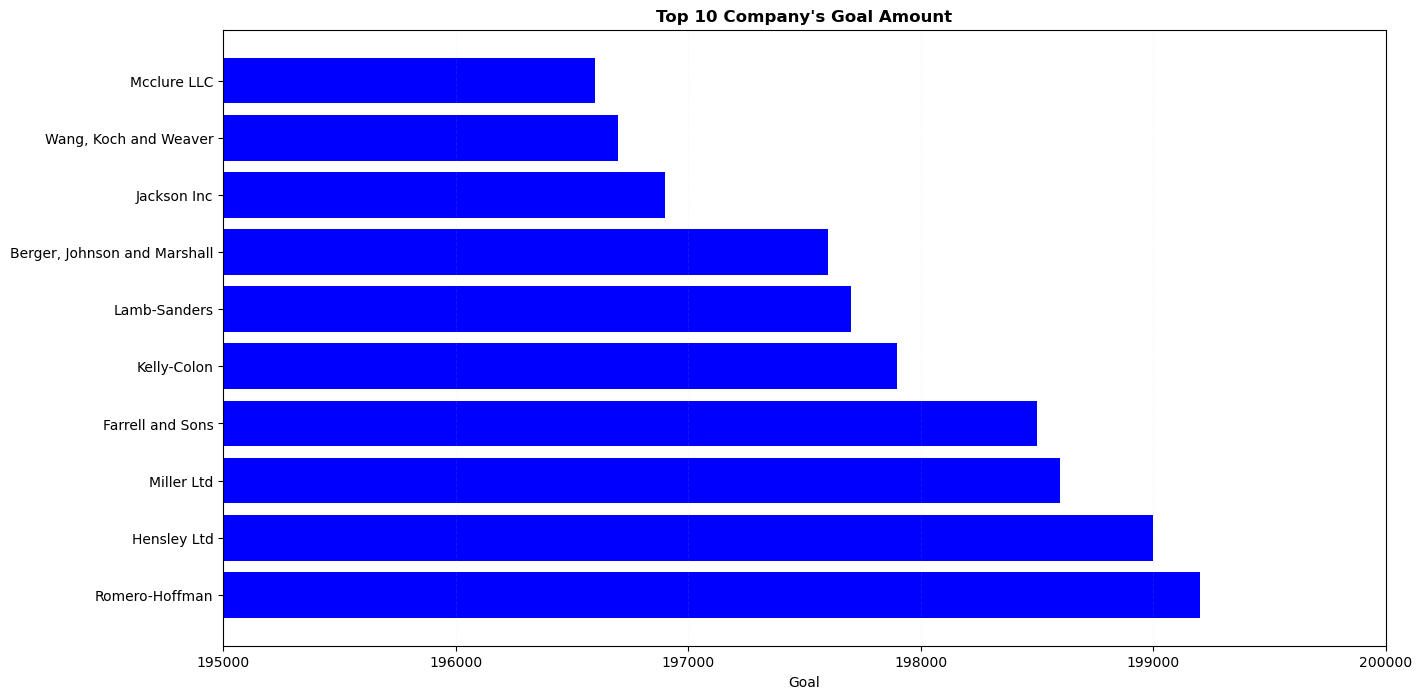

In [54]:
plt.figure(figsize=(15,8))
plt.barh(df.company_name, df.goal, color="blue")
plt.title("Top 10 Company's Goal Amount", fontweight="bold")
plt.xlabel("Goal")
plt.xlim(195000, 200000)
plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=0.10)

plt.show()